In [25]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
from scipy.stats import uniform

In [26]:
train = pd.read_csv('train.csv', header = 0, index_col= 0)
test = pd.read_csv('test.csv', header = 0, index_col= 0)
print(train.shape)
print(test.shape)

(260601, 39)
(86868, 38)


In [27]:
import warnings
warnings.filterwarnings("ignore")
# get dummy variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# create set of dependent variables and independent variables and scale.
X = train.drop(['damage_grade'], axis = 1)
y = train['damage_grade']

# geo_level_1_id 中位数
geo_level_1_id_1 = list()
geo_level_1_id_2 = list()
geo_level_1_id_3 = list()
for i in X.index:
    temp_0 = X['geo_level_1_id'][i] - 20
    temp_1 = X['geo_level_1_id'][i] - 10
    temp_2 = X['geo_level_1_id'][i] - 13
    geo_level_1_id_1.append(temp_0)
    geo_level_1_id_2.append(temp_1)
    geo_level_1_id_3.append(temp_2)
    
X['geo_level_1_id_1'] = geo_level_1_id_1
X['geo_level_1_id_2'] = geo_level_1_id_2
X['geo_level_1_id_3'] = geo_level_1_id_3

# geo_level_2_id 中位数
geo_level_2_id_1 = list()
geo_level_2_id_2 = list()
geo_level_2_id_3 = list()
for i in X.index:
    temp_0 = X['geo_level_2_id'][i] - 661
    temp_1 = X['geo_level_2_id'][i] - 699
    temp_2 = X['geo_level_2_id'][i] - 720
    geo_level_2_id_1.append(temp_0)
    geo_level_2_id_2.append(temp_1)
    geo_level_2_id_3.append(temp_2)
    
X['geo_level_2_id_1'] = geo_level_2_id_1
X['geo_level_2_id_2'] = geo_level_2_id_2
X['geo_level_2_id_3'] = geo_level_2_id_3

# geo_level_3_id 中位数
geo_level_3_id_1 = list()
geo_level_3_id_2 = list()
geo_level_3_id_3 = list()
for i in X.index:
    temp_0 = X['geo_level_3_id'][i] - 6400
    temp_1 = X['geo_level_3_id'][i] - 6187
    temp_2 = X['geo_level_3_id'][i] - 6362
    geo_level_3_id_1.append(temp_0)
    geo_level_3_id_2.append(temp_1)
    geo_level_3_id_3.append(temp_2)
    
X['geo_level_3_id_1'] = geo_level_3_id_1
X['geo_level_3_id_2'] = geo_level_3_id_2
X['geo_level_3_id_3'] = geo_level_3_id_3

# age 中位数
age_1 = list()
age_2 = list()
age_3 = list()
for i in X.index:
    temp_0 = X['age'][i] - 5
    temp_1 = X['age'][i] - 15
    temp_2 = X['age'][i] - 20
    age_1.append(temp_0)
    age_2.append(temp_1)
    age_3.append(temp_2)
    
X['age_1'] = age_1
X['age_2'] = age_2
X['age_3'] = age_3


In [28]:
# geo_level_1_id 中位数
geo_level_1_id_1 = list()
geo_level_1_id_2 = list()
geo_level_1_id_3 = list()
for i in test.index:
    temp_0 = test['geo_level_1_id'][i] - 20
    temp_1 = test['geo_level_1_id'][i] - 10
    temp_2 = test['geo_level_1_id'][i] - 13
    geo_level_1_id_1.append(temp_0)
    geo_level_1_id_2.append(temp_1)
    geo_level_1_id_3.append(temp_2)
    
test['geo_level_1_id_1'] = geo_level_1_id_1
test['geo_level_1_id_2'] = geo_level_1_id_2
test['geo_level_1_id_3'] = geo_level_1_id_3

# geo_level_2_id 中位数
geo_level_2_id_1 = list()
geo_level_2_id_2 = list()
geo_level_2_id_3 = list()
for i in test.index:
    temp_0 = test['geo_level_2_id'][i] - 661
    temp_1 = test['geo_level_2_id'][i] - 699
    temp_2 = test['geo_level_2_id'][i] - 720
    geo_level_2_id_1.append(temp_0)
    geo_level_2_id_2.append(temp_1)
    geo_level_2_id_3.append(temp_2)
    
test['geo_level_2_id_1'] = geo_level_2_id_1
test['geo_level_2_id_2'] = geo_level_2_id_2
test['geo_level_2_id_3'] = geo_level_2_id_3

# geo_level_3_id 中位数
geo_level_3_id_1 = list()
geo_level_3_id_2 = list()
geo_level_3_id_3 = list()
for i in test.index:
    temp_0 = test['geo_level_3_id'][i] - 6400
    temp_1 = test['geo_level_3_id'][i] - 6187
    temp_2 = test['geo_level_3_id'][i] - 6362
    geo_level_3_id_1.append(temp_0)
    geo_level_3_id_2.append(temp_1)
    geo_level_3_id_3.append(temp_2)
    
test['geo_level_3_id_1'] = geo_level_3_id_1
test['geo_level_3_id_2'] = geo_level_3_id_2
test['geo_level_3_id_3'] = geo_level_3_id_3

# age 中位数
age_1 = list()
age_2 = list()
age_3 = list()
for i in test.index:
    temp_0 = test['age'][i] - 5
    temp_1 = test['age'][i] - 15
    temp_2 = test['age'][i] - 20
    age_1.append(temp_0)
    age_2.append(temp_1)
    age_3.append(temp_2)
    
test['age_1'] = age_1
test['age_2'] = age_2
test['age_3'] = age_3

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
test = scaler.fit_transform(test)

# split to test out for f1 score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 123)

# add column names to x_train and x_test for feature selection process
column_names = train.drop(['damage_grade'], axis = 1)
final_column = list(column_names.columns) + ['age_1','age_2','age_3','geo_level_1_id_1','geo_level_1_id_2','geo_level_1_id_3',
                                            'geo_level_2_id_1','geo_level_2_id_2','geo_level_2_id_3','geo_level_3_id_1',
                                            'geo_level_3_id_2','geo_level_3_id_3']
print(final_column)
X_train = pd.DataFrame(X_train, columns = final_column)
X_test = pd.DataFrame(X_test, columns = final_column)
test = pd.DataFrame(test, columns = final_column)

print(X_train.shape)
print(X_test.shape)
print(test.shape)

['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other', 'land_surface_condition_n', 'land_surface_condition_o', 'land_surface_condition_t', 'foundation_type_h', 'foundation_type_i', 'foundation_type_r

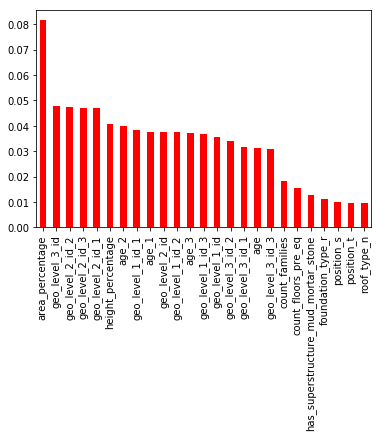

80
area_percentage                           0.081570
geo_level_3_id                            0.047694
geo_level_2_id_2                          0.047493
geo_level_2_id_3                          0.047063
geo_level_2_id_1                          0.047020
height_percentage                         0.040584
age_2                                     0.040015
geo_level_1_id_1                          0.038280
age_1                                     0.037690
geo_level_2_id                            0.037643
geo_level_1_id_2                          0.037544
age_3                                     0.037094
geo_level_1_id_3                          0.036908
geo_level_1_id                            0.035596
geo_level_3_id_2                          0.033961
geo_level_3_id_1                          0.031492
age                                       0.031466
geo_level_3_id_3                          0.030880
count_families                            0.018253
count_floors_pre_eq         

Index(['area_percentage', 'geo_level_3_id', 'geo_level_2_id_2',
       'geo_level_2_id_3', 'geo_level_2_id_1', 'height_percentage', 'age_2',
       'geo_level_1_id_1', 'age_1', 'geo_level_2_id', 'geo_level_1_id_2',
       'age_3', 'geo_level_1_id_3', 'geo_level_1_id', 'geo_level_3_id_2',
       'geo_level_3_id_1', 'age', 'geo_level_3_id_3', 'count_families',
       'count_floors_pre_eq', 'has_superstructure_mud_mortar_stone',
       'foundation_type_r', 'position_s', 'position_t', 'roof_type_n',
       'ground_floor_type_v', 'has_superstructure_timber', 'roof_type_q',
       'land_surface_condition_t', 'other_floor_type_q',
       'has_superstructure_cement_mortar_brick', 'land_surface_condition_n',
       'other_floor_type_x', 'has_secondary_use', 'roof_type_x',
       'ground_floor_type_f', 'ground_floor_type_x', 'foundation_type_i',
       'has_superstructure_bamboo', 'other_floor_type_j', 'other_floor_type_s',
       'has_superstructure_adobe_mud', 'has_secondary_use_agriculture',


In [32]:
# use random forest for feature selection
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# print(rfc.feature_importances_)
features = pd.Series(rfc.feature_importances_, index= X_train.columns)
features.nlargest(25).plot(kind = 'bar', color = 'r')
plt.show()
print(len(list(X_train.columns)))
print(features.nlargest(50))
features.nlargest(50).index

In [ ]:
# Based on the feature importance, new data will be tested
select_list = ['geo_level_1_id', 
               
               'geo_level_2_id_2','geo_level_2_id_3', 'geo_level_2_id_1','geo_level_1_id_1', 'age_1','geo_level_1_id_2',
       'age_3', 'geo_level_1_id_3','geo_level_3_id_2','geo_level_3_id_1','geo_level_3_id_3',
               
                   'geo_level_2_id', 
                   'geo_level_3_id', 
                   'age', 
                   'area_percentage', 
                   'height_percentage', 
                   'count_families', 
                   'foundation_type_r', 
                   'count_floors_pre_eq', 
                   'has_superstructure_mud_mortar_stone',
                   'has_superstructure_timber',
                   'ground_floor_type_v',
                   'land_surface_condition_t',
                   'land_surface_condition_n',
                   'roof_type_n',
                   'other_floor_type_q']

# select_list = ['geo_level_3_id', 'geo_level_1_id', 'geo_level_2_id', 'age',
#        'area_percentage', 'height_percentage', 'count_families',
#        'ground_floor_type_v', 'count_floors_pre_eq', 'foundation_type_r',
#        'has_superstructure_mud_mortar_stone', 'has_superstructure_timber',
#        'land_surface_condition_t', 'position_s', 'land_surface_condition_n',
#        'has_secondary_use']

# select_list = ['geo_level_3_id', 'geo_level_1_id', 'geo_level_2_id', 'age',
#        'area_percentage', 'height_percentage', 'count_families',
#        'ground_floor_type_v', 'count_floors_pre_eq', 'foundation_type_r',
#        'has_superstructure_mud_mortar_stone', 'has_superstructure_timber']


X_train = X_train[select_list]
X_test = X_test[select_list]
test = test[select_list]


# cb
import catboost as cb
CV = True

if CV:
    depth = np.arange(2,12,1)
    iterations = np.arange(100,500,100)
    l2_leaf_reg = np.arange(7,12,1)
    learning_rate = [.001, .01, .1, .15]
    
    params = dict(depth = depth, iterations = iterations, l2_leaf_reg = l2_leaf_reg,
                  learning_rate = learning_rate)
    clf = cb.CatBoostClassifier()              
    randomcb = RandomizedSearchCV(clf, params, cv = 5, n_iter= 100, random_state = 1)
    randomcb.fit(X_train, y_train)
    print(randomcb.best_estimator_.get_params())

# clf = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)

# clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds = 50, eval_metric = 'logloss')
# predictions = clf.predict(test)




# lgb
# CV = False

# if CV:
#     learning_rate = [.01, .05, .1, .5, .75, .9]
#     max_depth = [-1, 1, 3, 4, 5, 7, 9]
#     min_child_samples = [10, 15, 20, 25, 30]
#     min_child_weight = [.001, .01, .1, .5]
#     num_leaves = [25, 27, 29, 31, 33, 35, 37, 39, 41, 45, 50]
#     params = dict(learning_rate = learning_rate, max_depth = max_depth, min_child_samples = min_child_samples,
#                   min_child_weight = min_child_weight, num_leaves = num_leaves)
#     lgb = LGBMClassifier()              
#     randomlgb = RandomizedSearchCV(lgb, params, cv = 5, n_iter= 100, random_state = 1)
#     randomlgb.fit(X_train, y_train)
#     print(randomlgb.best_estimator_.get_params())

# lgb = LGBMClassifier(max_depth=7, learning_rate=.05, min_child_samples=10, 
#                     min_child_weight=.1, num_leaves=50, n_estimators = 10000)

# lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds = 50, eval_metric = 'logloss')
# predictions = lgb.predict(test)




# print(predictions)
# btest = pd.read_csv('test.csv')

# result = pd.DataFrame()
# result['building_id'] = btest['building_id']
# result['damage_grade'] = predictions
# result.to_csv('lgbm_prediction_result.csv',index = None)
# print("预测结果已生成！")

0:	learn: -1.0981816	total: 234ms	remaining: 23.1s
1:	learn: -1.0977517	total: 295ms	remaining: 14.5s
2:	learn: -1.0973227	total: 356ms	remaining: 11.5s
3:	learn: -1.0968979	total: 417ms	remaining: 10s
4:	learn: -1.0964705	total: 495ms	remaining: 9.41s
5:	learn: -1.0960439	total: 611ms	remaining: 9.57s
6:	learn: -1.0956182	total: 679ms	remaining: 9.03s
7:	learn: -1.0951932	total: 749ms	remaining: 8.62s
8:	learn: -1.0947691	total: 813ms	remaining: 8.22s
9:	learn: -1.0943549	total: 875ms	remaining: 7.88s
10:	learn: -1.0939356	total: 940ms	remaining: 7.61s
11:	learn: -1.0935172	total: 1s	remaining: 7.37s
12:	learn: -1.0930962	total: 1.07s	remaining: 7.16s
13:	learn: -1.0926760	total: 1.13s	remaining: 6.97s
14:	learn: -1.0922566	total: 1.2s	remaining: 6.78s
15:	learn: -1.0918430	total: 1.26s	remaining: 6.61s
16:	learn: -1.0914341	total: 1.33s	remaining: 6.48s
17:	learn: -1.0910202	total: 1.39s	remaining: 6.33s
18:	learn: -1.0906089	total: 1.55s	remaining: 6.61s
19:	learn: -1.0901933	total:

62:	learn: -1.0730896	total: 3.96s	remaining: 2.33s
63:	learn: -1.0727115	total: 4.03s	remaining: 2.27s
64:	learn: -1.0723272	total: 4.09s	remaining: 2.2s
65:	learn: -1.0719469	total: 4.16s	remaining: 2.14s
66:	learn: -1.0715674	total: 4.22s	remaining: 2.08s
67:	learn: -1.0711886	total: 4.28s	remaining: 2.01s
68:	learn: -1.0708094	total: 4.34s	remaining: 1.95s
69:	learn: -1.0704284	total: 4.4s	remaining: 1.88s
70:	learn: -1.0700506	total: 4.46s	remaining: 1.82s
71:	learn: -1.0696775	total: 4.52s	remaining: 1.76s
72:	learn: -1.0693098	total: 4.58s	remaining: 1.69s
73:	learn: -1.0689315	total: 4.64s	remaining: 1.63s
74:	learn: -1.0685539	total: 4.7s	remaining: 1.57s
75:	learn: -1.0681794	total: 4.76s	remaining: 1.5s
76:	learn: -1.0678055	total: 4.83s	remaining: 1.44s
77:	learn: -1.0674410	total: 4.9s	remaining: 1.38s
78:	learn: -1.0670685	total: 4.97s	remaining: 1.32s
79:	learn: -1.0667003	total: 5.03s	remaining: 1.26s
80:	learn: -1.0663267	total: 5.09s	remaining: 1.19s
81:	learn: -1.065

23:	learn: -1.0885491	total: 1.51s	remaining: 4.79s
24:	learn: -1.0881368	total: 1.76s	remaining: 5.29s
25:	learn: -1.0877283	total: 1.83s	remaining: 5.22s
26:	learn: -1.0873206	total: 1.9s	remaining: 5.14s
27:	learn: -1.0869136	total: 1.97s	remaining: 5.05s
28:	learn: -1.0865044	total: 2.03s	remaining: 4.96s
29:	learn: -1.0860959	total: 2.09s	remaining: 4.87s
30:	learn: -1.0856912	total: 2.15s	remaining: 4.79s
31:	learn: -1.0852842	total: 2.21s	remaining: 4.7s
32:	learn: -1.0848780	total: 2.27s	remaining: 4.61s
33:	learn: -1.0844810	total: 2.34s	remaining: 4.54s
34:	learn: -1.0840793	total: 2.4s	remaining: 4.45s
35:	learn: -1.0836753	total: 2.46s	remaining: 4.37s
36:	learn: -1.0832804	total: 2.52s	remaining: 4.29s
37:	learn: -1.0828809	total: 2.58s	remaining: 4.21s
38:	learn: -1.0824874	total: 2.64s	remaining: 4.13s
39:	learn: -1.0820863	total: 2.7s	remaining: 4.05s
40:	learn: -1.0816860	total: 2.76s	remaining: 3.98s
41:	learn: -1.0812865	total: 2.82s	remaining: 3.9s
42:	learn: -1.080

83:	learn: -1.0653138	total: 5.42s	remaining: 1.03s
84:	learn: -1.0649516	total: 5.48s	remaining: 967ms
85:	learn: -1.0645847	total: 5.54s	remaining: 902ms
86:	learn: -1.0642184	total: 5.61s	remaining: 838ms
87:	learn: -1.0638505	total: 5.67s	remaining: 773ms
88:	learn: -1.0634833	total: 5.73s	remaining: 708ms
89:	learn: -1.0631167	total: 5.79s	remaining: 644ms
90:	learn: -1.0627531	total: 5.86s	remaining: 580ms
91:	learn: -1.0623953	total: 5.93s	remaining: 516ms
92:	learn: -1.0620307	total: 5.99s	remaining: 451ms
93:	learn: -1.0616742	total: 6.05s	remaining: 386ms
94:	learn: -1.0613131	total: 6.11s	remaining: 322ms
95:	learn: -1.0609578	total: 6.17s	remaining: 257ms
96:	learn: -1.0605957	total: 6.24s	remaining: 193ms
97:	learn: -1.0602368	total: 6.3s	remaining: 129ms
98:	learn: -1.0598760	total: 6.36s	remaining: 64.3ms
99:	learn: -1.0595232	total: 6.44s	remaining: 0us
0:	learn: -1.0444337	total: 127ms	remaining: 25.2s
1:	learn: -0.9972813	total: 246ms	remaining: 24.4s
2:	learn: -0.959

141:	learn: -0.6621178	total: 17.8s	remaining: 7.26s
142:	learn: -0.6618295	total: 17.9s	remaining: 7.13s
143:	learn: -0.6616377	total: 18s	remaining: 7s
144:	learn: -0.6614193	total: 18.1s	remaining: 6.88s
145:	learn: -0.6611016	total: 18.3s	remaining: 6.75s
146:	learn: -0.6608132	total: 18.4s	remaining: 6.63s
147:	learn: -0.6603511	total: 18.5s	remaining: 6.5s
148:	learn: -0.6600716	total: 18.6s	remaining: 6.37s
149:	learn: -0.6598570	total: 18.7s	remaining: 6.24s
150:	learn: -0.6597030	total: 18.8s	remaining: 6.11s
151:	learn: -0.6594619	total: 19s	remaining: 5.99s
152:	learn: -0.6591387	total: 19.1s	remaining: 5.86s
153:	learn: -0.6589231	total: 19.2s	remaining: 5.73s
154:	learn: -0.6586469	total: 19.3s	remaining: 5.6s
155:	learn: -0.6583567	total: 19.4s	remaining: 5.48s
156:	learn: -0.6580479	total: 19.5s	remaining: 5.35s
157:	learn: -0.6578490	total: 19.7s	remaining: 5.22s
158:	learn: -0.6575111	total: 19.8s	remaining: 5.1s
159:	learn: -0.6573173	total: 19.9s	remaining: 4.97s
160

99:	learn: -0.6757564	total: 12.2s	remaining: 12.2s
100:	learn: -0.6753852	total: 12.3s	remaining: 12.1s
101:	learn: -0.6752340	total: 12.5s	remaining: 12s
102:	learn: -0.6748928	total: 12.6s	remaining: 11.9s
103:	learn: -0.6745850	total: 12.7s	remaining: 11.7s
104:	learn: -0.6742712	total: 12.9s	remaining: 11.6s
105:	learn: -0.6738666	total: 13s	remaining: 11.5s
106:	learn: -0.6736316	total: 13.1s	remaining: 11.4s
107:	learn: -0.6732874	total: 13.2s	remaining: 11.3s
108:	learn: -0.6731107	total: 13.4s	remaining: 11.1s
109:	learn: -0.6727615	total: 13.5s	remaining: 11s
110:	learn: -0.6724520	total: 13.6s	remaining: 10.9s
111:	learn: -0.6722061	total: 13.7s	remaining: 10.8s
112:	learn: -0.6716958	total: 13.9s	remaining: 10.7s
113:	learn: -0.6714592	total: 14s	remaining: 10.6s
114:	learn: -0.6711039	total: 14.1s	remaining: 10.4s
115:	learn: -0.6707600	total: 14.2s	remaining: 10.3s
116:	learn: -0.6705240	total: 14.3s	remaining: 10.2s
117:	learn: -0.6702819	total: 14.5s	remaining: 10s
118:

58:	learn: -0.6922220	total: 7.27s	remaining: 17.4s
59:	learn: -0.6917707	total: 7.39s	remaining: 17.2s
60:	learn: -0.6913503	total: 7.5s	remaining: 17.1s
61:	learn: -0.6909851	total: 7.62s	remaining: 17s
62:	learn: -0.6904191	total: 7.73s	remaining: 16.8s
63:	learn: -0.6900383	total: 7.84s	remaining: 16.7s
64:	learn: -0.6894118	total: 7.95s	remaining: 16.5s
65:	learn: -0.6886376	total: 8.07s	remaining: 16.4s
66:	learn: -0.6881146	total: 8.18s	remaining: 16.2s
67:	learn: -0.6873562	total: 8.29s	remaining: 16.1s
68:	learn: -0.6862519	total: 8.41s	remaining: 16s
69:	learn: -0.6859283	total: 8.53s	remaining: 15.8s
70:	learn: -0.6853879	total: 8.64s	remaining: 15.7s
71:	learn: -0.6850951	total: 8.75s	remaining: 15.6s
72:	learn: -0.6847590	total: 8.87s	remaining: 15.4s
73:	learn: -0.6844854	total: 8.98s	remaining: 15.3s
74:	learn: -0.6840445	total: 9.09s	remaining: 15.2s
75:	learn: -0.6834525	total: 9.2s	remaining: 15s
76:	learn: -0.6830621	total: 9.31s	remaining: 14.9s
77:	learn: -0.682729

16:	learn: -0.7577342	total: 2.05s	remaining: 22.1s
17:	learn: -0.7527554	total: 2.17s	remaining: 21.9s
18:	learn: -0.7484073	total: 2.28s	remaining: 21.8s
19:	learn: -0.7438730	total: 2.4s	remaining: 21.6s
20:	learn: -0.7408864	total: 2.52s	remaining: 21.4s
21:	learn: -0.7383193	total: 2.63s	remaining: 21.3s
22:	learn: -0.7354853	total: 2.75s	remaining: 21.1s
23:	learn: -0.7326540	total: 2.86s	remaining: 21s
24:	learn: -0.7296373	total: 2.98s	remaining: 20.9s
25:	learn: -0.7265051	total: 3.09s	remaining: 20.7s
26:	learn: -0.7246311	total: 3.21s	remaining: 20.5s
27:	learn: -0.7227033	total: 3.32s	remaining: 20.4s
28:	learn: -0.7210672	total: 3.45s	remaining: 20.4s
29:	learn: -0.7185242	total: 3.58s	remaining: 20.3s
30:	learn: -0.7171903	total: 3.71s	remaining: 20.2s
31:	learn: -0.7160860	total: 3.83s	remaining: 20.1s
32:	learn: -0.7149779	total: 3.96s	remaining: 20s
33:	learn: -0.7139113	total: 4.09s	remaining: 20s
34:	learn: -0.7127682	total: 4.22s	remaining: 19.9s
35:	learn: -0.71180

175:	learn: -0.6529148	total: 21.9s	remaining: 2.99s
176:	learn: -0.6527571	total: 22s	remaining: 2.86s
177:	learn: -0.6525619	total: 22.2s	remaining: 2.74s
178:	learn: -0.6524085	total: 22.3s	remaining: 2.62s
179:	learn: -0.6521809	total: 22.4s	remaining: 2.49s
180:	learn: -0.6520139	total: 22.6s	remaining: 2.37s
181:	learn: -0.6518941	total: 22.7s	remaining: 2.24s
182:	learn: -0.6516352	total: 22.8s	remaining: 2.12s
183:	learn: -0.6513266	total: 22.9s	remaining: 1.99s
184:	learn: -0.6510942	total: 23.1s	remaining: 1.87s
185:	learn: -0.6509240	total: 23.2s	remaining: 1.74s
186:	learn: -0.6505989	total: 23.3s	remaining: 1.62s
187:	learn: -0.6505012	total: 23.4s	remaining: 1.5s
188:	learn: -0.6502892	total: 23.6s	remaining: 1.37s
189:	learn: -0.6500619	total: 23.7s	remaining: 1.25s
190:	learn: -0.6497390	total: 23.8s	remaining: 1.12s
191:	learn: -0.6494187	total: 23.9s	remaining: 997ms
192:	learn: -0.6492219	total: 24.1s	remaining: 873ms
193:	learn: -0.6490400	total: 24.2s	remaining: 74

134:	learn: -0.6638262	total: 17.7s	remaining: 8.52s
135:	learn: -0.6635373	total: 17.8s	remaining: 8.38s
136:	learn: -0.6632861	total: 17.9s	remaining: 8.25s
137:	learn: -0.6629346	total: 18.1s	remaining: 8.12s
138:	learn: -0.6626997	total: 18.2s	remaining: 7.99s
139:	learn: -0.6623276	total: 18.3s	remaining: 7.86s
140:	learn: -0.6620889	total: 18.5s	remaining: 7.73s
141:	learn: -0.6616585	total: 18.6s	remaining: 7.6s
142:	learn: -0.6614404	total: 18.8s	remaining: 7.48s
143:	learn: -0.6612660	total: 18.9s	remaining: 7.35s
144:	learn: -0.6610171	total: 19s	remaining: 7.21s
145:	learn: -0.6607028	total: 19.2s	remaining: 7.12s
146:	learn: -0.6605266	total: 19.4s	remaining: 6.99s
147:	learn: -0.6602119	total: 19.5s	remaining: 6.86s
148:	learn: -0.6600235	total: 19.8s	remaining: 6.76s
149:	learn: -0.6596649	total: 19.9s	remaining: 6.63s
150:	learn: -0.6595021	total: 20.1s	remaining: 6.54s
151:	learn: -0.6593320	total: 20.4s	remaining: 6.43s
152:	learn: -0.6589124	total: 20.5s	remaining: 6.

92:	learn: -0.6973869	total: 6.88s	remaining: 518ms
93:	learn: -0.6971336	total: 6.96s	remaining: 444ms
94:	learn: -0.6968692	total: 7.03s	remaining: 370ms
95:	learn: -0.6966543	total: 7.1s	remaining: 296ms
96:	learn: -0.6964883	total: 7.18s	remaining: 222ms
97:	learn: -0.6962824	total: 7.25s	remaining: 148ms
98:	learn: -0.6959217	total: 7.32s	remaining: 74ms
99:	learn: -0.6957569	total: 7.39s	remaining: 0us
0:	learn: -1.0278311	total: 69.1ms	remaining: 6.84s
1:	learn: -0.9766100	total: 137ms	remaining: 6.7s
2:	learn: -0.9375018	total: 205ms	remaining: 6.64s
3:	learn: -0.9074929	total: 295ms	remaining: 7.08s
4:	learn: -0.8775247	total: 367ms	remaining: 6.97s
5:	learn: -0.8552249	total: 450ms	remaining: 7.05s
6:	learn: -0.8392407	total: 523ms	remaining: 6.95s
7:	learn: -0.8259130	total: 595ms	remaining: 6.84s
8:	learn: -0.8141155	total: 663ms	remaining: 6.7s
9:	learn: -0.8028493	total: 734ms	remaining: 6.6s
10:	learn: -0.7920277	total: 803ms	remaining: 6.5s
11:	learn: -0.7848306	total: 

51:	learn: -0.7118170	total: 3.78s	remaining: 3.49s
52:	learn: -0.7111669	total: 3.95s	remaining: 3.51s
53:	learn: -0.7107632	total: 4.03s	remaining: 3.43s
54:	learn: -0.7102833	total: 4.09s	remaining: 3.35s
55:	learn: -0.7098695	total: 4.16s	remaining: 3.27s
56:	learn: -0.7095139	total: 4.23s	remaining: 3.19s
57:	learn: -0.7088471	total: 4.3s	remaining: 3.12s
58:	learn: -0.7086885	total: 4.37s	remaining: 3.04s
59:	learn: -0.7081926	total: 4.45s	remaining: 2.96s
60:	learn: -0.7078849	total: 4.52s	remaining: 2.89s
61:	learn: -0.7075667	total: 4.59s	remaining: 2.81s
62:	learn: -0.7071993	total: 4.66s	remaining: 2.74s
63:	learn: -0.7069849	total: 4.74s	remaining: 2.66s
64:	learn: -0.7066653	total: 4.81s	remaining: 2.59s
65:	learn: -0.7064297	total: 4.88s	remaining: 2.51s
66:	learn: -0.7060651	total: 4.95s	remaining: 2.44s
67:	learn: -0.7057037	total: 5.03s	remaining: 2.37s
68:	learn: -0.7047249	total: 5.1s	remaining: 2.29s
69:	learn: -0.7043845	total: 5.17s	remaining: 2.22s
70:	learn: -0.

12:	learn: -0.7760542	total: 909ms	remaining: 6.08s
13:	learn: -0.7710337	total: 981ms	remaining: 6.02s
14:	learn: -0.7662344	total: 1.05s	remaining: 5.96s
15:	learn: -0.7618478	total: 1.12s	remaining: 5.89s
16:	learn: -0.7581811	total: 1.19s	remaining: 5.8s
17:	learn: -0.7552964	total: 1.26s	remaining: 5.72s
18:	learn: -0.7526638	total: 1.32s	remaining: 5.64s
19:	learn: -0.7509445	total: 1.39s	remaining: 5.56s
20:	learn: -0.7475989	total: 1.46s	remaining: 5.49s
21:	learn: -0.7455316	total: 1.53s	remaining: 5.42s
22:	learn: -0.7437527	total: 1.6s	remaining: 5.36s
23:	learn: -0.7419502	total: 1.67s	remaining: 5.3s
24:	learn: -0.7387888	total: 1.76s	remaining: 5.28s
25:	learn: -0.7377836	total: 1.85s	remaining: 5.26s
26:	learn: -0.7364763	total: 1.93s	remaining: 5.21s
27:	learn: -0.7351608	total: 2s	remaining: 5.14s
28:	learn: -0.7336766	total: 2.07s	remaining: 5.07s
29:	learn: -0.7325228	total: 2.14s	remaining: 5s
30:	learn: -0.7316196	total: 2.21s	remaining: 4.92s
31:	learn: -0.7295726

71:	learn: -0.6463724	total: 23.5s	remaining: 9.14s
72:	learn: -0.6455166	total: 23.8s	remaining: 8.82s
73:	learn: -0.6448925	total: 24.2s	remaining: 8.49s
74:	learn: -0.6441470	total: 24.5s	remaining: 8.16s
75:	learn: -0.6434592	total: 24.8s	remaining: 7.84s
76:	learn: -0.6430954	total: 25.2s	remaining: 7.51s
77:	learn: -0.6419999	total: 25.5s	remaining: 7.19s
78:	learn: -0.6414668	total: 25.8s	remaining: 6.86s
79:	learn: -0.6406968	total: 26.1s	remaining: 6.54s
80:	learn: -0.6402774	total: 26.5s	remaining: 6.21s
81:	learn: -0.6398268	total: 26.8s	remaining: 5.88s
82:	learn: -0.6392353	total: 27.1s	remaining: 5.56s
83:	learn: -0.6386439	total: 27.4s	remaining: 5.23s
84:	learn: -0.6379848	total: 27.8s	remaining: 4.91s
85:	learn: -0.6372602	total: 28.1s	remaining: 4.58s
86:	learn: -0.6365509	total: 28.5s	remaining: 4.25s
87:	learn: -0.6360250	total: 28.8s	remaining: 3.92s
88:	learn: -0.6352021	total: 29.1s	remaining: 3.6s
89:	learn: -0.6346295	total: 29.5s	remaining: 3.27s
90:	learn: -0

30:	learn: -0.6854380	total: 10.2s	remaining: 22.8s
31:	learn: -0.6838057	total: 10.6s	remaining: 22.4s
32:	learn: -0.6823227	total: 10.9s	remaining: 22.1s
33:	learn: -0.6811641	total: 11.2s	remaining: 21.7s
34:	learn: -0.6799967	total: 11.5s	remaining: 21.4s
35:	learn: -0.6784820	total: 11.9s	remaining: 21.1s
36:	learn: -0.6767486	total: 12.2s	remaining: 20.8s
37:	learn: -0.6755195	total: 12.6s	remaining: 20.5s
38:	learn: -0.6743082	total: 12.9s	remaining: 20.2s
39:	learn: -0.6736211	total: 13.2s	remaining: 19.8s
40:	learn: -0.6724829	total: 13.6s	remaining: 19.5s
41:	learn: -0.6718997	total: 13.9s	remaining: 19.2s
42:	learn: -0.6708972	total: 14.2s	remaining: 18.8s
43:	learn: -0.6693893	total: 14.6s	remaining: 18.5s
44:	learn: -0.6686578	total: 14.9s	remaining: 18.2s
45:	learn: -0.6678069	total: 15.2s	remaining: 17.8s
46:	learn: -0.6668976	total: 15.5s	remaining: 17.5s
47:	learn: -0.6659209	total: 15.9s	remaining: 17.2s
48:	learn: -0.6649347	total: 16.2s	remaining: 16.8s
49:	learn: -

89:	learn: -0.6350606	total: 29.7s	remaining: 3.3s
90:	learn: -0.6343923	total: 30s	remaining: 2.97s
91:	learn: -0.6338777	total: 30.3s	remaining: 2.64s
92:	learn: -0.6332766	total: 30.7s	remaining: 2.31s
93:	learn: -0.6326804	total: 31s	remaining: 1.98s
94:	learn: -0.6318817	total: 31.4s	remaining: 1.65s
95:	learn: -0.6311547	total: 31.7s	remaining: 1.32s
96:	learn: -0.6305338	total: 32.1s	remaining: 991ms
97:	learn: -0.6298489	total: 32.4s	remaining: 661ms
98:	learn: -0.6290196	total: 32.7s	remaining: 331ms
99:	learn: -0.6283622	total: 33.1s	remaining: 0us
0:	learn: -1.0108240	total: 274ms	remaining: 27.2s
1:	learn: -0.9482501	total: 537ms	remaining: 26.3s
2:	learn: -0.9008242	total: 802ms	remaining: 25.9s
3:	learn: -0.8645362	total: 1.09s	remaining: 26.2s
4:	learn: -0.8378181	total: 1.43s	remaining: 27.1s
5:	learn: -0.8161171	total: 1.74s	remaining: 27.3s
6:	learn: -0.7970780	total: 2.08s	remaining: 27.6s
7:	learn: -0.7823984	total: 2.43s	remaining: 27.9s
8:	learn: -0.7696670	total:

48:	learn: -0.7217009	total: 3.77s	remaining: 3.93s
49:	learn: -0.7201758	total: 3.86s	remaining: 3.86s
50:	learn: -0.7185514	total: 3.94s	remaining: 3.79s
51:	learn: -0.7178284	total: 4.02s	remaining: 3.71s
52:	learn: -0.7165134	total: 4.1s	remaining: 3.64s
53:	learn: -0.7159963	total: 4.18s	remaining: 3.56s
54:	learn: -0.7153724	total: 4.26s	remaining: 3.48s
55:	learn: -0.7147916	total: 4.36s	remaining: 3.42s
56:	learn: -0.7143656	total: 4.45s	remaining: 3.36s
57:	learn: -0.7140978	total: 4.53s	remaining: 3.28s
58:	learn: -0.7135377	total: 4.6s	remaining: 3.2s
59:	learn: -0.7130559	total: 4.68s	remaining: 3.12s
60:	learn: -0.7127413	total: 4.76s	remaining: 3.04s
61:	learn: -0.7122690	total: 4.83s	remaining: 2.96s
62:	learn: -0.7116823	total: 4.92s	remaining: 2.89s
63:	learn: -0.7110311	total: 5s	remaining: 2.81s
64:	learn: -0.7108478	total: 5.08s	remaining: 2.73s
65:	learn: -0.7103768	total: 5.15s	remaining: 2.65s
66:	learn: -0.7100531	total: 5.24s	remaining: 2.58s
67:	learn: -0.7097

9:	learn: -0.8364801	total: 757ms	remaining: 6.81s
10:	learn: -0.8253265	total: 831ms	remaining: 6.72s
11:	learn: -0.8147960	total: 909ms	remaining: 6.67s
12:	learn: -0.8067180	total: 983ms	remaining: 6.58s
13:	learn: -0.7982997	total: 1.05s	remaining: 6.49s
14:	learn: -0.7917211	total: 1.13s	remaining: 6.4s
15:	learn: -0.7859286	total: 1.21s	remaining: 6.33s
16:	learn: -0.7798500	total: 1.29s	remaining: 6.31s
17:	learn: -0.7752546	total: 1.38s	remaining: 6.3s
18:	learn: -0.7703202	total: 1.46s	remaining: 6.22s
19:	learn: -0.7659088	total: 1.53s	remaining: 6.12s
20:	learn: -0.7624797	total: 1.6s	remaining: 6.04s
21:	learn: -0.7595769	total: 1.68s	remaining: 5.95s
22:	learn: -0.7571212	total: 1.75s	remaining: 5.86s
23:	learn: -0.7545910	total: 1.82s	remaining: 5.78s
24:	learn: -0.7530106	total: 1.9s	remaining: 5.7s
25:	learn: -0.7505694	total: 1.97s	remaining: 5.62s
26:	learn: -0.7488577	total: 2.05s	remaining: 5.53s
27:	learn: -0.7455978	total: 2.12s	remaining: 5.46s
28:	learn: -0.7438

68:	learn: -0.7081547	total: 5.57s	remaining: 2.5s
69:	learn: -0.7079429	total: 5.66s	remaining: 2.42s
70:	learn: -0.7076598	total: 5.73s	remaining: 2.34s
71:	learn: -0.7069407	total: 5.82s	remaining: 2.26s
72:	learn: -0.7066165	total: 5.91s	remaining: 2.19s
73:	learn: -0.7061707	total: 6s	remaining: 2.11s
74:	learn: -0.7059422	total: 6.07s	remaining: 2.02s
75:	learn: -0.7054069	total: 6.16s	remaining: 1.94s
76:	learn: -0.7051550	total: 6.23s	remaining: 1.86s
77:	learn: -0.7048883	total: 6.31s	remaining: 1.78s
78:	learn: -0.7045894	total: 6.38s	remaining: 1.7s
79:	learn: -0.7043710	total: 6.46s	remaining: 1.61s
80:	learn: -0.7037955	total: 6.54s	remaining: 1.53s
81:	learn: -0.7034426	total: 6.62s	remaining: 1.45s
82:	learn: -0.7031624	total: 6.7s	remaining: 1.37s
83:	learn: -0.7027152	total: 6.78s	remaining: 1.29s
84:	learn: -0.7023987	total: 6.86s	remaining: 1.21s
85:	learn: -0.7022176	total: 6.96s	remaining: 1.13s
86:	learn: -0.7016326	total: 7.04s	remaining: 1.05s
87:	learn: -0.7012

27:	learn: -1.0816964	total: 9.08s	remaining: 1m 28s
28:	learn: -1.0811091	total: 9.4s	remaining: 1m 27s
29:	learn: -1.0805142	total: 9.71s	remaining: 1m 27s
30:	learn: -1.0799266	total: 10s	remaining: 1m 27s
31:	learn: -1.0793413	total: 10.4s	remaining: 1m 26s
32:	learn: -1.0787568	total: 10.7s	remaining: 1m 26s
33:	learn: -1.0781797	total: 11s	remaining: 1m 26s
34:	learn: -1.0776014	total: 11.4s	remaining: 1m 26s
35:	learn: -1.0770186	total: 11.7s	remaining: 1m 25s
36:	learn: -1.0764321	total: 12s	remaining: 1m 25s
37:	learn: -1.0758664	total: 12.4s	remaining: 1m 25s
38:	learn: -1.0752790	total: 12.7s	remaining: 1m 24s
39:	learn: -1.0747101	total: 13s	remaining: 1m 24s
40:	learn: -1.0741491	total: 13.3s	remaining: 1m 24s
41:	learn: -1.0735678	total: 13.7s	remaining: 1m 24s
42:	learn: -1.0729903	total: 14s	remaining: 1m 23s
43:	learn: -1.0724117	total: 14.3s	remaining: 1m 23s
44:	learn: -1.0718414	total: 14.7s	remaining: 1m 23s
45:	learn: -1.0712695	total: 15s	remaining: 1m 22s
46:	le

183:	learn: -1.0029475	total: 1m	remaining: 38.1s
184:	learn: -1.0025234	total: 1m	remaining: 37.8s
185:	learn: -1.0020824	total: 1m 1s	remaining: 37.5s
186:	learn: -1.0016471	total: 1m 1s	remaining: 37.1s
187:	learn: -1.0012323	total: 1m 1s	remaining: 36.8s
188:	learn: -1.0008074	total: 1m 2s	remaining: 36.5s
189:	learn: -1.0003748	total: 1m 2s	remaining: 36.1s
190:	learn: -0.9999602	total: 1m 2s	remaining: 35.8s
191:	learn: -0.9995536	total: 1m 2s	remaining: 35.4s
192:	learn: -0.9991485	total: 1m 3s	remaining: 35.1s
193:	learn: -0.9987398	total: 1m 3s	remaining: 34.7s
194:	learn: -0.9983108	total: 1m 3s	remaining: 34.4s
195:	learn: -0.9978850	total: 1m 4s	remaining: 34.1s
196:	learn: -0.9974623	total: 1m 4s	remaining: 33.8s
197:	learn: -0.9970510	total: 1m 4s	remaining: 33.4s
198:	learn: -0.9966228	total: 1m 5s	remaining: 33.1s
199:	learn: -0.9962149	total: 1m 5s	remaining: 32.8s
200:	learn: -0.9957890	total: 1m 5s	remaining: 32.5s
201:	learn: -0.9953560	total: 1m 6s	remaining: 32.1s

37:	learn: -1.0758372	total: 12.4s	remaining: 1m 25s
38:	learn: -1.0752685	total: 12.7s	remaining: 1m 24s
39:	learn: -1.0746993	total: 13s	remaining: 1m 24s
40:	learn: -1.0741337	total: 13.4s	remaining: 1m 24s
41:	learn: -1.0735519	total: 13.7s	remaining: 1m 24s
42:	learn: -1.0729699	total: 14s	remaining: 1m 23s
43:	learn: -1.0723986	total: 14.3s	remaining: 1m 23s
44:	learn: -1.0718275	total: 14.7s	remaining: 1m 23s
45:	learn: -1.0712549	total: 15s	remaining: 1m 22s
46:	learn: -1.0706846	total: 15.3s	remaining: 1m 22s
47:	learn: -1.0701138	total: 15.6s	remaining: 1m 22s
48:	learn: -1.0695416	total: 16s	remaining: 1m 21s
49:	learn: -1.0689798	total: 16.3s	remaining: 1m 21s
50:	learn: -1.0684110	total: 16.7s	remaining: 1m 21s
51:	learn: -1.0678483	total: 17s	remaining: 1m 20s
52:	learn: -1.0672946	total: 17.3s	remaining: 1m 20s
53:	learn: -1.0667349	total: 17.6s	remaining: 1m 20s
54:	learn: -1.0661796	total: 18s	remaining: 1m 20s
55:	learn: -1.0656191	total: 18.3s	remaining: 1m 19s
56:	l

194:	learn: -0.9980914	total: 1m 3s	remaining: 34.3s
195:	learn: -0.9976662	total: 1m 4s	remaining: 34s
196:	learn: -0.9972421	total: 1m 4s	remaining: 33.7s
197:	learn: -0.9968300	total: 1m 4s	remaining: 33.4s
198:	learn: -0.9964021	total: 1m 5s	remaining: 33s
199:	learn: -0.9959946	total: 1m 5s	remaining: 32.7s
200:	learn: -0.9955655	total: 1m 5s	remaining: 32.4s
201:	learn: -0.9951369	total: 1m 6s	remaining: 32.1s
202:	learn: -0.9947090	total: 1m 6s	remaining: 31.7s
203:	learn: -0.9942856	total: 1m 6s	remaining: 31.4s
204:	learn: -0.9938895	total: 1m 7s	remaining: 31.1s
205:	learn: -0.9934655	total: 1m 7s	remaining: 30.8s
206:	learn: -0.9930423	total: 1m 7s	remaining: 30.4s
207:	learn: -0.9926211	total: 1m 8s	remaining: 30.1s
208:	learn: -0.9922037	total: 1m 8s	remaining: 29.8s
209:	learn: -0.9918007	total: 1m 8s	remaining: 29.4s
210:	learn: -0.9913848	total: 1m 9s	remaining: 29.1s
211:	learn: -0.9909639	total: 1m 9s	remaining: 28.8s
212:	learn: -0.9905521	total: 1m 9s	remaining: 28.

48:	learn: -1.0694224	total: 15.9s	remaining: 1m 21s
49:	learn: -1.0688594	total: 16.2s	remaining: 1m 21s
50:	learn: -1.0682928	total: 16.5s	remaining: 1m 20s
51:	learn: -1.0677277	total: 16.9s	remaining: 1m 20s
52:	learn: -1.0671941	total: 17.2s	remaining: 1m 20s
53:	learn: -1.0666308	total: 17.5s	remaining: 1m 19s
54:	learn: -1.0660736	total: 17.9s	remaining: 1m 19s
55:	learn: -1.0655111	total: 18.2s	remaining: 1m 19s
56:	learn: -1.0649436	total: 18.6s	remaining: 1m 19s
57:	learn: -1.0643746	total: 18.9s	remaining: 1m 18s
58:	learn: -1.0638295	total: 19.2s	remaining: 1m 18s
59:	learn: -1.0632675	total: 19.5s	remaining: 1m 18s
60:	learn: -1.0627097	total: 19.9s	remaining: 1m 17s
61:	learn: -1.0621537	total: 20.2s	remaining: 1m 17s
62:	learn: -1.0615993	total: 20.5s	remaining: 1m 17s
63:	learn: -1.0610548	total: 20.9s	remaining: 1m 16s
64:	learn: -1.0605120	total: 21.2s	remaining: 1m 16s
65:	learn: -1.0599635	total: 21.5s	remaining: 1m 16s
66:	learn: -1.0594126	total: 21.8s	remaining: 

204:	learn: -0.9935975	total: 1m 8s	remaining: 31.8s
205:	learn: -0.9932037	total: 1m 9s	remaining: 31.5s
206:	learn: -0.9927755	total: 1m 9s	remaining: 31.2s
207:	learn: -0.9923652	total: 1m 9s	remaining: 30.9s
208:	learn: -0.9919396	total: 1m 10s	remaining: 30.5s
209:	learn: -0.9915224	total: 1m 10s	remaining: 30.2s
210:	learn: -0.9911049	total: 1m 10s	remaining: 29.9s
211:	learn: -0.9906870	total: 1m 11s	remaining: 29.5s
212:	learn: -0.9902708	total: 1m 11s	remaining: 29.2s
213:	learn: -0.9898620	total: 1m 11s	remaining: 28.9s
214:	learn: -0.9894424	total: 1m 12s	remaining: 28.5s
215:	learn: -0.9890397	total: 1m 12s	remaining: 28.2s
216:	learn: -0.9886349	total: 1m 12s	remaining: 27.9s
217:	learn: -0.9882225	total: 1m 13s	remaining: 27.5s
218:	learn: -0.9878051	total: 1m 13s	remaining: 27.2s
219:	learn: -0.9874022	total: 1m 13s	remaining: 26.9s
220:	learn: -0.9869854	total: 1m 14s	remaining: 26.5s
221:	learn: -0.9865892	total: 1m 14s	remaining: 26.2s
222:	learn: -0.9861742	total: 1m

58:	learn: -1.0639949	total: 21.3s	remaining: 1m 27s
59:	learn: -1.0634387	total: 21.7s	remaining: 1m 26s
60:	learn: -1.0628979	total: 22s	remaining: 1m 26s
61:	learn: -1.0623382	total: 22.4s	remaining: 1m 25s
62:	learn: -1.0617875	total: 22.7s	remaining: 1m 25s
63:	learn: -1.0612499	total: 23s	remaining: 1m 24s
64:	learn: -1.0607170	total: 23.3s	remaining: 1m 24s
65:	learn: -1.0601591	total: 23.7s	remaining: 1m 23s
66:	learn: -1.0596280	total: 24s	remaining: 1m 23s
67:	learn: -1.0590913	total: 24.3s	remaining: 1m 23s
68:	learn: -1.0585397	total: 24.7s	remaining: 1m 22s
69:	learn: -1.0579863	total: 25s	remaining: 1m 22s
70:	learn: -1.0574380	total: 25.3s	remaining: 1m 21s
71:	learn: -1.0568942	total: 25.7s	remaining: 1m 21s
72:	learn: -1.0563644	total: 26s	remaining: 1m 20s
73:	learn: -1.0558170	total: 26.3s	remaining: 1m 20s
74:	learn: -1.0552796	total: 26.7s	remaining: 1m 20s
75:	learn: -1.0547332	total: 27s	remaining: 1m 19s
76:	learn: -1.0541951	total: 27.4s	remaining: 1m 19s
77:	l

214:	learn: -0.9896511	total: 1m 15s	remaining: 30s
215:	learn: -0.9892544	total: 1m 16s	remaining: 29.7s
216:	learn: -0.9888432	total: 1m 16s	remaining: 29.3s
217:	learn: -0.9884410	total: 1m 16s	remaining: 28.9s
218:	learn: -0.9880296	total: 1m 17s	remaining: 28.6s
219:	learn: -0.9876176	total: 1m 17s	remaining: 28.2s
220:	learn: -0.9872092	total: 1m 17s	remaining: 27.9s
221:	learn: -0.9868080	total: 1m 18s	remaining: 27.5s
222:	learn: -0.9864157	total: 1m 18s	remaining: 27.1s
223:	learn: -0.9860141	total: 1m 18s	remaining: 26.8s
224:	learn: -0.9856007	total: 1m 19s	remaining: 26.4s
225:	learn: -0.9851885	total: 1m 19s	remaining: 26s
226:	learn: -0.9847756	total: 1m 19s	remaining: 25.7s
227:	learn: -0.9843825	total: 1m 20s	remaining: 25.3s
228:	learn: -0.9839782	total: 1m 20s	remaining: 25s
229:	learn: -0.9835712	total: 1m 20s	remaining: 24.6s
230:	learn: -0.9831812	total: 1m 21s	remaining: 24.3s
231:	learn: -0.9828032	total: 1m 21s	remaining: 23.9s
232:	learn: -0.9824116	total: 1m 2

68:	learn: -1.0584590	total: 23.7s	remaining: 1m 19s
69:	learn: -1.0579146	total: 24s	remaining: 1m 18s
70:	learn: -1.0573781	total: 24.4s	remaining: 1m 18s
71:	learn: -1.0568391	total: 24.7s	remaining: 1m 18s
72:	learn: -1.0562968	total: 25.1s	remaining: 1m 17s
73:	learn: -1.0557706	total: 25.4s	remaining: 1m 17s
74:	learn: -1.0552405	total: 25.7s	remaining: 1m 17s
75:	learn: -1.0546998	total: 26.1s	remaining: 1m 16s
76:	learn: -1.0541636	total: 26.4s	remaining: 1m 16s
77:	learn: -1.0536424	total: 26.7s	remaining: 1m 16s
78:	learn: -1.0531030	total: 27.1s	remaining: 1m 15s
79:	learn: -1.0525807	total: 27.4s	remaining: 1m 15s
80:	learn: -1.0520464	total: 27.7s	remaining: 1m 15s
81:	learn: -1.0515181	total: 28.1s	remaining: 1m 14s
82:	learn: -1.0509962	total: 28.4s	remaining: 1m 14s
83:	learn: -1.0504590	total: 28.8s	remaining: 1m 13s
84:	learn: -1.0499322	total: 29.1s	remaining: 1m 13s
85:	learn: -1.0494091	total: 29.4s	remaining: 1m 13s
86:	learn: -1.0488799	total: 29.8s	remaining: 1m

224:	learn: -0.9858216	total: 1m 17s	remaining: 25.9s
225:	learn: -0.9854253	total: 1m 17s	remaining: 25.5s
226:	learn: -0.9850165	total: 1m 18s	remaining: 25.2s
227:	learn: -0.9846313	total: 1m 18s	remaining: 24.8s
228:	learn: -0.9842227	total: 1m 18s	remaining: 24.5s
229:	learn: -0.9838236	total: 1m 19s	remaining: 24.1s
230:	learn: -0.9834221	total: 1m 19s	remaining: 23.8s
231:	learn: -0.9830198	total: 1m 19s	remaining: 23.4s
232:	learn: -0.9826219	total: 1m 20s	remaining: 23.1s
233:	learn: -0.9822283	total: 1m 20s	remaining: 22.7s
234:	learn: -0.9818355	total: 1m 20s	remaining: 22.4s
235:	learn: -0.9814421	total: 1m 21s	remaining: 22s
236:	learn: -0.9810485	total: 1m 21s	remaining: 21.7s
237:	learn: -0.9806710	total: 1m 21s	remaining: 21.3s
238:	learn: -0.9802938	total: 1m 22s	remaining: 21s
239:	learn: -0.9798897	total: 1m 22s	remaining: 20.7s
240:	learn: -0.9794990	total: 1m 22s	remaining: 20.3s
241:	learn: -0.9791099	total: 1m 23s	remaining: 20s
242:	learn: -0.9787162	total: 1m 2

80:	learn: -1.0543781	total: 11s	remaining: 43.3s
81:	learn: -1.0538661	total: 11.1s	remaining: 43.2s
82:	learn: -1.0533644	total: 11.3s	remaining: 43.1s
83:	learn: -1.0528695	total: 11.4s	remaining: 43s
84:	learn: -1.0523635	total: 11.6s	remaining: 42.8s
85:	learn: -1.0518535	total: 11.7s	remaining: 42.7s
86:	learn: -1.0513424	total: 11.9s	remaining: 42.7s
87:	learn: -1.0508392	total: 12s	remaining: 42.5s
88:	learn: -1.0503432	total: 12.1s	remaining: 42.4s
89:	learn: -1.0498490	total: 12.3s	remaining: 42.3s
90:	learn: -1.0493523	total: 12.4s	remaining: 42.2s
91:	learn: -1.0488598	total: 12.6s	remaining: 42.1s
92:	learn: -1.0483638	total: 12.7s	remaining: 41.9s
93:	learn: -1.0478691	total: 12.8s	remaining: 41.8s
94:	learn: -1.0473776	total: 13s	remaining: 41.6s
95:	learn: -1.0468772	total: 13.1s	remaining: 41.5s
96:	learn: -1.0463881	total: 13.2s	remaining: 41.4s
97:	learn: -1.0458967	total: 13.4s	remaining: 41.2s
98:	learn: -1.0454130	total: 13.5s	remaining: 41.1s
99:	learn: -1.044922

237:	learn: -0.9855696	total: 33.5s	remaining: 22.8s
238:	learn: -0.9852117	total: 33.6s	remaining: 22.7s
239:	learn: -0.9848315	total: 33.8s	remaining: 22.5s
240:	learn: -0.9844542	total: 33.9s	remaining: 22.4s
241:	learn: -0.9840804	total: 34.2s	remaining: 22.3s
242:	learn: -0.9837077	total: 34.3s	remaining: 22.2s
243:	learn: -0.9833277	total: 34.4s	remaining: 22s
244:	learn: -0.9829629	total: 34.6s	remaining: 21.9s
245:	learn: -0.9825900	total: 34.7s	remaining: 21.7s
246:	learn: -0.9822142	total: 34.9s	remaining: 21.6s
247:	learn: -0.9818327	total: 35s	remaining: 21.5s
248:	learn: -0.9814669	total: 35.2s	remaining: 21.3s
249:	learn: -0.9810951	total: 35.3s	remaining: 21.2s
250:	learn: -0.9807165	total: 35.4s	remaining: 21s
251:	learn: -0.9803390	total: 35.6s	remaining: 20.9s
252:	learn: -0.9799708	total: 35.7s	remaining: 20.8s
253:	learn: -0.9796023	total: 35.9s	remaining: 20.6s
254:	learn: -0.9792349	total: 36s	remaining: 20.5s
255:	learn: -0.9788586	total: 36.1s	remaining: 20.3s
2

393:	learn: -0.9336258	total: 55.7s	remaining: 849ms
394:	learn: -0.9333419	total: 55.9s	remaining: 707ms
395:	learn: -0.9330486	total: 56s	remaining: 566ms
396:	learn: -0.9327581	total: 56.1s	remaining: 424ms
397:	learn: -0.9324714	total: 56.3s	remaining: 283ms
398:	learn: -0.9321766	total: 56.4s	remaining: 141ms
399:	learn: -0.9318870	total: 56.5s	remaining: 0us
0:	learn: -1.0980393	total: 115ms	remaining: 46s
1:	learn: -1.0974340	total: 232ms	remaining: 46.2s
2:	learn: -1.0968476	total: 347ms	remaining: 45.9s
3:	learn: -1.0962514	total: 464ms	remaining: 45.9s
4:	learn: -1.0956590	total: 581ms	remaining: 45.9s
5:	learn: -1.0950949	total: 703ms	remaining: 46.2s
6:	learn: -1.0945129	total: 833ms	remaining: 46.8s
7:	learn: -1.0939265	total: 960ms	remaining: 47s
8:	learn: -1.0933458	total: 1.09s	remaining: 47.3s
9:	learn: -1.0927564	total: 1.22s	remaining: 47.6s
10:	learn: -1.0921750	total: 1.36s	remaining: 48s
11:	learn: -1.0915965	total: 1.49s	remaining: 48.1s
12:	learn: -1.0910307	tot

152:	learn: -1.0201949	total: 21.4s	remaining: 34.6s
153:	learn: -1.0197594	total: 21.6s	remaining: 34.4s
154:	learn: -1.0193262	total: 21.7s	remaining: 34.3s
155:	learn: -1.0188929	total: 21.8s	remaining: 34.1s
156:	learn: -1.0184524	total: 22s	remaining: 34s
157:	learn: -1.0180169	total: 22.1s	remaining: 33.9s
158:	learn: -1.0175785	total: 22.3s	remaining: 33.7s
159:	learn: -1.0171485	total: 22.4s	remaining: 33.6s
160:	learn: -1.0167171	total: 22.6s	remaining: 33.5s
161:	learn: -1.0162834	total: 22.7s	remaining: 33.4s
162:	learn: -1.0158518	total: 22.8s	remaining: 33.2s
163:	learn: -1.0154163	total: 23s	remaining: 33.1s
164:	learn: -1.0149867	total: 23.1s	remaining: 32.9s
165:	learn: -1.0145544	total: 23.3s	remaining: 32.9s
166:	learn: -1.0141197	total: 23.4s	remaining: 32.7s
167:	learn: -1.0136915	total: 23.6s	remaining: 32.6s
168:	learn: -1.0132763	total: 23.7s	remaining: 32.4s
169:	learn: -1.0128462	total: 23.8s	remaining: 32.3s
170:	learn: -1.0124159	total: 24s	remaining: 32.1s
1

308:	learn: -0.9599985	total: 43.9s	remaining: 12.9s
309:	learn: -0.9596738	total: 44s	remaining: 12.8s
310:	learn: -0.9593345	total: 44.1s	remaining: 12.6s
311:	learn: -0.9590099	total: 44.3s	remaining: 12.5s
312:	learn: -0.9586734	total: 44.4s	remaining: 12.3s
313:	learn: -0.9583475	total: 44.5s	remaining: 12.2s
314:	learn: -0.9580119	total: 44.7s	remaining: 12.1s
315:	learn: -0.9576879	total: 44.8s	remaining: 11.9s
316:	learn: -0.9573553	total: 45s	remaining: 11.8s
317:	learn: -0.9570252	total: 45.1s	remaining: 11.6s
318:	learn: -0.9566951	total: 45.2s	remaining: 11.5s
319:	learn: -0.9563643	total: 45.4s	remaining: 11.3s
320:	learn: -0.9560273	total: 45.5s	remaining: 11.2s
321:	learn: -0.9556964	total: 45.7s	remaining: 11.1s
322:	learn: -0.9553736	total: 45.8s	remaining: 10.9s
323:	learn: -0.9550411	total: 45.9s	remaining: 10.8s
324:	learn: -0.9547108	total: 46.1s	remaining: 10.6s
325:	learn: -0.9543807	total: 46.2s	remaining: 10.5s
326:	learn: -0.9540667	total: 46.4s	remaining: 10.

66:	learn: -1.0612078	total: 8.97s	remaining: 44.6s
67:	learn: -1.0606828	total: 9.11s	remaining: 44.5s
68:	learn: -1.0601624	total: 9.24s	remaining: 44.3s
69:	learn: -1.0596358	total: 9.37s	remaining: 44.2s
70:	learn: -1.0591119	total: 9.51s	remaining: 44.1s
71:	learn: -1.0586184	total: 9.64s	remaining: 43.9s
72:	learn: -1.0581191	total: 9.78s	remaining: 43.8s
73:	learn: -1.0576045	total: 9.92s	remaining: 43.7s
74:	learn: -1.0571099	total: 10.1s	remaining: 43.6s
75:	learn: -1.0565946	total: 10.2s	remaining: 43.5s
76:	learn: -1.0560849	total: 10.3s	remaining: 43.3s
77:	learn: -1.0555760	total: 10.5s	remaining: 43.3s
78:	learn: -1.0550704	total: 10.6s	remaining: 43.2s
79:	learn: -1.0545587	total: 10.8s	remaining: 43.1s
80:	learn: -1.0540482	total: 10.9s	remaining: 42.9s
81:	learn: -1.0535344	total: 11s	remaining: 42.8s
82:	learn: -1.0530324	total: 11.2s	remaining: 42.6s
83:	learn: -1.0525321	total: 11.3s	remaining: 42.5s
84:	learn: -1.0520239	total: 11.4s	remaining: 42.4s
85:	learn: -1.

223:	learn: -0.9903759	total: 31s	remaining: 24.3s
224:	learn: -0.9899771	total: 31.1s	remaining: 24.2s
225:	learn: -0.9895867	total: 31.2s	remaining: 24s
226:	learn: -0.9891988	total: 31.4s	remaining: 23.9s
227:	learn: -0.9888063	total: 31.5s	remaining: 23.8s
228:	learn: -0.9884237	total: 31.7s	remaining: 23.6s
229:	learn: -0.9880479	total: 31.8s	remaining: 23.5s
230:	learn: -0.9876541	total: 31.9s	remaining: 23.4s
231:	learn: -0.9872660	total: 32.1s	remaining: 23.2s
232:	learn: -0.9868833	total: 32.2s	remaining: 23.1s
233:	learn: -0.9864970	total: 32.4s	remaining: 23s
234:	learn: -0.9861096	total: 32.5s	remaining: 22.8s
235:	learn: -0.9857208	total: 32.6s	remaining: 22.7s
236:	learn: -0.9853421	total: 32.8s	remaining: 22.5s
237:	learn: -0.9849647	total: 32.9s	remaining: 22.4s
238:	learn: -0.9845826	total: 33.1s	remaining: 22.3s
239:	learn: -0.9842015	total: 33.2s	remaining: 22.2s
240:	learn: -0.9838235	total: 33.4s	remaining: 22s
241:	learn: -0.9834481	total: 33.5s	remaining: 21.9s
2

380:	learn: -0.9367282	total: 52.7s	remaining: 2.63s
381:	learn: -0.9364389	total: 52.8s	remaining: 2.49s
382:	learn: -0.9361408	total: 53s	remaining: 2.35s
383:	learn: -0.9358342	total: 53.1s	remaining: 2.21s
384:	learn: -0.9355363	total: 53.2s	remaining: 2.07s
385:	learn: -0.9352338	total: 53.4s	remaining: 1.94s
386:	learn: -0.9349347	total: 53.5s	remaining: 1.8s
387:	learn: -0.9346322	total: 53.6s	remaining: 1.66s
388:	learn: -0.9343365	total: 53.8s	remaining: 1.52s
389:	learn: -0.9340411	total: 53.9s	remaining: 1.38s
390:	learn: -0.9337443	total: 54s	remaining: 1.24s
391:	learn: -0.9334506	total: 54.2s	remaining: 1.1s
392:	learn: -0.9331579	total: 54.3s	remaining: 967ms
393:	learn: -0.9328675	total: 54.5s	remaining: 829ms
394:	learn: -0.9325810	total: 54.6s	remaining: 691ms
395:	learn: -0.9322867	total: 54.7s	remaining: 553ms
396:	learn: -0.9319954	total: 54.9s	remaining: 415ms
397:	learn: -0.9317078	total: 55s	remaining: 276ms
398:	learn: -0.9314159	total: 55.1s	remaining: 138ms
3

139:	learn: -1.0260258	total: 19.4s	remaining: 36.1s
140:	learn: -1.0255839	total: 19.6s	remaining: 36s
141:	learn: -1.0251308	total: 19.7s	remaining: 35.9s
142:	learn: -1.0246799	total: 19.9s	remaining: 35.7s
143:	learn: -1.0242303	total: 20.1s	remaining: 35.7s
144:	learn: -1.0237769	total: 20.2s	remaining: 35.5s
145:	learn: -1.0233225	total: 20.4s	remaining: 35.4s
146:	learn: -1.0228712	total: 20.5s	remaining: 35.3s
147:	learn: -1.0224259	total: 20.6s	remaining: 35.1s
148:	learn: -1.0219744	total: 20.8s	remaining: 35s
149:	learn: -1.0215299	total: 20.9s	remaining: 34.9s
150:	learn: -1.0210919	total: 21.1s	remaining: 34.7s
151:	learn: -1.0206493	total: 21.2s	remaining: 34.6s
152:	learn: -1.0202056	total: 21.3s	remaining: 34.4s
153:	learn: -1.0197778	total: 21.5s	remaining: 34.3s
154:	learn: -1.0193292	total: 21.6s	remaining: 34.2s
155:	learn: -1.0188850	total: 21.8s	remaining: 34s
156:	learn: -1.0184442	total: 21.9s	remaining: 33.9s
157:	learn: -1.0180064	total: 22.1s	remaining: 33.8s

296:	learn: -0.9641583	total: 42.1s	remaining: 14.6s
297:	learn: -0.9638190	total: 42.2s	remaining: 14.5s
298:	learn: -0.9634784	total: 42.4s	remaining: 14.3s
299:	learn: -0.9631461	total: 42.5s	remaining: 14.2s
300:	learn: -0.9628036	total: 42.6s	remaining: 14s
301:	learn: -0.9624638	total: 42.8s	remaining: 13.9s
302:	learn: -0.9621140	total: 42.9s	remaining: 13.7s
303:	learn: -0.9617699	total: 43s	remaining: 13.6s
304:	learn: -0.9614311	total: 43.2s	remaining: 13.4s
305:	learn: -0.9610915	total: 43.3s	remaining: 13.3s
306:	learn: -0.9607484	total: 43.5s	remaining: 13.2s
307:	learn: -0.9604172	total: 43.6s	remaining: 13s
308:	learn: -0.9600804	total: 43.7s	remaining: 12.9s
309:	learn: -0.9597558	total: 43.9s	remaining: 12.7s
310:	learn: -0.9594235	total: 44.1s	remaining: 12.6s
311:	learn: -0.9590791	total: 44.2s	remaining: 12.5s
312:	learn: -0.9587459	total: 44.3s	remaining: 12.3s
313:	learn: -0.9584127	total: 44.5s	remaining: 12.2s
314:	learn: -0.9580787	total: 44.7s	remaining: 12.1s

54:	learn: -1.0676888	total: 8.25s	remaining: 51.7s
55:	learn: -1.0671582	total: 8.39s	remaining: 51.6s
56:	learn: -1.0666220	total: 8.54s	remaining: 51.4s
57:	learn: -1.0660854	total: 8.68s	remaining: 51.2s
58:	learn: -1.0655544	total: 8.82s	remaining: 51s
59:	learn: -1.0650233	total: 8.96s	remaining: 50.8s
60:	learn: -1.0645025	total: 9.11s	remaining: 50.6s
61:	learn: -1.0639797	total: 9.25s	remaining: 50.4s
62:	learn: -1.0634566	total: 9.39s	remaining: 50.2s
63:	learn: -1.0629340	total: 9.56s	remaining: 50.2s
64:	learn: -1.0624168	total: 9.7s	remaining: 50s
65:	learn: -1.0619013	total: 9.84s	remaining: 49.8s
66:	learn: -1.0613797	total: 9.97s	remaining: 49.5s
67:	learn: -1.0608566	total: 10.1s	remaining: 49.3s
68:	learn: -1.0603387	total: 10.2s	remaining: 49.1s
69:	learn: -1.0598143	total: 10.4s	remaining: 49s
70:	learn: -1.0592930	total: 10.6s	remaining: 48.9s
71:	learn: -1.0587968	total: 10.7s	remaining: 48.8s
72:	learn: -1.0583001	total: 10.9s	remaining: 48.6s
73:	learn: -1.05778

211:	learn: -0.9956185	total: 30.4s	remaining: 27s
212:	learn: -0.9952193	total: 30.6s	remaining: 26.9s
213:	learn: -0.9948253	total: 30.7s	remaining: 26.7s
214:	learn: -0.9944327	total: 30.9s	remaining: 26.6s
215:	learn: -0.9940438	total: 31s	remaining: 26.4s
216:	learn: -0.9936511	total: 31.1s	remaining: 26.3s
217:	learn: -0.9932549	total: 31.3s	remaining: 26.1s
218:	learn: -0.9928610	total: 31.4s	remaining: 26s
219:	learn: -0.9924702	total: 31.6s	remaining: 25.8s
220:	learn: -0.9920743	total: 31.7s	remaining: 25.7s
221:	learn: -0.9916810	total: 31.8s	remaining: 25.5s
222:	learn: -0.9912824	total: 32s	remaining: 25.4s
223:	learn: -0.9908969	total: 32.1s	remaining: 25.2s
224:	learn: -0.9905091	total: 32.2s	remaining: 25.1s
225:	learn: -0.9901204	total: 32.4s	remaining: 24.9s
226:	learn: -0.9897358	total: 32.5s	remaining: 24.8s
227:	learn: -0.9893497	total: 32.7s	remaining: 24.6s
228:	learn: -0.9889682	total: 32.8s	remaining: 24.5s
229:	learn: -0.9885832	total: 32.9s	remaining: 24.3s
2

368:	learn: -0.9411028	total: 52.3s	remaining: 4.39s
369:	learn: -0.9408061	total: 52.4s	remaining: 4.25s
370:	learn: -0.9405148	total: 52.6s	remaining: 4.11s
371:	learn: -0.9402030	total: 52.7s	remaining: 3.97s
372:	learn: -0.9398986	total: 52.8s	remaining: 3.83s
373:	learn: -0.9395990	total: 53s	remaining: 3.68s
374:	learn: -0.9392946	total: 53.1s	remaining: 3.54s
375:	learn: -0.9389926	total: 53.2s	remaining: 3.4s
376:	learn: -0.9386930	total: 53.4s	remaining: 3.26s
377:	learn: -0.9383902	total: 53.5s	remaining: 3.11s
378:	learn: -0.9380953	total: 53.6s	remaining: 2.97s
379:	learn: -0.9377953	total: 53.8s	remaining: 2.83s
380:	learn: -0.9374892	total: 53.9s	remaining: 2.69s
381:	learn: -0.9372024	total: 54s	remaining: 2.55s
382:	learn: -0.9369054	total: 54.2s	remaining: 2.4s
383:	learn: -0.9365999	total: 54.3s	remaining: 2.26s
384:	learn: -0.9363053	total: 54.5s	remaining: 2.12s
385:	learn: -0.9360063	total: 54.6s	remaining: 1.98s
386:	learn: -0.9357086	total: 54.8s	remaining: 1.84s

127:	learn: -0.6755702	total: 12.4s	remaining: 6.98s
128:	learn: -0.6753240	total: 12.5s	remaining: 6.89s
129:	learn: -0.6750929	total: 12.6s	remaining: 6.79s
130:	learn: -0.6748478	total: 12.7s	remaining: 6.69s
131:	learn: -0.6745871	total: 12.8s	remaining: 6.6s
132:	learn: -0.6742356	total: 12.9s	remaining: 6.5s
133:	learn: -0.6741029	total: 13s	remaining: 6.4s
134:	learn: -0.6738436	total: 13.1s	remaining: 6.3s
135:	learn: -0.6736616	total: 13.2s	remaining: 6.21s
136:	learn: -0.6732802	total: 13.3s	remaining: 6.12s
137:	learn: -0.6728891	total: 13.4s	remaining: 6.03s
138:	learn: -0.6726308	total: 13.5s	remaining: 5.93s
139:	learn: -0.6724202	total: 13.6s	remaining: 5.83s
140:	learn: -0.6722376	total: 13.7s	remaining: 5.73s
141:	learn: -0.6719300	total: 13.8s	remaining: 5.64s
142:	learn: -0.6717692	total: 13.9s	remaining: 5.54s
143:	learn: -0.6713949	total: 14s	remaining: 5.44s
144:	learn: -0.6711711	total: 14.1s	remaining: 5.34s
145:	learn: -0.6708961	total: 14.2s	remaining: 5.25s
1

85:	learn: -0.6889584	total: 8.19s	remaining: 10.9s
86:	learn: -0.6887023	total: 8.29s	remaining: 10.8s
87:	learn: -0.6884299	total: 8.38s	remaining: 10.7s
88:	learn: -0.6880095	total: 8.47s	remaining: 10.6s
89:	learn: -0.6875869	total: 8.57s	remaining: 10.5s
90:	learn: -0.6873488	total: 8.69s	remaining: 10.4s
91:	learn: -0.6867521	total: 8.8s	remaining: 10.3s
92:	learn: -0.6865157	total: 8.92s	remaining: 10.3s
93:	learn: -0.6863483	total: 9.02s	remaining: 10.2s
94:	learn: -0.6857840	total: 9.14s	remaining: 10.1s
95:	learn: -0.6855219	total: 9.27s	remaining: 10s
96:	learn: -0.6851442	total: 9.38s	remaining: 9.96s
97:	learn: -0.6843569	total: 9.48s	remaining: 9.86s
98:	learn: -0.6841835	total: 9.57s	remaining: 9.77s
99:	learn: -0.6838625	total: 9.69s	remaining: 9.69s
100:	learn: -0.6836032	total: 9.79s	remaining: 9.59s
101:	learn: -0.6833794	total: 9.89s	remaining: 9.5s
102:	learn: -0.6829794	total: 10s	remaining: 9.42s
103:	learn: -0.6827080	total: 10.1s	remaining: 9.32s
104:	learn: -0

43:	learn: -0.7099714	total: 4.33s	remaining: 15.3s
44:	learn: -0.7091976	total: 4.42s	remaining: 15.2s
45:	learn: -0.7082853	total: 4.52s	remaining: 15.1s
46:	learn: -0.7070271	total: 4.63s	remaining: 15.1s
47:	learn: -0.7063599	total: 4.73s	remaining: 15s
48:	learn: -0.7059423	total: 4.83s	remaining: 14.9s
49:	learn: -0.7052153	total: 4.92s	remaining: 14.8s
50:	learn: -0.7046518	total: 5.05s	remaining: 14.8s
51:	learn: -0.7035508	total: 5.16s	remaining: 14.7s
52:	learn: -0.7024452	total: 5.26s	remaining: 14.6s
53:	learn: -0.7018034	total: 5.35s	remaining: 14.5s
54:	learn: -0.7011745	total: 5.45s	remaining: 14.4s
55:	learn: -0.7007954	total: 5.55s	remaining: 14.3s
56:	learn: -0.7002172	total: 5.65s	remaining: 14.2s
57:	learn: -0.6998212	total: 5.78s	remaining: 14.1s
58:	learn: -0.6992940	total: 5.88s	remaining: 14.1s
59:	learn: -0.6987476	total: 5.98s	remaining: 14s
60:	learn: -0.6983216	total: 6.08s	remaining: 13.9s
61:	learn: -0.6977672	total: 6.17s	remaining: 13.7s
62:	learn: -0.69

0:	learn: -1.0443451	total: 88.3ms	remaining: 17.6s
1:	learn: -0.9996621	total: 175ms	remaining: 17.3s
2:	learn: -0.9621483	total: 263ms	remaining: 17.3s
3:	learn: -0.9312126	total: 351ms	remaining: 17.2s
4:	learn: -0.9046978	total: 439ms	remaining: 17.1s
5:	learn: -0.8823113	total: 531ms	remaining: 17.2s
6:	learn: -0.8623306	total: 625ms	remaining: 17.2s
7:	learn: -0.8459177	total: 718ms	remaining: 17.2s
8:	learn: -0.8309688	total: 808ms	remaining: 17.1s
9:	learn: -0.8181771	total: 897ms	remaining: 17s
10:	learn: -0.8070071	total: 987ms	remaining: 17s
11:	learn: -0.7981894	total: 1.08s	remaining: 16.9s
12:	learn: -0.7891050	total: 1.17s	remaining: 16.9s
13:	learn: -0.7813866	total: 1.27s	remaining: 16.9s
14:	learn: -0.7743167	total: 1.37s	remaining: 16.9s
15:	learn: -0.7680998	total: 1.47s	remaining: 16.9s
16:	learn: -0.7632109	total: 1.56s	remaining: 16.9s
17:	learn: -0.7584430	total: 1.66s	remaining: 16.8s
18:	learn: -0.7539912	total: 1.77s	remaining: 16.8s
19:	learn: -0.7494124	tot

159:	learn: -0.6665762	total: 15.6s	remaining: 3.89s
160:	learn: -0.6663992	total: 15.7s	remaining: 3.79s
161:	learn: -0.6662455	total: 15.8s	remaining: 3.7s
162:	learn: -0.6659585	total: 15.9s	remaining: 3.6s
163:	learn: -0.6656515	total: 16s	remaining: 3.51s
164:	learn: -0.6654845	total: 16.1s	remaining: 3.41s
165:	learn: -0.6652105	total: 16.2s	remaining: 3.31s
166:	learn: -0.6650622	total: 16.3s	remaining: 3.21s
167:	learn: -0.6647465	total: 16.4s	remaining: 3.11s
168:	learn: -0.6644483	total: 16.4s	remaining: 3.02s
169:	learn: -0.6641417	total: 16.5s	remaining: 2.92s
170:	learn: -0.6637761	total: 16.6s	remaining: 2.82s
171:	learn: -0.6635710	total: 16.7s	remaining: 2.73s
172:	learn: -0.6634817	total: 16.8s	remaining: 2.63s
173:	learn: -0.6633129	total: 16.9s	remaining: 2.53s
174:	learn: -0.6630972	total: 17s	remaining: 2.43s
175:	learn: -0.6629166	total: 17.1s	remaining: 2.34s
176:	learn: -0.6625979	total: 17.2s	remaining: 2.24s
177:	learn: -0.6623926	total: 17.3s	remaining: 2.14s

117:	learn: -0.6791887	total: 11.5s	remaining: 7.97s
118:	learn: -0.6789583	total: 11.6s	remaining: 7.87s
119:	learn: -0.6785253	total: 11.7s	remaining: 7.78s
120:	learn: -0.6782951	total: 11.8s	remaining: 7.68s
121:	learn: -0.6779002	total: 11.9s	remaining: 7.58s
122:	learn: -0.6776163	total: 12s	remaining: 7.48s
123:	learn: -0.6772531	total: 12.1s	remaining: 7.39s
124:	learn: -0.6770059	total: 12.2s	remaining: 7.29s
125:	learn: -0.6767411	total: 12.2s	remaining: 7.19s
126:	learn: -0.6765137	total: 12.3s	remaining: 7.09s
127:	learn: -0.6761971	total: 12.4s	remaining: 6.99s
128:	learn: -0.6758127	total: 12.5s	remaining: 6.9s
129:	learn: -0.6756609	total: 12.6s	remaining: 6.8s
130:	learn: -0.6753967	total: 12.7s	remaining: 6.7s
131:	learn: -0.6750317	total: 12.8s	remaining: 6.61s
132:	learn: -0.6747836	total: 12.9s	remaining: 6.52s
133:	learn: -0.6743536	total: 13.1s	remaining: 6.43s
134:	learn: -0.6741403	total: 13.1s	remaining: 6.33s
135:	learn: -0.6738903	total: 13.2s	remaining: 6.23

74:	learn: -1.0661464	total: 5.25s	remaining: 1.75s
75:	learn: -1.0657439	total: 5.32s	remaining: 1.68s
76:	learn: -1.0653421	total: 5.39s	remaining: 1.61s
77:	learn: -1.0649483	total: 5.46s	remaining: 1.54s
78:	learn: -1.0645480	total: 5.54s	remaining: 1.47s
79:	learn: -1.0641483	total: 5.61s	remaining: 1.4s
80:	learn: -1.0637556	total: 5.68s	remaining: 1.33s
81:	learn: -1.0633016	total: 5.75s	remaining: 1.26s
82:	learn: -1.0629040	total: 5.82s	remaining: 1.19s
83:	learn: -1.0624517	total: 5.89s	remaining: 1.12s
84:	learn: -1.0620555	total: 5.97s	remaining: 1.05s
85:	learn: -1.0616602	total: 6.04s	remaining: 983ms
86:	learn: -1.0612655	total: 6.11s	remaining: 913ms
87:	learn: -1.0608158	total: 6.18s	remaining: 843ms
88:	learn: -1.0604225	total: 6.25s	remaining: 773ms
89:	learn: -1.0599747	total: 6.32s	remaining: 703ms
90:	learn: -1.0595278	total: 6.39s	remaining: 633ms
91:	learn: -1.0591464	total: 6.46s	remaining: 562ms
92:	learn: -1.0587655	total: 6.53s	remaining: 492ms
93:	learn: -1

36:	learn: -1.0820155	total: 2.41s	remaining: 4.11s
37:	learn: -1.0815911	total: 2.48s	remaining: 4.04s
38:	learn: -1.0811588	total: 2.55s	remaining: 3.98s
39:	learn: -1.0807273	total: 2.63s	remaining: 3.94s
40:	learn: -1.0802967	total: 2.71s	remaining: 3.89s
41:	learn: -1.0798668	total: 2.77s	remaining: 3.83s
42:	learn: -1.0794378	total: 2.84s	remaining: 3.77s
43:	learn: -1.0790093	total: 2.91s	remaining: 3.7s
44:	learn: -1.0785819	total: 2.98s	remaining: 3.64s
45:	learn: -1.0781554	total: 3.04s	remaining: 3.57s
46:	learn: -1.0777296	total: 3.11s	remaining: 3.51s
47:	learn: -1.0772508	total: 3.18s	remaining: 3.44s
48:	learn: -1.0768266	total: 3.25s	remaining: 3.38s
49:	learn: -1.0764112	total: 3.32s	remaining: 3.32s
50:	learn: -1.0759882	total: 3.38s	remaining: 3.25s
51:	learn: -1.0755659	total: 3.45s	remaining: 3.19s
52:	learn: -1.0751448	total: 3.52s	remaining: 3.13s
53:	learn: -1.0747245	total: 3.59s	remaining: 3.06s
54:	learn: -1.0743051	total: 3.67s	remaining: 3s
55:	learn: -1.07

96:	learn: -1.0568683	total: 6.61s	remaining: 204ms
97:	learn: -1.0564809	total: 6.68s	remaining: 136ms
98:	learn: -1.0561030	total: 6.75s	remaining: 68.2ms
99:	learn: -1.0556628	total: 6.82s	remaining: 0us
0:	learn: -1.0981599	total: 92.4ms	remaining: 9.15s
1:	learn: -1.0976982	total: 156ms	remaining: 7.62s
2:	learn: -1.0972372	total: 221ms	remaining: 7.16s
3:	learn: -1.0967772	total: 284ms	remaining: 6.82s
4:	learn: -1.0963181	total: 347ms	remaining: 6.59s
5:	learn: -1.0958600	total: 411ms	remaining: 6.43s
6:	learn: -1.0954027	total: 475ms	remaining: 6.32s
7:	learn: -1.0949562	total: 550ms	remaining: 6.33s
8:	learn: -1.0945007	total: 626ms	remaining: 6.33s
9:	learn: -1.0940461	total: 699ms	remaining: 6.29s
10:	learn: -1.0935923	total: 766ms	remaining: 6.2s
11:	learn: -1.0931395	total: 830ms	remaining: 6.08s
12:	learn: -1.0926871	total: 893ms	remaining: 5.97s
13:	learn: -1.0922360	total: 957ms	remaining: 5.88s
14:	learn: -1.0917340	total: 1.02s	remaining: 5.8s
15:	learn: -1.0912842	to

55:	learn: -0.6825316	total: 12.5s	remaining: 9.83s
56:	learn: -0.6816841	total: 12.7s	remaining: 9.62s
57:	learn: -0.6809292	total: 13s	remaining: 9.39s
58:	learn: -0.6798668	total: 13.2s	remaining: 9.17s
59:	learn: -0.6792053	total: 13.4s	remaining: 8.95s
60:	learn: -0.6781024	total: 13.7s	remaining: 8.73s
61:	learn: -0.6773778	total: 13.9s	remaining: 8.51s
62:	learn: -0.6767002	total: 14.1s	remaining: 8.28s
63:	learn: -0.6757492	total: 14.3s	remaining: 8.06s
64:	learn: -0.6751592	total: 14.6s	remaining: 7.84s
65:	learn: -0.6745375	total: 14.8s	remaining: 7.62s
66:	learn: -0.6739527	total: 15s	remaining: 7.4s
67:	learn: -0.6735695	total: 15.2s	remaining: 7.17s
68:	learn: -0.6730915	total: 15.5s	remaining: 6.95s
69:	learn: -0.6726222	total: 15.7s	remaining: 6.73s
70:	learn: -0.6716153	total: 15.9s	remaining: 6.5s
71:	learn: -0.6710466	total: 16.1s	remaining: 6.28s
72:	learn: -0.6705533	total: 16.4s	remaining: 6.05s
73:	learn: -0.6697549	total: 16.6s	remaining: 5.83s
74:	learn: -0.6692

14:	learn: -0.7589896	total: 3.15s	remaining: 17.9s
15:	learn: -0.7531801	total: 3.41s	remaining: 17.9s
16:	learn: -0.7478827	total: 3.63s	remaining: 17.7s
17:	learn: -0.7431058	total: 3.85s	remaining: 17.5s
18:	learn: -0.7391076	total: 4.08s	remaining: 17.4s
19:	learn: -0.7342196	total: 4.34s	remaining: 17.3s
20:	learn: -0.7298531	total: 4.57s	remaining: 17.2s
21:	learn: -0.7264997	total: 4.79s	remaining: 17s
22:	learn: -0.7233141	total: 5.02s	remaining: 16.8s
23:	learn: -0.7207976	total: 5.26s	remaining: 16.6s
24:	learn: -0.7181607	total: 5.49s	remaining: 16.5s
25:	learn: -0.7163224	total: 5.72s	remaining: 16.3s
26:	learn: -0.7138973	total: 5.94s	remaining: 16.1s
27:	learn: -0.7120387	total: 6.17s	remaining: 15.9s
28:	learn: -0.7101049	total: 6.39s	remaining: 15.6s
29:	learn: -0.7073727	total: 6.62s	remaining: 15.4s
30:	learn: -0.7059509	total: 6.85s	remaining: 15.3s
31:	learn: -0.7042788	total: 7.08s	remaining: 15s
32:	learn: -0.7029227	total: 7.3s	remaining: 14.8s
33:	learn: -0.701

73:	learn: -0.6688147	total: 16.7s	remaining: 5.86s
74:	learn: -0.6683564	total: 16.9s	remaining: 5.64s
75:	learn: -0.6677128	total: 17.1s	remaining: 5.41s
76:	learn: -0.6672219	total: 17.4s	remaining: 5.19s
77:	learn: -0.6668019	total: 17.6s	remaining: 4.96s
78:	learn: -0.6663805	total: 17.8s	remaining: 4.73s
79:	learn: -0.6657317	total: 18s	remaining: 4.51s
80:	learn: -0.6651503	total: 18.2s	remaining: 4.28s
81:	learn: -0.6647239	total: 18.5s	remaining: 4.05s
82:	learn: -0.6642444	total: 18.7s	remaining: 3.83s
83:	learn: -0.6639182	total: 18.9s	remaining: 3.61s
84:	learn: -0.6634177	total: 19.2s	remaining: 3.38s
85:	learn: -0.6628331	total: 19.4s	remaining: 3.16s
86:	learn: -0.6625067	total: 19.6s	remaining: 2.93s
87:	learn: -0.6617202	total: 19.8s	remaining: 2.71s
88:	learn: -0.6612273	total: 20.1s	remaining: 2.48s
89:	learn: -0.6608432	total: 20.3s	remaining: 2.25s
90:	learn: -0.6603282	total: 20.5s	remaining: 2.03s
91:	learn: -0.6597955	total: 20.7s	remaining: 1.8s
92:	learn: -0.6

33:	learn: -0.7176860	total: 2.55s	remaining: 4.96s
34:	learn: -0.7167106	total: 2.63s	remaining: 4.89s
35:	learn: -0.7156839	total: 2.71s	remaining: 4.81s
36:	learn: -0.7142133	total: 2.78s	remaining: 4.74s
37:	learn: -0.7135910	total: 2.86s	remaining: 4.67s
38:	learn: -0.7131517	total: 2.94s	remaining: 4.59s
39:	learn: -0.7126054	total: 3.02s	remaining: 4.52s
40:	learn: -0.7119947	total: 3.09s	remaining: 4.45s
41:	learn: -0.7112333	total: 3.17s	remaining: 4.38s
42:	learn: -0.7105764	total: 3.25s	remaining: 4.31s
43:	learn: -0.7102866	total: 3.33s	remaining: 4.24s
44:	learn: -0.7097146	total: 3.41s	remaining: 4.17s
45:	learn: -0.7091362	total: 3.5s	remaining: 4.11s
46:	learn: -0.7085790	total: 3.58s	remaining: 4.04s
47:	learn: -0.7080038	total: 3.66s	remaining: 3.97s
48:	learn: -0.7076551	total: 3.74s	remaining: 3.89s
49:	learn: -0.7071155	total: 3.81s	remaining: 3.81s
50:	learn: -0.7059335	total: 3.89s	remaining: 3.74s
51:	learn: -0.7055173	total: 3.97s	remaining: 3.66s
52:	learn: -0

93:	learn: -0.6887590	total: 7.43s	remaining: 475ms
94:	learn: -0.6884011	total: 7.51s	remaining: 395ms
95:	learn: -0.6878994	total: 7.59s	remaining: 316ms
96:	learn: -0.6877172	total: 7.67s	remaining: 237ms
97:	learn: -0.6873867	total: 7.75s	remaining: 158ms
98:	learn: -0.6871467	total: 7.82s	remaining: 79ms
99:	learn: -0.6866938	total: 7.9s	remaining: 0us
0:	learn: -1.0225803	total: 74.8ms	remaining: 7.41s
1:	learn: -0.9684986	total: 149ms	remaining: 7.3s
2:	learn: -0.9278061	total: 227ms	remaining: 7.35s
3:	learn: -0.8960607	total: 303ms	remaining: 7.28s
4:	learn: -0.8680596	total: 382ms	remaining: 7.25s
5:	learn: -0.8476489	total: 464ms	remaining: 7.28s
6:	learn: -0.8288126	total: 547ms	remaining: 7.26s
7:	learn: -0.8139235	total: 620ms	remaining: 7.13s
8:	learn: -0.8005502	total: 694ms	remaining: 7.02s
9:	learn: -0.7908159	total: 770ms	remaining: 6.93s
10:	learn: -0.7813101	total: 847ms	remaining: 6.86s
11:	learn: -0.7736670	total: 924ms	remaining: 6.78s
12:	learn: -0.7673299	tota

52:	learn: -0.7044461	total: 4.33s	remaining: 3.84s
53:	learn: -0.7040077	total: 4.42s	remaining: 3.76s
54:	learn: -0.7037359	total: 4.5s	remaining: 3.68s
55:	learn: -0.7033030	total: 4.58s	remaining: 3.6s
56:	learn: -0.7029509	total: 4.66s	remaining: 3.52s
57:	learn: -0.7026776	total: 4.74s	remaining: 3.44s
58:	learn: -0.7024012	total: 4.83s	remaining: 3.35s
59:	learn: -0.7011946	total: 4.92s	remaining: 3.28s
60:	learn: -0.7007185	total: 5s	remaining: 3.2s
61:	learn: -0.7003382	total: 5.09s	remaining: 3.12s
62:	learn: -0.6998307	total: 5.17s	remaining: 3.04s
63:	learn: -0.6992323	total: 5.26s	remaining: 2.96s
64:	learn: -0.6990054	total: 5.35s	remaining: 2.88s
65:	learn: -0.6983636	total: 5.44s	remaining: 2.8s
66:	learn: -0.6979345	total: 5.53s	remaining: 2.72s
67:	learn: -0.6975228	total: 5.61s	remaining: 2.64s
68:	learn: -0.6971386	total: 5.69s	remaining: 2.56s
69:	learn: -0.6968181	total: 5.78s	remaining: 2.48s
70:	learn: -0.6964377	total: 5.86s	remaining: 2.39s
71:	learn: -0.69560

11:	learn: -0.7979957	total: 777ms	remaining: 12.2s
12:	learn: -0.7925986	total: 849ms	remaining: 12.2s
13:	learn: -0.7871807	total: 912ms	remaining: 12.1s
14:	learn: -0.7829859	total: 979ms	remaining: 12.1s
15:	learn: -0.7788141	total: 1.04s	remaining: 12s
16:	learn: -0.7753437	total: 1.1s	remaining: 11.9s
17:	learn: -0.7721883	total: 1.17s	remaining: 11.8s
18:	learn: -0.7694844	total: 1.23s	remaining: 11.7s
19:	learn: -0.7638940	total: 1.3s	remaining: 11.7s
20:	learn: -0.7615878	total: 1.38s	remaining: 11.7s
21:	learn: -0.7594522	total: 1.44s	remaining: 11.7s
22:	learn: -0.7552175	total: 1.51s	remaining: 11.6s
23:	learn: -0.7537010	total: 1.58s	remaining: 11.6s
24:	learn: -0.7524141	total: 1.64s	remaining: 11.5s
25:	learn: -0.7511957	total: 1.7s	remaining: 11.4s
26:	learn: -0.7497327	total: 1.77s	remaining: 11.3s
27:	learn: -0.7486513	total: 1.84s	remaining: 11.3s
28:	learn: -0.7471901	total: 1.92s	remaining: 11.3s
29:	learn: -0.7463028	total: 2s	remaining: 11.3s
30:	learn: -0.744967

171:	learn: -0.6931720	total: 12s	remaining: 1.95s
172:	learn: -0.6930594	total: 12s	remaining: 1.88s
173:	learn: -0.6929237	total: 12.1s	remaining: 1.81s
174:	learn: -0.6928549	total: 12.2s	remaining: 1.74s
175:	learn: -0.6927529	total: 12.3s	remaining: 1.67s
176:	learn: -0.6926600	total: 12.3s	remaining: 1.6s
177:	learn: -0.6923975	total: 12.4s	remaining: 1.53s
178:	learn: -0.6922429	total: 12.5s	remaining: 1.46s
179:	learn: -0.6921592	total: 12.5s	remaining: 1.39s
180:	learn: -0.6920581	total: 12.6s	remaining: 1.32s
181:	learn: -0.6919182	total: 12.7s	remaining: 1.25s
182:	learn: -0.6918088	total: 12.7s	remaining: 1.18s
183:	learn: -0.6917545	total: 12.8s	remaining: 1.11s
184:	learn: -0.6915751	total: 12.9s	remaining: 1.04s
185:	learn: -0.6915176	total: 13s	remaining: 975ms
186:	learn: -0.6913878	total: 13s	remaining: 906ms
187:	learn: -0.6912719	total: 13.1s	remaining: 836ms
188:	learn: -0.6911403	total: 13.2s	remaining: 766ms
189:	learn: -0.6909555	total: 13.2s	remaining: 697ms
19

131:	learn: -0.6982828	total: 9.11s	remaining: 4.69s
132:	learn: -0.6980999	total: 9.18s	remaining: 4.63s
133:	learn: -0.6980165	total: 9.25s	remaining: 4.56s
134:	learn: -0.6979256	total: 9.33s	remaining: 4.49s
135:	learn: -0.6977097	total: 9.42s	remaining: 4.43s
136:	learn: -0.6976103	total: 9.49s	remaining: 4.37s
137:	learn: -0.6974923	total: 9.56s	remaining: 4.3s
138:	learn: -0.6972831	total: 9.63s	remaining: 4.23s
139:	learn: -0.6970971	total: 9.7s	remaining: 4.16s
140:	learn: -0.6969445	total: 9.76s	remaining: 4.09s
141:	learn: -0.6967735	total: 9.83s	remaining: 4.01s
142:	learn: -0.6967241	total: 9.9s	remaining: 3.94s
143:	learn: -0.6964271	total: 9.97s	remaining: 3.88s
144:	learn: -0.6963412	total: 10s	remaining: 3.81s
145:	learn: -0.6961497	total: 10.1s	remaining: 3.74s
146:	learn: -0.6960145	total: 10.2s	remaining: 3.67s
147:	learn: -0.6958396	total: 10.2s	remaining: 3.6s
148:	learn: -0.6956576	total: 10.3s	remaining: 3.53s
149:	learn: -0.6955513	total: 10.4s	remaining: 3.46s

91:	learn: -0.7063020	total: 6.42s	remaining: 7.54s
92:	learn: -0.7054574	total: 6.49s	remaining: 7.47s
93:	learn: -0.7052193	total: 6.57s	remaining: 7.41s
94:	learn: -0.7050873	total: 6.64s	remaining: 7.34s
95:	learn: -0.7048614	total: 6.71s	remaining: 7.27s
96:	learn: -0.7046975	total: 6.79s	remaining: 7.21s
97:	learn: -0.7045611	total: 6.86s	remaining: 7.14s
98:	learn: -0.7043470	total: 6.93s	remaining: 7.07s
99:	learn: -0.7040711	total: 7.02s	remaining: 7.02s
100:	learn: -0.7039611	total: 7.11s	remaining: 6.97s
101:	learn: -0.7035888	total: 7.18s	remaining: 6.9s
102:	learn: -0.7034242	total: 7.25s	remaining: 6.83s
103:	learn: -0.7032230	total: 7.32s	remaining: 6.75s
104:	learn: -0.7030695	total: 7.38s	remaining: 6.68s
105:	learn: -0.7029617	total: 7.45s	remaining: 6.61s
106:	learn: -0.7028820	total: 7.52s	remaining: 6.54s
107:	learn: -0.7026682	total: 7.59s	remaining: 6.47s
108:	learn: -0.7023808	total: 7.66s	remaining: 6.39s
109:	learn: -0.7021479	total: 7.73s	remaining: 6.33s
110

48:	learn: -0.7234964	total: 3.48s	remaining: 10.7s
49:	learn: -0.7231366	total: 3.54s	remaining: 10.6s
50:	learn: -0.7226911	total: 3.61s	remaining: 10.6s
51:	learn: -0.7224832	total: 3.69s	remaining: 10.5s
52:	learn: -0.7220545	total: 3.75s	remaining: 10.4s
53:	learn: -0.7215379	total: 3.83s	remaining: 10.3s
54:	learn: -0.7208473	total: 3.89s	remaining: 10.3s
55:	learn: -0.7206558	total: 3.96s	remaining: 10.2s
56:	learn: -0.7205028	total: 4.05s	remaining: 10.2s
57:	learn: -0.7199287	total: 4.12s	remaining: 10.1s
58:	learn: -0.7197588	total: 4.19s	remaining: 10s
59:	learn: -0.7193443	total: 4.26s	remaining: 9.95s
60:	learn: -0.7190993	total: 4.33s	remaining: 9.87s
61:	learn: -0.7185589	total: 4.4s	remaining: 9.8s
62:	learn: -0.7181523	total: 4.47s	remaining: 9.72s
63:	learn: -0.7178652	total: 4.54s	remaining: 9.65s
64:	learn: -0.7176620	total: 4.61s	remaining: 9.58s
65:	learn: -0.7175401	total: 4.68s	remaining: 9.51s
66:	learn: -0.7163567	total: 4.75s	remaining: 9.43s
67:	learn: -0.71

6:	learn: -0.8464355	total: 462ms	remaining: 12.8s
7:	learn: -0.8339122	total: 525ms	remaining: 12.6s
8:	learn: -0.8236850	total: 590ms	remaining: 12.5s
9:	learn: -0.8135922	total: 657ms	remaining: 12.5s
10:	learn: -0.8052222	total: 723ms	remaining: 12.4s
11:	learn: -0.7961571	total: 794ms	remaining: 12.4s
12:	learn: -0.7903519	total: 871ms	remaining: 12.5s
13:	learn: -0.7855734	total: 943ms	remaining: 12.5s
14:	learn: -0.7804812	total: 1.01s	remaining: 12.5s
15:	learn: -0.7767480	total: 1.07s	remaining: 12.3s
16:	learn: -0.7725348	total: 1.13s	remaining: 12.2s
17:	learn: -0.7694914	total: 1.2s	remaining: 12.1s
18:	learn: -0.7664588	total: 1.26s	remaining: 12.1s
19:	learn: -0.7637230	total: 1.35s	remaining: 12.1s
20:	learn: -0.7609604	total: 1.42s	remaining: 12.1s
21:	learn: -0.7588048	total: 1.49s	remaining: 12.1s
22:	learn: -0.7569027	total: 1.55s	remaining: 12s
23:	learn: -0.7553558	total: 1.62s	remaining: 11.9s
24:	learn: -0.7525954	total: 1.69s	remaining: 11.8s
25:	learn: -0.75149

165:	learn: -0.6944368	total: 12.2s	remaining: 2.49s
166:	learn: -0.6943343	total: 12.2s	remaining: 2.42s
167:	learn: -0.6942140	total: 12.3s	remaining: 2.34s
168:	learn: -0.6940285	total: 12.4s	remaining: 2.27s
169:	learn: -0.6939240	total: 12.4s	remaining: 2.19s
170:	learn: -0.6938347	total: 12.5s	remaining: 2.12s
171:	learn: -0.6937103	total: 12.6s	remaining: 2.05s
172:	learn: -0.6936298	total: 12.6s	remaining: 1.97s
173:	learn: -0.6935229	total: 12.7s	remaining: 1.9s
174:	learn: -0.6934282	total: 12.8s	remaining: 1.83s
175:	learn: -0.6932175	total: 12.9s	remaining: 1.75s
176:	learn: -0.6930481	total: 12.9s	remaining: 1.68s
177:	learn: -0.6928264	total: 13s	remaining: 1.61s
178:	learn: -0.6927490	total: 13.1s	remaining: 1.53s
179:	learn: -0.6925966	total: 13.1s	remaining: 1.46s
180:	learn: -0.6924971	total: 13.2s	remaining: 1.39s
181:	learn: -0.6923653	total: 13.3s	remaining: 1.31s
182:	learn: -0.6922973	total: 13.3s	remaining: 1.24s
183:	learn: -0.6921504	total: 13.4s	remaining: 1.

124:	learn: -0.8132962	total: 9.94s	remaining: 13.9s
125:	learn: -0.8125816	total: 10s	remaining: 13.8s
126:	learn: -0.8117122	total: 10.1s	remaining: 13.8s
127:	learn: -0.8107956	total: 10.2s	remaining: 13.7s
128:	learn: -0.8100001	total: 10.3s	remaining: 13.6s
129:	learn: -0.8091064	total: 10.4s	remaining: 13.5s
130:	learn: -0.8083460	total: 10.5s	remaining: 13.5s
131:	learn: -0.8074990	total: 10.5s	remaining: 13.4s
132:	learn: -0.8066933	total: 10.6s	remaining: 13.3s
133:	learn: -0.8059476	total: 10.7s	remaining: 13.2s
134:	learn: -0.8050754	total: 10.8s	remaining: 13.2s
135:	learn: -0.8043395	total: 10.8s	remaining: 13.1s
136:	learn: -0.8035300	total: 10.9s	remaining: 13s
137:	learn: -0.8027069	total: 11s	remaining: 12.9s
138:	learn: -0.8019275	total: 11.1s	remaining: 12.9s
139:	learn: -0.8011235	total: 11.2s	remaining: 12.8s
140:	learn: -0.8004583	total: 11.3s	remaining: 12.7s
141:	learn: -0.7996997	total: 11.4s	remaining: 12.6s
142:	learn: -0.7990809	total: 11.4s	remaining: 12.5s

282:	learn: -0.7456919	total: 23.1s	remaining: 1.39s
283:	learn: -0.7455334	total: 23.2s	remaining: 1.31s
284:	learn: -0.7453756	total: 23.3s	remaining: 1.23s
285:	learn: -0.7452505	total: 23.4s	remaining: 1.14s
286:	learn: -0.7450630	total: 23.5s	remaining: 1.06s
287:	learn: -0.7449518	total: 23.5s	remaining: 981ms
288:	learn: -0.7448487	total: 23.6s	remaining: 899ms
289:	learn: -0.7446904	total: 23.7s	remaining: 817ms
290:	learn: -0.7445139	total: 23.8s	remaining: 736ms
291:	learn: -0.7443447	total: 23.9s	remaining: 654ms
292:	learn: -0.7442133	total: 23.9s	remaining: 572ms
293:	learn: -0.7440680	total: 24s	remaining: 491ms
294:	learn: -0.7439071	total: 24.1s	remaining: 409ms
295:	learn: -0.7437644	total: 24.2s	remaining: 328ms
296:	learn: -0.7435744	total: 24.3s	remaining: 246ms
297:	learn: -0.7434298	total: 24.4s	remaining: 164ms
298:	learn: -0.7432595	total: 24.5s	remaining: 81.9ms
299:	learn: -0.7431024	total: 24.6s	remaining: 0us
0:	learn: -1.0931710	total: 73.3ms	remaining: 21.

141:	learn: -0.7994548	total: 11.5s	remaining: 12.8s
142:	learn: -0.7988024	total: 11.6s	remaining: 12.7s
143:	learn: -0.7981177	total: 11.7s	remaining: 12.6s
144:	learn: -0.7973641	total: 11.8s	remaining: 12.6s
145:	learn: -0.7967316	total: 11.8s	remaining: 12.5s
146:	learn: -0.7960461	total: 11.9s	remaining: 12.4s
147:	learn: -0.7953850	total: 12s	remaining: 12.3s
148:	learn: -0.7947690	total: 12.1s	remaining: 12.2s
149:	learn: -0.7941195	total: 12.2s	remaining: 12.2s
150:	learn: -0.7934217	total: 12.2s	remaining: 12.1s
151:	learn: -0.7928026	total: 12.3s	remaining: 12s
152:	learn: -0.7921546	total: 12.4s	remaining: 11.9s
153:	learn: -0.7915105	total: 12.5s	remaining: 11.8s
154:	learn: -0.7908932	total: 12.6s	remaining: 11.7s
155:	learn: -0.7903108	total: 12.6s	remaining: 11.7s
156:	learn: -0.7896458	total: 12.7s	remaining: 11.6s
157:	learn: -0.7889979	total: 12.8s	remaining: 11.5s
158:	learn: -0.7883704	total: 12.9s	remaining: 11.4s
159:	learn: -0.7877285	total: 13s	remaining: 11.3s

299:	learn: -0.7432758	total: 24.4s	remaining: 0us
0:	learn: -1.0931564	total: 76.3ms	remaining: 22.8s
1:	learn: -1.0878444	total: 150ms	remaining: 22.4s
2:	learn: -1.0826459	total: 225ms	remaining: 22.2s
3:	learn: -1.0775324	total: 300ms	remaining: 22.2s
4:	learn: -1.0725669	total: 376ms	remaining: 22.2s
5:	learn: -1.0676883	total: 451ms	remaining: 22.1s
6:	learn: -1.0628868	total: 523ms	remaining: 21.9s
7:	learn: -1.0582887	total: 597ms	remaining: 21.8s
8:	learn: -1.0537353	total: 675ms	remaining: 21.8s
9:	learn: -1.0493591	total: 749ms	remaining: 21.7s
10:	learn: -1.0450052	total: 823ms	remaining: 21.6s
11:	learn: -1.0405955	total: 896ms	remaining: 21.5s
12:	learn: -1.0363265	total: 969ms	remaining: 21.4s
13:	learn: -1.0321416	total: 1.04s	remaining: 21.3s
14:	learn: -1.0280959	total: 1.12s	remaining: 21.3s
15:	learn: -1.0240878	total: 1.19s	remaining: 21.2s
16:	learn: -1.0200363	total: 1.27s	remaining: 21.1s
17:	learn: -1.0162068	total: 1.34s	remaining: 21s
18:	learn: -1.0123301	to

159:	learn: -0.7868526	total: 13.2s	remaining: 11.5s
160:	learn: -0.7863012	total: 13.3s	remaining: 11.5s
161:	learn: -0.7857157	total: 13.3s	remaining: 11.4s
162:	learn: -0.7851901	total: 13.4s	remaining: 11.3s
163:	learn: -0.7846822	total: 13.5s	remaining: 11.2s
164:	learn: -0.7842337	total: 13.6s	remaining: 11.1s
165:	learn: -0.7837213	total: 13.7s	remaining: 11s
166:	learn: -0.7832158	total: 13.8s	remaining: 11s
167:	learn: -0.7826949	total: 13.8s	remaining: 10.9s
168:	learn: -0.7821297	total: 13.9s	remaining: 10.8s
169:	learn: -0.7815459	total: 14s	remaining: 10.7s
170:	learn: -0.7810702	total: 14.1s	remaining: 10.6s
171:	learn: -0.7806151	total: 14.2s	remaining: 10.5s
172:	learn: -0.7800589	total: 14.2s	remaining: 10.4s
173:	learn: -0.7795605	total: 14.3s	remaining: 10.4s
174:	learn: -0.7790347	total: 14.4s	remaining: 10.3s
175:	learn: -0.7784526	total: 14.5s	remaining: 10.2s
176:	learn: -0.7780205	total: 14.5s	remaining: 10.1s
177:	learn: -0.7775742	total: 14.6s	remaining: 10s
1

18:	learn: -1.0125120	total: 1.44s	remaining: 21.3s
19:	learn: -1.0087715	total: 1.52s	remaining: 21.3s
20:	learn: -1.0051016	total: 1.6s	remaining: 21.3s
21:	learn: -1.0015005	total: 1.69s	remaining: 21.3s
22:	learn: -0.9979666	total: 1.77s	remaining: 21.3s
23:	learn: -0.9945467	total: 1.84s	remaining: 21.2s
24:	learn: -0.9910259	total: 1.92s	remaining: 21.1s
25:	learn: -0.9876988	total: 2s	remaining: 21s
26:	learn: -0.9842804	total: 2.08s	remaining: 21s
27:	learn: -0.9810569	total: 2.15s	remaining: 20.9s
28:	learn: -0.9779169	total: 2.25s	remaining: 21.1s
29:	learn: -0.9747555	total: 2.35s	remaining: 21.2s
30:	learn: -0.9717023	total: 2.43s	remaining: 21.1s
31:	learn: -0.9687127	total: 2.52s	remaining: 21.1s
32:	learn: -0.9659037	total: 2.6s	remaining: 21s
33:	learn: -0.9630312	total: 2.68s	remaining: 21s
34:	learn: -0.9601376	total: 2.77s	remaining: 21s
35:	learn: -0.9573233	total: 2.85s	remaining: 20.9s
36:	learn: -0.9545570	total: 2.94s	remaining: 20.9s
37:	learn: -0.9517456	total

177:	learn: -0.7785527	total: 14.6s	remaining: 10s
178:	learn: -0.7780859	total: 14.7s	remaining: 9.92s
179:	learn: -0.7776006	total: 14.8s	remaining: 9.84s
180:	learn: -0.7772339	total: 14.8s	remaining: 9.76s
181:	learn: -0.7767415	total: 14.9s	remaining: 9.68s
182:	learn: -0.7762928	total: 15s	remaining: 9.6s
183:	learn: -0.7758610	total: 15.1s	remaining: 9.52s
184:	learn: -0.7754543	total: 15.2s	remaining: 9.44s
185:	learn: -0.7749872	total: 15.3s	remaining: 9.35s
186:	learn: -0.7745378	total: 15.3s	remaining: 9.27s
187:	learn: -0.7740644	total: 15.4s	remaining: 9.19s
188:	learn: -0.7736826	total: 15.5s	remaining: 9.1s
189:	learn: -0.7731412	total: 15.6s	remaining: 9.02s
190:	learn: -0.7726595	total: 15.7s	remaining: 8.94s
191:	learn: -0.7722361	total: 15.7s	remaining: 8.86s
192:	learn: -0.7718379	total: 15.8s	remaining: 8.78s
193:	learn: -0.7714093	total: 15.9s	remaining: 8.71s
194:	learn: -0.7710244	total: 16s	remaining: 8.63s
195:	learn: -0.7705790	total: 16.1s	remaining: 8.54s
1

36:	learn: -0.9546654	total: 2.93s	remaining: 20.8s
37:	learn: -0.9519470	total: 3.01s	remaining: 20.7s
38:	learn: -0.9492790	total: 3.09s	remaining: 20.7s
39:	learn: -0.9466560	total: 3.17s	remaining: 20.6s
40:	learn: -0.9440927	total: 3.24s	remaining: 20.5s
41:	learn: -0.9415368	total: 3.33s	remaining: 20.4s
42:	learn: -0.9389214	total: 3.41s	remaining: 20.4s
43:	learn: -0.9364501	total: 3.5s	remaining: 20.3s
44:	learn: -0.9338778	total: 3.58s	remaining: 20.3s
45:	learn: -0.9314716	total: 3.69s	remaining: 20.4s
46:	learn: -0.9291153	total: 3.77s	remaining: 20.3s
47:	learn: -0.9266503	total: 3.86s	remaining: 20.3s
48:	learn: -0.9242275	total: 3.94s	remaining: 20.2s
49:	learn: -0.9218814	total: 4.02s	remaining: 20.1s
50:	learn: -0.9196586	total: 4.1s	remaining: 20s
51:	learn: -0.9174808	total: 4.18s	remaining: 19.9s
52:	learn: -0.9153057	total: 4.26s	remaining: 19.9s
53:	learn: -0.9131556	total: 4.34s	remaining: 19.8s
54:	learn: -0.9109686	total: 4.42s	remaining: 19.7s
55:	learn: -0.90

194:	learn: -0.7712476	total: 16s	remaining: 8.64s
195:	learn: -0.7708758	total: 16.1s	remaining: 8.55s
196:	learn: -0.7705299	total: 16.2s	remaining: 8.47s
197:	learn: -0.7700705	total: 16.3s	remaining: 8.39s
198:	learn: -0.7696852	total: 16.4s	remaining: 8.3s
199:	learn: -0.7693082	total: 16.4s	remaining: 8.22s
200:	learn: -0.7688995	total: 16.5s	remaining: 8.13s
201:	learn: -0.7684902	total: 16.6s	remaining: 8.05s
202:	learn: -0.7680596	total: 16.7s	remaining: 7.97s
203:	learn: -0.7677227	total: 16.8s	remaining: 7.88s
204:	learn: -0.7674203	total: 16.8s	remaining: 7.8s
205:	learn: -0.7670144	total: 16.9s	remaining: 7.72s
206:	learn: -0.7667026	total: 17s	remaining: 7.63s
207:	learn: -0.7663692	total: 17.1s	remaining: 7.55s
208:	learn: -0.7659980	total: 17.1s	remaining: 7.47s
209:	learn: -0.7655579	total: 17.2s	remaining: 7.38s
210:	learn: -0.7652321	total: 17.3s	remaining: 7.3s
211:	learn: -0.7649398	total: 17.4s	remaining: 7.22s
212:	learn: -0.7645877	total: 17.5s	remaining: 7.13s


51:	learn: -0.9107548	total: 4.89s	remaining: 13.9s
52:	learn: -0.9084954	total: 4.99s	remaining: 13.8s
53:	learn: -0.9063818	total: 5.07s	remaining: 13.7s
54:	learn: -0.9041271	total: 5.16s	remaining: 13.6s
55:	learn: -0.9019741	total: 5.25s	remaining: 13.5s
56:	learn: -0.8998476	total: 5.33s	remaining: 13.4s
57:	learn: -0.8976892	total: 5.42s	remaining: 13.3s
58:	learn: -0.8955871	total: 5.5s	remaining: 13.2s
59:	learn: -0.8934767	total: 5.59s	remaining: 13s
60:	learn: -0.8914110	total: 5.68s	remaining: 12.9s
61:	learn: -0.8893795	total: 5.77s	remaining: 12.8s
62:	learn: -0.8874184	total: 5.87s	remaining: 12.8s
63:	learn: -0.8854772	total: 5.96s	remaining: 12.7s
64:	learn: -0.8835895	total: 6.04s	remaining: 12.5s
65:	learn: -0.8816525	total: 6.13s	remaining: 12.4s
66:	learn: -0.8797182	total: 6.22s	remaining: 12.3s
67:	learn: -0.8778528	total: 6.31s	remaining: 12.2s
68:	learn: -0.8759497	total: 6.39s	remaining: 12.1s
69:	learn: -0.8741685	total: 6.48s	remaining: 12s
70:	learn: -0.872

9:	learn: -1.0475676	total: 843ms	remaining: 16s
10:	learn: -1.0429560	total: 929ms	remaining: 16s
11:	learn: -1.0384770	total: 1.01s	remaining: 15.9s
12:	learn: -1.0340777	total: 1.11s	remaining: 16s
13:	learn: -1.0297353	total: 1.2s	remaining: 16s
14:	learn: -1.0255104	total: 1.3s	remaining: 16s
15:	learn: -1.0213490	total: 1.4s	remaining: 16.1s
16:	learn: -1.0172459	total: 1.5s	remaining: 16.1s
17:	learn: -1.0132509	total: 1.59s	remaining: 16.1s
18:	learn: -1.0093657	total: 1.7s	remaining: 16.2s
19:	learn: -1.0054922	total: 1.81s	remaining: 16.3s
20:	learn: -1.0017091	total: 1.97s	remaining: 16.8s
21:	learn: -0.9979265	total: 2.08s	remaining: 16.8s
22:	learn: -0.9942840	total: 2.19s	remaining: 16.8s
23:	learn: -0.9907010	total: 2.3s	remaining: 16.9s
24:	learn: -0.9871771	total: 2.4s	remaining: 16.8s
25:	learn: -0.9837005	total: 2.5s	remaining: 16.7s
26:	learn: -0.9803763	total: 2.6s	remaining: 16.6s
27:	learn: -0.9769617	total: 2.69s	remaining: 16.5s
28:	learn: -0.9736717	total: 2.7

168:	learn: -0.7738608	total: 15.9s	remaining: 2.92s
169:	learn: -0.7732766	total: 16s	remaining: 2.82s
170:	learn: -0.7727182	total: 16.1s	remaining: 2.73s
171:	learn: -0.7721073	total: 16.2s	remaining: 2.63s
172:	learn: -0.7716462	total: 16.3s	remaining: 2.54s
173:	learn: -0.7710668	total: 16.3s	remaining: 2.44s
174:	learn: -0.7706048	total: 16.4s	remaining: 2.35s
175:	learn: -0.7701501	total: 16.5s	remaining: 2.25s
176:	learn: -0.7697002	total: 16.6s	remaining: 2.16s
177:	learn: -0.7692214	total: 16.7s	remaining: 2.06s
178:	learn: -0.7686333	total: 16.8s	remaining: 1.97s
179:	learn: -0.7680847	total: 16.9s	remaining: 1.87s
180:	learn: -0.7676478	total: 16.9s	remaining: 1.78s
181:	learn: -0.7671751	total: 17s	remaining: 1.68s
182:	learn: -0.7667069	total: 17.1s	remaining: 1.59s
183:	learn: -0.7662739	total: 17.2s	remaining: 1.5s
184:	learn: -0.7658186	total: 17.3s	remaining: 1.4s
185:	learn: -0.7654511	total: 17.4s	remaining: 1.31s
186:	learn: -0.7649508	total: 17.5s	remaining: 1.21s

126:	learn: -0.8016826	total: 11s	remaining: 6.33s
127:	learn: -0.8008843	total: 11.1s	remaining: 6.25s
128:	learn: -0.8000573	total: 11.2s	remaining: 6.16s
129:	learn: -0.7991802	total: 11.3s	remaining: 6.07s
130:	learn: -0.7983707	total: 11.4s	remaining: 5.99s
131:	learn: -0.7976279	total: 11.4s	remaining: 5.9s
132:	learn: -0.7968210	total: 11.5s	remaining: 5.81s
133:	learn: -0.7960886	total: 11.6s	remaining: 5.73s
134:	learn: -0.7952653	total: 11.7s	remaining: 5.64s
135:	learn: -0.7944013	total: 11.8s	remaining: 5.55s
136:	learn: -0.7935389	total: 11.9s	remaining: 5.47s
137:	learn: -0.7928050	total: 12s	remaining: 5.38s
138:	learn: -0.7920129	total: 12.1s	remaining: 5.3s
139:	learn: -0.7912388	total: 12.2s	remaining: 5.21s
140:	learn: -0.7905924	total: 12.2s	remaining: 5.13s
141:	learn: -0.7897679	total: 12.3s	remaining: 5.04s
142:	learn: -0.7889950	total: 12.4s	remaining: 4.95s
143:	learn: -0.7883164	total: 12.5s	remaining: 4.87s
144:	learn: -0.7876464	total: 12.6s	remaining: 4.78s

86:	learn: -0.8465658	total: 7.89s	remaining: 10.3s
87:	learn: -0.8451137	total: 7.98s	remaining: 10.2s
88:	learn: -0.8437362	total: 8.07s	remaining: 10.1s
89:	learn: -0.8424000	total: 8.16s	remaining: 9.98s
90:	learn: -0.8410266	total: 8.26s	remaining: 9.89s
91:	learn: -0.8396509	total: 8.37s	remaining: 9.83s
92:	learn: -0.8382809	total: 8.47s	remaining: 9.75s
93:	learn: -0.8371338	total: 8.57s	remaining: 9.67s
94:	learn: -0.8358144	total: 8.66s	remaining: 9.58s
95:	learn: -0.8345312	total: 8.76s	remaining: 9.49s
96:	learn: -0.8332817	total: 8.85s	remaining: 9.4s
97:	learn: -0.8320680	total: 8.95s	remaining: 9.32s
98:	learn: -0.8307924	total: 9.05s	remaining: 9.23s
99:	learn: -0.8295437	total: 9.16s	remaining: 9.16s
100:	learn: -0.8283027	total: 9.28s	remaining: 9.1s
101:	learn: -0.8271224	total: 9.38s	remaining: 9.01s
102:	learn: -0.8259916	total: 9.47s	remaining: 8.91s
103:	learn: -0.8248441	total: 9.56s	remaining: 8.82s
104:	learn: -0.8236771	total: 9.65s	remaining: 8.73s
105:	lear

45:	learn: -0.9252263	total: 3.88s	remaining: 13s
46:	learn: -0.9227487	total: 3.97s	remaining: 12.9s
47:	learn: -0.9203448	total: 4.06s	remaining: 12.8s
48:	learn: -0.9179451	total: 4.14s	remaining: 12.8s
49:	learn: -0.9155680	total: 4.23s	remaining: 12.7s
50:	learn: -0.9132670	total: 4.32s	remaining: 12.6s
51:	learn: -0.9108887	total: 4.41s	remaining: 12.5s
52:	learn: -0.9085596	total: 4.49s	remaining: 12.5s
53:	learn: -0.9064411	total: 4.58s	remaining: 12.4s
54:	learn: -0.9041945	total: 4.66s	remaining: 12.3s
55:	learn: -0.9020337	total: 4.75s	remaining: 12.2s
56:	learn: -0.8998599	total: 4.84s	remaining: 12.1s
57:	learn: -0.8976950	total: 4.92s	remaining: 12.1s
58:	learn: -0.8955920	total: 5.01s	remaining: 12s
59:	learn: -0.8934880	total: 5.1s	remaining: 11.9s
60:	learn: -0.8914352	total: 5.19s	remaining: 11.8s
61:	learn: -0.8894368	total: 5.28s	remaining: 11.7s
62:	learn: -0.8874678	total: 5.36s	remaining: 11.7s
63:	learn: -0.8855570	total: 5.45s	remaining: 11.6s
64:	learn: -0.883

2:	learn: -0.9030738	total: 558ms	remaining: 1m 13s
3:	learn: -0.8674039	total: 741ms	remaining: 1m 13s
4:	learn: -0.8377301	total: 930ms	remaining: 1m 13s
5:	learn: -0.8145392	total: 1.13s	remaining: 1m 14s
6:	learn: -0.7961585	total: 1.35s	remaining: 1m 15s
7:	learn: -0.7808903	total: 1.57s	remaining: 1m 17s
8:	learn: -0.7690269	total: 1.8s	remaining: 1m 18s
9:	learn: -0.7585356	total: 2.03s	remaining: 1m 19s
10:	learn: -0.7495127	total: 2.27s	remaining: 1m 20s
11:	learn: -0.7423174	total: 2.52s	remaining: 1m 21s
12:	learn: -0.7366881	total: 2.76s	remaining: 1m 22s
13:	learn: -0.7320167	total: 2.99s	remaining: 1m 22s
14:	learn: -0.7274910	total: 3.22s	remaining: 1m 22s
15:	learn: -0.7219543	total: 3.46s	remaining: 1m 22s
16:	learn: -0.7188156	total: 3.67s	remaining: 1m 22s
17:	learn: -0.7150177	total: 3.91s	remaining: 1m 22s
18:	learn: -0.7121625	total: 4.17s	remaining: 1m 23s
19:	learn: -0.7092745	total: 4.38s	remaining: 1m 23s
20:	learn: -0.7074191	total: 4.64s	remaining: 1m 23s
21

158:	learn: -0.6094743	total: 36.9s	remaining: 56s
159:	learn: -0.6089793	total: 37.2s	remaining: 55.7s
160:	learn: -0.6086341	total: 37.4s	remaining: 55.5s
161:	learn: -0.6083371	total: 37.7s	remaining: 55.4s
162:	learn: -0.6079458	total: 38s	remaining: 55.3s
163:	learn: -0.6075103	total: 38.3s	remaining: 55.1s
164:	learn: -0.6071919	total: 38.5s	remaining: 54.9s
165:	learn: -0.6067072	total: 38.8s	remaining: 54.7s
166:	learn: -0.6063597	total: 39.1s	remaining: 54.6s
167:	learn: -0.6059671	total: 39.4s	remaining: 54.4s
168:	learn: -0.6055172	total: 39.6s	remaining: 54.2s
169:	learn: -0.6051123	total: 39.9s	remaining: 54s
170:	learn: -0.6048316	total: 40.2s	remaining: 53.8s
171:	learn: -0.6043819	total: 40.4s	remaining: 53.6s
172:	learn: -0.6041073	total: 40.7s	remaining: 53.4s
173:	learn: -0.6036814	total: 40.9s	remaining: 53.2s
174:	learn: -0.6032036	total: 41.2s	remaining: 52.9s
175:	learn: -0.6027083	total: 41.4s	remaining: 52.7s
176:	learn: -0.6024624	total: 41.7s	remaining: 52.5s

314:	learn: -0.5624306	total: 1m 13s	remaining: 19.8s
315:	learn: -0.5621143	total: 1m 13s	remaining: 19.6s
316:	learn: -0.5618962	total: 1m 13s	remaining: 19.3s
317:	learn: -0.5616957	total: 1m 14s	remaining: 19.1s
318:	learn: -0.5615298	total: 1m 14s	remaining: 18.9s
319:	learn: -0.5613377	total: 1m 14s	remaining: 18.6s
320:	learn: -0.5609974	total: 1m 14s	remaining: 18.4s
321:	learn: -0.5607219	total: 1m 14s	remaining: 18.2s
322:	learn: -0.5604312	total: 1m 15s	remaining: 17.9s
323:	learn: -0.5602130	total: 1m 15s	remaining: 17.7s
324:	learn: -0.5599897	total: 1m 15s	remaining: 17.5s
325:	learn: -0.5598260	total: 1m 15s	remaining: 17.2s
326:	learn: -0.5594933	total: 1m 16s	remaining: 17s
327:	learn: -0.5592758	total: 1m 16s	remaining: 16.7s
328:	learn: -0.5589898	total: 1m 16s	remaining: 16.5s
329:	learn: -0.5588064	total: 1m 16s	remaining: 16.3s
330:	learn: -0.5585340	total: 1m 16s	remaining: 16s
331:	learn: -0.5581594	total: 1m 17s	remaining: 15.8s
332:	learn: -0.5578499	total: 1m

68:	learn: -0.6557898	total: 16.1s	remaining: 1m 17s
69:	learn: -0.6550347	total: 16.3s	remaining: 1m 17s
70:	learn: -0.6543307	total: 16.6s	remaining: 1m 16s
71:	learn: -0.6535943	total: 16.8s	remaining: 1m 16s
72:	learn: -0.6528228	total: 17s	remaining: 1m 16s
73:	learn: -0.6519109	total: 17.3s	remaining: 1m 16s
74:	learn: -0.6514380	total: 17.5s	remaining: 1m 15s
75:	learn: -0.6508941	total: 17.7s	remaining: 1m 15s
76:	learn: -0.6504504	total: 17.9s	remaining: 1m 15s
77:	learn: -0.6500925	total: 18.2s	remaining: 1m 15s
78:	learn: -0.6497424	total: 18.4s	remaining: 1m 14s
79:	learn: -0.6491023	total: 18.6s	remaining: 1m 14s
80:	learn: -0.6485557	total: 18.8s	remaining: 1m 14s
81:	learn: -0.6478581	total: 19.1s	remaining: 1m 13s
82:	learn: -0.6471922	total: 19.3s	remaining: 1m 13s
83:	learn: -0.6461253	total: 19.5s	remaining: 1m 13s
84:	learn: -0.6454803	total: 19.8s	remaining: 1m 13s
85:	learn: -0.6450272	total: 20s	remaining: 1m 12s
86:	learn: -0.6446561	total: 20.2s	remaining: 1m 1

224:	learn: -0.5882911	total: 52.3s	remaining: 40.7s
225:	learn: -0.5879321	total: 52.6s	remaining: 40.5s
226:	learn: -0.5876658	total: 52.8s	remaining: 40.2s
227:	learn: -0.5873294	total: 53s	remaining: 40s
228:	learn: -0.5870542	total: 53.2s	remaining: 39.7s
229:	learn: -0.5867632	total: 53.5s	remaining: 39.5s
230:	learn: -0.5865313	total: 53.7s	remaining: 39.3s
231:	learn: -0.5861098	total: 53.9s	remaining: 39.1s
232:	learn: -0.5858476	total: 54.2s	remaining: 38.8s
233:	learn: -0.5854489	total: 54.4s	remaining: 38.6s
234:	learn: -0.5850938	total: 54.7s	remaining: 38.4s
235:	learn: -0.5846715	total: 54.9s	remaining: 38.1s
236:	learn: -0.5842926	total: 55.2s	remaining: 37.9s
237:	learn: -0.5838165	total: 55.4s	remaining: 37.7s
238:	learn: -0.5835187	total: 55.6s	remaining: 37.5s
239:	learn: -0.5833947	total: 55.9s	remaining: 37.2s
240:	learn: -0.5832075	total: 56.1s	remaining: 37s
241:	learn: -0.5829968	total: 56.3s	remaining: 36.8s
242:	learn: -0.5826568	total: 56.6s	remaining: 36.5s

378:	learn: -0.5483791	total: 1m 29s	remaining: 4.93s
379:	learn: -0.5481732	total: 1m 29s	remaining: 4.7s
380:	learn: -0.5480073	total: 1m 29s	remaining: 4.46s
381:	learn: -0.5477439	total: 1m 29s	remaining: 4.23s
382:	learn: -0.5475326	total: 1m 29s	remaining: 3.99s
383:	learn: -0.5473408	total: 1m 30s	remaining: 3.76s
384:	learn: -0.5471944	total: 1m 30s	remaining: 3.52s
385:	learn: -0.5469736	total: 1m 30s	remaining: 3.29s
386:	learn: -0.5467702	total: 1m 30s	remaining: 3.05s
387:	learn: -0.5465713	total: 1m 31s	remaining: 2.82s
388:	learn: -0.5463247	total: 1m 31s	remaining: 2.58s
389:	learn: -0.5460042	total: 1m 31s	remaining: 2.35s
390:	learn: -0.5458249	total: 1m 31s	remaining: 2.11s
391:	learn: -0.5456435	total: 1m 32s	remaining: 1.88s
392:	learn: -0.5454198	total: 1m 32s	remaining: 1.64s
393:	learn: -0.5452184	total: 1m 32s	remaining: 1.41s
394:	learn: -0.5448965	total: 1m 32s	remaining: 1.17s
395:	learn: -0.5447409	total: 1m 32s	remaining: 939ms
396:	learn: -0.5446248	total:

133:	learn: -0.6192063	total: 31.5s	remaining: 1m 2s
134:	learn: -0.6187054	total: 31.8s	remaining: 1m 2s
135:	learn: -0.6180443	total: 32s	remaining: 1m 2s
136:	learn: -0.6177271	total: 32.2s	remaining: 1m 1s
137:	learn: -0.6173117	total: 32.5s	remaining: 1m 1s
138:	learn: -0.6168877	total: 32.7s	remaining: 1m 1s
139:	learn: -0.6165044	total: 33s	remaining: 1m 1s
140:	learn: -0.6160915	total: 33.2s	remaining: 1m
141:	learn: -0.6158636	total: 33.4s	remaining: 1m
142:	learn: -0.6155717	total: 33.6s	remaining: 1m
143:	learn: -0.6151831	total: 33.8s	remaining: 1m
144:	learn: -0.6148455	total: 34.1s	remaining: 59.9s
145:	learn: -0.6143005	total: 34.4s	remaining: 59.8s
146:	learn: -0.6138366	total: 34.6s	remaining: 59.5s
147:	learn: -0.6134668	total: 34.8s	remaining: 59.3s
148:	learn: -0.6130915	total: 35.1s	remaining: 59.1s
149:	learn: -0.6126874	total: 35.3s	remaining: 58.8s
150:	learn: -0.6122423	total: 35.5s	remaining: 58.5s
151:	learn: -0.6120628	total: 35.7s	remaining: 58.3s
152:	lear

289:	learn: -0.5679984	total: 1m 10s	remaining: 26.8s
290:	learn: -0.5677686	total: 1m 10s	remaining: 26.6s
291:	learn: -0.5675246	total: 1m 11s	remaining: 26.3s
292:	learn: -0.5672483	total: 1m 11s	remaining: 26.1s
293:	learn: -0.5670751	total: 1m 11s	remaining: 25.8s
294:	learn: -0.5667560	total: 1m 11s	remaining: 25.6s
295:	learn: -0.5664927	total: 1m 12s	remaining: 25.3s
296:	learn: -0.5663406	total: 1m 12s	remaining: 25.1s
297:	learn: -0.5660200	total: 1m 12s	remaining: 24.8s
298:	learn: -0.5657349	total: 1m 12s	remaining: 24.6s
299:	learn: -0.5655233	total: 1m 12s	remaining: 24.3s
300:	learn: -0.5651727	total: 1m 13s	remaining: 24.1s
301:	learn: -0.5649812	total: 1m 13s	remaining: 23.8s
302:	learn: -0.5647527	total: 1m 13s	remaining: 23.6s
303:	learn: -0.5645702	total: 1m 13s	remaining: 23.3s
304:	learn: -0.5644470	total: 1m 13s	remaining: 23s
305:	learn: -0.5643182	total: 1m 14s	remaining: 22.8s
306:	learn: -0.5639390	total: 1m 14s	remaining: 22.5s
307:	learn: -0.5636425	total: 

43:	learn: -0.6735951	total: 8.97s	remaining: 1m 12s
44:	learn: -0.6728843	total: 9.17s	remaining: 1m 12s
45:	learn: -0.6721507	total: 9.36s	remaining: 1m 12s
46:	learn: -0.6711568	total: 9.56s	remaining: 1m 11s
47:	learn: -0.6703248	total: 9.75s	remaining: 1m 11s
48:	learn: -0.6699185	total: 9.94s	remaining: 1m 11s
49:	learn: -0.6686019	total: 10.1s	remaining: 1m 10s
50:	learn: -0.6677574	total: 10.3s	remaining: 1m 10s
51:	learn: -0.6669602	total: 10.5s	remaining: 1m 10s
52:	learn: -0.6664165	total: 10.7s	remaining: 1m 10s
53:	learn: -0.6657143	total: 11s	remaining: 1m 10s
54:	learn: -0.6648680	total: 11.2s	remaining: 1m 10s
55:	learn: -0.6640409	total: 11.4s	remaining: 1m 9s
56:	learn: -0.6631729	total: 11.6s	remaining: 1m 9s
57:	learn: -0.6625597	total: 11.8s	remaining: 1m 9s
58:	learn: -0.6618831	total: 12s	remaining: 1m 9s
59:	learn: -0.6609967	total: 12.3s	remaining: 1m 9s
60:	learn: -0.6601124	total: 12.4s	remaining: 1m 9s
61:	learn: -0.6596178	total: 12.6s	remaining: 1m 8s
62:	

200:	learn: -0.5947389	total: 40.8s	remaining: 40.4s
201:	learn: -0.5944311	total: 41s	remaining: 40.2s
202:	learn: -0.5941778	total: 41.2s	remaining: 40s
203:	learn: -0.5939569	total: 41.4s	remaining: 39.8s
204:	learn: -0.5936288	total: 41.6s	remaining: 39.5s
205:	learn: -0.5933074	total: 41.8s	remaining: 39.3s
206:	learn: -0.5931482	total: 42s	remaining: 39.1s
207:	learn: -0.5928035	total: 42.2s	remaining: 38.9s
208:	learn: -0.5925793	total: 42.4s	remaining: 38.7s
209:	learn: -0.5923950	total: 42.6s	remaining: 38.5s
210:	learn: -0.5920182	total: 42.7s	remaining: 38.3s
211:	learn: -0.5917004	total: 42.9s	remaining: 38.1s
212:	learn: -0.5913755	total: 43.1s	remaining: 37.9s
213:	learn: -0.5911042	total: 43.3s	remaining: 37.6s
214:	learn: -0.5907806	total: 43.5s	remaining: 37.4s
215:	learn: -0.5904186	total: 43.7s	remaining: 37.2s
216:	learn: -0.5902772	total: 43.9s	remaining: 37s
217:	learn: -0.5900248	total: 44.1s	remaining: 36.8s
218:	learn: -0.5897584	total: 44.3s	remaining: 36.6s
2

357:	learn: -0.5523140	total: 1m 10s	remaining: 8.31s
358:	learn: -0.5520304	total: 1m 11s	remaining: 8.12s
359:	learn: -0.5518162	total: 1m 11s	remaining: 7.92s
360:	learn: -0.5515037	total: 1m 11s	remaining: 7.72s
361:	learn: -0.5513800	total: 1m 11s	remaining: 7.52s
362:	learn: -0.5512149	total: 1m 11s	remaining: 7.32s
363:	learn: -0.5509607	total: 1m 12s	remaining: 7.12s
364:	learn: -0.5507283	total: 1m 12s	remaining: 6.92s
365:	learn: -0.5505305	total: 1m 12s	remaining: 6.72s
366:	learn: -0.5502517	total: 1m 12s	remaining: 6.53s
367:	learn: -0.5499972	total: 1m 12s	remaining: 6.33s
368:	learn: -0.5497429	total: 1m 12s	remaining: 6.13s
369:	learn: -0.5495423	total: 1m 13s	remaining: 5.93s
370:	learn: -0.5492547	total: 1m 13s	remaining: 5.73s
371:	learn: -0.5490423	total: 1m 13s	remaining: 5.53s
372:	learn: -0.5488426	total: 1m 13s	remaining: 5.34s
373:	learn: -0.5487025	total: 1m 13s	remaining: 5.14s
374:	learn: -0.5485441	total: 1m 14s	remaining: 4.94s
375:	learn: -0.5483437	total

114:	learn: -0.6289737	total: 22.2s	remaining: 55s
115:	learn: -0.6284862	total: 22.4s	remaining: 54.8s
116:	learn: -0.6279374	total: 22.6s	remaining: 54.6s
117:	learn: -0.6274822	total: 22.7s	remaining: 54.4s
118:	learn: -0.6268516	total: 22.9s	remaining: 54.2s
119:	learn: -0.6263317	total: 23.1s	remaining: 54s
120:	learn: -0.6260311	total: 23.3s	remaining: 53.8s
121:	learn: -0.6254426	total: 23.5s	remaining: 53.6s
122:	learn: -0.6248839	total: 23.7s	remaining: 53.4s
123:	learn: -0.6245735	total: 23.9s	remaining: 53.2s
124:	learn: -0.6240562	total: 24.1s	remaining: 53s
125:	learn: -0.6236382	total: 24.3s	remaining: 52.8s
126:	learn: -0.6234233	total: 24.5s	remaining: 52.6s
127:	learn: -0.6229615	total: 24.7s	remaining: 52.4s
128:	learn: -0.6223685	total: 24.9s	remaining: 52.2s
129:	learn: -0.6219941	total: 25s	remaining: 52s
130:	learn: -0.6215643	total: 25.2s	remaining: 51.8s
131:	learn: -0.6212333	total: 25.4s	remaining: 51.6s
132:	learn: -0.6207367	total: 25.6s	remaining: 51.4s
133

270:	learn: -0.5741709	total: 52.2s	remaining: 24.9s
271:	learn: -0.5739552	total: 52.4s	remaining: 24.7s
272:	learn: -0.5737177	total: 52.6s	remaining: 24.5s
273:	learn: -0.5733606	total: 52.8s	remaining: 24.3s
274:	learn: -0.5730364	total: 53s	remaining: 24.1s
275:	learn: -0.5728178	total: 53.3s	remaining: 23.9s
276:	learn: -0.5724848	total: 53.5s	remaining: 23.7s
277:	learn: -0.5722110	total: 53.7s	remaining: 23.6s
278:	learn: -0.5718339	total: 53.9s	remaining: 23.4s
279:	learn: -0.5715243	total: 54.1s	remaining: 23.2s
280:	learn: -0.5711723	total: 54.3s	remaining: 23s
281:	learn: -0.5709803	total: 54.5s	remaining: 22.8s
282:	learn: -0.5707398	total: 54.7s	remaining: 22.6s
283:	learn: -0.5704892	total: 54.9s	remaining: 22.4s
284:	learn: -0.5701772	total: 55.1s	remaining: 22.2s
285:	learn: -0.5697986	total: 55.3s	remaining: 22.1s
286:	learn: -0.5694724	total: 55.6s	remaining: 21.9s
287:	learn: -0.5691527	total: 55.8s	remaining: 21.7s
288:	learn: -0.5690453	total: 56s	remaining: 21.5s

26:	learn: -0.9735401	total: 3.9s	remaining: 39.4s
27:	learn: -0.9699875	total: 4.04s	remaining: 39.3s
28:	learn: -0.9664044	total: 4.18s	remaining: 39s
29:	learn: -0.9629425	total: 4.31s	remaining: 38.8s
30:	learn: -0.9595212	total: 4.46s	remaining: 38.8s
31:	learn: -0.9561593	total: 4.6s	remaining: 38.6s
32:	learn: -0.9528909	total: 4.77s	remaining: 38.6s
33:	learn: -0.9497872	total: 4.93s	remaining: 38.6s
34:	learn: -0.9466937	total: 5.08s	remaining: 38.5s
35:	learn: -0.9436967	total: 5.22s	remaining: 38.3s
36:	learn: -0.9406202	total: 5.36s	remaining: 38.1s
37:	learn: -0.9375980	total: 5.49s	remaining: 37.9s
38:	learn: -0.9346547	total: 5.65s	remaining: 37.8s
39:	learn: -0.9318038	total: 5.81s	remaining: 37.7s
40:	learn: -0.9289230	total: 5.95s	remaining: 37.6s
41:	learn: -0.9261057	total: 6.09s	remaining: 37.4s
42:	learn: -0.9232954	total: 6.25s	remaining: 37.4s
43:	learn: -0.9206639	total: 6.39s	remaining: 37.2s
44:	learn: -0.9179495	total: 6.54s	remaining: 37.1s
45:	learn: -0.91

185:	learn: -0.7518033	total: 24.8s	remaining: 15.2s
186:	learn: -0.7513844	total: 24.9s	remaining: 15s
187:	learn: -0.7509660	total: 25s	remaining: 14.9s
188:	learn: -0.7504155	total: 25.2s	remaining: 14.8s
189:	learn: -0.7500023	total: 25.3s	remaining: 14.6s
190:	learn: -0.7496012	total: 25.4s	remaining: 14.5s
191:	learn: -0.7492182	total: 25.5s	remaining: 14.4s
192:	learn: -0.7488199	total: 25.7s	remaining: 14.2s
193:	learn: -0.7484523	total: 25.8s	remaining: 14.1s
194:	learn: -0.7480668	total: 25.9s	remaining: 14s
195:	learn: -0.7477245	total: 26s	remaining: 13.8s
196:	learn: -0.7473357	total: 26.2s	remaining: 13.7s
197:	learn: -0.7469179	total: 26.3s	remaining: 13.6s
198:	learn: -0.7465251	total: 26.5s	remaining: 13.4s
199:	learn: -0.7461343	total: 26.6s	remaining: 13.3s
200:	learn: -0.7457627	total: 26.7s	remaining: 13.2s
201:	learn: -0.7454180	total: 26.9s	remaining: 13s
202:	learn: -0.7450776	total: 27s	remaining: 12.9s
203:	learn: -0.7447504	total: 27.1s	remaining: 12.8s
204:	

42:	learn: -0.9231887	total: 5.74s	remaining: 34.3s
43:	learn: -0.9205485	total: 5.91s	remaining: 34.4s
44:	learn: -0.9177887	total: 6.08s	remaining: 34.4s
45:	learn: -0.9151646	total: 6.23s	remaining: 34.4s
46:	learn: -0.9126869	total: 6.38s	remaining: 34.4s
47:	learn: -0.9100624	total: 6.54s	remaining: 34.3s
48:	learn: -0.9075111	total: 6.69s	remaining: 34.3s
49:	learn: -0.9049909	total: 6.83s	remaining: 34.2s
50:	learn: -0.9025121	total: 6.98s	remaining: 34.1s
51:	learn: -0.9000799	total: 7.11s	remaining: 33.9s
52:	learn: -0.8976965	total: 7.26s	remaining: 33.9s
53:	learn: -0.8953789	total: 7.41s	remaining: 33.8s
54:	learn: -0.8930257	total: 7.57s	remaining: 33.7s
55:	learn: -0.8907315	total: 7.7s	remaining: 33.6s
56:	learn: -0.8884525	total: 7.86s	remaining: 33.5s
57:	learn: -0.8862595	total: 8s	remaining: 33.4s
58:	learn: -0.8840356	total: 8.15s	remaining: 33.3s
59:	learn: -0.8818610	total: 8.28s	remaining: 33.1s
60:	learn: -0.8797186	total: 8.44s	remaining: 33s
61:	learn: -0.8776

199:	learn: -0.7459598	total: 28.4s	remaining: 14.2s
200:	learn: -0.7455678	total: 28.5s	remaining: 14.1s
201:	learn: -0.7452120	total: 28.7s	remaining: 13.9s
202:	learn: -0.7448502	total: 28.8s	remaining: 13.8s
203:	learn: -0.7445169	total: 28.9s	remaining: 13.6s
204:	learn: -0.7441762	total: 29.1s	remaining: 13.5s
205:	learn: -0.7438182	total: 29.2s	remaining: 13.3s
206:	learn: -0.7435104	total: 29.4s	remaining: 13.2s
207:	learn: -0.7431312	total: 29.5s	remaining: 13s
208:	learn: -0.7427096	total: 29.6s	remaining: 12.9s
209:	learn: -0.7423924	total: 29.8s	remaining: 12.8s
210:	learn: -0.7420661	total: 29.9s	remaining: 12.6s
211:	learn: -0.7417126	total: 30.1s	remaining: 12.5s
212:	learn: -0.7414147	total: 30.2s	remaining: 12.3s
213:	learn: -0.7410912	total: 30.4s	remaining: 12.2s
214:	learn: -0.7408099	total: 30.6s	remaining: 12.1s
215:	learn: -0.7404757	total: 30.7s	remaining: 12s
216:	learn: -0.7400799	total: 30.9s	remaining: 11.8s
217:	learn: -0.7397692	total: 31s	remaining: 11.7s

56:	learn: -0.8876923	total: 7.88s	remaining: 33.6s
57:	learn: -0.8854990	total: 8.01s	remaining: 33.4s
58:	learn: -0.8832575	total: 8.15s	remaining: 33.3s
59:	learn: -0.8810790	total: 8.29s	remaining: 33.2s
60:	learn: -0.8789339	total: 8.43s	remaining: 33s
61:	learn: -0.8769099	total: 8.57s	remaining: 32.9s
62:	learn: -0.8748624	total: 8.71s	remaining: 32.8s
63:	learn: -0.8728742	total: 8.85s	remaining: 32.6s
64:	learn: -0.8708986	total: 8.98s	remaining: 32.5s
65:	learn: -0.8688757	total: 9.12s	remaining: 32.3s
66:	learn: -0.8670059	total: 9.28s	remaining: 32.3s
67:	learn: -0.8650301	total: 9.41s	remaining: 32.1s
68:	learn: -0.8632391	total: 9.55s	remaining: 32s
69:	learn: -0.8613698	total: 9.68s	remaining: 31.8s
70:	learn: -0.8594634	total: 9.81s	remaining: 31.7s
71:	learn: -0.8577129	total: 9.95s	remaining: 31.5s
72:	learn: -0.8559231	total: 10.1s	remaining: 31.4s
73:	learn: -0.8541904	total: 10.2s	remaining: 31.2s
74:	learn: -0.8524713	total: 10.4s	remaining: 31.2s
75:	learn: -0.85

213:	learn: -0.7401908	total: 30.1s	remaining: 12.1s
214:	learn: -0.7399119	total: 30.3s	remaining: 12s
215:	learn: -0.7395396	total: 30.4s	remaining: 11.8s
216:	learn: -0.7392430	total: 30.5s	remaining: 11.7s
217:	learn: -0.7389647	total: 30.7s	remaining: 11.5s
218:	learn: -0.7385875	total: 30.8s	remaining: 11.4s
219:	learn: -0.7382171	total: 31s	remaining: 11.3s
220:	learn: -0.7378521	total: 31.1s	remaining: 11.1s
221:	learn: -0.7374901	total: 31.3s	remaining: 11s
222:	learn: -0.7371543	total: 31.4s	remaining: 10.8s
223:	learn: -0.7368185	total: 31.5s	remaining: 10.7s
224:	learn: -0.7365517	total: 31.7s	remaining: 10.6s
225:	learn: -0.7362045	total: 31.8s	remaining: 10.4s
226:	learn: -0.7359288	total: 31.9s	remaining: 10.3s
227:	learn: -0.7356736	total: 32.1s	remaining: 10.1s
228:	learn: -0.7354103	total: 32.2s	remaining: 9.99s
229:	learn: -0.7351345	total: 32.4s	remaining: 9.85s
230:	learn: -0.7348540	total: 32.5s	remaining: 9.71s
231:	learn: -0.7345374	total: 32.6s	remaining: 9.57s

72:	learn: -0.8567719	total: 10.6s	remaining: 32.9s
73:	learn: -0.8549580	total: 10.7s	remaining: 32.8s
74:	learn: -0.8531922	total: 10.9s	remaining: 32.6s
75:	learn: -0.8514570	total: 11.1s	remaining: 32.6s
76:	learn: -0.8498723	total: 11.2s	remaining: 32.4s
77:	learn: -0.8481424	total: 11.3s	remaining: 32.3s
78:	learn: -0.8464997	total: 11.5s	remaining: 32.1s
79:	learn: -0.8448536	total: 11.7s	remaining: 32.1s
80:	learn: -0.8433062	total: 11.8s	remaining: 31.9s
81:	learn: -0.8417746	total: 12s	remaining: 31.8s
82:	learn: -0.8402043	total: 12.1s	remaining: 31.6s
83:	learn: -0.8386325	total: 12.2s	remaining: 31.5s
84:	learn: -0.8371252	total: 12.4s	remaining: 31.3s
85:	learn: -0.8356515	total: 12.5s	remaining: 31.2s
86:	learn: -0.8341716	total: 12.7s	remaining: 31.1s
87:	learn: -0.8327182	total: 12.8s	remaining: 31s
88:	learn: -0.8311730	total: 13s	remaining: 30.8s
89:	learn: -0.8297571	total: 13.1s	remaining: 30.7s
90:	learn: -0.8282997	total: 13.3s	remaining: 30.5s
91:	learn: -0.8269

229:	learn: -0.7354555	total: 34s	remaining: 10.3s
230:	learn: -0.7351949	total: 34.1s	remaining: 10.2s
231:	learn: -0.7348086	total: 34.3s	remaining: 10s
232:	learn: -0.7344878	total: 34.4s	remaining: 9.9s
233:	learn: -0.7341945	total: 34.6s	remaining: 9.76s
234:	learn: -0.7338496	total: 34.7s	remaining: 9.61s
235:	learn: -0.7335757	total: 34.9s	remaining: 9.46s
236:	learn: -0.7333435	total: 35s	remaining: 9.31s
237:	learn: -0.7330031	total: 35.2s	remaining: 9.16s
238:	learn: -0.7327262	total: 35.3s	remaining: 9.02s
239:	learn: -0.7324644	total: 35.5s	remaining: 8.87s
240:	learn: -0.7322166	total: 35.7s	remaining: 8.73s
241:	learn: -0.7319066	total: 35.8s	remaining: 8.58s
242:	learn: -0.7317297	total: 35.9s	remaining: 8.43s
243:	learn: -0.7315185	total: 36.1s	remaining: 8.28s
244:	learn: -0.7313040	total: 36.2s	remaining: 8.14s
245:	learn: -0.7309350	total: 36.4s	remaining: 7.99s
246:	learn: -0.7305823	total: 36.5s	remaining: 7.84s
247:	learn: -0.7302811	total: 36.7s	remaining: 7.69s


88:	learn: -0.8317461	total: 12.5s	remaining: 29.6s
89:	learn: -0.8303766	total: 12.6s	remaining: 29.5s
90:	learn: -0.8289626	total: 12.8s	remaining: 29.3s
91:	learn: -0.8275761	total: 12.9s	remaining: 29.2s
92:	learn: -0.8261649	total: 13.1s	remaining: 29.1s
93:	learn: -0.8248534	total: 13.2s	remaining: 28.9s
94:	learn: -0.8235824	total: 13.3s	remaining: 28.8s
95:	learn: -0.8222677	total: 13.5s	remaining: 28.7s
96:	learn: -0.8210270	total: 13.6s	remaining: 28.5s
97:	learn: -0.8197333	total: 13.8s	remaining: 28.4s
98:	learn: -0.8185059	total: 13.9s	remaining: 28.2s
99:	learn: -0.8172506	total: 14.1s	remaining: 28.1s
100:	learn: -0.8159843	total: 14.2s	remaining: 28s
101:	learn: -0.8147489	total: 14.3s	remaining: 27.8s
102:	learn: -0.8135475	total: 14.5s	remaining: 27.7s
103:	learn: -0.8123319	total: 14.6s	remaining: 27.5s
104:	learn: -0.8112420	total: 14.8s	remaining: 27.4s
105:	learn: -0.8101363	total: 14.9s	remaining: 27.3s
106:	learn: -0.8090307	total: 15.1s	remaining: 27.2s
107:	le

244:	learn: -0.7326861	total: 35.9s	remaining: 8.05s
245:	learn: -0.7324448	total: 36s	remaining: 7.91s
246:	learn: -0.7322194	total: 36.2s	remaining: 7.77s
247:	learn: -0.7319438	total: 36.4s	remaining: 7.63s
248:	learn: -0.7317422	total: 36.6s	remaining: 7.49s
249:	learn: -0.7315191	total: 36.8s	remaining: 7.35s
250:	learn: -0.7313107	total: 37s	remaining: 7.21s
251:	learn: -0.7310665	total: 37.1s	remaining: 7.07s
252:	learn: -0.7308089	total: 37.3s	remaining: 6.92s
253:	learn: -0.7306212	total: 37.5s	remaining: 6.79s
254:	learn: -0.7303043	total: 37.6s	remaining: 6.64s
255:	learn: -0.7299814	total: 37.8s	remaining: 6.49s
256:	learn: -0.7297581	total: 38s	remaining: 6.35s
257:	learn: -0.7295476	total: 38.1s	remaining: 6.2s
258:	learn: -0.7293852	total: 38.3s	remaining: 6.05s
259:	learn: -0.7291600	total: 38.4s	remaining: 5.91s
260:	learn: -0.7288887	total: 38.5s	remaining: 5.76s
261:	learn: -0.7286246	total: 38.7s	remaining: 5.61s
262:	learn: -0.7283740	total: 38.8s	remaining: 5.46s


103:	learn: -0.8180680	total: 10.3s	remaining: 9.48s
104:	learn: -0.8169307	total: 10.4s	remaining: 9.39s
105:	learn: -0.8157796	total: 10.5s	remaining: 9.29s
106:	learn: -0.8146061	total: 10.6s	remaining: 9.19s
107:	learn: -0.8134825	total: 10.7s	remaining: 9.09s
108:	learn: -0.8125014	total: 10.8s	remaining: 8.99s
109:	learn: -0.8114147	total: 10.9s	remaining: 8.89s
110:	learn: -0.8104450	total: 11s	remaining: 8.79s
111:	learn: -0.8094820	total: 11.1s	remaining: 8.69s
112:	learn: -0.8085544	total: 11.2s	remaining: 8.59s
113:	learn: -0.8074875	total: 11.3s	remaining: 8.49s
114:	learn: -0.8065418	total: 11.3s	remaining: 8.39s
115:	learn: -0.8054959	total: 11.5s	remaining: 8.3s
116:	learn: -0.8045552	total: 11.6s	remaining: 8.21s
117:	learn: -0.8035752	total: 11.7s	remaining: 8.11s
118:	learn: -0.8026862	total: 11.8s	remaining: 8.01s
119:	learn: -0.8017414	total: 11.9s	remaining: 7.91s
120:	learn: -0.8008979	total: 12s	remaining: 7.8s
121:	learn: -0.7999357	total: 12s	remaining: 7.7s
12

60:	learn: -0.8847278	total: 6.24s	remaining: 14.2s
61:	learn: -0.8826088	total: 6.34s	remaining: 14.1s
62:	learn: -0.8805734	total: 6.45s	remaining: 14s
63:	learn: -0.8785052	total: 6.57s	remaining: 14s
64:	learn: -0.8765193	total: 6.67s	remaining: 13.9s
65:	learn: -0.8745365	total: 6.77s	remaining: 13.7s
66:	learn: -0.8726418	total: 6.87s	remaining: 13.6s
67:	learn: -0.8706885	total: 6.97s	remaining: 13.5s
68:	learn: -0.8687801	total: 7.07s	remaining: 13.4s
69:	learn: -0.8669457	total: 7.17s	remaining: 13.3s
70:	learn: -0.8651421	total: 7.28s	remaining: 13.2s
71:	learn: -0.8634213	total: 7.38s	remaining: 13.1s
72:	learn: -0.8616793	total: 7.49s	remaining: 13s
73:	learn: -0.8600330	total: 7.59s	remaining: 12.9s
74:	learn: -0.8583152	total: 7.71s	remaining: 12.9s
75:	learn: -0.8566474	total: 7.83s	remaining: 12.8s
76:	learn: -0.8549369	total: 7.93s	remaining: 12.7s
77:	learn: -0.8532921	total: 8.04s	remaining: 12.6s
78:	learn: -0.8517369	total: 8.14s	remaining: 12.5s
79:	learn: -0.8500

17:	learn: -1.0105587	total: 1.88s	remaining: 19s
18:	learn: -1.0064590	total: 1.98s	remaining: 18.8s
19:	learn: -1.0024625	total: 2.08s	remaining: 18.8s
20:	learn: -0.9984812	total: 2.19s	remaining: 18.6s
21:	learn: -0.9946135	total: 2.29s	remaining: 18.5s
22:	learn: -0.9909392	total: 2.39s	remaining: 18.4s
23:	learn: -0.9872247	total: 2.51s	remaining: 18.4s
24:	learn: -0.9836116	total: 2.62s	remaining: 18.4s
25:	learn: -0.9800084	total: 2.72s	remaining: 18.2s
26:	learn: -0.9764336	total: 2.82s	remaining: 18.1s
27:	learn: -0.9729488	total: 2.92s	remaining: 18s
28:	learn: -0.9694747	total: 3.02s	remaining: 17.8s
29:	learn: -0.9661365	total: 3.13s	remaining: 17.7s
30:	learn: -0.9628157	total: 3.23s	remaining: 17.6s
31:	learn: -0.9595794	total: 3.34s	remaining: 17.5s
32:	learn: -0.9563542	total: 3.44s	remaining: 17.4s
33:	learn: -0.9532083	total: 3.57s	remaining: 17.4s
34:	learn: -0.9500862	total: 3.68s	remaining: 17.3s
35:	learn: -0.9470639	total: 3.78s	remaining: 17.2s
36:	learn: -0.94

176:	learn: -0.7615701	total: 18.6s	remaining: 2.41s
177:	learn: -0.7610392	total: 18.7s	remaining: 2.31s
178:	learn: -0.7605499	total: 18.8s	remaining: 2.2s
179:	learn: -0.7600252	total: 18.9s	remaining: 2.1s
180:	learn: -0.7596031	total: 19s	remaining: 1.99s
181:	learn: -0.7591387	total: 19.1s	remaining: 1.89s
182:	learn: -0.7586410	total: 19.2s	remaining: 1.78s
183:	learn: -0.7581874	total: 19.3s	remaining: 1.68s
184:	learn: -0.7577829	total: 19.4s	remaining: 1.57s
185:	learn: -0.7574077	total: 19.5s	remaining: 1.47s
186:	learn: -0.7570324	total: 19.6s	remaining: 1.36s
187:	learn: -0.7566159	total: 19.7s	remaining: 1.26s
188:	learn: -0.7562116	total: 19.8s	remaining: 1.15s
189:	learn: -0.7557852	total: 19.9s	remaining: 1.05s
190:	learn: -0.7553798	total: 20s	remaining: 944ms
191:	learn: -0.7550150	total: 20.1s	remaining: 839ms
192:	learn: -0.7546219	total: 20.2s	remaining: 734ms
193:	learn: -0.7541878	total: 20.3s	remaining: 629ms
194:	learn: -0.7538330	total: 20.4s	remaining: 524ms

135:	learn: -0.7875047	total: 14.1s	remaining: 6.62s
136:	learn: -0.7867417	total: 14.2s	remaining: 6.51s
137:	learn: -0.7860057	total: 14.3s	remaining: 6.41s
138:	learn: -0.7853772	total: 14.4s	remaining: 6.3s
139:	learn: -0.7847286	total: 14.5s	remaining: 6.2s
140:	learn: -0.7838831	total: 14.6s	remaining: 6.1s
141:	learn: -0.7831484	total: 14.7s	remaining: 5.99s
142:	learn: -0.7823490	total: 14.8s	remaining: 5.89s
143:	learn: -0.7817484	total: 14.9s	remaining: 5.79s
144:	learn: -0.7809932	total: 15s	remaining: 5.68s
145:	learn: -0.7803002	total: 15.1s	remaining: 5.58s
146:	learn: -0.7796592	total: 15.2s	remaining: 5.47s
147:	learn: -0.7789570	total: 15.3s	remaining: 5.37s
148:	learn: -0.7784047	total: 15.4s	remaining: 5.27s
149:	learn: -0.7776525	total: 15.5s	remaining: 5.16s
150:	learn: -0.7768965	total: 15.6s	remaining: 5.06s
151:	learn: -0.7762851	total: 15.7s	remaining: 4.96s
152:	learn: -0.7756453	total: 15.8s	remaining: 4.85s
153:	learn: -0.7749607	total: 15.9s	remaining: 4.75

94:	learn: -0.8294856	total: 9.62s	remaining: 10.6s
95:	learn: -0.8281736	total: 9.78s	remaining: 10.6s
96:	learn: -0.8268423	total: 9.9s	remaining: 10.5s
97:	learn: -0.8255739	total: 10s	remaining: 10.4s
98:	learn: -0.8243224	total: 10.2s	remaining: 10.4s
99:	learn: -0.8230941	total: 10.3s	remaining: 10.3s
100:	learn: -0.8218263	total: 10.4s	remaining: 10.2s
101:	learn: -0.8206229	total: 10.5s	remaining: 10.1s
102:	learn: -0.8194540	total: 10.6s	remaining: 10s
103:	learn: -0.8182939	total: 10.7s	remaining: 9.91s
104:	learn: -0.8171678	total: 10.8s	remaining: 9.81s
105:	learn: -0.8159891	total: 11s	remaining: 9.71s
106:	learn: -0.8148560	total: 11.1s	remaining: 9.61s
107:	learn: -0.8137288	total: 11.2s	remaining: 9.52s
108:	learn: -0.8127753	total: 11.3s	remaining: 9.43s
109:	learn: -0.8117199	total: 11.4s	remaining: 9.32s
110:	learn: -0.8106477	total: 11.5s	remaining: 9.22s
111:	learn: -0.8097570	total: 11.6s	remaining: 9.12s
112:	learn: -0.8086995	total: 11.7s	remaining: 9.01s
113:	l

52:	learn: -0.8938635	total: 8.93s	remaining: 7.92s
53:	learn: -0.8914294	total: 9.1s	remaining: 7.75s
54:	learn: -0.8891336	total: 9.27s	remaining: 7.58s
55:	learn: -0.8868555	total: 9.44s	remaining: 7.42s
56:	learn: -0.8846652	total: 9.62s	remaining: 7.26s
57:	learn: -0.8824847	total: 9.83s	remaining: 7.12s
58:	learn: -0.8803252	total: 10s	remaining: 6.95s
59:	learn: -0.8781755	total: 10.2s	remaining: 6.78s
60:	learn: -0.8760186	total: 10.4s	remaining: 6.62s
61:	learn: -0.8738845	total: 10.6s	remaining: 6.47s
62:	learn: -0.8718047	total: 10.8s	remaining: 6.32s
63:	learn: -0.8698152	total: 11s	remaining: 6.17s
64:	learn: -0.8677751	total: 11.2s	remaining: 6.01s
65:	learn: -0.8657508	total: 11.3s	remaining: 5.84s
66:	learn: -0.8638269	total: 11.6s	remaining: 5.7s
67:	learn: -0.8619064	total: 11.8s	remaining: 5.54s
68:	learn: -0.8600165	total: 12s	remaining: 5.39s
69:	learn: -0.8581270	total: 12.2s	remaining: 5.22s
70:	learn: -0.8563320	total: 12.4s	remaining: 5.07s
71:	learn: -0.854569

12:	learn: -1.0286254	total: 2.03s	remaining: 13.6s
13:	learn: -1.0239113	total: 2.19s	remaining: 13.5s
14:	learn: -1.0192783	total: 2.36s	remaining: 13.4s
15:	learn: -1.0147930	total: 2.53s	remaining: 13.3s
16:	learn: -1.0104355	total: 2.7s	remaining: 13.2s
17:	learn: -1.0061580	total: 2.87s	remaining: 13.1s
18:	learn: -1.0019004	total: 3.04s	remaining: 13s
19:	learn: -0.9976517	total: 3.21s	remaining: 12.9s
20:	learn: -0.9935575	total: 3.39s	remaining: 12.8s
21:	learn: -0.9894613	total: 3.57s	remaining: 12.7s
22:	learn: -0.9854332	total: 3.75s	remaining: 12.5s
23:	learn: -0.9815648	total: 3.92s	remaining: 12.4s
24:	learn: -0.9777896	total: 4.09s	remaining: 12.3s
25:	learn: -0.9740029	total: 4.25s	remaining: 12.1s
26:	learn: -0.9702843	total: 4.42s	remaining: 12s
27:	learn: -0.9667060	total: 4.59s	remaining: 11.8s
28:	learn: -0.9632085	total: 4.76s	remaining: 11.7s
29:	learn: -0.9596281	total: 4.94s	remaining: 11.5s
30:	learn: -0.9561782	total: 5.12s	remaining: 11.4s
31:	learn: -0.952

71:	learn: -0.8538568	total: 12.7s	remaining: 4.92s
72:	learn: -0.8519906	total: 12.8s	remaining: 4.75s
73:	learn: -0.8503094	total: 13.1s	remaining: 4.59s
74:	learn: -0.8485838	total: 13.2s	remaining: 4.41s
75:	learn: -0.8468478	total: 13.4s	remaining: 4.24s
76:	learn: -0.8452263	total: 13.6s	remaining: 4.06s
77:	learn: -0.8435854	total: 13.8s	remaining: 3.88s
78:	learn: -0.8419663	total: 13.9s	remaining: 3.7s
79:	learn: -0.8403215	total: 14.1s	remaining: 3.52s
80:	learn: -0.8386813	total: 14.3s	remaining: 3.35s
81:	learn: -0.8370680	total: 14.4s	remaining: 3.17s
82:	learn: -0.8355520	total: 14.6s	remaining: 2.99s
83:	learn: -0.8339980	total: 14.8s	remaining: 2.81s
84:	learn: -0.8324941	total: 14.9s	remaining: 2.64s
85:	learn: -0.8309952	total: 15.1s	remaining: 2.46s
86:	learn: -0.8294929	total: 15.3s	remaining: 2.28s
87:	learn: -0.8280345	total: 15.5s	remaining: 2.11s
88:	learn: -0.8266328	total: 15.6s	remaining: 1.93s
89:	learn: -0.8251998	total: 15.8s	remaining: 1.75s
90:	learn: -0

30:	learn: -1.0834717	total: 2.23s	remaining: 26.6s
31:	learn: -1.0829989	total: 2.31s	remaining: 26.5s
32:	learn: -1.0825270	total: 2.39s	remaining: 26.6s
33:	learn: -1.0820517	total: 2.46s	remaining: 26.5s
34:	learn: -1.0815817	total: 2.54s	remaining: 26.5s
35:	learn: -1.0811083	total: 2.62s	remaining: 26.5s
36:	learn: -1.0806095	total: 2.7s	remaining: 26.5s
37:	learn: -1.0801180	total: 2.78s	remaining: 26.5s
38:	learn: -1.0796473	total: 2.86s	remaining: 26.5s
39:	learn: -1.0791775	total: 2.94s	remaining: 26.4s
40:	learn: -1.0786768	total: 3.02s	remaining: 26.5s
41:	learn: -1.0781877	total: 3.1s	remaining: 26.4s
42:	learn: -1.0777206	total: 3.17s	remaining: 26.4s
43:	learn: -1.0772761	total: 3.25s	remaining: 26.3s
44:	learn: -1.0768325	total: 3.33s	remaining: 26.3s
45:	learn: -1.0763680	total: 3.4s	remaining: 26.2s
46:	learn: -1.0759045	total: 3.48s	remaining: 26.1s
47:	learn: -1.0754419	total: 3.56s	remaining: 26.1s
48:	learn: -1.0749802	total: 3.63s	remaining: 26s
49:	learn: -1.074

189:	learn: -1.0172140	total: 14.8s	remaining: 16.4s
190:	learn: -1.0168592	total: 14.9s	remaining: 16.3s
191:	learn: -1.0165051	total: 15s	remaining: 16.2s
192:	learn: -1.0161517	total: 15.1s	remaining: 16.2s
193:	learn: -1.0157988	total: 15.1s	remaining: 16.1s
194:	learn: -1.0154143	total: 15.2s	remaining: 16s
195:	learn: -1.0150627	total: 15.3s	remaining: 15.9s
196:	learn: -1.0147317	total: 15.4s	remaining: 15.8s
197:	learn: -1.0143599	total: 15.4s	remaining: 15.8s
198:	learn: -1.0140101	total: 15.5s	remaining: 15.7s
199:	learn: -1.0136640	total: 15.6s	remaining: 15.6s
200:	learn: -1.0133054	total: 15.7s	remaining: 15.5s
201:	learn: -1.0129361	total: 15.8s	remaining: 15.4s
202:	learn: -1.0125676	total: 15.8s	remaining: 15.4s
203:	learn: -1.0121887	total: 15.9s	remaining: 15.3s
204:	learn: -1.0118216	total: 16s	remaining: 15.2s
205:	learn: -1.0114760	total: 16.1s	remaining: 15.1s
206:	learn: -1.0111311	total: 16.1s	remaining: 15.1s
207:	learn: -1.0107961	total: 16.2s	remaining: 15s
2

346:	learn: -0.9674770	total: 27.6s	remaining: 4.21s
347:	learn: -0.9672105	total: 27.6s	remaining: 4.13s
348:	learn: -0.9669181	total: 27.7s	remaining: 4.05s
349:	learn: -0.9666463	total: 27.8s	remaining: 3.97s
350:	learn: -0.9663548	total: 27.9s	remaining: 3.89s
351:	learn: -0.9660884	total: 28s	remaining: 3.81s
352:	learn: -0.9657979	total: 28s	remaining: 3.73s
353:	learn: -0.9655278	total: 28.1s	remaining: 3.65s
354:	learn: -0.9652604	total: 28.2s	remaining: 3.57s
355:	learn: -0.9650022	total: 28.3s	remaining: 3.49s
356:	learn: -0.9647379	total: 28.3s	remaining: 3.41s
357:	learn: -0.9644496	total: 28.4s	remaining: 3.33s
358:	learn: -0.9641872	total: 28.5s	remaining: 3.25s
359:	learn: -0.9639044	total: 28.6s	remaining: 3.17s
360:	learn: -0.9636176	total: 28.6s	remaining: 3.09s
361:	learn: -0.9633509	total: 28.7s	remaining: 3.01s
362:	learn: -0.9630947	total: 28.8s	remaining: 2.93s
363:	learn: -0.9628092	total: 28.9s	remaining: 2.86s
364:	learn: -0.9625438	total: 29s	remaining: 2.78s

104:	learn: -1.0502058	total: 8.7s	remaining: 24.4s
105:	learn: -1.0497664	total: 8.77s	remaining: 24.3s
106:	learn: -1.0493517	total: 8.85s	remaining: 24.2s
107:	learn: -1.0489378	total: 8.92s	remaining: 24.1s
108:	learn: -1.0485408	total: 9s	remaining: 24s
109:	learn: -1.0481285	total: 9.07s	remaining: 23.9s
110:	learn: -1.0476929	total: 9.15s	remaining: 23.8s
111:	learn: -1.0472854	total: 9.23s	remaining: 23.7s
112:	learn: -1.0468554	total: 9.31s	remaining: 23.6s
113:	learn: -1.0464461	total: 9.39s	remaining: 23.6s
114:	learn: -1.0460184	total: 9.47s	remaining: 23.5s
115:	learn: -1.0456140	total: 9.55s	remaining: 23.4s
116:	learn: -1.0452069	total: 9.63s	remaining: 23.3s
117:	learn: -1.0448006	total: 9.73s	remaining: 23.2s
118:	learn: -1.0443951	total: 9.83s	remaining: 23.2s
119:	learn: -1.0439938	total: 9.92s	remaining: 23.1s
120:	learn: -1.0435898	total: 9.99s	remaining: 23s
121:	learn: -1.0431638	total: 10.1s	remaining: 22.9s
122:	learn: -1.0427374	total: 10.1s	remaining: 22.8s
1

261:	learn: -0.9928684	total: 21.2s	remaining: 11.2s
262:	learn: -0.9925538	total: 21.3s	remaining: 11.1s
263:	learn: -0.9922397	total: 21.4s	remaining: 11s
264:	learn: -0.9919030	total: 21.5s	remaining: 10.9s
265:	learn: -0.9915698	total: 21.5s	remaining: 10.8s
266:	learn: -0.9912573	total: 21.6s	remaining: 10.8s
267:	learn: -0.9909532	total: 21.7s	remaining: 10.7s
268:	learn: -0.9906442	total: 21.8s	remaining: 10.6s
269:	learn: -0.9903124	total: 21.9s	remaining: 10.5s
270:	learn: -0.9899791	total: 21.9s	remaining: 10.4s
271:	learn: -0.9896692	total: 22s	remaining: 10.4s
272:	learn: -0.9893670	total: 22.1s	remaining: 10.3s
273:	learn: -0.9890581	total: 22.2s	remaining: 10.2s
274:	learn: -0.9887176	total: 22.2s	remaining: 10.1s
275:	learn: -0.9884098	total: 22.3s	remaining: 10s
276:	learn: -0.9881026	total: 22.4s	remaining: 9.95s
277:	learn: -0.9877834	total: 22.5s	remaining: 9.87s
278:	learn: -0.9874592	total: 22.6s	remaining: 9.79s
279:	learn: -0.9871307	total: 22.7s	remaining: 9.71s

18:	learn: -1.0891368	total: 1.37s	remaining: 27.4s
19:	learn: -1.0886451	total: 1.44s	remaining: 27.4s
20:	learn: -1.0881331	total: 1.51s	remaining: 27.3s
21:	learn: -1.0876476	total: 1.58s	remaining: 27.2s
22:	learn: -1.0871588	total: 1.66s	remaining: 27.2s
23:	learn: -1.0866754	total: 1.73s	remaining: 27.1s
24:	learn: -1.0861886	total: 1.8s	remaining: 27s
25:	learn: -1.0857334	total: 1.87s	remaining: 26.9s
26:	learn: -1.0852485	total: 1.94s	remaining: 26.8s
27:	learn: -1.0847687	total: 2.02s	remaining: 26.9s
28:	learn: -1.0842857	total: 2.12s	remaining: 27.1s
29:	learn: -1.0838038	total: 2.2s	remaining: 27.1s
30:	learn: -1.0833008	total: 2.27s	remaining: 27.1s
31:	learn: -1.0828250	total: 2.35s	remaining: 27s
32:	learn: -1.0823502	total: 2.43s	remaining: 27s
33:	learn: -1.0818720	total: 2.51s	remaining: 27s
34:	learn: -1.0813992	total: 2.58s	remaining: 27s
35:	learn: -1.0809230	total: 2.66s	remaining: 26.9s
36:	learn: -1.0804520	total: 2.74s	remaining: 26.9s
37:	learn: -1.0799578	to

178:	learn: -1.0210953	total: 14.6s	remaining: 18s
179:	learn: -1.0207408	total: 14.7s	remaining: 17.9s
180:	learn: -1.0203814	total: 14.7s	remaining: 17.8s
181:	learn: -1.0200305	total: 14.8s	remaining: 17.7s
182:	learn: -1.0196450	total: 14.9s	remaining: 17.7s
183:	learn: -1.0192874	total: 15s	remaining: 17.6s
184:	learn: -1.0189274	total: 15.1s	remaining: 17.5s
185:	learn: -1.0185681	total: 15.1s	remaining: 17.4s
186:	learn: -1.0182202	total: 15.2s	remaining: 17.3s
187:	learn: -1.0178307	total: 15.3s	remaining: 17.3s
188:	learn: -1.0174840	total: 15.4s	remaining: 17.2s
189:	learn: -1.0171271	total: 15.5s	remaining: 17.1s
190:	learn: -1.0167709	total: 15.5s	remaining: 17s
191:	learn: -1.0164154	total: 15.6s	remaining: 16.9s
192:	learn: -1.0160606	total: 15.7s	remaining: 16.8s
193:	learn: -1.0157064	total: 15.8s	remaining: 16.7s
194:	learn: -1.0153267	total: 15.8s	remaining: 16.7s
195:	learn: -1.0149738	total: 15.9s	remaining: 16.6s
196:	learn: -1.0146421	total: 16s	remaining: 16.5s
1

335:	learn: -0.9705359	total: 27.5s	remaining: 5.24s
336:	learn: -0.9702353	total: 27.6s	remaining: 5.15s
337:	learn: -0.9699352	total: 27.7s	remaining: 5.07s
338:	learn: -0.9696381	total: 27.8s	remaining: 4.99s
339:	learn: -0.9693610	total: 27.8s	remaining: 4.91s
340:	learn: -0.9690865	total: 27.9s	remaining: 4.83s
341:	learn: -0.9688104	total: 28s	remaining: 4.75s
342:	learn: -0.9685030	total: 28.1s	remaining: 4.66s
343:	learn: -0.9682107	total: 28.1s	remaining: 4.58s
344:	learn: -0.9679360	total: 28.2s	remaining: 4.5s
345:	learn: -0.9676617	total: 28.3s	remaining: 4.42s
346:	learn: -0.9673679	total: 28.4s	remaining: 4.33s
347:	learn: -0.9671006	total: 28.5s	remaining: 4.25s
348:	learn: -0.9668361	total: 28.5s	remaining: 4.17s
349:	learn: -0.9665660	total: 28.6s	remaining: 4.09s
350:	learn: -0.9662721	total: 28.7s	remaining: 4.01s
351:	learn: -0.9660052	total: 28.8s	remaining: 3.93s
352:	learn: -0.9657148	total: 28.9s	remaining: 3.85s
353:	learn: -0.9654439	total: 29s	remaining: 3.76

95:	learn: -1.0541605	total: 7.48s	remaining: 23.7s
96:	learn: -1.0537699	total: 7.57s	remaining: 23.6s
97:	learn: -1.0533486	total: 7.65s	remaining: 23.6s
98:	learn: -1.0529453	total: 7.73s	remaining: 23.5s
99:	learn: -1.0525291	total: 7.8s	remaining: 23.4s
100:	learn: -1.0521137	total: 7.88s	remaining: 23.3s
101:	learn: -1.0516992	total: 7.96s	remaining: 23.2s
102:	learn: -1.0512818	total: 8.03s	remaining: 23.2s
103:	learn: -1.0508688	total: 8.11s	remaining: 23.1s
104:	learn: -1.0504531	total: 8.18s	remaining: 23s
105:	learn: -1.0500602	total: 8.25s	remaining: 22.9s
106:	learn: -1.0496460	total: 8.33s	remaining: 22.8s
107:	learn: -1.0492069	total: 8.4s	remaining: 22.7s
108:	learn: -1.0487600	total: 8.48s	remaining: 22.6s
109:	learn: -1.0483516	total: 8.55s	remaining: 22.5s
110:	learn: -1.0479064	total: 8.63s	remaining: 22.5s
111:	learn: -1.0474732	total: 8.7s	remaining: 22.4s
112:	learn: -1.0470795	total: 8.78s	remaining: 22.3s
113:	learn: -1.0466705	total: 8.86s	remaining: 22.2s
114

253:	learn: -0.9956638	total: 20.8s	remaining: 11.9s
254:	learn: -0.9953540	total: 20.8s	remaining: 11.8s
255:	learn: -0.9950125	total: 20.9s	remaining: 11.8s
256:	learn: -0.9946697	total: 21s	remaining: 11.7s
257:	learn: -0.9943308	total: 21.1s	remaining: 11.6s
258:	learn: -0.9940147	total: 21.2s	remaining: 11.5s
259:	learn: -0.9936769	total: 21.2s	remaining: 11.4s
260:	learn: -0.9933364	total: 21.3s	remaining: 11.3s
261:	learn: -0.9930219	total: 21.4s	remaining: 11.3s
262:	learn: -0.9927249	total: 21.5s	remaining: 11.2s
263:	learn: -0.9923903	total: 21.5s	remaining: 11.1s
264:	learn: -0.9920554	total: 21.6s	remaining: 11s
265:	learn: -0.9917429	total: 21.7s	remaining: 10.9s
266:	learn: -0.9914101	total: 21.8s	remaining: 10.9s
267:	learn: -0.9910747	total: 21.9s	remaining: 10.8s
268:	learn: -0.9907722	total: 22s	remaining: 10.7s
269:	learn: -0.9904379	total: 22.1s	remaining: 10.6s
270:	learn: -0.9901043	total: 22.2s	remaining: 10.6s
271:	learn: -0.9897713	total: 22.3s	remaining: 10.5s

9:	learn: -1.0936524	total: 717ms	remaining: 28s
10:	learn: -1.0931583	total: 788ms	remaining: 27.9s
11:	learn: -1.0926609	total: 857ms	remaining: 27.7s
12:	learn: -1.0921906	total: 927ms	remaining: 27.6s
13:	learn: -1.0916952	total: 998ms	remaining: 27.5s
14:	learn: -1.0912007	total: 1.07s	remaining: 27.4s
15:	learn: -1.0907073	total: 1.14s	remaining: 27.3s
16:	learn: -1.0902150	total: 1.21s	remaining: 27.2s
17:	learn: -1.0897278	total: 1.28s	remaining: 27.2s
18:	learn: -1.0892070	total: 1.36s	remaining: 27.3s
19:	learn: -1.0887175	total: 1.45s	remaining: 27.5s
20:	learn: -1.0882541	total: 1.52s	remaining: 27.4s
21:	learn: -1.0877708	total: 1.59s	remaining: 27.4s
22:	learn: -1.0872843	total: 1.67s	remaining: 27.3s
23:	learn: -1.0867987	total: 1.74s	remaining: 27.2s
24:	learn: -1.0863141	total: 1.81s	remaining: 27.1s
25:	learn: -1.0858597	total: 1.88s	remaining: 27.1s
26:	learn: -1.0853770	total: 1.96s	remaining: 27.1s
27:	learn: -1.0848993	total: 2.03s	remaining: 27s
28:	learn: -1.084

169:	learn: -1.0247944	total: 13.2s	remaining: 17.9s
170:	learn: -1.0243960	total: 13.3s	remaining: 17.8s
171:	learn: -1.0240289	total: 13.4s	remaining: 17.7s
172:	learn: -1.0236324	total: 13.4s	remaining: 17.6s
173:	learn: -1.0232781	total: 13.5s	remaining: 17.6s
174:	learn: -1.0228916	total: 13.6s	remaining: 17.5s
175:	learn: -1.0224941	total: 13.7s	remaining: 17.4s
176:	learn: -1.0221066	total: 13.7s	remaining: 17.3s
177:	learn: -1.0217638	total: 13.8s	remaining: 17.2s
178:	learn: -1.0214012	total: 13.9s	remaining: 17.2s
179:	learn: -1.0210392	total: 14s	remaining: 17.1s
180:	learn: -1.0206809	total: 14s	remaining: 17s
181:	learn: -1.0203313	total: 14.1s	remaining: 16.9s
182:	learn: -1.0199475	total: 14.2s	remaining: 16.8s
183:	learn: -1.0195911	total: 14.3s	remaining: 16.8s
184:	learn: -1.0192323	total: 14.4s	remaining: 16.7s
185:	learn: -1.0188742	total: 14.4s	remaining: 16.6s
186:	learn: -1.0185276	total: 14.5s	remaining: 16.5s
187:	learn: -1.0181405	total: 14.6s	remaining: 16.5s

325:	learn: -0.9739569	total: 25.3s	remaining: 5.74s
326:	learn: -0.9736528	total: 25.4s	remaining: 5.66s
327:	learn: -0.9733712	total: 25.5s	remaining: 5.59s
328:	learn: -0.9730928	total: 25.5s	remaining: 5.51s
329:	learn: -0.9727901	total: 25.6s	remaining: 5.43s
330:	learn: -0.9725214	total: 25.7s	remaining: 5.36s
331:	learn: -0.9722197	total: 25.8s	remaining: 5.28s
332:	learn: -0.9719403	total: 25.8s	remaining: 5.2s
333:	learn: -0.9716687	total: 25.9s	remaining: 5.12s
334:	learn: -0.9713923	total: 26s	remaining: 5.04s
335:	learn: -0.9710946	total: 26.1s	remaining: 4.97s
336:	learn: -0.9707953	total: 26.2s	remaining: 4.89s
337:	learn: -0.9704966	total: 26.3s	remaining: 4.82s
338:	learn: -0.9702005	total: 26.4s	remaining: 4.74s
339:	learn: -0.9699243	total: 26.4s	remaining: 4.67s
340:	learn: -0.9696506	total: 26.5s	remaining: 4.59s
341:	learn: -0.9693753	total: 26.6s	remaining: 4.51s
342:	learn: -0.9690695	total: 26.7s	remaining: 4.44s
343:	learn: -0.9687758	total: 26.8s	remaining: 4.

83:	learn: -0.6840079	total: 7.73s	remaining: 19.9s
84:	learn: -0.6835764	total: 7.82s	remaining: 19.8s
85:	learn: -0.6833034	total: 7.92s	remaining: 19.7s
86:	learn: -0.6830090	total: 8.01s	remaining: 19.6s
87:	learn: -0.6824888	total: 8.1s	remaining: 19.5s
88:	learn: -0.6822275	total: 8.19s	remaining: 19.4s
89:	learn: -0.6820876	total: 8.28s	remaining: 19.3s
90:	learn: -0.6815872	total: 8.37s	remaining: 19.2s
91:	learn: -0.6811087	total: 8.46s	remaining: 19.1s
92:	learn: -0.6807267	total: 8.55s	remaining: 19s
93:	learn: -0.6803993	total: 8.63s	remaining: 18.9s
94:	learn: -0.6800933	total: 8.72s	remaining: 18.8s
95:	learn: -0.6797994	total: 8.81s	remaining: 18.7s
96:	learn: -0.6794017	total: 8.9s	remaining: 18.6s
97:	learn: -0.6790645	total: 8.99s	remaining: 18.5s
98:	learn: -0.6787704	total: 9.08s	remaining: 18.4s
99:	learn: -0.6784771	total: 9.17s	remaining: 18.3s
100:	learn: -0.6781246	total: 9.26s	remaining: 18.3s
101:	learn: -0.6777284	total: 9.35s	remaining: 18.2s
102:	learn: -0

240:	learn: -0.6482038	total: 22s	remaining: 5.38s
241:	learn: -0.6479254	total: 22.1s	remaining: 5.3s
242:	learn: -0.6478022	total: 22.2s	remaining: 5.21s
243:	learn: -0.6476698	total: 22.3s	remaining: 5.12s
244:	learn: -0.6475107	total: 22.4s	remaining: 5.03s
245:	learn: -0.6473693	total: 22.5s	remaining: 4.94s
246:	learn: -0.6472447	total: 22.6s	remaining: 4.84s
247:	learn: -0.6471338	total: 22.7s	remaining: 4.75s
248:	learn: -0.6469301	total: 22.8s	remaining: 4.66s
249:	learn: -0.6468253	total: 22.9s	remaining: 4.57s
250:	learn: -0.6467734	total: 22.9s	remaining: 4.48s
251:	learn: -0.6465856	total: 23s	remaining: 4.39s
252:	learn: -0.6464644	total: 23.1s	remaining: 4.29s
253:	learn: -0.6463334	total: 23.2s	remaining: 4.2s
254:	learn: -0.6461539	total: 23.3s	remaining: 4.11s
255:	learn: -0.6460782	total: 23.4s	remaining: 4.02s
256:	learn: -0.6459671	total: 23.5s	remaining: 3.93s
257:	learn: -0.6458268	total: 23.6s	remaining: 3.84s
258:	learn: -0.6456160	total: 23.7s	remaining: 3.75s

98:	learn: -0.6778776	total: 9.39s	remaining: 19.1s
99:	learn: -0.6774953	total: 9.48s	remaining: 19s
100:	learn: -0.6770578	total: 9.57s	remaining: 18.9s
101:	learn: -0.6767748	total: 9.66s	remaining: 18.8s
102:	learn: -0.6764686	total: 9.75s	remaining: 18.6s
103:	learn: -0.6761272	total: 9.84s	remaining: 18.5s
104:	learn: -0.6757560	total: 9.93s	remaining: 18.4s
105:	learn: -0.6755369	total: 10s	remaining: 18.3s
106:	learn: -0.6753237	total: 10.1s	remaining: 18.3s
107:	learn: -0.6748942	total: 10.2s	remaining: 18.2s
108:	learn: -0.6746172	total: 10.3s	remaining: 18.1s
109:	learn: -0.6743218	total: 10.4s	remaining: 18s
110:	learn: -0.6741528	total: 10.5s	remaining: 17.8s
111:	learn: -0.6737803	total: 10.6s	remaining: 17.8s
112:	learn: -0.6734681	total: 10.7s	remaining: 17.7s
113:	learn: -0.6733606	total: 10.8s	remaining: 17.6s
114:	learn: -0.6731053	total: 10.9s	remaining: 17.5s
115:	learn: -0.6727876	total: 11s	remaining: 17.4s
116:	learn: -0.6726095	total: 11.1s	remaining: 17.3s
117

255:	learn: -0.6459265	total: 23.6s	remaining: 4.06s
256:	learn: -0.6458266	total: 23.8s	remaining: 3.97s
257:	learn: -0.6457290	total: 23.9s	remaining: 3.88s
258:	learn: -0.6455961	total: 23.9s	remaining: 3.79s
259:	learn: -0.6455307	total: 24.1s	remaining: 3.7s
260:	learn: -0.6454112	total: 24.2s	remaining: 3.61s
261:	learn: -0.6452393	total: 24.3s	remaining: 3.52s
262:	learn: -0.6448146	total: 24.4s	remaining: 3.43s
263:	learn: -0.6445449	total: 24.5s	remaining: 3.34s
264:	learn: -0.6443193	total: 24.6s	remaining: 3.25s
265:	learn: -0.6442360	total: 24.7s	remaining: 3.15s
266:	learn: -0.6440785	total: 24.8s	remaining: 3.06s
267:	learn: -0.6439880	total: 24.9s	remaining: 2.97s
268:	learn: -0.6438682	total: 25s	remaining: 2.88s
269:	learn: -0.6437484	total: 25.1s	remaining: 2.79s
270:	learn: -0.6435937	total: 25.2s	remaining: 2.7s
271:	learn: -0.6434559	total: 25.3s	remaining: 2.6s
272:	learn: -0.6432918	total: 25.4s	remaining: 2.52s
273:	learn: -0.6431812	total: 25.5s	remaining: 2.42

114:	learn: -0.6718161	total: 10.4s	remaining: 16.8s
115:	learn: -0.6714730	total: 10.5s	remaining: 16.7s
116:	learn: -0.6712392	total: 10.6s	remaining: 16.6s
117:	learn: -0.6707733	total: 10.7s	remaining: 16.5s
118:	learn: -0.6703711	total: 10.8s	remaining: 16.4s
119:	learn: -0.6701407	total: 10.9s	remaining: 16.4s
120:	learn: -0.6699520	total: 11s	remaining: 16.3s
121:	learn: -0.6696113	total: 11.1s	remaining: 16.2s
122:	learn: -0.6692718	total: 11.2s	remaining: 16.1s
123:	learn: -0.6689036	total: 11.3s	remaining: 16s
124:	learn: -0.6687795	total: 11.4s	remaining: 15.9s
125:	learn: -0.6685234	total: 11.5s	remaining: 15.8s
126:	learn: -0.6682534	total: 11.5s	remaining: 15.7s
127:	learn: -0.6680595	total: 11.6s	remaining: 15.6s
128:	learn: -0.6677665	total: 11.7s	remaining: 15.5s
129:	learn: -0.6675419	total: 11.8s	remaining: 15.4s
130:	learn: -0.6672961	total: 11.9s	remaining: 15.3s
131:	learn: -0.6670584	total: 12s	remaining: 15.2s
132:	learn: -0.6667910	total: 12.1s	remaining: 15.1s

272:	learn: -0.6415468	total: 24.6s	remaining: 2.43s
273:	learn: -0.6412800	total: 24.7s	remaining: 2.34s
274:	learn: -0.6410169	total: 24.7s	remaining: 2.25s
275:	learn: -0.6409329	total: 24.8s	remaining: 2.16s
276:	learn: -0.6407607	total: 24.9s	remaining: 2.07s
277:	learn: -0.6406862	total: 25s	remaining: 1.98s
278:	learn: -0.6406083	total: 25.1s	remaining: 1.89s
279:	learn: -0.6405329	total: 25.2s	remaining: 1.8s
280:	learn: -0.6404417	total: 25.3s	remaining: 1.71s
281:	learn: -0.6403563	total: 25.4s	remaining: 1.62s
282:	learn: -0.6402867	total: 25.5s	remaining: 1.53s
283:	learn: -0.6401737	total: 25.6s	remaining: 1.44s
284:	learn: -0.6400804	total: 25.6s	remaining: 1.35s
285:	learn: -0.6399913	total: 25.7s	remaining: 1.26s
286:	learn: -0.6397797	total: 25.8s	remaining: 1.17s
287:	learn: -0.6396533	total: 25.9s	remaining: 1.08s
288:	learn: -0.6395984	total: 26s	remaining: 991ms
289:	learn: -0.6394905	total: 26.1s	remaining: 900ms
290:	learn: -0.6393986	total: 26.2s	remaining: 810m

132:	learn: -0.6681258	total: 12.5s	remaining: 15.7s
133:	learn: -0.6677833	total: 12.6s	remaining: 15.6s
134:	learn: -0.6676471	total: 12.7s	remaining: 15.5s
135:	learn: -0.6674144	total: 12.7s	remaining: 15.4s
136:	learn: -0.6670994	total: 12.8s	remaining: 15.3s
137:	learn: -0.6669346	total: 12.9s	remaining: 15.2s
138:	learn: -0.6667645	total: 13s	remaining: 15.1s
139:	learn: -0.6664314	total: 13.1s	remaining: 15s
140:	learn: -0.6661571	total: 13.2s	remaining: 14.9s
141:	learn: -0.6659552	total: 13.3s	remaining: 14.8s
142:	learn: -0.6656710	total: 13.4s	remaining: 14.7s
143:	learn: -0.6655294	total: 13.4s	remaining: 14.6s
144:	learn: -0.6653456	total: 13.5s	remaining: 14.5s
145:	learn: -0.6651139	total: 13.6s	remaining: 14.4s
146:	learn: -0.6647919	total: 13.7s	remaining: 14.3s
147:	learn: -0.6646206	total: 13.8s	remaining: 14.2s
148:	learn: -0.6645058	total: 13.9s	remaining: 14.1s
149:	learn: -0.6643235	total: 14s	remaining: 14s
150:	learn: -0.6639782	total: 14.1s	remaining: 13.9s
1

290:	learn: -0.6407369	total: 26.9s	remaining: 832ms
291:	learn: -0.6406422	total: 27s	remaining: 739ms
292:	learn: -0.6404388	total: 27.1s	remaining: 647ms
293:	learn: -0.6402628	total: 27.2s	remaining: 554ms
294:	learn: -0.6402061	total: 27.2s	remaining: 462ms
295:	learn: -0.6401374	total: 27.3s	remaining: 369ms
296:	learn: -0.6400784	total: 27.4s	remaining: 277ms
297:	learn: -0.6400404	total: 27.5s	remaining: 185ms
298:	learn: -0.6398802	total: 27.6s	remaining: 92.3ms
299:	learn: -0.6397495	total: 27.7s	remaining: 0us
0:	learn: -1.0202849	total: 80.2ms	remaining: 24s
1:	learn: -0.9638235	total: 161ms	remaining: 24s
2:	learn: -0.9210446	total: 245ms	remaining: 24.3s
3:	learn: -0.8876102	total: 325ms	remaining: 24.1s
4:	learn: -0.8600789	total: 407ms	remaining: 24s
5:	learn: -0.8383706	total: 490ms	remaining: 24s
6:	learn: -0.8212573	total: 571ms	remaining: 23.9s
7:	learn: -0.8049119	total: 655ms	remaining: 23.9s
8:	learn: -0.7921834	total: 735ms	remaining: 23.8s
9:	learn: -0.7819834	

149:	learn: -0.6649823	total: 13s	remaining: 13s
150:	learn: -0.6646623	total: 13.1s	remaining: 12.9s
151:	learn: -0.6644897	total: 13.2s	remaining: 12.9s
152:	learn: -0.6641002	total: 13.3s	remaining: 12.8s
153:	learn: -0.6638243	total: 13.4s	remaining: 12.7s
154:	learn: -0.6634801	total: 13.5s	remaining: 12.6s
155:	learn: -0.6632962	total: 13.6s	remaining: 12.5s
156:	learn: -0.6631760	total: 13.6s	remaining: 12.4s
157:	learn: -0.6630125	total: 13.7s	remaining: 12.3s
158:	learn: -0.6627779	total: 13.8s	remaining: 12.2s
159:	learn: -0.6625783	total: 13.9s	remaining: 12.2s
160:	learn: -0.6624515	total: 14s	remaining: 12.1s
161:	learn: -0.6623255	total: 14.1s	remaining: 12s
162:	learn: -0.6620490	total: 14.2s	remaining: 11.9s
163:	learn: -0.6618077	total: 14.3s	remaining: 11.8s
164:	learn: -0.6615909	total: 14.3s	remaining: 11.7s
165:	learn: -0.6614304	total: 14.4s	remaining: 11.6s
166:	learn: -0.6613488	total: 14.5s	remaining: 11.6s
167:	learn: -0.6611690	total: 14.6s	remaining: 11.5s
1

6:	learn: -1.0629843	total: 530ms	remaining: 29.7s
7:	learn: -1.0583938	total: 604ms	remaining: 29.6s
8:	learn: -1.0538621	total: 680ms	remaining: 29.6s
9:	learn: -1.0494013	total: 763ms	remaining: 29.8s
10:	learn: -1.0450729	total: 844ms	remaining: 29.8s
11:	learn: -1.0407228	total: 921ms	remaining: 29.8s
12:	learn: -1.0364789	total: 996ms	remaining: 29.7s
13:	learn: -1.0323184	total: 1.07s	remaining: 29.5s
14:	learn: -1.0282839	total: 1.14s	remaining: 29.4s
15:	learn: -1.0242966	total: 1.22s	remaining: 29.3s
16:	learn: -1.0202662	total: 1.3s	remaining: 29.3s
17:	learn: -1.0164617	total: 1.38s	remaining: 29.2s
18:	learn: -1.0126790	total: 1.45s	remaining: 29.1s
19:	learn: -1.0089679	total: 1.52s	remaining: 29s
20:	learn: -1.0053903	total: 1.6s	remaining: 28.9s
21:	learn: -1.0018672	total: 1.68s	remaining: 28.8s
22:	learn: -0.9982211	total: 1.76s	remaining: 28.8s
23:	learn: -0.9946795	total: 1.84s	remaining: 28.8s
24:	learn: -0.9913003	total: 1.92s	remaining: 28.7s
25:	learn: -0.987984

166:	learn: -0.7836446	total: 13.8s	remaining: 19.2s
167:	learn: -0.7830550	total: 13.8s	remaining: 19.1s
168:	learn: -0.7824940	total: 13.9s	remaining: 19s
169:	learn: -0.7819280	total: 14s	remaining: 18.9s
170:	learn: -0.7812919	total: 14.1s	remaining: 18.9s
171:	learn: -0.7808196	total: 14.2s	remaining: 18.8s
172:	learn: -0.7802706	total: 14.2s	remaining: 18.7s
173:	learn: -0.7797747	total: 14.3s	remaining: 18.6s
174:	learn: -0.7792542	total: 14.4s	remaining: 18.5s
175:	learn: -0.7788117	total: 14.5s	remaining: 18.5s
176:	learn: -0.7783300	total: 14.6s	remaining: 18.4s
177:	learn: -0.7778798	total: 14.7s	remaining: 18.3s
178:	learn: -0.7773648	total: 14.8s	remaining: 18.2s
179:	learn: -0.7768985	total: 14.9s	remaining: 18.2s
180:	learn: -0.7764938	total: 14.9s	remaining: 18.1s
181:	learn: -0.7761222	total: 15s	remaining: 18s
182:	learn: -0.7756354	total: 15.1s	remaining: 17.9s
183:	learn: -0.7752605	total: 15.2s	remaining: 17.8s
184:	learn: -0.7748187	total: 15.3s	remaining: 17.7s
1

323:	learn: -0.7393790	total: 26.5s	remaining: 6.22s
324:	learn: -0.7392414	total: 26.6s	remaining: 6.14s
325:	learn: -0.7391014	total: 26.7s	remaining: 6.06s
326:	learn: -0.7389557	total: 26.8s	remaining: 5.98s
327:	learn: -0.7388075	total: 26.9s	remaining: 5.9s
328:	learn: -0.7386908	total: 26.9s	remaining: 5.81s
329:	learn: -0.7385854	total: 27s	remaining: 5.73s
330:	learn: -0.7384822	total: 27.1s	remaining: 5.65s
331:	learn: -0.7382553	total: 27.2s	remaining: 5.57s
332:	learn: -0.7380288	total: 27.3s	remaining: 5.49s
333:	learn: -0.7378180	total: 27.3s	remaining: 5.4s
334:	learn: -0.7377041	total: 27.4s	remaining: 5.32s
335:	learn: -0.7375772	total: 27.5s	remaining: 5.24s
336:	learn: -0.7374576	total: 27.6s	remaining: 5.16s
337:	learn: -0.7373447	total: 27.7s	remaining: 5.07s
338:	learn: -0.7372051	total: 27.7s	remaining: 4.99s
339:	learn: -0.7371055	total: 27.8s	remaining: 4.91s
340:	learn: -0.7368763	total: 27.9s	remaining: 4.83s
341:	learn: -0.7366166	total: 28s	remaining: 4.75s

81:	learn: -0.8622757	total: 6.48s	remaining: 25.1s
82:	learn: -0.8607924	total: 6.56s	remaining: 25.1s
83:	learn: -0.8593503	total: 6.64s	remaining: 25s
84:	learn: -0.8579199	total: 6.72s	remaining: 24.9s
85:	learn: -0.8564931	total: 6.83s	remaining: 25s
86:	learn: -0.8551812	total: 6.92s	remaining: 24.9s
87:	learn: -0.8538140	total: 7s	remaining: 24.8s
88:	learn: -0.8524777	total: 7.09s	remaining: 24.8s
89:	learn: -0.8512173	total: 7.17s	remaining: 24.7s
90:	learn: -0.8499720	total: 7.25s	remaining: 24.6s
91:	learn: -0.8487157	total: 7.33s	remaining: 24.5s
92:	learn: -0.8474415	total: 7.41s	remaining: 24.5s
93:	learn: -0.8460796	total: 7.49s	remaining: 24.4s
94:	learn: -0.8449143	total: 7.57s	remaining: 24.3s
95:	learn: -0.8436800	total: 7.66s	remaining: 24.2s
96:	learn: -0.8425135	total: 7.74s	remaining: 24.2s
97:	learn: -0.8413079	total: 7.82s	remaining: 24.1s
98:	learn: -0.8401671	total: 7.9s	remaining: 24s
99:	learn: -0.8389765	total: 7.98s	remaining: 23.9s
100:	learn: -0.8377864

238:	learn: -0.7557857	total: 19.3s	remaining: 13s
239:	learn: -0.7554523	total: 19.4s	remaining: 12.9s
240:	learn: -0.7552287	total: 19.4s	remaining: 12.8s
241:	learn: -0.7548926	total: 19.5s	remaining: 12.7s
242:	learn: -0.7545829	total: 19.6s	remaining: 12.7s
243:	learn: -0.7543727	total: 19.7s	remaining: 12.6s
244:	learn: -0.7541110	total: 19.8s	remaining: 12.5s
245:	learn: -0.7538981	total: 19.8s	remaining: 12.4s
246:	learn: -0.7536991	total: 19.9s	remaining: 12.3s
247:	learn: -0.7534831	total: 20s	remaining: 12.3s
248:	learn: -0.7532725	total: 20.1s	remaining: 12.2s
249:	learn: -0.7530513	total: 20.2s	remaining: 12.1s
250:	learn: -0.7527882	total: 20.2s	remaining: 12s
251:	learn: -0.7524457	total: 20.3s	remaining: 11.9s
252:	learn: -0.7522290	total: 20.4s	remaining: 11.9s
253:	learn: -0.7520651	total: 20.5s	remaining: 11.8s
254:	learn: -0.7517885	total: 20.6s	remaining: 11.7s
255:	learn: -0.7516039	total: 20.6s	remaining: 11.6s
256:	learn: -0.7514023	total: 20.7s	remaining: 11.5s

394:	learn: -0.7303125	total: 32.9s	remaining: 416ms
395:	learn: -0.7302345	total: 33s	remaining: 333ms
396:	learn: -0.7300987	total: 33.1s	remaining: 250ms
397:	learn: -0.7299916	total: 33.2s	remaining: 167ms
398:	learn: -0.7299216	total: 33.3s	remaining: 83.6ms
399:	learn: -0.7298244	total: 33.5s	remaining: 0us
0:	learn: -1.0931543	total: 93.4ms	remaining: 37.3s
1:	learn: -1.0878404	total: 189ms	remaining: 37.5s
2:	learn: -1.0826401	total: 312ms	remaining: 41.3s
3:	learn: -1.0775248	total: 412ms	remaining: 40.8s
4:	learn: -1.0725576	total: 506ms	remaining: 40s
5:	learn: -1.0676774	total: 596ms	remaining: 39.1s
6:	learn: -1.0628743	total: 685ms	remaining: 38.4s
7:	learn: -1.0582746	total: 784ms	remaining: 38.4s
8:	learn: -1.0537198	total: 876ms	remaining: 38.1s
9:	learn: -1.0493411	total: 982ms	remaining: 38.3s
10:	learn: -1.0449859	total: 1.1s	remaining: 38.9s
11:	learn: -1.0405749	total: 1.21s	remaining: 39s
12:	learn: -1.0363048	total: 1.3s	remaining: 38.8s
13:	learn: -1.0321187	to

152:	learn: -0.7911957	total: 14.2s	remaining: 22.9s
153:	learn: -0.7905679	total: 14.3s	remaining: 22.8s
154:	learn: -0.7899508	total: 14.3s	remaining: 22.7s
155:	learn: -0.7893668	total: 14.4s	remaining: 22.6s
156:	learn: -0.7887002	total: 14.5s	remaining: 22.5s
157:	learn: -0.7880989	total: 14.6s	remaining: 22.4s
158:	learn: -0.7874734	total: 14.7s	remaining: 22.3s
159:	learn: -0.7868548	total: 14.8s	remaining: 22.2s
160:	learn: -0.7863042	total: 14.9s	remaining: 22.1s
161:	learn: -0.7857169	total: 15s	remaining: 22s
162:	learn: -0.7851920	total: 15.1s	remaining: 21.9s
163:	learn: -0.7846843	total: 15.1s	remaining: 21.8s
164:	learn: -0.7842349	total: 15.2s	remaining: 21.7s
165:	learn: -0.7837235	total: 15.3s	remaining: 21.6s
166:	learn: -0.7832182	total: 15.4s	remaining: 21.5s
167:	learn: -0.7826982	total: 15.5s	remaining: 21.3s
168:	learn: -0.7821358	total: 15.5s	remaining: 21.2s
169:	learn: -0.7815545	total: 15.6s	remaining: 21.1s
170:	learn: -0.7810789	total: 15.7s	remaining: 21s

309:	learn: -0.7410698	total: 28.2s	remaining: 8.19s
310:	learn: -0.7409425	total: 28.3s	remaining: 8.1s
311:	learn: -0.7408239	total: 28.4s	remaining: 8s
312:	learn: -0.7406863	total: 28.5s	remaining: 7.93s
313:	learn: -0.7405565	total: 28.6s	remaining: 7.84s
314:	learn: -0.7402968	total: 28.7s	remaining: 7.75s
315:	learn: -0.7401592	total: 28.8s	remaining: 7.66s
316:	learn: -0.7400034	total: 28.9s	remaining: 7.57s
317:	learn: -0.7398513	total: 29s	remaining: 7.48s
318:	learn: -0.7397112	total: 29.1s	remaining: 7.38s
319:	learn: -0.7395661	total: 29.2s	remaining: 7.29s
320:	learn: -0.7392780	total: 29.2s	remaining: 7.2s
321:	learn: -0.7390356	total: 29.3s	remaining: 7.1s
322:	learn: -0.7389226	total: 29.4s	remaining: 7.01s
323:	learn: -0.7387730	total: 29.5s	remaining: 6.92s
324:	learn: -0.7386242	total: 29.6s	remaining: 6.82s
325:	learn: -0.7384946	total: 29.7s	remaining: 6.73s
326:	learn: -0.7383322	total: 29.7s	remaining: 6.64s
327:	learn: -0.7381965	total: 29.8s	remaining: 6.54s
3

69:	learn: -0.8818767	total: 5.58s	remaining: 26.3s
70:	learn: -0.8801237	total: 5.67s	remaining: 26.3s
71:	learn: -0.8783606	total: 5.75s	remaining: 26.2s
72:	learn: -0.8766694	total: 5.84s	remaining: 26.1s
73:	learn: -0.8749493	total: 5.92s	remaining: 26.1s
74:	learn: -0.8733787	total: 6s	remaining: 26s
75:	learn: -0.8717126	total: 6.09s	remaining: 26s
76:	learn: -0.8701766	total: 6.17s	remaining: 25.9s
77:	learn: -0.8686265	total: 6.25s	remaining: 25.8s
78:	learn: -0.8670748	total: 6.34s	remaining: 25.7s
79:	learn: -0.8656003	total: 6.42s	remaining: 25.7s
80:	learn: -0.8641135	total: 6.5s	remaining: 25.6s
81:	learn: -0.8625673	total: 6.58s	remaining: 25.5s
82:	learn: -0.8611995	total: 6.68s	remaining: 25.5s
83:	learn: -0.8596369	total: 6.78s	remaining: 25.5s
84:	learn: -0.8582573	total: 6.86s	remaining: 25.4s
85:	learn: -0.8568281	total: 6.95s	remaining: 25.4s
86:	learn: -0.8554008	total: 7.03s	remaining: 25.3s
87:	learn: -0.8539672	total: 7.11s	remaining: 25.2s
88:	learn: -0.852616

227:	learn: -0.7593518	total: 19.1s	remaining: 14.4s
228:	learn: -0.7589277	total: 19.2s	remaining: 14.3s
229:	learn: -0.7585100	total: 19.3s	remaining: 14.2s
230:	learn: -0.7582513	total: 19.4s	remaining: 14.2s
231:	learn: -0.7580057	total: 19.5s	remaining: 14.1s
232:	learn: -0.7577242	total: 19.6s	remaining: 14s
233:	learn: -0.7574728	total: 19.7s	remaining: 14s
234:	learn: -0.7572264	total: 19.8s	remaining: 13.9s
235:	learn: -0.7569545	total: 19.9s	remaining: 13.8s
236:	learn: -0.7566197	total: 20s	remaining: 13.8s
237:	learn: -0.7563015	total: 20.1s	remaining: 13.7s
238:	learn: -0.7560583	total: 20.2s	remaining: 13.6s
239:	learn: -0.7558027	total: 20.3s	remaining: 13.5s
240:	learn: -0.7555931	total: 20.4s	remaining: 13.4s
241:	learn: -0.7553674	total: 20.5s	remaining: 13.4s
242:	learn: -0.7551269	total: 20.6s	remaining: 13.3s
243:	learn: -0.7548524	total: 20.6s	remaining: 13.2s
244:	learn: -0.7546395	total: 20.7s	remaining: 13.1s
245:	learn: -0.7544360	total: 20.8s	remaining: 13s
2

384:	learn: -0.7308304	total: 33.3s	remaining: 1.3s
385:	learn: -0.7307646	total: 33.4s	remaining: 1.21s
386:	learn: -0.7307163	total: 33.5s	remaining: 1.13s
387:	learn: -0.7306237	total: 33.6s	remaining: 1.04s
388:	learn: -0.7305540	total: 33.7s	remaining: 952ms
389:	learn: -0.7304714	total: 33.8s	remaining: 865ms
390:	learn: -0.7302699	total: 33.8s	remaining: 779ms
391:	learn: -0.7301772	total: 33.9s	remaining: 692ms
392:	learn: -0.7300654	total: 34s	remaining: 606ms
393:	learn: -0.7299342	total: 34.1s	remaining: 519ms
394:	learn: -0.7297466	total: 34.2s	remaining: 433ms
395:	learn: -0.7296713	total: 34.3s	remaining: 346ms
396:	learn: -0.7295754	total: 34.4s	remaining: 260ms
397:	learn: -0.7293756	total: 34.5s	remaining: 173ms
398:	learn: -0.7293054	total: 34.6s	remaining: 86.7ms
399:	learn: -0.7291576	total: 34.7s	remaining: 0us
0:	learn: -1.0933692	total: 77ms	remaining: 30.7s
1:	learn: -1.0880741	total: 156ms	remaining: 31.1s
2:	learn: -1.0828924	total: 235ms	remaining: 31.2s
3:	l

144:	learn: -0.7978008	total: 12.5s	remaining: 22s
145:	learn: -0.7971716	total: 12.6s	remaining: 21.9s
146:	learn: -0.7964892	total: 12.7s	remaining: 21.8s
147:	learn: -0.7958272	total: 12.7s	remaining: 21.7s
148:	learn: -0.7952027	total: 12.8s	remaining: 21.6s
149:	learn: -0.7945685	total: 12.9s	remaining: 21.5s
150:	learn: -0.7938596	total: 13s	remaining: 21.4s
151:	learn: -0.7932402	total: 13.1s	remaining: 21.3s
152:	learn: -0.7925868	total: 13.1s	remaining: 21.2s
153:	learn: -0.7919623	total: 13.2s	remaining: 21.1s
154:	learn: -0.7912919	total: 13.3s	remaining: 21s
155:	learn: -0.7907605	total: 13.4s	remaining: 20.9s
156:	learn: -0.7902001	total: 13.5s	remaining: 20.9s
157:	learn: -0.7895424	total: 13.6s	remaining: 20.8s
158:	learn: -0.7890373	total: 13.6s	remaining: 20.7s
159:	learn: -0.7884244	total: 13.7s	remaining: 20.6s
160:	learn: -0.7878519	total: 13.8s	remaining: 20.5s
161:	learn: -0.7872260	total: 13.9s	remaining: 20.4s
162:	learn: -0.7866147	total: 14s	remaining: 20.3s
1

301:	learn: -0.7432598	total: 25.5s	remaining: 8.27s
302:	learn: -0.7431639	total: 25.6s	remaining: 8.19s
303:	learn: -0.7430463	total: 25.7s	remaining: 8.1s
304:	learn: -0.7427922	total: 25.7s	remaining: 8.02s
305:	learn: -0.7425291	total: 25.8s	remaining: 7.93s
306:	learn: -0.7424040	total: 25.9s	remaining: 7.85s
307:	learn: -0.7421786	total: 26s	remaining: 7.76s
308:	learn: -0.7420515	total: 26.1s	remaining: 7.68s
309:	learn: -0.7419170	total: 26.2s	remaining: 7.6s
310:	learn: -0.7418224	total: 26.3s	remaining: 7.51s
311:	learn: -0.7417060	total: 26.3s	remaining: 7.43s
312:	learn: -0.7415190	total: 26.4s	remaining: 7.34s
313:	learn: -0.7414339	total: 26.5s	remaining: 7.25s
314:	learn: -0.7411948	total: 26.6s	remaining: 7.17s
315:	learn: -0.7409248	total: 26.7s	remaining: 7.09s
316:	learn: -0.7407670	total: 26.7s	remaining: 7s
317:	learn: -0.7405429	total: 26.8s	remaining: 6.92s
318:	learn: -0.7404286	total: 26.9s	remaining: 6.84s
319:	learn: -0.7403144	total: 27s	remaining: 6.75s
32

59:	learn: -0.8826511	total: 8.96s	remaining: 35.8s
60:	learn: -0.8805226	total: 9.13s	remaining: 35.8s
61:	learn: -0.8784767	total: 9.28s	remaining: 35.6s
62:	learn: -0.8764270	total: 9.42s	remaining: 35.4s
63:	learn: -0.8744322	total: 9.57s	remaining: 35.3s
64:	learn: -0.8724382	total: 9.71s	remaining: 35.1s
65:	learn: -0.8704081	total: 9.86s	remaining: 35s
66:	learn: -0.8685666	total: 10s	remaining: 34.8s
67:	learn: -0.8666330	total: 10.1s	remaining: 34.6s
68:	learn: -0.8648569	total: 10.3s	remaining: 34.4s
69:	learn: -0.8629942	total: 10.4s	remaining: 34.3s
70:	learn: -0.8610798	total: 10.6s	remaining: 34.1s
71:	learn: -0.8593002	total: 10.7s	remaining: 33.9s
72:	learn: -0.8574897	total: 10.8s	remaining: 33.7s
73:	learn: -0.8557853	total: 11s	remaining: 33.6s
74:	learn: -0.8540678	total: 11.1s	remaining: 33.4s
75:	learn: -0.8522821	total: 11.3s	remaining: 33.2s
76:	learn: -0.8505780	total: 11.4s	remaining: 33.1s
77:	learn: -0.8488486	total: 11.6s	remaining: 32.9s
78:	learn: -0.8472

217:	learn: -0.7407594	total: 32.1s	remaining: 12.1s
218:	learn: -0.7404322	total: 32.3s	remaining: 11.9s
219:	learn: -0.7400999	total: 32.4s	remaining: 11.8s
220:	learn: -0.7397913	total: 32.6s	remaining: 11.6s
221:	learn: -0.7394377	total: 32.7s	remaining: 11.5s
222:	learn: -0.7390470	total: 32.8s	remaining: 11.3s
223:	learn: -0.7386456	total: 33s	remaining: 11.2s
224:	learn: -0.7383653	total: 33.1s	remaining: 11s
225:	learn: -0.7380601	total: 33.3s	remaining: 10.9s
226:	learn: -0.7377748	total: 33.4s	remaining: 10.7s
227:	learn: -0.7374743	total: 33.5s	remaining: 10.6s
228:	learn: -0.7372088	total: 33.7s	remaining: 10.4s
229:	learn: -0.7368502	total: 33.8s	remaining: 10.3s
230:	learn: -0.7365877	total: 34s	remaining: 10.1s
231:	learn: -0.7363213	total: 34.1s	remaining: 9.99s
232:	learn: -0.7360516	total: 34.2s	remaining: 9.85s
233:	learn: -0.7358112	total: 34.4s	remaining: 9.7s
234:	learn: -0.7354804	total: 34.5s	remaining: 9.54s
235:	learn: -0.7351548	total: 34.6s	remaining: 9.4s
2

76:	learn: -0.8502305	total: 10.5s	remaining: 30.5s
77:	learn: -0.8485057	total: 10.7s	remaining: 30.3s
78:	learn: -0.8469272	total: 10.8s	remaining: 30.2s
79:	learn: -0.8452794	total: 10.9s	remaining: 30.1s
80:	learn: -0.8436686	total: 11.1s	remaining: 29.9s
81:	learn: -0.8420938	total: 11.2s	remaining: 29.8s
82:	learn: -0.8405695	total: 11.3s	remaining: 29.6s
83:	learn: -0.8390710	total: 11.5s	remaining: 29.5s
84:	learn: -0.8375525	total: 11.6s	remaining: 29.4s
85:	learn: -0.8360883	total: 11.7s	remaining: 29.2s
86:	learn: -0.8345668	total: 11.9s	remaining: 29.1s
87:	learn: -0.8332601	total: 12s	remaining: 28.9s
88:	learn: -0.8318850	total: 12.2s	remaining: 28.8s
89:	learn: -0.8304973	total: 12.3s	remaining: 28.7s
90:	learn: -0.8290565	total: 12.4s	remaining: 28.6s
91:	learn: -0.8276301	total: 12.6s	remaining: 28.5s
92:	learn: -0.8262198	total: 12.7s	remaining: 28.3s
93:	learn: -0.8248870	total: 12.9s	remaining: 28.2s
94:	learn: -0.8236005	total: 13s	remaining: 28.1s
95:	learn: -0.82

233:	learn: -0.7355960	total: 33.5s	remaining: 9.44s
234:	learn: -0.7353352	total: 33.6s	remaining: 9.3s
235:	learn: -0.7349953	total: 33.8s	remaining: 9.16s
236:	learn: -0.7347204	total: 33.9s	remaining: 9.02s
237:	learn: -0.7344674	total: 34.1s	remaining: 8.88s
238:	learn: -0.7342303	total: 34.2s	remaining: 8.73s
239:	learn: -0.7339866	total: 34.4s	remaining: 8.59s
240:	learn: -0.7337345	total: 34.5s	remaining: 8.44s
241:	learn: -0.7334878	total: 34.6s	remaining: 8.3s
242:	learn: -0.7332156	total: 34.8s	remaining: 8.15s
243:	learn: -0.7329963	total: 34.9s	remaining: 8.01s
244:	learn: -0.7327171	total: 35s	remaining: 7.87s
245:	learn: -0.7325088	total: 35.3s	remaining: 7.74s
246:	learn: -0.7322737	total: 35.4s	remaining: 7.6s
247:	learn: -0.7320731	total: 35.6s	remaining: 7.46s
248:	learn: -0.7318319	total: 35.7s	remaining: 7.32s
249:	learn: -0.7315341	total: 35.9s	remaining: 7.18s
250:	learn: -0.7313173	total: 36s	remaining: 7.03s
251:	learn: -0.7311023	total: 36.2s	remaining: 6.89s


92:	learn: -0.8255936	total: 13.3s	remaining: 29.6s
93:	learn: -0.8242402	total: 13.5s	remaining: 29.5s
94:	learn: -0.8229320	total: 13.6s	remaining: 29.3s
95:	learn: -0.8216161	total: 13.7s	remaining: 29.2s
96:	learn: -0.8203696	total: 13.9s	remaining: 29.1s
97:	learn: -0.8191209	total: 14s	remaining: 28.9s
98:	learn: -0.8178619	total: 14.2s	remaining: 28.8s
99:	learn: -0.8165553	total: 14.3s	remaining: 28.6s
100:	learn: -0.8152844	total: 14.4s	remaining: 28.5s
101:	learn: -0.8140775	total: 14.6s	remaining: 28.3s
102:	learn: -0.8128723	total: 14.7s	remaining: 28.2s
103:	learn: -0.8116944	total: 14.9s	remaining: 28s
104:	learn: -0.8105738	total: 15s	remaining: 27.9s
105:	learn: -0.8094666	total: 15.2s	remaining: 27.8s
106:	learn: -0.8083428	total: 15.3s	remaining: 27.6s
107:	learn: -0.8071876	total: 15.4s	remaining: 27.5s
108:	learn: -0.8061365	total: 15.6s	remaining: 27.3s
109:	learn: -0.8050982	total: 15.7s	remaining: 27.2s
110:	learn: -0.8040015	total: 15.9s	remaining: 27s
111:	lear

249:	learn: -0.7305886	total: 35.5s	remaining: 7.1s
250:	learn: -0.7303557	total: 35.6s	remaining: 6.96s
251:	learn: -0.7301108	total: 35.8s	remaining: 6.82s
252:	learn: -0.7298587	total: 36s	remaining: 6.69s
253:	learn: -0.7296536	total: 36.2s	remaining: 6.55s
254:	learn: -0.7294160	total: 36.3s	remaining: 6.41s
255:	learn: -0.7292047	total: 36.5s	remaining: 6.27s
256:	learn: -0.7289614	total: 36.6s	remaining: 6.13s
257:	learn: -0.7287837	total: 36.8s	remaining: 5.99s
258:	learn: -0.7285070	total: 36.9s	remaining: 5.84s
259:	learn: -0.7283034	total: 37.1s	remaining: 5.7s
260:	learn: -0.7280737	total: 37.2s	remaining: 5.56s
261:	learn: -0.7277881	total: 37.4s	remaining: 5.42s
262:	learn: -0.7275727	total: 37.5s	remaining: 5.28s
263:	learn: -0.7273798	total: 37.7s	remaining: 5.14s
264:	learn: -0.7271849	total: 37.8s	remaining: 5s
265:	learn: -0.7268836	total: 38s	remaining: 4.86s
266:	learn: -0.7266905	total: 38.2s	remaining: 4.72s
267:	learn: -0.7264546	total: 38.3s	remaining: 4.58s
26

108:	learn: -0.8068045	total: 15.2s	remaining: 26.6s
109:	learn: -0.8056690	total: 15.4s	remaining: 26.6s
110:	learn: -0.8046062	total: 15.5s	remaining: 26.4s
111:	learn: -0.8035401	total: 15.7s	remaining: 26.3s
112:	learn: -0.8025154	total: 15.8s	remaining: 26.1s
113:	learn: -0.8014073	total: 15.9s	remaining: 26s
114:	learn: -0.8003377	total: 16.1s	remaining: 25.9s
115:	learn: -0.7993231	total: 16.2s	remaining: 25.7s
116:	learn: -0.7982595	total: 16.4s	remaining: 25.6s
117:	learn: -0.7972635	total: 16.5s	remaining: 25.4s
118:	learn: -0.7962338	total: 16.7s	remaining: 25.3s
119:	learn: -0.7953241	total: 16.8s	remaining: 25.2s
120:	learn: -0.7944521	total: 16.9s	remaining: 25.1s
121:	learn: -0.7935059	total: 17.1s	remaining: 24.9s
122:	learn: -0.7925055	total: 17.2s	remaining: 24.8s
123:	learn: -0.7915462	total: 17.4s	remaining: 24.6s
124:	learn: -0.7906300	total: 17.5s	remaining: 24.5s
125:	learn: -0.7897744	total: 17.6s	remaining: 24.4s
126:	learn: -0.7888615	total: 17.8s	remaining: 2

265:	learn: -0.7267761	total: 38s	remaining: 4.86s
266:	learn: -0.7265083	total: 38.2s	remaining: 4.72s
267:	learn: -0.7263178	total: 38.3s	remaining: 4.58s
268:	learn: -0.7260834	total: 38.5s	remaining: 4.43s
269:	learn: -0.7258811	total: 38.6s	remaining: 4.29s
270:	learn: -0.7257282	total: 38.8s	remaining: 4.15s
271:	learn: -0.7255035	total: 38.9s	remaining: 4.01s
272:	learn: -0.7253404	total: 39.1s	remaining: 3.86s
273:	learn: -0.7251615	total: 39.2s	remaining: 3.72s
274:	learn: -0.7249384	total: 39.4s	remaining: 3.58s
275:	learn: -0.7247329	total: 39.6s	remaining: 3.44s
276:	learn: -0.7245450	total: 39.7s	remaining: 3.3s
277:	learn: -0.7243469	total: 39.9s	remaining: 3.16s
278:	learn: -0.7241552	total: 40s	remaining: 3.01s
279:	learn: -0.7240022	total: 40.2s	remaining: 2.87s
280:	learn: -0.7238293	total: 40.3s	remaining: 2.73s
281:	learn: -0.7236677	total: 40.5s	remaining: 2.58s
282:	learn: -0.7234204	total: 40.6s	remaining: 2.44s
283:	learn: -0.7231847	total: 40.8s	remaining: 2.29

124:	learn: -0.7916913	total: 18.2s	remaining: 25.5s
125:	learn: -0.7908650	total: 18.4s	remaining: 25.4s
126:	learn: -0.7900237	total: 18.5s	remaining: 25.2s
127:	learn: -0.7891662	total: 18.7s	remaining: 25.1s
128:	learn: -0.7882905	total: 18.8s	remaining: 24.9s
129:	learn: -0.7873784	total: 19s	remaining: 24.8s
130:	learn: -0.7865341	total: 19.1s	remaining: 24.6s
131:	learn: -0.7856832	total: 19.2s	remaining: 24.5s
132:	learn: -0.7848779	total: 19.4s	remaining: 24.4s
133:	learn: -0.7840360	total: 19.5s	remaining: 24.2s
134:	learn: -0.7832557	total: 19.7s	remaining: 24.1s
135:	learn: -0.7824717	total: 19.8s	remaining: 23.9s
136:	learn: -0.7816620	total: 20s	remaining: 23.8s
137:	learn: -0.7809325	total: 20.1s	remaining: 23.6s
138:	learn: -0.7801809	total: 20.2s	remaining: 23.4s
139:	learn: -0.7793992	total: 20.4s	remaining: 23.3s
140:	learn: -0.7786249	total: 20.5s	remaining: 23.2s
141:	learn: -0.7777977	total: 20.7s	remaining: 23s
142:	learn: -0.7770697	total: 20.9s	remaining: 22.9s

281:	learn: -0.7250260	total: 40.8s	remaining: 2.6s
282:	learn: -0.7249025	total: 40.9s	remaining: 2.46s
283:	learn: -0.7247399	total: 41.1s	remaining: 2.31s
284:	learn: -0.7246021	total: 41.2s	remaining: 2.17s
285:	learn: -0.7243209	total: 41.4s	remaining: 2.02s
286:	learn: -0.7242017	total: 41.5s	remaining: 1.88s
287:	learn: -0.7239438	total: 41.6s	remaining: 1.74s
288:	learn: -0.7237482	total: 41.8s	remaining: 1.59s
289:	learn: -0.7235975	total: 41.9s	remaining: 1.45s
290:	learn: -0.7234150	total: 42.1s	remaining: 1.3s
291:	learn: -0.7232148	total: 42.2s	remaining: 1.16s
292:	learn: -0.7230228	total: 42.3s	remaining: 1.01s
293:	learn: -0.7228285	total: 42.5s	remaining: 867ms
294:	learn: -0.7226870	total: 42.6s	remaining: 722ms
295:	learn: -0.7224960	total: 42.8s	remaining: 578ms
296:	learn: -0.7223129	total: 42.9s	remaining: 433ms
297:	learn: -0.7221546	total: 43s	remaining: 289ms
298:	learn: -0.7220183	total: 43.2s	remaining: 144ms
299:	learn: -0.7218559	total: 43.3s	remaining: 0us

140:	learn: -0.7911826	total: 12.6s	remaining: 5.28s
141:	learn: -0.7903959	total: 12.7s	remaining: 5.19s
142:	learn: -0.7896829	total: 12.8s	remaining: 5.1s
143:	learn: -0.7890073	total: 12.9s	remaining: 5.01s
144:	learn: -0.7883339	total: 13s	remaining: 4.92s
145:	learn: -0.7876308	total: 13.1s	remaining: 4.83s
146:	learn: -0.7869096	total: 13.2s	remaining: 4.74s
147:	learn: -0.7862955	total: 13.2s	remaining: 4.65s
148:	learn: -0.7855494	total: 13.3s	remaining: 4.56s
149:	learn: -0.7847824	total: 13.4s	remaining: 4.48s
150:	learn: -0.7841617	total: 13.5s	remaining: 4.39s
151:	learn: -0.7835188	total: 13.6s	remaining: 4.3s
152:	learn: -0.7829160	total: 13.7s	remaining: 4.21s
153:	learn: -0.7823380	total: 13.8s	remaining: 4.12s
154:	learn: -0.7816997	total: 13.9s	remaining: 4.03s
155:	learn: -0.7810546	total: 14s	remaining: 3.94s
156:	learn: -0.7805468	total: 14.1s	remaining: 3.85s
157:	learn: -0.7799782	total: 14.2s	remaining: 3.76s
158:	learn: -0.7794464	total: 14.2s	remaining: 3.67s

98:	learn: -0.8310877	total: 9.21s	remaining: 9.4s
99:	learn: -0.8298835	total: 9.3s	remaining: 9.3s
100:	learn: -0.8286705	total: 9.4s	remaining: 9.22s
101:	learn: -0.8274124	total: 9.51s	remaining: 9.14s
102:	learn: -0.8263426	total: 9.61s	remaining: 9.05s
103:	learn: -0.8252815	total: 9.71s	remaining: 8.96s
104:	learn: -0.8241101	total: 9.8s	remaining: 8.87s
105:	learn: -0.8229247	total: 9.9s	remaining: 8.78s
106:	learn: -0.8217256	total: 9.99s	remaining: 8.69s
107:	learn: -0.8205959	total: 10.1s	remaining: 8.6s
108:	learn: -0.8196012	total: 10.2s	remaining: 8.5s
109:	learn: -0.8184708	total: 10.3s	remaining: 8.41s
110:	learn: -0.8174131	total: 10.4s	remaining: 8.32s
111:	learn: -0.8163312	total: 10.5s	remaining: 8.23s
112:	learn: -0.8152584	total: 10.6s	remaining: 8.15s
113:	learn: -0.8142473	total: 10.7s	remaining: 8.06s
114:	learn: -0.8131509	total: 10.8s	remaining: 7.96s
115:	learn: -0.8121210	total: 10.9s	remaining: 7.87s
116:	learn: -0.8111967	total: 11s	remaining: 7.77s
117:	

56:	learn: -0.8990440	total: 5.29s	remaining: 13.3s
57:	learn: -0.8968551	total: 5.39s	remaining: 13.2s
58:	learn: -0.8948302	total: 5.48s	remaining: 13.1s
59:	learn: -0.8927170	total: 5.57s	remaining: 13s
60:	learn: -0.8906819	total: 5.67s	remaining: 12.9s
61:	learn: -0.8886409	total: 5.75s	remaining: 12.8s
62:	learn: -0.8866753	total: 5.84s	remaining: 12.7s
63:	learn: -0.8847220	total: 5.94s	remaining: 12.6s
64:	learn: -0.8827587	total: 6.03s	remaining: 12.5s
65:	learn: -0.8808708	total: 6.12s	remaining: 12.4s
66:	learn: -0.8789818	total: 6.21s	remaining: 12.3s
67:	learn: -0.8771402	total: 6.29s	remaining: 12.2s
68:	learn: -0.8753274	total: 6.38s	remaining: 12.1s
69:	learn: -0.8735686	total: 6.48s	remaining: 12s
70:	learn: -0.8718042	total: 6.58s	remaining: 12s
71:	learn: -0.8700917	total: 6.68s	remaining: 11.9s
72:	learn: -0.8683915	total: 6.77s	remaining: 11.8s
73:	learn: -0.8666838	total: 6.86s	remaining: 11.7s
74:	learn: -0.8650110	total: 6.96s	remaining: 11.6s
75:	learn: -0.8633

14:	learn: -1.0254157	total: 1.39s	remaining: 17.1s
15:	learn: -1.0212430	total: 1.48s	remaining: 17.1s
16:	learn: -1.0171676	total: 1.58s	remaining: 17s
17:	learn: -1.0131742	total: 1.68s	remaining: 17s
18:	learn: -1.0092497	total: 1.8s	remaining: 17.1s
19:	learn: -1.0054313	total: 1.89s	remaining: 17.1s
20:	learn: -1.0016158	total: 1.98s	remaining: 16.9s
21:	learn: -0.9979030	total: 2.07s	remaining: 16.8s
22:	learn: -0.9941835	total: 2.16s	remaining: 16.7s
23:	learn: -0.9905669	total: 2.25s	remaining: 16.5s
24:	learn: -0.9870164	total: 2.35s	remaining: 16.4s
25:	learn: -0.9836699	total: 2.44s	remaining: 16.3s
26:	learn: -0.9802591	total: 2.53s	remaining: 16.2s
27:	learn: -0.9768331	total: 2.63s	remaining: 16.1s
28:	learn: -0.9735378	total: 2.72s	remaining: 16.1s
29:	learn: -0.9702760	total: 2.82s	remaining: 16s
30:	learn: -0.9670852	total: 2.91s	remaining: 15.9s
31:	learn: -0.9640093	total: 3s	remaining: 15.8s
32:	learn: -0.9609073	total: 3.1s	remaining: 15.7s
33:	learn: -0.9579219	t

174:	learn: -0.7700136	total: 16.5s	remaining: 2.36s
175:	learn: -0.7694360	total: 16.6s	remaining: 2.26s
176:	learn: -0.7689609	total: 16.7s	remaining: 2.17s
177:	learn: -0.7684904	total: 16.8s	remaining: 2.08s
178:	learn: -0.7679552	total: 16.9s	remaining: 1.98s
179:	learn: -0.7675052	total: 17s	remaining: 1.89s
180:	learn: -0.7669860	total: 17.1s	remaining: 1.79s
181:	learn: -0.7664433	total: 17.2s	remaining: 1.7s
182:	learn: -0.7660498	total: 17.3s	remaining: 1.6s
183:	learn: -0.7655878	total: 17.4s	remaining: 1.51s
184:	learn: -0.7651239	total: 17.5s	remaining: 1.42s
185:	learn: -0.7647013	total: 17.6s	remaining: 1.32s
186:	learn: -0.7642450	total: 17.7s	remaining: 1.23s
187:	learn: -0.7638214	total: 17.8s	remaining: 1.13s
188:	learn: -0.7633560	total: 17.9s	remaining: 1.04s
189:	learn: -0.7629886	total: 17.9s	remaining: 945ms
190:	learn: -0.7625876	total: 18s	remaining: 850ms
191:	learn: -0.7622075	total: 18.1s	remaining: 756ms
192:	learn: -0.7618437	total: 18.2s	remaining: 662ms

133:	learn: -0.7973730	total: 12.3s	remaining: 6.04s
134:	learn: -0.7966212	total: 12.3s	remaining: 5.95s
135:	learn: -0.7959035	total: 12.4s	remaining: 5.85s
136:	learn: -0.7950454	total: 12.5s	remaining: 5.76s
137:	learn: -0.7942334	total: 12.6s	remaining: 5.67s
138:	learn: -0.7934349	total: 12.7s	remaining: 5.58s
139:	learn: -0.7927163	total: 12.8s	remaining: 5.48s
140:	learn: -0.7920118	total: 12.9s	remaining: 5.39s
141:	learn: -0.7911807	total: 13s	remaining: 5.3s
142:	learn: -0.7904099	total: 13.1s	remaining: 5.21s
143:	learn: -0.7896362	total: 13.2s	remaining: 5.12s
144:	learn: -0.7889706	total: 13.2s	remaining: 5.02s
145:	learn: -0.7881771	total: 13.3s	remaining: 4.93s
146:	learn: -0.7874862	total: 13.4s	remaining: 4.84s
147:	learn: -0.7868882	total: 13.5s	remaining: 4.75s
148:	learn: -0.7862804	total: 13.6s	remaining: 4.66s
149:	learn: -0.7856172	total: 13.7s	remaining: 4.57s
150:	learn: -0.7849789	total: 13.8s	remaining: 4.48s
151:	learn: -0.7843399	total: 13.9s	remaining: 4.

91:	learn: -0.7083672	total: 6.49s	remaining: 14.7s
92:	learn: -0.7081674	total: 6.56s	remaining: 14.6s
93:	learn: -0.7079852	total: 6.64s	remaining: 14.5s
94:	learn: -0.7077079	total: 6.71s	remaining: 14.5s
95:	learn: -0.7075278	total: 6.79s	remaining: 14.4s
96:	learn: -0.7073773	total: 6.86s	remaining: 14.4s
97:	learn: -0.7068383	total: 6.94s	remaining: 14.3s
98:	learn: -0.7065624	total: 7.01s	remaining: 14.2s
99:	learn: -0.7063279	total: 7.09s	remaining: 14.2s
100:	learn: -0.7061684	total: 7.16s	remaining: 14.1s
101:	learn: -0.7059048	total: 7.24s	remaining: 14s
102:	learn: -0.7056776	total: 7.31s	remaining: 14s
103:	learn: -0.7052513	total: 7.39s	remaining: 13.9s
104:	learn: -0.7049794	total: 7.46s	remaining: 13.9s
105:	learn: -0.7048203	total: 7.54s	remaining: 13.8s
106:	learn: -0.7046715	total: 7.61s	remaining: 13.7s
107:	learn: -0.7044158	total: 7.68s	remaining: 13.7s
108:	learn: -0.7043218	total: 7.76s	remaining: 13.6s
109:	learn: -0.7041552	total: 7.83s	remaining: 13.5s
110:	l

247:	learn: -0.6854840	total: 18.2s	remaining: 3.82s
248:	learn: -0.6853290	total: 18.3s	remaining: 3.75s
249:	learn: -0.6852485	total: 18.4s	remaining: 3.67s
250:	learn: -0.6850383	total: 18.4s	remaining: 3.6s
251:	learn: -0.6848337	total: 18.5s	remaining: 3.52s
252:	learn: -0.6846600	total: 18.6s	remaining: 3.45s
253:	learn: -0.6845279	total: 18.7s	remaining: 3.38s
254:	learn: -0.6844515	total: 18.7s	remaining: 3.3s
255:	learn: -0.6843836	total: 18.8s	remaining: 3.23s
256:	learn: -0.6842915	total: 18.9s	remaining: 3.15s
257:	learn: -0.6841663	total: 18.9s	remaining: 3.08s
258:	learn: -0.6840936	total: 19s	remaining: 3.01s
259:	learn: -0.6840555	total: 19.1s	remaining: 2.94s
260:	learn: -0.6839544	total: 19.2s	remaining: 2.86s
261:	learn: -0.6839149	total: 19.2s	remaining: 2.79s
262:	learn: -0.6838216	total: 19.3s	remaining: 2.71s
263:	learn: -0.6837252	total: 19.4s	remaining: 2.64s
264:	learn: -0.6836133	total: 19.5s	remaining: 2.57s
265:	learn: -0.6835573	total: 19.5s	remaining: 2.5

105:	learn: -0.7043154	total: 7.43s	remaining: 13.6s
106:	learn: -0.7042331	total: 7.5s	remaining: 13.5s
107:	learn: -0.7037907	total: 7.56s	remaining: 13.4s
108:	learn: -0.7035928	total: 7.63s	remaining: 13.4s
109:	learn: -0.7031600	total: 7.7s	remaining: 13.3s
110:	learn: -0.7030409	total: 7.78s	remaining: 13.3s
111:	learn: -0.7028460	total: 7.86s	remaining: 13.2s
112:	learn: -0.7026835	total: 7.93s	remaining: 13.1s
113:	learn: -0.7024334	total: 8s	remaining: 13.1s
114:	learn: -0.7023030	total: 8.07s	remaining: 13s
115:	learn: -0.7021654	total: 8.14s	remaining: 12.9s
116:	learn: -0.7020019	total: 8.23s	remaining: 12.9s
117:	learn: -0.7017969	total: 8.33s	remaining: 12.8s
118:	learn: -0.7016844	total: 8.41s	remaining: 12.8s
119:	learn: -0.7014634	total: 8.51s	remaining: 12.8s
120:	learn: -0.7012981	total: 8.59s	remaining: 12.7s
121:	learn: -0.7011541	total: 8.67s	remaining: 12.6s
122:	learn: -0.7010427	total: 8.74s	remaining: 12.6s
123:	learn: -0.7008594	total: 8.82s	remaining: 12.5s


263:	learn: -0.6840380	total: 19.4s	remaining: 2.65s
264:	learn: -0.6839790	total: 19.5s	remaining: 2.57s
265:	learn: -0.6839594	total: 19.6s	remaining: 2.5s
266:	learn: -0.6838965	total: 19.6s	remaining: 2.43s
267:	learn: -0.6837352	total: 19.7s	remaining: 2.35s
268:	learn: -0.6836744	total: 19.8s	remaining: 2.28s
269:	learn: -0.6836082	total: 19.8s	remaining: 2.21s
270:	learn: -0.6835473	total: 19.9s	remaining: 2.13s
271:	learn: -0.6834148	total: 20s	remaining: 2.06s
272:	learn: -0.6833682	total: 20.1s	remaining: 1.98s
273:	learn: -0.6832646	total: 20.1s	remaining: 1.91s
274:	learn: -0.6830695	total: 20.2s	remaining: 1.84s
275:	learn: -0.6829569	total: 20.3s	remaining: 1.76s
276:	learn: -0.6828686	total: 20.4s	remaining: 1.69s
277:	learn: -0.6828416	total: 20.5s	remaining: 1.62s
278:	learn: -0.6827605	total: 20.6s	remaining: 1.55s
279:	learn: -0.6826330	total: 20.7s	remaining: 1.48s
280:	learn: -0.6826075	total: 20.8s	remaining: 1.4s
281:	learn: -0.6825730	total: 20.8s	remaining: 1.3

122:	learn: -0.6996672	total: 8.58s	remaining: 12.3s
123:	learn: -0.6994534	total: 8.65s	remaining: 12.3s
124:	learn: -0.6992517	total: 8.72s	remaining: 12.2s
125:	learn: -0.6991130	total: 8.8s	remaining: 12.2s
126:	learn: -0.6988406	total: 8.88s	remaining: 12.1s
127:	learn: -0.6986851	total: 8.95s	remaining: 12s
128:	learn: -0.6984792	total: 9.02s	remaining: 12s
129:	learn: -0.6981818	total: 9.09s	remaining: 11.9s
130:	learn: -0.6979131	total: 9.16s	remaining: 11.8s
131:	learn: -0.6977820	total: 9.22s	remaining: 11.7s
132:	learn: -0.6975330	total: 9.29s	remaining: 11.7s
133:	learn: -0.6973686	total: 9.36s	remaining: 11.6s
134:	learn: -0.6972567	total: 9.44s	remaining: 11.5s
135:	learn: -0.6969623	total: 9.52s	remaining: 11.5s
136:	learn: -0.6968758	total: 9.59s	remaining: 11.4s
137:	learn: -0.6965088	total: 9.67s	remaining: 11.3s
138:	learn: -0.6963996	total: 9.73s	remaining: 11.3s
139:	learn: -0.6961960	total: 9.8s	remaining: 11.2s
140:	learn: -0.6960355	total: 9.87s	remaining: 11.1s

278:	learn: -0.6809180	total: 19.7s	remaining: 1.48s
279:	learn: -0.6808351	total: 19.8s	remaining: 1.41s
280:	learn: -0.6807449	total: 19.8s	remaining: 1.34s
281:	learn: -0.6807221	total: 19.9s	remaining: 1.27s
282:	learn: -0.6806801	total: 20s	remaining: 1.2s
283:	learn: -0.6806336	total: 20.1s	remaining: 1.13s
284:	learn: -0.6805979	total: 20.1s	remaining: 1.06s
285:	learn: -0.6805588	total: 20.2s	remaining: 989ms
286:	learn: -0.6805401	total: 20.3s	remaining: 919ms
287:	learn: -0.6804544	total: 20.4s	remaining: 849ms
288:	learn: -0.6803531	total: 20.4s	remaining: 778ms
289:	learn: -0.6802701	total: 20.5s	remaining: 707ms
290:	learn: -0.6802371	total: 20.6s	remaining: 636ms
291:	learn: -0.6801654	total: 20.6s	remaining: 566ms
292:	learn: -0.6800918	total: 20.7s	remaining: 495ms
293:	learn: -0.6799950	total: 20.8s	remaining: 424ms
294:	learn: -0.6799556	total: 20.9s	remaining: 353ms
295:	learn: -0.6798460	total: 20.9s	remaining: 283ms
296:	learn: -0.6797648	total: 21s	remaining: 212m

137:	learn: -0.6971287	total: 9.89s	remaining: 11.6s
138:	learn: -0.6970020	total: 9.96s	remaining: 11.5s
139:	learn: -0.6968773	total: 10s	remaining: 11.5s
140:	learn: -0.6966637	total: 10.1s	remaining: 11.4s
141:	learn: -0.6964825	total: 10.2s	remaining: 11.3s
142:	learn: -0.6963936	total: 10.3s	remaining: 11.3s
143:	learn: -0.6963399	total: 10.3s	remaining: 11.2s
144:	learn: -0.6962830	total: 10.4s	remaining: 11.1s
145:	learn: -0.6959749	total: 10.5s	remaining: 11.1s
146:	learn: -0.6957247	total: 10.5s	remaining: 11s
147:	learn: -0.6955375	total: 10.6s	remaining: 10.9s
148:	learn: -0.6953451	total: 10.7s	remaining: 10.8s
149:	learn: -0.6949141	total: 10.8s	remaining: 10.8s
150:	learn: -0.6947839	total: 10.8s	remaining: 10.7s
151:	learn: -0.6947473	total: 10.9s	remaining: 10.6s
152:	learn: -0.6945118	total: 11s	remaining: 10.5s
153:	learn: -0.6943841	total: 11s	remaining: 10.5s
154:	learn: -0.6942959	total: 11.1s	remaining: 10.4s
155:	learn: -0.6942145	total: 11.2s	remaining: 10.3s
1

293:	learn: -0.6802958	total: 21s	remaining: 429ms
294:	learn: -0.6802687	total: 21.1s	remaining: 357ms
295:	learn: -0.6802396	total: 21.2s	remaining: 286ms
296:	learn: -0.6801488	total: 21.2s	remaining: 214ms
297:	learn: -0.6800277	total: 21.3s	remaining: 143ms
298:	learn: -0.6799955	total: 21.4s	remaining: 71.5ms
299:	learn: -0.6799366	total: 21.5s	remaining: 0us
0:	learn: -1.0358070	total: 81.2ms	remaining: 24.3s
1:	learn: -0.9871806	total: 145ms	remaining: 21.7s
2:	learn: -0.9414791	total: 213ms	remaining: 21.1s
3:	learn: -0.9073364	total: 282ms	remaining: 20.9s
4:	learn: -0.8838830	total: 347ms	remaining: 20.5s
5:	learn: -0.8631701	total: 415ms	remaining: 20.3s
6:	learn: -0.8464541	total: 486ms	remaining: 20.4s
7:	learn: -0.8339317	total: 563ms	remaining: 20.6s
8:	learn: -0.8237048	total: 632ms	remaining: 20.4s
9:	learn: -0.8136122	total: 702ms	remaining: 20.4s
10:	learn: -0.8052423	total: 770ms	remaining: 20.2s
11:	learn: -0.7961780	total: 836ms	remaining: 20.1s
12:	learn: -0.790

151:	learn: -0.6960072	total: 11.1s	remaining: 10.8s
152:	learn: -0.6957698	total: 11.2s	remaining: 10.7s
153:	learn: -0.6956964	total: 11.2s	remaining: 10.6s
154:	learn: -0.6956583	total: 11.3s	remaining: 10.6s
155:	learn: -0.6954989	total: 11.4s	remaining: 10.5s
156:	learn: -0.6953695	total: 11.4s	remaining: 10.4s
157:	learn: -0.6952850	total: 11.5s	remaining: 10.3s
158:	learn: -0.6952145	total: 11.6s	remaining: 10.3s
159:	learn: -0.6950492	total: 11.6s	remaining: 10.2s
160:	learn: -0.6949367	total: 11.7s	remaining: 10.1s
161:	learn: -0.6949054	total: 11.8s	remaining: 10s
162:	learn: -0.6946940	total: 11.8s	remaining: 9.96s
163:	learn: -0.6945846	total: 11.9s	remaining: 9.89s
164:	learn: -0.6945232	total: 12s	remaining: 9.82s
165:	learn: -0.6943728	total: 12.1s	remaining: 9.75s
166:	learn: -0.6942594	total: 12.2s	remaining: 9.68s
167:	learn: -0.6941683	total: 12.2s	remaining: 9.6s
168:	learn: -0.6940705	total: 12.3s	remaining: 9.53s
169:	learn: -0.6939701	total: 12.4s	remaining: 9.45

7:	learn: -1.0937185	total: 1.83s	remaining: 1m 29s
8:	learn: -1.0931044	total: 2.12s	remaining: 1m 31s
9:	learn: -1.0924883	total: 2.37s	remaining: 1m 32s
10:	learn: -1.0918918	total: 2.7s	remaining: 1m 35s
11:	learn: -1.0912900	total: 3.03s	remaining: 1m 37s
12:	learn: -1.0906782	total: 3.32s	remaining: 1m 38s
13:	learn: -1.0900750	total: 3.58s	remaining: 1m 38s
14:	learn: -1.0894783	total: 3.83s	remaining: 1m 38s
15:	learn: -1.0888750	total: 4.08s	remaining: 1m 38s
16:	learn: -1.0882824	total: 4.33s	remaining: 1m 37s
17:	learn: -1.0876816	total: 4.58s	remaining: 1m 37s
18:	learn: -1.0870812	total: 4.82s	remaining: 1m 36s
19:	learn: -1.0864775	total: 5.06s	remaining: 1m 36s
20:	learn: -1.0859231	total: 5.31s	remaining: 1m 35s
21:	learn: -1.0853213	total: 5.55s	remaining: 1m 35s
22:	learn: -1.0847366	total: 5.79s	remaining: 1m 34s
23:	learn: -1.0841594	total: 6.03s	remaining: 1m 34s
24:	learn: -1.0835713	total: 6.27s	remaining: 1m 34s
25:	learn: -1.0829831	total: 6.52s	remaining: 1m 3

162:	learn: -1.0130655	total: 39.3s	remaining: 57.1s
163:	learn: -1.0126157	total: 39.5s	remaining: 56.9s
164:	learn: -1.0121702	total: 39.8s	remaining: 56.7s
165:	learn: -1.0117323	total: 40s	remaining: 56.4s
166:	learn: -1.0112818	total: 40.3s	remaining: 56.2s
167:	learn: -1.0108563	total: 40.5s	remaining: 55.9s
168:	learn: -1.0104186	total: 40.7s	remaining: 55.7s
169:	learn: -1.0099734	total: 41s	remaining: 55.4s
170:	learn: -1.0095298	total: 41.2s	remaining: 55.2s
171:	learn: -1.0090829	total: 41.4s	remaining: 54.9s
172:	learn: -1.0086357	total: 41.7s	remaining: 54.7s
173:	learn: -1.0082116	total: 41.9s	remaining: 54.4s
174:	learn: -1.0077749	total: 42.1s	remaining: 54.1s
175:	learn: -1.0073292	total: 42.3s	remaining: 53.9s
176:	learn: -1.0068844	total: 42.6s	remaining: 53.6s
177:	learn: -1.0064458	total: 42.8s	remaining: 53.4s
178:	learn: -1.0060055	total: 43s	remaining: 53.1s
179:	learn: -1.0055720	total: 43.3s	remaining: 52.9s
180:	learn: -1.0051641	total: 43.6s	remaining: 52.7s

318:	learn: -0.9525114	total: 1m 16s	remaining: 19.4s
319:	learn: -0.9521754	total: 1m 16s	remaining: 19.2s
320:	learn: -0.9518276	total: 1m 16s	remaining: 18.9s
321:	learn: -0.9515030	total: 1m 17s	remaining: 18.7s
322:	learn: -0.9511624	total: 1m 17s	remaining: 18.5s
323:	learn: -0.9508257	total: 1m 17s	remaining: 18.2s
324:	learn: -0.9505257	total: 1m 18s	remaining: 18s
325:	learn: -0.9501830	total: 1m 18s	remaining: 17.8s
326:	learn: -0.9498505	total: 1m 18s	remaining: 17.5s
327:	learn: -0.9495221	total: 1m 18s	remaining: 17.3s
328:	learn: -0.9491939	total: 1m 18s	remaining: 17s
329:	learn: -0.9488634	total: 1m 19s	remaining: 16.8s
330:	learn: -0.9485375	total: 1m 19s	remaining: 16.6s
331:	learn: -0.9482035	total: 1m 19s	remaining: 16.3s
332:	learn: -0.9478800	total: 1m 19s	remaining: 16.1s
333:	learn: -0.9475603	total: 1m 20s	remaining: 15.8s
334:	learn: -0.9472353	total: 1m 20s	remaining: 15.6s
335:	learn: -0.9469142	total: 1m 20s	remaining: 15.4s
336:	learn: -0.9465796	total: 1m

72:	learn: -1.0567910	total: 17.6s	remaining: 1m 18s
73:	learn: -1.0562501	total: 17.8s	remaining: 1m 18s
74:	learn: -1.0557195	total: 18s	remaining: 1m 18s
75:	learn: -1.0551943	total: 18.3s	remaining: 1m 17s
76:	learn: -1.0546580	total: 18.5s	remaining: 1m 17s
77:	learn: -1.0541299	total: 18.8s	remaining: 1m 17s
78:	learn: -1.0535953	total: 19s	remaining: 1m 17s
79:	learn: -1.0530608	total: 19.2s	remaining: 1m 16s
80:	learn: -1.0525535	total: 19.5s	remaining: 1m 16s
81:	learn: -1.0520222	total: 19.7s	remaining: 1m 16s
82:	learn: -1.0515089	total: 19.9s	remaining: 1m 16s
83:	learn: -1.0510054	total: 20.2s	remaining: 1m 15s
84:	learn: -1.0504799	total: 20.4s	remaining: 1m 15s
85:	learn: -1.0499500	total: 20.6s	remaining: 1m 15s
86:	learn: -1.0494263	total: 20.9s	remaining: 1m 15s
87:	learn: -1.0489206	total: 21.2s	remaining: 1m 15s
88:	learn: -1.0483945	total: 21.4s	remaining: 1m 14s
89:	learn: -1.0478861	total: 21.7s	remaining: 1m 14s
90:	learn: -1.0473884	total: 21.9s	remaining: 1m 1

228:	learn: -0.9852710	total: 54.1s	remaining: 40.4s
229:	learn: -0.9848636	total: 54.3s	remaining: 40.2s
230:	learn: -0.9844757	total: 54.6s	remaining: 39.9s
231:	learn: -0.9840842	total: 54.8s	remaining: 39.7s
232:	learn: -0.9836840	total: 55s	remaining: 39.4s
233:	learn: -0.9832856	total: 55.2s	remaining: 39.2s
234:	learn: -0.9828914	total: 55.5s	remaining: 38.9s
235:	learn: -0.9824904	total: 55.7s	remaining: 38.7s
236:	learn: -0.9820974	total: 55.9s	remaining: 38.5s
237:	learn: -0.9817032	total: 56.1s	remaining: 38.2s
238:	learn: -0.9813263	total: 56.4s	remaining: 38s
239:	learn: -0.9809495	total: 56.6s	remaining: 37.7s
240:	learn: -0.9805699	total: 56.8s	remaining: 37.5s
241:	learn: -0.9801808	total: 57s	remaining: 37.2s
242:	learn: -0.9797845	total: 57.3s	remaining: 37s
243:	learn: -0.9794009	total: 57.5s	remaining: 36.8s
244:	learn: -0.9790043	total: 57.7s	remaining: 36.5s
245:	learn: -0.9786172	total: 57.9s	remaining: 36.3s
246:	learn: -0.9782301	total: 58.2s	remaining: 36s
247

382:	learn: -0.9317965	total: 1m 29s	remaining: 3.98s
383:	learn: -0.9314902	total: 1m 29s	remaining: 3.75s
384:	learn: -0.9311823	total: 1m 30s	remaining: 3.52s
385:	learn: -0.9308856	total: 1m 30s	remaining: 3.28s
386:	learn: -0.9305857	total: 1m 30s	remaining: 3.04s
387:	learn: -0.9302994	total: 1m 30s	remaining: 2.81s
388:	learn: -0.9300010	total: 1m 31s	remaining: 2.58s
389:	learn: -0.9297038	total: 1m 31s	remaining: 2.34s
390:	learn: -0.9294091	total: 1m 31s	remaining: 2.11s
391:	learn: -0.9290987	total: 1m 31s	remaining: 1.87s
392:	learn: -0.9287954	total: 1m 32s	remaining: 1.64s
393:	learn: -0.9284963	total: 1m 32s	remaining: 1.41s
394:	learn: -0.9282032	total: 1m 32s	remaining: 1.17s
395:	learn: -0.9279041	total: 1m 32s	remaining: 937ms
396:	learn: -0.9275990	total: 1m 32s	remaining: 702ms
397:	learn: -0.9272983	total: 1m 33s	remaining: 468ms
398:	learn: -0.9270043	total: 1m 33s	remaining: 234ms
399:	learn: -0.9267188	total: 1m 33s	remaining: 0us
0:	learn: -1.0980060	total: 19

138:	learn: -1.0236862	total: 31.3s	remaining: 58.9s
139:	learn: -1.0232246	total: 31.6s	remaining: 58.6s
140:	learn: -1.0227506	total: 31.8s	remaining: 58.4s
141:	learn: -1.0222912	total: 32s	remaining: 58.2s
142:	learn: -1.0218263	total: 32.2s	remaining: 58s
143:	learn: -1.0213609	total: 32.5s	remaining: 57.7s
144:	learn: -1.0209049	total: 32.7s	remaining: 57.5s
145:	learn: -1.0204601	total: 32.9s	remaining: 57.3s
146:	learn: -1.0200008	total: 33.2s	remaining: 57.1s
147:	learn: -1.0195268	total: 33.4s	remaining: 56.8s
148:	learn: -1.0190679	total: 33.6s	remaining: 56.6s
149:	learn: -1.0185995	total: 33.8s	remaining: 56.4s
150:	learn: -1.0181306	total: 34.1s	remaining: 56.2s
151:	learn: -1.0176683	total: 34.3s	remaining: 56s
152:	learn: -1.0172038	total: 34.5s	remaining: 55.7s
153:	learn: -1.0167543	total: 34.8s	remaining: 55.5s
154:	learn: -1.0162964	total: 35s	remaining: 55.3s
155:	learn: -1.0158375	total: 35.2s	remaining: 55.1s
156:	learn: -1.0153788	total: 35.4s	remaining: 54.9s
1

294:	learn: -0.9600585	total: 1m 6s	remaining: 23.7s
295:	learn: -0.9597066	total: 1m 6s	remaining: 23.5s
296:	learn: -0.9593507	total: 1m 6s	remaining: 23.2s
297:	learn: -0.9589968	total: 1m 7s	remaining: 23s
298:	learn: -0.9586351	total: 1m 7s	remaining: 22.8s
299:	learn: -0.9582766	total: 1m 7s	remaining: 22.6s
300:	learn: -0.9579139	total: 1m 7s	remaining: 22.3s
301:	learn: -0.9575619	total: 1m 8s	remaining: 22.1s
302:	learn: -0.9572144	total: 1m 8s	remaining: 21.9s
303:	learn: -0.9568706	total: 1m 8s	remaining: 21.7s
304:	learn: -0.9565344	total: 1m 8s	remaining: 21.4s
305:	learn: -0.9561915	total: 1m 9s	remaining: 21.2s
306:	learn: -0.9558435	total: 1m 9s	remaining: 21s
307:	learn: -0.9554919	total: 1m 9s	remaining: 20.8s
308:	learn: -0.9551373	total: 1m 9s	remaining: 20.5s
309:	learn: -0.9547938	total: 1m 9s	remaining: 20.3s
310:	learn: -0.9544439	total: 1m 10s	remaining: 20.1s
311:	learn: -0.9540948	total: 1m 10s	remaining: 19.8s
312:	learn: -0.9537460	total: 1m 10s	remaining: 

48:	learn: -1.0697879	total: 11.3s	remaining: 1m 20s
49:	learn: -1.0692371	total: 11.5s	remaining: 1m 20s
50:	learn: -1.0686684	total: 11.7s	remaining: 1m 20s
51:	learn: -1.0681087	total: 12s	remaining: 1m 20s
52:	learn: -1.0675632	total: 12.3s	remaining: 1m 20s
53:	learn: -1.0670046	total: 12.5s	remaining: 1m 20s
54:	learn: -1.0664488	total: 12.8s	remaining: 1m 20s
55:	learn: -1.0658940	total: 13s	remaining: 1m 19s
56:	learn: -1.0653821	total: 13.2s	remaining: 1m 19s
57:	learn: -1.0648404	total: 13.5s	remaining: 1m 19s
58:	learn: -1.0643011	total: 13.7s	remaining: 1m 19s
59:	learn: -1.0637425	total: 14s	remaining: 1m 19s
60:	learn: -1.0631937	total: 14.2s	remaining: 1m 18s
61:	learn: -1.0626585	total: 14.4s	remaining: 1m 18s
62:	learn: -1.0621062	total: 14.7s	remaining: 1m 18s
63:	learn: -1.0615569	total: 14.9s	remaining: 1m 18s
64:	learn: -1.0610216	total: 15.1s	remaining: 1m 18s
65:	learn: -1.0604862	total: 15.4s	remaining: 1m 17s
66:	learn: -1.0599443	total: 15.6s	remaining: 1m 17s

204:	learn: -0.9949333	total: 48.7s	remaining: 46.3s
205:	learn: -0.9945078	total: 48.9s	remaining: 46.1s
206:	learn: -0.9941023	total: 49.2s	remaining: 45.8s
207:	learn: -0.9936889	total: 49.4s	remaining: 45.6s
208:	learn: -0.9932718	total: 49.6s	remaining: 45.4s
209:	learn: -0.9928665	total: 49.9s	remaining: 45.1s
210:	learn: -0.9924593	total: 50.1s	remaining: 44.9s
211:	learn: -0.9920409	total: 50.3s	remaining: 44.6s
212:	learn: -0.9916237	total: 50.6s	remaining: 44.4s
213:	learn: -0.9912092	total: 50.8s	remaining: 44.2s
214:	learn: -0.9908022	total: 51s	remaining: 43.9s
215:	learn: -0.9903872	total: 51.3s	remaining: 43.7s
216:	learn: -0.9899745	total: 51.5s	remaining: 43.4s
217:	learn: -0.9895654	total: 51.7s	remaining: 43.2s
218:	learn: -0.9891806	total: 52s	remaining: 42.9s
219:	learn: -0.9887778	total: 52.2s	remaining: 42.7s
220:	learn: -0.9883611	total: 52.4s	remaining: 42.5s
221:	learn: -0.9879599	total: 52.7s	remaining: 42.2s
222:	learn: -0.9875621	total: 52.9s	remaining: 42s

359:	learn: -0.9386709	total: 1m 25s	remaining: 9.52s
360:	learn: -0.9383503	total: 1m 25s	remaining: 9.28s
361:	learn: -0.9380209	total: 1m 26s	remaining: 9.04s
362:	learn: -0.9376945	total: 1m 26s	remaining: 8.8s
363:	learn: -0.9373943	total: 1m 26s	remaining: 8.56s
364:	learn: -0.9370738	total: 1m 26s	remaining: 8.32s
365:	learn: -0.9367612	total: 1m 27s	remaining: 8.09s
366:	learn: -0.9364468	total: 1m 27s	remaining: 7.85s
367:	learn: -0.9361312	total: 1m 27s	remaining: 7.61s
368:	learn: -0.9358287	total: 1m 27s	remaining: 7.37s
369:	learn: -0.9355164	total: 1m 27s	remaining: 7.13s
370:	learn: -0.9352027	total: 1m 28s	remaining: 6.9s
371:	learn: -0.9348825	total: 1m 28s	remaining: 6.66s
372:	learn: -0.9345645	total: 1m 28s	remaining: 6.42s
373:	learn: -0.9342557	total: 1m 28s	remaining: 6.18s
374:	learn: -0.9339395	total: 1m 29s	remaining: 5.95s
375:	learn: -0.9336282	total: 1m 29s	remaining: 5.71s
376:	learn: -0.9333258	total: 1m 29s	remaining: 5.47s
377:	learn: -0.9330184	total: 

114:	learn: -1.0353042	total: 27.9s	remaining: 1m 9s
115:	learn: -1.0348280	total: 28.2s	remaining: 1m 8s
116:	learn: -1.0343430	total: 28.4s	remaining: 1m 8s
117:	learn: -1.0338815	total: 28.6s	remaining: 1m 8s
118:	learn: -1.0333887	total: 28.8s	remaining: 1m 8s
119:	learn: -1.0329046	total: 29.1s	remaining: 1m 7s
120:	learn: -1.0324387	total: 29.3s	remaining: 1m 7s
121:	learn: -1.0319491	total: 29.5s	remaining: 1m 7s
122:	learn: -1.0314681	total: 29.7s	remaining: 1m 6s
123:	learn: -1.0309813	total: 30s	remaining: 1m 6s
124:	learn: -1.0304965	total: 30.2s	remaining: 1m 6s
125:	learn: -1.0300262	total: 30.4s	remaining: 1m 6s
126:	learn: -1.0295427	total: 30.7s	remaining: 1m 5s
127:	learn: -1.0290592	total: 30.9s	remaining: 1m 5s
128:	learn: -1.0285774	total: 31.1s	remaining: 1m 5s
129:	learn: -1.0281095	total: 31.4s	remaining: 1m 5s
130:	learn: -1.0276236	total: 31.6s	remaining: 1m 4s
131:	learn: -1.0271505	total: 31.8s	remaining: 1m 4s
132:	learn: -1.0266665	total: 32s	remaining: 1m 

271:	learn: -0.9688408	total: 1m 5s	remaining: 30.7s
272:	learn: -0.9684785	total: 1m 5s	remaining: 30.5s
273:	learn: -0.9681223	total: 1m 5s	remaining: 30.2s
274:	learn: -0.9677565	total: 1m 5s	remaining: 30s
275:	learn: -0.9673904	total: 1m 6s	remaining: 29.7s
276:	learn: -0.9670311	total: 1m 6s	remaining: 29.5s
277:	learn: -0.9666652	total: 1m 6s	remaining: 29.2s
278:	learn: -0.9663060	total: 1m 6s	remaining: 29s
279:	learn: -0.9659410	total: 1m 7s	remaining: 28.8s
280:	learn: -0.9655841	total: 1m 7s	remaining: 28.5s
281:	learn: -0.9652151	total: 1m 7s	remaining: 28.3s
282:	learn: -0.9648529	total: 1m 7s	remaining: 28s
283:	learn: -0.9644880	total: 1m 8s	remaining: 27.8s
284:	learn: -0.9641222	total: 1m 8s	remaining: 27.5s
285:	learn: -0.9637701	total: 1m 8s	remaining: 27.3s
286:	learn: -0.9634028	total: 1m 8s	remaining: 27.1s
287:	learn: -0.9630464	total: 1m 8s	remaining: 26.8s
288:	learn: -0.9626898	total: 1m 9s	remaining: 26.6s
289:	learn: -0.9623290	total: 1m 9s	remaining: 26.3s

25:	learn: -0.7738887	total: 1.79s	remaining: 18.9s
26:	learn: -0.7720831	total: 1.88s	remaining: 19s
27:	learn: -0.7692980	total: 1.95s	remaining: 18.9s
28:	learn: -0.7679423	total: 2.03s	remaining: 19s
29:	learn: -0.7669789	total: 2.11s	remaining: 19s
30:	learn: -0.7651012	total: 2.19s	remaining: 19s
31:	learn: -0.7640692	total: 2.26s	remaining: 18.9s
32:	learn: -0.7633428	total: 2.32s	remaining: 18.8s
33:	learn: -0.7624029	total: 2.39s	remaining: 18.7s
34:	learn: -0.7615091	total: 2.46s	remaining: 18.6s
35:	learn: -0.7582564	total: 2.53s	remaining: 18.6s
36:	learn: -0.7574264	total: 2.6s	remaining: 18.5s
37:	learn: -0.7560155	total: 2.68s	remaining: 18.5s
38:	learn: -0.7541519	total: 2.75s	remaining: 18.4s
39:	learn: -0.7534118	total: 2.82s	remaining: 18.4s
40:	learn: -0.7527840	total: 2.9s	remaining: 18.3s
41:	learn: -0.7524263	total: 2.97s	remaining: 18.2s
42:	learn: -0.7511819	total: 3.04s	remaining: 18.2s
43:	learn: -0.7505104	total: 3.11s	remaining: 18.1s
44:	learn: -0.7494672	

185:	learn: -0.7049475	total: 13.7s	remaining: 8.41s
186:	learn: -0.7048527	total: 13.8s	remaining: 8.33s
187:	learn: -0.7048081	total: 13.9s	remaining: 8.25s
188:	learn: -0.7047612	total: 13.9s	remaining: 8.18s
189:	learn: -0.7047291	total: 14s	remaining: 8.1s
190:	learn: -0.7046686	total: 14.1s	remaining: 8.02s
191:	learn: -0.7045689	total: 14.1s	remaining: 7.95s
192:	learn: -0.7044846	total: 14.2s	remaining: 7.87s
193:	learn: -0.7044343	total: 14.3s	remaining: 7.8s
194:	learn: -0.7042435	total: 14.3s	remaining: 7.72s
195:	learn: -0.7041456	total: 14.4s	remaining: 7.64s
196:	learn: -0.7041047	total: 14.5s	remaining: 7.57s
197:	learn: -0.7040504	total: 14.5s	remaining: 7.49s
198:	learn: -0.7039353	total: 14.6s	remaining: 7.42s
199:	learn: -0.7036958	total: 14.7s	remaining: 7.34s
200:	learn: -0.7036642	total: 14.8s	remaining: 7.26s
201:	learn: -0.7035703	total: 14.8s	remaining: 7.19s
202:	learn: -0.7034805	total: 14.9s	remaining: 7.12s
203:	learn: -0.7034544	total: 15s	remaining: 7.04s

42:	learn: -0.7498919	total: 2.92s	remaining: 17.5s
43:	learn: -0.7486414	total: 3s	remaining: 17.5s
44:	learn: -0.7479221	total: 3.08s	remaining: 17.5s
45:	learn: -0.7472592	total: 3.15s	remaining: 17.4s
46:	learn: -0.7467692	total: 3.23s	remaining: 17.4s
47:	learn: -0.7461332	total: 3.3s	remaining: 17.3s
48:	learn: -0.7455936	total: 3.38s	remaining: 17.3s
49:	learn: -0.7438980	total: 3.45s	remaining: 17.3s
50:	learn: -0.7426162	total: 3.52s	remaining: 17.2s
51:	learn: -0.7413328	total: 3.59s	remaining: 17.1s
52:	learn: -0.7409144	total: 3.66s	remaining: 17.1s
53:	learn: -0.7396948	total: 3.73s	remaining: 17s
54:	learn: -0.7392217	total: 3.8s	remaining: 16.9s
55:	learn: -0.7382819	total: 3.87s	remaining: 16.9s
56:	learn: -0.7377100	total: 3.94s	remaining: 16.8s
57:	learn: -0.7367789	total: 4.03s	remaining: 16.8s
58:	learn: -0.7365005	total: 4.14s	remaining: 16.9s
59:	learn: -0.7361572	total: 4.21s	remaining: 16.9s
60:	learn: -0.7356683	total: 4.29s	remaining: 16.8s
61:	learn: -0.73509

199:	learn: -0.7030555	total: 14s	remaining: 7.01s
200:	learn: -0.7030361	total: 14.1s	remaining: 6.94s
201:	learn: -0.7029764	total: 14.2s	remaining: 6.87s
202:	learn: -0.7029169	total: 14.2s	remaining: 6.8s
203:	learn: -0.7028768	total: 14.3s	remaining: 6.75s
204:	learn: -0.7028072	total: 14.4s	remaining: 6.69s
205:	learn: -0.7027557	total: 14.5s	remaining: 6.62s
206:	learn: -0.7026314	total: 14.6s	remaining: 6.56s
207:	learn: -0.7025590	total: 14.7s	remaining: 6.49s
208:	learn: -0.7024668	total: 14.7s	remaining: 6.42s
209:	learn: -0.7023517	total: 14.8s	remaining: 6.35s
210:	learn: -0.7023068	total: 14.9s	remaining: 6.28s
211:	learn: -0.7022270	total: 14.9s	remaining: 6.21s
212:	learn: -0.7021064	total: 15s	remaining: 6.13s
213:	learn: -0.7020892	total: 15.1s	remaining: 6.06s
214:	learn: -0.7020404	total: 15.2s	remaining: 5.99s
215:	learn: -0.7019811	total: 15.2s	remaining: 5.92s
216:	learn: -0.7018571	total: 15.3s	remaining: 5.85s
217:	learn: -0.7018086	total: 15.4s	remaining: 5.78

58:	learn: -0.7367035	total: 4.14s	remaining: 16.9s
59:	learn: -0.7363316	total: 4.22s	remaining: 16.9s
60:	learn: -0.7359005	total: 4.29s	remaining: 16.8s
61:	learn: -0.7354449	total: 4.36s	remaining: 16.7s
62:	learn: -0.7342403	total: 4.43s	remaining: 16.7s
63:	learn: -0.7333914	total: 4.5s	remaining: 16.6s
64:	learn: -0.7331640	total: 4.57s	remaining: 16.5s
65:	learn: -0.7323463	total: 4.65s	remaining: 16.5s
66:	learn: -0.7319675	total: 4.73s	remaining: 16.4s
67:	learn: -0.7314565	total: 4.81s	remaining: 16.4s
68:	learn: -0.7310869	total: 4.89s	remaining: 16.4s
69:	learn: -0.7305754	total: 4.97s	remaining: 16.3s
70:	learn: -0.7299189	total: 5.04s	remaining: 16.3s
71:	learn: -0.7296624	total: 5.11s	remaining: 16.2s
72:	learn: -0.7292535	total: 5.18s	remaining: 16.1s
73:	learn: -0.7290486	total: 5.25s	remaining: 16s
74:	learn: -0.7284207	total: 5.32s	remaining: 16s
75:	learn: -0.7281928	total: 5.39s	remaining: 15.9s
76:	learn: -0.7279420	total: 5.46s	remaining: 15.8s
77:	learn: -0.727

217:	learn: -0.7010242	total: 15.3s	remaining: 5.74s
218:	learn: -0.7009551	total: 15.3s	remaining: 5.67s
219:	learn: -0.7008991	total: 15.4s	remaining: 5.6s
220:	learn: -0.7008286	total: 15.5s	remaining: 5.54s
221:	learn: -0.7007897	total: 15.6s	remaining: 5.47s
222:	learn: -0.7007480	total: 15.6s	remaining: 5.4s
223:	learn: -0.7007244	total: 15.7s	remaining: 5.33s
224:	learn: -0.7004542	total: 15.8s	remaining: 5.26s
225:	learn: -0.7003145	total: 15.8s	remaining: 5.19s
226:	learn: -0.7002686	total: 15.9s	remaining: 5.11s
227:	learn: -0.7002463	total: 16s	remaining: 5.04s
228:	learn: -0.7002028	total: 16s	remaining: 4.97s
229:	learn: -0.7000492	total: 16.1s	remaining: 4.9s
230:	learn: -0.7000215	total: 16.2s	remaining: 4.83s
231:	learn: -0.6999890	total: 16.2s	remaining: 4.76s
232:	learn: -0.6999186	total: 16.3s	remaining: 4.69s
233:	learn: -0.6997354	total: 16.4s	remaining: 4.62s
234:	learn: -0.6996616	total: 16.5s	remaining: 4.55s
235:	learn: -0.6996391	total: 16.5s	remaining: 4.48s


74:	learn: -0.7276926	total: 5.35s	remaining: 16s
75:	learn: -0.7274504	total: 5.41s	remaining: 16s
76:	learn: -0.7268072	total: 5.48s	remaining: 15.9s
77:	learn: -0.7264726	total: 5.55s	remaining: 15.8s
78:	learn: -0.7263006	total: 5.61s	remaining: 15.7s
79:	learn: -0.7254991	total: 5.68s	remaining: 15.6s
80:	learn: -0.7251594	total: 5.75s	remaining: 15.5s
81:	learn: -0.7249462	total: 5.82s	remaining: 15.5s
82:	learn: -0.7245673	total: 5.88s	remaining: 15.4s
83:	learn: -0.7240244	total: 5.95s	remaining: 15.3s
84:	learn: -0.7237658	total: 6.02s	remaining: 15.2s
85:	learn: -0.7232457	total: 6.08s	remaining: 15.1s
86:	learn: -0.7231120	total: 6.15s	remaining: 15.1s
87:	learn: -0.7229258	total: 6.23s	remaining: 15s
88:	learn: -0.7226935	total: 6.3s	remaining: 14.9s
89:	learn: -0.7224753	total: 6.37s	remaining: 14.9s
90:	learn: -0.7219541	total: 6.45s	remaining: 14.8s
91:	learn: -0.7217169	total: 6.54s	remaining: 14.8s
92:	learn: -0.7215485	total: 6.62s	remaining: 14.7s
93:	learn: -0.72118

232:	learn: -0.7005210	total: 16.4s	remaining: 4.71s
233:	learn: -0.7003723	total: 16.4s	remaining: 4.64s
234:	learn: -0.7003109	total: 16.5s	remaining: 4.57s
235:	learn: -0.7002355	total: 16.6s	remaining: 4.5s
236:	learn: -0.7001657	total: 16.7s	remaining: 4.43s
237:	learn: -0.7000990	total: 16.7s	remaining: 4.36s
238:	learn: -0.7000669	total: 16.8s	remaining: 4.28s
239:	learn: -0.6999729	total: 16.8s	remaining: 4.21s
240:	learn: -0.6998455	total: 16.9s	remaining: 4.14s
241:	learn: -0.6997198	total: 17s	remaining: 4.07s
242:	learn: -0.6996918	total: 17s	remaining: 4s
243:	learn: -0.6996260	total: 17.1s	remaining: 3.93s
244:	learn: -0.6993973	total: 17.2s	remaining: 3.85s
245:	learn: -0.6993725	total: 17.3s	remaining: 3.79s
246:	learn: -0.6993095	total: 17.3s	remaining: 3.72s
247:	learn: -0.6992166	total: 17.4s	remaining: 3.65s
248:	learn: -0.6991432	total: 17.5s	remaining: 3.58s
249:	learn: -0.6991113	total: 17.5s	remaining: 3.5s
250:	learn: -0.6990657	total: 17.6s	remaining: 3.43s
25

92:	learn: -0.7236708	total: 6.69s	remaining: 14.9s
93:	learn: -0.7234676	total: 6.75s	remaining: 14.8s
94:	learn: -0.7229395	total: 6.82s	remaining: 14.7s
95:	learn: -0.7228115	total: 6.89s	remaining: 14.6s
96:	learn: -0.7226326	total: 6.96s	remaining: 14.6s
97:	learn: -0.7219522	total: 7.03s	remaining: 14.5s
98:	learn: -0.7217002	total: 7.1s	remaining: 14.4s
99:	learn: -0.7212685	total: 7.17s	remaining: 14.3s
100:	learn: -0.7211365	total: 7.23s	remaining: 14.3s
101:	learn: -0.7209178	total: 7.3s	remaining: 14.2s
102:	learn: -0.7207977	total: 7.37s	remaining: 14.1s
103:	learn: -0.7202563	total: 7.44s	remaining: 14s
104:	learn: -0.7200059	total: 7.51s	remaining: 13.9s
105:	learn: -0.7199395	total: 7.58s	remaining: 13.9s
106:	learn: -0.7196226	total: 7.65s	remaining: 13.8s
107:	learn: -0.7194358	total: 7.71s	remaining: 13.7s
108:	learn: -0.7192384	total: 7.78s	remaining: 13.6s
109:	learn: -0.7190909	total: 7.85s	remaining: 13.6s
110:	learn: -0.7189199	total: 7.91s	remaining: 13.5s
111:	

248:	learn: -0.7004051	total: 17.5s	remaining: 3.58s
249:	learn: -0.7002828	total: 17.6s	remaining: 3.52s
250:	learn: -0.7002523	total: 17.6s	remaining: 3.44s
251:	learn: -0.7002181	total: 17.7s	remaining: 3.38s
252:	learn: -0.7000301	total: 17.8s	remaining: 3.31s
253:	learn: -0.6999716	total: 17.9s	remaining: 3.23s
254:	learn: -0.6999171	total: 17.9s	remaining: 3.16s
255:	learn: -0.6998704	total: 18s	remaining: 3.09s
256:	learn: -0.6997673	total: 18.1s	remaining: 3.02s
257:	learn: -0.6996808	total: 18.1s	remaining: 2.95s
258:	learn: -0.6994954	total: 18.2s	remaining: 2.89s
259:	learn: -0.6994014	total: 18.4s	remaining: 2.82s
260:	learn: -0.6993360	total: 18.4s	remaining: 2.76s
261:	learn: -0.6991949	total: 18.5s	remaining: 2.69s
262:	learn: -0.6991318	total: 18.6s	remaining: 2.62s
263:	learn: -0.6991060	total: 18.7s	remaining: 2.54s
264:	learn: -0.6990614	total: 18.7s	remaining: 2.47s
265:	learn: -0.6989422	total: 18.8s	remaining: 2.4s
266:	learn: -0.6988555	total: 18.9s	remaining: 2.

106:	learn: -0.6552117	total: 25.2s	remaining: 21.9s
107:	learn: -0.6546738	total: 25.4s	remaining: 21.7s
108:	learn: -0.6541463	total: 25.6s	remaining: 21.4s
109:	learn: -0.6536856	total: 25.9s	remaining: 21.2s
110:	learn: -0.6533880	total: 26.1s	remaining: 21s
111:	learn: -0.6529645	total: 26.4s	remaining: 20.7s
112:	learn: -0.6526293	total: 26.6s	remaining: 20.5s
113:	learn: -0.6521459	total: 26.8s	remaining: 20.2s
114:	learn: -0.6517377	total: 27s	remaining: 20s
115:	learn: -0.6512947	total: 27.3s	remaining: 19.7s
116:	learn: -0.6508333	total: 27.5s	remaining: 19.5s
117:	learn: -0.6503031	total: 27.7s	remaining: 19.3s
118:	learn: -0.6497358	total: 28s	remaining: 19s
119:	learn: -0.6492731	total: 28.2s	remaining: 18.8s
120:	learn: -0.6489628	total: 28.4s	remaining: 18.6s
121:	learn: -0.6484958	total: 28.7s	remaining: 18.3s
122:	learn: -0.6478221	total: 28.9s	remaining: 18.1s
123:	learn: -0.6475373	total: 29.1s	remaining: 17.9s
124:	learn: -0.6471651	total: 29.4s	remaining: 17.6s
125

63:	learn: -0.6765954	total: 15.3s	remaining: 32.5s
64:	learn: -0.6758671	total: 15.5s	remaining: 32.3s
65:	learn: -0.6753020	total: 15.8s	remaining: 32s
66:	learn: -0.6747031	total: 16s	remaining: 31.8s
67:	learn: -0.6742813	total: 16.2s	remaining: 31.5s
68:	learn: -0.6736877	total: 16.4s	remaining: 31.2s
69:	learn: -0.6733078	total: 16.7s	remaining: 31s
70:	learn: -0.6726555	total: 16.9s	remaining: 30.8s
71:	learn: -0.6718825	total: 17.2s	remaining: 30.5s
72:	learn: -0.6715168	total: 17.4s	remaining: 30.3s
73:	learn: -0.6708015	total: 17.6s	remaining: 30s
74:	learn: -0.6703602	total: 17.9s	remaining: 29.8s
75:	learn: -0.6697451	total: 18.1s	remaining: 29.5s
76:	learn: -0.6688661	total: 18.4s	remaining: 29.3s
77:	learn: -0.6684731	total: 18.6s	remaining: 29.1s
78:	learn: -0.6675712	total: 18.8s	remaining: 28.8s
79:	learn: -0.6670621	total: 19.1s	remaining: 28.6s
80:	learn: -0.6664596	total: 19.3s	remaining: 28.3s
81:	learn: -0.6662154	total: 19.5s	remaining: 28.1s
82:	learn: -0.665547

20:	learn: -0.7304991	total: 4.82s	remaining: 41s
21:	learn: -0.7268192	total: 5.06s	remaining: 40.9s
22:	learn: -0.7237455	total: 5.29s	remaining: 40.7s
23:	learn: -0.7214105	total: 5.53s	remaining: 40.5s
24:	learn: -0.7188155	total: 5.78s	remaining: 40.4s
25:	learn: -0.7169924	total: 6.03s	remaining: 40.3s
26:	learn: -0.7145584	total: 6.25s	remaining: 40.1s
27:	learn: -0.7127546	total: 6.47s	remaining: 39.8s
28:	learn: -0.7112221	total: 6.71s	remaining: 39.6s
29:	learn: -0.7098661	total: 6.93s	remaining: 39.3s
30:	learn: -0.7083272	total: 7.17s	remaining: 39.1s
31:	learn: -0.7066042	total: 7.41s	remaining: 38.9s
32:	learn: -0.7046610	total: 7.63s	remaining: 38.6s
33:	learn: -0.7034963	total: 7.89s	remaining: 38.5s
34:	learn: -0.7020893	total: 8.12s	remaining: 38.3s
35:	learn: -0.7006757	total: 8.37s	remaining: 38.1s
36:	learn: -0.6990409	total: 8.6s	remaining: 37.9s
37:	learn: -0.6981412	total: 8.83s	remaining: 37.6s
38:	learn: -0.6969502	total: 9.07s	remaining: 37.4s
39:	learn: -0.6

178:	learn: -0.6265974	total: 41.8s	remaining: 4.91s
179:	learn: -0.6262563	total: 42s	remaining: 4.67s
180:	learn: -0.6259913	total: 42.3s	remaining: 4.44s
181:	learn: -0.6257140	total: 42.5s	remaining: 4.2s
182:	learn: -0.6255411	total: 42.7s	remaining: 3.97s
183:	learn: -0.6251536	total: 43s	remaining: 3.74s
184:	learn: -0.6249385	total: 43.2s	remaining: 3.5s
185:	learn: -0.6247516	total: 43.5s	remaining: 3.27s
186:	learn: -0.6244063	total: 43.7s	remaining: 3.04s
187:	learn: -0.6240239	total: 44s	remaining: 2.81s
188:	learn: -0.6237687	total: 44.2s	remaining: 2.57s
189:	learn: -0.6233751	total: 44.4s	remaining: 2.34s
190:	learn: -0.6230749	total: 44.7s	remaining: 2.1s
191:	learn: -0.6228383	total: 44.9s	remaining: 1.87s
192:	learn: -0.6226673	total: 45.2s	remaining: 1.64s
193:	learn: -0.6223598	total: 45.4s	remaining: 1.4s
194:	learn: -0.6220958	total: 45.6s	remaining: 1.17s
195:	learn: -0.6217740	total: 45.8s	remaining: 936ms
196:	learn: -0.6214407	total: 46.1s	remaining: 702ms
197

137:	learn: -0.6419512	total: 32.7s	remaining: 14.7s
138:	learn: -0.6414585	total: 32.9s	remaining: 14.4s
139:	learn: -0.6409995	total: 33.1s	remaining: 14.2s
140:	learn: -0.6407152	total: 33.4s	remaining: 14s
141:	learn: -0.6403716	total: 33.6s	remaining: 13.7s
142:	learn: -0.6399522	total: 33.8s	remaining: 13.5s
143:	learn: -0.6395910	total: 34.1s	remaining: 13.2s
144:	learn: -0.6393348	total: 34.3s	remaining: 13s
145:	learn: -0.6391112	total: 34.5s	remaining: 12.8s
146:	learn: -0.6386061	total: 34.8s	remaining: 12.5s
147:	learn: -0.6383528	total: 35s	remaining: 12.3s
148:	learn: -0.6377578	total: 35.2s	remaining: 12.1s
149:	learn: -0.6372055	total: 35.5s	remaining: 11.8s
150:	learn: -0.6370405	total: 35.7s	remaining: 11.6s
151:	learn: -0.6366074	total: 35.9s	remaining: 11.3s
152:	learn: -0.6361015	total: 36.2s	remaining: 11.1s
153:	learn: -0.6355143	total: 36.4s	remaining: 10.9s
154:	learn: -0.6352611	total: 36.6s	remaining: 10.6s
155:	learn: -0.6349059	total: 36.9s	remaining: 10.4s

95:	learn: -0.6593654	total: 22.7s	remaining: 24.6s
96:	learn: -0.6590603	total: 22.9s	remaining: 24.3s
97:	learn: -0.6584325	total: 23.2s	remaining: 24.1s
98:	learn: -0.6579904	total: 23.4s	remaining: 23.9s
99:	learn: -0.6576474	total: 23.7s	remaining: 23.7s
100:	learn: -0.6570166	total: 23.9s	remaining: 23.5s
101:	learn: -0.6566936	total: 24.2s	remaining: 23.2s
102:	learn: -0.6563252	total: 24.4s	remaining: 23s
103:	learn: -0.6560119	total: 24.6s	remaining: 22.7s
104:	learn: -0.6557918	total: 24.9s	remaining: 22.5s
105:	learn: -0.6553379	total: 25.1s	remaining: 22.2s
106:	learn: -0.6550141	total: 25.3s	remaining: 22s
107:	learn: -0.6545738	total: 25.6s	remaining: 21.8s
108:	learn: -0.6542666	total: 25.8s	remaining: 21.5s
109:	learn: -0.6539811	total: 26s	remaining: 21.3s
110:	learn: -0.6535285	total: 26.2s	remaining: 21s
111:	learn: -0.6528338	total: 26.5s	remaining: 20.8s
112:	learn: -0.6523205	total: 26.7s	remaining: 20.6s
113:	learn: -0.6518898	total: 26.9s	remaining: 20.3s
114:	l

52:	learn: -1.0770276	total: 3.53s	remaining: 23.1s
53:	learn: -1.0766369	total: 3.6s	remaining: 23.1s
54:	learn: -1.0762499	total: 3.67s	remaining: 23s
55:	learn: -1.0758606	total: 3.73s	remaining: 22.9s
56:	learn: -1.0754760	total: 3.8s	remaining: 22.9s
57:	learn: -1.0750952	total: 3.87s	remaining: 22.8s
58:	learn: -1.0747157	total: 3.93s	remaining: 22.7s
59:	learn: -1.0743291	total: 4s	remaining: 22.7s
60:	learn: -1.0739432	total: 4.06s	remaining: 22.6s
61:	learn: -1.0735581	total: 4.13s	remaining: 22.5s
62:	learn: -1.0731813	total: 4.19s	remaining: 22.4s
63:	learn: -1.0728043	total: 4.26s	remaining: 22.4s
64:	learn: -1.0724212	total: 4.33s	remaining: 22.3s
65:	learn: -1.0720425	total: 4.41s	remaining: 22.3s
66:	learn: -1.0716608	total: 4.48s	remaining: 22.3s
67:	learn: -1.0712835	total: 4.56s	remaining: 22.3s
68:	learn: -1.0709059	total: 4.64s	remaining: 22.3s
69:	learn: -1.0705262	total: 4.72s	remaining: 22.3s
70:	learn: -1.0701501	total: 4.8s	remaining: 22.2s
71:	learn: -1.069778

209:	learn: -1.0237423	total: 14.5s	remaining: 13.1s
210:	learn: -1.0234447	total: 14.5s	remaining: 13s
211:	learn: -1.0231475	total: 14.6s	remaining: 13s
212:	learn: -1.0228481	total: 14.7s	remaining: 12.9s
213:	learn: -1.0225567	total: 14.7s	remaining: 12.8s
214:	learn: -1.0222650	total: 14.8s	remaining: 12.7s
215:	learn: -1.0219739	total: 14.9s	remaining: 12.7s
216:	learn: -1.0216782	total: 14.9s	remaining: 12.6s
217:	learn: -1.0213831	total: 15s	remaining: 12.5s
218:	learn: -1.0210885	total: 15.1s	remaining: 12.5s
219:	learn: -1.0207992	total: 15.1s	remaining: 12.4s
220:	learn: -1.0205063	total: 15.2s	remaining: 12.3s
221:	learn: -1.0202180	total: 15.3s	remaining: 12.2s
222:	learn: -1.0199302	total: 15.3s	remaining: 12.2s
223:	learn: -1.0196379	total: 15.4s	remaining: 12.1s
224:	learn: -1.0193511	total: 15.5s	remaining: 12s
225:	learn: -1.0190573	total: 15.6s	remaining: 12s
226:	learn: -1.0187684	total: 15.6s	remaining: 11.9s
227:	learn: -1.0184780	total: 15.7s	remaining: 11.8s
228

365:	learn: -0.9826308	total: 25s	remaining: 2.32s
366:	learn: -0.9823976	total: 25.1s	remaining: 2.25s
367:	learn: -0.9821635	total: 25.1s	remaining: 2.19s
368:	learn: -0.9819309	total: 25.2s	remaining: 2.12s
369:	learn: -0.9817018	total: 25.3s	remaining: 2.05s
370:	learn: -0.9814700	total: 25.3s	remaining: 1.98s
371:	learn: -0.9812416	total: 25.4s	remaining: 1.91s
372:	learn: -0.9810105	total: 25.5s	remaining: 1.84s
373:	learn: -0.9807841	total: 25.5s	remaining: 1.77s
374:	learn: -0.9805514	total: 25.6s	remaining: 1.71s
375:	learn: -0.9803200	total: 25.7s	remaining: 1.64s
376:	learn: -0.9800934	total: 25.7s	remaining: 1.57s
377:	learn: -0.9798577	total: 25.8s	remaining: 1.5s
378:	learn: -0.9796224	total: 25.9s	remaining: 1.43s
379:	learn: -0.9793914	total: 25.9s	remaining: 1.36s
380:	learn: -0.9791618	total: 26s	remaining: 1.3s
381:	learn: -0.9789356	total: 26.1s	remaining: 1.23s
382:	learn: -0.9787016	total: 26.1s	remaining: 1.16s
383:	learn: -0.9784772	total: 26.2s	remaining: 1.09s

123:	learn: -1.0509835	total: 8.33s	remaining: 18.5s
124:	learn: -1.0506375	total: 8.4s	remaining: 18.5s
125:	learn: -1.0502922	total: 8.47s	remaining: 18.4s
126:	learn: -1.0499475	total: 8.54s	remaining: 18.4s
127:	learn: -1.0496034	total: 8.61s	remaining: 18.3s
128:	learn: -1.0492620	total: 8.68s	remaining: 18.2s
129:	learn: -1.0489284	total: 8.74s	remaining: 18.2s
130:	learn: -1.0485882	total: 8.81s	remaining: 18.1s
131:	learn: -1.0482465	total: 8.88s	remaining: 18s
132:	learn: -1.0479088	total: 8.95s	remaining: 18s
133:	learn: -1.0475704	total: 9.02s	remaining: 17.9s
134:	learn: -1.0472338	total: 9.09s	remaining: 17.8s
135:	learn: -1.0469006	total: 9.16s	remaining: 17.8s
136:	learn: -1.0465617	total: 9.22s	remaining: 17.7s
137:	learn: -1.0462255	total: 9.29s	remaining: 17.6s
138:	learn: -1.0458970	total: 9.35s	remaining: 17.6s
139:	learn: -1.0455660	total: 9.42s	remaining: 17.5s
140:	learn: -1.0452295	total: 9.48s	remaining: 17.4s
141:	learn: -1.0448935	total: 9.55s	remaining: 17.4

280:	learn: -1.0035380	total: 19.1s	remaining: 8.1s
281:	learn: -1.0032735	total: 19.2s	remaining: 8.04s
282:	learn: -1.0030032	total: 19.3s	remaining: 7.97s
283:	learn: -1.0027413	total: 19.3s	remaining: 7.9s
284:	learn: -1.0024780	total: 19.4s	remaining: 7.83s
285:	learn: -1.0022226	total: 19.5s	remaining: 7.76s
286:	learn: -1.0019620	total: 19.5s	remaining: 7.69s
287:	learn: -1.0016967	total: 19.6s	remaining: 7.62s
288:	learn: -1.0014320	total: 19.7s	remaining: 7.55s
289:	learn: -1.0011676	total: 19.7s	remaining: 7.49s
290:	learn: -1.0009053	total: 19.8s	remaining: 7.42s
291:	learn: -1.0006416	total: 19.9s	remaining: 7.35s
292:	learn: -1.0003787	total: 19.9s	remaining: 7.28s
293:	learn: -1.0001188	total: 20s	remaining: 7.21s
294:	learn: -0.9998614	total: 20.1s	remaining: 7.14s
295:	learn: -0.9995996	total: 20.1s	remaining: 7.07s
296:	learn: -0.9993430	total: 20.2s	remaining: 7s
297:	learn: -0.9990868	total: 20.2s	remaining: 6.93s
298:	learn: -0.9988227	total: 20.3s	remaining: 6.86s


38:	learn: -1.0824355	total: 2.43s	remaining: 22.5s
39:	learn: -1.0820419	total: 2.5s	remaining: 22.5s
40:	learn: -1.0816401	total: 2.57s	remaining: 22.5s
41:	learn: -1.0812391	total: 2.65s	remaining: 22.6s
42:	learn: -1.0808416	total: 2.73s	remaining: 22.7s
43:	learn: -1.0804420	total: 2.8s	remaining: 22.7s
44:	learn: -1.0800432	total: 2.87s	remaining: 22.6s
45:	learn: -1.0796451	total: 2.94s	remaining: 22.6s
46:	learn: -1.0792506	total: 3.01s	remaining: 22.6s
47:	learn: -1.0788633	total: 3.08s	remaining: 22.6s
48:	learn: -1.0784768	total: 3.17s	remaining: 22.7s
49:	learn: -1.0780843	total: 3.25s	remaining: 22.7s
50:	learn: -1.0776991	total: 3.33s	remaining: 22.8s
51:	learn: -1.0773135	total: 3.39s	remaining: 22.7s
52:	learn: -1.0769297	total: 3.46s	remaining: 22.6s
53:	learn: -1.0765372	total: 3.52s	remaining: 22.6s
54:	learn: -1.0761482	total: 3.59s	remaining: 22.5s
55:	learn: -1.0757572	total: 3.65s	remaining: 22.4s
56:	learn: -1.0753704	total: 3.72s	remaining: 22.4s
57:	learn: -1.

196:	learn: -1.0273308	total: 13s	remaining: 13.4s
197:	learn: -1.0270247	total: 13.1s	remaining: 13.4s
198:	learn: -1.0267250	total: 13.2s	remaining: 13.3s
199:	learn: -1.0264218	total: 13.2s	remaining: 13.2s
200:	learn: -1.0261192	total: 13.3s	remaining: 13.2s
201:	learn: -1.0258171	total: 13.4s	remaining: 13.1s
202:	learn: -1.0255193	total: 13.4s	remaining: 13s
203:	learn: -1.0252221	total: 13.5s	remaining: 13s
204:	learn: -1.0249203	total: 13.5s	remaining: 12.9s
205:	learn: -1.0246191	total: 13.6s	remaining: 12.8s
206:	learn: -1.0243189	total: 13.7s	remaining: 12.8s
207:	learn: -1.0240236	total: 13.7s	remaining: 12.7s
208:	learn: -1.0237229	total: 13.8s	remaining: 12.6s
209:	learn: -1.0234227	total: 13.9s	remaining: 12.5s
210:	learn: -1.0231238	total: 13.9s	remaining: 12.5s
211:	learn: -1.0228255	total: 14s	remaining: 12.4s
212:	learn: -1.0225288	total: 14.1s	remaining: 12.3s
213:	learn: -1.0222344	total: 14.1s	remaining: 12.3s
214:	learn: -1.0219424	total: 14.2s	remaining: 12.2s
2

354:	learn: -0.9848436	total: 24s	remaining: 3.04s
355:	learn: -0.9846040	total: 24.1s	remaining: 2.98s
356:	learn: -0.9843606	total: 24.1s	remaining: 2.91s
357:	learn: -0.9841237	total: 24.2s	remaining: 2.84s
358:	learn: -0.9838849	total: 24.3s	remaining: 2.78s
359:	learn: -0.9836494	total: 24.4s	remaining: 2.71s
360:	learn: -0.9834136	total: 24.4s	remaining: 2.64s
361:	learn: -0.9831759	total: 24.5s	remaining: 2.57s
362:	learn: -0.9829386	total: 24.6s	remaining: 2.51s
363:	learn: -0.9826976	total: 24.7s	remaining: 2.44s
364:	learn: -0.9824638	total: 24.7s	remaining: 2.37s
365:	learn: -0.9822236	total: 24.9s	remaining: 2.31s
366:	learn: -0.9819905	total: 25s	remaining: 2.24s
367:	learn: -0.9817556	total: 25s	remaining: 2.18s
368:	learn: -0.9815260	total: 25.1s	remaining: 2.11s
369:	learn: -0.9812981	total: 25.2s	remaining: 2.04s
370:	learn: -0.9810664	total: 25.3s	remaining: 1.97s
371:	learn: -0.9808378	total: 25.3s	remaining: 1.91s
372:	learn: -0.9806068	total: 25.4s	remaining: 1.84s

114:	learn: -1.0541840	total: 8.2s	remaining: 20.3s
115:	learn: -1.0538353	total: 8.28s	remaining: 20.3s
116:	learn: -1.0534922	total: 8.35s	remaining: 20.2s
117:	learn: -1.0531448	total: 8.42s	remaining: 20.1s
118:	learn: -1.0527963	total: 8.49s	remaining: 20s
119:	learn: -1.0524506	total: 8.56s	remaining: 20s
120:	learn: -1.0521098	total: 8.62s	remaining: 19.9s
121:	learn: -1.0517665	total: 8.71s	remaining: 19.9s
122:	learn: -1.0514204	total: 8.8s	remaining: 19.8s
123:	learn: -1.0510770	total: 8.88s	remaining: 19.8s
124:	learn: -1.0507321	total: 8.97s	remaining: 19.7s
125:	learn: -1.0503878	total: 9.05s	remaining: 19.7s
126:	learn: -1.0500441	total: 9.13s	remaining: 19.6s
127:	learn: -1.0497073	total: 9.21s	remaining: 19.6s
128:	learn: -1.0493670	total: 9.28s	remaining: 19.5s
129:	learn: -1.0490273	total: 9.36s	remaining: 19.4s
130:	learn: -1.0486859	total: 9.43s	remaining: 19.4s
131:	learn: -1.0483515	total: 9.51s	remaining: 19.3s
132:	learn: -1.0480143	total: 9.58s	remaining: 19.2s

272:	learn: -1.0058781	total: 19.8s	remaining: 9.19s
273:	learn: -1.0056129	total: 19.8s	remaining: 9.13s
274:	learn: -1.0053397	total: 19.9s	remaining: 9.06s
275:	learn: -1.0050759	total: 20s	remaining: 8.99s
276:	learn: -1.0048095	total: 20.1s	remaining: 8.92s
277:	learn: -1.0045376	total: 20.2s	remaining: 8.85s
278:	learn: -1.0042744	total: 20.3s	remaining: 8.8s
279:	learn: -1.0040070	total: 20.4s	remaining: 8.74s
280:	learn: -1.0037394	total: 20.5s	remaining: 8.67s
281:	learn: -1.0034721	total: 20.5s	remaining: 8.6s
282:	learn: -1.0032021	total: 20.6s	remaining: 8.52s
283:	learn: -1.0029386	total: 20.7s	remaining: 8.45s
284:	learn: -1.0026694	total: 20.8s	remaining: 8.38s
285:	learn: -1.0024091	total: 20.8s	remaining: 8.3s
286:	learn: -1.0021445	total: 20.9s	remaining: 8.23s
287:	learn: -1.0018804	total: 21s	remaining: 8.15s
288:	learn: -1.0016159	total: 21s	remaining: 8.08s
289:	learn: -1.0013518	total: 21.1s	remaining: 8.01s
290:	learn: -1.0010851	total: 21.2s	remaining: 7.94s
29

31:	learn: -1.0852737	total: 2.02s	remaining: 23.2s
32:	learn: -1.0848765	total: 2.08s	remaining: 23.1s
33:	learn: -1.0844712	total: 2.14s	remaining: 23.1s
34:	learn: -1.0840691	total: 2.21s	remaining: 23s
35:	learn: -1.0836678	total: 2.27s	remaining: 23s
36:	learn: -1.0832648	total: 2.34s	remaining: 23s
37:	learn: -1.0828650	total: 2.41s	remaining: 23s
38:	learn: -1.0824722	total: 2.48s	remaining: 22.9s
39:	learn: -1.0820801	total: 2.55s	remaining: 22.9s
40:	learn: -1.0816799	total: 2.62s	remaining: 22.9s
41:	learn: -1.0812923	total: 2.69s	remaining: 22.9s
42:	learn: -1.0808960	total: 2.76s	remaining: 22.9s
43:	learn: -1.0804980	total: 2.84s	remaining: 23s
44:	learn: -1.0801007	total: 2.92s	remaining: 23s
45:	learn: -1.0797042	total: 2.98s	remaining: 23s
46:	learn: -1.0793109	total: 3.05s	remaining: 22.9s
47:	learn: -1.0789241	total: 3.12s	remaining: 22.9s
48:	learn: -1.0785380	total: 3.19s	remaining: 22.9s
49:	learn: -1.0781468	total: 3.26s	remaining: 22.8s
50:	learn: -1.0777657	tota

188:	learn: -1.0300459	total: 12.6s	remaining: 14.1s
189:	learn: -1.0297427	total: 12.7s	remaining: 14s
190:	learn: -1.0294360	total: 12.7s	remaining: 13.9s
191:	learn: -1.0291280	total: 12.8s	remaining: 13.9s
192:	learn: -1.0288206	total: 12.9s	remaining: 13.8s
193:	learn: -1.0285202	total: 12.9s	remaining: 13.7s
194:	learn: -1.0282143	total: 13s	remaining: 13.7s
195:	learn: -1.0279085	total: 13.1s	remaining: 13.6s
196:	learn: -1.0276048	total: 13.1s	remaining: 13.5s
197:	learn: -1.0273000	total: 13.2s	remaining: 13.5s
198:	learn: -1.0270012	total: 13.3s	remaining: 13.4s
199:	learn: -1.0266991	total: 13.3s	remaining: 13.3s
200:	learn: -1.0263975	total: 13.4s	remaining: 13.3s
201:	learn: -1.0260964	total: 13.5s	remaining: 13.2s
202:	learn: -1.0257995	total: 13.6s	remaining: 13.2s
203:	learn: -1.0255032	total: 13.6s	remaining: 13.1s
204:	learn: -1.0252022	total: 13.7s	remaining: 13s
205:	learn: -1.0249018	total: 13.8s	remaining: 13s
206:	learn: -1.0246027	total: 13.8s	remaining: 12.9s
2

344:	learn: -0.9876913	total: 23.3s	remaining: 3.72s
345:	learn: -0.9874452	total: 23.4s	remaining: 3.65s
346:	learn: -0.9872087	total: 23.5s	remaining: 3.58s
347:	learn: -0.9869633	total: 23.5s	remaining: 3.52s
348:	learn: -0.9867226	total: 23.6s	remaining: 3.45s
349:	learn: -0.9864872	total: 23.7s	remaining: 3.38s
350:	learn: -0.9862463	total: 23.7s	remaining: 3.31s
351:	learn: -0.9860067	total: 23.8s	remaining: 3.24s
352:	learn: -0.9857725	total: 23.9s	remaining: 3.18s
353:	learn: -0.9855291	total: 23.9s	remaining: 3.11s
354:	learn: -0.9852906	total: 24s	remaining: 3.04s
355:	learn: -0.9850540	total: 24.1s	remaining: 2.97s
356:	learn: -0.9848117	total: 24.1s	remaining: 2.9s
357:	learn: -0.9845733	total: 24.2s	remaining: 2.84s
358:	learn: -0.9843352	total: 24.3s	remaining: 2.77s
359:	learn: -0.9840999	total: 24.3s	remaining: 2.7s
360:	learn: -0.9838702	total: 24.4s	remaining: 2.63s
361:	learn: -0.9836332	total: 24.5s	remaining: 2.57s
362:	learn: -0.9833976	total: 24.5s	remaining: 2.5

103:	learn: -0.8014849	total: 35.1s	remaining: 32.4s
104:	learn: -0.8003349	total: 35.5s	remaining: 32.1s
105:	learn: -0.7991571	total: 35.8s	remaining: 31.8s
106:	learn: -0.7979856	total: 36.2s	remaining: 31.4s
107:	learn: -0.7968037	total: 36.5s	remaining: 31.1s
108:	learn: -0.7956465	total: 36.8s	remaining: 30.7s
109:	learn: -0.7945154	total: 37.2s	remaining: 30.4s
110:	learn: -0.7934403	total: 37.5s	remaining: 30.1s
111:	learn: -0.7922814	total: 37.9s	remaining: 29.8s
112:	learn: -0.7911743	total: 38.2s	remaining: 29.4s
113:	learn: -0.7900831	total: 38.5s	remaining: 29.1s
114:	learn: -0.7890662	total: 38.9s	remaining: 28.7s
115:	learn: -0.7880231	total: 39.2s	remaining: 28.4s
116:	learn: -0.7869984	total: 39.6s	remaining: 28.1s
117:	learn: -0.7860252	total: 39.9s	remaining: 27.7s
118:	learn: -0.7850875	total: 40.3s	remaining: 27.4s
119:	learn: -0.7840793	total: 40.6s	remaining: 27.1s
120:	learn: -0.7831375	total: 41s	remaining: 26.8s
121:	learn: -0.7821291	total: 41.4s	remaining: 2

61:	learn: -0.8686985	total: 21.1s	remaining: 47s
62:	learn: -0.8665254	total: 21.5s	remaining: 46.7s
63:	learn: -0.8643804	total: 21.8s	remaining: 46.3s
64:	learn: -0.8622806	total: 22.1s	remaining: 46s
65:	learn: -0.8602012	total: 22.5s	remaining: 45.7s
66:	learn: -0.8582109	total: 22.9s	remaining: 45.4s
67:	learn: -0.8561550	total: 23.2s	remaining: 45s
68:	learn: -0.8542452	total: 23.5s	remaining: 44.7s
69:	learn: -0.8523984	total: 23.9s	remaining: 44.3s
70:	learn: -0.8505242	total: 24.2s	remaining: 44s
71:	learn: -0.8486603	total: 24.5s	remaining: 43.6s
72:	learn: -0.8467312	total: 24.9s	remaining: 43.3s
73:	learn: -0.8448900	total: 25.2s	remaining: 43s
74:	learn: -0.8431200	total: 25.6s	remaining: 42.6s
75:	learn: -0.8414012	total: 25.9s	remaining: 42.3s
76:	learn: -0.8396225	total: 26.3s	remaining: 42s
77:	learn: -0.8379357	total: 26.6s	remaining: 41.6s
78:	learn: -0.8363463	total: 27s	remaining: 41.3s
79:	learn: -0.8347568	total: 27.3s	remaining: 41s
80:	learn: -0.8331165	total:

19:	learn: -0.9953253	total: 6.34s	remaining: 57.1s
20:	learn: -0.9911041	total: 6.67s	remaining: 56.8s
21:	learn: -0.9870036	total: 6.99s	remaining: 56.6s
22:	learn: -0.9829092	total: 7.32s	remaining: 56.3s
23:	learn: -0.9790825	total: 7.65s	remaining: 56.1s
24:	learn: -0.9751095	total: 7.98s	remaining: 55.9s
25:	learn: -0.9712890	total: 8.31s	remaining: 55.6s
26:	learn: -0.9675180	total: 8.64s	remaining: 55.4s
27:	learn: -0.9638660	total: 8.97s	remaining: 55.1s
28:	learn: -0.9601582	total: 9.3s	remaining: 54.8s
29:	learn: -0.9564705	total: 9.62s	remaining: 54.5s
30:	learn: -0.9530805	total: 9.96s	remaining: 54.3s
31:	learn: -0.9495498	total: 10.3s	remaining: 54s
32:	learn: -0.9461429	total: 10.6s	remaining: 53.8s
33:	learn: -0.9428816	total: 11s	remaining: 53.5s
34:	learn: -0.9396348	total: 11.3s	remaining: 53.2s
35:	learn: -0.9364054	total: 11.6s	remaining: 52.9s
36:	learn: -0.9331172	total: 11.9s	remaining: 52.6s
37:	learn: -0.9300150	total: 12.3s	remaining: 52.3s
38:	learn: -0.926

177:	learn: -0.7418366	total: 59.9s	remaining: 7.4s
178:	learn: -0.7413670	total: 1m	remaining: 7.07s
179:	learn: -0.7408796	total: 1m	remaining: 6.73s
180:	learn: -0.7404009	total: 1m	remaining: 6.4s
181:	learn: -0.7399055	total: 1m 1s	remaining: 6.06s
182:	learn: -0.7394601	total: 1m 1s	remaining: 5.72s
183:	learn: -0.7388977	total: 1m 1s	remaining: 5.39s
184:	learn: -0.7384101	total: 1m 2s	remaining: 5.05s
185:	learn: -0.7379567	total: 1m 2s	remaining: 4.71s
186:	learn: -0.7374949	total: 1m 2s	remaining: 4.38s
187:	learn: -0.7370261	total: 1m 3s	remaining: 4.04s
188:	learn: -0.7365877	total: 1m 3s	remaining: 3.71s
189:	learn: -0.7361487	total: 1m 4s	remaining: 3.37s
190:	learn: -0.7356928	total: 1m 4s	remaining: 3.03s
191:	learn: -0.7352439	total: 1m 4s	remaining: 2.69s
192:	learn: -0.7348103	total: 1m 5s	remaining: 2.36s
193:	learn: -0.7344202	total: 1m 5s	remaining: 2.02s
194:	learn: -0.7340433	total: 1m 5s	remaining: 1.69s
195:	learn: -0.7336086	total: 1m 6s	remaining: 1.35s
196:

136:	learn: -0.7690492	total: 46.9s	remaining: 21.6s
137:	learn: -0.7682338	total: 47.2s	remaining: 21.2s
138:	learn: -0.7674144	total: 47.6s	remaining: 20.9s
139:	learn: -0.7665761	total: 47.9s	remaining: 20.5s
140:	learn: -0.7657833	total: 48.3s	remaining: 20.2s
141:	learn: -0.7649897	total: 48.6s	remaining: 19.8s
142:	learn: -0.7641826	total: 48.9s	remaining: 19.5s
143:	learn: -0.7634548	total: 49.3s	remaining: 19.2s
144:	learn: -0.7627832	total: 49.6s	remaining: 18.8s
145:	learn: -0.7620413	total: 49.9s	remaining: 18.5s
146:	learn: -0.7614177	total: 50.3s	remaining: 18.1s
147:	learn: -0.7607334	total: 50.6s	remaining: 17.8s
148:	learn: -0.7600077	total: 50.9s	remaining: 17.4s
149:	learn: -0.7593740	total: 51.3s	remaining: 17.1s
150:	learn: -0.7586129	total: 51.6s	remaining: 16.8s
151:	learn: -0.7578383	total: 51.9s	remaining: 16.4s
152:	learn: -0.7570895	total: 52.3s	remaining: 16.1s
153:	learn: -0.7563741	total: 52.6s	remaining: 15.7s
154:	learn: -0.7557578	total: 53s	remaining: 1

95:	learn: -0.8112552	total: 33.3s	remaining: 36.1s
96:	learn: -0.8100225	total: 33.7s	remaining: 35.8s
97:	learn: -0.8086579	total: 34s	remaining: 35.4s
98:	learn: -0.8073115	total: 34.4s	remaining: 35s
99:	learn: -0.8060002	total: 34.7s	remaining: 34.7s
100:	learn: -0.8048159	total: 35.1s	remaining: 34.4s
101:	learn: -0.8036900	total: 35.4s	remaining: 34s
102:	learn: -0.8024677	total: 35.7s	remaining: 33.7s
103:	learn: -0.8012351	total: 36.1s	remaining: 33.3s
104:	learn: -0.8000423	total: 36.4s	remaining: 33s
105:	learn: -0.7988469	total: 36.8s	remaining: 32.6s
106:	learn: -0.7976897	total: 37.1s	remaining: 32.3s
107:	learn: -0.7965741	total: 37.5s	remaining: 31.9s
108:	learn: -0.7954297	total: 37.8s	remaining: 31.6s
109:	learn: -0.7943502	total: 38.2s	remaining: 31.2s
110:	learn: -0.7933045	total: 38.5s	remaining: 30.9s
111:	learn: -0.7921399	total: 38.9s	remaining: 30.5s
112:	learn: -0.7910606	total: 39.2s	remaining: 30.2s
113:	learn: -0.7900595	total: 39.6s	remaining: 29.8s
114:	l

53:	learn: -0.9287157	total: 3.88s	remaining: 10.5s
54:	learn: -0.9268536	total: 3.95s	remaining: 10.4s
55:	learn: -0.9249182	total: 4.02s	remaining: 10.3s
56:	learn: -0.9230514	total: 4.1s	remaining: 10.3s
57:	learn: -0.9212472	total: 4.17s	remaining: 10.2s
58:	learn: -0.9195037	total: 4.24s	remaining: 10.1s
59:	learn: -0.9173951	total: 4.32s	remaining: 10.1s
60:	learn: -0.9153229	total: 4.39s	remaining: 10s
61:	learn: -0.9136199	total: 4.46s	remaining: 9.94s
62:	learn: -0.9119752	total: 4.54s	remaining: 9.87s
63:	learn: -0.9099832	total: 4.61s	remaining: 9.8s
64:	learn: -0.9083491	total: 4.7s	remaining: 9.75s
65:	learn: -0.9064127	total: 4.8s	remaining: 9.75s
66:	learn: -0.9046984	total: 4.89s	remaining: 9.7s
67:	learn: -0.9028162	total: 4.96s	remaining: 9.64s
68:	learn: -0.9012242	total: 5.03s	remaining: 9.56s
69:	learn: -0.8995763	total: 5.11s	remaining: 9.48s
70:	learn: -0.8977574	total: 5.17s	remaining: 9.4s
71:	learn: -0.8959785	total: 5.25s	remaining: 9.33s
72:	learn: -0.894229

11:	learn: -1.0478041	total: 934ms	remaining: 14.6s
12:	learn: -1.0440792	total: 1s	remaining: 14.5s
13:	learn: -1.0404358	total: 1.07s	remaining: 14.3s
14:	learn: -1.0363424	total: 1.15s	remaining: 14.1s
15:	learn: -1.0328094	total: 1.22s	remaining: 14s
16:	learn: -1.0293400	total: 1.29s	remaining: 13.9s
17:	learn: -1.0260234	total: 1.38s	remaining: 14s
18:	learn: -1.0227658	total: 1.46s	remaining: 13.9s
19:	learn: -1.0189543	total: 1.54s	remaining: 13.8s
20:	learn: -1.0157991	total: 1.6s	remaining: 13.7s
21:	learn: -1.0121111	total: 1.68s	remaining: 13.6s
22:	learn: -1.0089771	total: 1.75s	remaining: 13.5s
23:	learn: -1.0054342	total: 1.83s	remaining: 13.4s
24:	learn: -1.0019365	total: 1.9s	remaining: 13.3s
25:	learn: -0.9990453	total: 1.97s	remaining: 13.2s
26:	learn: -0.9956800	total: 2.04s	remaining: 13.1s
27:	learn: -0.9928115	total: 2.11s	remaining: 13s
28:	learn: -0.9895328	total: 2.2s	remaining: 13s
29:	learn: -0.9863366	total: 2.3s	remaining: 13s
30:	learn: -0.9831787	total: 

170:	learn: -0.8043590	total: 13.5s	remaining: 2.29s
171:	learn: -0.8038555	total: 13.6s	remaining: 2.21s
172:	learn: -0.8034127	total: 13.7s	remaining: 2.14s
173:	learn: -0.8029561	total: 13.8s	remaining: 2.06s
174:	learn: -0.8025318	total: 13.9s	remaining: 1.98s
175:	learn: -0.8020499	total: 14s	remaining: 1.9s
176:	learn: -0.8016383	total: 14s	remaining: 1.82s
177:	learn: -0.8011681	total: 14.1s	remaining: 1.74s
178:	learn: -0.8007053	total: 14.2s	remaining: 1.66s
179:	learn: -0.8002008	total: 14.3s	remaining: 1.59s
180:	learn: -0.7998053	total: 14.4s	remaining: 1.51s
181:	learn: -0.7993319	total: 14.4s	remaining: 1.43s
182:	learn: -0.7988431	total: 14.5s	remaining: 1.35s
183:	learn: -0.7984032	total: 14.6s	remaining: 1.27s
184:	learn: -0.7979178	total: 14.7s	remaining: 1.19s
185:	learn: -0.7974680	total: 14.7s	remaining: 1.11s
186:	learn: -0.7970096	total: 14.8s	remaining: 1.03s
187:	learn: -0.7965744	total: 14.9s	remaining: 950ms
188:	learn: -0.7961335	total: 14.9s	remaining: 870m

130:	learn: -0.8286319	total: 10.2s	remaining: 5.4s
131:	learn: -0.8279408	total: 10.3s	remaining: 5.32s
132:	learn: -0.8271060	total: 10.4s	remaining: 5.23s
133:	learn: -0.8263160	total: 10.5s	remaining: 5.15s
134:	learn: -0.8255403	total: 10.5s	remaining: 5.08s
135:	learn: -0.8248926	total: 10.6s	remaining: 4.99s
136:	learn: -0.8240957	total: 10.7s	remaining: 4.91s
137:	learn: -0.8233293	total: 10.8s	remaining: 4.83s
138:	learn: -0.8226696	total: 10.8s	remaining: 4.75s
139:	learn: -0.8220203	total: 10.9s	remaining: 4.67s
140:	learn: -0.8212995	total: 11s	remaining: 4.59s
141:	learn: -0.8205447	total: 11s	remaining: 4.51s
142:	learn: -0.8198258	total: 11.1s	remaining: 4.43s
143:	learn: -0.8190904	total: 11.2s	remaining: 4.35s
144:	learn: -0.8184862	total: 11.3s	remaining: 4.27s
145:	learn: -0.8178306	total: 11.3s	remaining: 4.19s
146:	learn: -0.8171207	total: 11.4s	remaining: 4.11s
147:	learn: -0.8164996	total: 11.5s	remaining: 4.03s
148:	learn: -0.8158424	total: 11.6s	remaining: 3.95

88:	learn: -0.8710406	total: 6.84s	remaining: 8.53s
89:	learn: -0.8696594	total: 6.91s	remaining: 8.45s
90:	learn: -0.8682784	total: 6.98s	remaining: 8.36s
91:	learn: -0.8671028	total: 7.05s	remaining: 8.28s
92:	learn: -0.8659979	total: 7.12s	remaining: 8.19s
93:	learn: -0.8648527	total: 7.19s	remaining: 8.11s
94:	learn: -0.8635475	total: 7.26s	remaining: 8.03s
95:	learn: -0.8623669	total: 7.33s	remaining: 7.94s
96:	learn: -0.8612974	total: 7.4s	remaining: 7.86s
97:	learn: -0.8602609	total: 7.48s	remaining: 7.78s
98:	learn: -0.8592403	total: 7.56s	remaining: 7.71s
99:	learn: -0.8580083	total: 7.64s	remaining: 7.64s
100:	learn: -0.8569206	total: 7.72s	remaining: 7.57s
101:	learn: -0.8557211	total: 7.8s	remaining: 7.49s
102:	learn: -0.8546747	total: 7.87s	remaining: 7.41s
103:	learn: -0.8535690	total: 7.94s	remaining: 7.33s
104:	learn: -0.8526147	total: 8s	remaining: 7.24s
105:	learn: -0.8514678	total: 8.07s	remaining: 7.16s
106:	learn: -0.8505060	total: 8.14s	remaining: 7.08s
107:	learn

45:	learn: -0.9450437	total: 3.34s	remaining: 11.2s
46:	learn: -0.9428835	total: 3.41s	remaining: 11.1s
47:	learn: -0.9408425	total: 3.51s	remaining: 11.1s
48:	learn: -0.9384388	total: 3.65s	remaining: 11.2s
49:	learn: -0.9364229	total: 3.73s	remaining: 11.2s
50:	learn: -0.9344411	total: 3.81s	remaining: 11.1s
51:	learn: -0.9324755	total: 3.89s	remaining: 11.1s
52:	learn: -0.9301984	total: 3.96s	remaining: 11s
53:	learn: -0.9279611	total: 4.04s	remaining: 10.9s
54:	learn: -0.9261040	total: 4.13s	remaining: 10.9s
55:	learn: -0.9241674	total: 4.22s	remaining: 10.9s
56:	learn: -0.9223715	total: 4.3s	remaining: 10.8s
57:	learn: -0.9203900	total: 4.38s	remaining: 10.7s
58:	learn: -0.9186485	total: 4.45s	remaining: 10.6s
59:	learn: -0.9165762	total: 4.52s	remaining: 10.6s
60:	learn: -0.9145394	total: 4.59s	remaining: 10.5s
61:	learn: -0.9128352	total: 4.66s	remaining: 10.4s
62:	learn: -0.9111831	total: 4.74s	remaining: 10.3s
63:	learn: -0.9094735	total: 4.81s	remaining: 10.2s
64:	learn: -0.9

3:	learn: -1.0771570	total: 332ms	remaining: 7.98s
4:	learn: -1.0719864	total: 413ms	remaining: 7.84s
5:	learn: -1.0669645	total: 496ms	remaining: 7.78s
6:	learn: -1.0620013	total: 580ms	remaining: 7.7s
7:	learn: -1.0571579	total: 664ms	remaining: 7.63s
8:	learn: -1.0523881	total: 745ms	remaining: 7.53s
9:	learn: -1.0477566	total: 826ms	remaining: 7.44s
10:	learn: -1.0431709	total: 908ms	remaining: 7.35s
11:	learn: -1.0387065	total: 992ms	remaining: 7.28s
12:	learn: -1.0342353	total: 1.08s	remaining: 7.2s
13:	learn: -1.0298010	total: 1.16s	remaining: 7.1s
14:	learn: -1.0255873	total: 1.24s	remaining: 7.02s
15:	learn: -1.0214365	total: 1.32s	remaining: 6.95s
16:	learn: -1.0173504	total: 1.41s	remaining: 6.87s
17:	learn: -1.0133324	total: 1.49s	remaining: 6.79s
18:	learn: -1.0094647	total: 1.58s	remaining: 6.72s
19:	learn: -1.0055820	total: 1.66s	remaining: 6.65s
20:	learn: -1.0017910	total: 1.75s	remaining: 6.58s
21:	learn: -0.9979909	total: 1.84s	remaining: 6.54s
22:	learn: -0.9943955	

63:	learn: -0.8855126	total: 5.87s	remaining: 3.3s
64:	learn: -0.8835524	total: 5.96s	remaining: 3.21s
65:	learn: -0.8816560	total: 6.04s	remaining: 3.11s
66:	learn: -0.8797780	total: 6.13s	remaining: 3.02s
67:	learn: -0.8779399	total: 6.22s	remaining: 2.93s
68:	learn: -0.8761137	total: 6.31s	remaining: 2.83s
69:	learn: -0.8743351	total: 6.4s	remaining: 2.74s
70:	learn: -0.8725809	total: 6.49s	remaining: 2.65s
71:	learn: -0.8708716	total: 6.58s	remaining: 2.56s
72:	learn: -0.8691468	total: 6.67s	remaining: 2.46s
73:	learn: -0.8674450	total: 6.75s	remaining: 2.37s
74:	learn: -0.8658277	total: 6.87s	remaining: 2.29s
75:	learn: -0.8641840	total: 7.01s	remaining: 2.21s
76:	learn: -0.8625888	total: 7.11s	remaining: 2.12s
77:	learn: -0.8608978	total: 7.21s	remaining: 2.03s
78:	learn: -0.8592826	total: 7.31s	remaining: 1.94s
79:	learn: -0.8576567	total: 7.44s	remaining: 1.86s
80:	learn: -0.8560867	total: 7.56s	remaining: 1.77s
81:	learn: -0.8545557	total: 7.69s	remaining: 1.69s
82:	learn: -0.

24:	learn: -0.9870776	total: 2.19s	remaining: 6.56s
25:	learn: -0.9837329	total: 2.29s	remaining: 6.52s
26:	learn: -0.9803241	total: 2.38s	remaining: 6.42s
27:	learn: -0.9768998	total: 2.47s	remaining: 6.35s
28:	learn: -0.9736060	total: 2.56s	remaining: 6.25s
29:	learn: -0.9703447	total: 2.65s	remaining: 6.18s
30:	learn: -0.9671543	total: 2.74s	remaining: 6.1s
31:	learn: -0.9640790	total: 2.83s	remaining: 6.01s
32:	learn: -0.9609785	total: 2.92s	remaining: 5.93s
33:	learn: -0.9579961	total: 3.03s	remaining: 5.88s
34:	learn: -0.9549413	total: 3.13s	remaining: 5.8s
35:	learn: -0.9521196	total: 3.21s	remaining: 5.71s
36:	learn: -0.9492179	total: 3.3s	remaining: 5.62s
37:	learn: -0.9463838	total: 3.39s	remaining: 5.54s
38:	learn: -0.9435431	total: 3.48s	remaining: 5.45s
39:	learn: -0.9408563	total: 3.57s	remaining: 5.35s
40:	learn: -0.9380955	total: 3.66s	remaining: 5.27s
41:	learn: -0.9354139	total: 3.75s	remaining: 5.18s
42:	learn: -0.9328989	total: 3.83s	remaining: 5.08s
43:	learn: -0.9

84:	learn: -0.8505771	total: 7.32s	remaining: 1.29s
85:	learn: -0.8491012	total: 7.41s	remaining: 1.21s
86:	learn: -0.8476971	total: 7.49s	remaining: 1.12s
87:	learn: -0.8462410	total: 7.58s	remaining: 1.03s
88:	learn: -0.8448155	total: 7.66s	remaining: 947ms
89:	learn: -0.8434094	total: 7.75s	remaining: 861ms
90:	learn: -0.8421114	total: 7.83s	remaining: 775ms
91:	learn: -0.8408800	total: 7.92s	remaining: 689ms
92:	learn: -0.8395289	total: 8.01s	remaining: 603ms
93:	learn: -0.8381630	total: 8.1s	remaining: 517ms
94:	learn: -0.8368283	total: 8.18s	remaining: 431ms
95:	learn: -0.8356311	total: 8.27s	remaining: 345ms
96:	learn: -0.8343350	total: 8.35s	remaining: 258ms
97:	learn: -0.8331442	total: 8.44s	remaining: 172ms
98:	learn: -0.8318887	total: 8.52s	remaining: 86.1ms
99:	learn: -0.8307301	total: 8.63s	remaining: 0us
0:	learn: -1.0980662	total: 83.4ms	remaining: 33.3s
1:	learn: -1.0975022	total: 164ms	remaining: 32.7s
2:	learn: -1.0969471	total: 243ms	remaining: 32.2s
3:	learn: -1.096

142:	learn: -1.0289002	total: 12.5s	remaining: 22.5s
143:	learn: -1.0284810	total: 12.6s	remaining: 22.4s
144:	learn: -1.0280474	total: 12.7s	remaining: 22.4s
145:	learn: -1.0276307	total: 12.8s	remaining: 22.3s
146:	learn: -1.0272042	total: 12.9s	remaining: 22.2s
147:	learn: -1.0267857	total: 13s	remaining: 22.1s
148:	learn: -1.0263687	total: 13.1s	remaining: 22s
149:	learn: -1.0259491	total: 13.2s	remaining: 21.9s
150:	learn: -1.0255271	total: 13.2s	remaining: 21.8s
151:	learn: -1.0251105	total: 13.3s	remaining: 21.7s
152:	learn: -1.0246946	total: 13.4s	remaining: 21.7s
153:	learn: -1.0242837	total: 13.5s	remaining: 21.6s
154:	learn: -1.0238677	total: 13.6s	remaining: 21.5s
155:	learn: -1.0234558	total: 13.7s	remaining: 21.4s
156:	learn: -1.0230422	total: 13.8s	remaining: 21.3s
157:	learn: -1.0226306	total: 13.8s	remaining: 21.2s
158:	learn: -1.0222219	total: 13.9s	remaining: 21.1s
159:	learn: -1.0218159	total: 14s	remaining: 21s
160:	learn: -1.0214147	total: 14.1s	remaining: 21s
161

300:	learn: -0.9706186	total: 26.5s	remaining: 8.73s
301:	learn: -0.9703068	total: 26.6s	remaining: 8.64s
302:	learn: -0.9699926	total: 26.7s	remaining: 8.55s
303:	learn: -0.9696760	total: 26.8s	remaining: 8.46s
304:	learn: -0.9693589	total: 26.9s	remaining: 8.38s
305:	learn: -0.9690347	total: 27s	remaining: 8.29s
306:	learn: -0.9687171	total: 27.1s	remaining: 8.2s
307:	learn: -0.9683954	total: 27.1s	remaining: 8.11s
308:	learn: -0.9680777	total: 27.2s	remaining: 8.02s
309:	learn: -0.9677680	total: 27.3s	remaining: 7.93s
310:	learn: -0.9674519	total: 27.4s	remaining: 7.84s
311:	learn: -0.9671332	total: 27.5s	remaining: 7.75s
312:	learn: -0.9668157	total: 27.6s	remaining: 7.67s
313:	learn: -0.9665011	total: 27.7s	remaining: 7.58s
314:	learn: -0.9661907	total: 27.8s	remaining: 7.5s
315:	learn: -0.9658787	total: 27.9s	remaining: 7.41s
316:	learn: -0.9655645	total: 28s	remaining: 7.32s
317:	learn: -0.9652538	total: 28.1s	remaining: 7.23s
318:	learn: -0.9649443	total: 28.1s	remaining: 7.14s

57:	learn: -1.0679179	total: 5.03s	remaining: 29.6s
58:	learn: -1.0674155	total: 5.12s	remaining: 29.6s
59:	learn: -1.0669181	total: 5.2s	remaining: 29.5s
60:	learn: -1.0664184	total: 5.29s	remaining: 29.4s
61:	learn: -1.0659255	total: 5.38s	remaining: 29.3s
62:	learn: -1.0654275	total: 5.46s	remaining: 29.2s
63:	learn: -1.0649308	total: 5.55s	remaining: 29.1s
64:	learn: -1.0644358	total: 5.63s	remaining: 29s
65:	learn: -1.0639444	total: 5.72s	remaining: 29s
66:	learn: -1.0634527	total: 5.81s	remaining: 28.9s
67:	learn: -1.0629617	total: 5.9s	remaining: 28.8s
68:	learn: -1.0624720	total: 5.98s	remaining: 28.7s
69:	learn: -1.0619799	total: 6.07s	remaining: 28.6s
70:	learn: -1.0614831	total: 6.16s	remaining: 28.5s
71:	learn: -1.0609950	total: 6.25s	remaining: 28.5s
72:	learn: -1.0605080	total: 6.34s	remaining: 28.4s
73:	learn: -1.0600140	total: 6.45s	remaining: 28.4s
74:	learn: -1.0595320	total: 6.54s	remaining: 28.4s
75:	learn: -1.0590526	total: 6.63s	remaining: 28.3s
76:	learn: -1.0585

216:	learn: -0.9994336	total: 19.1s	remaining: 16.1s
217:	learn: -0.9990631	total: 19.2s	remaining: 16s
218:	learn: -0.9986951	total: 19.3s	remaining: 15.9s
219:	learn: -0.9983254	total: 19.4s	remaining: 15.8s
220:	learn: -0.9979540	total: 19.4s	remaining: 15.8s
221:	learn: -0.9975871	total: 19.5s	remaining: 15.7s
222:	learn: -0.9972248	total: 19.6s	remaining: 15.6s
223:	learn: -0.9968580	total: 19.7s	remaining: 15.5s
224:	learn: -0.9964921	total: 19.8s	remaining: 15.4s
225:	learn: -0.9961269	total: 19.9s	remaining: 15.3s
226:	learn: -0.9957608	total: 20s	remaining: 15.2s
227:	learn: -0.9953973	total: 20.1s	remaining: 15.1s
228:	learn: -0.9950337	total: 20.2s	remaining: 15.1s
229:	learn: -0.9946692	total: 20.3s	remaining: 15s
230:	learn: -0.9943130	total: 20.3s	remaining: 14.9s
231:	learn: -0.9939505	total: 20.4s	remaining: 14.8s
232:	learn: -0.9935883	total: 20.5s	remaining: 14.7s
233:	learn: -0.9932358	total: 20.6s	remaining: 14.6s
234:	learn: -0.9928737	total: 20.7s	remaining: 14.5s

374:	learn: -0.9479999	total: 33.1s	remaining: 2.21s
375:	learn: -0.9477169	total: 33.2s	remaining: 2.12s
376:	learn: -0.9474345	total: 33.3s	remaining: 2.03s
377:	learn: -0.9471512	total: 33.4s	remaining: 1.94s
378:	learn: -0.9468670	total: 33.5s	remaining: 1.85s
379:	learn: -0.9465888	total: 33.6s	remaining: 1.77s
380:	learn: -0.9463104	total: 33.6s	remaining: 1.68s
381:	learn: -0.9460311	total: 33.7s	remaining: 1.59s
382:	learn: -0.9457486	total: 33.8s	remaining: 1.5s
383:	learn: -0.9454601	total: 33.9s	remaining: 1.41s
384:	learn: -0.9451721	total: 34s	remaining: 1.32s
385:	learn: -0.9448942	total: 34.1s	remaining: 1.24s
386:	learn: -0.9446134	total: 34.2s	remaining: 1.15s
387:	learn: -0.9443344	total: 34.3s	remaining: 1.06s
388:	learn: -0.9440498	total: 34.3s	remaining: 971ms
389:	learn: -0.9437729	total: 34.4s	remaining: 883ms
390:	learn: -0.9434834	total: 34.5s	remaining: 795ms
391:	learn: -0.9432062	total: 34.6s	remaining: 706ms
392:	learn: -0.9429290	total: 34.7s	remaining: 61

132:	learn: -1.0328832	total: 11.7s	remaining: 23.5s
133:	learn: -1.0324485	total: 11.8s	remaining: 23.4s
134:	learn: -1.0320199	total: 11.9s	remaining: 23.3s
135:	learn: -1.0315903	total: 12s	remaining: 23.3s
136:	learn: -1.0311596	total: 12.1s	remaining: 23.2s
137:	learn: -1.0307232	total: 12.2s	remaining: 23.1s
138:	learn: -1.0302958	total: 12.3s	remaining: 23.1s
139:	learn: -1.0298673	total: 12.4s	remaining: 23s
140:	learn: -1.0294310	total: 12.5s	remaining: 22.9s
141:	learn: -1.0290026	total: 12.6s	remaining: 22.8s
142:	learn: -1.0285789	total: 12.6s	remaining: 22.7s
143:	learn: -1.0281573	total: 12.7s	remaining: 22.6s
144:	learn: -1.0277346	total: 12.8s	remaining: 22.6s
145:	learn: -1.0273153	total: 12.9s	remaining: 22.5s
146:	learn: -1.0268911	total: 13s	remaining: 22.4s
147:	learn: -1.0264710	total: 13.1s	remaining: 22.3s
148:	learn: -1.0260526	total: 13.2s	remaining: 22.2s
149:	learn: -1.0256341	total: 13.3s	remaining: 22.2s
150:	learn: -1.0252119	total: 13.5s	remaining: 22.2s

289:	learn: -0.9736832	total: 26.4s	remaining: 10s
290:	learn: -0.9733509	total: 26.5s	remaining: 9.94s
291:	learn: -0.9730225	total: 26.6s	remaining: 9.85s
292:	learn: -0.9726907	total: 26.7s	remaining: 9.76s
293:	learn: -0.9723619	total: 26.8s	remaining: 9.68s
294:	learn: -0.9720362	total: 26.9s	remaining: 9.59s
295:	learn: -0.9717109	total: 27s	remaining: 9.49s
296:	learn: -0.9713800	total: 27.1s	remaining: 9.4s
297:	learn: -0.9710548	total: 27.2s	remaining: 9.31s
298:	learn: -0.9707223	total: 27.3s	remaining: 9.22s
299:	learn: -0.9704006	total: 27.4s	remaining: 9.13s
300:	learn: -0.9700809	total: 27.5s	remaining: 9.04s
301:	learn: -0.9697647	total: 27.6s	remaining: 8.94s
302:	learn: -0.9694518	total: 27.7s	remaining: 8.85s
303:	learn: -0.9691327	total: 27.7s	remaining: 8.76s
304:	learn: -0.9688152	total: 27.8s	remaining: 8.67s
305:	learn: -0.9684865	total: 27.9s	remaining: 8.58s
306:	learn: -0.9681674	total: 28s	remaining: 8.49s
307:	learn: -0.9678481	total: 28.1s	remaining: 8.4s
3

47:	learn: -1.0729310	total: 4.09s	remaining: 30s
48:	learn: -1.0724184	total: 4.17s	remaining: 29.9s
49:	learn: -1.0719073	total: 4.26s	remaining: 29.8s
50:	learn: -1.0714040	total: 4.34s	remaining: 29.7s
51:	learn: -1.0708951	total: 4.43s	remaining: 29.7s
52:	learn: -1.0703958	total: 4.52s	remaining: 29.6s
53:	learn: -1.0698923	total: 4.61s	remaining: 29.5s
54:	learn: -1.0693878	total: 4.7s	remaining: 29.5s
55:	learn: -1.0688889	total: 4.79s	remaining: 29.4s
56:	learn: -1.0683920	total: 4.88s	remaining: 29.4s
57:	learn: -1.0678951	total: 4.98s	remaining: 29.4s
58:	learn: -1.0673963	total: 5.08s	remaining: 29.4s
59:	learn: -1.0668975	total: 5.17s	remaining: 29.3s
60:	learn: -1.0664042	total: 5.26s	remaining: 29.3s
61:	learn: -1.0659115	total: 5.35s	remaining: 29.2s
62:	learn: -1.0654186	total: 5.44s	remaining: 29.1s
63:	learn: -1.0649277	total: 5.53s	remaining: 29s
64:	learn: -1.0644318	total: 5.62s	remaining: 29s
65:	learn: -1.0639434	total: 5.71s	remaining: 28.9s
66:	learn: -1.06344

206:	learn: -1.0032310	total: 18.9s	remaining: 17.6s
207:	learn: -1.0028541	total: 18.9s	remaining: 17.5s
208:	learn: -1.0024826	total: 19s	remaining: 17.4s
209:	learn: -1.0021084	total: 19.1s	remaining: 17.3s
210:	learn: -1.0017364	total: 19.2s	remaining: 17.2s
211:	learn: -1.0013636	total: 19.3s	remaining: 17.1s
212:	learn: -1.0009884	total: 19.4s	remaining: 17s
213:	learn: -1.0006132	total: 19.5s	remaining: 16.9s
214:	learn: -1.0002305	total: 19.6s	remaining: 16.9s
215:	learn: -0.9998546	total: 19.7s	remaining: 16.8s
216:	learn: -0.9994829	total: 19.8s	remaining: 16.7s
217:	learn: -0.9991144	total: 19.9s	remaining: 16.6s
218:	learn: -0.9987463	total: 20s	remaining: 16.5s
219:	learn: -0.9983806	total: 20s	remaining: 16.4s
220:	learn: -0.9980042	total: 20.1s	remaining: 16.3s
221:	learn: -0.9976480	total: 20.2s	remaining: 16.2s
222:	learn: -0.9972786	total: 20.3s	remaining: 16.1s
223:	learn: -0.9969136	total: 20.4s	remaining: 16s
224:	learn: -0.9965611	total: 20.5s	remaining: 16s
225:	

363:	learn: -0.9511727	total: 33.3s	remaining: 3.29s
364:	learn: -0.9508878	total: 33.4s	remaining: 3.2s
365:	learn: -0.9505975	total: 33.5s	remaining: 3.11s
366:	learn: -0.9503064	total: 33.6s	remaining: 3.02s
367:	learn: -0.9500082	total: 33.6s	remaining: 2.92s
368:	learn: -0.9497171	total: 33.7s	remaining: 2.83s
369:	learn: -0.9494320	total: 33.8s	remaining: 2.74s
370:	learn: -0.9491443	total: 33.9s	remaining: 2.65s
371:	learn: -0.9488735	total: 34s	remaining: 2.56s
372:	learn: -0.9485872	total: 34.1s	remaining: 2.47s
373:	learn: -0.9483034	total: 34.2s	remaining: 2.38s
374:	learn: -0.9480160	total: 34.3s	remaining: 2.29s
375:	learn: -0.9477319	total: 34.4s	remaining: 2.19s
376:	learn: -0.9474495	total: 34.5s	remaining: 2.1s
377:	learn: -0.9471676	total: 34.6s	remaining: 2.01s
378:	learn: -0.9468836	total: 34.6s	remaining: 1.92s
379:	learn: -0.9466014	total: 34.7s	remaining: 1.83s
380:	learn: -0.9463196	total: 34.8s	remaining: 1.74s
381:	learn: -0.9460412	total: 34.9s	remaining: 1.6

123:	learn: -1.0371542	total: 11.2s	remaining: 24.8s
124:	learn: -1.0367155	total: 11.2s	remaining: 24.7s
125:	learn: -1.0362690	total: 11.3s	remaining: 24.7s
126:	learn: -1.0358305	total: 11.4s	remaining: 24.6s
127:	learn: -1.0353967	total: 11.5s	remaining: 24.5s
128:	learn: -1.0349631	total: 11.6s	remaining: 24.4s
129:	learn: -1.0345268	total: 11.7s	remaining: 24.3s
130:	learn: -1.0340915	total: 11.8s	remaining: 24.2s
131:	learn: -1.0336626	total: 11.9s	remaining: 24.1s
132:	learn: -1.0332290	total: 12s	remaining: 24.1s
133:	learn: -1.0327963	total: 12.1s	remaining: 24s
134:	learn: -1.0323701	total: 12.2s	remaining: 23.9s
135:	learn: -1.0319427	total: 12.3s	remaining: 23.8s
136:	learn: -1.0315143	total: 12.3s	remaining: 23.7s
137:	learn: -1.0310799	total: 12.4s	remaining: 23.6s
138:	learn: -1.0306512	total: 12.5s	remaining: 23.5s
139:	learn: -1.0302249	total: 12.6s	remaining: 23.4s
140:	learn: -1.0297907	total: 12.7s	remaining: 23.4s
141:	learn: -1.0293646	total: 12.8s	remaining: 23.

279:	learn: -0.9776346	total: 25.7s	remaining: 11s
280:	learn: -0.9773033	total: 25.8s	remaining: 10.9s
281:	learn: -0.9769707	total: 25.9s	remaining: 10.8s
282:	learn: -0.9766359	total: 26s	remaining: 10.7s
283:	learn: -0.9763088	total: 26s	remaining: 10.6s
284:	learn: -0.9759768	total: 26.1s	remaining: 10.5s
285:	learn: -0.9756486	total: 26.2s	remaining: 10.5s
286:	learn: -0.9753209	total: 26.3s	remaining: 10.4s
287:	learn: -0.9749873	total: 26.4s	remaining: 10.3s
288:	learn: -0.9746478	total: 26.5s	remaining: 10.2s
289:	learn: -0.9743218	total: 26.6s	remaining: 10.1s
290:	learn: -0.9739900	total: 26.7s	remaining: 9.99s
291:	learn: -0.9736633	total: 26.8s	remaining: 9.9s
292:	learn: -0.9733325	total: 26.9s	remaining: 9.81s
293:	learn: -0.9730045	total: 27s	remaining: 9.72s
294:	learn: -0.9726803	total: 27.1s	remaining: 9.63s
295:	learn: -0.9723572	total: 27.2s	remaining: 9.54s
296:	learn: -0.9720269	total: 27.2s	remaining: 9.45s
297:	learn: -0.9717031	total: 27.3s	remaining: 9.36s
29

37:	learn: -0.7573506	total: 2.59s	remaining: 4.22s
38:	learn: -0.7564820	total: 2.66s	remaining: 4.16s
39:	learn: -0.7552984	total: 2.73s	remaining: 4.09s
40:	learn: -0.7548784	total: 2.79s	remaining: 4.02s
41:	learn: -0.7544270	total: 2.86s	remaining: 3.95s
42:	learn: -0.7512461	total: 2.93s	remaining: 3.89s
43:	learn: -0.7498618	total: 3s	remaining: 3.82s
44:	learn: -0.7491061	total: 3.08s	remaining: 3.76s
45:	learn: -0.7487315	total: 3.14s	remaining: 3.69s
46:	learn: -0.7477498	total: 3.22s	remaining: 3.63s
47:	learn: -0.7470394	total: 3.29s	remaining: 3.56s
48:	learn: -0.7464739	total: 3.36s	remaining: 3.5s
49:	learn: -0.7443136	total: 3.44s	remaining: 3.44s
50:	learn: -0.7436612	total: 3.5s	remaining: 3.37s
51:	learn: -0.7429044	total: 3.58s	remaining: 3.31s
52:	learn: -0.7425303	total: 3.7s	remaining: 3.28s
53:	learn: -0.7417144	total: 3.8s	remaining: 3.24s
54:	learn: -0.7412815	total: 3.88s	remaining: 3.17s
55:	learn: -0.7396239	total: 3.97s	remaining: 3.12s
56:	learn: -0.73839

96:	learn: -0.7217736	total: 6.77s	remaining: 209ms
97:	learn: -0.7214998	total: 6.84s	remaining: 140ms
98:	learn: -0.7209170	total: 6.91s	remaining: 69.8ms
99:	learn: -0.7205755	total: 6.98s	remaining: 0us
0:	learn: -1.0385361	total: 61.7ms	remaining: 6.11s
1:	learn: -0.9936165	total: 122ms	remaining: 5.98s
2:	learn: -0.9584758	total: 185ms	remaining: 5.97s
3:	learn: -0.9300808	total: 247ms	remaining: 5.94s
4:	learn: -0.9076426	total: 308ms	remaining: 5.86s
5:	learn: -0.8897168	total: 370ms	remaining: 5.79s
6:	learn: -0.8736183	total: 431ms	remaining: 5.73s
7:	learn: -0.8602100	total: 495ms	remaining: 5.69s
8:	learn: -0.8496902	total: 560ms	remaining: 5.66s
9:	learn: -0.8403726	total: 626ms	remaining: 5.63s
10:	learn: -0.8322464	total: 691ms	remaining: 5.59s
11:	learn: -0.8255292	total: 756ms	remaining: 5.55s
12:	learn: -0.8151250	total: 825ms	remaining: 5.52s
13:	learn: -0.8104873	total: 892ms	remaining: 5.48s
14:	learn: -0.8057133	total: 953ms	remaining: 5.4s
15:	learn: -0.8011150	t

55:	learn: -0.7397262	total: 3.91s	remaining: 3.07s
56:	learn: -0.7392519	total: 3.97s	remaining: 3s
57:	learn: -0.7389236	total: 4.04s	remaining: 2.93s
58:	learn: -0.7384328	total: 4.11s	remaining: 2.86s
59:	learn: -0.7379721	total: 4.18s	remaining: 2.79s
60:	learn: -0.7369297	total: 4.26s	remaining: 2.72s
61:	learn: -0.7354201	total: 4.33s	remaining: 2.65s
62:	learn: -0.7345435	total: 4.4s	remaining: 2.58s
63:	learn: -0.7336713	total: 4.47s	remaining: 2.51s
64:	learn: -0.7334237	total: 4.54s	remaining: 2.44s
65:	learn: -0.7330109	total: 4.61s	remaining: 2.37s
66:	learn: -0.7326702	total: 4.68s	remaining: 2.31s
67:	learn: -0.7315672	total: 4.76s	remaining: 2.24s
68:	learn: -0.7313673	total: 4.85s	remaining: 2.18s
69:	learn: -0.7305308	total: 4.93s	remaining: 2.11s
70:	learn: -0.7297760	total: 5s	remaining: 2.04s
71:	learn: -0.7291283	total: 5.07s	remaining: 1.97s
72:	learn: -0.7287990	total: 5.14s	remaining: 1.9s
73:	learn: -0.7281549	total: 5.21s	remaining: 1.83s
74:	learn: -0.727742

15:	learn: -0.7637923	total: 2.19s	remaining: 52.5s
16:	learn: -0.7579205	total: 2.36s	remaining: 53.2s
17:	learn: -0.7532404	total: 2.49s	remaining: 52.9s
18:	learn: -0.7491638	total: 2.63s	remaining: 52.7s
19:	learn: -0.7453135	total: 2.76s	remaining: 52.5s
20:	learn: -0.7417071	total: 2.9s	remaining: 52.4s
21:	learn: -0.7380016	total: 3.04s	remaining: 52.2s
22:	learn: -0.7352560	total: 3.18s	remaining: 52.1s
23:	learn: -0.7328025	total: 3.32s	remaining: 52.1s
24:	learn: -0.7301291	total: 3.46s	remaining: 51.9s
25:	learn: -0.7279353	total: 3.6s	remaining: 51.8s
26:	learn: -0.7264640	total: 3.74s	remaining: 51.7s
27:	learn: -0.7241725	total: 3.88s	remaining: 51.6s
28:	learn: -0.7223966	total: 4.02s	remaining: 51.5s
29:	learn: -0.7208472	total: 4.16s	remaining: 51.3s
30:	learn: -0.7187557	total: 4.3s	remaining: 51.2s
31:	learn: -0.7169235	total: 4.43s	remaining: 51s
32:	learn: -0.7151222	total: 4.57s	remaining: 50.8s
33:	learn: -0.7140116	total: 4.7s	remaining: 50.6s
34:	learn: -0.7126

174:	learn: -0.6547875	total: 25.5s	remaining: 32.7s
175:	learn: -0.6544474	total: 25.6s	remaining: 32.6s
176:	learn: -0.6542433	total: 25.8s	remaining: 32.4s
177:	learn: -0.6540411	total: 25.9s	remaining: 32.3s
178:	learn: -0.6537163	total: 26s	remaining: 32.2s
179:	learn: -0.6534956	total: 26.2s	remaining: 32s
180:	learn: -0.6533480	total: 26.4s	remaining: 32s
181:	learn: -0.6531854	total: 26.6s	remaining: 31.8s
182:	learn: -0.6529519	total: 26.7s	remaining: 31.7s
183:	learn: -0.6527741	total: 26.9s	remaining: 31.5s
184:	learn: -0.6525931	total: 27s	remaining: 31.4s
185:	learn: -0.6522471	total: 27.2s	remaining: 31.2s
186:	learn: -0.6519547	total: 27.3s	remaining: 31.1s
187:	learn: -0.6517468	total: 27.4s	remaining: 30.9s
188:	learn: -0.6515290	total: 27.6s	remaining: 30.8s
189:	learn: -0.6513488	total: 27.7s	remaining: 30.7s
190:	learn: -0.6510566	total: 27.9s	remaining: 30.5s
191:	learn: -0.6509351	total: 28s	remaining: 30.4s
192:	learn: -0.6507762	total: 28.2s	remaining: 30.2s
193

331:	learn: -0.6269092	total: 48.6s	remaining: 9.96s
332:	learn: -0.6266795	total: 48.8s	remaining: 9.81s
333:	learn: -0.6265231	total: 48.9s	remaining: 9.66s
334:	learn: -0.6263755	total: 49.1s	remaining: 9.52s
335:	learn: -0.6262473	total: 49.2s	remaining: 9.37s
336:	learn: -0.6260756	total: 49.3s	remaining: 9.22s
337:	learn: -0.6258712	total: 49.5s	remaining: 9.07s
338:	learn: -0.6257357	total: 49.6s	remaining: 8.93s
339:	learn: -0.6256340	total: 49.7s	remaining: 8.78s
340:	learn: -0.6255648	total: 49.9s	remaining: 8.63s
341:	learn: -0.6253667	total: 50s	remaining: 8.48s
342:	learn: -0.6252248	total: 50.2s	remaining: 8.33s
343:	learn: -0.6251174	total: 50.3s	remaining: 8.19s
344:	learn: -0.6248094	total: 50.4s	remaining: 8.04s
345:	learn: -0.6247079	total: 50.6s	remaining: 7.89s
346:	learn: -0.6245288	total: 50.7s	remaining: 7.74s
347:	learn: -0.6244221	total: 50.8s	remaining: 7.6s
348:	learn: -0.6243323	total: 51s	remaining: 7.45s
349:	learn: -0.6242457	total: 51.1s	remaining: 7.3s

89:	learn: -0.6797979	total: 12.6s	remaining: 43.5s
90:	learn: -0.6794443	total: 12.8s	remaining: 43.4s
91:	learn: -0.6791054	total: 12.9s	remaining: 43.2s
92:	learn: -0.6788375	total: 13.1s	remaining: 43.2s
93:	learn: -0.6785232	total: 13.2s	remaining: 43.1s
94:	learn: -0.6781479	total: 13.4s	remaining: 42.9s
95:	learn: -0.6778783	total: 13.5s	remaining: 42.8s
96:	learn: -0.6775737	total: 13.6s	remaining: 42.6s
97:	learn: -0.6772562	total: 13.8s	remaining: 42.5s
98:	learn: -0.6770643	total: 13.9s	remaining: 42.4s
99:	learn: -0.6769071	total: 14.1s	remaining: 42.2s
100:	learn: -0.6765966	total: 14.2s	remaining: 42.1s
101:	learn: -0.6764287	total: 14.3s	remaining: 41.9s
102:	learn: -0.6759683	total: 14.5s	remaining: 41.7s
103:	learn: -0.6755038	total: 14.6s	remaining: 41.7s
104:	learn: -0.6752115	total: 14.8s	remaining: 41.6s
105:	learn: -0.6748876	total: 15s	remaining: 41.5s
106:	learn: -0.6745886	total: 15.1s	remaining: 41.4s
107:	learn: -0.6741630	total: 15.3s	remaining: 41.4s
108:	l

246:	learn: -0.6400192	total: 35.2s	remaining: 21.8s
247:	learn: -0.6398313	total: 35.4s	remaining: 21.7s
248:	learn: -0.6396512	total: 35.5s	remaining: 21.5s
249:	learn: -0.6395630	total: 35.6s	remaining: 21.4s
250:	learn: -0.6392562	total: 35.8s	remaining: 21.2s
251:	learn: -0.6391086	total: 35.9s	remaining: 21.1s
252:	learn: -0.6389923	total: 36s	remaining: 20.9s
253:	learn: -0.6388276	total: 36.2s	remaining: 20.8s
254:	learn: -0.6385536	total: 36.3s	remaining: 20.7s
255:	learn: -0.6383186	total: 36.5s	remaining: 20.5s
256:	learn: -0.6381399	total: 36.6s	remaining: 20.4s
257:	learn: -0.6379567	total: 36.7s	remaining: 20.2s
258:	learn: -0.6378843	total: 36.9s	remaining: 20.1s
259:	learn: -0.6377025	total: 37s	remaining: 19.9s
260:	learn: -0.6375279	total: 37.2s	remaining: 19.8s
261:	learn: -0.6373558	total: 37.3s	remaining: 19.7s
262:	learn: -0.6372257	total: 37.5s	remaining: 19.5s
263:	learn: -0.6370623	total: 37.6s	remaining: 19.4s
264:	learn: -0.6369253	total: 37.8s	remaining: 19.

2:	learn: -0.9593718	total: 351ms	remaining: 46.4s
3:	learn: -0.9271395	total: 469ms	remaining: 46.5s
4:	learn: -0.9001750	total: 589ms	remaining: 46.5s
5:	learn: -0.8779898	total: 720ms	remaining: 47.3s
6:	learn: -0.8572905	total: 843ms	remaining: 47.3s
7:	learn: -0.8401339	total: 966ms	remaining: 47.3s
8:	learn: -0.8252222	total: 1.1s	remaining: 47.7s
9:	learn: -0.8121831	total: 1.23s	remaining: 47.9s
10:	learn: -0.8012936	total: 1.37s	remaining: 48.3s
11:	learn: -0.7913628	total: 1.5s	remaining: 48.7s
12:	learn: -0.7829352	total: 1.65s	remaining: 49s
13:	learn: -0.7754758	total: 1.79s	remaining: 49.3s
14:	learn: -0.7685349	total: 1.93s	remaining: 49.5s
15:	learn: -0.7621393	total: 2.07s	remaining: 49.6s
16:	learn: -0.7571164	total: 2.22s	remaining: 50.1s
17:	learn: -0.7531052	total: 2.41s	remaining: 51.2s
18:	learn: -0.7494564	total: 2.55s	remaining: 51.1s
19:	learn: -0.7458572	total: 2.68s	remaining: 51s
20:	learn: -0.7424234	total: 2.82s	remaining: 50.9s
21:	learn: -0.7386381	tota

160:	learn: -0.6565797	total: 22.2s	remaining: 33s
161:	learn: -0.6562686	total: 22.3s	remaining: 32.8s
162:	learn: -0.6560886	total: 22.5s	remaining: 32.7s
163:	learn: -0.6557586	total: 22.6s	remaining: 32.5s
164:	learn: -0.6555126	total: 22.8s	remaining: 32.4s
165:	learn: -0.6552966	total: 22.9s	remaining: 32.3s
166:	learn: -0.6548933	total: 23s	remaining: 32.1s
167:	learn: -0.6547071	total: 23.2s	remaining: 32s
168:	learn: -0.6544138	total: 23.3s	remaining: 31.9s
169:	learn: -0.6541831	total: 23.5s	remaining: 31.8s
170:	learn: -0.6539481	total: 23.6s	remaining: 31.6s
171:	learn: -0.6537911	total: 23.7s	remaining: 31.5s
172:	learn: -0.6534463	total: 23.9s	remaining: 31.3s
173:	learn: -0.6531768	total: 24s	remaining: 31.2s
174:	learn: -0.6528910	total: 24.1s	remaining: 31s
175:	learn: -0.6526032	total: 24.3s	remaining: 30.9s
176:	learn: -0.6524549	total: 24.4s	remaining: 30.8s
177:	learn: -0.6522870	total: 24.6s	remaining: 30.6s
178:	learn: -0.6520198	total: 24.7s	remaining: 30.5s
179

317:	learn: -0.6270164	total: 43.9s	remaining: 11.3s
318:	learn: -0.6268410	total: 44.1s	remaining: 11.2s
319:	learn: -0.6267186	total: 44.2s	remaining: 11.1s
320:	learn: -0.6266294	total: 44.3s	remaining: 10.9s
321:	learn: -0.6265348	total: 44.5s	remaining: 10.8s
322:	learn: -0.6264548	total: 44.6s	remaining: 10.6s
323:	learn: -0.6262582	total: 44.8s	remaining: 10.5s
324:	learn: -0.6261331	total: 44.9s	remaining: 10.4s
325:	learn: -0.6259614	total: 45.1s	remaining: 10.2s
326:	learn: -0.6258861	total: 45.2s	remaining: 10.1s
327:	learn: -0.6257457	total: 45.3s	remaining: 9.95s
328:	learn: -0.6256014	total: 45.5s	remaining: 9.81s
329:	learn: -0.6255228	total: 45.6s	remaining: 9.67s
330:	learn: -0.6254085	total: 45.7s	remaining: 9.53s
331:	learn: -0.6252761	total: 45.9s	remaining: 9.39s
332:	learn: -0.6251476	total: 46s	remaining: 9.25s
333:	learn: -0.6250448	total: 46.1s	remaining: 9.12s
334:	learn: -0.6248521	total: 46.3s	remaining: 8.98s
335:	learn: -0.6247495	total: 46.4s	remaining: 8

76:	learn: -0.6851632	total: 10.6s	remaining: 44.3s
77:	learn: -0.6844390	total: 10.7s	remaining: 44.2s
78:	learn: -0.6839864	total: 10.8s	remaining: 44s
79:	learn: -0.6835779	total: 11s	remaining: 43.9s
80:	learn: -0.6832910	total: 11.1s	remaining: 43.8s
81:	learn: -0.6827992	total: 11.3s	remaining: 43.6s
82:	learn: -0.6825896	total: 11.4s	remaining: 43.5s
83:	learn: -0.6822004	total: 11.5s	remaining: 43.4s
84:	learn: -0.6818156	total: 11.7s	remaining: 43.3s
85:	learn: -0.6814325	total: 11.8s	remaining: 43.2s
86:	learn: -0.6810644	total: 12s	remaining: 43.1s
87:	learn: -0.6806444	total: 12.1s	remaining: 42.9s
88:	learn: -0.6801514	total: 12.2s	remaining: 42.8s
89:	learn: -0.6797790	total: 12.4s	remaining: 42.6s
90:	learn: -0.6794558	total: 12.5s	remaining: 42.5s
91:	learn: -0.6790424	total: 12.6s	remaining: 42.3s
92:	learn: -0.6787371	total: 12.8s	remaining: 42.2s
93:	learn: -0.6784794	total: 13s	remaining: 42.2s
94:	learn: -0.6781342	total: 13.1s	remaining: 42.1s
95:	learn: -0.677745

233:	learn: -0.6435065	total: 32.8s	remaining: 23.3s
234:	learn: -0.6432270	total: 33s	remaining: 23.2s
235:	learn: -0.6430823	total: 33.2s	remaining: 23.1s
236:	learn: -0.6429286	total: 33.4s	remaining: 23s
237:	learn: -0.6427286	total: 33.6s	remaining: 22.9s
238:	learn: -0.6425972	total: 33.7s	remaining: 22.7s
239:	learn: -0.6423831	total: 33.9s	remaining: 22.6s
240:	learn: -0.6421512	total: 34s	remaining: 22.4s
241:	learn: -0.6418974	total: 34.2s	remaining: 22.3s
242:	learn: -0.6417279	total: 34.3s	remaining: 22.2s
243:	learn: -0.6415648	total: 34.5s	remaining: 22s
244:	learn: -0.6413417	total: 34.6s	remaining: 21.9s
245:	learn: -0.6412207	total: 34.8s	remaining: 21.8s
246:	learn: -0.6410951	total: 34.9s	remaining: 21.6s
247:	learn: -0.6409600	total: 35.1s	remaining: 21.5s
248:	learn: -0.6407092	total: 35.2s	remaining: 21.4s
249:	learn: -0.6402801	total: 35.4s	remaining: 21.2s
250:	learn: -0.6401234	total: 35.5s	remaining: 21.1s
251:	learn: -0.6399703	total: 35.7s	remaining: 20.9s
2

389:	learn: -0.6206710	total: 55.5s	remaining: 1.42s
390:	learn: -0.6205544	total: 55.6s	remaining: 1.28s
391:	learn: -0.6204347	total: 55.7s	remaining: 1.14s
392:	learn: -0.6203595	total: 55.9s	remaining: 995ms
393:	learn: -0.6202298	total: 56s	remaining: 853ms
394:	learn: -0.6201693	total: 56.1s	remaining: 711ms
395:	learn: -0.6200515	total: 56.3s	remaining: 569ms
396:	learn: -0.6199560	total: 56.4s	remaining: 426ms
397:	learn: -0.6198243	total: 56.6s	remaining: 284ms
398:	learn: -0.6197745	total: 56.7s	remaining: 142ms
399:	learn: -0.6196368	total: 56.9s	remaining: 0us
0:	learn: -1.0424420	total: 115ms	remaining: 46.1s
1:	learn: -0.9955019	total: 229ms	remaining: 45.6s
2:	learn: -0.9587088	total: 347ms	remaining: 45.9s
3:	learn: -0.9261761	total: 480ms	remaining: 47.5s
4:	learn: -0.8993139	total: 607ms	remaining: 48s
5:	learn: -0.8767775	total: 726ms	remaining: 47.7s
6:	learn: -0.8568999	total: 844ms	remaining: 47.4s
7:	learn: -0.8409584	total: 977ms	remaining: 47.9s
8:	learn: -0.82

148:	learn: -0.6612964	total: 21.3s	remaining: 36s
149:	learn: -0.6608620	total: 21.5s	remaining: 35.8s
150:	learn: -0.6606925	total: 21.6s	remaining: 35.7s
151:	learn: -0.6603757	total: 21.8s	remaining: 35.5s
152:	learn: -0.6601676	total: 21.9s	remaining: 35.4s
153:	learn: -0.6598115	total: 22.1s	remaining: 35.3s
154:	learn: -0.6595149	total: 22.2s	remaining: 35.2s
155:	learn: -0.6592150	total: 22.4s	remaining: 35s
156:	learn: -0.6589525	total: 22.5s	remaining: 34.9s
157:	learn: -0.6585659	total: 22.7s	remaining: 34.7s
158:	learn: -0.6582516	total: 22.8s	remaining: 34.6s
159:	learn: -0.6579146	total: 23s	remaining: 34.5s
160:	learn: -0.6577358	total: 23.1s	remaining: 34.3s
161:	learn: -0.6574253	total: 23.3s	remaining: 34.2s
162:	learn: -0.6572041	total: 23.4s	remaining: 34s
163:	learn: -0.6567254	total: 23.6s	remaining: 33.9s
164:	learn: -0.6564124	total: 23.7s	remaining: 33.8s
165:	learn: -0.6562378	total: 23.8s	remaining: 33.6s
166:	learn: -0.6560597	total: 24s	remaining: 33.5s
167

305:	learn: -0.6297733	total: 43.8s	remaining: 13.4s
306:	learn: -0.6296215	total: 43.9s	remaining: 13.3s
307:	learn: -0.6294735	total: 44s	remaining: 13.2s
308:	learn: -0.6292891	total: 44.2s	remaining: 13s
309:	learn: -0.6291144	total: 44.3s	remaining: 12.9s
310:	learn: -0.6289758	total: 44.5s	remaining: 12.7s
311:	learn: -0.6287523	total: 44.6s	remaining: 12.6s
312:	learn: -0.6286805	total: 44.8s	remaining: 12.4s
313:	learn: -0.6284738	total: 44.9s	remaining: 12.3s
314:	learn: -0.6283714	total: 45s	remaining: 12.2s
315:	learn: -0.6282414	total: 45.2s	remaining: 12s
316:	learn: -0.6281524	total: 45.3s	remaining: 11.9s
317:	learn: -0.6280101	total: 45.5s	remaining: 11.7s
318:	learn: -0.6278065	total: 45.6s	remaining: 11.6s
319:	learn: -0.6276356	total: 45.8s	remaining: 11.4s
320:	learn: -0.6275198	total: 45.9s	remaining: 11.3s
321:	learn: -0.6274156	total: 46.1s	remaining: 11.2s
322:	learn: -0.6272740	total: 46.2s	remaining: 11s
323:	learn: -0.6271863	total: 46.4s	remaining: 10.9s
324

63:	learn: -0.9099135	total: 4.37s	remaining: 2.46s
64:	learn: -0.9082791	total: 4.44s	remaining: 2.39s
65:	learn: -0.9063425	total: 4.51s	remaining: 2.32s
66:	learn: -0.9046275	total: 4.58s	remaining: 2.26s
67:	learn: -0.9027451	total: 4.66s	remaining: 2.19s
68:	learn: -0.9011531	total: 4.73s	remaining: 2.12s
69:	learn: -0.8995045	total: 4.8s	remaining: 2.06s
70:	learn: -0.8976853	total: 4.88s	remaining: 1.99s
71:	learn: -0.8959064	total: 4.95s	remaining: 1.92s
72:	learn: -0.8941575	total: 5.02s	remaining: 1.85s
73:	learn: -0.8924380	total: 5.09s	remaining: 1.79s
74:	learn: -0.8908879	total: 5.16s	remaining: 1.72s
75:	learn: -0.8892306	total: 5.23s	remaining: 1.65s
76:	learn: -0.8875863	total: 5.3s	remaining: 1.58s
77:	learn: -0.8862405	total: 5.37s	remaining: 1.51s
78:	learn: -0.8848978	total: 5.44s	remaining: 1.45s
79:	learn: -0.8834462	total: 5.51s	remaining: 1.38s
80:	learn: -0.8820644	total: 5.58s	remaining: 1.31s
81:	learn: -0.8805190	total: 5.65s	remaining: 1.24s
82:	learn: -0.

22:	learn: -1.0081840	total: 1.54s	remaining: 5.17s
23:	learn: -1.0046569	total: 1.61s	remaining: 5.11s
24:	learn: -1.0011723	total: 1.68s	remaining: 5.05s
25:	learn: -0.9982945	total: 1.75s	remaining: 4.97s
26:	learn: -0.9949437	total: 1.81s	remaining: 4.91s
27:	learn: -0.9920767	total: 1.88s	remaining: 4.84s
28:	learn: -0.9888098	total: 1.97s	remaining: 4.82s
29:	learn: -0.9860015	total: 2.04s	remaining: 4.77s
30:	learn: -0.9828400	total: 2.12s	remaining: 4.71s
31:	learn: -0.9797597	total: 2.18s	remaining: 4.64s
32:	learn: -0.9771385	total: 2.25s	remaining: 4.58s
33:	learn: -0.9745172	total: 2.32s	remaining: 4.51s
34:	learn: -0.9715501	total: 2.39s	remaining: 4.44s
35:	learn: -0.9690094	total: 2.46s	remaining: 4.37s
36:	learn: -0.9665501	total: 2.53s	remaining: 4.31s
37:	learn: -0.9640883	total: 2.6s	remaining: 4.24s
38:	learn: -0.9616664	total: 2.67s	remaining: 4.18s
39:	learn: -0.9589018	total: 2.74s	remaining: 4.12s
40:	learn: -0.9565764	total: 2.82s	remaining: 4.05s
41:	learn: -0

82:	learn: -0.8792187	total: 6.1s	remaining: 1.25s
83:	learn: -0.8779748	total: 6.18s	remaining: 1.18s
84:	learn: -0.8765719	total: 6.29s	remaining: 1.11s
85:	learn: -0.8753297	total: 6.39s	remaining: 1.04s
86:	learn: -0.8738790	total: 6.49s	remaining: 969ms
87:	learn: -0.8724264	total: 6.56s	remaining: 895ms
88:	learn: -0.8709982	total: 6.63s	remaining: 820ms
89:	learn: -0.8696145	total: 6.71s	remaining: 746ms
90:	learn: -0.8682311	total: 6.79s	remaining: 671ms
91:	learn: -0.8670530	total: 6.86s	remaining: 597ms
92:	learn: -0.8659428	total: 6.94s	remaining: 522ms
93:	learn: -0.8647965	total: 7.02s	remaining: 448ms
94:	learn: -0.8634880	total: 7.1s	remaining: 374ms
95:	learn: -0.8623074	total: 7.19s	remaining: 300ms
96:	learn: -0.8612376	total: 7.28s	remaining: 225ms
97:	learn: -0.8602012	total: 7.37s	remaining: 150ms
98:	learn: -0.8591808	total: 7.45s	remaining: 75.2ms
99:	learn: -0.8579455	total: 7.52s	remaining: 0us
0:	learn: -1.0941083	total: 67.8ms	remaining: 6.71s
1:	learn: -1.08

43:	learn: -0.9658047	total: 2.87s	remaining: 23.2s
44:	learn: -0.9637514	total: 2.94s	remaining: 23.2s
45:	learn: -0.9616887	total: 3.01s	remaining: 23.2s
46:	learn: -0.9596450	total: 3.08s	remaining: 23.1s
47:	learn: -0.9576414	total: 3.15s	remaining: 23.1s
48:	learn: -0.9556694	total: 3.22s	remaining: 23s
49:	learn: -0.9536711	total: 3.29s	remaining: 23s
50:	learn: -0.9517942	total: 3.35s	remaining: 22.9s
51:	learn: -0.9499475	total: 3.42s	remaining: 22.9s
52:	learn: -0.9480861	total: 3.49s	remaining: 22.8s
53:	learn: -0.9462261	total: 3.57s	remaining: 22.9s
54:	learn: -0.9443813	total: 3.65s	remaining: 22.9s
55:	learn: -0.9425725	total: 3.72s	remaining: 22.8s
56:	learn: -0.9407521	total: 3.78s	remaining: 22.8s
57:	learn: -0.9389835	total: 3.87s	remaining: 22.8s
58:	learn: -0.9372978	total: 3.95s	remaining: 22.8s
59:	learn: -0.9356392	total: 4.02s	remaining: 22.8s
60:	learn: -0.9339471	total: 4.09s	remaining: 22.7s
61:	learn: -0.9322424	total: 4.16s	remaining: 22.7s
62:	learn: -0.93

202:	learn: -0.8156069	total: 14s	remaining: 13.6s
203:	learn: -0.8150722	total: 14s	remaining: 13.5s
204:	learn: -0.8147016	total: 14.1s	remaining: 13.4s
205:	learn: -0.8144317	total: 14.2s	remaining: 13.3s
206:	learn: -0.8139121	total: 14.2s	remaining: 13.3s
207:	learn: -0.8136087	total: 14.3s	remaining: 13.2s
208:	learn: -0.8132287	total: 14.4s	remaining: 13.1s
209:	learn: -0.8128264	total: 14.4s	remaining: 13.1s
210:	learn: -0.8124726	total: 14.5s	remaining: 13s
211:	learn: -0.8121626	total: 14.6s	remaining: 12.9s
212:	learn: -0.8116639	total: 14.6s	remaining: 12.8s
213:	learn: -0.8113619	total: 14.7s	remaining: 12.8s
214:	learn: -0.8110391	total: 14.8s	remaining: 12.7s
215:	learn: -0.8107657	total: 14.8s	remaining: 12.6s
216:	learn: -0.8104408	total: 14.9s	remaining: 12.6s
217:	learn: -0.8101292	total: 15s	remaining: 12.5s
218:	learn: -0.8098229	total: 15s	remaining: 12.4s
219:	learn: -0.8094843	total: 15.1s	remaining: 12.4s
220:	learn: -0.8091514	total: 15.2s	remaining: 12.3s
221

358:	learn: -0.7796127	total: 24.6s	remaining: 2.81s
359:	learn: -0.7795004	total: 24.7s	remaining: 2.74s
360:	learn: -0.7793902	total: 24.7s	remaining: 2.67s
361:	learn: -0.7792890	total: 24.8s	remaining: 2.6s
362:	learn: -0.7791745	total: 24.9s	remaining: 2.54s
363:	learn: -0.7790119	total: 25s	remaining: 2.47s
364:	learn: -0.7789048	total: 25s	remaining: 2.4s
365:	learn: -0.7787392	total: 25.1s	remaining: 2.33s
366:	learn: -0.7786342	total: 25.2s	remaining: 2.26s
367:	learn: -0.7784716	total: 25.2s	remaining: 2.19s
368:	learn: -0.7784166	total: 25.3s	remaining: 2.13s
369:	learn: -0.7781684	total: 25.4s	remaining: 2.06s
370:	learn: -0.7780287	total: 25.4s	remaining: 1.99s
371:	learn: -0.7779268	total: 25.5s	remaining: 1.92s
372:	learn: -0.7778452	total: 25.6s	remaining: 1.85s
373:	learn: -0.7777118	total: 25.6s	remaining: 1.78s
374:	learn: -0.7776134	total: 25.7s	remaining: 1.71s
375:	learn: -0.7773707	total: 25.8s	remaining: 1.65s
376:	learn: -0.7772647	total: 25.9s	remaining: 1.58s

117:	learn: -0.8652425	total: 8s	remaining: 19.1s
118:	learn: -0.8644273	total: 8.06s	remaining: 19s
119:	learn: -0.8635780	total: 8.13s	remaining: 19s
120:	learn: -0.8627870	total: 8.2s	remaining: 18.9s
121:	learn: -0.8619922	total: 8.26s	remaining: 18.8s
122:	learn: -0.8612099	total: 8.33s	remaining: 18.8s
123:	learn: -0.8603981	total: 8.4s	remaining: 18.7s
124:	learn: -0.8595989	total: 8.46s	remaining: 18.6s
125:	learn: -0.8588432	total: 8.53s	remaining: 18.5s
126:	learn: -0.8581341	total: 8.59s	remaining: 18.5s
127:	learn: -0.8574197	total: 8.66s	remaining: 18.4s
128:	learn: -0.8566904	total: 8.72s	remaining: 18.3s
129:	learn: -0.8560148	total: 8.79s	remaining: 18.3s
130:	learn: -0.8553015	total: 8.86s	remaining: 18.2s
131:	learn: -0.8545644	total: 8.92s	remaining: 18.1s
132:	learn: -0.8538707	total: 8.99s	remaining: 18s
133:	learn: -0.8531879	total: 9.05s	remaining: 18s
134:	learn: -0.8521675	total: 9.12s	remaining: 17.9s
135:	learn: -0.8511876	total: 9.19s	remaining: 17.8s
136:	l

275:	learn: -0.7947802	total: 19.8s	remaining: 8.89s
276:	learn: -0.7945830	total: 19.9s	remaining: 8.82s
277:	learn: -0.7944273	total: 19.9s	remaining: 8.75s
278:	learn: -0.7942273	total: 20s	remaining: 8.68s
279:	learn: -0.7940750	total: 20.1s	remaining: 8.6s
280:	learn: -0.7939256	total: 20.1s	remaining: 8.53s
281:	learn: -0.7937474	total: 20.2s	remaining: 8.46s
282:	learn: -0.7934035	total: 20.3s	remaining: 8.39s
283:	learn: -0.7931377	total: 20.4s	remaining: 8.31s
284:	learn: -0.7929076	total: 20.4s	remaining: 8.24s
285:	learn: -0.7927372	total: 20.5s	remaining: 8.17s
286:	learn: -0.7924027	total: 20.6s	remaining: 8.09s
287:	learn: -0.7921441	total: 20.6s	remaining: 8.02s
288:	learn: -0.7919781	total: 20.7s	remaining: 7.95s
289:	learn: -0.7917950	total: 20.8s	remaining: 7.87s
290:	learn: -0.7916334	total: 20.8s	remaining: 7.8s
291:	learn: -0.7914738	total: 20.9s	remaining: 7.72s
292:	learn: -0.7913186	total: 21s	remaining: 7.65s
293:	learn: -0.7910687	total: 21s	remaining: 7.58s
2

34:	learn: -0.9856786	total: 2.3s	remaining: 24s
35:	learn: -0.9833468	total: 2.37s	remaining: 24s
36:	learn: -0.9809901	total: 2.44s	remaining: 23.9s
37:	learn: -0.9786172	total: 2.5s	remaining: 23.8s
38:	learn: -0.9763885	total: 2.57s	remaining: 23.8s
39:	learn: -0.9742189	total: 2.64s	remaining: 23.7s
40:	learn: -0.9719424	total: 2.7s	remaining: 23.7s
41:	learn: -0.9697915	total: 2.77s	remaining: 23.6s
42:	learn: -0.9675813	total: 2.84s	remaining: 23.6s
43:	learn: -0.9654959	total: 2.9s	remaining: 23.5s
44:	learn: -0.9634447	total: 2.97s	remaining: 23.4s
45:	learn: -0.9613617	total: 3.04s	remaining: 23.4s
46:	learn: -0.9592680	total: 3.1s	remaining: 23.3s
47:	learn: -0.9572680	total: 3.18s	remaining: 23.3s
48:	learn: -0.9553379	total: 3.26s	remaining: 23.4s
49:	learn: -0.9533299	total: 3.33s	remaining: 23.3s
50:	learn: -0.9514548	total: 3.41s	remaining: 23.4s
51:	learn: -0.9496100	total: 3.49s	remaining: 23.4s
52:	learn: -0.9477483	total: 3.56s	remaining: 23.3s
53:	learn: -0.9458441

192:	learn: -0.8202810	total: 13.4s	remaining: 14.4s
193:	learn: -0.8199388	total: 13.5s	remaining: 14.3s
194:	learn: -0.8193100	total: 13.6s	remaining: 14.2s
195:	learn: -0.8186934	total: 13.6s	remaining: 14.2s
196:	learn: -0.8182986	total: 13.7s	remaining: 14.1s
197:	learn: -0.8179698	total: 13.8s	remaining: 14s
198:	learn: -0.8176052	total: 13.8s	remaining: 14s
199:	learn: -0.8172726	total: 13.9s	remaining: 13.9s
200:	learn: -0.8169012	total: 14s	remaining: 13.8s
201:	learn: -0.8165640	total: 14s	remaining: 13.8s
202:	learn: -0.8159760	total: 14.1s	remaining: 13.7s
203:	learn: -0.8153994	total: 14.2s	remaining: 13.6s
204:	learn: -0.8150608	total: 14.2s	remaining: 13.6s
205:	learn: -0.8144984	total: 14.3s	remaining: 13.5s
206:	learn: -0.8139470	total: 14.4s	remaining: 13.4s
207:	learn: -0.8135393	total: 14.5s	remaining: 13.3s
208:	learn: -0.8131383	total: 14.5s	remaining: 13.3s
209:	learn: -0.8127914	total: 14.6s	remaining: 13.2s
210:	learn: -0.8124450	total: 14.7s	remaining: 13.1s
2

349:	learn: -0.7804324	total: 24.5s	remaining: 3.49s
350:	learn: -0.7803151	total: 24.5s	remaining: 3.42s
351:	learn: -0.7802028	total: 24.6s	remaining: 3.35s
352:	learn: -0.7800275	total: 24.7s	remaining: 3.29s
353:	learn: -0.7797707	total: 24.8s	remaining: 3.22s
354:	learn: -0.7796394	total: 24.8s	remaining: 3.15s
355:	learn: -0.7795414	total: 24.9s	remaining: 3.08s
356:	learn: -0.7792899	total: 25s	remaining: 3.01s
357:	learn: -0.7791792	total: 25s	remaining: 2.94s
358:	learn: -0.7790529	total: 25.1s	remaining: 2.87s
359:	learn: -0.7788814	total: 25.2s	remaining: 2.8s
360:	learn: -0.7787674	total: 25.3s	remaining: 2.73s
361:	learn: -0.7786266	total: 25.3s	remaining: 2.66s
362:	learn: -0.7783810	total: 25.4s	remaining: 2.59s
363:	learn: -0.7782132	total: 25.5s	remaining: 2.52s
364:	learn: -0.7781123	total: 25.6s	remaining: 2.45s
365:	learn: -0.7780316	total: 25.6s	remaining: 2.38s
366:	learn: -0.7779220	total: 25.7s	remaining: 2.31s
367:	learn: -0.7777582	total: 25.8s	remaining: 2.24

108:	learn: -0.8743116	total: 7.31s	remaining: 19.5s
109:	learn: -0.8734178	total: 7.38s	remaining: 19.5s
110:	learn: -0.8725065	total: 7.45s	remaining: 19.4s
111:	learn: -0.8712288	total: 7.53s	remaining: 19.4s
112:	learn: -0.8703446	total: 7.59s	remaining: 19.3s
113:	learn: -0.8694410	total: 7.67s	remaining: 19.2s
114:	learn: -0.8682104	total: 7.74s	remaining: 19.2s
115:	learn: -0.8674084	total: 7.81s	remaining: 19.1s
116:	learn: -0.8665356	total: 7.88s	remaining: 19.1s
117:	learn: -0.8657014	total: 7.95s	remaining: 19s
118:	learn: -0.8648802	total: 8.02s	remaining: 18.9s
119:	learn: -0.8640720	total: 8.09s	remaining: 18.9s
120:	learn: -0.8632832	total: 8.16s	remaining: 18.8s
121:	learn: -0.8626023	total: 8.22s	remaining: 18.7s
122:	learn: -0.8614872	total: 8.29s	remaining: 18.7s
123:	learn: -0.8603946	total: 8.36s	remaining: 18.6s
124:	learn: -0.8596288	total: 8.43s	remaining: 18.5s
125:	learn: -0.8588750	total: 8.49s	remaining: 18.5s
126:	learn: -0.8581286	total: 8.56s	remaining: 1

265:	learn: -0.7968488	total: 18.3s	remaining: 9.23s
266:	learn: -0.7966635	total: 18.4s	remaining: 9.18s
267:	learn: -0.7965032	total: 18.5s	remaining: 9.12s
268:	learn: -0.7962260	total: 18.6s	remaining: 9.06s
269:	learn: -0.7960322	total: 18.7s	remaining: 8.99s
270:	learn: -0.7958067	total: 18.8s	remaining: 8.93s
271:	learn: -0.7956277	total: 18.8s	remaining: 8.86s
272:	learn: -0.7953527	total: 18.9s	remaining: 8.79s
273:	learn: -0.7951779	total: 19s	remaining: 8.72s
274:	learn: -0.7949766	total: 19.1s	remaining: 8.66s
275:	learn: -0.7947849	total: 19.1s	remaining: 8.59s
276:	learn: -0.7945162	total: 19.2s	remaining: 8.52s
277:	learn: -0.7943039	total: 19.3s	remaining: 8.46s
278:	learn: -0.7941366	total: 19.3s	remaining: 8.38s
279:	learn: -0.7939503	total: 19.4s	remaining: 8.31s
280:	learn: -0.7937329	total: 19.5s	remaining: 8.24s
281:	learn: -0.7935716	total: 19.5s	remaining: 8.17s
282:	learn: -0.7933422	total: 19.6s	remaining: 8.1s
283:	learn: -0.7929847	total: 19.7s	remaining: 8.

21:	learn: -1.0205171	total: 1.38s	remaining: 23.7s
22:	learn: -1.0176082	total: 1.45s	remaining: 23.7s
23:	learn: -1.0147489	total: 1.51s	remaining: 23.6s
24:	learn: -1.0119382	total: 1.57s	remaining: 23.6s
25:	learn: -1.0092087	total: 1.65s	remaining: 23.7s
26:	learn: -1.0064931	total: 1.71s	remaining: 23.7s
27:	learn: -1.0038028	total: 1.78s	remaining: 23.7s
28:	learn: -1.0012127	total: 1.85s	remaining: 23.7s
29:	learn: -0.9986643	total: 1.93s	remaining: 23.8s
30:	learn: -0.9961402	total: 2s	remaining: 23.8s
31:	learn: -0.9935614	total: 2.07s	remaining: 23.8s
32:	learn: -0.9911141	total: 2.14s	remaining: 23.8s
33:	learn: -0.9887078	total: 2.21s	remaining: 23.8s
34:	learn: -0.9863049	total: 2.28s	remaining: 23.8s
35:	learn: -0.9839130	total: 2.35s	remaining: 23.8s
36:	learn: -0.9815711	total: 2.42s	remaining: 23.8s
37:	learn: -0.9792048	total: 2.49s	remaining: 23.7s
38:	learn: -0.9769857	total: 2.56s	remaining: 23.7s
39:	learn: -0.9747293	total: 2.63s	remaining: 23.7s
40:	learn: -0.9

179:	learn: -0.8270605	total: 12.5s	remaining: 15.3s
180:	learn: -0.8266630	total: 12.6s	remaining: 15.2s
181:	learn: -0.8259737	total: 12.7s	remaining: 15.2s
182:	learn: -0.8252980	total: 12.7s	remaining: 15.1s
183:	learn: -0.8248817	total: 12.8s	remaining: 15s
184:	learn: -0.8245459	total: 12.9s	remaining: 15s
185:	learn: -0.8240909	total: 12.9s	remaining: 14.9s
186:	learn: -0.8236893	total: 13s	remaining: 14.8s
187:	learn: -0.8232459	total: 13.1s	remaining: 14.7s
188:	learn: -0.8228489	total: 13.1s	remaining: 14.7s
189:	learn: -0.8224647	total: 13.2s	remaining: 14.6s
190:	learn: -0.8218457	total: 13.3s	remaining: 14.5s
191:	learn: -0.8214634	total: 13.4s	remaining: 14.5s
192:	learn: -0.8208602	total: 13.4s	remaining: 14.4s
193:	learn: -0.8204816	total: 13.5s	remaining: 14.3s
194:	learn: -0.8198748	total: 13.6s	remaining: 14.3s
195:	learn: -0.8195157	total: 13.6s	remaining: 14.2s
196:	learn: -0.8191230	total: 13.7s	remaining: 14.1s
197:	learn: -0.8187949	total: 13.8s	remaining: 14.1s

335:	learn: -0.7836381	total: 23.5s	remaining: 4.47s
336:	learn: -0.7834848	total: 23.5s	remaining: 4.4s
337:	learn: -0.7833697	total: 23.6s	remaining: 4.33s
338:	learn: -0.7832147	total: 23.7s	remaining: 4.26s
339:	learn: -0.7830974	total: 23.7s	remaining: 4.19s
340:	learn: -0.7829945	total: 23.8s	remaining: 4.12s
341:	learn: -0.7827278	total: 23.9s	remaining: 4.05s
342:	learn: -0.7825356	total: 24s	remaining: 3.98s
343:	learn: -0.7822744	total: 24s	remaining: 3.91s
344:	learn: -0.7821686	total: 24.1s	remaining: 3.84s
345:	learn: -0.7820482	total: 24.2s	remaining: 3.77s
346:	learn: -0.7818604	total: 24.2s	remaining: 3.7s
347:	learn: -0.7817422	total: 24.3s	remaining: 3.63s
348:	learn: -0.7815577	total: 24.4s	remaining: 3.56s
349:	learn: -0.7813039	total: 24.4s	remaining: 3.49s
350:	learn: -0.7811907	total: 24.5s	remaining: 3.42s
351:	learn: -0.7810100	total: 24.6s	remaining: 3.35s
352:	learn: -0.7808676	total: 24.7s	remaining: 3.28s
353:	learn: -0.7806196	total: 24.7s	remaining: 3.21s

93:	learn: -0.8169070	total: 22.9s	remaining: 1.46s
94:	learn: -0.8155481	total: 23.1s	remaining: 1.22s
95:	learn: -0.8142663	total: 23.4s	remaining: 974ms
96:	learn: -0.8129870	total: 23.6s	remaining: 730ms
97:	learn: -0.8117480	total: 23.8s	remaining: 487ms
98:	learn: -0.8103424	total: 24.1s	remaining: 243ms
99:	learn: -0.8091060	total: 24.3s	remaining: 0us
0:	learn: -1.0925383	total: 198ms	remaining: 19.6s
1:	learn: -1.0864102	total: 394ms	remaining: 19.3s
2:	learn: -1.0804344	total: 619ms	remaining: 20s
3:	learn: -1.0747347	total: 813ms	remaining: 19.5s
4:	learn: -1.0690051	total: 1.01s	remaining: 19.2s
5:	learn: -1.0634710	total: 1.22s	remaining: 19.1s
6:	learn: -1.0579855	total: 1.45s	remaining: 19.2s
7:	learn: -1.0526212	total: 1.7s	remaining: 19.6s
8:	learn: -1.0473816	total: 1.93s	remaining: 19.5s
9:	learn: -1.0421515	total: 2.15s	remaining: 19.4s
10:	learn: -1.0372092	total: 2.38s	remaining: 19.2s
11:	learn: -1.0322837	total: 2.61s	remaining: 19.1s
12:	learn: -1.0273780	total

52:	learn: -0.8902856	total: 12.1s	remaining: 10.8s
53:	learn: -0.8878424	total: 12.4s	remaining: 10.5s
54:	learn: -0.8855155	total: 12.6s	remaining: 10.3s
55:	learn: -0.8831766	total: 12.8s	remaining: 10.1s
56:	learn: -0.8808917	total: 13s	remaining: 9.84s
57:	learn: -0.8786721	total: 13.3s	remaining: 9.61s
58:	learn: -0.8764418	total: 13.5s	remaining: 9.38s
59:	learn: -0.8742946	total: 13.7s	remaining: 9.15s
60:	learn: -0.8720919	total: 14s	remaining: 8.92s
61:	learn: -0.8699580	total: 14.2s	remaining: 8.71s
62:	learn: -0.8678417	total: 14.4s	remaining: 8.48s
63:	learn: -0.8657922	total: 14.7s	remaining: 8.25s
64:	learn: -0.8637371	total: 14.9s	remaining: 8.01s
65:	learn: -0.8617761	total: 15.1s	remaining: 7.78s
66:	learn: -0.8598086	total: 15.3s	remaining: 7.55s
67:	learn: -0.8578703	total: 15.6s	remaining: 7.33s
68:	learn: -0.8558882	total: 15.8s	remaining: 7.09s
69:	learn: -0.8538944	total: 16s	remaining: 6.87s
70:	learn: -0.8519927	total: 16.3s	remaining: 6.65s
71:	learn: -0.8501

11:	learn: -1.0321645	total: 2.52s	remaining: 18.5s
12:	learn: -1.0272359	total: 2.75s	remaining: 18.4s
13:	learn: -1.0224795	total: 2.98s	remaining: 18.3s
14:	learn: -1.0178048	total: 3.21s	remaining: 18.2s
15:	learn: -1.0131761	total: 3.44s	remaining: 18.1s
16:	learn: -1.0087161	total: 3.67s	remaining: 17.9s
17:	learn: -1.0043747	total: 3.9s	remaining: 17.8s
18:	learn: -1.0001222	total: 4.13s	remaining: 17.6s
19:	learn: -0.9958226	total: 4.36s	remaining: 17.4s
20:	learn: -0.9918472	total: 4.59s	remaining: 17.3s
21:	learn: -0.9878685	total: 4.82s	remaining: 17.1s
22:	learn: -0.9837852	total: 5.06s	remaining: 16.9s
23:	learn: -0.9799046	total: 5.32s	remaining: 16.9s
24:	learn: -0.9760827	total: 5.56s	remaining: 16.7s
25:	learn: -0.9722729	total: 5.79s	remaining: 16.5s
26:	learn: -0.9685227	total: 6.03s	remaining: 16.3s
27:	learn: -0.9649462	total: 6.26s	remaining: 16.1s
28:	learn: -0.9612849	total: 6.5s	remaining: 15.9s
29:	learn: -0.9577296	total: 6.73s	remaining: 15.7s
30:	learn: -0.

70:	learn: -1.0579392	total: 16.2s	remaining: 29.4s
71:	learn: -1.0574014	total: 16.4s	remaining: 29.1s
72:	learn: -1.0568771	total: 16.6s	remaining: 28.9s
73:	learn: -1.0563381	total: 16.9s	remaining: 28.7s
74:	learn: -1.0558084	total: 17.1s	remaining: 28.5s
75:	learn: -1.0552831	total: 17.3s	remaining: 28.2s
76:	learn: -1.0547487	total: 17.5s	remaining: 28s
77:	learn: -1.0542227	total: 17.7s	remaining: 27.8s
78:	learn: -1.0536882	total: 18s	remaining: 27.5s
79:	learn: -1.0531549	total: 18.2s	remaining: 27.3s
80:	learn: -1.0526377	total: 18.4s	remaining: 27.1s
81:	learn: -1.0521197	total: 18.7s	remaining: 26.8s
82:	learn: -1.0516108	total: 18.9s	remaining: 26.6s
83:	learn: -1.0511113	total: 19.1s	remaining: 26.4s
84:	learn: -1.0505880	total: 19.3s	remaining: 26.2s
85:	learn: -1.0500599	total: 19.6s	remaining: 25.9s
86:	learn: -1.0495382	total: 19.8s	remaining: 25.7s
87:	learn: -1.0490325	total: 20s	remaining: 25.5s
88:	learn: -1.0485079	total: 20.3s	remaining: 25.3s
89:	learn: -1.0480

28:	learn: -1.0812471	total: 6.82s	remaining: 40.2s
29:	learn: -1.0806773	total: 7.06s	remaining: 40s
30:	learn: -1.0801124	total: 7.34s	remaining: 40s
31:	learn: -1.0795365	total: 7.57s	remaining: 39.8s
32:	learn: -1.0789555	total: 7.82s	remaining: 39.6s
33:	learn: -1.0783712	total: 8.06s	remaining: 39.3s
34:	learn: -1.0778054	total: 8.29s	remaining: 39.1s
35:	learn: -1.0772205	total: 8.52s	remaining: 38.8s
36:	learn: -1.0766369	total: 8.76s	remaining: 38.6s
37:	learn: -1.0760569	total: 9s	remaining: 38.4s
38:	learn: -1.0754847	total: 9.25s	remaining: 38.2s
39:	learn: -1.0749222	total: 9.49s	remaining: 38s
40:	learn: -1.0743510	total: 9.72s	remaining: 37.7s
41:	learn: -1.0737865	total: 9.97s	remaining: 37.5s
42:	learn: -1.0732179	total: 10.2s	remaining: 37.3s
43:	learn: -1.0726448	total: 10.4s	remaining: 37s
44:	learn: -1.0720707	total: 10.7s	remaining: 36.8s
45:	learn: -1.0715076	total: 10.9s	remaining: 36.6s
46:	learn: -1.0709398	total: 11.2s	remaining: 36.3s
47:	learn: -1.0703842	t

186:	learn: -1.0026981	total: 45.2s	remaining: 3.14s
187:	learn: -1.0022925	total: 45.5s	remaining: 2.9s
188:	learn: -1.0018597	total: 45.7s	remaining: 2.66s
189:	learn: -1.0014398	total: 46.1s	remaining: 2.42s
190:	learn: -1.0010348	total: 46.4s	remaining: 2.19s
191:	learn: -1.0006227	total: 46.7s	remaining: 1.94s
192:	learn: -1.0002104	total: 46.9s	remaining: 1.7s
193:	learn: -0.9997931	total: 47.2s	remaining: 1.46s
194:	learn: -0.9993612	total: 47.4s	remaining: 1.22s
195:	learn: -0.9989469	total: 47.7s	remaining: 972ms
196:	learn: -0.9985254	total: 47.9s	remaining: 730ms
197:	learn: -0.9980995	total: 48.1s	remaining: 486ms
198:	learn: -0.9976993	total: 48.4s	remaining: 243ms
199:	learn: -0.9972841	total: 48.6s	remaining: 0us
0:	learn: -1.0980082	total: 199ms	remaining: 39.6s
1:	learn: -1.0973810	total: 402ms	remaining: 39.8s
2:	learn: -1.0967651	total: 630ms	remaining: 41.4s
3:	learn: -1.0961604	total: 841ms	remaining: 41.2s
4:	learn: -1.0955399	total: 1.06s	remaining: 41.4s
5:	lear

144:	learn: -1.0210859	total: 36.3s	remaining: 13.8s
145:	learn: -1.0206423	total: 36.5s	remaining: 13.5s
146:	learn: -1.0201842	total: 36.8s	remaining: 13.3s
147:	learn: -1.0197108	total: 37s	remaining: 13s
148:	learn: -1.0192525	total: 37.3s	remaining: 12.8s
149:	learn: -1.0187843	total: 37.5s	remaining: 12.5s
150:	learn: -1.0183159	total: 37.8s	remaining: 12.3s
151:	learn: -1.0178550	total: 38s	remaining: 12s
152:	learn: -1.0173911	total: 38.3s	remaining: 11.8s
153:	learn: -1.0169425	total: 38.5s	remaining: 11.5s
154:	learn: -1.0164852	total: 38.7s	remaining: 11.2s
155:	learn: -1.0160269	total: 39s	remaining: 11s
156:	learn: -1.0155692	total: 39.2s	remaining: 10.7s
157:	learn: -1.0151160	total: 39.4s	remaining: 10.5s
158:	learn: -1.0146674	total: 39.7s	remaining: 10.2s
159:	learn: -1.0142087	total: 39.9s	remaining: 9.97s
160:	learn: -1.0137522	total: 40.1s	remaining: 9.72s
161:	learn: -1.0133247	total: 40.4s	remaining: 9.47s
162:	learn: -1.0128711	total: 40.6s	remaining: 9.22s
163:	

102:	learn: -1.0414123	total: 25.2s	remaining: 23.8s
103:	learn: -1.0409084	total: 25.5s	remaining: 23.5s
104:	learn: -1.0404000	total: 25.8s	remaining: 23.3s
105:	learn: -1.0398929	total: 26.1s	remaining: 23.2s
106:	learn: -1.0394256	total: 26.4s	remaining: 22.9s
107:	learn: -1.0389179	total: 26.6s	remaining: 22.7s
108:	learn: -1.0384161	total: 26.9s	remaining: 22.5s
109:	learn: -1.0379186	total: 27.1s	remaining: 22.2s
110:	learn: -1.0374226	total: 27.3s	remaining: 21.9s
111:	learn: -1.0369206	total: 27.6s	remaining: 21.7s
112:	learn: -1.0364310	total: 27.8s	remaining: 21.4s
113:	learn: -1.0359336	total: 28s	remaining: 21.2s
114:	learn: -1.0354432	total: 28.3s	remaining: 20.9s
115:	learn: -1.0349671	total: 28.5s	remaining: 20.6s
116:	learn: -1.0344929	total: 28.8s	remaining: 20.4s
117:	learn: -1.0340132	total: 29s	remaining: 20.2s
118:	learn: -1.0335361	total: 29.2s	remaining: 19.9s
119:	learn: -1.0330663	total: 29.5s	remaining: 19.7s
120:	learn: -1.0325794	total: 29.7s	remaining: 19.

60:	learn: -1.0632514	total: 13.8s	remaining: 31.5s
61:	learn: -1.0627113	total: 14.1s	remaining: 31.3s
62:	learn: -1.0621633	total: 14.3s	remaining: 31.1s
63:	learn: -1.0616229	total: 14.5s	remaining: 30.9s
64:	learn: -1.0610788	total: 14.8s	remaining: 30.7s
65:	learn: -1.0605391	total: 15s	remaining: 30.4s
66:	learn: -1.0599954	total: 15.2s	remaining: 30.2s
67:	learn: -1.0594748	total: 15.5s	remaining: 30s
68:	learn: -1.0589282	total: 15.7s	remaining: 29.8s
69:	learn: -1.0583848	total: 15.9s	remaining: 29.6s
70:	learn: -1.0578550	total: 16.1s	remaining: 29.3s
71:	learn: -1.0573176	total: 16.4s	remaining: 29.1s
72:	learn: -1.0567777	total: 16.6s	remaining: 28.9s
73:	learn: -1.0562423	total: 16.8s	remaining: 28.7s
74:	learn: -1.0557134	total: 17.1s	remaining: 28.5s
75:	learn: -1.0551870	total: 17.3s	remaining: 28.2s
76:	learn: -1.0546523	total: 17.5s	remaining: 28s
77:	learn: -1.0541247	total: 17.8s	remaining: 27.8s
78:	learn: -1.0535909	total: 18s	remaining: 27.6s
79:	learn: -1.053058

17:	learn: -0.7100990	total: 6.43s	remaining: 29.3s
18:	learn: -0.7076067	total: 6.79s	remaining: 29s
19:	learn: -0.7054278	total: 7.22s	remaining: 28.9s
20:	learn: -0.7032913	total: 7.6s	remaining: 28.6s
21:	learn: -0.7011084	total: 7.96s	remaining: 28.2s
22:	learn: -0.6996303	total: 8.3s	remaining: 27.8s
23:	learn: -0.6974243	total: 8.66s	remaining: 27.4s
24:	learn: -0.6947974	total: 9.01s	remaining: 27s
25:	learn: -0.6928824	total: 9.34s	remaining: 26.6s
26:	learn: -0.6909227	total: 9.69s	remaining: 26.2s
27:	learn: -0.6894185	total: 10s	remaining: 25.8s
28:	learn: -0.6875322	total: 10.4s	remaining: 25.4s
29:	learn: -0.6855360	total: 10.7s	remaining: 25s
30:	learn: -0.6839945	total: 11.1s	remaining: 24.7s
31:	learn: -0.6826593	total: 11.4s	remaining: 24.3s
32:	learn: -0.6813944	total: 11.8s	remaining: 23.9s
33:	learn: -0.6802512	total: 12.1s	remaining: 23.5s
34:	learn: -0.6792851	total: 12.5s	remaining: 23.1s
35:	learn: -0.6780092	total: 12.8s	remaining: 22.7s
36:	learn: -0.6767935	

76:	learn: -0.6430456	total: 27.8s	remaining: 8.31s
77:	learn: -0.6422969	total: 28.2s	remaining: 7.95s
78:	learn: -0.6412567	total: 28.6s	remaining: 7.59s
79:	learn: -0.6406489	total: 29s	remaining: 7.24s
80:	learn: -0.6401196	total: 29.3s	remaining: 6.87s
81:	learn: -0.6396346	total: 29.7s	remaining: 6.51s
82:	learn: -0.6390116	total: 30s	remaining: 6.15s
83:	learn: -0.6383291	total: 30.4s	remaining: 5.79s
84:	learn: -0.6373148	total: 30.7s	remaining: 5.42s
85:	learn: -0.6366013	total: 31.1s	remaining: 5.06s
86:	learn: -0.6359712	total: 31.4s	remaining: 4.69s
87:	learn: -0.6350411	total: 31.8s	remaining: 4.33s
88:	learn: -0.6343219	total: 32.1s	remaining: 3.97s
89:	learn: -0.6337896	total: 32.5s	remaining: 3.61s
90:	learn: -0.6334022	total: 32.9s	remaining: 3.25s
91:	learn: -0.6326057	total: 33.3s	remaining: 2.89s
92:	learn: -0.6318266	total: 33.7s	remaining: 2.54s
93:	learn: -0.6311539	total: 34.2s	remaining: 2.18s
94:	learn: -0.6305645	total: 34.5s	remaining: 1.82s
95:	learn: -0.63

35:	learn: -0.6764717	total: 13s	remaining: 23.2s
36:	learn: -0.6755882	total: 13.4s	remaining: 22.8s
37:	learn: -0.6744953	total: 13.7s	remaining: 22.4s
38:	learn: -0.6734941	total: 14.1s	remaining: 22s
39:	learn: -0.6723423	total: 14.5s	remaining: 21.7s
40:	learn: -0.6708345	total: 14.8s	remaining: 21.4s
41:	learn: -0.6699728	total: 15.2s	remaining: 21s
42:	learn: -0.6694045	total: 15.5s	remaining: 20.6s
43:	learn: -0.6686810	total: 15.9s	remaining: 20.2s
44:	learn: -0.6675958	total: 16.3s	remaining: 19.9s
45:	learn: -0.6666567	total: 16.6s	remaining: 19.5s
46:	learn: -0.6654839	total: 17s	remaining: 19.2s
47:	learn: -0.6640636	total: 17.3s	remaining: 18.8s
48:	learn: -0.6631808	total: 17.7s	remaining: 18.4s
49:	learn: -0.6627515	total: 18.1s	remaining: 18.1s
50:	learn: -0.6616130	total: 18.4s	remaining: 17.7s
51:	learn: -0.6610807	total: 18.8s	remaining: 17.4s
52:	learn: -0.6604423	total: 19.2s	remaining: 17s
53:	learn: -0.6595760	total: 19.5s	remaining: 16.6s
54:	learn: -0.6588410	

94:	learn: -0.6301931	total: 34.9s	remaining: 1.84s
95:	learn: -0.6295814	total: 35.3s	remaining: 1.47s
96:	learn: -0.6290930	total: 35.6s	remaining: 1.1s
97:	learn: -0.6286815	total: 35.9s	remaining: 734ms
98:	learn: -0.6279909	total: 36.3s	remaining: 367ms
99:	learn: -0.6274042	total: 36.7s	remaining: 0us
0:	learn: -1.0980037	total: 287ms	remaining: 57.1s
1:	learn: -1.0973874	total: 592ms	remaining: 58.6s
2:	learn: -1.0967687	total: 910ms	remaining: 59.8s
3:	learn: -1.0961494	total: 1.24s	remaining: 1m
4:	learn: -1.0955227	total: 1.59s	remaining: 1m 2s
5:	learn: -1.0949078	total: 1.95s	remaining: 1m 2s
6:	learn: -1.0942941	total: 2.29s	remaining: 1m 3s
7:	learn: -1.0936783	total: 2.64s	remaining: 1m 3s
8:	learn: -1.0930743	total: 2.98s	remaining: 1m 3s
9:	learn: -1.0924532	total: 3.32s	remaining: 1m 3s
10:	learn: -1.0918419	total: 3.66s	remaining: 1m 2s
11:	learn: -1.0912302	total: 4.04s	remaining: 1m 3s
12:	learn: -1.0906356	total: 4.38s	remaining: 1m 3s
13:	learn: -1.0900437	total:

153:	learn: -1.0166859	total: 55.5s	remaining: 16.6s
154:	learn: -1.0162319	total: 55.9s	remaining: 16.2s
155:	learn: -1.0157721	total: 56.2s	remaining: 15.9s
156:	learn: -1.0153123	total: 56.6s	remaining: 15.5s
157:	learn: -1.0148744	total: 56.9s	remaining: 15.1s
158:	learn: -1.0144139	total: 57.3s	remaining: 14.8s
159:	learn: -1.0139537	total: 57.7s	remaining: 14.4s
160:	learn: -1.0135154	total: 58.1s	remaining: 14.1s
161:	learn: -1.0130553	total: 58.5s	remaining: 13.7s
162:	learn: -1.0126009	total: 58.9s	remaining: 13.4s
163:	learn: -1.0121590	total: 59.3s	remaining: 13s
164:	learn: -1.0117092	total: 59.6s	remaining: 12.6s
165:	learn: -1.0112643	total: 60s	remaining: 12.3s
166:	learn: -1.0108230	total: 1m	remaining: 11.9s
167:	learn: -1.0103793	total: 1m	remaining: 11.6s
168:	learn: -1.0099253	total: 1m 1s	remaining: 11.2s
169:	learn: -1.0094749	total: 1m 1s	remaining: 10.8s
170:	learn: -1.0090269	total: 1m 1s	remaining: 10.5s
171:	learn: -1.0085786	total: 1m 2s	remaining: 10.1s
172

111:	learn: -1.0363954	total: 39.2s	remaining: 30.8s
112:	learn: -1.0359077	total: 39.6s	remaining: 30.5s
113:	learn: -1.0354246	total: 39.9s	remaining: 30.1s
114:	learn: -1.0349420	total: 40.3s	remaining: 29.8s
115:	learn: -1.0344543	total: 40.6s	remaining: 29.4s
116:	learn: -1.0339744	total: 40.9s	remaining: 29s
117:	learn: -1.0334799	total: 41.3s	remaining: 28.7s
118:	learn: -1.0329862	total: 41.6s	remaining: 28.3s
119:	learn: -1.0324927	total: 42s	remaining: 28s
120:	learn: -1.0320098	total: 42.3s	remaining: 27.6s
121:	learn: -1.0315333	total: 42.6s	remaining: 27.3s
122:	learn: -1.0310406	total: 43s	remaining: 26.9s
123:	learn: -1.0305713	total: 43.4s	remaining: 26.6s
124:	learn: -1.0300915	total: 43.7s	remaining: 26.2s
125:	learn: -1.0296167	total: 44s	remaining: 25.8s
126:	learn: -1.0291234	total: 44.3s	remaining: 25.5s
127:	learn: -1.0286341	total: 44.7s	remaining: 25.1s
128:	learn: -1.0281616	total: 45s	remaining: 24.8s
129:	learn: -1.0276788	total: 45.4s	remaining: 24.4s
130:	

69:	learn: -1.0579249	total: 23.4s	remaining: 43.5s
70:	learn: -1.0573835	total: 23.8s	remaining: 43.2s
71:	learn: -1.0568670	total: 24.1s	remaining: 42.8s
72:	learn: -1.0563298	total: 24.4s	remaining: 42.5s
73:	learn: -1.0558056	total: 24.7s	remaining: 42.1s
74:	learn: -1.0552844	total: 25.1s	remaining: 41.8s
75:	learn: -1.0547434	total: 25.4s	remaining: 41.5s
76:	learn: -1.0542136	total: 25.8s	remaining: 41.1s
77:	learn: -1.0536930	total: 26.1s	remaining: 40.8s
78:	learn: -1.0531558	total: 26.4s	remaining: 40.5s
79:	learn: -1.0526340	total: 26.8s	remaining: 40.2s
80:	learn: -1.0520990	total: 27.1s	remaining: 39.8s
81:	learn: -1.0515705	total: 27.4s	remaining: 39.5s
82:	learn: -1.0510466	total: 27.8s	remaining: 39.2s
83:	learn: -1.0505247	total: 28.1s	remaining: 38.8s
84:	learn: -1.0499963	total: 28.4s	remaining: 38.5s
85:	learn: -1.0494737	total: 28.8s	remaining: 38.1s
86:	learn: -1.0489444	total: 29.1s	remaining: 37.8s
87:	learn: -1.0484174	total: 29.4s	remaining: 37.5s
88:	learn: -

27:	learn: -1.0817340	total: 9.38s	remaining: 57.6s
28:	learn: -1.0811422	total: 9.71s	remaining: 57.2s
29:	learn: -1.0805869	total: 10.1s	remaining: 57s
30:	learn: -1.0799995	total: 10.4s	remaining: 56.8s
31:	learn: -1.0794143	total: 10.7s	remaining: 56.4s
32:	learn: -1.0788297	total: 11.1s	remaining: 56.1s
33:	learn: -1.0782462	total: 11.4s	remaining: 55.7s
34:	learn: -1.0776676	total: 11.7s	remaining: 55.4s
35:	learn: -1.0770925	total: 12.1s	remaining: 55s
36:	learn: -1.0765075	total: 12.4s	remaining: 54.7s
37:	learn: -1.0759274	total: 12.7s	remaining: 54.3s
38:	learn: -1.0753483	total: 13.1s	remaining: 54s
39:	learn: -1.0747856	total: 13.4s	remaining: 53.7s
40:	learn: -1.0742045	total: 13.7s	remaining: 53.3s
41:	learn: -1.0736390	total: 14.1s	remaining: 53s
42:	learn: -1.0730621	total: 14.4s	remaining: 52.6s
43:	learn: -1.0724862	total: 14.7s	remaining: 52.3s
44:	learn: -1.0719136	total: 15.1s	remaining: 51.9s
45:	learn: -1.0713410	total: 15.4s	remaining: 51.6s
46:	learn: -1.070776

185:	learn: -1.0023959	total: 1m 7s	remaining: 5.09s
186:	learn: -1.0019588	total: 1m 8s	remaining: 4.73s
187:	learn: -1.0015313	total: 1m 8s	remaining: 4.36s
188:	learn: -1.0011016	total: 1m 8s	remaining: 4s
189:	learn: -1.0006769	total: 1m 9s	remaining: 3.64s
190:	learn: -1.0002382	total: 1m 9s	remaining: 3.27s
191:	learn: -0.9998005	total: 1m 9s	remaining: 2.91s
192:	learn: -0.9993755	total: 1m 10s	remaining: 2.55s
193:	learn: -0.9989437	total: 1m 10s	remaining: 2.18s
194:	learn: -0.9985114	total: 1m 10s	remaining: 1.82s
195:	learn: -0.9980857	total: 1m 11s	remaining: 1.45s
196:	learn: -0.9976728	total: 1m 11s	remaining: 1.09s
197:	learn: -0.9972443	total: 1m 11s	remaining: 727ms
198:	learn: -0.9968434	total: 1m 12s	remaining: 364ms
199:	learn: -0.9964127	total: 1m 12s	remaining: 0us
0:	learn: -1.0979812	total: 312ms	remaining: 1m 2s
1:	learn: -1.0973618	total: 650ms	remaining: 1m 4s
2:	learn: -1.0967420	total: 1s	remaining: 1m 5s
3:	learn: -1.0961217	total: 1.36s	remaining: 1m 6s
4

143:	learn: -1.0211652	total: 50.7s	remaining: 19.7s
144:	learn: -1.0206930	total: 51.1s	remaining: 19.4s
145:	learn: -1.0202216	total: 51.5s	remaining: 19s
146:	learn: -1.0197576	total: 51.8s	remaining: 18.7s
147:	learn: -1.0192843	total: 52.1s	remaining: 18.3s
148:	learn: -1.0188419	total: 52.5s	remaining: 18s
149:	learn: -1.0183947	total: 52.8s	remaining: 17.6s
150:	learn: -1.0179258	total: 53.2s	remaining: 17.3s
151:	learn: -1.0174560	total: 53.5s	remaining: 16.9s
152:	learn: -1.0170300	total: 53.9s	remaining: 16.6s
153:	learn: -1.0165799	total: 54.3s	remaining: 16.2s
154:	learn: -1.0161163	total: 54.6s	remaining: 15.9s
155:	learn: -1.0156565	total: 55s	remaining: 15.5s
156:	learn: -1.0152021	total: 55.3s	remaining: 15.2s
157:	learn: -1.0147510	total: 55.7s	remaining: 14.8s
158:	learn: -1.0142861	total: 56.1s	remaining: 14.5s
159:	learn: -1.0138262	total: 56.4s	remaining: 14.1s
160:	learn: -1.0133889	total: 56.8s	remaining: 13.8s
161:	learn: -1.0129547	total: 57.2s	remaining: 13.4s

3:	learn: -1.0775910	total: 317ms	remaining: 7.61s
4:	learn: -1.0726387	total: 401ms	remaining: 7.61s
5:	learn: -1.0676845	total: 484ms	remaining: 7.59s
6:	learn: -1.0628943	total: 572ms	remaining: 7.59s
7:	learn: -1.0582999	total: 656ms	remaining: 7.54s
8:	learn: -1.0537535	total: 744ms	remaining: 7.53s
9:	learn: -1.0492783	total: 834ms	remaining: 7.5s
10:	learn: -1.0449400	total: 925ms	remaining: 7.48s
11:	learn: -1.0405339	total: 1.01s	remaining: 7.43s
12:	learn: -1.0362816	total: 1.1s	remaining: 7.38s
13:	learn: -1.0321129	total: 1.19s	remaining: 7.3s
14:	learn: -1.0280766	total: 1.27s	remaining: 7.22s
15:	learn: -1.0240813	total: 1.36s	remaining: 7.15s
16:	learn: -1.0200441	total: 1.45s	remaining: 7.07s
17:	learn: -1.0162277	total: 1.53s	remaining: 6.98s
18:	learn: -1.0123708	total: 1.62s	remaining: 6.9s
19:	learn: -1.0086475	total: 1.71s	remaining: 6.86s
20:	learn: -1.0050583	total: 1.82s	remaining: 6.86s
21:	learn: -1.0015281	total: 1.91s	remaining: 6.78s
22:	learn: -0.9980627	t

63:	learn: -0.8924801	total: 5.22s	remaining: 2.94s
64:	learn: -0.8906666	total: 5.3s	remaining: 2.86s
65:	learn: -0.8887625	total: 5.39s	remaining: 2.78s
66:	learn: -0.8868411	total: 5.47s	remaining: 2.69s
67:	learn: -0.8849690	total: 5.56s	remaining: 2.61s
68:	learn: -0.8831969	total: 5.64s	remaining: 2.53s
69:	learn: -0.8815410	total: 5.73s	remaining: 2.46s
70:	learn: -0.8798018	total: 5.83s	remaining: 2.38s
71:	learn: -0.8780497	total: 5.92s	remaining: 2.3s
72:	learn: -0.8762998	total: 6s	remaining: 2.22s
73:	learn: -0.8746953	total: 6.09s	remaining: 2.14s
74:	learn: -0.8729899	total: 6.17s	remaining: 2.06s
75:	learn: -0.8714345	total: 6.25s	remaining: 1.97s
76:	learn: -0.8699092	total: 6.33s	remaining: 1.89s
77:	learn: -0.8683465	total: 6.42s	remaining: 1.81s
78:	learn: -0.8667972	total: 6.52s	remaining: 1.73s
79:	learn: -0.8652331	total: 6.62s	remaining: 1.65s
80:	learn: -0.8637281	total: 6.7s	remaining: 1.57s
81:	learn: -0.8622545	total: 6.78s	remaining: 1.49s
82:	learn: -0.8607

24:	learn: -0.9915120	total: 1.99s	remaining: 5.98s
25:	learn: -0.9882028	total: 2.08s	remaining: 5.91s
26:	learn: -0.9848146	total: 2.16s	remaining: 5.84s
27:	learn: -0.9816070	total: 2.25s	remaining: 5.78s
28:	learn: -0.9784470	total: 2.35s	remaining: 5.74s
29:	learn: -0.9753584	total: 2.45s	remaining: 5.72s
30:	learn: -0.9721832	total: 2.54s	remaining: 5.66s
31:	learn: -0.9690613	total: 2.63s	remaining: 5.58s
32:	learn: -0.9660941	total: 2.71s	remaining: 5.51s
33:	learn: -0.9630727	total: 2.8s	remaining: 5.43s
34:	learn: -0.9602810	total: 2.88s	remaining: 5.36s
35:	learn: -0.9574758	total: 2.96s	remaining: 5.27s
36:	learn: -0.9547185	total: 3.05s	remaining: 5.2s
37:	learn: -0.9520004	total: 3.14s	remaining: 5.12s
38:	learn: -0.9493334	total: 3.22s	remaining: 5.04s
39:	learn: -0.9467115	total: 3.3s	remaining: 4.95s
40:	learn: -0.9441493	total: 3.38s	remaining: 4.87s
41:	learn: -0.9415944	total: 3.47s	remaining: 4.79s
42:	learn: -0.9389792	total: 3.56s	remaining: 4.72s
43:	learn: -0.9

83:	learn: -0.8311165	total: 19.6s	remaining: 27.1s
84:	learn: -0.8295161	total: 19.8s	remaining: 26.8s
85:	learn: -0.8280032	total: 20s	remaining: 26.6s
86:	learn: -0.8265951	total: 20.3s	remaining: 26.3s
87:	learn: -0.8251056	total: 20.5s	remaining: 26.1s
88:	learn: -0.8236698	total: 20.7s	remaining: 25.9s
89:	learn: -0.8222815	total: 21s	remaining: 25.6s
90:	learn: -0.8209076	total: 21.2s	remaining: 25.4s
91:	learn: -0.8194809	total: 21.4s	remaining: 25.1s
92:	learn: -0.8181278	total: 21.6s	remaining: 24.9s
93:	learn: -0.8169070	total: 21.9s	remaining: 24.7s
94:	learn: -0.8155481	total: 22.1s	remaining: 24.4s
95:	learn: -0.8142663	total: 22.3s	remaining: 24.2s
96:	learn: -0.8129870	total: 22.6s	remaining: 23.9s
97:	learn: -0.8117480	total: 22.8s	remaining: 23.7s
98:	learn: -0.8103424	total: 23s	remaining: 23.5s
99:	learn: -0.8091060	total: 23.2s	remaining: 23.2s
100:	learn: -0.8078915	total: 23.5s	remaining: 23s
101:	learn: -0.8066125	total: 23.7s	remaining: 22.8s
102:	learn: -0.805

40:	learn: -0.9227716	total: 9.99s	remaining: 38.7s
41:	learn: -0.9198877	total: 10.2s	remaining: 38.5s
42:	learn: -0.9171610	total: 10.5s	remaining: 38.2s
43:	learn: -0.9143029	total: 10.7s	remaining: 37.9s
44:	learn: -0.9114803	total: 10.9s	remaining: 37.7s
45:	learn: -0.9087708	total: 11.2s	remaining: 37.4s
46:	learn: -0.9060876	total: 11.4s	remaining: 37.1s
47:	learn: -0.9034624	total: 11.7s	remaining: 36.9s
48:	learn: -0.9008714	total: 12s	remaining: 36.9s
49:	learn: -0.8982764	total: 12.2s	remaining: 36.7s
50:	learn: -0.8958176	total: 12.5s	remaining: 36.5s
51:	learn: -0.8933454	total: 12.7s	remaining: 36.2s
52:	learn: -0.8907945	total: 13s	remaining: 36s
53:	learn: -0.8883538	total: 13.2s	remaining: 35.8s
54:	learn: -0.8860310	total: 13.5s	remaining: 35.5s
55:	learn: -0.8836864	total: 13.7s	remaining: 35.2s
56:	learn: -0.8814650	total: 13.9s	remaining: 34.9s
57:	learn: -0.8792903	total: 14.2s	remaining: 34.7s
58:	learn: -0.8771040	total: 14.4s	remaining: 34.5s
59:	learn: -0.8749

197:	learn: -0.7377292	total: 47.2s	remaining: 477ms
198:	learn: -0.7373188	total: 47.4s	remaining: 238ms
199:	learn: -0.7369005	total: 47.7s	remaining: 0us
0:	learn: -1.0925532	total: 189ms	remaining: 37.7s
1:	learn: -1.0864002	total: 375ms	remaining: 37.2s
2:	learn: -1.0804734	total: 564ms	remaining: 37s
3:	learn: -1.0747504	total: 767ms	remaining: 37.6s
4:	learn: -1.0690008	total: 976ms	remaining: 38.1s
5:	learn: -1.0634423	total: 1.2s	remaining: 38.6s
6:	learn: -1.0579491	total: 1.42s	remaining: 39.2s
7:	learn: -1.0525667	total: 1.64s	remaining: 39.4s
8:	learn: -1.0472782	total: 1.88s	remaining: 39.8s
9:	learn: -1.0420372	total: 2.13s	remaining: 40.4s
10:	learn: -1.0370710	total: 2.36s	remaining: 40.5s
11:	learn: -1.0321323	total: 2.59s	remaining: 40.6s
12:	learn: -1.0271811	total: 2.82s	remaining: 40.6s
13:	learn: -1.0224019	total: 3.04s	remaining: 40.5s
14:	learn: -1.0177681	total: 3.27s	remaining: 40.4s
15:	learn: -1.0131186	total: 3.5s	remaining: 40.2s
16:	learn: -1.0086344	tot

155:	learn: -0.7583403	total: 36s	remaining: 10.2s
156:	learn: -0.7576656	total: 36.2s	remaining: 9.93s
157:	learn: -0.7570669	total: 36.5s	remaining: 9.7s
158:	learn: -0.7565247	total: 36.7s	remaining: 9.46s
159:	learn: -0.7559506	total: 36.9s	remaining: 9.23s
160:	learn: -0.7552899	total: 37.2s	remaining: 9s
161:	learn: -0.7547292	total: 37.4s	remaining: 8.77s
162:	learn: -0.7541811	total: 37.6s	remaining: 8.54s
163:	learn: -0.7536340	total: 37.9s	remaining: 8.31s
164:	learn: -0.7529515	total: 38.1s	remaining: 8.08s
165:	learn: -0.7523549	total: 38.3s	remaining: 7.85s
166:	learn: -0.7517277	total: 38.6s	remaining: 7.62s
167:	learn: -0.7512033	total: 38.8s	remaining: 7.39s
168:	learn: -0.7506004	total: 39s	remaining: 7.16s
169:	learn: -0.7500959	total: 39.3s	remaining: 6.93s
170:	learn: -0.7495887	total: 39.5s	remaining: 6.7s
171:	learn: -0.7489852	total: 39.7s	remaining: 6.47s
172:	learn: -0.7484971	total: 40s	remaining: 6.24s
173:	learn: -0.7479668	total: 40.2s	remaining: 6.01s
174:

113:	learn: -0.7923358	total: 28.4s	remaining: 21.4s
114:	learn: -0.7913582	total: 28.7s	remaining: 21.2s
115:	learn: -0.7903002	total: 28.9s	remaining: 20.9s
116:	learn: -0.7893194	total: 29.2s	remaining: 20.7s
117:	learn: -0.7883334	total: 29.4s	remaining: 20.4s
118:	learn: -0.7873436	total: 29.6s	remaining: 20.2s
119:	learn: -0.7864452	total: 29.9s	remaining: 19.9s
120:	learn: -0.7855380	total: 30.1s	remaining: 19.7s
121:	learn: -0.7846946	total: 30.4s	remaining: 19.4s
122:	learn: -0.7837075	total: 30.6s	remaining: 19.2s
123:	learn: -0.7827966	total: 30.9s	remaining: 18.9s
124:	learn: -0.7818657	total: 31.1s	remaining: 18.6s
125:	learn: -0.7809070	total: 31.3s	remaining: 18.4s
126:	learn: -0.7799746	total: 31.5s	remaining: 18.1s
127:	learn: -0.7790568	total: 31.8s	remaining: 17.9s
128:	learn: -0.7781106	total: 32s	remaining: 17.6s
129:	learn: -0.7773140	total: 32.2s	remaining: 17.4s
130:	learn: -0.7765906	total: 32.5s	remaining: 17.1s
131:	learn: -0.7757836	total: 32.7s	remaining: 1

71:	learn: -0.8512366	total: 16.6s	remaining: 29.5s
72:	learn: -0.8494925	total: 16.8s	remaining: 29.3s
73:	learn: -0.8477160	total: 17.1s	remaining: 29.1s
74:	learn: -0.8459582	total: 17.3s	remaining: 28.8s
75:	learn: -0.8442240	total: 17.6s	remaining: 28.7s
76:	learn: -0.8424112	total: 17.8s	remaining: 28.4s
77:	learn: -0.8406764	total: 18s	remaining: 28.2s
78:	learn: -0.8390654	total: 18.2s	remaining: 27.9s
79:	learn: -0.8374396	total: 18.5s	remaining: 27.7s
80:	learn: -0.8358530	total: 18.7s	remaining: 27.5s
81:	learn: -0.8342702	total: 18.9s	remaining: 27.3s
82:	learn: -0.8326772	total: 19.2s	remaining: 27.1s
83:	learn: -0.8311279	total: 19.4s	remaining: 26.8s
84:	learn: -0.8295728	total: 19.7s	remaining: 26.6s
85:	learn: -0.8280789	total: 19.9s	remaining: 26.4s
86:	learn: -0.8266484	total: 20.1s	remaining: 26.1s
87:	learn: -0.8252323	total: 20.4s	remaining: 25.9s
88:	learn: -0.8237722	total: 20.6s	remaining: 25.7s
89:	learn: -0.8224021	total: 20.8s	remaining: 25.5s
90:	learn: -0.

28:	learn: -1.0810768	total: 9.5s	remaining: 1m 28s
29:	learn: -1.0804813	total: 9.83s	remaining: 1m 28s
30:	learn: -1.0798929	total: 10.2s	remaining: 1m 28s
31:	learn: -1.0793067	total: 10.5s	remaining: 1m 28s
32:	learn: -1.0787216	total: 10.9s	remaining: 1m 27s
33:	learn: -1.0781433	total: 11.2s	remaining: 1m 27s
34:	learn: -1.0775637	total: 11.5s	remaining: 1m 27s
35:	learn: -1.0769803	total: 11.9s	remaining: 1m 26s
36:	learn: -1.0763932	total: 12.2s	remaining: 1m 26s
37:	learn: -1.0758259	total: 12.5s	remaining: 1m 26s
38:	learn: -1.0752377	total: 12.9s	remaining: 1m 26s
39:	learn: -1.0746680	total: 13.2s	remaining: 1m 25s
40:	learn: -1.0741059	total: 13.6s	remaining: 1m 25s
41:	learn: -1.0735241	total: 13.9s	remaining: 1m 25s
42:	learn: -1.0729455	total: 14.2s	remaining: 1m 25s
43:	learn: -1.0723660	total: 14.6s	remaining: 1m 24s
44:	learn: -1.0717946	total: 14.9s	remaining: 1m 24s
45:	learn: -1.0712220	total: 15.2s	remaining: 1m 24s
46:	learn: -1.0706525	total: 15.6s	remaining: 1

184:	learn: -1.0023764	total: 1m 1s	remaining: 38.4s
185:	learn: -1.0019348	total: 1m 2s	remaining: 38.1s
186:	learn: -1.0014991	total: 1m 2s	remaining: 37.7s
187:	learn: -1.0010826	total: 1m 2s	remaining: 37.4s
188:	learn: -1.0006569	total: 1m 3s	remaining: 37.1s
189:	learn: -1.0002239	total: 1m 3s	remaining: 36.7s
190:	learn: -0.9998075	total: 1m 3s	remaining: 36.4s
191:	learn: -0.9994006	total: 1m 3s	remaining: 36s
192:	learn: -0.9989934	total: 1m 4s	remaining: 35.6s
193:	learn: -0.9985836	total: 1m 4s	remaining: 35.3s
194:	learn: -0.9981542	total: 1m 4s	remaining: 35s
195:	learn: -0.9977276	total: 1m 5s	remaining: 34.6s
196:	learn: -0.9973040	total: 1m 5s	remaining: 34.3s
197:	learn: -0.9968919	total: 1m 5s	remaining: 34s
198:	learn: -0.9964632	total: 1m 6s	remaining: 33.6s
199:	learn: -0.9960543	total: 1m 6s	remaining: 33.3s
200:	learn: -0.9956279	total: 1m 6s	remaining: 33s
201:	learn: -0.9951948	total: 1m 7s	remaining: 32.7s
202:	learn: -0.9947711	total: 1m 7s	remaining: 32.3s
2

39:	learn: -1.0746561	total: 13.5s	remaining: 1m 27s
40:	learn: -1.0740894	total: 13.8s	remaining: 1m 27s
41:	learn: -1.0735070	total: 14.2s	remaining: 1m 26s
42:	learn: -1.0729241	total: 14.5s	remaining: 1m 26s
43:	learn: -1.0723518	total: 14.8s	remaining: 1m 26s
44:	learn: -1.0717796	total: 15.2s	remaining: 1m 26s
45:	learn: -1.0712064	total: 15.5s	remaining: 1m 25s
46:	learn: -1.0706355	total: 15.9s	remaining: 1m 25s
47:	learn: -1.0700637	total: 16.2s	remaining: 1m 25s
48:	learn: -1.0694907	total: 16.5s	remaining: 1m 24s
49:	learn: -1.0689280	total: 16.9s	remaining: 1m 24s
50:	learn: -1.0683587	total: 17.2s	remaining: 1m 23s
51:	learn: -1.0677951	total: 17.5s	remaining: 1m 23s
52:	learn: -1.0672398	total: 17.9s	remaining: 1m 23s
53:	learn: -1.0666792	total: 18.2s	remaining: 1m 22s
54:	learn: -1.0661231	total: 18.5s	remaining: 1m 22s
55:	learn: -1.0655616	total: 18.9s	remaining: 1m 22s
56:	learn: -1.0649950	total: 19.2s	remaining: 1m 21s
57:	learn: -1.0644326	total: 19.5s	remaining: 

195:	learn: -0.9975003	total: 1m 5s	remaining: 34.7s
196:	learn: -0.9970752	total: 1m 5s	remaining: 34.4s
197:	learn: -0.9966624	total: 1m 6s	remaining: 34s
198:	learn: -0.9962340	total: 1m 6s	remaining: 33.7s
199:	learn: -0.9958255	total: 1m 6s	remaining: 33.4s
200:	learn: -0.9953962	total: 1m 7s	remaining: 33s
201:	learn: -0.9949671	total: 1m 7s	remaining: 32.7s
202:	learn: -0.9945390	total: 1m 7s	remaining: 32.3s
203:	learn: -0.9941151	total: 1m 8s	remaining: 32s
204:	learn: -0.9937175	total: 1m 8s	remaining: 31.7s
205:	learn: -0.9932931	total: 1m 8s	remaining: 31.3s
206:	learn: -0.9928693	total: 1m 9s	remaining: 31s
207:	learn: -0.9924477	total: 1m 9s	remaining: 30.7s
208:	learn: -0.9920299	total: 1m 9s	remaining: 30.3s
209:	learn: -0.9916257	total: 1m 10s	remaining: 30s
210:	learn: -0.9912090	total: 1m 10s	remaining: 29.7s
211:	learn: -0.9907880	total: 1m 10s	remaining: 29.3s
212:	learn: -0.9903754	total: 1m 11s	remaining: 29s
213:	learn: -0.9899574	total: 1m 11s	remaining: 28.7s


50:	learn: -1.0682580	total: 16.7s	remaining: 1m 21s
51:	learn: -1.0676921	total: 17.1s	remaining: 1m 21s
52:	learn: -1.0671559	total: 17.4s	remaining: 1m 21s
53:	learn: -1.0665917	total: 17.7s	remaining: 1m 20s
54:	learn: -1.0660336	total: 18.1s	remaining: 1m 20s
55:	learn: -1.0654702	total: 18.4s	remaining: 1m 20s
56:	learn: -1.0649017	total: 18.7s	remaining: 1m 19s
57:	learn: -1.0643322	total: 19s	remaining: 1m 19s
58:	learn: -1.0637859	total: 19.4s	remaining: 1m 19s
59:	learn: -1.0632198	total: 19.7s	remaining: 1m 18s
60:	learn: -1.0626612	total: 20s	remaining: 1m 18s
61:	learn: -1.0621045	total: 20.4s	remaining: 1m 18s
62:	learn: -1.0615490	total: 20.7s	remaining: 1m 17s
63:	learn: -1.0610034	total: 21s	remaining: 1m 17s
64:	learn: -1.0604596	total: 21.3s	remaining: 1m 17s
65:	learn: -1.0599102	total: 21.7s	remaining: 1m 16s
66:	learn: -1.0593583	total: 22s	remaining: 1m 16s
67:	learn: -1.0588001	total: 22.4s	remaining: 1m 16s
68:	learn: -1.0582511	total: 22.7s	remaining: 1m 15s
6

207:	learn: -0.9921734	total: 1m 9s	remaining: 30.7s
208:	learn: -0.9917475	total: 1m 9s	remaining: 30.3s
209:	learn: -0.9913300	total: 1m 10s	remaining: 30s
210:	learn: -0.9909118	total: 1m 10s	remaining: 29.7s
211:	learn: -0.9904936	total: 1m 10s	remaining: 29.3s
212:	learn: -0.9900686	total: 1m 11s	remaining: 29s
213:	learn: -0.9896591	total: 1m 11s	remaining: 28.7s
214:	learn: -0.9892394	total: 1m 11s	remaining: 28.3s
215:	learn: -0.9888363	total: 1m 12s	remaining: 28s
216:	learn: -0.9884308	total: 1m 12s	remaining: 27.7s
217:	learn: -0.9880182	total: 1m 12s	remaining: 27.3s
218:	learn: -0.9876004	total: 1m 13s	remaining: 27s
219:	learn: -0.9871969	total: 1m 13s	remaining: 26.7s
220:	learn: -0.9867801	total: 1m 13s	remaining: 26.3s
221:	learn: -0.9863831	total: 1m 14s	remaining: 26s
222:	learn: -0.9859679	total: 1m 14s	remaining: 25.7s
223:	learn: -0.9855575	total: 1m 14s	remaining: 25.3s
224:	learn: -0.9851650	total: 1m 15s	remaining: 25s
225:	learn: -0.9847745	total: 1m 15s	remai

61:	learn: -1.0622660	total: 21.6s	remaining: 1m 23s
62:	learn: -1.0617147	total: 22.1s	remaining: 1m 22s
63:	learn: -1.0611755	total: 22.4s	remaining: 1m 22s
64:	learn: -1.0606410	total: 22.8s	remaining: 1m 22s
65:	learn: -1.0600823	total: 23.2s	remaining: 1m 22s
66:	learn: -1.0595493	total: 23.6s	remaining: 1m 22s
67:	learn: -1.0590115	total: 24s	remaining: 1m 21s
68:	learn: -1.0584591	total: 24.3s	remaining: 1m 21s
69:	learn: -1.0579052	total: 24.7s	remaining: 1m 21s
70:	learn: -1.0573561	total: 25.1s	remaining: 1m 20s
71:	learn: -1.0568116	total: 25.5s	remaining: 1m 20s
72:	learn: -1.0562807	total: 26s	remaining: 1m 20s
73:	learn: -1.0557325	total: 26.3s	remaining: 1m 20s
74:	learn: -1.0551944	total: 26.7s	remaining: 1m 20s
75:	learn: -1.0546474	total: 27.1s	remaining: 1m 19s
76:	learn: -1.0541085	total: 27.5s	remaining: 1m 19s
77:	learn: -1.0535708	total: 27.8s	remaining: 1m 19s
78:	learn: -1.0530330	total: 28.1s	remaining: 1m 18s
79:	learn: -1.0524985	total: 28.5s	remaining: 1m 1

216:	learn: -0.9886621	total: 1m 21s	remaining: 31.2s
217:	learn: -0.9882590	total: 1m 21s	remaining: 30.8s
218:	learn: -0.9878471	total: 1m 22s	remaining: 30.4s
219:	learn: -0.9874348	total: 1m 22s	remaining: 30s
220:	learn: -0.9870259	total: 1m 22s	remaining: 29.6s
221:	learn: -0.9866238	total: 1m 23s	remaining: 29.2s
222:	learn: -0.9862304	total: 1m 23s	remaining: 28.9s
223:	learn: -0.9858280	total: 1m 24s	remaining: 28.5s
224:	learn: -0.9854142	total: 1m 24s	remaining: 28.1s
225:	learn: -0.9850016	total: 1m 24s	remaining: 27.7s
226:	learn: -0.9845882	total: 1m 25s	remaining: 27.4s
227:	learn: -0.9841938	total: 1m 25s	remaining: 27s
228:	learn: -0.9837889	total: 1m 25s	remaining: 26.6s
229:	learn: -0.9833814	total: 1m 26s	remaining: 26.2s
230:	learn: -0.9829907	total: 1m 26s	remaining: 25.8s
231:	learn: -0.9826116	total: 1m 26s	remaining: 25.4s
232:	learn: -0.9822193	total: 1m 27s	remaining: 25.1s
233:	learn: -0.9818218	total: 1m 27s	remaining: 24.7s
234:	learn: -0.9814196	total: 1m

70:	learn: -1.0573094	total: 26s	remaining: 1m 23s
71:	learn: -1.0567696	total: 26.4s	remaining: 1m 23s
72:	learn: -1.0562265	total: 26.7s	remaining: 1m 23s
73:	learn: -1.0556997	total: 27.1s	remaining: 1m 22s
74:	learn: -1.0551681	total: 27.4s	remaining: 1m 22s
75:	learn: -1.0546268	total: 27.8s	remaining: 1m 21s
76:	learn: -1.0540897	total: 28.1s	remaining: 1m 21s
77:	learn: -1.0535673	total: 28.5s	remaining: 1m 21s
78:	learn: -1.0530271	total: 28.8s	remaining: 1m 20s
79:	learn: -1.0525041	total: 29.2s	remaining: 1m 20s
80:	learn: -1.0519690	total: 29.5s	remaining: 1m 19s
81:	learn: -1.0514400	total: 29.9s	remaining: 1m 19s
82:	learn: -1.0509174	total: 30.3s	remaining: 1m 19s
83:	learn: -1.0503794	total: 30.6s	remaining: 1m 18s
84:	learn: -1.0498517	total: 31s	remaining: 1m 18s
85:	learn: -1.0493278	total: 31.4s	remaining: 1m 18s
86:	learn: -1.0487982	total: 31.7s	remaining: 1m 17s
87:	learn: -1.0482709	total: 32.1s	remaining: 1m 17s
88:	learn: -1.0477495	total: 32.5s	remaining: 1m 1

225:	learn: -0.9852373	total: 1m 22s	remaining: 27s
226:	learn: -0.9848280	total: 1m 22s	remaining: 26.7s
227:	learn: -0.9844414	total: 1m 23s	remaining: 26.3s
228:	learn: -0.9840323	total: 1m 23s	remaining: 25.9s
229:	learn: -0.9836329	total: 1m 23s	remaining: 25.6s
230:	learn: -0.9832313	total: 1m 24s	remaining: 25.2s
231:	learn: -0.9828286	total: 1m 24s	remaining: 24.8s
232:	learn: -0.9824303	total: 1m 25s	remaining: 24.5s
233:	learn: -0.9820360	total: 1m 25s	remaining: 24.1s
234:	learn: -0.9816426	total: 1m 25s	remaining: 23.7s
235:	learn: -0.9812485	total: 1m 26s	remaining: 23.4s
236:	learn: -0.9808543	total: 1m 26s	remaining: 23s
237:	learn: -0.9804759	total: 1m 26s	remaining: 22.6s
238:	learn: -0.9800973	total: 1m 27s	remaining: 22.3s
239:	learn: -0.9796930	total: 1m 27s	remaining: 21.9s
240:	learn: -0.9793021	total: 1m 27s	remaining: 21.5s
241:	learn: -0.9789124	total: 1m 28s	remaining: 21.2s
242:	learn: -0.9785182	total: 1m 28s	remaining: 20.8s
243:	learn: -0.9781265	total: 1m

83:	learn: -0.9007424	total: 6.05s	remaining: 22.8s
84:	learn: -0.8991200	total: 6.12s	remaining: 22.7s
85:	learn: -0.8979212	total: 6.19s	remaining: 22.6s
86:	learn: -0.8967409	total: 6.26s	remaining: 22.5s
87:	learn: -0.8955211	total: 6.33s	remaining: 22.4s
88:	learn: -0.8943486	total: 6.4s	remaining: 22.4s
89:	learn: -0.8931889	total: 6.47s	remaining: 22.3s
90:	learn: -0.8920859	total: 6.54s	remaining: 22.2s
91:	learn: -0.8910004	total: 6.6s	remaining: 22.1s
92:	learn: -0.8899013	total: 6.67s	remaining: 22s
93:	learn: -0.8888059	total: 6.74s	remaining: 21.9s
94:	learn: -0.8877181	total: 6.8s	remaining: 21.8s
95:	learn: -0.8867761	total: 6.87s	remaining: 21.8s
96:	learn: -0.8857604	total: 6.94s	remaining: 21.7s
97:	learn: -0.8847111	total: 7s	remaining: 21.6s
98:	learn: -0.8836307	total: 7.08s	remaining: 21.5s
99:	learn: -0.8826015	total: 7.15s	remaining: 21.5s
100:	learn: -0.8815495	total: 7.22s	remaining: 21.4s
101:	learn: -0.8805477	total: 7.29s	remaining: 21.3s
102:	learn: -0.879

240:	learn: -0.8031995	total: 17s	remaining: 11.2s
241:	learn: -0.8029608	total: 17.1s	remaining: 11.2s
242:	learn: -0.8027528	total: 17.2s	remaining: 11.1s
243:	learn: -0.8023390	total: 17.3s	remaining: 11s
244:	learn: -0.8021367	total: 17.3s	remaining: 11s
245:	learn: -0.8018518	total: 17.4s	remaining: 10.9s
246:	learn: -0.8016000	total: 17.5s	remaining: 10.8s
247:	learn: -0.8014140	total: 17.6s	remaining: 10.8s
248:	learn: -0.8012195	total: 17.6s	remaining: 10.7s
249:	learn: -0.8009553	total: 17.7s	remaining: 10.6s
250:	learn: -0.8006680	total: 17.8s	remaining: 10.5s
251:	learn: -0.8004539	total: 17.8s	remaining: 10.5s
252:	learn: -0.8001737	total: 17.9s	remaining: 10.4s
253:	learn: -0.7998568	total: 18s	remaining: 10.3s
254:	learn: -0.7996496	total: 18s	remaining: 10.3s
255:	learn: -0.7994499	total: 18.1s	remaining: 10.2s
256:	learn: -0.7992234	total: 18.2s	remaining: 10.1s
257:	learn: -0.7990235	total: 18.3s	remaining: 10s
258:	learn: -0.7988295	total: 18.3s	remaining: 9.97s
259:	

396:	learn: -0.7749371	total: 28.2s	remaining: 213ms
397:	learn: -0.7748424	total: 28.2s	remaining: 142ms
398:	learn: -0.7747537	total: 28.3s	remaining: 71ms
399:	learn: -0.7746068	total: 28.4s	remaining: 0us
0:	learn: -1.0943100	total: 63.4ms	remaining: 25.3s
1:	learn: -1.0900900	total: 130ms	remaining: 25.8s
2:	learn: -1.0859501	total: 192ms	remaining: 25.5s
3:	learn: -1.0819119	total: 253ms	remaining: 25.1s
4:	learn: -1.0779246	total: 321ms	remaining: 25.3s
5:	learn: -1.0740115	total: 392ms	remaining: 25.7s
6:	learn: -1.0701708	total: 455ms	remaining: 25.5s
7:	learn: -1.0664008	total: 515ms	remaining: 25.3s
8:	learn: -1.0626997	total: 580ms	remaining: 25.2s
9:	learn: -1.0591218	total: 643ms	remaining: 25.1s
10:	learn: -1.0555614	total: 707ms	remaining: 25s
11:	learn: -1.0520786	total: 773ms	remaining: 25s
12:	learn: -1.0486236	total: 849ms	remaining: 25.3s
13:	learn: -1.0452815	total: 919ms	remaining: 25.3s
14:	learn: -1.0419438	total: 985ms	remaining: 25.3s
15:	learn: -1.0386711	to

154:	learn: -0.8388064	total: 11.2s	remaining: 17.6s
155:	learn: -0.8382197	total: 11.2s	remaining: 17.6s
156:	learn: -0.8377183	total: 11.3s	remaining: 17.5s
157:	learn: -0.8369208	total: 11.4s	remaining: 17.4s
158:	learn: -0.8361205	total: 11.4s	remaining: 17.3s
159:	learn: -0.8356051	total: 11.5s	remaining: 17.3s
160:	learn: -0.8350607	total: 11.6s	remaining: 17.2s
161:	learn: -0.8345247	total: 11.7s	remaining: 17.1s
162:	learn: -0.8340524	total: 11.7s	remaining: 17.1s
163:	learn: -0.8332861	total: 11.8s	remaining: 17s
164:	learn: -0.8327086	total: 11.9s	remaining: 16.9s
165:	learn: -0.8322437	total: 12s	remaining: 16.8s
166:	learn: -0.8317600	total: 12s	remaining: 16.8s
167:	learn: -0.8312776	total: 12.1s	remaining: 16.7s
168:	learn: -0.8305625	total: 12.2s	remaining: 16.6s
169:	learn: -0.8300515	total: 12.3s	remaining: 16.6s
170:	learn: -0.8295853	total: 12.3s	remaining: 16.5s
171:	learn: -0.8290863	total: 12.4s	remaining: 16.4s
172:	learn: -0.8285722	total: 12.5s	remaining: 16.3s

310:	learn: -0.7876305	total: 22.5s	remaining: 6.43s
311:	learn: -0.7874063	total: 22.5s	remaining: 6.36s
312:	learn: -0.7871138	total: 22.6s	remaining: 6.29s
313:	learn: -0.7869185	total: 22.7s	remaining: 6.21s
314:	learn: -0.7867964	total: 22.8s	remaining: 6.14s
315:	learn: -0.7866270	total: 22.8s	remaining: 6.07s
316:	learn: -0.7864090	total: 22.9s	remaining: 5.99s
317:	learn: -0.7862734	total: 23s	remaining: 5.92s
318:	learn: -0.7861550	total: 23s	remaining: 5.85s
319:	learn: -0.7859417	total: 23.1s	remaining: 5.78s
320:	learn: -0.7857588	total: 23.2s	remaining: 5.7s
321:	learn: -0.7854888	total: 23.2s	remaining: 5.63s
322:	learn: -0.7852802	total: 23.3s	remaining: 5.56s
323:	learn: -0.7851182	total: 23.4s	remaining: 5.49s
324:	learn: -0.7849839	total: 23.5s	remaining: 5.42s
325:	learn: -0.7848468	total: 23.5s	remaining: 5.34s
326:	learn: -0.7846730	total: 23.6s	remaining: 5.27s
327:	learn: -0.7845487	total: 23.7s	remaining: 5.2s
328:	learn: -0.7842738	total: 23.8s	remaining: 5.13s

69:	learn: -0.9193344	total: 4.64s	remaining: 21.9s
70:	learn: -0.9178144	total: 4.71s	remaining: 21.8s
71:	learn: -0.9164105	total: 4.77s	remaining: 21.7s
72:	learn: -0.9149465	total: 4.84s	remaining: 21.7s
73:	learn: -0.9135773	total: 4.91s	remaining: 21.6s
74:	learn: -0.9121326	total: 4.97s	remaining: 21.5s
75:	learn: -0.9107599	total: 5.04s	remaining: 21.5s
76:	learn: -0.9093900	total: 5.11s	remaining: 21.4s
77:	learn: -0.9080531	total: 5.17s	remaining: 21.3s
78:	learn: -0.9066841	total: 5.24s	remaining: 21.3s
79:	learn: -0.9053857	total: 5.31s	remaining: 21.2s
80:	learn: -0.9040995	total: 5.38s	remaining: 21.2s
81:	learn: -0.9028148	total: 5.45s	remaining: 21.1s
82:	learn: -0.9015362	total: 5.52s	remaining: 21.1s
83:	learn: -0.9002617	total: 5.59s	remaining: 21s
84:	learn: -0.8990752	total: 5.66s	remaining: 21s
85:	learn: -0.8978758	total: 5.73s	remaining: 20.9s
86:	learn: -0.8966381	total: 5.8s	remaining: 20.9s
87:	learn: -0.8954965	total: 5.87s	remaining: 20.8s
88:	learn: -0.894

228:	learn: -0.8063434	total: 16s	remaining: 11.9s
229:	learn: -0.8060974	total: 16s	remaining: 11.8s
230:	learn: -0.8056357	total: 16.1s	remaining: 11.8s
231:	learn: -0.8053905	total: 16.2s	remaining: 11.7s
232:	learn: -0.8051200	total: 16.2s	remaining: 11.6s
233:	learn: -0.8048805	total: 16.3s	remaining: 11.6s
234:	learn: -0.8046521	total: 16.4s	remaining: 11.5s
235:	learn: -0.8043960	total: 16.4s	remaining: 11.4s
236:	learn: -0.8041274	total: 16.5s	remaining: 11.4s
237:	learn: -0.8038106	total: 16.6s	remaining: 11.3s
238:	learn: -0.8035338	total: 16.7s	remaining: 11.2s
239:	learn: -0.8033067	total: 16.7s	remaining: 11.1s
240:	learn: -0.8030585	total: 16.8s	remaining: 11.1s
241:	learn: -0.8028147	total: 16.9s	remaining: 11s
242:	learn: -0.8025501	total: 16.9s	remaining: 10.9s
243:	learn: -0.8022520	total: 17s	remaining: 10.9s
244:	learn: -0.8020466	total: 17.1s	remaining: 10.8s
245:	learn: -0.8017667	total: 17.1s	remaining: 10.7s
246:	learn: -0.8015136	total: 17.2s	remaining: 10.7s
2

385:	learn: -0.7755833	total: 27s	remaining: 979ms
386:	learn: -0.7754741	total: 27.1s	remaining: 909ms
387:	learn: -0.7753739	total: 27.1s	remaining: 839ms
388:	learn: -0.7751419	total: 27.2s	remaining: 769ms
389:	learn: -0.7750518	total: 27.3s	remaining: 699ms
390:	learn: -0.7749586	total: 27.3s	remaining: 629ms
391:	learn: -0.7748607	total: 27.4s	remaining: 559ms
392:	learn: -0.7746335	total: 27.5s	remaining: 489ms
393:	learn: -0.7745477	total: 27.5s	remaining: 420ms
394:	learn: -0.7744462	total: 27.6s	remaining: 350ms
395:	learn: -0.7743975	total: 27.7s	remaining: 280ms
396:	learn: -0.7743052	total: 27.8s	remaining: 210ms
397:	learn: -0.7742087	total: 27.8s	remaining: 140ms
398:	learn: -0.7741199	total: 27.9s	remaining: 69.9ms
399:	learn: -0.7739707	total: 28s	remaining: 0us
0:	learn: -1.0943748	total: 63.4ms	remaining: 25.3s
1:	learn: -1.0901584	total: 124ms	remaining: 24.7s
2:	learn: -1.0860222	total: 184ms	remaining: 24.4s
3:	learn: -1.0820449	total: 245ms	remaining: 24.3s
4:	le

144:	learn: -0.8452143	total: 9.84s	remaining: 17.3s
145:	learn: -0.8445575	total: 9.92s	remaining: 17.3s
146:	learn: -0.8439547	total: 9.99s	remaining: 17.2s
147:	learn: -0.8433300	total: 10.1s	remaining: 17.1s
148:	learn: -0.8427417	total: 10.1s	remaining: 17.1s
149:	learn: -0.8421620	total: 10.2s	remaining: 17s
150:	learn: -0.8415929	total: 10.3s	remaining: 16.9s
151:	learn: -0.8410231	total: 10.3s	remaining: 16.8s
152:	learn: -0.8404672	total: 10.4s	remaining: 16.8s
153:	learn: -0.8399104	total: 10.5s	remaining: 16.7s
154:	learn: -0.8393283	total: 10.5s	remaining: 16.6s
155:	learn: -0.8388184	total: 10.6s	remaining: 16.6s
156:	learn: -0.8379775	total: 10.7s	remaining: 16.5s
157:	learn: -0.8373935	total: 10.7s	remaining: 16.4s
158:	learn: -0.8368768	total: 10.8s	remaining: 16.4s
159:	learn: -0.8363379	total: 10.9s	remaining: 16.3s
160:	learn: -0.8355476	total: 11s	remaining: 16.3s
161:	learn: -0.8347730	total: 11s	remaining: 16.2s
162:	learn: -0.8339949	total: 11.1s	remaining: 16.1s

300:	learn: -0.7894361	total: 20.9s	remaining: 6.88s
301:	learn: -0.7892599	total: 21s	remaining: 6.81s
302:	learn: -0.7890292	total: 21.1s	remaining: 6.74s
303:	learn: -0.7888849	total: 21.1s	remaining: 6.67s
304:	learn: -0.7886585	total: 21.2s	remaining: 6.6s
305:	learn: -0.7885127	total: 21.3s	remaining: 6.53s
306:	learn: -0.7883587	total: 21.3s	remaining: 6.46s
307:	learn: -0.7882218	total: 21.4s	remaining: 6.39s
308:	learn: -0.7880801	total: 21.5s	remaining: 6.33s
309:	learn: -0.7878874	total: 21.6s	remaining: 6.26s
310:	learn: -0.7877260	total: 21.6s	remaining: 6.19s
311:	learn: -0.7875876	total: 21.7s	remaining: 6.12s
312:	learn: -0.7874777	total: 21.8s	remaining: 6.05s
313:	learn: -0.7871569	total: 21.8s	remaining: 5.98s
314:	learn: -0.7870227	total: 21.9s	remaining: 5.91s
315:	learn: -0.7867089	total: 22s	remaining: 5.84s
316:	learn: -0.7865478	total: 22s	remaining: 5.77s
317:	learn: -0.7864065	total: 22.1s	remaining: 5.7s
318:	learn: -0.7860990	total: 22.2s	remaining: 5.63s
3

59:	learn: -0.9359160	total: 4.19s	remaining: 23.8s
60:	learn: -0.9342205	total: 4.27s	remaining: 23.7s
61:	learn: -0.9325141	total: 4.34s	remaining: 23.7s
62:	learn: -0.9308856	total: 4.41s	remaining: 23.6s
63:	learn: -0.9293232	total: 4.48s	remaining: 23.5s
64:	learn: -0.9277389	total: 4.55s	remaining: 23.5s
65:	learn: -0.9261546	total: 4.63s	remaining: 23.4s
66:	learn: -0.9245954	total: 4.7s	remaining: 23.4s
67:	learn: -0.9230182	total: 4.78s	remaining: 23.3s
68:	learn: -0.9215033	total: 4.85s	remaining: 23.3s
69:	learn: -0.9200124	total: 4.92s	remaining: 23.2s
70:	learn: -0.9184974	total: 4.99s	remaining: 23.1s
71:	learn: -0.9170443	total: 5.06s	remaining: 23.1s
72:	learn: -0.9155869	total: 5.13s	remaining: 23s
73:	learn: -0.9142193	total: 5.2s	remaining: 22.9s
74:	learn: -0.9127831	total: 5.28s	remaining: 22.9s
75:	learn: -0.9114095	total: 5.34s	remaining: 22.8s
76:	learn: -0.9100423	total: 5.42s	remaining: 22.7s
77:	learn: -0.9087576	total: 5.49s	remaining: 22.7s
78:	learn: -0.90

216:	learn: -0.8114379	total: 15.4s	remaining: 13s
217:	learn: -0.8111373	total: 15.5s	remaining: 12.9s
218:	learn: -0.8108399	total: 15.5s	remaining: 12.8s
219:	learn: -0.8104783	total: 15.6s	remaining: 12.8s
220:	learn: -0.8101226	total: 15.7s	remaining: 12.7s
221:	learn: -0.8098915	total: 15.8s	remaining: 12.7s
222:	learn: -0.8096427	total: 15.9s	remaining: 12.7s
223:	learn: -0.8091549	total: 16s	remaining: 12.6s
224:	learn: -0.8088970	total: 16.1s	remaining: 12.5s
225:	learn: -0.8086173	total: 16.2s	remaining: 12.5s
226:	learn: -0.8083792	total: 16.3s	remaining: 12.4s
227:	learn: -0.8080714	total: 16.4s	remaining: 12.3s
228:	learn: -0.8078013	total: 16.4s	remaining: 12.3s
229:	learn: -0.8073331	total: 16.5s	remaining: 12.2s
230:	learn: -0.8068739	total: 16.6s	remaining: 12.1s
231:	learn: -0.8066323	total: 16.7s	remaining: 12.1s
232:	learn: -0.8063326	total: 16.8s	remaining: 12s
233:	learn: -0.8060713	total: 16.9s	remaining: 12s
234:	learn: -0.8058490	total: 16.9s	remaining: 11.9s
2

373:	learn: -0.7779773	total: 27.6s	remaining: 1.92s
374:	learn: -0.7778410	total: 27.6s	remaining: 1.84s
375:	learn: -0.7776798	total: 27.7s	remaining: 1.77s
376:	learn: -0.7775801	total: 27.8s	remaining: 1.69s
377:	learn: -0.7774768	total: 27.8s	remaining: 1.62s
378:	learn: -0.7773755	total: 27.9s	remaining: 1.54s
379:	learn: -0.7772807	total: 28s	remaining: 1.47s
380:	learn: -0.7771804	total: 28s	remaining: 1.4s
381:	learn: -0.7769627	total: 28.1s	remaining: 1.32s
382:	learn: -0.7768307	total: 28.2s	remaining: 1.25s
383:	learn: -0.7767169	total: 28.2s	remaining: 1.18s
384:	learn: -0.7764909	total: 28.3s	remaining: 1.1s
385:	learn: -0.7763768	total: 28.4s	remaining: 1.03s
386:	learn: -0.7762777	total: 28.4s	remaining: 956ms
387:	learn: -0.7761805	total: 28.5s	remaining: 882ms
388:	learn: -0.7760612	total: 28.6s	remaining: 808ms
389:	learn: -0.7759340	total: 28.7s	remaining: 735ms
390:	learn: -0.7758396	total: 28.7s	remaining: 661ms
391:	learn: -0.7757278	total: 28.8s	remaining: 588ms

132:	learn: -0.6594590	total: 16.7s	remaining: 8.41s
133:	learn: -0.6591865	total: 16.8s	remaining: 8.28s
134:	learn: -0.6589846	total: 16.9s	remaining: 8.14s
135:	learn: -0.6586756	total: 17s	remaining: 8.01s
136:	learn: -0.6582734	total: 17.1s	remaining: 7.88s
137:	learn: -0.6577566	total: 17.3s	remaining: 7.75s
138:	learn: -0.6575521	total: 17.4s	remaining: 7.62s
139:	learn: -0.6573230	total: 17.5s	remaining: 7.48s
140:	learn: -0.6570309	total: 17.6s	remaining: 7.35s
141:	learn: -0.6567115	total: 17.7s	remaining: 7.21s
142:	learn: -0.6565329	total: 17.8s	remaining: 7.08s
143:	learn: -0.6563153	total: 17.9s	remaining: 6.95s
144:	learn: -0.6559405	total: 18s	remaining: 6.83s
145:	learn: -0.6556247	total: 18.1s	remaining: 6.69s
146:	learn: -0.6553310	total: 18.2s	remaining: 6.57s
147:	learn: -0.6550723	total: 18.3s	remaining: 6.44s
148:	learn: -0.6548484	total: 18.4s	remaining: 6.31s
149:	learn: -0.6547161	total: 18.5s	remaining: 6.17s
150:	learn: -0.6545427	total: 18.6s	remaining: 6.0

91:	learn: -0.6730611	total: 9.88s	remaining: 11.6s
92:	learn: -0.6727494	total: 10s	remaining: 11.5s
93:	learn: -0.6724218	total: 10.1s	remaining: 11.4s
94:	learn: -0.6720938	total: 10.2s	remaining: 11.3s
95:	learn: -0.6718734	total: 10.4s	remaining: 11.2s
96:	learn: -0.6715711	total: 10.5s	remaining: 11.1s
97:	learn: -0.6708897	total: 10.6s	remaining: 11s
98:	learn: -0.6702251	total: 10.7s	remaining: 10.9s
99:	learn: -0.6699238	total: 10.8s	remaining: 10.8s
100:	learn: -0.6697369	total: 10.9s	remaining: 10.7s
101:	learn: -0.6694074	total: 11s	remaining: 10.6s
102:	learn: -0.6689941	total: 11.1s	remaining: 10.5s
103:	learn: -0.6686053	total: 11.3s	remaining: 10.4s
104:	learn: -0.6683952	total: 11.4s	remaining: 10.3s
105:	learn: -0.6681191	total: 11.5s	remaining: 10.2s
106:	learn: -0.6674777	total: 11.6s	remaining: 10.1s
107:	learn: -0.6672137	total: 11.8s	remaining: 10s
108:	learn: -0.6669536	total: 11.9s	remaining: 9.9s
109:	learn: -0.6666996	total: 12s	remaining: 9.79s
110:	learn: -

48:	learn: -0.6923511	total: 5.31s	remaining: 16.4s
49:	learn: -0.6918050	total: 5.41s	remaining: 16.2s
50:	learn: -0.6914781	total: 5.52s	remaining: 16.1s
51:	learn: -0.6911830	total: 5.62s	remaining: 16s
52:	learn: -0.6902713	total: 5.74s	remaining: 15.9s
53:	learn: -0.6893395	total: 5.85s	remaining: 15.8s
54:	learn: -0.6889755	total: 5.96s	remaining: 15.7s
55:	learn: -0.6884549	total: 6.08s	remaining: 15.6s
56:	learn: -0.6880075	total: 6.19s	remaining: 15.5s
57:	learn: -0.6874591	total: 6.29s	remaining: 15.4s
58:	learn: -0.6868780	total: 6.39s	remaining: 15.3s
59:	learn: -0.6860638	total: 6.5s	remaining: 15.2s
60:	learn: -0.6856046	total: 6.6s	remaining: 15s
61:	learn: -0.6853235	total: 6.7s	remaining: 14.9s
62:	learn: -0.6845097	total: 6.8s	remaining: 14.8s
63:	learn: -0.6840204	total: 6.9s	remaining: 14.7s
64:	learn: -0.6832469	total: 7s	remaining: 14.5s
65:	learn: -0.6826336	total: 7.13s	remaining: 14.5s
66:	learn: -0.6821646	total: 7.24s	remaining: 14.4s
67:	learn: -0.6818922	to

6:	learn: -0.8138007	total: 750ms	remaining: 20.7s
7:	learn: -0.7978265	total: 855ms	remaining: 20.5s
8:	learn: -0.7844585	total: 968ms	remaining: 20.5s
9:	learn: -0.7738350	total: 1.08s	remaining: 20.5s
10:	learn: -0.7653248	total: 1.19s	remaining: 20.4s
11:	learn: -0.7587076	total: 1.29s	remaining: 20.2s
12:	learn: -0.7516811	total: 1.39s	remaining: 20s
13:	learn: -0.7470033	total: 1.49s	remaining: 19.9s
14:	learn: -0.7416702	total: 1.6s	remaining: 19.7s
15:	learn: -0.7377528	total: 1.7s	remaining: 19.6s
16:	learn: -0.7347491	total: 1.81s	remaining: 19.5s
17:	learn: -0.7303294	total: 1.91s	remaining: 19.4s
18:	learn: -0.7269793	total: 2.02s	remaining: 19.3s
19:	learn: -0.7246123	total: 2.12s	remaining: 19.1s
20:	learn: -0.7227843	total: 2.22s	remaining: 19s
21:	learn: -0.7212267	total: 2.33s	remaining: 18.8s
22:	learn: -0.7198996	total: 2.42s	remaining: 18.7s
23:	learn: -0.7184807	total: 2.52s	remaining: 18.5s
24:	learn: -0.7176044	total: 2.62s	remaining: 18.3s
25:	learn: -0.7157072	

164:	learn: -0.6512742	total: 19.7s	remaining: 4.18s
165:	learn: -0.6511462	total: 19.8s	remaining: 4.06s
166:	learn: -0.6510042	total: 19.9s	remaining: 3.93s
167:	learn: -0.6508044	total: 20s	remaining: 3.81s
168:	learn: -0.6503941	total: 20.1s	remaining: 3.69s
169:	learn: -0.6500640	total: 20.2s	remaining: 3.57s
170:	learn: -0.6496722	total: 20.4s	remaining: 3.45s
171:	learn: -0.6494343	total: 20.5s	remaining: 3.33s
172:	learn: -0.6493359	total: 20.6s	remaining: 3.21s
173:	learn: -0.6491649	total: 20.7s	remaining: 3.09s
174:	learn: -0.6489029	total: 20.8s	remaining: 2.96s
175:	learn: -0.6487608	total: 20.9s	remaining: 2.84s
176:	learn: -0.6486397	total: 21s	remaining: 2.72s
177:	learn: -0.6484240	total: 21.1s	remaining: 2.6s
178:	learn: -0.6483015	total: 21.2s	remaining: 2.48s
179:	learn: -0.6481606	total: 21.3s	remaining: 2.36s
180:	learn: -0.6479600	total: 21.4s	remaining: 2.24s
181:	learn: -0.6477877	total: 21.5s	remaining: 2.13s
182:	learn: -0.6474047	total: 21.6s	remaining: 2.01

122:	learn: -0.6620203	total: 13s	remaining: 8.12s
123:	learn: -0.6615818	total: 13.1s	remaining: 8.02s
124:	learn: -0.6613464	total: 13.2s	remaining: 7.91s
125:	learn: -0.6611313	total: 13.3s	remaining: 7.79s
126:	learn: -0.6604870	total: 13.4s	remaining: 7.69s
127:	learn: -0.6603509	total: 13.5s	remaining: 7.58s
128:	learn: -0.6600097	total: 13.6s	remaining: 7.47s
129:	learn: -0.6598306	total: 13.7s	remaining: 7.37s
130:	learn: -0.6595425	total: 13.8s	remaining: 7.26s
131:	learn: -0.6593223	total: 13.9s	remaining: 7.15s
132:	learn: -0.6589178	total: 14s	remaining: 7.04s
133:	learn: -0.6587143	total: 14.1s	remaining: 6.94s
134:	learn: -0.6585951	total: 14.2s	remaining: 6.83s
135:	learn: -0.6584286	total: 14.3s	remaining: 6.72s
136:	learn: -0.6582805	total: 14.4s	remaining: 6.61s
137:	learn: -0.6579450	total: 14.5s	remaining: 6.5s
138:	learn: -0.6576691	total: 14.6s	remaining: 6.4s
139:	learn: -0.6575324	total: 14.7s	remaining: 6.29s
140:	learn: -0.6572473	total: 14.8s	remaining: 6.19s

81:	learn: -0.6753613	total: 15.2s	remaining: 21.8s
82:	learn: -0.6749300	total: 15.3s	remaining: 21.6s
83:	learn: -0.6747063	total: 15.5s	remaining: 21.4s
84:	learn: -0.6742036	total: 15.7s	remaining: 21.3s
85:	learn: -0.6739939	total: 15.9s	remaining: 21.1s
86:	learn: -0.6737819	total: 16.1s	remaining: 20.9s
87:	learn: -0.6733730	total: 16.3s	remaining: 20.7s
88:	learn: -0.6730006	total: 16.5s	remaining: 20.5s
89:	learn: -0.6726816	total: 16.6s	remaining: 20.3s
90:	learn: -0.6723424	total: 16.8s	remaining: 20.2s
91:	learn: -0.6719750	total: 17s	remaining: 20s
92:	learn: -0.6716129	total: 17.2s	remaining: 19.8s
93:	learn: -0.6713422	total: 17.4s	remaining: 19.6s
94:	learn: -0.6708635	total: 17.6s	remaining: 19.5s
95:	learn: -0.6704923	total: 17.8s	remaining: 19.3s
96:	learn: -0.6700541	total: 18.1s	remaining: 19.2s
97:	learn: -0.6693293	total: 18.3s	remaining: 19s
98:	learn: -0.6688570	total: 18.5s	remaining: 18.8s
99:	learn: -0.6682138	total: 18.7s	remaining: 18.7s
100:	learn: -0.667

39:	learn: -0.7021263	total: 7.37s	remaining: 29.5s
40:	learn: -0.7013071	total: 7.56s	remaining: 29.3s
41:	learn: -0.6998883	total: 7.77s	remaining: 29.2s
42:	learn: -0.6993195	total: 7.96s	remaining: 29.1s
43:	learn: -0.6982802	total: 8.15s	remaining: 28.9s
44:	learn: -0.6974108	total: 8.34s	remaining: 28.7s
45:	learn: -0.6967085	total: 8.52s	remaining: 28.5s
46:	learn: -0.6958590	total: 8.71s	remaining: 28.4s
47:	learn: -0.6951980	total: 8.93s	remaining: 28.3s
48:	learn: -0.6942970	total: 9.11s	remaining: 28.1s
49:	learn: -0.6935115	total: 9.29s	remaining: 27.9s
50:	learn: -0.6926450	total: 9.47s	remaining: 27.7s
51:	learn: -0.6918494	total: 9.71s	remaining: 27.6s
52:	learn: -0.6909773	total: 9.96s	remaining: 27.6s
53:	learn: -0.6901009	total: 10.2s	remaining: 27.5s
54:	learn: -0.6894405	total: 10.4s	remaining: 27.4s
55:	learn: -0.6888687	total: 10.6s	remaining: 27.2s
56:	learn: -0.6884967	total: 10.8s	remaining: 27s
57:	learn: -0.6879452	total: 11s	remaining: 26.9s
58:	learn: -0.68

196:	learn: -0.6370494	total: 37.2s	remaining: 567ms
197:	learn: -0.6368311	total: 37.4s	remaining: 378ms
198:	learn: -0.6365653	total: 37.6s	remaining: 189ms
199:	learn: -0.6363101	total: 37.8s	remaining: 0us
0:	learn: -1.0422219	total: 158ms	remaining: 31.4s
1:	learn: -0.9945449	total: 323ms	remaining: 32s
2:	learn: -0.9568748	total: 529ms	remaining: 34.8s
3:	learn: -0.9244817	total: 706ms	remaining: 34.6s
4:	learn: -0.8957580	total: 909ms	remaining: 35.4s
5:	learn: -0.8718347	total: 1.11s	remaining: 36.1s
6:	learn: -0.8520982	total: 1.3s	remaining: 35.9s
7:	learn: -0.8353984	total: 1.49s	remaining: 35.8s
8:	learn: -0.8201955	total: 1.68s	remaining: 35.6s
9:	learn: -0.8072316	total: 1.9s	remaining: 36s
10:	learn: -0.7963742	total: 2.07s	remaining: 35.6s
11:	learn: -0.7866856	total: 2.26s	remaining: 35.4s
12:	learn: -0.7777760	total: 2.44s	remaining: 35.1s
13:	learn: -0.7702532	total: 2.64s	remaining: 35s
14:	learn: -0.7635338	total: 2.84s	remaining: 35s
15:	learn: -0.7569610	total: 3

155:	learn: -0.6464318	total: 29.1s	remaining: 8.21s
156:	learn: -0.6460838	total: 29.3s	remaining: 8.02s
157:	learn: -0.6458922	total: 29.5s	remaining: 7.84s
158:	learn: -0.6455920	total: 29.7s	remaining: 7.65s
159:	learn: -0.6453253	total: 29.8s	remaining: 7.46s
160:	learn: -0.6450109	total: 30s	remaining: 7.27s
161:	learn: -0.6447764	total: 30.2s	remaining: 7.09s
162:	learn: -0.6444211	total: 30.4s	remaining: 6.9s
163:	learn: -0.6442281	total: 30.6s	remaining: 6.71s
164:	learn: -0.6440182	total: 30.8s	remaining: 6.53s
165:	learn: -0.6436472	total: 30.9s	remaining: 6.34s
166:	learn: -0.6432911	total: 31.1s	remaining: 6.15s
167:	learn: -0.6430429	total: 31.3s	remaining: 5.96s
168:	learn: -0.6425864	total: 31.5s	remaining: 5.78s
169:	learn: -0.6423121	total: 31.7s	remaining: 5.59s
170:	learn: -0.6420361	total: 31.9s	remaining: 5.4s
171:	learn: -0.6418467	total: 32s	remaining: 5.21s
172:	learn: -0.6415704	total: 32.2s	remaining: 5.03s
173:	learn: -0.6412969	total: 32.4s	remaining: 4.84s

114:	learn: -0.6630870	total: 21.3s	remaining: 15.8s
115:	learn: -0.6629206	total: 21.6s	remaining: 15.6s
116:	learn: -0.6626462	total: 21.7s	remaining: 15.4s
117:	learn: -0.6621943	total: 21.9s	remaining: 15.2s
118:	learn: -0.6617464	total: 22.1s	remaining: 15s
119:	learn: -0.6613534	total: 22.3s	remaining: 14.9s
120:	learn: -0.6608724	total: 22.5s	remaining: 14.7s
121:	learn: -0.6603405	total: 22.7s	remaining: 14.5s
122:	learn: -0.6598554	total: 22.8s	remaining: 14.3s
123:	learn: -0.6595283	total: 23s	remaining: 14.1s
124:	learn: -0.6589391	total: 23.2s	remaining: 13.9s
125:	learn: -0.6586291	total: 23.4s	remaining: 13.7s
126:	learn: -0.6583201	total: 23.6s	remaining: 13.5s
127:	learn: -0.6580210	total: 23.7s	remaining: 13.4s
128:	learn: -0.6575652	total: 23.9s	remaining: 13.2s
129:	learn: -0.6572600	total: 24.1s	remaining: 13s
130:	learn: -0.6569217	total: 24.3s	remaining: 12.8s
131:	learn: -0.6565872	total: 24.5s	remaining: 12.6s
132:	learn: -0.6563276	total: 24.6s	remaining: 12.4s

72:	learn: -0.6800662	total: 13.5s	remaining: 23.5s
73:	learn: -0.6797099	total: 13.7s	remaining: 23.3s
74:	learn: -0.6791874	total: 13.9s	remaining: 23.1s
75:	learn: -0.6785495	total: 14s	remaining: 22.9s
76:	learn: -0.6780655	total: 14.2s	remaining: 22.7s
77:	learn: -0.6773420	total: 14.4s	remaining: 22.5s
78:	learn: -0.6768462	total: 14.6s	remaining: 22.3s
79:	learn: -0.6763643	total: 14.8s	remaining: 22.1s
80:	learn: -0.6758170	total: 15s	remaining: 22s
81:	learn: -0.6755320	total: 15.1s	remaining: 21.8s
82:	learn: -0.6751364	total: 15.3s	remaining: 21.6s
83:	learn: -0.6743726	total: 15.5s	remaining: 21.4s
84:	learn: -0.6736424	total: 15.7s	remaining: 21.2s
85:	learn: -0.6733910	total: 15.9s	remaining: 21.1s
86:	learn: -0.6729387	total: 16.1s	remaining: 20.9s
87:	learn: -0.6724430	total: 16.3s	remaining: 20.7s
88:	learn: -0.6719984	total: 16.5s	remaining: 20.5s
89:	learn: -0.6715239	total: 16.6s	remaining: 20.3s
90:	learn: -0.6711311	total: 16.8s	remaining: 20.2s
91:	learn: -0.6707

29:	learn: -0.7146618	total: 5.45s	remaining: 1m 7s
30:	learn: -0.7132169	total: 5.64s	remaining: 1m 7s
31:	learn: -0.7121056	total: 5.82s	remaining: 1m 6s
32:	learn: -0.7107397	total: 6.02s	remaining: 1m 6s
33:	learn: -0.7095201	total: 6.23s	remaining: 1m 7s
34:	learn: -0.7083922	total: 6.4s	remaining: 1m 6s
35:	learn: -0.7071618	total: 6.58s	remaining: 1m 6s
36:	learn: -0.7061385	total: 6.76s	remaining: 1m 6s
37:	learn: -0.7047014	total: 6.95s	remaining: 1m 6s
38:	learn: -0.7037536	total: 7.15s	remaining: 1m 6s
39:	learn: -0.7025170	total: 7.34s	remaining: 1m 6s
40:	learn: -0.7013148	total: 7.52s	remaining: 1m 5s
41:	learn: -0.7006508	total: 7.71s	remaining: 1m 5s
42:	learn: -0.6999253	total: 7.89s	remaining: 1m 5s
43:	learn: -0.6986929	total: 8.08s	remaining: 1m 5s
44:	learn: -0.6978451	total: 8.27s	remaining: 1m 5s
45:	learn: -0.6971509	total: 8.45s	remaining: 1m 5s
46:	learn: -0.6963747	total: 8.64s	remaining: 1m 4s
47:	learn: -0.6955780	total: 8.85s	remaining: 1m 4s
48:	learn: -0

187:	learn: -0.6415880	total: 34.6s	remaining: 39s
188:	learn: -0.6414495	total: 34.7s	remaining: 38.8s
189:	learn: -0.6412499	total: 34.9s	remaining: 38.6s
190:	learn: -0.6410532	total: 35.1s	remaining: 38.4s
191:	learn: -0.6408383	total: 35.3s	remaining: 38.2s
192:	learn: -0.6406641	total: 35.5s	remaining: 38s
193:	learn: -0.6404721	total: 35.6s	remaining: 37.9s
194:	learn: -0.6402378	total: 35.8s	remaining: 37.7s
195:	learn: -0.6400008	total: 36s	remaining: 37.5s
196:	learn: -0.6398535	total: 36.2s	remaining: 37.3s
197:	learn: -0.6396067	total: 36.4s	remaining: 37.1s
198:	learn: -0.6393014	total: 36.6s	remaining: 36.9s
199:	learn: -0.6389673	total: 36.7s	remaining: 36.7s
200:	learn: -0.6388022	total: 36.9s	remaining: 36.6s
201:	learn: -0.6385582	total: 37.1s	remaining: 36.4s
202:	learn: -0.6383213	total: 37.3s	remaining: 36.2s
203:	learn: -0.6380710	total: 37.5s	remaining: 36s
204:	learn: -0.6378622	total: 37.6s	remaining: 35.8s
205:	learn: -0.6377267	total: 37.8s	remaining: 35.6s
2

344:	learn: -0.6111630	total: 1m 3s	remaining: 10.1s
345:	learn: -0.6109522	total: 1m 3s	remaining: 9.94s
346:	learn: -0.6108120	total: 1m 3s	remaining: 9.76s
347:	learn: -0.6107001	total: 1m 4s	remaining: 9.58s
348:	learn: -0.6103573	total: 1m 4s	remaining: 9.4s
349:	learn: -0.6101784	total: 1m 4s	remaining: 9.22s
350:	learn: -0.6100685	total: 1m 4s	remaining: 9.03s
351:	learn: -0.6098892	total: 1m 4s	remaining: 8.85s
352:	learn: -0.6097785	total: 1m 5s	remaining: 8.67s
353:	learn: -0.6096567	total: 1m 5s	remaining: 8.49s
354:	learn: -0.6095248	total: 1m 5s	remaining: 8.3s
355:	learn: -0.6093999	total: 1m 5s	remaining: 8.12s
356:	learn: -0.6092372	total: 1m 5s	remaining: 7.93s
357:	learn: -0.6090454	total: 1m 6s	remaining: 7.75s
358:	learn: -0.6089205	total: 1m 6s	remaining: 7.56s
359:	learn: -0.6086928	total: 1m 6s	remaining: 7.38s
360:	learn: -0.6085792	total: 1m 6s	remaining: 7.19s
361:	learn: -0.6084646	total: 1m 6s	remaining: 7.01s
362:	learn: -0.6082721	total: 1m 6s	remaining: 6

103:	learn: -0.6677745	total: 18.9s	remaining: 53.8s
104:	learn: -0.6673256	total: 19.1s	remaining: 53.6s
105:	learn: -0.6670415	total: 19.3s	remaining: 53.4s
106:	learn: -0.6667192	total: 19.4s	remaining: 53.2s
107:	learn: -0.6664255	total: 19.6s	remaining: 53s
108:	learn: -0.6661588	total: 19.8s	remaining: 52.8s
109:	learn: -0.6658392	total: 20s	remaining: 52.7s
110:	learn: -0.6653321	total: 20.2s	remaining: 52.6s
111:	learn: -0.6649328	total: 20.4s	remaining: 52.5s
112:	learn: -0.6647182	total: 20.6s	remaining: 52.3s
113:	learn: -0.6643675	total: 20.8s	remaining: 52.1s
114:	learn: -0.6639364	total: 21s	remaining: 52s
115:	learn: -0.6636541	total: 21.2s	remaining: 51.8s
116:	learn: -0.6632786	total: 21.4s	remaining: 51.6s
117:	learn: -0.6629627	total: 21.5s	remaining: 51.5s
118:	learn: -0.6626775	total: 21.7s	remaining: 51.3s
119:	learn: -0.6624041	total: 21.9s	remaining: 51.1s
120:	learn: -0.6620291	total: 22.1s	remaining: 51s
121:	learn: -0.6614697	total: 22.3s	remaining: 50.8s
122

259:	learn: -0.6254451	total: 48.7s	remaining: 26.2s
260:	learn: -0.6252943	total: 48.9s	remaining: 26s
261:	learn: -0.6250510	total: 49.1s	remaining: 25.8s
262:	learn: -0.6248693	total: 49.3s	remaining: 25.7s
263:	learn: -0.6247226	total: 49.4s	remaining: 25.5s
264:	learn: -0.6245286	total: 49.6s	remaining: 25.3s
265:	learn: -0.6244141	total: 49.8s	remaining: 25.1s
266:	learn: -0.6242596	total: 50s	remaining: 24.9s
267:	learn: -0.6240366	total: 50.2s	remaining: 24.7s
268:	learn: -0.6238784	total: 50.4s	remaining: 24.5s
269:	learn: -0.6236629	total: 50.6s	remaining: 24.3s
270:	learn: -0.6235090	total: 50.8s	remaining: 24.2s
271:	learn: -0.6233539	total: 51s	remaining: 24s
272:	learn: -0.6230391	total: 51.2s	remaining: 23.8s
273:	learn: -0.6229578	total: 51.4s	remaining: 23.7s
274:	learn: -0.6227704	total: 51.6s	remaining: 23.5s
275:	learn: -0.6225186	total: 51.8s	remaining: 23.3s
276:	learn: -0.6224189	total: 52.1s	remaining: 23.1s
277:	learn: -0.6222880	total: 52.3s	remaining: 22.9s
2

16:	learn: -0.7518003	total: 3s	remaining: 1m 7s
17:	learn: -0.7473583	total: 3.17s	remaining: 1m 7s
18:	learn: -0.7430928	total: 3.35s	remaining: 1m 7s
19:	learn: -0.7391159	total: 3.52s	remaining: 1m 6s
20:	learn: -0.7362005	total: 3.7s	remaining: 1m 6s
21:	learn: -0.7330240	total: 3.87s	remaining: 1m 6s
22:	learn: -0.7303120	total: 4.06s	remaining: 1m 6s
23:	learn: -0.7275471	total: 4.25s	remaining: 1m 6s
24:	learn: -0.7248755	total: 4.43s	remaining: 1m 6s
25:	learn: -0.7228735	total: 4.62s	remaining: 1m 6s
26:	learn: -0.7206237	total: 4.84s	remaining: 1m 6s
27:	learn: -0.7189137	total: 5.02s	remaining: 1m 6s
28:	learn: -0.7173048	total: 5.2s	remaining: 1m 6s
29:	learn: -0.7149276	total: 5.37s	remaining: 1m 6s
30:	learn: -0.7135583	total: 5.57s	remaining: 1m 6s
31:	learn: -0.7120640	total: 5.75s	remaining: 1m 6s
32:	learn: -0.7107103	total: 5.94s	remaining: 1m 6s
33:	learn: -0.7095119	total: 6.15s	remaining: 1m 6s
34:	learn: -0.7077269	total: 6.32s	remaining: 1m 5s
35:	learn: -0.706

174:	learn: -0.6415764	total: 32.4s	remaining: 41.6s
175:	learn: -0.6413345	total: 32.5s	remaining: 41.4s
176:	learn: -0.6410828	total: 32.7s	remaining: 41.2s
177:	learn: -0.6408672	total: 32.9s	remaining: 41.1s
178:	learn: -0.6407070	total: 33.1s	remaining: 40.9s
179:	learn: -0.6405115	total: 33.3s	remaining: 40.7s
180:	learn: -0.6403082	total: 33.5s	remaining: 40.5s
181:	learn: -0.6401158	total: 33.7s	remaining: 40.3s
182:	learn: -0.6399407	total: 33.8s	remaining: 40.1s
183:	learn: -0.6397310	total: 34s	remaining: 39.9s
184:	learn: -0.6394141	total: 34.2s	remaining: 39.7s
185:	learn: -0.6391060	total: 34.4s	remaining: 39.5s
186:	learn: -0.6389364	total: 34.5s	remaining: 39.3s
187:	learn: -0.6387487	total: 34.7s	remaining: 39.2s
188:	learn: -0.6386109	total: 34.9s	remaining: 39s
189:	learn: -0.6383293	total: 35.1s	remaining: 38.8s
190:	learn: -0.6380133	total: 35.3s	remaining: 38.6s
191:	learn: -0.6378029	total: 35.5s	remaining: 38.5s
192:	learn: -0.6376264	total: 35.7s	remaining: 38.

330:	learn: -0.6115945	total: 1m	remaining: 12.7s
331:	learn: -0.6113976	total: 1m 1s	remaining: 12.5s
332:	learn: -0.6112210	total: 1m 1s	remaining: 12.3s
333:	learn: -0.6110521	total: 1m 1s	remaining: 12.1s
334:	learn: -0.6108945	total: 1m 1s	remaining: 11.9s
335:	learn: -0.6107903	total: 1m 1s	remaining: 11.8s
336:	learn: -0.6105939	total: 1m 1s	remaining: 11.6s
337:	learn: -0.6104205	total: 1m 2s	remaining: 11.4s
338:	learn: -0.6103105	total: 1m 2s	remaining: 11.2s
339:	learn: -0.6101777	total: 1m 2s	remaining: 11s
340:	learn: -0.6100427	total: 1m 2s	remaining: 10.8s
341:	learn: -0.6098520	total: 1m 2s	remaining: 10.7s
342:	learn: -0.6097276	total: 1m 3s	remaining: 10.5s
343:	learn: -0.6095585	total: 1m 3s	remaining: 10.3s
344:	learn: -0.6094530	total: 1m 3s	remaining: 10.1s
345:	learn: -0.6093210	total: 1m 3s	remaining: 9.92s
346:	learn: -0.6091072	total: 1m 3s	remaining: 9.74s
347:	learn: -0.6088755	total: 1m 3s	remaining: 9.55s
348:	learn: -0.6086701	total: 1m 4s	remaining: 9.37

88:	learn: -0.6735561	total: 16.1s	remaining: 56.2s
89:	learn: -0.6730370	total: 16.3s	remaining: 56s
90:	learn: -0.6725452	total: 16.4s	remaining: 55.8s
91:	learn: -0.6723308	total: 16.6s	remaining: 55.7s
92:	learn: -0.6719915	total: 16.8s	remaining: 55.5s
93:	learn: -0.6717039	total: 17s	remaining: 55.3s
94:	learn: -0.6712948	total: 17.2s	remaining: 55.1s
95:	learn: -0.6708953	total: 17.3s	remaining: 54.9s
96:	learn: -0.6705005	total: 17.5s	remaining: 54.8s
97:	learn: -0.6703145	total: 17.7s	remaining: 54.6s
98:	learn: -0.6700519	total: 17.9s	remaining: 54.4s
99:	learn: -0.6696759	total: 18.1s	remaining: 54.2s
100:	learn: -0.6692908	total: 18.2s	remaining: 54s
101:	learn: -0.6690386	total: 18.4s	remaining: 53.8s
102:	learn: -0.6684629	total: 18.6s	remaining: 53.6s
103:	learn: -0.6681082	total: 18.8s	remaining: 53.4s
104:	learn: -0.6678301	total: 19s	remaining: 53.2s
105:	learn: -0.6675312	total: 19.1s	remaining: 53.1s
106:	learn: -0.6671677	total: 19.3s	remaining: 52.9s
107:	learn: -

245:	learn: -0.6280926	total: 44.9s	remaining: 28.1s
246:	learn: -0.6278673	total: 45.1s	remaining: 27.9s
247:	learn: -0.6277134	total: 45.3s	remaining: 27.7s
248:	learn: -0.6274099	total: 45.4s	remaining: 27.6s
249:	learn: -0.6271606	total: 45.6s	remaining: 27.4s
250:	learn: -0.6270714	total: 45.8s	remaining: 27.2s
251:	learn: -0.6268741	total: 46s	remaining: 27s
252:	learn: -0.6265961	total: 46.1s	remaining: 26.8s
253:	learn: -0.6263356	total: 46.3s	remaining: 26.6s
254:	learn: -0.6261081	total: 46.5s	remaining: 26.4s
255:	learn: -0.6258689	total: 46.7s	remaining: 26.3s
256:	learn: -0.6257010	total: 46.9s	remaining: 26.1s
257:	learn: -0.6255614	total: 47.1s	remaining: 25.9s
258:	learn: -0.6254284	total: 47.3s	remaining: 25.7s
259:	learn: -0.6252776	total: 47.5s	remaining: 25.6s
260:	learn: -0.6251585	total: 47.7s	remaining: 25.4s
261:	learn: -0.6249989	total: 47.9s	remaining: 25.2s
262:	learn: -0.6247400	total: 48.1s	remaining: 25s
263:	learn: -0.6246120	total: 48.2s	remaining: 24.8s

2:	learn: -0.9568775	total: 440ms	remaining: 58.2s
3:	learn: -0.9246320	total: 593ms	remaining: 58.7s
4:	learn: -0.8968230	total: 756ms	remaining: 59.7s
5:	learn: -0.8733270	total: 926ms	remaining: 1m
6:	learn: -0.8539229	total: 1.1s	remaining: 1m 1s
7:	learn: -0.8373344	total: 1.28s	remaining: 1m 2s
8:	learn: -0.8219488	total: 1.46s	remaining: 1m 3s
9:	learn: -0.8088986	total: 1.67s	remaining: 1m 4s
10:	learn: -0.7984302	total: 1.86s	remaining: 1m 5s
11:	learn: -0.7885009	total: 2.07s	remaining: 1m 6s
12:	learn: -0.7801971	total: 2.26s	remaining: 1m 7s
13:	learn: -0.7718007	total: 2.44s	remaining: 1m 7s
14:	learn: -0.7650877	total: 2.62s	remaining: 1m 7s
15:	learn: -0.7588640	total: 2.8s	remaining: 1m 7s
16:	learn: -0.7535781	total: 2.98s	remaining: 1m 7s
17:	learn: -0.7490439	total: 3.17s	remaining: 1m 7s
18:	learn: -0.7447319	total: 3.35s	remaining: 1m 7s
19:	learn: -0.7412802	total: 3.54s	remaining: 1m 7s
20:	learn: -0.7379432	total: 3.73s	remaining: 1m 7s
21:	learn: -0.7345703	tot

160:	learn: -0.6464403	total: 29.9s	remaining: 44.4s
161:	learn: -0.6461848	total: 30.1s	remaining: 44.2s
162:	learn: -0.6458745	total: 30.3s	remaining: 44s
163:	learn: -0.6455890	total: 30.5s	remaining: 43.8s
164:	learn: -0.6454117	total: 30.6s	remaining: 43.6s
165:	learn: -0.6451079	total: 30.8s	remaining: 43.4s
166:	learn: -0.6446372	total: 31s	remaining: 43.2s
167:	learn: -0.6443168	total: 31.2s	remaining: 43s
168:	learn: -0.6440355	total: 31.4s	remaining: 42.9s
169:	learn: -0.6438045	total: 31.6s	remaining: 42.7s
170:	learn: -0.6436026	total: 31.8s	remaining: 42.5s
171:	learn: -0.6432137	total: 31.9s	remaining: 42.3s
172:	learn: -0.6429534	total: 32.1s	remaining: 42.1s
173:	learn: -0.6426026	total: 32.3s	remaining: 42s
174:	learn: -0.6424266	total: 32.5s	remaining: 41.8s
175:	learn: -0.6422149	total: 32.7s	remaining: 41.6s
176:	learn: -0.6419532	total: 32.9s	remaining: 41.4s
177:	learn: -0.6416705	total: 33.1s	remaining: 41.2s
178:	learn: -0.6413877	total: 33.3s	remaining: 41.1s
1

316:	learn: -0.6138818	total: 58.8s	remaining: 15.4s
317:	learn: -0.6136062	total: 59s	remaining: 15.2s
318:	learn: -0.6134438	total: 59.2s	remaining: 15s
319:	learn: -0.6133032	total: 59.4s	remaining: 14.8s
320:	learn: -0.6130495	total: 59.6s	remaining: 14.7s
321:	learn: -0.6128909	total: 59.8s	remaining: 14.5s
322:	learn: -0.6128349	total: 59.9s	remaining: 14.3s
323:	learn: -0.6127186	total: 1m	remaining: 14.1s
324:	learn: -0.6125966	total: 1m	remaining: 13.9s
325:	learn: -0.6123997	total: 1m	remaining: 13.7s
326:	learn: -0.6122758	total: 1m	remaining: 13.6s
327:	learn: -0.6121385	total: 1m	remaining: 13.4s
328:	learn: -0.6119271	total: 1m 1s	remaining: 13.2s
329:	learn: -0.6118270	total: 1m 1s	remaining: 13s
330:	learn: -0.6117320	total: 1m 1s	remaining: 12.8s
331:	learn: -0.6115696	total: 1m 1s	remaining: 12.6s
332:	learn: -0.6112614	total: 1m 1s	remaining: 12.4s
333:	learn: -0.6111352	total: 1m 2s	remaining: 12.3s
334:	learn: -0.6110126	total: 1m 2s	remaining: 12.1s
335:	learn: -0

73:	learn: -0.8671630	total: 7.23s	remaining: 22.1s
74:	learn: -0.8655457	total: 7.33s	remaining: 22s
75:	learn: -0.8638945	total: 7.42s	remaining: 21.9s
76:	learn: -0.8623358	total: 7.52s	remaining: 21.8s
77:	learn: -0.8606368	total: 7.62s	remaining: 21.7s
78:	learn: -0.8590163	total: 7.72s	remaining: 21.6s
79:	learn: -0.8574363	total: 7.81s	remaining: 21.5s
80:	learn: -0.8558563	total: 7.91s	remaining: 21.4s
81:	learn: -0.8543249	total: 8s	remaining: 21.3s
82:	learn: -0.8527877	total: 8.1s	remaining: 21.2s
83:	learn: -0.8513085	total: 8.19s	remaining: 21.1s
84:	learn: -0.8499660	total: 8.28s	remaining: 20.9s
85:	learn: -0.8484883	total: 8.37s	remaining: 20.8s
86:	learn: -0.8471186	total: 8.46s	remaining: 20.7s
87:	learn: -0.8456442	total: 8.55s	remaining: 20.6s
88:	learn: -0.8443018	total: 8.64s	remaining: 20.5s
89:	learn: -0.8428861	total: 8.73s	remaining: 20.4s
90:	learn: -0.8415016	total: 8.83s	remaining: 20.3s
91:	learn: -0.8401231	total: 8.93s	remaining: 20.2s
92:	learn: -0.8387

231:	learn: -0.7489130	total: 22.8s	remaining: 6.69s
232:	learn: -0.7485582	total: 22.9s	remaining: 6.59s
233:	learn: -0.7482663	total: 23s	remaining: 6.49s
234:	learn: -0.7479838	total: 23.1s	remaining: 6.39s
235:	learn: -0.7477243	total: 23.2s	remaining: 6.29s
236:	learn: -0.7474650	total: 23.3s	remaining: 6.19s
237:	learn: -0.7472212	total: 23.4s	remaining: 6.09s
238:	learn: -0.7469409	total: 23.5s	remaining: 5.99s
239:	learn: -0.7466633	total: 23.6s	remaining: 5.9s
240:	learn: -0.7464109	total: 23.7s	remaining: 5.8s
241:	learn: -0.7461809	total: 23.8s	remaining: 5.7s
242:	learn: -0.7458911	total: 23.9s	remaining: 5.6s
243:	learn: -0.7456847	total: 24s	remaining: 5.5s
244:	learn: -0.7454986	total: 24.1s	remaining: 5.4s
245:	learn: -0.7451947	total: 24.2s	remaining: 5.3s
246:	learn: -0.7449773	total: 24.3s	remaining: 5.21s
247:	learn: -0.7447831	total: 24.3s	remaining: 5.11s
248:	learn: -0.7445986	total: 24.4s	remaining: 5s
249:	learn: -0.7443881	total: 24.5s	remaining: 4.91s
250:	le

90:	learn: -0.8414503	total: 8.65s	remaining: 19.9s
91:	learn: -0.8401451	total: 8.75s	remaining: 19.8s
92:	learn: -0.8387954	total: 8.85s	remaining: 19.7s
93:	learn: -0.8374350	total: 8.95s	remaining: 19.6s
94:	learn: -0.8361135	total: 9.09s	remaining: 19.6s
95:	learn: -0.8349335	total: 9.19s	remaining: 19.5s
96:	learn: -0.8336242	total: 9.28s	remaining: 19.4s
97:	learn: -0.8323522	total: 9.38s	remaining: 19.3s
98:	learn: -0.8310877	total: 9.47s	remaining: 19.2s
99:	learn: -0.8298835	total: 9.56s	remaining: 19.1s
100:	learn: -0.8286705	total: 9.65s	remaining: 19s
101:	learn: -0.8274124	total: 9.75s	remaining: 18.9s
102:	learn: -0.8263426	total: 9.84s	remaining: 18.8s
103:	learn: -0.8252815	total: 9.94s	remaining: 18.7s
104:	learn: -0.8241101	total: 10s	remaining: 18.6s
105:	learn: -0.8229247	total: 10.1s	remaining: 18.6s
106:	learn: -0.8217256	total: 10.2s	remaining: 18.5s
107:	learn: -0.8205959	total: 10.3s	remaining: 18.4s
108:	learn: -0.8196012	total: 10.4s	remaining: 18.3s
109:	le

248:	learn: -0.7444747	total: 24.3s	remaining: 4.98s
249:	learn: -0.7442564	total: 24.4s	remaining: 4.88s
250:	learn: -0.7439263	total: 24.5s	remaining: 4.79s
251:	learn: -0.7437357	total: 24.6s	remaining: 4.7s
252:	learn: -0.7435269	total: 24.8s	remaining: 4.6s
253:	learn: -0.7432771	total: 24.9s	remaining: 4.5s
254:	learn: -0.7430708	total: 25s	remaining: 4.41s
255:	learn: -0.7428504	total: 25.1s	remaining: 4.31s
256:	learn: -0.7425326	total: 25.2s	remaining: 4.22s
257:	learn: -0.7423450	total: 25.3s	remaining: 4.12s
258:	learn: -0.7420240	total: 25.4s	remaining: 4.03s
259:	learn: -0.7418457	total: 25.6s	remaining: 3.93s
260:	learn: -0.7416051	total: 25.7s	remaining: 3.83s
261:	learn: -0.7413406	total: 25.8s	remaining: 3.74s
262:	learn: -0.7411068	total: 25.9s	remaining: 3.64s
263:	learn: -0.7408889	total: 26s	remaining: 3.54s
264:	learn: -0.7407055	total: 26.1s	remaining: 3.44s
265:	learn: -0.7405397	total: 26.2s	remaining: 3.35s
266:	learn: -0.7402911	total: 26.3s	remaining: 3.25s


107:	learn: -0.8199957	total: 10.8s	remaining: 19.2s
108:	learn: -0.8189968	total: 10.9s	remaining: 19.1s
109:	learn: -0.8179330	total: 11s	remaining: 19s
110:	learn: -0.8169941	total: 11.1s	remaining: 18.9s
111:	learn: -0.8159071	total: 11.2s	remaining: 18.8s
112:	learn: -0.8148193	total: 11.3s	remaining: 18.7s
113:	learn: -0.8138065	total: 11.4s	remaining: 18.6s
114:	learn: -0.8126995	total: 11.5s	remaining: 18.5s
115:	learn: -0.8116512	total: 11.6s	remaining: 18.4s
116:	learn: -0.8107034	total: 11.7s	remaining: 18.3s
117:	learn: -0.8097069	total: 11.8s	remaining: 18.2s
118:	learn: -0.8088016	total: 11.9s	remaining: 18.1s
119:	learn: -0.8078914	total: 12s	remaining: 18s
120:	learn: -0.8069045	total: 12.1s	remaining: 17.9s
121:	learn: -0.8059505	total: 12.2s	remaining: 17.8s
122:	learn: -0.8050340	total: 12.3s	remaining: 17.7s
123:	learn: -0.8040519	total: 12.4s	remaining: 17.6s
124:	learn: -0.8032400	total: 12.5s	remaining: 17.4s
125:	learn: -0.8022871	total: 12.6s	remaining: 17.3s
1

263:	learn: -0.7398385	total: 26.3s	remaining: 3.59s
264:	learn: -0.7396334	total: 26.4s	remaining: 3.49s
265:	learn: -0.7394696	total: 26.5s	remaining: 3.39s
266:	learn: -0.7392366	total: 26.7s	remaining: 3.29s
267:	learn: -0.7390506	total: 26.8s	remaining: 3.19s
268:	learn: -0.7388954	total: 26.9s	remaining: 3.09s
269:	learn: -0.7386890	total: 27s	remaining: 3s
270:	learn: -0.7384333	total: 27.1s	remaining: 2.9s
271:	learn: -0.7382322	total: 27.2s	remaining: 2.8s
272:	learn: -0.7380932	total: 27.3s	remaining: 2.7s
273:	learn: -0.7378942	total: 27.4s	remaining: 2.6s
274:	learn: -0.7377767	total: 27.5s	remaining: 2.5s
275:	learn: -0.7375959	total: 27.6s	remaining: 2.4s
276:	learn: -0.7374352	total: 27.7s	remaining: 2.3s
277:	learn: -0.7372797	total: 27.8s	remaining: 2.2s
278:	learn: -0.7370891	total: 27.8s	remaining: 2.1s
279:	learn: -0.7368902	total: 27.9s	remaining: 2s
280:	learn: -0.7367123	total: 28s	remaining: 1.9s
281:	learn: -0.7365127	total: 28.1s	remaining: 1.79s
282:	learn: -

123:	learn: -0.8041325	total: 12.5s	remaining: 17.7s
124:	learn: -0.8032154	total: 12.6s	remaining: 17.6s
125:	learn: -0.8023514	total: 12.7s	remaining: 17.5s
126:	learn: -0.8014318	total: 12.8s	remaining: 17.4s
127:	learn: -0.8005858	total: 12.9s	remaining: 17.3s
128:	learn: -0.7997373	total: 13s	remaining: 17.2s
129:	learn: -0.7988874	total: 13.1s	remaining: 17.1s
130:	learn: -0.7979896	total: 13.2s	remaining: 17s
131:	learn: -0.7971415	total: 13.3s	remaining: 16.9s
132:	learn: -0.7963656	total: 13.4s	remaining: 16.8s
133:	learn: -0.7956536	total: 13.5s	remaining: 16.7s
134:	learn: -0.7949158	total: 13.6s	remaining: 16.6s
135:	learn: -0.7940896	total: 13.7s	remaining: 16.5s
136:	learn: -0.7933765	total: 13.8s	remaining: 16.4s
137:	learn: -0.7926530	total: 13.9s	remaining: 16.4s
138:	learn: -0.7918517	total: 14s	remaining: 16.2s
139:	learn: -0.7911269	total: 14.1s	remaining: 16.1s
140:	learn: -0.7903178	total: 14.2s	remaining: 16.1s
141:	learn: -0.7895702	total: 14.3s	remaining: 16s
1

279:	learn: -0.7374315	total: 27.9s	remaining: 2s
280:	learn: -0.7372451	total: 28s	remaining: 1.9s
281:	learn: -0.7370920	total: 28.1s	remaining: 1.79s
282:	learn: -0.7369263	total: 28.2s	remaining: 1.7s
283:	learn: -0.7366949	total: 28.3s	remaining: 1.59s
284:	learn: -0.7364709	total: 28.4s	remaining: 1.5s
285:	learn: -0.7362396	total: 28.5s	remaining: 1.4s
286:	learn: -0.7361259	total: 28.6s	remaining: 1.3s
287:	learn: -0.7359720	total: 28.7s	remaining: 1.2s
288:	learn: -0.7358116	total: 28.8s	remaining: 1.1s
289:	learn: -0.7356306	total: 28.9s	remaining: 997ms
290:	learn: -0.7354000	total: 29s	remaining: 897ms
291:	learn: -0.7352601	total: 29.1s	remaining: 797ms
292:	learn: -0.7350757	total: 29.2s	remaining: 697ms
293:	learn: -0.7349151	total: 29.3s	remaining: 598ms
294:	learn: -0.7347935	total: 29.4s	remaining: 499ms
295:	learn: -0.7346525	total: 29.5s	remaining: 399ms
296:	learn: -0.7344044	total: 29.6s	remaining: 299ms
297:	learn: -0.7342865	total: 29.7s	remaining: 200ms
298:	le

138:	learn: -0.7934349	total: 13.5s	remaining: 15.6s
139:	learn: -0.7927163	total: 13.6s	remaining: 15.5s
140:	learn: -0.7920118	total: 13.7s	remaining: 15.4s
141:	learn: -0.7911807	total: 13.8s	remaining: 15.3s
142:	learn: -0.7904099	total: 13.9s	remaining: 15.2s
143:	learn: -0.7896362	total: 14s	remaining: 15.1s
144:	learn: -0.7889706	total: 14.1s	remaining: 15s
145:	learn: -0.7881771	total: 14.2s	remaining: 14.9s
146:	learn: -0.7874862	total: 14.3s	remaining: 14.9s
147:	learn: -0.7868882	total: 14.4s	remaining: 14.8s
148:	learn: -0.7862804	total: 14.5s	remaining: 14.7s
149:	learn: -0.7856172	total: 14.6s	remaining: 14.6s
150:	learn: -0.7849789	total: 14.7s	remaining: 14.5s
151:	learn: -0.7843399	total: 14.8s	remaining: 14.4s
152:	learn: -0.7837318	total: 14.9s	remaining: 14.3s
153:	learn: -0.7831539	total: 15s	remaining: 14.2s
154:	learn: -0.7825108	total: 15s	remaining: 14.1s
155:	learn: -0.7818652	total: 15.1s	remaining: 14s
156:	learn: -0.7813005	total: 15.2s	remaining: 13.9s
157

294:	learn: -0.7354878	total: 29.2s	remaining: 495ms
295:	learn: -0.7353433	total: 29.4s	remaining: 397ms
296:	learn: -0.7351874	total: 29.5s	remaining: 298ms
297:	learn: -0.7349900	total: 29.6s	remaining: 198ms
298:	learn: -0.7347002	total: 29.7s	remaining: 99.2ms
299:	learn: -0.7345594	total: 29.8s	remaining: 0us
0:	learn: -1.0145617	total: 251ms	remaining: 24.8s
1:	learn: -0.9508235	total: 512ms	remaining: 25.1s
2:	learn: -0.9030738	total: 763ms	remaining: 24.7s
3:	learn: -0.8674039	total: 1.02s	remaining: 24.6s
4:	learn: -0.8377301	total: 1.27s	remaining: 24.2s
5:	learn: -0.8145392	total: 1.52s	remaining: 23.9s
6:	learn: -0.7961585	total: 1.77s	remaining: 23.6s
7:	learn: -0.7808903	total: 2.04s	remaining: 23.4s
8:	learn: -0.7690269	total: 2.3s	remaining: 23.3s
9:	learn: -0.7585356	total: 2.56s	remaining: 23s
10:	learn: -0.7495127	total: 2.82s	remaining: 22.8s
11:	learn: -0.7423174	total: 3.08s	remaining: 22.6s
12:	learn: -0.7366881	total: 3.35s	remaining: 22.4s
13:	learn: -0.732016

53:	learn: -0.6658765	total: 13.6s	remaining: 11.5s
54:	learn: -0.6653682	total: 13.8s	remaining: 11.3s
55:	learn: -0.6647890	total: 14s	remaining: 11s
56:	learn: -0.6640413	total: 14.3s	remaining: 10.8s
57:	learn: -0.6632303	total: 14.5s	remaining: 10.5s
58:	learn: -0.6625488	total: 14.7s	remaining: 10.2s
59:	learn: -0.6617817	total: 15s	remaining: 10s
60:	learn: -0.6610206	total: 15.2s	remaining: 9.73s
61:	learn: -0.6603494	total: 15.5s	remaining: 9.47s
62:	learn: -0.6595456	total: 15.7s	remaining: 9.21s
63:	learn: -0.6588362	total: 15.9s	remaining: 8.96s
64:	learn: -0.6583015	total: 16.2s	remaining: 8.7s
65:	learn: -0.6575439	total: 16.4s	remaining: 8.46s
66:	learn: -0.6569561	total: 16.7s	remaining: 8.21s
67:	learn: -0.6564249	total: 16.9s	remaining: 7.96s
68:	learn: -0.6557898	total: 17.1s	remaining: 7.7s
69:	learn: -0.6550347	total: 17.4s	remaining: 7.46s
70:	learn: -0.6543307	total: 17.6s	remaining: 7.2s
71:	learn: -0.6535943	total: 17.9s	remaining: 6.95s
72:	learn: -0.6528228	t

13:	learn: -0.7304619	total: 3.14s	remaining: 19.3s
14:	learn: -0.7260449	total: 3.37s	remaining: 19.1s
15:	learn: -0.7218950	total: 3.6s	remaining: 18.9s
16:	learn: -0.7176948	total: 3.83s	remaining: 18.7s
17:	learn: -0.7148313	total: 4.07s	remaining: 18.5s
18:	learn: -0.7108523	total: 4.3s	remaining: 18.3s
19:	learn: -0.7070176	total: 4.53s	remaining: 18.1s
20:	learn: -0.7049211	total: 4.76s	remaining: 17.9s
21:	learn: -0.7019983	total: 4.99s	remaining: 17.7s
22:	learn: -0.7005720	total: 5.22s	remaining: 17.5s
23:	learn: -0.6980697	total: 5.46s	remaining: 17.3s
24:	learn: -0.6963466	total: 5.69s	remaining: 17.1s
25:	learn: -0.6945317	total: 5.93s	remaining: 16.9s
26:	learn: -0.6929732	total: 6.16s	remaining: 16.7s
27:	learn: -0.6914251	total: 6.39s	remaining: 16.4s
28:	learn: -0.6900149	total: 6.63s	remaining: 16.2s
29:	learn: -0.6888207	total: 6.88s	remaining: 16.1s
30:	learn: -0.6878695	total: 7.1s	remaining: 15.8s
31:	learn: -0.6867123	total: 7.34s	remaining: 15.6s
32:	learn: -0.6

72:	learn: -0.6546890	total: 18.2s	remaining: 6.73s
73:	learn: -0.6537705	total: 18.5s	remaining: 6.49s
74:	learn: -0.6525198	total: 18.7s	remaining: 6.24s
75:	learn: -0.6517821	total: 19s	remaining: 5.99s
76:	learn: -0.6508936	total: 19.2s	remaining: 5.75s
77:	learn: -0.6505723	total: 19.5s	remaining: 5.49s
78:	learn: -0.6492159	total: 19.7s	remaining: 5.24s
79:	learn: -0.6483812	total: 20s	remaining: 4.99s
80:	learn: -0.6478382	total: 20.2s	remaining: 4.74s
81:	learn: -0.6473387	total: 20.5s	remaining: 4.5s
82:	learn: -0.6467140	total: 20.7s	remaining: 4.25s
83:	learn: -0.6462445	total: 21s	remaining: 4s
84:	learn: -0.6457392	total: 21.2s	remaining: 3.75s
85:	learn: -0.6449658	total: 21.5s	remaining: 3.5s
86:	learn: -0.6444447	total: 21.7s	remaining: 3.25s
87:	learn: -0.6439297	total: 22s	remaining: 2.99s
88:	learn: -0.6431397	total: 22.2s	remaining: 2.75s
89:	learn: -0.6427219	total: 22.5s	remaining: 2.5s
90:	learn: -0.6423376	total: 22.7s	remaining: 2.25s
91:	learn: -0.6416826	tota

129:	learn: -1.0277542	total: 46.2s	remaining: 1m
130:	learn: -1.0272848	total: 46.5s	remaining: 1m
131:	learn: -1.0268047	total: 46.9s	remaining: 59.6s
132:	learn: -1.0263202	total: 47.2s	remaining: 59.3s
133:	learn: -1.0258408	total: 47.6s	remaining: 58.9s
134:	learn: -1.0253581	total: 47.9s	remaining: 58.6s
135:	learn: -1.0249005	total: 48.3s	remaining: 58.2s
136:	learn: -1.0244224	total: 48.6s	remaining: 57.9s
137:	learn: -1.0239471	total: 49s	remaining: 57.5s
138:	learn: -1.0234709	total: 49.4s	remaining: 57.2s
139:	learn: -1.0230039	total: 49.7s	remaining: 56.8s
140:	learn: -1.0225283	total: 50.1s	remaining: 56.5s
141:	learn: -1.0220654	total: 50.4s	remaining: 56.1s
142:	learn: -1.0215913	total: 50.8s	remaining: 55.8s
143:	learn: -1.0211273	total: 51.1s	remaining: 55.4s
144:	learn: -1.0206563	total: 51.5s	remaining: 55s
145:	learn: -1.0201837	total: 51.8s	remaining: 54.7s
146:	learn: -1.0197289	total: 52.2s	remaining: 54.3s
147:	learn: -1.0192555	total: 52.6s	remaining: 54s
148:	

283:	learn: -0.9637894	total: 1m 40s	remaining: 5.68s
284:	learn: -0.9634297	total: 1m 41s	remaining: 5.33s
285:	learn: -0.9630568	total: 1m 41s	remaining: 4.97s
286:	learn: -0.9627104	total: 1m 42s	remaining: 4.62s
287:	learn: -0.9623520	total: 1m 42s	remaining: 4.26s
288:	learn: -0.9619880	total: 1m 42s	remaining: 3.91s
289:	learn: -0.9616189	total: 1m 43s	remaining: 3.55s
290:	learn: -0.9612582	total: 1m 43s	remaining: 3.2s
291:	learn: -0.9609034	total: 1m 43s	remaining: 2.84s
292:	learn: -0.9605453	total: 1m 44s	remaining: 2.49s
293:	learn: -0.9601926	total: 1m 44s	remaining: 2.13s
294:	learn: -0.9598411	total: 1m 44s	remaining: 1.78s
295:	learn: -0.9594914	total: 1m 45s	remaining: 1.42s
296:	learn: -0.9591335	total: 1m 45s	remaining: 1.07s
297:	learn: -0.9587689	total: 1m 45s	remaining: 711ms
298:	learn: -0.9584101	total: 1m 46s	remaining: 356ms
299:	learn: -0.9580501	total: 1m 46s	remaining: 0us
0:	learn: -1.0979971	total: 301ms	remaining: 1m 30s
1:	learn: -1.0973759	total: 637ms

139:	learn: -1.0228264	total: 50s	remaining: 57.1s
140:	learn: -1.0223511	total: 50.3s	remaining: 56.8s
141:	learn: -1.0218885	total: 50.7s	remaining: 56.4s
142:	learn: -1.0214255	total: 51.1s	remaining: 56.1s
143:	learn: -1.0209614	total: 51.4s	remaining: 55.7s
144:	learn: -1.0204984	total: 51.8s	remaining: 55.4s
145:	learn: -1.0200260	total: 52.1s	remaining: 55s
146:	learn: -1.0195559	total: 52.5s	remaining: 54.6s
147:	learn: -1.0190822	total: 52.9s	remaining: 54.3s
148:	learn: -1.0186376	total: 53.3s	remaining: 54s
149:	learn: -1.0181911	total: 53.7s	remaining: 53.7s
150:	learn: -1.0177272	total: 54.1s	remaining: 53.4s
151:	learn: -1.0172588	total: 54.4s	remaining: 53s
152:	learn: -1.0168158	total: 54.8s	remaining: 52.6s
153:	learn: -1.0163647	total: 55.1s	remaining: 52.3s
154:	learn: -1.0159104	total: 55.5s	remaining: 51.9s
155:	learn: -1.0154504	total: 55.8s	remaining: 51.5s
156:	learn: -1.0149921	total: 56.1s	remaining: 51.1s
157:	learn: -1.0145399	total: 56.5s	remaining: 50.8s
1

293:	learn: -0.9599875	total: 1m 53s	remaining: 2.32s
294:	learn: -0.9596367	total: 1m 54s	remaining: 1.93s
295:	learn: -0.9592862	total: 1m 54s	remaining: 1.54s
296:	learn: -0.9589287	total: 1m 54s	remaining: 1.16s
297:	learn: -0.9585641	total: 1m 55s	remaining: 772ms
298:	learn: -0.9582057	total: 1m 55s	remaining: 386ms
299:	learn: -0.9578459	total: 1m 55s	remaining: 0us
0:	learn: -1.0979994	total: 338ms	remaining: 1m 41s
1:	learn: -1.0973787	total: 726ms	remaining: 1m 48s
2:	learn: -1.0967590	total: 1.12s	remaining: 1m 50s
3:	learn: -1.0961345	total: 1.47s	remaining: 1m 49s
4:	learn: -1.0955050	total: 1.83s	remaining: 1m 48s
5:	learn: -1.0948863	total: 2.17s	remaining: 1m 46s
6:	learn: -1.0942681	total: 2.52s	remaining: 1m 45s
7:	learn: -1.0936472	total: 2.9s	remaining: 1m 45s
8:	learn: -1.0930389	total: 3.26s	remaining: 1m 45s
9:	learn: -1.0924174	total: 3.65s	remaining: 1m 45s
10:	learn: -1.0918004	total: 4.07s	remaining: 1m 46s
11:	learn: -1.0911831	total: 4.46s	remaining: 1m 47s

149:	learn: -1.0179342	total: 55.2s	remaining: 55.2s
150:	learn: -1.0174648	total: 55.5s	remaining: 54.8s
151:	learn: -1.0169940	total: 55.9s	remaining: 54.4s
152:	learn: -1.0165500	total: 56.2s	remaining: 54s
153:	learn: -1.0160974	total: 56.6s	remaining: 53.6s
154:	learn: -1.0156465	total: 56.9s	remaining: 53.2s
155:	learn: -1.0151847	total: 57.2s	remaining: 52.8s
156:	learn: -1.0147278	total: 57.5s	remaining: 52.4s
157:	learn: -1.0142867	total: 57.9s	remaining: 52s
158:	learn: -1.0138213	total: 58.2s	remaining: 51.6s
159:	learn: -1.0133574	total: 58.6s	remaining: 51.2s
160:	learn: -1.0129163	total: 58.9s	remaining: 50.8s
161:	learn: -1.0124560	total: 59.2s	remaining: 50.5s
162:	learn: -1.0119970	total: 59.6s	remaining: 50.1s
163:	learn: -1.0115594	total: 59.9s	remaining: 49.7s
164:	learn: -1.0111069	total: 1m	remaining: 49.3s
165:	learn: -1.0106611	total: 1m	remaining: 48.9s
166:	learn: -1.0102192	total: 1m	remaining: 48.5s
167:	learn: -1.0097664	total: 1m 1s	remaining: 48.1s
168:	l

3:	learn: -1.0962199	total: 1.32s	remaining: 1m 37s
4:	learn: -1.0955963	total: 1.66s	remaining: 1m 37s
5:	learn: -1.0949773	total: 2s	remaining: 1m 37s
6:	learn: -1.0943518	total: 2.34s	remaining: 1m 37s
7:	learn: -1.0937321	total: 2.67s	remaining: 1m 37s
8:	learn: -1.0931190	total: 3s	remaining: 1m 37s
9:	learn: -1.0925029	total: 3.35s	remaining: 1m 37s
10:	learn: -1.0918892	total: 3.68s	remaining: 1m 36s
11:	learn: -1.0912769	total: 4.02s	remaining: 1m 36s
12:	learn: -1.0906624	total: 4.36s	remaining: 1m 36s
13:	learn: -1.0900608	total: 4.69s	remaining: 1m 35s
14:	learn: -1.0894638	total: 5.05s	remaining: 1m 35s
15:	learn: -1.0888551	total: 5.38s	remaining: 1m 35s
16:	learn: -1.0882663	total: 5.73s	remaining: 1m 35s
17:	learn: -1.0876886	total: 6.08s	remaining: 1m 35s
18:	learn: -1.0870855	total: 6.42s	remaining: 1m 34s
19:	learn: -1.0864841	total: 6.76s	remaining: 1m 34s
20:	learn: -1.0858869	total: 7.12s	remaining: 1m 34s
21:	learn: -1.0852844	total: 7.45s	remaining: 1m 34s
22:	le

159:	learn: -1.0136434	total: 54s	remaining: 47.3s
160:	learn: -1.0131950	total: 54.4s	remaining: 46.9s
161:	learn: -1.0127703	total: 54.7s	remaining: 46.6s
162:	learn: -1.0123520	total: 55.1s	remaining: 46.3s
163:	learn: -1.0119065	total: 55.4s	remaining: 45.9s
164:	learn: -1.0114746	total: 55.7s	remaining: 45.6s
165:	learn: -1.0110201	total: 56.1s	remaining: 45.3s
166:	learn: -1.0105711	total: 56.4s	remaining: 44.9s
167:	learn: -1.0101262	total: 56.8s	remaining: 44.6s
168:	learn: -1.0096911	total: 57.1s	remaining: 44.3s
169:	learn: -1.0092498	total: 57.5s	remaining: 43.9s
170:	learn: -1.0087982	total: 57.8s	remaining: 43.6s
171:	learn: -1.0083584	total: 58.1s	remaining: 43.3s
172:	learn: -1.0079048	total: 58.5s	remaining: 42.9s
173:	learn: -1.0074560	total: 58.8s	remaining: 42.6s
174:	learn: -1.0070204	total: 59.2s	remaining: 42.3s
175:	learn: -1.0065912	total: 59.6s	remaining: 42s
176:	learn: -1.0061505	total: 59.9s	remaining: 41.7s
177:	learn: -1.0057077	total: 1m	remaining: 41.3s


13:	learn: -1.0900144	total: 4.86s	remaining: 1m 39s
14:	learn: -1.0894349	total: 5.2s	remaining: 1m 38s
15:	learn: -1.0888376	total: 5.53s	remaining: 1m 38s
16:	learn: -1.0882326	total: 5.86s	remaining: 1m 37s
17:	learn: -1.0876236	total: 6.2s	remaining: 1m 37s
18:	learn: -1.0870352	total: 6.54s	remaining: 1m 36s
19:	learn: -1.0864682	total: 6.88s	remaining: 1m 36s
20:	learn: -1.0858763	total: 7.21s	remaining: 1m 35s
21:	learn: -1.0852923	total: 7.55s	remaining: 1m 35s
22:	learn: -1.0846960	total: 7.9s	remaining: 1m 35s
23:	learn: -1.0841055	total: 8.23s	remaining: 1m 34s
24:	learn: -1.0835287	total: 8.57s	remaining: 1m 34s
25:	learn: -1.0829324	total: 8.9s	remaining: 1m 33s
26:	learn: -1.0823366	total: 9.24s	remaining: 1m 33s
27:	learn: -1.0817543	total: 9.58s	remaining: 1m 33s
28:	learn: -1.0811677	total: 9.91s	remaining: 1m 32s
29:	learn: -1.0805729	total: 10.2s	remaining: 1m 32s
30:	learn: -1.0799975	total: 10.6s	remaining: 1m 31s
31:	learn: -1.0794131	total: 10.9s	remaining: 1m 3

169:	learn: -1.0092534	total: 58.3s	remaining: 44.6s
170:	learn: -1.0088073	total: 58.7s	remaining: 44.3s
171:	learn: -1.0083582	total: 59s	remaining: 43.9s
172:	learn: -1.0079357	total: 59.4s	remaining: 43.6s
173:	learn: -1.0074954	total: 59.7s	remaining: 43.2s
174:	learn: -1.0070484	total: 1m	remaining: 42.9s
175:	learn: -1.0066187	total: 1m	remaining: 42.5s
176:	learn: -1.0061777	total: 1m	remaining: 42.2s
177:	learn: -1.0057356	total: 1m 1s	remaining: 41.8s
178:	learn: -1.0052936	total: 1m 1s	remaining: 41.5s
179:	learn: -1.0048670	total: 1m 1s	remaining: 41.2s
180:	learn: -1.0044282	total: 1m 2s	remaining: 40.8s
181:	learn: -1.0040066	total: 1m 2s	remaining: 40.5s
182:	learn: -1.0035857	total: 1m 2s	remaining: 40.1s
183:	learn: -1.0031564	total: 1m 3s	remaining: 39.8s
184:	learn: -1.0027325	total: 1m 3s	remaining: 39.4s
185:	learn: -1.0023147	total: 1m 3s	remaining: 39.1s
186:	learn: -1.0018881	total: 1m 4s	remaining: 38.8s
187:	learn: -1.0014481	total: 1m 4s	remaining: 38.4s
188:

25:	learn: -1.0840153	total: 2.52s	remaining: 16.9s
26:	learn: -1.0834623	total: 2.62s	remaining: 16.8s
27:	learn: -1.0829152	total: 2.72s	remaining: 16.7s
28:	learn: -1.0823629	total: 2.82s	remaining: 16.6s
29:	learn: -1.0818255	total: 2.92s	remaining: 16.5s
30:	learn: -1.0812827	total: 3.02s	remaining: 16.4s
31:	learn: -1.0807439	total: 3.12s	remaining: 16.4s
32:	learn: -1.0802055	total: 3.21s	remaining: 16.3s
33:	learn: -1.0796606	total: 3.31s	remaining: 16.2s
34:	learn: -1.0791242	total: 3.41s	remaining: 16.1s
35:	learn: -1.0785834	total: 3.51s	remaining: 16s
36:	learn: -1.0780437	total: 3.6s	remaining: 15.9s
37:	learn: -1.0775012	total: 3.7s	remaining: 15.8s
38:	learn: -1.0769776	total: 3.8s	remaining: 15.7s
39:	learn: -1.0764479	total: 3.9s	remaining: 15.6s
40:	learn: -1.0759103	total: 4s	remaining: 15.5s
41:	learn: -1.0753770	total: 4.1s	remaining: 15.4s
42:	learn: -1.0748471	total: 4.2s	remaining: 15.3s
43:	learn: -1.0743171	total: 4.3s	remaining: 15.3s
44:	learn: -1.0737859	to

183:	learn: -1.0095305	total: 18.5s	remaining: 1.61s
184:	learn: -1.0091229	total: 18.6s	remaining: 1.51s
185:	learn: -1.0087167	total: 18.7s	remaining: 1.41s
186:	learn: -1.0083121	total: 18.8s	remaining: 1.31s
187:	learn: -1.0079100	total: 18.9s	remaining: 1.21s
188:	learn: -1.0075048	total: 19s	remaining: 1.11s
189:	learn: -1.0071036	total: 19.1s	remaining: 1.01s
190:	learn: -1.0067052	total: 19.2s	remaining: 906ms
191:	learn: -1.0063047	total: 19.3s	remaining: 805ms
192:	learn: -1.0059060	total: 19.4s	remaining: 704ms
193:	learn: -1.0055034	total: 19.5s	remaining: 604ms
194:	learn: -1.0051044	total: 19.6s	remaining: 503ms
195:	learn: -1.0047087	total: 19.7s	remaining: 402ms
196:	learn: -1.0043111	total: 19.8s	remaining: 302ms
197:	learn: -1.0039141	total: 19.9s	remaining: 201ms
198:	learn: -1.0035227	total: 20s	remaining: 101ms
199:	learn: -1.0031244	total: 20.1s	remaining: 0us
0:	learn: -1.0980498	total: 93.5ms	remaining: 18.6s
1:	learn: -1.0974699	total: 184ms	remaining: 18.3s
2:

141:	learn: -1.0271291	total: 14.2s	remaining: 5.8s
142:	learn: -1.0266884	total: 14.3s	remaining: 5.7s
143:	learn: -1.0262505	total: 14.4s	remaining: 5.6s
144:	learn: -1.0258133	total: 14.5s	remaining: 5.5s
145:	learn: -1.0253763	total: 14.6s	remaining: 5.4s
146:	learn: -1.0249430	total: 14.7s	remaining: 5.31s
147:	learn: -1.0245064	total: 14.8s	remaining: 5.22s
148:	learn: -1.0240746	total: 14.9s	remaining: 5.11s
149:	learn: -1.0236463	total: 15s	remaining: 5.01s
150:	learn: -1.0232169	total: 15.1s	remaining: 4.91s
151:	learn: -1.0227883	total: 15.2s	remaining: 4.81s
152:	learn: -1.0223639	total: 15.3s	remaining: 4.71s
153:	learn: -1.0219310	total: 15.4s	remaining: 4.61s
154:	learn: -1.0215061	total: 15.5s	remaining: 4.51s
155:	learn: -1.0210765	total: 15.6s	remaining: 4.41s
156:	learn: -1.0206485	total: 15.7s	remaining: 4.31s
157:	learn: -1.0202181	total: 15.8s	remaining: 4.21s
158:	learn: -1.0197958	total: 15.9s	remaining: 4.11s
159:	learn: -1.0193643	total: 16s	remaining: 4.01s
16

100:	learn: -1.0456898	total: 9.93s	remaining: 9.73s
101:	learn: -1.0452178	total: 10s	remaining: 9.64s
102:	learn: -1.0447413	total: 10.1s	remaining: 9.54s
103:	learn: -1.0442676	total: 10.2s	remaining: 9.44s
104:	learn: -1.0437974	total: 10.3s	remaining: 9.34s
105:	learn: -1.0433263	total: 10.4s	remaining: 9.24s
106:	learn: -1.0428580	total: 10.5s	remaining: 9.15s
107:	learn: -1.0423910	total: 10.6s	remaining: 9.05s
108:	learn: -1.0419261	total: 10.7s	remaining: 8.95s
109:	learn: -1.0414542	total: 10.8s	remaining: 8.85s
110:	learn: -1.0409832	total: 10.9s	remaining: 8.75s
111:	learn: -1.0405205	total: 11s	remaining: 8.65s
112:	learn: -1.0400657	total: 11.1s	remaining: 8.55s
113:	learn: -1.0396013	total: 11.2s	remaining: 8.46s
114:	learn: -1.0391361	total: 11.3s	remaining: 8.37s
115:	learn: -1.0386733	total: 11.4s	remaining: 8.29s
116:	learn: -1.0382099	total: 11.6s	remaining: 8.2s
117:	learn: -1.0377563	total: 11.7s	remaining: 8.11s
118:	learn: -1.0372936	total: 11.8s	remaining: 8.02

57:	learn: -1.0669880	total: 5.76s	remaining: 14.1s
58:	learn: -1.0664668	total: 5.87s	remaining: 14s
59:	learn: -1.0659589	total: 5.98s	remaining: 14s
60:	learn: -1.0654472	total: 6.08s	remaining: 13.9s
61:	learn: -1.0649352	total: 6.18s	remaining: 13.8s
62:	learn: -1.0644407	total: 6.28s	remaining: 13.7s
63:	learn: -1.0639341	total: 6.38s	remaining: 13.6s
64:	learn: -1.0634280	total: 6.48s	remaining: 13.5s
65:	learn: -1.0629420	total: 6.58s	remaining: 13.4s
66:	learn: -1.0624486	total: 6.68s	remaining: 13.3s
67:	learn: -1.0619494	total: 6.79s	remaining: 13.2s
68:	learn: -1.0614486	total: 6.88s	remaining: 13.1s
69:	learn: -1.0609385	total: 6.99s	remaining: 13s
70:	learn: -1.0604355	total: 7.08s	remaining: 12.9s
71:	learn: -1.0599363	total: 7.18s	remaining: 12.8s
72:	learn: -1.0594346	total: 7.28s	remaining: 12.7s
73:	learn: -1.0589330	total: 7.38s	remaining: 12.6s
74:	learn: -1.0584391	total: 7.51s	remaining: 12.5s
75:	learn: -1.0579472	total: 7.61s	remaining: 12.4s
76:	learn: -1.0574

16:	learn: -1.0889759	total: 1.57s	remaining: 16.9s
17:	learn: -1.0884176	total: 1.66s	remaining: 16.8s
18:	learn: -1.0878625	total: 1.75s	remaining: 16.7s
19:	learn: -1.0873081	total: 1.85s	remaining: 16.6s
20:	learn: -1.0867494	total: 1.94s	remaining: 16.6s
21:	learn: -1.0862012	total: 2.04s	remaining: 16.5s
22:	learn: -1.0856500	total: 2.14s	remaining: 16.5s
23:	learn: -1.0851016	total: 2.24s	remaining: 16.4s
24:	learn: -1.0845475	total: 2.34s	remaining: 16.4s
25:	learn: -1.0839985	total: 2.43s	remaining: 16.3s
26:	learn: -1.0834504	total: 2.53s	remaining: 16.2s
27:	learn: -1.0829046	total: 2.63s	remaining: 16.2s
28:	learn: -1.0823532	total: 2.73s	remaining: 16.1s
29:	learn: -1.0818162	total: 2.83s	remaining: 16.1s
30:	learn: -1.0812693	total: 2.93s	remaining: 16s
31:	learn: -1.0807468	total: 3.04s	remaining: 16s
32:	learn: -1.0802093	total: 3.15s	remaining: 15.9s
33:	learn: -1.0796686	total: 3.27s	remaining: 16s
34:	learn: -1.0791323	total: 3.37s	remaining: 15.9s
35:	learn: -1.0785

176:	learn: -1.0125203	total: 17.8s	remaining: 2.31s
177:	learn: -1.0121061	total: 17.9s	remaining: 2.21s
178:	learn: -1.0116941	total: 18s	remaining: 2.11s
179:	learn: -1.0112826	total: 18.1s	remaining: 2.01s
180:	learn: -1.0108700	total: 18.2s	remaining: 1.91s
181:	learn: -1.0104632	total: 18.3s	remaining: 1.81s
182:	learn: -1.0100733	total: 18.4s	remaining: 1.71s
183:	learn: -1.0096639	total: 18.5s	remaining: 1.6s
184:	learn: -1.0092561	total: 18.6s	remaining: 1.5s
185:	learn: -1.0088526	total: 18.7s	remaining: 1.4s
186:	learn: -1.0084488	total: 18.8s	remaining: 1.3s
187:	learn: -1.0080427	total: 18.9s	remaining: 1.2s
188:	learn: -1.0076381	total: 19s	remaining: 1.1s
189:	learn: -1.0072374	total: 19.1s	remaining: 1s
190:	learn: -1.0068401	total: 19.2s	remaining: 903ms
191:	learn: -1.0064392	total: 19.3s	remaining: 802ms
192:	learn: -1.0060410	total: 19.4s	remaining: 702ms
193:	learn: -1.0056386	total: 19.5s	remaining: 602ms
194:	learn: -1.0052396	total: 19.6s	remaining: 501ms
195:	l

134:	learn: -0.6657947	total: 18.8s	remaining: 22.9s
135:	learn: -0.6653941	total: 18.9s	remaining: 22.8s
136:	learn: -0.6649896	total: 19s	remaining: 22.7s
137:	learn: -0.6648669	total: 19.2s	remaining: 22.5s
138:	learn: -0.6644365	total: 19.4s	remaining: 22.4s
139:	learn: -0.6640437	total: 19.5s	remaining: 22.3s
140:	learn: -0.6637941	total: 19.6s	remaining: 22.1s
141:	learn: -0.6635942	total: 19.8s	remaining: 22s
142:	learn: -0.6633479	total: 19.9s	remaining: 21.8s
143:	learn: -0.6629834	total: 20s	remaining: 21.7s
144:	learn: -0.6627449	total: 20.2s	remaining: 21.6s
145:	learn: -0.6624475	total: 20.3s	remaining: 21.4s
146:	learn: -0.6621877	total: 20.4s	remaining: 21.3s
147:	learn: -0.6618728	total: 20.6s	remaining: 21.1s
148:	learn: -0.6615788	total: 20.8s	remaining: 21s
149:	learn: -0.6612928	total: 20.9s	remaining: 20.9s
150:	learn: -0.6611388	total: 21s	remaining: 20.8s
151:	learn: -0.6606733	total: 21.2s	remaining: 20.6s
152:	learn: -0.6603437	total: 21.3s	remaining: 20.5s
153

291:	learn: -0.6325593	total: 40.9s	remaining: 1.12s
292:	learn: -0.6324828	total: 41.1s	remaining: 982ms
293:	learn: -0.6322945	total: 41.2s	remaining: 842ms
294:	learn: -0.6320693	total: 41.4s	remaining: 701ms
295:	learn: -0.6319540	total: 41.5s	remaining: 561ms
296:	learn: -0.6318140	total: 41.7s	remaining: 421ms
297:	learn: -0.6316018	total: 41.8s	remaining: 281ms
298:	learn: -0.6314662	total: 41.9s	remaining: 140ms
299:	learn: -0.6313450	total: 42.1s	remaining: 0us
0:	learn: -1.0444526	total: 117ms	remaining: 35.1s
1:	learn: -0.9973079	total: 236ms	remaining: 35.2s
2:	learn: -0.9596972	total: 354ms	remaining: 35s
3:	learn: -0.9272310	total: 472ms	remaining: 35s
4:	learn: -0.9002042	total: 590ms	remaining: 34.8s
5:	learn: -0.8783615	total: 707ms	remaining: 34.6s
6:	learn: -0.8577096	total: 824ms	remaining: 34.5s
7:	learn: -0.8405380	total: 942ms	remaining: 34.4s
8:	learn: -0.8256517	total: 1.06s	remaining: 34.2s
9:	learn: -0.8130621	total: 1.18s	remaining: 34.2s
10:	learn: -0.80189

150:	learn: -0.6608816	total: 21.2s	remaining: 20.9s
151:	learn: -0.6606757	total: 21.3s	remaining: 20.8s
152:	learn: -0.6604311	total: 21.5s	remaining: 20.6s
153:	learn: -0.6601147	total: 21.6s	remaining: 20.5s
154:	learn: -0.6598730	total: 21.8s	remaining: 20.4s
155:	learn: -0.6596441	total: 21.9s	remaining: 20.2s
156:	learn: -0.6593233	total: 22.1s	remaining: 20.1s
157:	learn: -0.6591090	total: 22.2s	remaining: 19.9s
158:	learn: -0.6588569	total: 22.3s	remaining: 19.8s
159:	learn: -0.6586335	total: 22.5s	remaining: 19.7s
160:	learn: -0.6584946	total: 22.6s	remaining: 19.5s
161:	learn: -0.6581779	total: 22.7s	remaining: 19.4s
162:	learn: -0.6579414	total: 22.9s	remaining: 19.2s
163:	learn: -0.6576733	total: 23s	remaining: 19.1s
164:	learn: -0.6573660	total: 23.2s	remaining: 18.9s
165:	learn: -0.6569468	total: 23.3s	remaining: 18.8s
166:	learn: -0.6565676	total: 23.4s	remaining: 18.7s
167:	learn: -0.6563651	total: 23.6s	remaining: 18.5s
168:	learn: -0.6561365	total: 23.7s	remaining: 1

6:	learn: -0.8572905	total: 825ms	remaining: 34.5s
7:	learn: -0.8401339	total: 944ms	remaining: 34.5s
8:	learn: -0.8252222	total: 1.06s	remaining: 34.4s
9:	learn: -0.8121831	total: 1.22s	remaining: 35.4s
10:	learn: -0.8012936	total: 1.35s	remaining: 35.4s
11:	learn: -0.7913628	total: 1.47s	remaining: 35.3s
12:	learn: -0.7829352	total: 1.61s	remaining: 35.5s
13:	learn: -0.7754758	total: 1.74s	remaining: 35.6s
14:	learn: -0.7685349	total: 1.89s	remaining: 35.8s
15:	learn: -0.7621393	total: 2.02s	remaining: 35.9s
16:	learn: -0.7571164	total: 2.17s	remaining: 36.1s
17:	learn: -0.7531052	total: 2.31s	remaining: 36.2s
18:	learn: -0.7494564	total: 2.45s	remaining: 36.2s
19:	learn: -0.7458572	total: 2.58s	remaining: 36.2s
20:	learn: -0.7424234	total: 2.73s	remaining: 36.3s
21:	learn: -0.7386381	total: 2.88s	remaining: 36.4s
22:	learn: -0.7357099	total: 3.02s	remaining: 36.4s
23:	learn: -0.7330936	total: 3.16s	remaining: 36.3s
24:	learn: -0.7303258	total: 3.29s	remaining: 36.3s
25:	learn: -0.72

164:	learn: -0.6555126	total: 22.9s	remaining: 18.7s
165:	learn: -0.6552966	total: 23s	remaining: 18.6s
166:	learn: -0.6548933	total: 23.2s	remaining: 18.5s
167:	learn: -0.6547071	total: 23.3s	remaining: 18.3s
168:	learn: -0.6544138	total: 23.4s	remaining: 18.2s
169:	learn: -0.6541831	total: 23.6s	remaining: 18s
170:	learn: -0.6539481	total: 23.7s	remaining: 17.9s
171:	learn: -0.6537911	total: 23.9s	remaining: 17.8s
172:	learn: -0.6534463	total: 24s	remaining: 17.6s
173:	learn: -0.6531768	total: 24.2s	remaining: 17.5s
174:	learn: -0.6528910	total: 24.3s	remaining: 17.4s
175:	learn: -0.6526032	total: 24.5s	remaining: 17.3s
176:	learn: -0.6524549	total: 24.6s	remaining: 17.1s
177:	learn: -0.6522870	total: 24.8s	remaining: 17s
178:	learn: -0.6520198	total: 24.9s	remaining: 16.8s
179:	learn: -0.6517610	total: 25.1s	remaining: 16.7s
180:	learn: -0.6515460	total: 25.2s	remaining: 16.6s
181:	learn: -0.6512809	total: 25.4s	remaining: 16.4s
182:	learn: -0.6511338	total: 25.5s	remaining: 16.3s
1

22:	learn: -0.7358331	total: 3.18s	remaining: 38.3s
23:	learn: -0.7329931	total: 3.32s	remaining: 38.2s
24:	learn: -0.7299996	total: 3.46s	remaining: 38.1s
25:	learn: -0.7268719	total: 3.6s	remaining: 37.9s
26:	learn: -0.7250022	total: 3.75s	remaining: 37.9s
27:	learn: -0.7230923	total: 3.89s	remaining: 37.8s
28:	learn: -0.7214575	total: 4.07s	remaining: 38s
29:	learn: -0.7188980	total: 4.21s	remaining: 37.9s
30:	learn: -0.7175747	total: 4.35s	remaining: 37.7s
31:	learn: -0.7164725	total: 4.49s	remaining: 37.6s
32:	learn: -0.7153639	total: 4.66s	remaining: 37.7s
33:	learn: -0.7143037	total: 4.79s	remaining: 37.5s
34:	learn: -0.7130753	total: 4.93s	remaining: 37.3s
35:	learn: -0.7113333	total: 5.07s	remaining: 37.2s
36:	learn: -0.7100611	total: 5.21s	remaining: 37s
37:	learn: -0.7090555	total: 5.34s	remaining: 36.8s
38:	learn: -0.7082876	total: 5.49s	remaining: 36.7s
39:	learn: -0.7074199	total: 5.63s	remaining: 36.6s
40:	learn: -0.7067112	total: 5.77s	remaining: 36.4s
41:	learn: -0.705

181:	learn: -0.6530790	total: 26.3s	remaining: 17.1s
182:	learn: -0.6529338	total: 26.5s	remaining: 16.9s
183:	learn: -0.6527382	total: 26.6s	remaining: 16.8s
184:	learn: -0.6525192	total: 26.7s	remaining: 16.6s
185:	learn: -0.6522154	total: 26.9s	remaining: 16.5s
186:	learn: -0.6521258	total: 27s	remaining: 16.3s
187:	learn: -0.6518916	total: 27.2s	remaining: 16.2s
188:	learn: -0.6516039	total: 27.3s	remaining: 16.1s
189:	learn: -0.6513744	total: 27.5s	remaining: 15.9s
190:	learn: -0.6511159	total: 27.6s	remaining: 15.8s
191:	learn: -0.6508651	total: 27.8s	remaining: 15.6s
192:	learn: -0.6506347	total: 27.9s	remaining: 15.5s
193:	learn: -0.6504670	total: 28.1s	remaining: 15.3s
194:	learn: -0.6502899	total: 28.2s	remaining: 15.2s
195:	learn: -0.6501552	total: 28.3s	remaining: 15s
196:	learn: -0.6499750	total: 28.5s	remaining: 14.9s
197:	learn: -0.6497697	total: 28.6s	remaining: 14.8s
198:	learn: -0.6494838	total: 28.8s	remaining: 14.6s
199:	learn: -0.6492826	total: 28.9s	remaining: 14.

38:	learn: -0.7091863	total: 5.37s	remaining: 36s
39:	learn: -0.7078173	total: 5.52s	remaining: 35.9s
40:	learn: -0.7070599	total: 5.7s	remaining: 36s
41:	learn: -0.7062843	total: 5.84s	remaining: 35.9s
42:	learn: -0.7052816	total: 5.98s	remaining: 35.7s
43:	learn: -0.7046808	total: 6.12s	remaining: 35.6s
44:	learn: -0.7035713	total: 6.27s	remaining: 35.5s
45:	learn: -0.7028765	total: 6.41s	remaining: 35.4s
46:	learn: -0.7023586	total: 6.56s	remaining: 35.3s
47:	learn: -0.7018361	total: 6.71s	remaining: 35.2s
48:	learn: -0.7008000	total: 6.86s	remaining: 35.1s
49:	learn: -0.6999070	total: 7.06s	remaining: 35.3s
50:	learn: -0.6991037	total: 7.29s	remaining: 35.6s
51:	learn: -0.6981513	total: 7.55s	remaining: 36s
52:	learn: -0.6975382	total: 7.73s	remaining: 36s
53:	learn: -0.6967767	total: 7.91s	remaining: 36s
54:	learn: -0.6961215	total: 8.07s	remaining: 36s
55:	learn: -0.6955340	total: 8.24s	remaining: 35.9s
56:	learn: -0.6950360	total: 8.4s	remaining: 35.8s
57:	learn: -0.6945892	tota

195:	learn: -0.6492824	total: 29.7s	remaining: 15.7s
196:	learn: -0.6489968	total: 29.8s	remaining: 15.6s
197:	learn: -0.6488046	total: 30s	remaining: 15.5s
198:	learn: -0.6483984	total: 30.1s	remaining: 15.3s
199:	learn: -0.6481549	total: 30.3s	remaining: 15.1s
200:	learn: -0.6479914	total: 30.4s	remaining: 15s
201:	learn: -0.6478493	total: 30.6s	remaining: 14.8s
202:	learn: -0.6477057	total: 30.8s	remaining: 14.7s
203:	learn: -0.6474177	total: 30.9s	remaining: 14.5s
204:	learn: -0.6472185	total: 31.1s	remaining: 14.4s
205:	learn: -0.6470087	total: 31.2s	remaining: 14.2s
206:	learn: -0.6466922	total: 31.4s	remaining: 14.1s
207:	learn: -0.6464497	total: 31.6s	remaining: 14s
208:	learn: -0.6462605	total: 31.7s	remaining: 13.8s
209:	learn: -0.6460569	total: 31.9s	remaining: 13.7s
210:	learn: -0.6459125	total: 32s	remaining: 13.5s
211:	learn: -0.6457196	total: 32.2s	remaining: 13.4s
212:	learn: -0.6455366	total: 32.3s	remaining: 13.2s
213:	learn: -0.6453428	total: 32.5s	remaining: 13.1s
2

52:	learn: -0.6849067	total: 13.5s	remaining: 37.4s
53:	learn: -0.6839969	total: 13.7s	remaining: 37.1s
54:	learn: -0.6836034	total: 14s	remaining: 36.8s
55:	learn: -0.6822498	total: 14.3s	remaining: 36.7s
56:	learn: -0.6815227	total: 14.6s	remaining: 36.6s
57:	learn: -0.6809083	total: 14.9s	remaining: 36.4s
58:	learn: -0.6803060	total: 15.1s	remaining: 36.2s
59:	learn: -0.6795967	total: 15.4s	remaining: 35.9s
60:	learn: -0.6789095	total: 15.7s	remaining: 35.7s
61:	learn: -0.6782919	total: 15.9s	remaining: 35.5s
62:	learn: -0.6778276	total: 16.2s	remaining: 35.3s
63:	learn: -0.6768849	total: 16.5s	remaining: 35s
64:	learn: -0.6762063	total: 16.7s	remaining: 34.7s
65:	learn: -0.6756656	total: 17s	remaining: 34.5s
66:	learn: -0.6748524	total: 17.2s	remaining: 34.2s
67:	learn: -0.6742994	total: 17.5s	remaining: 34s
68:	learn: -0.6737150	total: 17.8s	remaining: 33.7s
69:	learn: -0.6730968	total: 18s	remaining: 33.4s
70:	learn: -0.6724205	total: 18.2s	remaining: 33.2s
71:	learn: -0.6718293	

9:	learn: -0.8052013	total: 2.66s	remaining: 50.6s
10:	learn: -0.7950484	total: 2.94s	remaining: 50.5s
11:	learn: -0.7854208	total: 3.21s	remaining: 50.3s
12:	learn: -0.7763607	total: 3.48s	remaining: 50s
13:	learn: -0.7681324	total: 3.73s	remaining: 49.6s
14:	learn: -0.7617060	total: 3.98s	remaining: 49.1s
15:	learn: -0.7554812	total: 4.22s	remaining: 48.5s
16:	learn: -0.7494298	total: 4.45s	remaining: 47.9s
17:	learn: -0.7445372	total: 4.68s	remaining: 47.3s
18:	learn: -0.7404340	total: 4.92s	remaining: 46.8s
19:	learn: -0.7361007	total: 5.15s	remaining: 46.4s
20:	learn: -0.7316155	total: 5.38s	remaining: 45.9s
21:	learn: -0.7286341	total: 5.63s	remaining: 45.6s
22:	learn: -0.7253517	total: 5.87s	remaining: 45.2s
23:	learn: -0.7226577	total: 6.12s	remaining: 44.8s
24:	learn: -0.7203298	total: 6.36s	remaining: 44.5s
25:	learn: -0.7184094	total: 6.64s	remaining: 44.5s
26:	learn: -0.7156720	total: 6.91s	remaining: 44.3s
27:	learn: -0.7138430	total: 7.2s	remaining: 44.2s
28:	learn: -0.71

167:	learn: -0.6335732	total: 49.8s	remaining: 9.48s
168:	learn: -0.6333843	total: 50.1s	remaining: 9.19s
169:	learn: -0.6331464	total: 50.4s	remaining: 8.89s
170:	learn: -0.6326964	total: 50.6s	remaining: 8.58s
171:	learn: -0.6325897	total: 50.9s	remaining: 8.29s
172:	learn: -0.6321459	total: 51.2s	remaining: 7.99s
173:	learn: -0.6318559	total: 51.4s	remaining: 7.69s
174:	learn: -0.6315732	total: 51.7s	remaining: 7.38s
175:	learn: -0.6312369	total: 52s	remaining: 7.09s
176:	learn: -0.6307786	total: 52.2s	remaining: 6.78s
177:	learn: -0.6303259	total: 52.5s	remaining: 6.48s
178:	learn: -0.6300843	total: 52.7s	remaining: 6.19s
179:	learn: -0.6298538	total: 53s	remaining: 5.89s
180:	learn: -0.6295486	total: 53.3s	remaining: 5.59s
181:	learn: -0.6292859	total: 53.6s	remaining: 5.3s
182:	learn: -0.6287850	total: 53.8s	remaining: 5s
183:	learn: -0.6285119	total: 54.1s	remaining: 4.7s
184:	learn: -0.6282701	total: 54.4s	remaining: 4.41s
185:	learn: -0.6280079	total: 54.6s	remaining: 4.11s
18

125:	learn: -0.6472228	total: 32.2s	remaining: 18.9s
126:	learn: -0.6467267	total: 32.4s	remaining: 18.6s
127:	learn: -0.6463571	total: 32.7s	remaining: 18.4s
128:	learn: -0.6459003	total: 32.9s	remaining: 18.1s
129:	learn: -0.6453947	total: 33.2s	remaining: 17.9s
130:	learn: -0.6451993	total: 33.4s	remaining: 17.6s
131:	learn: -0.6446943	total: 33.6s	remaining: 17.3s
132:	learn: -0.6444149	total: 33.9s	remaining: 17.1s
133:	learn: -0.6438477	total: 34.1s	remaining: 16.8s
134:	learn: -0.6434001	total: 34.4s	remaining: 16.6s
135:	learn: -0.6428311	total: 34.6s	remaining: 16.3s
136:	learn: -0.6422492	total: 34.9s	remaining: 16s
137:	learn: -0.6419062	total: 35.1s	remaining: 15.8s
138:	learn: -0.6414822	total: 35.4s	remaining: 15.5s
139:	learn: -0.6409892	total: 35.6s	remaining: 15.3s
140:	learn: -0.6407136	total: 35.8s	remaining: 15s
141:	learn: -0.6404352	total: 36.1s	remaining: 14.7s
142:	learn: -0.6401663	total: 36.3s	remaining: 14.5s
143:	learn: -0.6398470	total: 36.5s	remaining: 14.

83:	learn: -0.6657061	total: 21s	remaining: 29s
84:	learn: -0.6653230	total: 21.3s	remaining: 28.8s
85:	learn: -0.6647554	total: 21.6s	remaining: 28.6s
86:	learn: -0.6644244	total: 21.8s	remaining: 28.3s
87:	learn: -0.6632986	total: 22.1s	remaining: 28.1s
88:	learn: -0.6628704	total: 22.3s	remaining: 27.8s
89:	learn: -0.6625256	total: 22.6s	remaining: 27.6s
90:	learn: -0.6620046	total: 22.9s	remaining: 27.4s
91:	learn: -0.6616362	total: 23.1s	remaining: 27.2s
92:	learn: -0.6610931	total: 23.4s	remaining: 27s
93:	learn: -0.6607019	total: 23.7s	remaining: 26.8s
94:	learn: -0.6601786	total: 24s	remaining: 26.5s
95:	learn: -0.6595718	total: 24.2s	remaining: 26.2s
96:	learn: -0.6591348	total: 24.4s	remaining: 25.9s
97:	learn: -0.6588330	total: 24.7s	remaining: 25.7s
98:	learn: -0.6583844	total: 24.9s	remaining: 25.4s
99:	learn: -0.6581082	total: 25.1s	remaining: 25.1s
100:	learn: -0.6576490	total: 25.4s	remaining: 24.9s
101:	learn: -0.6573250	total: 25.6s	remaining: 24.6s
102:	learn: -0.656

40:	learn: -0.6947374	total: 10.7s	remaining: 41.4s
41:	learn: -0.6937848	total: 10.9s	remaining: 41.1s
42:	learn: -0.6930694	total: 11.2s	remaining: 41s
43:	learn: -0.6922114	total: 11.6s	remaining: 41s
44:	learn: -0.6911582	total: 11.8s	remaining: 40.7s
45:	learn: -0.6903398	total: 12.1s	remaining: 40.4s
46:	learn: -0.6897771	total: 12.4s	remaining: 40.3s
47:	learn: -0.6888447	total: 12.6s	remaining: 40s
48:	learn: -0.6881132	total: 12.9s	remaining: 39.7s
49:	learn: -0.6873867	total: 13.2s	remaining: 39.5s
50:	learn: -0.6865855	total: 13.4s	remaining: 39.2s
51:	learn: -0.6852748	total: 13.7s	remaining: 38.9s
52:	learn: -0.6846788	total: 14s	remaining: 38.7s
53:	learn: -0.6840075	total: 14.2s	remaining: 38.5s
54:	learn: -0.6829347	total: 14.5s	remaining: 38.3s
55:	learn: -0.6822640	total: 14.9s	remaining: 38.2s
56:	learn: -0.6817512	total: 15.2s	remaining: 38s
57:	learn: -0.6809621	total: 15.4s	remaining: 37.8s
58:	learn: -0.6802484	total: 15.7s	remaining: 37.5s
59:	learn: -0.6799509	

197:	learn: -0.6239765	total: 51.9s	remaining: 524ms
198:	learn: -0.6236604	total: 52.1s	remaining: 262ms
199:	learn: -0.6233392	total: 52.4s	remaining: 0us
0:	learn: -1.0927607	total: 151ms	remaining: 45.1s
1:	learn: -1.0867549	total: 300ms	remaining: 44.6s
2:	learn: -1.0811496	total: 483ms	remaining: 47.8s
3:	learn: -1.0754261	total: 651ms	remaining: 48.2s
4:	learn: -1.0697734	total: 827ms	remaining: 48.8s
5:	learn: -1.0642408	total: 1s	remaining: 49s
6:	learn: -1.0589269	total: 1.17s	remaining: 49.1s
7:	learn: -1.0536872	total: 1.36s	remaining: 49.8s
8:	learn: -1.0485046	total: 1.54s	remaining: 49.8s
9:	learn: -1.0435063	total: 1.72s	remaining: 49.8s
10:	learn: -1.0385200	total: 1.9s	remaining: 49.9s
11:	learn: -1.0336014	total: 2.07s	remaining: 49.7s
12:	learn: -1.0288485	total: 2.24s	remaining: 49.5s
13:	learn: -1.0242862	total: 2.42s	remaining: 49.4s
14:	learn: -1.0196852	total: 2.59s	remaining: 49.2s
15:	learn: -1.0152309	total: 2.77s	remaining: 49.1s
16:	learn: -1.0107926	total

155:	learn: -0.7642700	total: 28s	remaining: 25.9s
156:	learn: -0.7636875	total: 28.2s	remaining: 25.7s
157:	learn: -0.7630984	total: 28.4s	remaining: 25.5s
158:	learn: -0.7625608	total: 28.6s	remaining: 25.4s
159:	learn: -0.7619937	total: 28.8s	remaining: 25.2s
160:	learn: -0.7613491	total: 29s	remaining: 25s
161:	learn: -0.7607907	total: 29.2s	remaining: 24.8s
162:	learn: -0.7602357	total: 29.4s	remaining: 24.7s
163:	learn: -0.7596428	total: 29.5s	remaining: 24.5s
164:	learn: -0.7590141	total: 29.7s	remaining: 24.3s
165:	learn: -0.7584949	total: 29.9s	remaining: 24.1s
166:	learn: -0.7578360	total: 30.1s	remaining: 24s
167:	learn: -0.7573448	total: 30.3s	remaining: 23.8s
168:	learn: -0.7567639	total: 30.5s	remaining: 23.6s
169:	learn: -0.7562619	total: 30.7s	remaining: 23.5s
170:	learn: -0.7557286	total: 30.9s	remaining: 23.3s
171:	learn: -0.7551744	total: 31s	remaining: 23.1s
172:	learn: -0.7546688	total: 31.2s	remaining: 22.9s
173:	learn: -0.7542139	total: 31.4s	remaining: 22.7s
174

13:	learn: -1.0243601	total: 2.5s	remaining: 51s
14:	learn: -1.0197478	total: 2.69s	remaining: 51.1s
15:	learn: -1.0152832	total: 2.87s	remaining: 50.9s
16:	learn: -1.0108385	total: 3.07s	remaining: 51.1s
17:	learn: -1.0065804	total: 3.25s	remaining: 51s
18:	learn: -1.0024099	total: 3.45s	remaining: 51.1s
19:	learn: -0.9981841	total: 3.64s	remaining: 50.9s
20:	learn: -0.9941388	total: 3.84s	remaining: 51.1s
21:	learn: -0.9900667	total: 4.02s	remaining: 50.8s
22:	learn: -0.9860573	total: 4.19s	remaining: 50.5s
23:	learn: -0.9821984	total: 4.38s	remaining: 50.4s
24:	learn: -0.9784134	total: 4.61s	remaining: 50.7s
25:	learn: -0.9746454	total: 4.79s	remaining: 50.5s
26:	learn: -0.9709518	total: 4.99s	remaining: 50.5s
27:	learn: -0.9673891	total: 5.17s	remaining: 50.2s
28:	learn: -0.9639187	total: 5.38s	remaining: 50.3s
29:	learn: -0.9603604	total: 5.56s	remaining: 50s
30:	learn: -0.9569441	total: 5.76s	remaining: 50s
31:	learn: -0.9535329	total: 5.94s	remaining: 49.7s
32:	learn: -0.9501969

172:	learn: -0.7546570	total: 32.4s	remaining: 23.8s
173:	learn: -0.7541909	total: 32.6s	remaining: 23.6s
174:	learn: -0.7536597	total: 32.8s	remaining: 23.4s
175:	learn: -0.7531550	total: 33s	remaining: 23.3s
176:	learn: -0.7526506	total: 33.2s	remaining: 23.1s
177:	learn: -0.7521387	total: 33.4s	remaining: 22.9s
178:	learn: -0.7516768	total: 33.6s	remaining: 22.7s
179:	learn: -0.7511514	total: 33.8s	remaining: 22.5s
180:	learn: -0.7506861	total: 33.9s	remaining: 22.3s
181:	learn: -0.7502147	total: 34.1s	remaining: 22.1s
182:	learn: -0.7497668	total: 34.3s	remaining: 21.9s
183:	learn: -0.7492915	total: 34.5s	remaining: 21.7s
184:	learn: -0.7488774	total: 34.7s	remaining: 21.5s
185:	learn: -0.7483749	total: 34.8s	remaining: 21.4s
186:	learn: -0.7479218	total: 35s	remaining: 21.2s
187:	learn: -0.7474756	total: 35.2s	remaining: 21s
188:	learn: -0.7470277	total: 35.4s	remaining: 20.8s
189:	learn: -0.7466583	total: 35.6s	remaining: 20.6s
190:	learn: -0.7462242	total: 35.9s	remaining: 20.5s

29:	learn: -0.9599554	total: 6.3s	remaining: 56.7s
30:	learn: -0.9565133	total: 6.53s	remaining: 56.7s
31:	learn: -0.9530877	total: 6.74s	remaining: 56.5s
32:	learn: -0.9497461	total: 6.93s	remaining: 56.1s
33:	learn: -0.9465200	total: 7.17s	remaining: 56.1s
34:	learn: -0.9434683	total: 7.44s	remaining: 56.3s
35:	learn: -0.9402696	total: 7.69s	remaining: 56.4s
36:	learn: -0.9372009	total: 7.92s	remaining: 56.3s
37:	learn: -0.9340996	total: 8.15s	remaining: 56.2s
38:	learn: -0.9311755	total: 8.44s	remaining: 56.5s
39:	learn: -0.9281149	total: 8.7s	remaining: 56.5s
40:	learn: -0.9251487	total: 8.93s	remaining: 56.4s
41:	learn: -0.9222291	total: 9.14s	remaining: 56.2s
42:	learn: -0.9193329	total: 9.33s	remaining: 55.8s
43:	learn: -0.9165669	total: 9.54s	remaining: 55.5s
44:	learn: -0.9137916	total: 9.79s	remaining: 55.5s
45:	learn: -0.9111145	total: 10s	remaining: 55.3s
46:	learn: -0.9085566	total: 10.2s	remaining: 54.9s
47:	learn: -0.9058806	total: 10.4s	remaining: 54.5s
48:	learn: -0.90

187:	learn: -0.7464637	total: 38.5s	remaining: 23s
188:	learn: -0.7459690	total: 38.7s	remaining: 22.7s
189:	learn: -0.7455773	total: 38.9s	remaining: 22.5s
190:	learn: -0.7451443	total: 39.1s	remaining: 22.3s
191:	learn: -0.7447525	total: 39.3s	remaining: 22.1s
192:	learn: -0.7442930	total: 39.5s	remaining: 21.9s
193:	learn: -0.7438024	total: 39.7s	remaining: 21.7s
194:	learn: -0.7434001	total: 39.8s	remaining: 21.4s
195:	learn: -0.7430115	total: 40s	remaining: 21.2s
196:	learn: -0.7425997	total: 40.2s	remaining: 21s
197:	learn: -0.7421355	total: 40.4s	remaining: 20.8s
198:	learn: -0.7417502	total: 40.6s	remaining: 20.6s
199:	learn: -0.7414175	total: 40.8s	remaining: 20.4s
200:	learn: -0.7410609	total: 40.9s	remaining: 20.2s
201:	learn: -0.7406659	total: 41.1s	remaining: 19.9s
202:	learn: -0.7403268	total: 41.3s	remaining: 19.7s
203:	learn: -0.7400055	total: 41.5s	remaining: 19.5s
204:	learn: -0.7396594	total: 41.6s	remaining: 19.3s
205:	learn: -0.7392943	total: 41.8s	remaining: 19.1s

44:	learn: -0.9143075	total: 8.42s	remaining: 47.7s
45:	learn: -0.9115858	total: 8.63s	remaining: 47.6s
46:	learn: -0.9088883	total: 8.81s	remaining: 47.4s
47:	learn: -0.9063333	total: 8.98s	remaining: 47.2s
48:	learn: -0.9037976	total: 9.16s	remaining: 46.9s
49:	learn: -0.9012651	total: 9.33s	remaining: 46.7s
50:	learn: -0.8987087	total: 9.54s	remaining: 46.6s
51:	learn: -0.8963068	total: 9.72s	remaining: 46.3s
52:	learn: -0.8938212	total: 9.89s	remaining: 46.1s
53:	learn: -0.8915354	total: 10.1s	remaining: 45.9s
54:	learn: -0.8890870	total: 10.2s	remaining: 45.6s
55:	learn: -0.8868721	total: 10.4s	remaining: 45.4s
56:	learn: -0.8846882	total: 10.6s	remaining: 45.2s
57:	learn: -0.8824200	total: 10.8s	remaining: 45s
58:	learn: -0.8801892	total: 11s	remaining: 44.8s
59:	learn: -0.8780062	total: 11.1s	remaining: 44.5s
60:	learn: -0.8759053	total: 11.3s	remaining: 44.3s
61:	learn: -0.8738824	total: 11.5s	remaining: 44.3s
62:	learn: -0.8717505	total: 11.7s	remaining: 44.1s
63:	learn: -0.86

201:	learn: -0.7406151	total: 37s	remaining: 17.9s
202:	learn: -0.7402530	total: 37.1s	remaining: 17.7s
203:	learn: -0.7399072	total: 37.3s	remaining: 17.6s
204:	learn: -0.7395346	total: 37.5s	remaining: 17.4s
205:	learn: -0.7391042	total: 37.8s	remaining: 17.2s
206:	learn: -0.7387645	total: 38s	remaining: 17.1s
207:	learn: -0.7384307	total: 38.1s	remaining: 16.9s
208:	learn: -0.7381068	total: 38.3s	remaining: 16.7s
209:	learn: -0.7377783	total: 38.5s	remaining: 16.5s
210:	learn: -0.7374408	total: 38.7s	remaining: 16.3s
211:	learn: -0.7370488	total: 38.9s	remaining: 16.2s
212:	learn: -0.7367140	total: 39.1s	remaining: 16s
213:	learn: -0.7362806	total: 39.3s	remaining: 15.8s
214:	learn: -0.7359040	total: 39.5s	remaining: 15.6s
215:	learn: -0.7355763	total: 39.7s	remaining: 15.4s
216:	learn: -0.7353020	total: 39.9s	remaining: 15.3s
217:	learn: -0.7349577	total: 40.2s	remaining: 15.1s
218:	learn: -0.7346452	total: 40.4s	remaining: 14.9s
219:	learn: -0.7342691	total: 40.6s	remaining: 14.8s

60:	learn: -0.8760213	total: 11s	remaining: 43.1s
61:	learn: -0.8740713	total: 11.2s	remaining: 43s
62:	learn: -0.8720185	total: 11.4s	remaining: 42.8s
63:	learn: -0.8701036	total: 11.5s	remaining: 42.6s
64:	learn: -0.8681246	total: 11.7s	remaining: 42.3s
65:	learn: -0.8661720	total: 11.9s	remaining: 42.1s
66:	learn: -0.8641948	total: 12.1s	remaining: 42s
67:	learn: -0.8622538	total: 12.3s	remaining: 41.8s
68:	learn: -0.8603957	total: 12.4s	remaining: 41.7s
69:	learn: -0.8585176	total: 12.6s	remaining: 41.5s
70:	learn: -0.8566902	total: 12.8s	remaining: 41.3s
71:	learn: -0.8549942	total: 13s	remaining: 41.1s
72:	learn: -0.8531830	total: 13.1s	remaining: 40.9s
73:	learn: -0.8514025	total: 13.3s	remaining: 40.7s
74:	learn: -0.8496818	total: 13.5s	remaining: 40.6s
75:	learn: -0.8479470	total: 13.7s	remaining: 40.4s
76:	learn: -0.8462682	total: 13.9s	remaining: 40.2s
77:	learn: -0.8446185	total: 14.1s	remaining: 40s
78:	learn: -0.8428992	total: 14.2s	remaining: 39.8s
79:	learn: -0.8411912	

217:	learn: -0.7357681	total: 39s	remaining: 14.7s
218:	learn: -0.7354576	total: 39.2s	remaining: 14.5s
219:	learn: -0.7351243	total: 39.4s	remaining: 14.3s
220:	learn: -0.7348479	total: 39.5s	remaining: 14.1s
221:	learn: -0.7345198	total: 39.7s	remaining: 14s
222:	learn: -0.7342459	total: 39.9s	remaining: 13.8s
223:	learn: -0.7339238	total: 40.1s	remaining: 13.6s
224:	learn: -0.7335891	total: 40.2s	remaining: 13.4s
225:	learn: -0.7332446	total: 40.4s	remaining: 13.2s
226:	learn: -0.7329361	total: 40.6s	remaining: 13.1s
227:	learn: -0.7326424	total: 40.8s	remaining: 12.9s
228:	learn: -0.7323659	total: 41s	remaining: 12.7s
229:	learn: -0.7320976	total: 41.1s	remaining: 12.5s
230:	learn: -0.7318959	total: 41.3s	remaining: 12.3s
231:	learn: -0.7316634	total: 41.5s	remaining: 12.2s
232:	learn: -0.7314131	total: 41.7s	remaining: 12s
233:	learn: -0.7311605	total: 41.8s	remaining: 11.8s
234:	learn: -0.7308920	total: 42s	remaining: 11.6s
235:	learn: -0.7306054	total: 42.2s	remaining: 11.4s
236

77:	learn: -0.8683971	total: 6.65s	remaining: 10.4s
78:	learn: -0.8668394	total: 6.73s	remaining: 10.3s
79:	learn: -0.8652638	total: 6.81s	remaining: 10.2s
80:	learn: -0.8637671	total: 6.9s	remaining: 10.1s
81:	learn: -0.8622789	total: 6.99s	remaining: 10.1s
82:	learn: -0.8607592	total: 7.09s	remaining: 10s
83:	learn: -0.8593132	total: 7.18s	remaining: 9.92s
84:	learn: -0.8578817	total: 7.27s	remaining: 9.83s
85:	learn: -0.8564087	total: 7.35s	remaining: 9.74s
86:	learn: -0.8550736	total: 7.43s	remaining: 9.65s
87:	learn: -0.8537415	total: 7.52s	remaining: 9.57s
88:	learn: -0.8524069	total: 7.6s	remaining: 9.48s
89:	learn: -0.8511076	total: 7.69s	remaining: 9.4s
90:	learn: -0.8497165	total: 7.77s	remaining: 9.31s
91:	learn: -0.8484616	total: 7.86s	remaining: 9.23s
92:	learn: -0.8471859	total: 7.97s	remaining: 9.17s
93:	learn: -0.8458365	total: 8.06s	remaining: 9.09s
94:	learn: -0.8446604	total: 8.14s	remaining: 9s
95:	learn: -0.8434238	total: 8.23s	remaining: 8.91s
96:	learn: -0.842290

36:	learn: -0.9543832	total: 3.02s	remaining: 13.3s
37:	learn: -0.9516646	total: 3.11s	remaining: 13.3s
38:	learn: -0.9489826	total: 3.19s	remaining: 13.2s
39:	learn: -0.9462006	total: 3.28s	remaining: 13.1s
40:	learn: -0.9436188	total: 3.36s	remaining: 13s
41:	learn: -0.9410627	total: 3.45s	remaining: 13s
42:	learn: -0.9384443	total: 3.56s	remaining: 13s
43:	learn: -0.9359637	total: 3.64s	remaining: 12.9s
44:	learn: -0.9333965	total: 3.72s	remaining: 12.8s
45:	learn: -0.9309822	total: 3.81s	remaining: 12.7s
46:	learn: -0.9286171	total: 3.89s	remaining: 12.7s
47:	learn: -0.9261495	total: 3.98s	remaining: 12.6s
48:	learn: -0.9238555	total: 4.06s	remaining: 12.5s
49:	learn: -0.9215005	total: 4.15s	remaining: 12.4s
50:	learn: -0.9192434	total: 4.23s	remaining: 12.4s
51:	learn: -0.9170547	total: 4.32s	remaining: 12.3s
52:	learn: -0.9149161	total: 4.41s	remaining: 12.2s
53:	learn: -0.9127700	total: 4.52s	remaining: 12.2s
54:	learn: -0.9105558	total: 4.61s	remaining: 12.2s
55:	learn: -0.9086

193:	learn: -0.7713416	total: 16.7s	remaining: 516ms
194:	learn: -0.7709301	total: 16.8s	remaining: 430ms
195:	learn: -0.7705480	total: 16.8s	remaining: 344ms
196:	learn: -0.7700022	total: 16.9s	remaining: 258ms
197:	learn: -0.7695345	total: 17s	remaining: 172ms
198:	learn: -0.7691763	total: 17.1s	remaining: 86ms
199:	learn: -0.7687751	total: 17.2s	remaining: 0us
0:	learn: -1.0931574	total: 80.9ms	remaining: 16.1s
1:	learn: -1.0878464	total: 173ms	remaining: 17.1s
2:	learn: -1.0826489	total: 247ms	remaining: 16.2s
3:	learn: -1.0775362	total: 324ms	remaining: 15.9s
4:	learn: -1.0725716	total: 400ms	remaining: 15.6s
5:	learn: -1.0676937	total: 477ms	remaining: 15.4s
6:	learn: -1.0628930	total: 555ms	remaining: 15.3s
7:	learn: -1.0582957	total: 632ms	remaining: 15.2s
8:	learn: -1.0537431	total: 712ms	remaining: 15.1s
9:	learn: -1.0493681	total: 787ms	remaining: 15s
10:	learn: -1.0450148	total: 863ms	remaining: 14.8s
11:	learn: -1.0406057	total: 940ms	remaining: 14.7s
12:	learn: -1.0363374

153:	learn: -0.7906490	total: 13.4s	remaining: 4s
154:	learn: -0.7900299	total: 13.5s	remaining: 3.91s
155:	learn: -0.7894460	total: 13.6s	remaining: 3.82s
156:	learn: -0.7887797	total: 13.6s	remaining: 3.73s
157:	learn: -0.7881774	total: 13.7s	remaining: 3.65s
158:	learn: -0.7875488	total: 13.8s	remaining: 3.56s
159:	learn: -0.7869016	total: 13.9s	remaining: 3.47s
160:	learn: -0.7863504	total: 14s	remaining: 3.38s
161:	learn: -0.7857652	total: 14.1s	remaining: 3.3s
162:	learn: -0.7852397	total: 14.1s	remaining: 3.21s
163:	learn: -0.7847320	total: 14.2s	remaining: 3.12s
164:	learn: -0.7842838	total: 14.3s	remaining: 3.04s
165:	learn: -0.7837715	total: 14.4s	remaining: 2.96s
166:	learn: -0.7832661	total: 14.5s	remaining: 2.87s
167:	learn: -0.7827452	total: 14.6s	remaining: 2.78s
168:	learn: -0.7821799	total: 14.7s	remaining: 2.7s
169:	learn: -0.7815960	total: 14.8s	remaining: 2.61s
170:	learn: -0.7811204	total: 14.9s	remaining: 2.52s
171:	learn: -0.7806093	total: 15s	remaining: 2.43s
17

112:	learn: -0.8245929	total: 9.84s	remaining: 7.57s
113:	learn: -0.8235400	total: 9.93s	remaining: 7.49s
114:	learn: -0.8224863	total: 10s	remaining: 7.4s
115:	learn: -0.8215516	total: 10.1s	remaining: 7.31s
116:	learn: -0.8205692	total: 10.2s	remaining: 7.22s
117:	learn: -0.8196162	total: 10.3s	remaining: 7.13s
118:	learn: -0.8186921	total: 10.3s	remaining: 7.04s
119:	learn: -0.8178199	total: 10.4s	remaining: 6.95s
120:	learn: -0.8169594	total: 10.5s	remaining: 6.87s
121:	learn: -0.8161518	total: 10.6s	remaining: 6.79s
122:	learn: -0.8151792	total: 10.7s	remaining: 6.7s
123:	learn: -0.8143511	total: 10.8s	remaining: 6.62s
124:	learn: -0.8134714	total: 10.9s	remaining: 6.53s
125:	learn: -0.8126778	total: 11s	remaining: 6.43s
126:	learn: -0.8118349	total: 11s	remaining: 6.34s
127:	learn: -0.8109147	total: 11.1s	remaining: 6.26s
128:	learn: -0.8101983	total: 11.2s	remaining: 6.17s
129:	learn: -0.8092911	total: 11.3s	remaining: 6.08s
130:	learn: -0.8083942	total: 11.4s	remaining: 5.99s
1

71:	learn: -0.8785544	total: 6.04s	remaining: 10.7s
72:	learn: -0.8768195	total: 6.13s	remaining: 10.7s
73:	learn: -0.8751060	total: 6.21s	remaining: 10.6s
74:	learn: -0.8734151	total: 6.3s	remaining: 10.5s
75:	learn: -0.8718965	total: 6.38s	remaining: 10.4s
76:	learn: -0.8703764	total: 6.46s	remaining: 10.3s
77:	learn: -0.8688228	total: 6.55s	remaining: 10.2s
78:	learn: -0.8672732	total: 6.64s	remaining: 10.2s
79:	learn: -0.8657108	total: 6.73s	remaining: 10.1s
80:	learn: -0.8642104	total: 6.82s	remaining: 10s
81:	learn: -0.8627433	total: 6.9s	remaining: 9.93s
82:	learn: -0.8612389	total: 6.99s	remaining: 9.85s
83:	learn: -0.8598277	total: 7.07s	remaining: 9.76s
84:	learn: -0.8583874	total: 7.16s	remaining: 9.68s
85:	learn: -0.8570540	total: 7.26s	remaining: 9.62s
86:	learn: -0.8556070	total: 7.36s	remaining: 9.55s
87:	learn: -0.8541063	total: 7.44s	remaining: 9.47s
88:	learn: -0.8527714	total: 7.52s	remaining: 9.38s
89:	learn: -0.8514725	total: 7.6s	remaining: 9.29s
90:	learn: -0.850

28:	learn: -0.7341785	total: 2.57s	remaining: 32.9s
29:	learn: -0.7325566	total: 2.66s	remaining: 32.9s
30:	learn: -0.7305914	total: 2.75s	remaining: 32.8s
31:	learn: -0.7293702	total: 2.84s	remaining: 32.7s
32:	learn: -0.7273286	total: 2.94s	remaining: 32.7s
33:	learn: -0.7256421	total: 3.03s	remaining: 32.7s
34:	learn: -0.7248762	total: 3.13s	remaining: 32.6s
35:	learn: -0.7237935	total: 3.24s	remaining: 32.8s
36:	learn: -0.7230507	total: 3.34s	remaining: 32.8s
37:	learn: -0.7218969	total: 3.43s	remaining: 32.7s
38:	learn: -0.7211958	total: 3.52s	remaining: 32.6s
39:	learn: -0.7205410	total: 3.61s	remaining: 32.5s
40:	learn: -0.7199585	total: 3.7s	remaining: 32.4s
41:	learn: -0.7194357	total: 3.8s	remaining: 32.4s
42:	learn: -0.7188820	total: 3.9s	remaining: 32.4s
43:	learn: -0.7182276	total: 4s	remaining: 32.3s
44:	learn: -0.7178961	total: 4.09s	remaining: 32.3s
45:	learn: -0.7169816	total: 4.18s	remaining: 32.2s
46:	learn: -0.7151944	total: 4.28s	remaining: 32.1s
47:	learn: -0.7145

186:	learn: -0.6699792	total: 17s	remaining: 19.4s
187:	learn: -0.6697674	total: 17.1s	remaining: 19.3s
188:	learn: -0.6695853	total: 17.2s	remaining: 19.2s
189:	learn: -0.6694278	total: 17.3s	remaining: 19.1s
190:	learn: -0.6691443	total: 17.4s	remaining: 19.1s
191:	learn: -0.6690293	total: 17.5s	remaining: 19s
192:	learn: -0.6688370	total: 17.6s	remaining: 18.9s
193:	learn: -0.6685642	total: 17.7s	remaining: 18.8s
194:	learn: -0.6683541	total: 17.8s	remaining: 18.7s
195:	learn: -0.6681987	total: 17.9s	remaining: 18.6s
196:	learn: -0.6679128	total: 18s	remaining: 18.5s
197:	learn: -0.6678131	total: 18.1s	remaining: 18.4s
198:	learn: -0.6676941	total: 18.2s	remaining: 18.3s
199:	learn: -0.6674517	total: 18.3s	remaining: 18.3s
200:	learn: -0.6672893	total: 18.4s	remaining: 18.2s
201:	learn: -0.6671139	total: 18.4s	remaining: 18.1s
202:	learn: -0.6669377	total: 18.5s	remaining: 18s
203:	learn: -0.6666876	total: 18.6s	remaining: 17.9s
204:	learn: -0.6665318	total: 18.7s	remaining: 17.8s
2

342:	learn: -0.6484974	total: 31.8s	remaining: 5.29s
343:	learn: -0.6484247	total: 31.9s	remaining: 5.2s
344:	learn: -0.6483522	total: 32s	remaining: 5.11s
345:	learn: -0.6482645	total: 32.1s	remaining: 5.01s
346:	learn: -0.6481004	total: 32.2s	remaining: 4.92s
347:	learn: -0.6480436	total: 32.3s	remaining: 4.83s
348:	learn: -0.6479522	total: 32.4s	remaining: 4.74s
349:	learn: -0.6478342	total: 32.5s	remaining: 4.65s
350:	learn: -0.6477618	total: 32.6s	remaining: 4.55s
351:	learn: -0.6476478	total: 32.7s	remaining: 4.46s
352:	learn: -0.6475629	total: 32.8s	remaining: 4.37s
353:	learn: -0.6474248	total: 32.9s	remaining: 4.27s
354:	learn: -0.6473441	total: 33s	remaining: 4.18s
355:	learn: -0.6472467	total: 33.1s	remaining: 4.09s
356:	learn: -0.6471299	total: 33.2s	remaining: 3.99s
357:	learn: -0.6470426	total: 33.3s	remaining: 3.9s
358:	learn: -0.6469432	total: 33.3s	remaining: 3.81s
359:	learn: -0.6468238	total: 33.4s	remaining: 3.71s
360:	learn: -0.6467755	total: 33.5s	remaining: 3.62s

100:	learn: -0.6904012	total: 9.21s	remaining: 27.3s
101:	learn: -0.6900254	total: 9.3s	remaining: 27.2s
102:	learn: -0.6898180	total: 9.39s	remaining: 27.1s
103:	learn: -0.6895726	total: 9.48s	remaining: 27s
104:	learn: -0.6892339	total: 9.57s	remaining: 26.9s
105:	learn: -0.6890368	total: 9.69s	remaining: 26.9s
106:	learn: -0.6887644	total: 9.78s	remaining: 26.8s
107:	learn: -0.6884492	total: 9.87s	remaining: 26.7s
108:	learn: -0.6881901	total: 9.96s	remaining: 26.6s
109:	learn: -0.6879185	total: 10s	remaining: 26.5s
110:	learn: -0.6876944	total: 10.1s	remaining: 26.4s
111:	learn: -0.6874169	total: 10.2s	remaining: 26.3s
112:	learn: -0.6871451	total: 10.3s	remaining: 26.2s
113:	learn: -0.6869572	total: 10.4s	remaining: 26.1s
114:	learn: -0.6866426	total: 10.5s	remaining: 26s
115:	learn: -0.6864525	total: 10.6s	remaining: 25.9s
116:	learn: -0.6862864	total: 10.7s	remaining: 25.8s
117:	learn: -0.6860466	total: 10.8s	remaining: 25.7s
118:	learn: -0.6857323	total: 10.8s	remaining: 25.6s


256:	learn: -0.6589525	total: 23.6s	remaining: 13.1s
257:	learn: -0.6588819	total: 23.7s	remaining: 13s
258:	learn: -0.6587443	total: 23.8s	remaining: 12.9s
259:	learn: -0.6586928	total: 23.9s	remaining: 12.8s
260:	learn: -0.6585616	total: 23.9s	remaining: 12.8s
261:	learn: -0.6584407	total: 24s	remaining: 12.7s
262:	learn: -0.6581445	total: 24.1s	remaining: 12.6s
263:	learn: -0.6579167	total: 24.2s	remaining: 12.5s
264:	learn: -0.6576364	total: 24.3s	remaining: 12.4s
265:	learn: -0.6575654	total: 24.4s	remaining: 12.3s
266:	learn: -0.6574698	total: 24.5s	remaining: 12.2s
267:	learn: -0.6573430	total: 24.6s	remaining: 12.1s
268:	learn: -0.6572228	total: 24.7s	remaining: 12s
269:	learn: -0.6570935	total: 24.8s	remaining: 11.9s
270:	learn: -0.6569611	total: 24.9s	remaining: 11.8s
271:	learn: -0.6568310	total: 25s	remaining: 11.7s
272:	learn: -0.6566475	total: 25.1s	remaining: 11.7s
273:	learn: -0.6564931	total: 25.2s	remaining: 11.6s
274:	learn: -0.6563194	total: 25.2s	remaining: 11.5s
2

12:	learn: -0.7979990	total: 1.1s	remaining: 32.8s
13:	learn: -0.7892978	total: 1.19s	remaining: 32.8s
14:	learn: -0.7826046	total: 1.27s	remaining: 32.7s
15:	learn: -0.7771371	total: 1.36s	remaining: 32.6s
16:	learn: -0.7720744	total: 1.44s	remaining: 32.5s
17:	learn: -0.7673746	total: 1.52s	remaining: 32.4s
18:	learn: -0.7628747	total: 1.61s	remaining: 32.2s
19:	learn: -0.7591762	total: 1.69s	remaining: 32.1s
20:	learn: -0.7547161	total: 1.78s	remaining: 32.1s
21:	learn: -0.7518191	total: 1.87s	remaining: 32.1s
22:	learn: -0.7494302	total: 1.96s	remaining: 32.1s
23:	learn: -0.7463016	total: 2.07s	remaining: 32.4s
24:	learn: -0.7434310	total: 2.17s	remaining: 32.5s
25:	learn: -0.7416163	total: 2.26s	remaining: 32.5s
26:	learn: -0.7388412	total: 2.36s	remaining: 32.6s
27:	learn: -0.7363345	total: 2.45s	remaining: 32.5s
28:	learn: -0.7351910	total: 2.54s	remaining: 32.5s
29:	learn: -0.7336638	total: 2.63s	remaining: 32.5s
30:	learn: -0.7316052	total: 2.72s	remaining: 32.4s
31:	learn: -0

170:	learn: -0.6723665	total: 16s	remaining: 21.5s
171:	learn: -0.6722456	total: 16.1s	remaining: 21.4s
172:	learn: -0.6720524	total: 16.2s	remaining: 21.3s
173:	learn: -0.6718754	total: 16.3s	remaining: 21.2s
174:	learn: -0.6716782	total: 16.4s	remaining: 21.1s
175:	learn: -0.6714331	total: 16.5s	remaining: 21.1s
176:	learn: -0.6710434	total: 16.6s	remaining: 21s
177:	learn: -0.6707871	total: 16.7s	remaining: 20.9s
178:	learn: -0.6706582	total: 16.8s	remaining: 20.8s
179:	learn: -0.6704587	total: 16.9s	remaining: 20.7s
180:	learn: -0.6703004	total: 17s	remaining: 20.6s
181:	learn: -0.6701586	total: 17.1s	remaining: 20.5s
182:	learn: -0.6698414	total: 17.2s	remaining: 20.4s
183:	learn: -0.6697508	total: 17.3s	remaining: 20.3s
184:	learn: -0.6696580	total: 17.4s	remaining: 20.2s
185:	learn: -0.6694464	total: 17.5s	remaining: 20.1s
186:	learn: -0.6692885	total: 17.6s	remaining: 20s
187:	learn: -0.6690776	total: 17.6s	remaining: 19.9s
188:	learn: -0.6689523	total: 17.7s	remaining: 19.8s
1

326:	learn: -0.6503493	total: 30.4s	remaining: 6.79s
327:	learn: -0.6502231	total: 30.5s	remaining: 6.7s
328:	learn: -0.6500959	total: 30.6s	remaining: 6.61s
329:	learn: -0.6499962	total: 30.7s	remaining: 6.51s
330:	learn: -0.6499103	total: 30.8s	remaining: 6.42s
331:	learn: -0.6497862	total: 30.9s	remaining: 6.33s
332:	learn: -0.6496284	total: 31s	remaining: 6.23s
333:	learn: -0.6495704	total: 31.1s	remaining: 6.14s
334:	learn: -0.6493601	total: 31.2s	remaining: 6.05s
335:	learn: -0.6492913	total: 31.3s	remaining: 5.96s
336:	learn: -0.6491418	total: 31.4s	remaining: 5.87s
337:	learn: -0.6490269	total: 31.5s	remaining: 5.77s
338:	learn: -0.6489405	total: 31.6s	remaining: 5.68s
339:	learn: -0.6487907	total: 31.7s	remaining: 5.59s
340:	learn: -0.6486652	total: 31.8s	remaining: 5.49s
341:	learn: -0.6484142	total: 31.8s	remaining: 5.4s
342:	learn: -0.6483163	total: 31.9s	remaining: 5.31s
343:	learn: -0.6481739	total: 32s	remaining: 5.21s
344:	learn: -0.6480822	total: 32.1s	remaining: 5.12s

84:	learn: -0.6954788	total: 7.73s	remaining: 28.7s
85:	learn: -0.6952708	total: 7.82s	remaining: 28.6s
86:	learn: -0.6947263	total: 7.91s	remaining: 28.5s
87:	learn: -0.6942527	total: 8.01s	remaining: 28.4s
88:	learn: -0.6938729	total: 8.1s	remaining: 28.3s
89:	learn: -0.6936510	total: 8.19s	remaining: 28.2s
90:	learn: -0.6933286	total: 8.28s	remaining: 28.1s
91:	learn: -0.6930318	total: 8.37s	remaining: 28s
92:	learn: -0.6926692	total: 8.46s	remaining: 27.9s
93:	learn: -0.6923937	total: 8.54s	remaining: 27.8s
94:	learn: -0.6919861	total: 8.64s	remaining: 27.7s
95:	learn: -0.6917173	total: 8.78s	remaining: 27.8s
96:	learn: -0.6914856	total: 8.89s	remaining: 27.8s
97:	learn: -0.6909748	total: 9s	remaining: 27.7s
98:	learn: -0.6906130	total: 9.09s	remaining: 27.7s
99:	learn: -0.6900635	total: 9.2s	remaining: 27.6s
100:	learn: -0.6899411	total: 9.32s	remaining: 27.6s
101:	learn: -0.6894781	total: 9.43s	remaining: 27.5s
102:	learn: -0.6892761	total: 9.53s	remaining: 27.5s
103:	learn: -0.6

241:	learn: -0.6604332	total: 22.9s	remaining: 15s
242:	learn: -0.6603049	total: 23s	remaining: 14.9s
243:	learn: -0.6600856	total: 23.1s	remaining: 14.8s
244:	learn: -0.6599223	total: 23.2s	remaining: 14.7s
245:	learn: -0.6596903	total: 23.3s	remaining: 14.6s
246:	learn: -0.6595088	total: 23.4s	remaining: 14.5s
247:	learn: -0.6593521	total: 23.5s	remaining: 14.4s
248:	learn: -0.6591988	total: 23.6s	remaining: 14.3s
249:	learn: -0.6590828	total: 23.7s	remaining: 14.2s
250:	learn: -0.6589504	total: 23.8s	remaining: 14.1s
251:	learn: -0.6588119	total: 23.9s	remaining: 14s
252:	learn: -0.6587550	total: 24s	remaining: 14s
253:	learn: -0.6585700	total: 24.1s	remaining: 13.9s
254:	learn: -0.6584968	total: 24.2s	remaining: 13.8s
255:	learn: -0.6584244	total: 24.3s	remaining: 13.7s
256:	learn: -0.6583694	total: 24.4s	remaining: 13.6s
257:	learn: -0.6582476	total: 24.5s	remaining: 13.5s
258:	learn: -0.6581873	total: 24.6s	remaining: 13.4s
259:	learn: -0.6580662	total: 24.6s	remaining: 13.3s
260

397:	learn: -0.6429031	total: 37.5s	remaining: 189ms
398:	learn: -0.6428485	total: 37.6s	remaining: 94.3ms
399:	learn: -0.6427708	total: 37.7s	remaining: 0us
0:	learn: -1.0449325	total: 93.6ms	remaining: 37.3s
1:	learn: -1.0016560	total: 177ms	remaining: 35.3s
2:	learn: -0.9663459	total: 261ms	remaining: 34.5s
3:	learn: -0.9370721	total: 347ms	remaining: 34.4s
4:	learn: -0.9114082	total: 433ms	remaining: 34.2s
5:	learn: -0.8893762	total: 517ms	remaining: 33.9s
6:	learn: -0.8705354	total: 602ms	remaining: 33.8s
7:	learn: -0.8536102	total: 688ms	remaining: 33.7s
8:	learn: -0.8389203	total: 776ms	remaining: 33.7s
9:	learn: -0.8266365	total: 877ms	remaining: 34.2s
10:	learn: -0.8155859	total: 977ms	remaining: 34.6s
11:	learn: -0.8063928	total: 1.06s	remaining: 34.3s
12:	learn: -0.7978154	total: 1.15s	remaining: 34.1s
13:	learn: -0.7901955	total: 1.23s	remaining: 33.9s
14:	learn: -0.7835775	total: 1.31s	remaining: 33.7s
15:	learn: -0.7773347	total: 1.4s	remaining: 33.5s
16:	learn: -0.772088

155:	learn: -0.6759976	total: 15.2s	remaining: 23.7s
156:	learn: -0.6757720	total: 15.3s	remaining: 23.6s
157:	learn: -0.6755640	total: 15.4s	remaining: 23.6s
158:	learn: -0.6753671	total: 15.5s	remaining: 23.5s
159:	learn: -0.6752058	total: 15.6s	remaining: 23.5s
160:	learn: -0.6750240	total: 15.7s	remaining: 23.4s
161:	learn: -0.6748979	total: 15.8s	remaining: 23.3s
162:	learn: -0.6746406	total: 15.9s	remaining: 23.2s
163:	learn: -0.6745140	total: 16s	remaining: 23.1s
164:	learn: -0.6743852	total: 16.2s	remaining: 23s
165:	learn: -0.6739564	total: 16.3s	remaining: 23s
166:	learn: -0.6737777	total: 16.4s	remaining: 22.9s
167:	learn: -0.6735463	total: 16.5s	remaining: 22.8s
168:	learn: -0.6734330	total: 16.6s	remaining: 22.7s
169:	learn: -0.6732293	total: 16.7s	remaining: 22.6s
170:	learn: -0.6728787	total: 16.8s	remaining: 22.5s
171:	learn: -0.6727232	total: 16.9s	remaining: 22.4s
172:	learn: -0.6725854	total: 17s	remaining: 22.3s
173:	learn: -0.6722910	total: 17.1s	remaining: 22.2s
1

313:	learn: -0.6517418	total: 31.4s	remaining: 8.61s
314:	learn: -0.6516085	total: 31.5s	remaining: 8.51s
315:	learn: -0.6515100	total: 31.6s	remaining: 8.41s
316:	learn: -0.6514147	total: 31.7s	remaining: 8.31s
317:	learn: -0.6512035	total: 31.8s	remaining: 8.21s
318:	learn: -0.6510868	total: 31.9s	remaining: 8.11s
319:	learn: -0.6510362	total: 32s	remaining: 8.01s
320:	learn: -0.6509187	total: 32.1s	remaining: 7.9s
321:	learn: -0.6508040	total: 32.2s	remaining: 7.8s
322:	learn: -0.6507199	total: 32.3s	remaining: 7.7s
323:	learn: -0.6506417	total: 32.4s	remaining: 7.6s
324:	learn: -0.6505852	total: 32.5s	remaining: 7.5s
325:	learn: -0.6503591	total: 32.6s	remaining: 7.4s
326:	learn: -0.6503227	total: 32.7s	remaining: 7.29s
327:	learn: -0.6502740	total: 32.8s	remaining: 7.19s
328:	learn: -0.6501611	total: 32.9s	remaining: 7.09s
329:	learn: -0.6500735	total: 33s	remaining: 6.99s
330:	learn: -0.6499456	total: 33s	remaining: 6.89s
331:	learn: -0.6498067	total: 33.1s	remaining: 6.79s
332:	

73:	learn: -0.7066533	total: 6.98s	remaining: 21.3s
74:	learn: -0.7065095	total: 7.07s	remaining: 21.2s
75:	learn: -0.7061596	total: 7.16s	remaining: 21.1s
76:	learn: -0.7058342	total: 7.25s	remaining: 21s
77:	learn: -0.7055386	total: 7.38s	remaining: 21s
78:	learn: -0.7050799	total: 7.5s	remaining: 21s
79:	learn: -0.7047886	total: 7.63s	remaining: 21s
80:	learn: -0.7044751	total: 7.76s	remaining: 21s
81:	learn: -0.7037823	total: 7.88s	remaining: 20.9s
82:	learn: -0.7034047	total: 7.99s	remaining: 20.9s
83:	learn: -0.7029267	total: 8.11s	remaining: 20.8s
84:	learn: -0.7027037	total: 8.22s	remaining: 20.8s
85:	learn: -0.7022724	total: 8.36s	remaining: 20.8s
86:	learn: -0.7020804	total: 8.48s	remaining: 20.8s
87:	learn: -0.7019458	total: 8.6s	remaining: 20.7s
88:	learn: -0.7016779	total: 8.73s	remaining: 20.7s
89:	learn: -0.7011487	total: 8.88s	remaining: 20.7s
90:	learn: -0.7009633	total: 8.98s	remaining: 20.6s
91:	learn: -0.7007266	total: 9.09s	remaining: 20.6s
92:	learn: -0.7004348	to

231:	learn: -0.6740113	total: 22.7s	remaining: 6.66s
232:	learn: -0.6739740	total: 22.8s	remaining: 6.55s
233:	learn: -0.6738673	total: 22.9s	remaining: 6.45s
234:	learn: -0.6737313	total: 23s	remaining: 6.35s
235:	learn: -0.6736200	total: 23.1s	remaining: 6.25s
236:	learn: -0.6734955	total: 23.1s	remaining: 6.15s
237:	learn: -0.6733704	total: 23.2s	remaining: 6.05s
238:	learn: -0.6732538	total: 23.3s	remaining: 5.95s
239:	learn: -0.6731891	total: 23.4s	remaining: 5.85s
240:	learn: -0.6730423	total: 23.5s	remaining: 5.75s
241:	learn: -0.6729329	total: 23.6s	remaining: 5.65s
242:	learn: -0.6727345	total: 23.7s	remaining: 5.55s
243:	learn: -0.6726498	total: 23.7s	remaining: 5.45s
244:	learn: -0.6725171	total: 23.8s	remaining: 5.35s
245:	learn: -0.6724344	total: 23.9s	remaining: 5.25s
246:	learn: -0.6721685	total: 24s	remaining: 5.15s
247:	learn: -0.6720436	total: 24.1s	remaining: 5.05s
248:	learn: -0.6719943	total: 24.2s	remaining: 4.95s
249:	learn: -0.6718784	total: 24.3s	remaining: 4.8

89:	learn: -0.7008976	total: 8.26s	remaining: 19.3s
90:	learn: -0.7006807	total: 8.37s	remaining: 19.2s
91:	learn: -0.7002194	total: 8.48s	remaining: 19.2s
92:	learn: -0.7000287	total: 8.6s	remaining: 19.1s
93:	learn: -0.6996805	total: 8.72s	remaining: 19.1s
94:	learn: -0.6994766	total: 8.86s	remaining: 19.1s
95:	learn: -0.6988689	total: 8.99s	remaining: 19.1s
96:	learn: -0.6987349	total: 9.1s	remaining: 19s
97:	learn: -0.6985929	total: 9.2s	remaining: 19s
98:	learn: -0.6983802	total: 9.32s	remaining: 18.9s
99:	learn: -0.6980455	total: 9.43s	remaining: 18.9s
100:	learn: -0.6978472	total: 9.53s	remaining: 18.8s
101:	learn: -0.6976949	total: 9.62s	remaining: 18.7s
102:	learn: -0.6974409	total: 9.72s	remaining: 18.6s
103:	learn: -0.6972070	total: 9.83s	remaining: 18.5s
104:	learn: -0.6969144	total: 9.92s	remaining: 18.4s
105:	learn: -0.6967487	total: 10s	remaining: 18.3s
106:	learn: -0.6962398	total: 10.1s	remaining: 18.2s
107:	learn: -0.6958815	total: 10.2s	remaining: 18.1s
108:	learn: -

246:	learn: -0.6711471	total: 23.3s	remaining: 5.01s
247:	learn: -0.6710706	total: 23.4s	remaining: 4.91s
248:	learn: -0.6709918	total: 23.5s	remaining: 4.82s
249:	learn: -0.6708921	total: 23.6s	remaining: 4.72s
250:	learn: -0.6708030	total: 23.7s	remaining: 4.62s
251:	learn: -0.6706772	total: 23.8s	remaining: 4.53s
252:	learn: -0.6705768	total: 23.8s	remaining: 4.43s
253:	learn: -0.6704684	total: 23.9s	remaining: 4.33s
254:	learn: -0.6703969	total: 24s	remaining: 4.24s
255:	learn: -0.6703030	total: 24.1s	remaining: 4.14s
256:	learn: -0.6702396	total: 24.2s	remaining: 4.04s
257:	learn: -0.6701493	total: 24.3s	remaining: 3.95s
258:	learn: -0.6699322	total: 24.3s	remaining: 3.85s
259:	learn: -0.6698512	total: 24.4s	remaining: 3.76s
260:	learn: -0.6697866	total: 24.5s	remaining: 3.66s
261:	learn: -0.6697283	total: 24.6s	remaining: 3.57s
262:	learn: -0.6696070	total: 24.7s	remaining: 3.47s
263:	learn: -0.6694339	total: 24.8s	remaining: 3.38s
264:	learn: -0.6693258	total: 24.9s	remaining: 3

105:	learn: -0.6962844	total: 9.87s	remaining: 18.1s
106:	learn: -0.6961154	total: 9.95s	remaining: 18s
107:	learn: -0.6959567	total: 10s	remaining: 17.8s
108:	learn: -0.6958354	total: 10.1s	remaining: 17.7s
109:	learn: -0.6953980	total: 10.2s	remaining: 17.6s
110:	learn: -0.6951918	total: 10.3s	remaining: 17.5s
111:	learn: -0.6945031	total: 10.4s	remaining: 17.4s
112:	learn: -0.6941792	total: 10.5s	remaining: 17.4s
113:	learn: -0.6936696	total: 10.6s	remaining: 17.3s
114:	learn: -0.6934325	total: 10.7s	remaining: 17.2s
115:	learn: -0.6932361	total: 10.7s	remaining: 17s
116:	learn: -0.6930425	total: 10.8s	remaining: 16.9s
117:	learn: -0.6928747	total: 10.9s	remaining: 16.9s
118:	learn: -0.6927059	total: 11s	remaining: 16.8s
119:	learn: -0.6925306	total: 11.1s	remaining: 16.7s
120:	learn: -0.6921305	total: 11.2s	remaining: 16.6s
121:	learn: -0.6919570	total: 11.3s	remaining: 16.5s
122:	learn: -0.6918720	total: 11.4s	remaining: 16.4s
123:	learn: -0.6915530	total: 11.5s	remaining: 16.3s
1

262:	learn: -0.6694294	total: 24.6s	remaining: 3.46s
263:	learn: -0.6693770	total: 24.7s	remaining: 3.37s
264:	learn: -0.6692908	total: 24.8s	remaining: 3.27s
265:	learn: -0.6691935	total: 24.9s	remaining: 3.18s
266:	learn: -0.6690624	total: 25s	remaining: 3.09s
267:	learn: -0.6689289	total: 25.1s	remaining: 2.99s
268:	learn: -0.6687932	total: 25.2s	remaining: 2.9s
269:	learn: -0.6686763	total: 25.2s	remaining: 2.8s
270:	learn: -0.6686160	total: 25.3s	remaining: 2.71s
271:	learn: -0.6685839	total: 25.4s	remaining: 2.62s
272:	learn: -0.6685152	total: 25.5s	remaining: 2.52s
273:	learn: -0.6683738	total: 25.6s	remaining: 2.43s
274:	learn: -0.6681279	total: 25.7s	remaining: 2.33s
275:	learn: -0.6680471	total: 25.8s	remaining: 2.24s
276:	learn: -0.6679446	total: 25.9s	remaining: 2.15s
277:	learn: -0.6678861	total: 26s	remaining: 2.06s
278:	learn: -0.6678129	total: 26.1s	remaining: 1.97s
279:	learn: -0.6677226	total: 26.2s	remaining: 1.87s
280:	learn: -0.6676790	total: 26.3s	remaining: 1.78s

122:	learn: -0.6919544	total: 11.4s	remaining: 16.4s
123:	learn: -0.6916184	total: 11.5s	remaining: 16.3s
124:	learn: -0.6913041	total: 11.6s	remaining: 16.2s
125:	learn: -0.6910131	total: 11.7s	remaining: 16.2s
126:	learn: -0.6908108	total: 11.8s	remaining: 16.1s
127:	learn: -0.6906499	total: 11.9s	remaining: 16s
128:	learn: -0.6904599	total: 12s	remaining: 16s
129:	learn: -0.6902412	total: 12.1s	remaining: 15.9s
130:	learn: -0.6900999	total: 12.2s	remaining: 15.8s
131:	learn: -0.6898658	total: 12.3s	remaining: 15.7s
132:	learn: -0.6897579	total: 12.4s	remaining: 15.6s
133:	learn: -0.6896587	total: 12.5s	remaining: 15.5s
134:	learn: -0.6894728	total: 12.6s	remaining: 15.4s
135:	learn: -0.6893389	total: 12.7s	remaining: 15.3s
136:	learn: -0.6889099	total: 12.8s	remaining: 15.2s
137:	learn: -0.6887345	total: 12.9s	remaining: 15.1s
138:	learn: -0.6885487	total: 12.9s	remaining: 15s
139:	learn: -0.6882798	total: 13s	remaining: 14.9s
140:	learn: -0.6879456	total: 13.1s	remaining: 14.8s
141

278:	learn: -0.6676806	total: 25.5s	remaining: 1.92s
279:	learn: -0.6675552	total: 25.5s	remaining: 1.82s
280:	learn: -0.6674143	total: 25.6s	remaining: 1.73s
281:	learn: -0.6673220	total: 25.7s	remaining: 1.64s
282:	learn: -0.6671927	total: 25.8s	remaining: 1.55s
283:	learn: -0.6671693	total: 25.9s	remaining: 1.46s
284:	learn: -0.6670884	total: 25.9s	remaining: 1.36s
285:	learn: -0.6670149	total: 26s	remaining: 1.27s
286:	learn: -0.6669621	total: 26.1s	remaining: 1.18s
287:	learn: -0.6668679	total: 26.2s	remaining: 1.09s
288:	learn: -0.6666972	total: 26.3s	remaining: 1s
289:	learn: -0.6666153	total: 26.4s	remaining: 909ms
290:	learn: -0.6665210	total: 26.5s	remaining: 818ms
291:	learn: -0.6663635	total: 26.5s	remaining: 727ms
292:	learn: -0.6662880	total: 26.6s	remaining: 636ms
293:	learn: -0.6662113	total: 26.7s	remaining: 545ms
294:	learn: -0.6660336	total: 26.8s	remaining: 454ms
295:	learn: -0.6659513	total: 26.9s	remaining: 363ms
296:	learn: -0.6658458	total: 27s	remaining: 272ms


136:	learn: -0.6898544	total: 12s	remaining: 14.3s
137:	learn: -0.6897189	total: 12.1s	remaining: 14.2s
138:	learn: -0.6895460	total: 12.2s	remaining: 14.1s
139:	learn: -0.6892551	total: 12.3s	remaining: 14s
140:	learn: -0.6890057	total: 12.4s	remaining: 13.9s
141:	learn: -0.6888193	total: 12.4s	remaining: 13.9s
142:	learn: -0.6886743	total: 12.5s	remaining: 13.8s
143:	learn: -0.6883847	total: 12.6s	remaining: 13.7s
144:	learn: -0.6881339	total: 12.7s	remaining: 13.6s
145:	learn: -0.6878853	total: 12.8s	remaining: 13.5s
146:	learn: -0.6877657	total: 12.9s	remaining: 13.4s
147:	learn: -0.6876774	total: 13s	remaining: 13.4s
148:	learn: -0.6873936	total: 13.1s	remaining: 13.3s
149:	learn: -0.6871329	total: 13.2s	remaining: 13.2s
150:	learn: -0.6869986	total: 13.3s	remaining: 13.1s
151:	learn: -0.6867608	total: 13.4s	remaining: 13s
152:	learn: -0.6865481	total: 13.4s	remaining: 12.9s
153:	learn: -0.6863462	total: 13.5s	remaining: 12.8s
154:	learn: -0.6861739	total: 13.6s	remaining: 12.7s
1

294:	learn: -0.6669290	total: 25.7s	remaining: 436ms
295:	learn: -0.6668082	total: 25.8s	remaining: 349ms
296:	learn: -0.6667496	total: 25.9s	remaining: 262ms
297:	learn: -0.6666563	total: 26s	remaining: 175ms
298:	learn: -0.6665953	total: 26.1s	remaining: 87.3ms
299:	learn: -0.6665320	total: 26.2s	remaining: 0us
0:	learn: -1.0503290	total: 73.3ms	remaining: 14.6s
1:	learn: -1.0113206	total: 143ms	remaining: 14.2s
2:	learn: -0.9797428	total: 214ms	remaining: 14s
3:	learn: -0.9498359	total: 285ms	remaining: 13.9s
4:	learn: -0.9273252	total: 356ms	remaining: 13.9s
5:	learn: -0.9058857	total: 431ms	remaining: 13.9s
6:	learn: -0.8860538	total: 506ms	remaining: 14s
7:	learn: -0.8714199	total: 581ms	remaining: 13.9s
8:	learn: -0.8584099	total: 657ms	remaining: 13.9s
9:	learn: -0.8460818	total: 730ms	remaining: 13.9s
10:	learn: -0.8353243	total: 801ms	remaining: 13.8s
11:	learn: -0.8250432	total: 870ms	remaining: 13.6s
12:	learn: -0.8172582	total: 939ms	remaining: 13.5s
13:	learn: -0.8099402	

154:	learn: -0.6952375	total: 12.7s	remaining: 3.68s
155:	learn: -0.6949713	total: 12.8s	remaining: 3.6s
156:	learn: -0.6948930	total: 12.8s	remaining: 3.51s
157:	learn: -0.6946081	total: 12.9s	remaining: 3.43s
158:	learn: -0.6944480	total: 13s	remaining: 3.35s
159:	learn: -0.6943561	total: 13.1s	remaining: 3.27s
160:	learn: -0.6941679	total: 13.2s	remaining: 3.19s
161:	learn: -0.6940083	total: 13.3s	remaining: 3.11s
162:	learn: -0.6937969	total: 13.3s	remaining: 3.03s
163:	learn: -0.6936951	total: 13.4s	remaining: 2.94s
164:	learn: -0.6934136	total: 13.5s	remaining: 2.86s
165:	learn: -0.6932709	total: 13.6s	remaining: 2.78s
166:	learn: -0.6930478	total: 13.6s	remaining: 2.7s
167:	learn: -0.6928427	total: 13.7s	remaining: 2.61s
168:	learn: -0.6926104	total: 13.8s	remaining: 2.53s
169:	learn: -0.6925331	total: 13.9s	remaining: 2.45s
170:	learn: -0.6924355	total: 14s	remaining: 2.37s
171:	learn: -0.6923330	total: 14s	remaining: 2.28s
172:	learn: -0.6922169	total: 14.1s	remaining: 2.2s
17

114:	learn: -0.7029876	total: 8.88s	remaining: 6.57s
115:	learn: -0.7024174	total: 8.96s	remaining: 6.49s
116:	learn: -0.7021601	total: 9.05s	remaining: 6.42s
117:	learn: -0.7020373	total: 9.13s	remaining: 6.35s
118:	learn: -0.7018136	total: 9.22s	remaining: 6.28s
119:	learn: -0.7015676	total: 9.3s	remaining: 6.2s
120:	learn: -0.7012636	total: 9.39s	remaining: 6.13s
121:	learn: -0.7010630	total: 9.48s	remaining: 6.06s
122:	learn: -0.7006449	total: 9.56s	remaining: 5.98s
123:	learn: -0.7003324	total: 9.64s	remaining: 5.91s
124:	learn: -0.7000936	total: 9.73s	remaining: 5.84s
125:	learn: -0.6999483	total: 9.82s	remaining: 5.77s
126:	learn: -0.6997112	total: 9.9s	remaining: 5.69s
127:	learn: -0.6995502	total: 9.98s	remaining: 5.61s
128:	learn: -0.6991981	total: 10.1s	remaining: 5.54s
129:	learn: -0.6990709	total: 10.2s	remaining: 5.46s
130:	learn: -0.6989572	total: 10.2s	remaining: 5.4s
131:	learn: -0.6988739	total: 10.3s	remaining: 5.32s
132:	learn: -0.6986354	total: 10.4s	remaining: 5.2

71:	learn: -0.7158489	total: 5.72s	remaining: 10.2s
72:	learn: -0.7154689	total: 5.8s	remaining: 10.1s
73:	learn: -0.7147278	total: 5.88s	remaining: 10s
74:	learn: -0.7145359	total: 5.96s	remaining: 9.94s
75:	learn: -0.7139316	total: 6.05s	remaining: 9.87s
76:	learn: -0.7137887	total: 6.15s	remaining: 9.83s
77:	learn: -0.7134397	total: 6.24s	remaining: 9.77s
78:	learn: -0.7132008	total: 6.32s	remaining: 9.69s
79:	learn: -0.7129006	total: 6.4s	remaining: 9.6s
80:	learn: -0.7124377	total: 6.48s	remaining: 9.52s
81:	learn: -0.7122471	total: 6.56s	remaining: 9.44s
82:	learn: -0.7118127	total: 6.64s	remaining: 9.36s
83:	learn: -0.7114315	total: 6.72s	remaining: 9.28s
84:	learn: -0.7112100	total: 6.8s	remaining: 9.21s
85:	learn: -0.7110008	total: 6.88s	remaining: 9.12s
86:	learn: -0.7107252	total: 6.97s	remaining: 9.06s
87:	learn: -0.7102124	total: 7.06s	remaining: 8.99s
88:	learn: -0.7099294	total: 7.15s	remaining: 8.91s
89:	learn: -0.7097148	total: 7.23s	remaining: 8.83s
90:	learn: -0.7095

30:	learn: -0.7503196	total: 2.37s	remaining: 12.9s
31:	learn: -0.7492903	total: 2.45s	remaining: 12.9s
32:	learn: -0.7479137	total: 2.53s	remaining: 12.8s
33:	learn: -0.7466453	total: 2.63s	remaining: 12.9s
34:	learn: -0.7449623	total: 2.71s	remaining: 12.8s
35:	learn: -0.7435624	total: 2.79s	remaining: 12.7s
36:	learn: -0.7427163	total: 2.87s	remaining: 12.6s
37:	learn: -0.7419073	total: 2.94s	remaining: 12.5s
38:	learn: -0.7400114	total: 3.02s	remaining: 12.5s
39:	learn: -0.7393977	total: 3.1s	remaining: 12.4s
40:	learn: -0.7384563	total: 3.18s	remaining: 12.3s
41:	learn: -0.7369614	total: 3.26s	remaining: 12.3s
42:	learn: -0.7346628	total: 3.34s	remaining: 12.2s
43:	learn: -0.7339145	total: 3.42s	remaining: 12.1s
44:	learn: -0.7331472	total: 3.5s	remaining: 12.1s
45:	learn: -0.7324529	total: 3.58s	remaining: 12s
46:	learn: -0.7306201	total: 3.66s	remaining: 11.9s
47:	learn: -0.7297809	total: 3.74s	remaining: 11.8s
48:	learn: -0.7292977	total: 3.82s	remaining: 11.8s
49:	learn: -0.72

188:	learn: -0.6886762	total: 15.2s	remaining: 882ms
189:	learn: -0.6885684	total: 15.2s	remaining: 802ms
190:	learn: -0.6884966	total: 15.3s	remaining: 722ms
191:	learn: -0.6883927	total: 15.4s	remaining: 642ms
192:	learn: -0.6883311	total: 15.5s	remaining: 561ms
193:	learn: -0.6882653	total: 15.6s	remaining: 481ms
194:	learn: -0.6880988	total: 15.6s	remaining: 401ms
195:	learn: -0.6880105	total: 15.7s	remaining: 320ms
196:	learn: -0.6879022	total: 15.8s	remaining: 240ms
197:	learn: -0.6877482	total: 15.9s	remaining: 160ms
198:	learn: -0.6876438	total: 15.9s	remaining: 80.1ms
199:	learn: -0.6874708	total: 16s	remaining: 0us
0:	learn: -1.0529055	total: 71.6ms	remaining: 14.2s
1:	learn: -1.0127487	total: 142ms	remaining: 14s
2:	learn: -0.9764664	total: 213ms	remaining: 14s
3:	learn: -0.9489523	total: 285ms	remaining: 13.9s
4:	learn: -0.9264043	total: 357ms	remaining: 13.9s
5:	learn: -0.9050391	total: 429ms	remaining: 13.9s
6:	learn: -0.8858218	total: 501ms	remaining: 13.8s
7:	learn: -0.

146:	learn: -0.6967298	total: 12s	remaining: 4.34s
147:	learn: -0.6964213	total: 12.1s	remaining: 4.26s
148:	learn: -0.6962038	total: 12.2s	remaining: 4.17s
149:	learn: -0.6960746	total: 12.3s	remaining: 4.09s
150:	learn: -0.6958648	total: 12.4s	remaining: 4.01s
151:	learn: -0.6957368	total: 12.4s	remaining: 3.93s
152:	learn: -0.6954922	total: 12.5s	remaining: 3.84s
153:	learn: -0.6953624	total: 12.6s	remaining: 3.76s
154:	learn: -0.6952485	total: 12.7s	remaining: 3.68s
155:	learn: -0.6951748	total: 12.8s	remaining: 3.6s
156:	learn: -0.6950266	total: 12.8s	remaining: 3.51s
157:	learn: -0.6949399	total: 12.9s	remaining: 3.43s
158:	learn: -0.6948034	total: 13s	remaining: 3.35s
159:	learn: -0.6946677	total: 13.1s	remaining: 3.27s
160:	learn: -0.6945562	total: 13.2s	remaining: 3.19s
161:	learn: -0.6944504	total: 13.2s	remaining: 3.1s
162:	learn: -0.6943013	total: 13.3s	remaining: 3.02s
163:	learn: -0.6941111	total: 13.4s	remaining: 2.94s
164:	learn: -0.6939309	total: 13.5s	remaining: 2.86s

4:	learn: -1.0688070	total: 1.51s	remaining: 28.8s
5:	learn: -1.0631905	total: 1.85s	remaining: 29s
6:	learn: -1.0576916	total: 2.19s	remaining: 29.1s
7:	learn: -1.0522936	total: 2.54s	remaining: 29.2s
8:	learn: -1.0470923	total: 2.88s	remaining: 29.1s
9:	learn: -1.0418351	total: 3.21s	remaining: 28.9s
10:	learn: -1.0367639	total: 3.55s	remaining: 28.7s
11:	learn: -1.0317057	total: 3.89s	remaining: 28.5s
12:	learn: -1.0268903	total: 4.24s	remaining: 28.3s
13:	learn: -1.0221885	total: 4.58s	remaining: 28.1s
14:	learn: -1.0175193	total: 4.93s	remaining: 27.9s
15:	learn: -1.0129478	total: 5.28s	remaining: 27.7s
16:	learn: -1.0084575	total: 5.63s	remaining: 27.5s
17:	learn: -1.0039948	total: 5.97s	remaining: 27.2s
18:	learn: -0.9996947	total: 6.32s	remaining: 26.9s
19:	learn: -0.9956221	total: 6.7s	remaining: 26.8s
20:	learn: -0.9915472	total: 7.06s	remaining: 26.6s
21:	learn: -0.9874730	total: 7.41s	remaining: 26.3s
22:	learn: -0.9833973	total: 7.75s	remaining: 26s
23:	learn: -0.9795935	t

64:	learn: -0.8620882	total: 22.4s	remaining: 12s
65:	learn: -0.8599955	total: 22.7s	remaining: 11.7s
66:	learn: -0.8580087	total: 23.1s	remaining: 11.4s
67:	learn: -0.8559338	total: 23.4s	remaining: 11s
68:	learn: -0.8540272	total: 23.8s	remaining: 10.7s
69:	learn: -0.8521625	total: 24.1s	remaining: 10.3s
70:	learn: -0.8502553	total: 24.5s	remaining: 9.99s
71:	learn: -0.8483755	total: 24.8s	remaining: 9.65s
72:	learn: -0.8465715	total: 25.2s	remaining: 9.31s
73:	learn: -0.8447548	total: 25.5s	remaining: 8.96s
74:	learn: -0.8429277	total: 25.9s	remaining: 8.62s
75:	learn: -0.8412035	total: 26.2s	remaining: 8.28s
76:	learn: -0.8394179	total: 26.6s	remaining: 7.95s
77:	learn: -0.8377238	total: 27s	remaining: 7.6s
78:	learn: -0.8360771	total: 27.3s	remaining: 7.26s
79:	learn: -0.8344949	total: 27.7s	remaining: 6.92s
80:	learn: -0.8328115	total: 28s	remaining: 6.57s
81:	learn: -0.8312510	total: 28.4s	remaining: 6.23s
82:	learn: -0.8296397	total: 28.7s	remaining: 5.89s
83:	learn: -0.8282135

24:	learn: -0.9756020	total: 8.43s	remaining: 25.3s
25:	learn: -0.9717682	total: 8.82s	remaining: 25.1s
26:	learn: -0.9678669	total: 9.15s	remaining: 24.8s
27:	learn: -0.9642198	total: 9.5s	remaining: 24.4s
28:	learn: -0.9605335	total: 9.85s	remaining: 24.1s
29:	learn: -0.9568671	total: 10.2s	remaining: 23.8s
30:	learn: -0.9534202	total: 10.5s	remaining: 23.4s
31:	learn: -0.9499190	total: 10.9s	remaining: 23.1s
32:	learn: -0.9466754	total: 11.2s	remaining: 22.7s
33:	learn: -0.9434354	total: 11.5s	remaining: 22.4s
34:	learn: -0.9402320	total: 11.9s	remaining: 22.1s
35:	learn: -0.9370426	total: 12.2s	remaining: 21.7s
36:	learn: -0.9340109	total: 12.6s	remaining: 21.4s
37:	learn: -0.9308684	total: 12.9s	remaining: 21.1s
38:	learn: -0.9278429	total: 13.3s	remaining: 20.8s
39:	learn: -0.9247897	total: 13.6s	remaining: 20.4s
40:	learn: -0.9219226	total: 13.9s	remaining: 20.1s
41:	learn: -0.9189490	total: 14.3s	remaining: 19.7s
42:	learn: -0.9160649	total: 14.6s	remaining: 19.4s
43:	learn: -0

84:	learn: -0.8760669	total: 6.13s	remaining: 1.08s
85:	learn: -0.8748047	total: 6.2s	remaining: 1.01s
86:	learn: -0.8735847	total: 6.28s	remaining: 938ms
87:	learn: -0.8721509	total: 6.35s	remaining: 866ms
88:	learn: -0.8707589	total: 6.43s	remaining: 795ms
89:	learn: -0.8695991	total: 6.52s	remaining: 724ms
90:	learn: -0.8682437	total: 6.6s	remaining: 653ms
91:	learn: -0.8670619	total: 6.68s	remaining: 581ms
92:	learn: -0.8658039	total: 6.77s	remaining: 510ms
93:	learn: -0.8645732	total: 6.86s	remaining: 438ms
94:	learn: -0.8633522	total: 6.94s	remaining: 365ms
95:	learn: -0.8620873	total: 7.01s	remaining: 292ms
96:	learn: -0.8610204	total: 7.08s	remaining: 219ms
97:	learn: -0.8599704	total: 7.15s	remaining: 146ms
98:	learn: -0.8587397	total: 7.23s	remaining: 73ms
99:	learn: -0.8576667	total: 7.3s	remaining: 0us
0:	learn: -1.0939934	total: 66.5ms	remaining: 6.58s
1:	learn: -1.0894647	total: 134ms	remaining: 6.55s
2:	learn: -1.0850240	total: 201ms	remaining: 6.5s
3:	learn: -1.0807926	

45:	learn: -0.9448530	total: 3.28s	remaining: 3.85s
46:	learn: -0.9423565	total: 3.35s	remaining: 3.78s
47:	learn: -0.9403118	total: 3.42s	remaining: 3.71s
48:	learn: -0.9378873	total: 3.5s	remaining: 3.65s
49:	learn: -0.9358646	total: 3.58s	remaining: 3.58s
50:	learn: -0.9338765	total: 3.66s	remaining: 3.52s
51:	learn: -0.9319058	total: 3.73s	remaining: 3.45s
52:	learn: -0.9296114	total: 3.81s	remaining: 3.38s
53:	learn: -0.9273575	total: 3.88s	remaining: 3.3s
54:	learn: -0.9254920	total: 3.95s	remaining: 3.23s
55:	learn: -0.9235551	total: 4.02s	remaining: 3.16s
56:	learn: -0.9217189	total: 4.09s	remaining: 3.09s
57:	learn: -0.9199497	total: 4.17s	remaining: 3.02s
58:	learn: -0.9182080	total: 4.24s	remaining: 2.95s
59:	learn: -0.9161091	total: 4.32s	remaining: 2.88s
60:	learn: -0.9140463	total: 4.39s	remaining: 2.81s
61:	learn: -0.9123442	total: 4.47s	remaining: 2.74s
62:	learn: -0.9106964	total: 4.54s	remaining: 2.67s
63:	learn: -0.9087132	total: 4.61s	remaining: 2.6s
64:	learn: -0.9

6:	learn: -1.0682389	total: 472ms	remaining: 6.27s
7:	learn: -1.0643122	total: 539ms	remaining: 6.2s
8:	learn: -1.0598052	total: 604ms	remaining: 6.1s
9:	learn: -1.0559113	total: 669ms	remaining: 6.02s
10:	learn: -1.0521870	total: 737ms	remaining: 5.96s
11:	learn: -1.0484300	total: 810ms	remaining: 5.94s
12:	learn: -1.0441806	total: 879ms	remaining: 5.88s
13:	learn: -1.0405528	total: 947ms	remaining: 5.82s
14:	learn: -1.0364766	total: 1.02s	remaining: 5.76s
15:	learn: -1.0329587	total: 1.1s	remaining: 5.8s
16:	learn: -1.0295042	total: 1.18s	remaining: 5.74s
17:	learn: -1.0261998	total: 1.24s	remaining: 5.67s
18:	learn: -1.0229543	total: 1.31s	remaining: 5.59s
19:	learn: -1.0191577	total: 1.38s	remaining: 5.53s
20:	learn: -1.0160108	total: 1.45s	remaining: 5.46s
21:	learn: -1.0123375	total: 1.52s	remaining: 5.39s
22:	learn: -1.0087592	total: 1.61s	remaining: 5.38s
23:	learn: -1.0052495	total: 1.68s	remaining: 5.33s
24:	learn: -1.0022492	total: 1.75s	remaining: 5.25s
25:	learn: -0.999360

65:	learn: -0.8702975	total: 9.88s	remaining: 5.09s
66:	learn: -0.8684550	total: 10s	remaining: 4.93s
67:	learn: -0.8665218	total: 10.2s	remaining: 4.78s
68:	learn: -0.8647424	total: 10.3s	remaining: 4.63s
69:	learn: -0.8628792	total: 10.4s	remaining: 4.47s
70:	learn: -0.8609650	total: 10.6s	remaining: 4.32s
71:	learn: -0.8591848	total: 10.7s	remaining: 4.17s
72:	learn: -0.8573739	total: 10.9s	remaining: 4.02s
73:	learn: -0.8556681	total: 11s	remaining: 3.87s
74:	learn: -0.8539503	total: 11.1s	remaining: 3.71s
75:	learn: -0.8521649	total: 11.3s	remaining: 3.56s
76:	learn: -0.8504606	total: 11.4s	remaining: 3.42s
77:	learn: -0.8487310	total: 11.6s	remaining: 3.27s
78:	learn: -0.8470970	total: 11.7s	remaining: 3.12s
79:	learn: -0.8454487	total: 11.9s	remaining: 2.98s
80:	learn: -0.8438315	total: 12s	remaining: 2.83s
81:	learn: -0.8422832	total: 12.2s	remaining: 2.68s
82:	learn: -0.8407377	total: 12.3s	remaining: 2.53s
83:	learn: -0.8392381	total: 12.5s	remaining: 2.38s
84:	learn: -0.8377

24:	learn: -0.9805283	total: 3.38s	remaining: 10.1s
25:	learn: -0.9768446	total: 3.52s	remaining: 10s
26:	learn: -0.9732050	total: 3.66s	remaining: 9.9s
27:	learn: -0.9696399	total: 3.8s	remaining: 9.77s
28:	learn: -0.9661162	total: 3.94s	remaining: 9.66s
29:	learn: -0.9626421	total: 4.09s	remaining: 9.54s
30:	learn: -0.9592156	total: 4.25s	remaining: 9.46s
31:	learn: -0.9558827	total: 4.42s	remaining: 9.4s
32:	learn: -0.9525920	total: 4.59s	remaining: 9.31s
33:	learn: -0.9494258	total: 4.74s	remaining: 9.21s
34:	learn: -0.9462973	total: 4.9s	remaining: 9.1s
35:	learn: -0.9431715	total: 5.05s	remaining: 8.98s
36:	learn: -0.9401020	total: 5.23s	remaining: 8.91s
37:	learn: -0.9370330	total: 5.38s	remaining: 8.79s
38:	learn: -0.9340430	total: 5.53s	remaining: 8.65s
39:	learn: -0.9312450	total: 5.68s	remaining: 8.52s
40:	learn: -0.9283566	total: 5.82s	remaining: 8.38s
41:	learn: -0.9255313	total: 6s	remaining: 8.28s
42:	learn: -0.9227094	total: 6.14s	remaining: 8.14s
43:	learn: -0.9200781	

83:	learn: -0.8387876	total: 12s	remaining: 2.29s
84:	learn: -0.8372847	total: 12.2s	remaining: 2.15s
85:	learn: -0.8358142	total: 12.3s	remaining: 2s
86:	learn: -0.8343341	total: 12.5s	remaining: 1.86s
87:	learn: -0.8328847	total: 12.6s	remaining: 1.72s
88:	learn: -0.8313400	total: 12.7s	remaining: 1.57s
89:	learn: -0.8299279	total: 12.9s	remaining: 1.43s
90:	learn: -0.8284723	total: 13s	remaining: 1.29s
91:	learn: -0.8271239	total: 13.2s	remaining: 1.15s
92:	learn: -0.8258144	total: 13.3s	remaining: 1s
93:	learn: -0.8244976	total: 13.5s	remaining: 859ms
94:	learn: -0.8231837	total: 13.6s	remaining: 716ms
95:	learn: -0.8219655	total: 13.7s	remaining: 573ms
96:	learn: -0.8207048	total: 13.9s	remaining: 429ms
97:	learn: -0.8194147	total: 14s	remaining: 286ms
98:	learn: -0.8181260	total: 14.2s	remaining: 143ms
99:	learn: -0.8169901	total: 14.3s	remaining: 0us
0:	learn: -1.0927251	total: 121ms	remaining: 12s
1:	learn: -1.0868294	total: 241ms	remaining: 11.8s
2:	learn: -1.0812358	total: 35

42:	learn: -1.0748118	total: 4.28s	remaining: 35.6s
43:	learn: -1.0742811	total: 4.38s	remaining: 35.5s
44:	learn: -1.0737496	total: 4.49s	remaining: 35.4s
45:	learn: -1.0732150	total: 4.59s	remaining: 35.3s
46:	learn: -1.0726870	total: 4.69s	remaining: 35.2s
47:	learn: -1.0721646	total: 4.79s	remaining: 35.2s
48:	learn: -1.0716415	total: 4.89s	remaining: 35.1s
49:	learn: -1.0711139	total: 5s	remaining: 35s
50:	learn: -1.0705954	total: 5.1s	remaining: 34.9s
51:	learn: -1.0700713	total: 5.2s	remaining: 34.8s
52:	learn: -1.0695481	total: 5.31s	remaining: 34.7s
53:	learn: -1.0690302	total: 5.44s	remaining: 34.8s
54:	learn: -1.0685093	total: 5.55s	remaining: 34.8s
55:	learn: -1.0679870	total: 5.65s	remaining: 34.7s
56:	learn: -1.0674711	total: 5.75s	remaining: 34.6s
57:	learn: -1.0669565	total: 5.85s	remaining: 34.5s
58:	learn: -1.0664480	total: 5.95s	remaining: 34.4s
59:	learn: -1.0659319	total: 6.05s	remaining: 34.3s
60:	learn: -1.0654209	total: 6.15s	remaining: 34.2s
61:	learn: -1.06490

200:	learn: -1.0026124	total: 20.7s	remaining: 20.5s
201:	learn: -1.0022188	total: 20.8s	remaining: 20.4s
202:	learn: -1.0018290	total: 20.9s	remaining: 20.3s
203:	learn: -1.0014397	total: 21s	remaining: 20.2s
204:	learn: -1.0010509	total: 21.1s	remaining: 20s
205:	learn: -1.0006576	total: 21.2s	remaining: 20s
206:	learn: -1.0002643	total: 21.3s	remaining: 19.9s
207:	learn: -0.9998773	total: 21.4s	remaining: 19.8s
208:	learn: -0.9994895	total: 21.5s	remaining: 19.7s
209:	learn: -0.9991028	total: 21.6s	remaining: 19.6s
210:	learn: -0.9987197	total: 21.7s	remaining: 19.5s
211:	learn: -0.9983353	total: 21.8s	remaining: 19.4s
212:	learn: -0.9979473	total: 21.9s	remaining: 19.2s
213:	learn: -0.9975598	total: 22s	remaining: 19.1s
214:	learn: -0.9971802	total: 22.1s	remaining: 19s
215:	learn: -0.9968010	total: 22.2s	remaining: 18.9s
216:	learn: -0.9964237	total: 22.3s	remaining: 18.8s
217:	learn: -0.9960460	total: 22.4s	remaining: 18.7s
218:	learn: -0.9956586	total: 22.5s	remaining: 18.6s
219

356:	learn: -0.9487556	total: 37s	remaining: 4.46s
357:	learn: -0.9484548	total: 37.1s	remaining: 4.36s
358:	learn: -0.9481518	total: 37.2s	remaining: 4.25s
359:	learn: -0.9478526	total: 37.3s	remaining: 4.15s
360:	learn: -0.9475569	total: 37.4s	remaining: 4.04s
361:	learn: -0.9472572	total: 37.5s	remaining: 3.94s
362:	learn: -0.9469561	total: 37.6s	remaining: 3.84s
363:	learn: -0.9466555	total: 37.7s	remaining: 3.73s
364:	learn: -0.9463528	total: 37.9s	remaining: 3.63s
365:	learn: -0.9460487	total: 38s	remaining: 3.53s
366:	learn: -0.9457487	total: 38.1s	remaining: 3.42s
367:	learn: -0.9454522	total: 38.2s	remaining: 3.32s
368:	learn: -0.9451533	total: 38.3s	remaining: 3.21s
369:	learn: -0.9448577	total: 38.4s	remaining: 3.11s
370:	learn: -0.9445634	total: 38.5s	remaining: 3.01s
371:	learn: -0.9442673	total: 38.6s	remaining: 2.9s
372:	learn: -0.9439694	total: 38.7s	remaining: 2.8s
373:	learn: -0.9436701	total: 38.8s	remaining: 2.7s
374:	learn: -0.9433769	total: 38.9s	remaining: 2.6s
3

114:	learn: -1.0391706	total: 11.8s	remaining: 29.2s
115:	learn: -1.0387091	total: 11.9s	remaining: 29.1s
116:	learn: -1.0382465	total: 12s	remaining: 29s
117:	learn: -1.0377944	total: 12.1s	remaining: 28.9s
118:	learn: -1.0373319	total: 12.2s	remaining: 28.8s
119:	learn: -1.0368737	total: 12.3s	remaining: 28.6s
120:	learn: -1.0364202	total: 12.4s	remaining: 28.5s
121:	learn: -1.0359630	total: 12.5s	remaining: 28.4s
122:	learn: -1.0355055	total: 12.6s	remaining: 28.3s
123:	learn: -1.0350486	total: 12.7s	remaining: 28.2s
124:	learn: -1.0346061	total: 12.8s	remaining: 28.1s
125:	learn: -1.0341498	total: 12.9s	remaining: 28s
126:	learn: -1.0336994	total: 13s	remaining: 27.9s
127:	learn: -1.0332545	total: 13.1s	remaining: 27.8s
128:	learn: -1.0328027	total: 13.2s	remaining: 27.7s
129:	learn: -1.0323597	total: 13.3s	remaining: 27.7s
130:	learn: -1.0319073	total: 13.5s	remaining: 27.7s
131:	learn: -1.0314663	total: 13.6s	remaining: 27.6s
132:	learn: -1.0310150	total: 13.7s	remaining: 27.5s
1

270:	learn: -0.9765687	total: 28.3s	remaining: 13.5s
271:	learn: -0.9762227	total: 28.4s	remaining: 13.4s
272:	learn: -0.9758771	total: 28.5s	remaining: 13.3s
273:	learn: -0.9755313	total: 28.6s	remaining: 13.2s
274:	learn: -0.9751826	total: 28.7s	remaining: 13.1s
275:	learn: -0.9748346	total: 28.8s	remaining: 13s
276:	learn: -0.9744887	total: 28.9s	remaining: 12.8s
277:	learn: -0.9741408	total: 29s	remaining: 12.7s
278:	learn: -0.9737993	total: 29.1s	remaining: 12.6s
279:	learn: -0.9734635	total: 29.2s	remaining: 12.5s
280:	learn: -0.9731242	total: 29.3s	remaining: 12.4s
281:	learn: -0.9727787	total: 29.4s	remaining: 12.3s
282:	learn: -0.9724375	total: 29.5s	remaining: 12.2s
283:	learn: -0.9720986	total: 29.6s	remaining: 12.1s
284:	learn: -0.9717587	total: 29.7s	remaining: 12s
285:	learn: -0.9714230	total: 29.8s	remaining: 11.9s
286:	learn: -0.9710824	total: 30s	remaining: 11.8s
287:	learn: -0.9707475	total: 30.1s	remaining: 11.7s
288:	learn: -0.9704064	total: 30.2s	remaining: 11.6s
2

28:	learn: -1.0822859	total: 2.84s	remaining: 36.3s
29:	learn: -1.0817444	total: 2.95s	remaining: 36.3s
30:	learn: -1.0811945	total: 3.05s	remaining: 36.3s
31:	learn: -1.0806697	total: 3.15s	remaining: 36.2s
32:	learn: -1.0801315	total: 3.25s	remaining: 36.1s
33:	learn: -1.0795879	total: 3.35s	remaining: 36s
34:	learn: -1.0790475	total: 3.45s	remaining: 36s
35:	learn: -1.0785034	total: 3.55s	remaining: 35.9s
36:	learn: -1.0779579	total: 3.65s	remaining: 35.8s
37:	learn: -1.0774204	total: 3.75s	remaining: 35.7s
38:	learn: -1.0768864	total: 3.85s	remaining: 35.6s
39:	learn: -1.0763552	total: 3.95s	remaining: 35.5s
40:	learn: -1.0758141	total: 4.05s	remaining: 35.5s
41:	learn: -1.0752788	total: 4.15s	remaining: 35.4s
42:	learn: -1.0747448	total: 4.25s	remaining: 35.3s
43:	learn: -1.0742129	total: 4.35s	remaining: 35.2s
44:	learn: -1.0736783	total: 4.45s	remaining: 35.1s
45:	learn: -1.0731416	total: 4.55s	remaining: 35s
46:	learn: -1.0726111	total: 4.66s	remaining: 35s
47:	learn: -1.072090

185:	learn: -1.0082479	total: 19s	remaining: 21.9s
186:	learn: -1.0078421	total: 19.1s	remaining: 21.8s
187:	learn: -1.0074342	total: 19.2s	remaining: 21.7s
188:	learn: -1.0070316	total: 19.3s	remaining: 21.6s
189:	learn: -1.0066281	total: 19.4s	remaining: 21.5s
190:	learn: -1.0062272	total: 19.5s	remaining: 21.4s
191:	learn: -1.0058225	total: 19.6s	remaining: 21.3s
192:	learn: -1.0054219	total: 19.7s	remaining: 21.2s
193:	learn: -1.0050170	total: 19.8s	remaining: 21.1s
194:	learn: -1.0046152	total: 19.9s	remaining: 21s
195:	learn: -1.0042171	total: 20s	remaining: 20.9s
196:	learn: -1.0038189	total: 20.1s	remaining: 20.8s
197:	learn: -1.0034228	total: 20.2s	remaining: 20.7s
198:	learn: -1.0030287	total: 20.3s	remaining: 20.6s
199:	learn: -1.0026280	total: 20.4s	remaining: 20.4s
200:	learn: -1.0022326	total: 20.6s	remaining: 20.3s
201:	learn: -1.0018364	total: 20.7s	remaining: 20.2s
202:	learn: -1.0014459	total: 20.8s	remaining: 20.2s
203:	learn: -1.0010547	total: 20.9s	remaining: 20.1s

341:	learn: -0.9528637	total: 35.2s	remaining: 5.96s
342:	learn: -0.9525605	total: 35.3s	remaining: 5.86s
343:	learn: -0.9522492	total: 35.4s	remaining: 5.76s
344:	learn: -0.9519354	total: 35.5s	remaining: 5.66s
345:	learn: -0.9516295	total: 35.6s	remaining: 5.55s
346:	learn: -0.9513212	total: 35.7s	remaining: 5.45s
347:	learn: -0.9510150	total: 35.8s	remaining: 5.35s
348:	learn: -0.9507056	total: 35.9s	remaining: 5.25s
349:	learn: -0.9503999	total: 36s	remaining: 5.14s
350:	learn: -0.9500963	total: 36.1s	remaining: 5.04s
351:	learn: -0.9497852	total: 36.2s	remaining: 4.94s
352:	learn: -0.9494933	total: 36.3s	remaining: 4.83s
353:	learn: -0.9491874	total: 36.4s	remaining: 4.73s
354:	learn: -0.9488884	total: 36.5s	remaining: 4.63s
355:	learn: -0.9485773	total: 36.6s	remaining: 4.53s
356:	learn: -0.9482700	total: 36.7s	remaining: 4.42s
357:	learn: -0.9479658	total: 36.9s	remaining: 4.32s
358:	learn: -0.9476612	total: 37s	remaining: 4.22s
359:	learn: -0.9473608	total: 37.1s	remaining: 4.1

100:	learn: -1.0457510	total: 10.3s	remaining: 30.6s
101:	learn: -1.0452831	total: 10.4s	remaining: 30.5s
102:	learn: -1.0448129	total: 10.5s	remaining: 30.4s
103:	learn: -1.0443346	total: 10.6s	remaining: 30.3s
104:	learn: -1.0438648	total: 10.8s	remaining: 30.2s
105:	learn: -1.0433971	total: 10.9s	remaining: 30.2s
106:	learn: -1.0429373	total: 11s	remaining: 30.1s
107:	learn: -1.0424660	total: 11.1s	remaining: 30.1s
108:	learn: -1.0419922	total: 11.3s	remaining: 30s
109:	learn: -1.0415257	total: 11.4s	remaining: 30s
110:	learn: -1.0410567	total: 11.5s	remaining: 29.9s
111:	learn: -1.0405864	total: 11.6s	remaining: 29.8s
112:	learn: -1.0401190	total: 11.7s	remaining: 29.7s
113:	learn: -1.0396581	total: 11.8s	remaining: 29.6s
114:	learn: -1.0391938	total: 11.9s	remaining: 29.6s
115:	learn: -1.0387276	total: 12s	remaining: 29.5s
116:	learn: -1.0382755	total: 12.2s	remaining: 29.4s
117:	learn: -1.0378195	total: 12.3s	remaining: 29.3s
118:	learn: -1.0373624	total: 12.4s	remaining: 29.3s
1

257:	learn: -0.9811002	total: 26.9s	remaining: 14.8s
258:	learn: -0.9807402	total: 27s	remaining: 14.7s
259:	learn: -0.9803834	total: 27.1s	remaining: 14.6s
260:	learn: -0.9800248	total: 27.2s	remaining: 14.5s
261:	learn: -0.9796695	total: 27.4s	remaining: 14.4s
262:	learn: -0.9793145	total: 27.5s	remaining: 14.3s
263:	learn: -0.9789696	total: 27.6s	remaining: 14.2s
264:	learn: -0.9786151	total: 27.7s	remaining: 14.1s
265:	learn: -0.9782599	total: 27.8s	remaining: 14s
266:	learn: -0.9779025	total: 27.9s	remaining: 13.9s
267:	learn: -0.9775511	total: 28s	remaining: 13.8s
268:	learn: -0.9772035	total: 28.1s	remaining: 13.7s
269:	learn: -0.9768510	total: 28.2s	remaining: 13.6s
270:	learn: -0.9765012	total: 28.3s	remaining: 13.5s
271:	learn: -0.9761546	total: 28.4s	remaining: 13.4s
272:	learn: -0.9758048	total: 28.5s	remaining: 13.3s
273:	learn: -0.9754604	total: 28.6s	remaining: 13.1s
274:	learn: -0.9751070	total: 28.7s	remaining: 13s
275:	learn: -0.9747565	total: 28.8s	remaining: 12.9s
2

15:	learn: -1.0895227	total: 1.51s	remaining: 36.3s
16:	learn: -1.0889621	total: 1.61s	remaining: 36.2s
17:	learn: -1.0884030	total: 1.7s	remaining: 36.1s
18:	learn: -1.0878475	total: 1.8s	remaining: 36.1s
19:	learn: -1.0872919	total: 1.9s	remaining: 36s
20:	learn: -1.0867326	total: 2s	remaining: 36s
21:	learn: -1.0861836	total: 2.09s	remaining: 35.9s
22:	learn: -1.0856313	total: 2.19s	remaining: 35.9s
23:	learn: -1.0850822	total: 2.29s	remaining: 35.9s
24:	learn: -1.0845274	total: 2.4s	remaining: 36s
25:	learn: -1.0839777	total: 2.5s	remaining: 35.9s
26:	learn: -1.0834289	total: 2.6s	remaining: 35.9s
27:	learn: -1.0828824	total: 2.7s	remaining: 35.9s
28:	learn: -1.0823303	total: 2.83s	remaining: 36.2s
29:	learn: -1.0817922	total: 2.94s	remaining: 36.3s
30:	learn: -1.0812450	total: 3.07s	remaining: 36.5s
31:	learn: -1.0807218	total: 3.18s	remaining: 36.6s
32:	learn: -1.0801833	total: 3.28s	remaining: 36.5s
33:	learn: -1.0796422	total: 3.39s	remaining: 36.5s
34:	learn: -1.0791053	total:

174:	learn: -1.0132286	total: 18.1s	remaining: 23.3s
175:	learn: -1.0128141	total: 18.2s	remaining: 23.2s
176:	learn: -1.0124067	total: 18.3s	remaining: 23.1s
177:	learn: -1.0119921	total: 18.4s	remaining: 23s
178:	learn: -1.0115797	total: 18.5s	remaining: 22.9s
179:	learn: -1.0111681	total: 18.6s	remaining: 22.8s
180:	learn: -1.0107551	total: 18.7s	remaining: 22.7s
181:	learn: -1.0103476	total: 18.8s	remaining: 22.6s
182:	learn: -1.0099573	total: 18.9s	remaining: 22.5s
183:	learn: -1.0095475	total: 19s	remaining: 22.3s
184:	learn: -1.0091393	total: 19.1s	remaining: 22.2s
185:	learn: -1.0087355	total: 19.3s	remaining: 22.2s
186:	learn: -1.0083313	total: 19.4s	remaining: 22.1s
187:	learn: -1.0079249	total: 19.5s	remaining: 22s
188:	learn: -1.0075197	total: 19.6s	remaining: 21.9s
189:	learn: -1.0071185	total: 19.7s	remaining: 21.7s
190:	learn: -1.0067209	total: 19.8s	remaining: 21.6s
191:	learn: -1.0063196	total: 19.9s	remaining: 21.5s
192:	learn: -1.0059212	total: 20s	remaining: 21.4s
1

331:	learn: -0.9566262	total: 34.4s	remaining: 7.05s
332:	learn: -0.9563096	total: 34.5s	remaining: 6.94s
333:	learn: -0.9559978	total: 34.6s	remaining: 6.84s
334:	learn: -0.9556841	total: 34.7s	remaining: 6.74s
335:	learn: -0.9553718	total: 34.8s	remaining: 6.63s
336:	learn: -0.9550560	total: 34.9s	remaining: 6.53s
337:	learn: -0.9547422	total: 35s	remaining: 6.42s
338:	learn: -0.9544236	total: 35.1s	remaining: 6.32s
339:	learn: -0.9541270	total: 35.2s	remaining: 6.21s
340:	learn: -0.9538258	total: 35.3s	remaining: 6.11s
341:	learn: -0.9535126	total: 35.4s	remaining: 6.01s
342:	learn: -0.9531977	total: 35.5s	remaining: 5.9s
343:	learn: -0.9528879	total: 35.6s	remaining: 5.8s
344:	learn: -0.9525800	total: 35.7s	remaining: 5.7s
345:	learn: -0.9522750	total: 35.8s	remaining: 5.59s
346:	learn: -0.9519674	total: 35.9s	remaining: 5.49s
347:	learn: -0.9516626	total: 36s	remaining: 5.38s
348:	learn: -0.9513547	total: 36.1s	remaining: 5.28s
349:	learn: -0.9510506	total: 36.2s	remaining: 5.17s


91:	learn: -0.8670429	total: 6.77s	remaining: 7.95s
92:	learn: -0.8657848	total: 6.84s	remaining: 7.88s
93:	learn: -0.8645541	total: 6.92s	remaining: 7.8s
94:	learn: -0.8633330	total: 7s	remaining: 7.73s
95:	learn: -0.8620680	total: 7.07s	remaining: 7.66s
96:	learn: -0.8610010	total: 7.14s	remaining: 7.58s
97:	learn: -0.8599510	total: 7.24s	remaining: 7.53s
98:	learn: -0.8587203	total: 7.32s	remaining: 7.46s
99:	learn: -0.8576472	total: 7.39s	remaining: 7.39s
100:	learn: -0.8566303	total: 7.46s	remaining: 7.32s
101:	learn: -0.8554298	total: 7.54s	remaining: 7.24s
102:	learn: -0.8544428	total: 7.61s	remaining: 7.17s
103:	learn: -0.8532860	total: 7.68s	remaining: 7.09s
104:	learn: -0.8523284	total: 7.75s	remaining: 7.02s
105:	learn: -0.8513905	total: 7.83s	remaining: 6.94s
106:	learn: -0.8502748	total: 7.9s	remaining: 6.87s
107:	learn: -0.8493619	total: 7.97s	remaining: 6.79s
108:	learn: -0.8483974	total: 8.05s	remaining: 6.72s
109:	learn: -0.8473342	total: 8.14s	remaining: 6.66s
110:	le

50:	learn: -0.9341478	total: 3.79s	remaining: 11.1s
51:	learn: -0.9321732	total: 3.86s	remaining: 11s
52:	learn: -0.9302250	total: 3.93s	remaining: 10.9s
53:	learn: -0.9279649	total: 4s	remaining: 10.8s
54:	learn: -0.9261234	total: 4.07s	remaining: 10.7s
55:	learn: -0.9241862	total: 4.14s	remaining: 10.7s
56:	learn: -0.9223485	total: 4.22s	remaining: 10.6s
57:	learn: -0.9205403	total: 4.31s	remaining: 10.6s
58:	learn: -0.9187949	total: 4.4s	remaining: 10.5s
59:	learn: -0.9166957	total: 4.48s	remaining: 10.5s
60:	learn: -0.9146327	total: 4.56s	remaining: 10.4s
61:	learn: -0.9128664	total: 4.64s	remaining: 10.3s
62:	learn: -0.9112190	total: 4.71s	remaining: 10.2s
63:	learn: -0.9092387	total: 4.79s	remaining: 10.2s
64:	learn: -0.9076006	total: 4.86s	remaining: 10.1s
65:	learn: -0.9056756	total: 4.93s	remaining: 10s
66:	learn: -0.9039620	total: 5.01s	remaining: 9.94s
67:	learn: -0.9020909	total: 5.08s	remaining: 9.87s
68:	learn: -0.9004932	total: 5.16s	remaining: 9.79s
69:	learn: -0.898846

7:	learn: -1.0641769	total: 530ms	remaining: 12.7s
8:	learn: -1.0596425	total: 599ms	remaining: 12.7s
9:	learn: -1.0557308	total: 666ms	remaining: 12.7s
10:	learn: -1.0520045	total: 731ms	remaining: 12.6s
11:	learn: -1.0476627	total: 801ms	remaining: 12.6s
12:	learn: -1.0439373	total: 867ms	remaining: 12.5s
13:	learn: -1.0402912	total: 935ms	remaining: 12.4s
14:	learn: -1.0361907	total: 1.01s	remaining: 12.4s
15:	learn: -1.0326574	total: 1.08s	remaining: 12.4s
16:	learn: -1.0291877	total: 1.15s	remaining: 12.3s
17:	learn: -1.0258221	total: 1.21s	remaining: 12.3s
18:	learn: -1.0219492	total: 1.28s	remaining: 12.2s
19:	learn: -1.0181523	total: 1.35s	remaining: 12.2s
20:	learn: -1.0149935	total: 1.41s	remaining: 12.1s
21:	learn: -1.0113196	total: 1.48s	remaining: 12s
22:	learn: -1.0081840	total: 1.55s	remaining: 11.9s
23:	learn: -1.0046569	total: 1.61s	remaining: 11.8s
24:	learn: -1.0011723	total: 1.68s	remaining: 11.8s
25:	learn: -0.9982945	total: 1.75s	remaining: 11.7s
26:	learn: -0.994

165:	learn: -0.8061564	total: 13.3s	remaining: 2.71s
166:	learn: -0.8055847	total: 13.3s	remaining: 2.63s
167:	learn: -0.8050992	total: 13.4s	remaining: 2.55s
168:	learn: -0.8046266	total: 13.5s	remaining: 2.47s
169:	learn: -0.8041061	total: 13.6s	remaining: 2.39s
170:	learn: -0.8035943	total: 13.6s	remaining: 2.31s
171:	learn: -0.8030969	total: 13.7s	remaining: 2.23s
172:	learn: -0.8026549	total: 13.8s	remaining: 2.15s
173:	learn: -0.8022079	total: 13.9s	remaining: 2.07s
174:	learn: -0.8017508	total: 13.9s	remaining: 1.99s
175:	learn: -0.8012802	total: 14s	remaining: 1.91s
176:	learn: -0.8008662	total: 14.1s	remaining: 1.83s
177:	learn: -0.8003595	total: 14.2s	remaining: 1.75s
178:	learn: -0.7999049	total: 14.2s	remaining: 1.67s
179:	learn: -0.7994205	total: 14.3s	remaining: 1.59s
180:	learn: -0.7989936	total: 14.4s	remaining: 1.51s
181:	learn: -0.7985528	total: 14.5s	remaining: 1.43s
182:	learn: -0.7980457	total: 14.5s	remaining: 1.35s
183:	learn: -0.7976506	total: 14.6s	remaining: 1

125:	learn: -0.8334406	total: 10s	remaining: 5.9s
126:	learn: -0.8326074	total: 10.1s	remaining: 5.82s
127:	learn: -0.8318891	total: 10.2s	remaining: 5.73s
128:	learn: -0.8311351	total: 10.3s	remaining: 5.65s
129:	learn: -0.8303104	total: 10.3s	remaining: 5.57s
130:	learn: -0.8295519	total: 10.4s	remaining: 5.49s
131:	learn: -0.8288785	total: 10.5s	remaining: 5.4s
132:	learn: -0.8281562	total: 10.6s	remaining: 5.32s
133:	learn: -0.8274800	total: 10.6s	remaining: 5.24s
134:	learn: -0.8267198	total: 10.7s	remaining: 5.16s
135:	learn: -0.8259340	total: 10.8s	remaining: 5.08s
136:	learn: -0.8252015	total: 10.9s	remaining: 4.99s
137:	learn: -0.8245742	total: 10.9s	remaining: 4.91s
138:	learn: -0.8239011	total: 11s	remaining: 4.83s
139:	learn: -0.8231543	total: 11.1s	remaining: 4.75s
140:	learn: -0.8223688	total: 11.2s	remaining: 4.67s
141:	learn: -0.8217191	total: 11.2s	remaining: 4.58s
142:	learn: -0.8210569	total: 11.3s	remaining: 4.5s
143:	learn: -0.8204252	total: 11.4s	remaining: 4.42s


84:	learn: -0.8766744	total: 6.34s	remaining: 8.58s
85:	learn: -0.8752170	total: 6.42s	remaining: 8.51s
86:	learn: -0.8740109	total: 6.49s	remaining: 8.43s
87:	learn: -0.8725809	total: 6.57s	remaining: 8.36s
88:	learn: -0.8711842	total: 6.64s	remaining: 8.29s
89:	learn: -0.8698104	total: 6.72s	remaining: 8.21s
90:	learn: -0.8684592	total: 6.8s	remaining: 8.15s
91:	learn: -0.8672872	total: 6.91s	remaining: 8.11s
92:	learn: -0.8660321	total: 7.02s	remaining: 8.08s
93:	learn: -0.8647308	total: 7.12s	remaining: 8.03s
94:	learn: -0.8635079	total: 7.22s	remaining: 7.98s
95:	learn: -0.8622548	total: 7.3s	remaining: 7.91s
96:	learn: -0.8611873	total: 7.38s	remaining: 7.84s
97:	learn: -0.8601432	total: 7.47s	remaining: 7.78s
98:	learn: -0.8590150	total: 7.56s	remaining: 7.71s
99:	learn: -0.8579839	total: 7.63s	remaining: 7.63s
100:	learn: -0.8569239	total: 7.71s	remaining: 7.56s
101:	learn: -0.8557304	total: 7.81s	remaining: 7.5s
102:	learn: -0.8547410	total: 7.89s	remaining: 7.43s
103:	learn: 

43:	learn: -0.9249758	total: 4.9s	remaining: 28.5s
44:	learn: -0.9222717	total: 5s	remaining: 28.3s
45:	learn: -0.9196127	total: 5.1s	remaining: 28.2s
46:	learn: -0.9170694	total: 5.2s	remaining: 28s
47:	learn: -0.9145234	total: 5.31s	remaining: 27.9s
48:	learn: -0.9120257	total: 5.42s	remaining: 27.8s
49:	learn: -0.9095076	total: 5.52s	remaining: 27.6s
50:	learn: -0.9070920	total: 5.63s	remaining: 27.5s
51:	learn: -0.9047391	total: 5.74s	remaining: 27.4s
52:	learn: -0.9024834	total: 5.83s	remaining: 27.2s
53:	learn: -0.9001754	total: 5.93s	remaining: 27s
54:	learn: -0.8979128	total: 6.04s	remaining: 26.9s
55:	learn: -0.8956985	total: 6.14s	remaining: 26.8s
56:	learn: -0.8935001	total: 6.24s	remaining: 26.6s
57:	learn: -0.8913439	total: 6.34s	remaining: 26.5s
58:	learn: -0.8892095	total: 6.45s	remaining: 26.3s
59:	learn: -0.8870619	total: 6.55s	remaining: 26.2s
60:	learn: -0.8849939	total: 6.66s	remaining: 26.1s
61:	learn: -0.8829599	total: 6.77s	remaining: 26s
62:	learn: -0.8809246	to

201:	learn: -0.7513858	total: 22.1s	remaining: 10.7s
202:	learn: -0.7510204	total: 22.2s	remaining: 10.6s
203:	learn: -0.7507095	total: 22.3s	remaining: 10.5s
204:	learn: -0.7503282	total: 22.5s	remaining: 10.4s
205:	learn: -0.7499767	total: 22.6s	remaining: 10.3s
206:	learn: -0.7496704	total: 22.7s	remaining: 10.2s
207:	learn: -0.7492467	total: 22.9s	remaining: 10.1s
208:	learn: -0.7489124	total: 23s	remaining: 10s
209:	learn: -0.7485646	total: 23.1s	remaining: 9.92s
210:	learn: -0.7481722	total: 23.3s	remaining: 9.81s
211:	learn: -0.7478443	total: 23.4s	remaining: 9.7s
212:	learn: -0.7475021	total: 23.5s	remaining: 9.61s
213:	learn: -0.7471909	total: 23.7s	remaining: 9.52s
214:	learn: -0.7467962	total: 23.9s	remaining: 9.44s
215:	learn: -0.7465318	total: 24s	remaining: 9.34s
216:	learn: -0.7462225	total: 24.1s	remaining: 9.23s
217:	learn: -0.7458982	total: 24.3s	remaining: 9.13s
218:	learn: -0.7455788	total: 24.4s	remaining: 9.02s
219:	learn: -0.7452634	total: 24.5s	remaining: 8.91s


58:	learn: -0.8887939	total: 6.67s	remaining: 27.2s
59:	learn: -0.8866469	total: 6.79s	remaining: 27.2s
60:	learn: -0.8845852	total: 6.9s	remaining: 27s
61:	learn: -0.8824661	total: 7.01s	remaining: 26.9s
62:	learn: -0.8804294	total: 7.12s	remaining: 26.8s
63:	learn: -0.8783609	total: 7.23s	remaining: 26.7s
64:	learn: -0.8763748	total: 7.34s	remaining: 26.6s
65:	learn: -0.8743916	total: 7.46s	remaining: 26.4s
66:	learn: -0.8724957	total: 7.57s	remaining: 26.3s
67:	learn: -0.8705421	total: 7.69s	remaining: 26.2s
68:	learn: -0.8686335	total: 7.8s	remaining: 26.1s
69:	learn: -0.8668006	total: 7.91s	remaining: 26s
70:	learn: -0.8649960	total: 8.01s	remaining: 25.9s
71:	learn: -0.8632735	total: 8.12s	remaining: 25.7s
72:	learn: -0.8615285	total: 8.23s	remaining: 25.6s
73:	learn: -0.8598813	total: 8.33s	remaining: 25.4s
74:	learn: -0.8581620	total: 8.44s	remaining: 25.3s
75:	learn: -0.8564947	total: 8.55s	remaining: 25.2s
76:	learn: -0.8547849	total: 8.67s	remaining: 25.1s
77:	learn: -0.8531

215:	learn: -0.7464562	total: 23.9s	remaining: 9.3s
216:	learn: -0.7461514	total: 24s	remaining: 9.2s
217:	learn: -0.7458443	total: 24.2s	remaining: 9.08s
218:	learn: -0.7455281	total: 24.3s	remaining: 8.97s
219:	learn: -0.7452258	total: 24.4s	remaining: 8.86s
220:	learn: -0.7449009	total: 24.5s	remaining: 8.75s
221:	learn: -0.7446153	total: 24.6s	remaining: 8.63s
222:	learn: -0.7443447	total: 24.7s	remaining: 8.52s
223:	learn: -0.7440201	total: 24.8s	remaining: 8.41s
224:	learn: -0.7436833	total: 24.9s	remaining: 8.3s
225:	learn: -0.7433833	total: 25s	remaining: 8.18s
226:	learn: -0.7430703	total: 25.1s	remaining: 8.08s
227:	learn: -0.7428059	total: 25.2s	remaining: 7.97s
228:	learn: -0.7425319	total: 25.3s	remaining: 7.86s
229:	learn: -0.7422851	total: 25.4s	remaining: 7.74s
230:	learn: -0.7419075	total: 25.5s	remaining: 7.63s
231:	learn: -0.7416562	total: 25.6s	remaining: 7.51s
232:	learn: -0.7414205	total: 25.7s	remaining: 7.4s
233:	learn: -0.7411670	total: 25.8s	remaining: 7.29s
2

74:	learn: -0.8575770	total: 8.46s	remaining: 25.4s
75:	learn: -0.8558724	total: 8.56s	remaining: 25.2s
76:	learn: -0.8541486	total: 8.66s	remaining: 25.1s
77:	learn: -0.8524998	total: 8.77s	remaining: 25s
78:	learn: -0.8509503	total: 8.87s	remaining: 24.8s
79:	learn: -0.8492838	total: 9.05s	remaining: 24.9s
80:	learn: -0.8477278	total: 9.18s	remaining: 24.8s
81:	learn: -0.8461589	total: 9.29s	remaining: 24.7s
82:	learn: -0.8445532	total: 9.39s	remaining: 24.6s
83:	learn: -0.8430660	total: 9.49s	remaining: 24.4s
84:	learn: -0.8416424	total: 9.59s	remaining: 24.3s
85:	learn: -0.8401744	total: 9.7s	remaining: 24.1s
86:	learn: -0.8387452	total: 9.83s	remaining: 24.1s
87:	learn: -0.8372590	total: 9.94s	remaining: 23.9s
88:	learn: -0.8358203	total: 10s	remaining: 23.8s
89:	learn: -0.8344425	total: 10.1s	remaining: 23.6s
90:	learn: -0.8331011	total: 10.2s	remaining: 23.5s
91:	learn: -0.8317892	total: 10.3s	remaining: 23.4s
92:	learn: -0.8304204	total: 10.4s	remaining: 23.2s
93:	learn: -0.829

232:	learn: -0.7408323	total: 25.2s	remaining: 7.25s
233:	learn: -0.7405110	total: 25.3s	remaining: 7.14s
234:	learn: -0.7402533	total: 25.4s	remaining: 7.03s
235:	learn: -0.7399865	total: 25.5s	remaining: 6.92s
236:	learn: -0.7397237	total: 25.6s	remaining: 6.81s
237:	learn: -0.7395108	total: 25.7s	remaining: 6.7s
238:	learn: -0.7392540	total: 25.8s	remaining: 6.59s
239:	learn: -0.7389836	total: 25.9s	remaining: 6.49s
240:	learn: -0.7387239	total: 26.1s	remaining: 6.38s
241:	learn: -0.7384068	total: 26.2s	remaining: 6.28s
242:	learn: -0.7381529	total: 26.3s	remaining: 6.17s
243:	learn: -0.7379207	total: 26.4s	remaining: 6.06s
244:	learn: -0.7376621	total: 26.5s	remaining: 5.95s
245:	learn: -0.7374072	total: 26.6s	remaining: 5.84s
246:	learn: -0.7371470	total: 26.7s	remaining: 5.73s
247:	learn: -0.7368830	total: 26.8s	remaining: 5.63s
248:	learn: -0.7366391	total: 26.9s	remaining: 5.52s
249:	learn: -0.7364588	total: 27s	remaining: 5.41s
250:	learn: -0.7362292	total: 27.2s	remaining: 5.

91:	learn: -0.8326842	total: 9.94s	remaining: 22.5s
92:	learn: -0.8313933	total: 10s	remaining: 22.4s
93:	learn: -0.8300404	total: 10.2s	remaining: 22.2s
94:	learn: -0.8287008	total: 10.3s	remaining: 22.1s
95:	learn: -0.8273266	total: 10.4s	remaining: 22s
96:	learn: -0.8260668	total: 10.5s	remaining: 21.9s
97:	learn: -0.8248213	total: 10.6s	remaining: 21.8s
98:	learn: -0.8235768	total: 10.7s	remaining: 21.7s
99:	learn: -0.8223693	total: 10.8s	remaining: 21.6s
100:	learn: -0.8211355	total: 10.9s	remaining: 21.5s
101:	learn: -0.8199228	total: 11s	remaining: 21.4s
102:	learn: -0.8187015	total: 11.1s	remaining: 21.3s
103:	learn: -0.8174867	total: 11.2s	remaining: 21.2s
104:	learn: -0.8163757	total: 11.3s	remaining: 21.1s
105:	learn: -0.8152254	total: 11.5s	remaining: 21s
106:	learn: -0.8140831	total: 11.6s	remaining: 20.9s
107:	learn: -0.8129350	total: 11.7s	remaining: 20.7s
108:	learn: -0.8118930	total: 11.8s	remaining: 20.6s
109:	learn: -0.8108424	total: 11.9s	remaining: 20.6s
110:	learn

248:	learn: -0.7366465	total: 26.5s	remaining: 5.43s
249:	learn: -0.7364317	total: 26.6s	remaining: 5.32s
250:	learn: -0.7362631	total: 26.7s	remaining: 5.21s
251:	learn: -0.7360425	total: 26.8s	remaining: 5.11s
252:	learn: -0.7357875	total: 26.9s	remaining: 5s
253:	learn: -0.7355727	total: 27s	remaining: 4.89s
254:	learn: -0.7353748	total: 27.1s	remaining: 4.78s
255:	learn: -0.7351025	total: 27.2s	remaining: 4.68s
256:	learn: -0.7349137	total: 27.3s	remaining: 4.57s
257:	learn: -0.7346938	total: 27.4s	remaining: 4.46s
258:	learn: -0.7344496	total: 27.5s	remaining: 4.35s
259:	learn: -0.7341872	total: 27.6s	remaining: 4.25s
260:	learn: -0.7339505	total: 27.7s	remaining: 4.14s
261:	learn: -0.7337406	total: 27.8s	remaining: 4.03s
262:	learn: -0.7334772	total: 27.9s	remaining: 3.93s
263:	learn: -0.7333209	total: 28s	remaining: 3.82s
264:	learn: -0.7331108	total: 28.1s	remaining: 3.71s
265:	learn: -0.7329241	total: 28.2s	remaining: 3.6s
266:	learn: -0.7326823	total: 28.3s	remaining: 3.5s
26

106:	learn: -0.8146603	total: 11.4s	remaining: 20.6s
107:	learn: -0.8135342	total: 11.5s	remaining: 20.5s
108:	learn: -0.8125780	total: 11.6s	remaining: 20.3s
109:	learn: -0.8115180	total: 11.7s	remaining: 20.3s
110:	learn: -0.8104465	total: 11.9s	remaining: 20.2s
111:	learn: -0.8095541	total: 12s	remaining: 20.1s
112:	learn: -0.8084936	total: 12.1s	remaining: 20s
113:	learn: -0.8074723	total: 12.2s	remaining: 19.8s
114:	learn: -0.8064698	total: 12.3s	remaining: 19.7s
115:	learn: -0.8054295	total: 12.4s	remaining: 19.6s
116:	learn: -0.8044902	total: 12.5s	remaining: 19.5s
117:	learn: -0.8034785	total: 12.6s	remaining: 19.4s
118:	learn: -0.8025913	total: 12.7s	remaining: 19.4s
119:	learn: -0.8016527	total: 12.9s	remaining: 19.3s
120:	learn: -0.8008186	total: 13s	remaining: 19.3s
121:	learn: -0.7999020	total: 13.2s	remaining: 19.2s
122:	learn: -0.7989808	total: 13.3s	remaining: 19.1s
123:	learn: -0.7980107	total: 13.4s	remaining: 19s
124:	learn: -0.7970756	total: 13.5s	remaining: 18.9s
1

263:	learn: -0.7344664	total: 28.2s	remaining: 3.84s
264:	learn: -0.7342168	total: 28.3s	remaining: 3.73s
265:	learn: -0.7340531	total: 28.4s	remaining: 3.63s
266:	learn: -0.7338703	total: 28.5s	remaining: 3.52s
267:	learn: -0.7337117	total: 28.6s	remaining: 3.41s
268:	learn: -0.7335005	total: 28.7s	remaining: 3.31s
269:	learn: -0.7333355	total: 28.8s	remaining: 3.2s
270:	learn: -0.7331292	total: 28.9s	remaining: 3.09s
271:	learn: -0.7329367	total: 29s	remaining: 2.98s
272:	learn: -0.7327696	total: 29.1s	remaining: 2.88s
273:	learn: -0.7325548	total: 29.2s	remaining: 2.77s
274:	learn: -0.7322991	total: 29.3s	remaining: 2.66s
275:	learn: -0.7320317	total: 29.4s	remaining: 2.56s
276:	learn: -0.7318475	total: 29.5s	remaining: 2.45s
277:	learn: -0.7316794	total: 29.6s	remaining: 2.34s
278:	learn: -0.7315360	total: 29.7s	remaining: 2.23s
279:	learn: -0.7313465	total: 29.8s	remaining: 2.13s
280:	learn: -0.7311902	total: 29.9s	remaining: 2.02s
281:	learn: -0.7310238	total: 30s	remaining: 1.91

122:	learn: -0.8257507	total: 10.4s	remaining: 23.4s
123:	learn: -0.8248583	total: 10.5s	remaining: 23.3s
124:	learn: -0.8240792	total: 10.6s	remaining: 23.2s
125:	learn: -0.8232076	total: 10.6s	remaining: 23.1s
126:	learn: -0.8224553	total: 10.7s	remaining: 23s
127:	learn: -0.8215326	total: 10.8s	remaining: 23s
128:	learn: -0.8207810	total: 10.9s	remaining: 22.9s
129:	learn: -0.8200265	total: 11s	remaining: 22.9s
130:	learn: -0.8191822	total: 11.1s	remaining: 22.8s
131:	learn: -0.8183188	total: 11.2s	remaining: 22.8s
132:	learn: -0.8174517	total: 11.3s	remaining: 22.7s
133:	learn: -0.8166134	total: 11.4s	remaining: 22.6s
134:	learn: -0.8158200	total: 11.5s	remaining: 22.6s
135:	learn: -0.8149933	total: 11.6s	remaining: 22.5s
136:	learn: -0.8141580	total: 11.7s	remaining: 22.4s
137:	learn: -0.8133511	total: 11.8s	remaining: 22.4s
138:	learn: -0.8126878	total: 11.9s	remaining: 22.3s
139:	learn: -0.8120804	total: 11.9s	remaining: 22.2s
140:	learn: -0.8113397	total: 12s	remaining: 22.1s
1

278:	learn: -0.7587025	total: 24s	remaining: 10.4s
279:	learn: -0.7583248	total: 24.1s	remaining: 10.3s
280:	learn: -0.7581367	total: 24.1s	remaining: 10.2s
281:	learn: -0.7579641	total: 24.2s	remaining: 10.1s
282:	learn: -0.7577706	total: 24.3s	remaining: 10.1s
283:	learn: -0.7576402	total: 24.4s	remaining: 9.97s
284:	learn: -0.7574621	total: 24.5s	remaining: 9.89s
285:	learn: -0.7573353	total: 24.6s	remaining: 9.8s
286:	learn: -0.7571637	total: 24.7s	remaining: 9.72s
287:	learn: -0.7570402	total: 24.8s	remaining: 9.63s
288:	learn: -0.7567629	total: 24.8s	remaining: 9.54s
289:	learn: -0.7566289	total: 24.9s	remaining: 9.45s
290:	learn: -0.7564068	total: 25s	remaining: 9.37s
291:	learn: -0.7562362	total: 25.1s	remaining: 9.28s
292:	learn: -0.7561060	total: 25.2s	remaining: 9.19s
293:	learn: -0.7559465	total: 25.2s	remaining: 9.1s
294:	learn: -0.7557419	total: 25.3s	remaining: 9.01s
295:	learn: -0.7555988	total: 25.4s	remaining: 8.92s
296:	learn: -0.7554816	total: 25.5s	remaining: 8.83s

36:	learn: -0.9606889	total: 3.09s	remaining: 30.3s
37:	learn: -0.9578470	total: 3.18s	remaining: 30.3s
38:	learn: -0.9553297	total: 3.27s	remaining: 30.3s
39:	learn: -0.9528351	total: 3.36s	remaining: 30.2s
40:	learn: -0.9500502	total: 3.44s	remaining: 30.1s
41:	learn: -0.9474476	total: 3.52s	remaining: 30.1s
42:	learn: -0.9450582	total: 3.61s	remaining: 30s
43:	learn: -0.9425163	total: 3.69s	remaining: 29.9s
44:	learn: -0.9400002	total: 3.78s	remaining: 29.8s
45:	learn: -0.9374307	total: 3.87s	remaining: 29.8s
46:	learn: -0.9351824	total: 3.95s	remaining: 29.7s
47:	learn: -0.9329642	total: 4.04s	remaining: 29.6s
48:	learn: -0.9305191	total: 4.12s	remaining: 29.5s
49:	learn: -0.9283787	total: 4.2s	remaining: 29.4s
50:	learn: -0.9262324	total: 4.28s	remaining: 29.3s
51:	learn: -0.9241372	total: 4.36s	remaining: 29.2s
52:	learn: -0.9220800	total: 4.44s	remaining: 29.1s
53:	learn: -0.9200604	total: 4.52s	remaining: 29s
54:	learn: -0.9178852	total: 4.6s	remaining: 28.8s
55:	learn: -0.9158

195:	learn: -0.7814637	total: 16.2s	remaining: 16.8s
196:	learn: -0.7811205	total: 16.2s	remaining: 16.7s
197:	learn: -0.7807223	total: 16.3s	remaining: 16.7s
198:	learn: -0.7803525	total: 16.4s	remaining: 16.6s
199:	learn: -0.7799144	total: 16.5s	remaining: 16.5s
200:	learn: -0.7795619	total: 16.6s	remaining: 16.4s
201:	learn: -0.7792367	total: 16.6s	remaining: 16.3s
202:	learn: -0.7786967	total: 16.7s	remaining: 16.2s
203:	learn: -0.7782804	total: 16.8s	remaining: 16.1s
204:	learn: -0.7778017	total: 16.9s	remaining: 16.1s
205:	learn: -0.7773784	total: 17s	remaining: 16s
206:	learn: -0.7770350	total: 17.1s	remaining: 15.9s
207:	learn: -0.7767550	total: 17.2s	remaining: 15.8s
208:	learn: -0.7763328	total: 17.2s	remaining: 15.8s
209:	learn: -0.7760145	total: 17.3s	remaining: 15.7s
210:	learn: -0.7755889	total: 17.4s	remaining: 15.6s
211:	learn: -0.7752692	total: 17.5s	remaining: 15.5s
212:	learn: -0.7749514	total: 17.5s	remaining: 15.4s
213:	learn: -0.7746227	total: 17.6s	remaining: 15.

352:	learn: -0.7461589	total: 29s	remaining: 3.86s
353:	learn: -0.7460346	total: 29.1s	remaining: 3.78s
354:	learn: -0.7459525	total: 29.2s	remaining: 3.69s
355:	learn: -0.7457965	total: 29.2s	remaining: 3.61s
356:	learn: -0.7456909	total: 29.3s	remaining: 3.53s
357:	learn: -0.7455487	total: 29.4s	remaining: 3.45s
358:	learn: -0.7454150	total: 29.5s	remaining: 3.37s
359:	learn: -0.7453209	total: 29.6s	remaining: 3.28s
360:	learn: -0.7452144	total: 29.6s	remaining: 3.2s
361:	learn: -0.7450871	total: 29.7s	remaining: 3.12s
362:	learn: -0.7450060	total: 29.8s	remaining: 3.04s
363:	learn: -0.7448114	total: 29.9s	remaining: 2.96s
364:	learn: -0.7446731	total: 30s	remaining: 2.88s
365:	learn: -0.7444980	total: 30.1s	remaining: 2.8s
366:	learn: -0.7443918	total: 30.2s	remaining: 2.71s
367:	learn: -0.7442856	total: 30.3s	remaining: 2.63s
368:	learn: -0.7442074	total: 30.4s	remaining: 2.55s
369:	learn: -0.7441036	total: 30.4s	remaining: 2.47s
370:	learn: -0.7439948	total: 30.5s	remaining: 2.39s

110:	learn: -0.8362283	total: 9.03s	remaining: 23.5s
111:	learn: -0.8351194	total: 9.11s	remaining: 23.4s
112:	learn: -0.8341595	total: 9.22s	remaining: 23.4s
113:	learn: -0.8330807	total: 9.31s	remaining: 23.4s
114:	learn: -0.8322332	total: 9.39s	remaining: 23.3s
115:	learn: -0.8312249	total: 9.48s	remaining: 23.2s
116:	learn: -0.8303445	total: 9.56s	remaining: 23.1s
117:	learn: -0.8294775	total: 9.65s	remaining: 23.1s
118:	learn: -0.8284597	total: 9.74s	remaining: 23s
119:	learn: -0.8276232	total: 9.82s	remaining: 22.9s
120:	learn: -0.8266749	total: 9.91s	remaining: 22.9s
121:	learn: -0.8257768	total: 10s	remaining: 22.9s
122:	learn: -0.8248410	total: 10.1s	remaining: 22.8s
123:	learn: -0.8240235	total: 10.2s	remaining: 22.8s
124:	learn: -0.8232356	total: 10.3s	remaining: 22.7s
125:	learn: -0.8223986	total: 10.4s	remaining: 22.6s
126:	learn: -0.8216319	total: 10.5s	remaining: 22.5s
127:	learn: -0.8207150	total: 10.6s	remaining: 22.5s
128:	learn: -0.8198450	total: 10.7s	remaining: 22.

266:	learn: -0.7600301	total: 22.1s	remaining: 11s
267:	learn: -0.7598565	total: 22.2s	remaining: 10.9s
268:	learn: -0.7596497	total: 22.3s	remaining: 10.9s
269:	learn: -0.7594846	total: 22.4s	remaining: 10.8s
270:	learn: -0.7593090	total: 22.5s	remaining: 10.7s
271:	learn: -0.7590988	total: 22.6s	remaining: 10.6s
272:	learn: -0.7589147	total: 22.7s	remaining: 10.5s
273:	learn: -0.7587349	total: 22.7s	remaining: 10.5s
274:	learn: -0.7585580	total: 22.8s	remaining: 10.4s
275:	learn: -0.7584289	total: 22.9s	remaining: 10.3s
276:	learn: -0.7582967	total: 23s	remaining: 10.2s
277:	learn: -0.7580782	total: 23.1s	remaining: 10.1s
278:	learn: -0.7577374	total: 23.2s	remaining: 10.1s
279:	learn: -0.7575321	total: 23.3s	remaining: 9.98s
280:	learn: -0.7573573	total: 23.4s	remaining: 9.9s
281:	learn: -0.7571852	total: 23.4s	remaining: 9.81s
282:	learn: -0.7569967	total: 23.5s	remaining: 9.73s
283:	learn: -0.7568418	total: 23.6s	remaining: 9.64s
284:	learn: -0.7566045	total: 23.7s	remaining: 9.56

24:	learn: -0.9947910	total: 2.02s	remaining: 30.3s
25:	learn: -0.9916080	total: 2.11s	remaining: 30.4s
26:	learn: -0.9885376	total: 2.2s	remaining: 30.4s
27:	learn: -0.9854619	total: 2.28s	remaining: 30.3s
28:	learn: -0.9822570	total: 2.36s	remaining: 30.2s
29:	learn: -0.9790526	total: 2.44s	remaining: 30.1s
30:	learn: -0.9761276	total: 2.52s	remaining: 30s
31:	learn: -0.9732539	total: 2.61s	remaining: 30s
32:	learn: -0.9704310	total: 2.69s	remaining: 30s
33:	learn: -0.9676521	total: 2.78s	remaining: 29.9s
34:	learn: -0.9647390	total: 2.86s	remaining: 29.8s
35:	learn: -0.9620704	total: 2.94s	remaining: 29.8s
36:	learn: -0.9594912	total: 3.02s	remaining: 29.7s
37:	learn: -0.9567090	total: 3.1s	remaining: 29.5s
38:	learn: -0.9541683	total: 3.19s	remaining: 29.5s
39:	learn: -0.9516944	total: 3.28s	remaining: 29.5s
40:	learn: -0.9492232	total: 3.37s	remaining: 29.5s
41:	learn: -0.9468084	total: 3.48s	remaining: 29.6s
42:	learn: -0.9443970	total: 3.64s	remaining: 30.2s
43:	learn: -0.941970

184:	learn: -0.7854306	total: 15.4s	remaining: 17.9s
185:	learn: -0.7849332	total: 15.5s	remaining: 17.8s
186:	learn: -0.7844989	total: 15.6s	remaining: 17.7s
187:	learn: -0.7840246	total: 15.7s	remaining: 17.7s
188:	learn: -0.7836785	total: 15.7s	remaining: 17.6s
189:	learn: -0.7832409	total: 15.8s	remaining: 17.5s
190:	learn: -0.7827983	total: 15.9s	remaining: 17.4s
191:	learn: -0.7824176	total: 16s	remaining: 17.3s
192:	learn: -0.7819848	total: 16.1s	remaining: 17.3s
193:	learn: -0.7815903	total: 16.2s	remaining: 17.2s
194:	learn: -0.7812256	total: 16.2s	remaining: 17.1s
195:	learn: -0.7807641	total: 16.3s	remaining: 17s
196:	learn: -0.7804234	total: 16.4s	remaining: 16.9s
197:	learn: -0.7800125	total: 16.5s	remaining: 16.8s
198:	learn: -0.7796003	total: 16.6s	remaining: 16.7s
199:	learn: -0.7791818	total: 16.6s	remaining: 16.6s
200:	learn: -0.7788136	total: 16.7s	remaining: 16.5s
201:	learn: -0.7784147	total: 16.8s	remaining: 16.5s
202:	learn: -0.7780311	total: 16.9s	remaining: 16.

340:	learn: -0.7468707	total: 28.1s	remaining: 4.87s
341:	learn: -0.7467488	total: 28.2s	remaining: 4.79s
342:	learn: -0.7466484	total: 28.3s	remaining: 4.71s
343:	learn: -0.7465054	total: 28.4s	remaining: 4.62s
344:	learn: -0.7463148	total: 28.5s	remaining: 4.54s
345:	learn: -0.7461267	total: 28.6s	remaining: 4.46s
346:	learn: -0.7460009	total: 28.6s	remaining: 4.38s
347:	learn: -0.7458800	total: 28.7s	remaining: 4.29s
348:	learn: -0.7457702	total: 28.8s	remaining: 4.21s
349:	learn: -0.7456605	total: 28.9s	remaining: 4.13s
350:	learn: -0.7455669	total: 29s	remaining: 4.05s
351:	learn: -0.7453300	total: 29.1s	remaining: 3.96s
352:	learn: -0.7450868	total: 29.2s	remaining: 3.88s
353:	learn: -0.7449608	total: 29.3s	remaining: 3.8s
354:	learn: -0.7448507	total: 29.4s	remaining: 3.72s
355:	learn: -0.7447332	total: 29.4s	remaining: 3.64s
356:	learn: -0.7446466	total: 29.5s	remaining: 3.56s
357:	learn: -0.7445451	total: 29.6s	remaining: 3.47s
358:	learn: -0.7444641	total: 29.7s	remaining: 3.

100:	learn: -0.8477178	total: 8.64s	remaining: 25.6s
101:	learn: -0.8466792	total: 8.72s	remaining: 25.5s
102:	learn: -0.8456126	total: 8.82s	remaining: 25.4s
103:	learn: -0.8443790	total: 8.91s	remaining: 25.4s
104:	learn: -0.8431647	total: 8.99s	remaining: 25.3s
105:	learn: -0.8421811	total: 9.07s	remaining: 25.2s
106:	learn: -0.8411069	total: 9.16s	remaining: 25.1s
107:	learn: -0.8399360	total: 9.25s	remaining: 25s
108:	learn: -0.8390097	total: 9.33s	remaining: 24.9s
109:	learn: -0.8380413	total: 9.41s	remaining: 24.8s
110:	learn: -0.8371269	total: 9.49s	remaining: 24.7s
111:	learn: -0.8360304	total: 9.58s	remaining: 24.6s
112:	learn: -0.8350755	total: 9.65s	remaining: 24.5s
113:	learn: -0.8340086	total: 9.73s	remaining: 24.4s
114:	learn: -0.8331633	total: 9.81s	remaining: 24.3s
115:	learn: -0.8321189	total: 9.89s	remaining: 24.2s
116:	learn: -0.8312045	total: 9.97s	remaining: 24.1s
117:	learn: -0.8303253	total: 10.1s	remaining: 24s
118:	learn: -0.8293192	total: 10.1s	remaining: 23.

256:	learn: -0.7637383	total: 22.1s	remaining: 12.3s
257:	learn: -0.7635420	total: 22.2s	remaining: 12.2s
258:	learn: -0.7633122	total: 22.3s	remaining: 12.1s
259:	learn: -0.7631194	total: 22.4s	remaining: 12s
260:	learn: -0.7627386	total: 22.5s	remaining: 12s
261:	learn: -0.7624789	total: 22.5s	remaining: 11.9s
262:	learn: -0.7622423	total: 22.6s	remaining: 11.8s
263:	learn: -0.7620528	total: 22.7s	remaining: 11.7s
264:	learn: -0.7617746	total: 22.8s	remaining: 11.6s
265:	learn: -0.7615525	total: 22.9s	remaining: 11.5s
266:	learn: -0.7612443	total: 23s	remaining: 11.5s
267:	learn: -0.7610549	total: 23.1s	remaining: 11.4s
268:	learn: -0.7608394	total: 23.2s	remaining: 11.3s
269:	learn: -0.7606885	total: 23.2s	remaining: 11.2s
270:	learn: -0.7605130	total: 23.3s	remaining: 11.1s
271:	learn: -0.7601939	total: 23.4s	remaining: 11s
272:	learn: -0.7598503	total: 23.5s	remaining: 10.9s
273:	learn: -0.7596669	total: 23.6s	remaining: 10.9s
274:	learn: -0.7594809	total: 23.7s	remaining: 10.8s
2

12:	learn: -0.8073506	total: 1.08s	remaining: 15.5s
13:	learn: -0.7989082	total: 1.16s	remaining: 15.5s
14:	learn: -0.7924103	total: 1.25s	remaining: 15.4s
15:	learn: -0.7865518	total: 1.33s	remaining: 15.3s
16:	learn: -0.7810250	total: 1.41s	remaining: 15.2s
17:	learn: -0.7756879	total: 1.5s	remaining: 15.1s
18:	learn: -0.7710548	total: 1.59s	remaining: 15.1s
19:	learn: -0.7677990	total: 1.67s	remaining: 15.1s
20:	learn: -0.7640864	total: 1.76s	remaining: 15s
21:	learn: -0.7614613	total: 1.85s	remaining: 15s
22:	learn: -0.7577616	total: 1.95s	remaining: 15s
23:	learn: -0.7552597	total: 2.04s	remaining: 15s
24:	learn: -0.7522142	total: 2.13s	remaining: 15s
25:	learn: -0.7490742	total: 2.23s	remaining: 14.9s
26:	learn: -0.7465345	total: 2.32s	remaining: 14.9s
27:	learn: -0.7445092	total: 2.41s	remaining: 14.8s
28:	learn: -0.7428321	total: 2.51s	remaining: 14.8s
29:	learn: -0.7404260	total: 2.61s	remaining: 14.8s
30:	learn: -0.7385057	total: 2.7s	remaining: 14.7s
31:	learn: -0.7370780	to

170:	learn: -0.6821356	total: 15.2s	remaining: 2.58s
171:	learn: -0.6819958	total: 15.3s	remaining: 2.49s
172:	learn: -0.6817075	total: 15.4s	remaining: 2.4s
173:	learn: -0.6815006	total: 15.5s	remaining: 2.31s
174:	learn: -0.6812909	total: 15.6s	remaining: 2.22s
175:	learn: -0.6812202	total: 15.7s	remaining: 2.13s
176:	learn: -0.6811075	total: 15.7s	remaining: 2.04s
177:	learn: -0.6809568	total: 15.8s	remaining: 1.96s
178:	learn: -0.6808398	total: 15.9s	remaining: 1.87s
179:	learn: -0.6806422	total: 16s	remaining: 1.78s
180:	learn: -0.6803699	total: 16.1s	remaining: 1.69s
181:	learn: -0.6803085	total: 16.2s	remaining: 1.6s
182:	learn: -0.6802162	total: 16.3s	remaining: 1.51s
183:	learn: -0.6800855	total: 16.4s	remaining: 1.42s
184:	learn: -0.6798604	total: 16.5s	remaining: 1.33s
185:	learn: -0.6796674	total: 16.5s	remaining: 1.25s
186:	learn: -0.6795282	total: 16.6s	remaining: 1.16s
187:	learn: -0.6793718	total: 16.7s	remaining: 1.07s
188:	learn: -0.6792465	total: 16.8s	remaining: 979

130:	learn: -0.6905911	total: 11.4s	remaining: 6.02s
131:	learn: -0.6904058	total: 11.5s	remaining: 5.93s
132:	learn: -0.6901329	total: 11.6s	remaining: 5.84s
133:	learn: -0.6898747	total: 11.7s	remaining: 5.75s
134:	learn: -0.6897122	total: 11.8s	remaining: 5.66s
135:	learn: -0.6895903	total: 11.8s	remaining: 5.58s
136:	learn: -0.6893981	total: 11.9s	remaining: 5.49s
137:	learn: -0.6892727	total: 12s	remaining: 5.4s
138:	learn: -0.6890266	total: 12.1s	remaining: 5.31s
139:	learn: -0.6887003	total: 12.2s	remaining: 5.22s
140:	learn: -0.6884757	total: 12.3s	remaining: 5.13s
141:	learn: -0.6882827	total: 12.4s	remaining: 5.05s
142:	learn: -0.6880443	total: 12.4s	remaining: 4.96s
143:	learn: -0.6879460	total: 12.5s	remaining: 4.87s
144:	learn: -0.6877730	total: 12.6s	remaining: 4.78s
145:	learn: -0.6874656	total: 12.7s	remaining: 4.7s
146:	learn: -0.6873122	total: 12.8s	remaining: 4.61s
147:	learn: -0.6871547	total: 12.9s	remaining: 4.52s
148:	learn: -0.6868711	total: 12.9s	remaining: 4.4

88:	learn: -0.7016214	total: 7.6s	remaining: 9.48s
89:	learn: -0.7010718	total: 7.69s	remaining: 9.4s
90:	learn: -0.7006031	total: 7.77s	remaining: 9.31s
91:	learn: -0.7002135	total: 7.86s	remaining: 9.22s
92:	learn: -0.6995492	total: 7.94s	remaining: 9.13s
93:	learn: -0.6990980	total: 8.03s	remaining: 9.05s
94:	learn: -0.6987150	total: 8.11s	remaining: 8.96s
95:	learn: -0.6985170	total: 8.19s	remaining: 8.88s
96:	learn: -0.6983835	total: 8.28s	remaining: 8.79s
97:	learn: -0.6981753	total: 8.36s	remaining: 8.7s
98:	learn: -0.6978521	total: 8.44s	remaining: 8.61s
99:	learn: -0.6975506	total: 8.53s	remaining: 8.53s
100:	learn: -0.6970846	total: 8.62s	remaining: 8.45s
101:	learn: -0.6968921	total: 8.7s	remaining: 8.36s
102:	learn: -0.6966037	total: 8.78s	remaining: 8.27s
103:	learn: -0.6962457	total: 8.87s	remaining: 8.19s
104:	learn: -0.6959344	total: 8.95s	remaining: 8.1s
105:	learn: -0.6956853	total: 9.04s	remaining: 8.01s
106:	learn: -0.6951843	total: 9.13s	remaining: 7.93s
107:	learn

45:	learn: -0.7228199	total: 3.9s	remaining: 13s
46:	learn: -0.7218750	total: 3.98s	remaining: 13s
47:	learn: -0.7213656	total: 4.06s	remaining: 12.9s
48:	learn: -0.7205611	total: 4.14s	remaining: 12.8s
49:	learn: -0.7198930	total: 4.23s	remaining: 12.7s
50:	learn: -0.7193292	total: 4.32s	remaining: 12.6s
51:	learn: -0.7186992	total: 4.4s	remaining: 12.5s
52:	learn: -0.7181948	total: 4.49s	remaining: 12.4s
53:	learn: -0.7169473	total: 4.58s	remaining: 12.4s
54:	learn: -0.7155060	total: 4.68s	remaining: 12.3s
55:	learn: -0.7146519	total: 4.77s	remaining: 12.3s
56:	learn: -0.7140518	total: 4.86s	remaining: 12.2s
57:	learn: -0.7133197	total: 4.95s	remaining: 12.1s
58:	learn: -0.7129485	total: 5.03s	remaining: 12s
59:	learn: -0.7123404	total: 5.12s	remaining: 11.9s
60:	learn: -0.7119575	total: 5.2s	remaining: 11.9s
61:	learn: -0.7115481	total: 5.31s	remaining: 11.8s
62:	learn: -0.7112577	total: 5.4s	remaining: 11.8s
63:	learn: -0.7103558	total: 5.49s	remaining: 11.7s
64:	learn: -0.7101522	

3:	learn: -0.9425952	total: 308ms	remaining: 15.1s
4:	learn: -0.9179794	total: 397ms	remaining: 15.5s
5:	learn: -0.8969461	total: 484ms	remaining: 15.7s
6:	learn: -0.8777990	total: 564ms	remaining: 15.5s
7:	learn: -0.8618167	total: 638ms	remaining: 15.3s
8:	learn: -0.8486601	total: 716ms	remaining: 15.2s
9:	learn: -0.8359873	total: 797ms	remaining: 15.1s
10:	learn: -0.8248153	total: 876ms	remaining: 15s
11:	learn: -0.8146711	total: 954ms	remaining: 14.9s
12:	learn: -0.8061757	total: 1.03s	remaining: 14.9s
13:	learn: -0.7985470	total: 1.12s	remaining: 14.9s
14:	learn: -0.7908152	total: 1.21s	remaining: 14.9s
15:	learn: -0.7850814	total: 1.29s	remaining: 14.8s
16:	learn: -0.7794999	total: 1.37s	remaining: 14.8s
17:	learn: -0.7750508	total: 1.48s	remaining: 14.9s
18:	learn: -0.7707201	total: 1.57s	remaining: 15s
19:	learn: -0.7664247	total: 1.67s	remaining: 15s
20:	learn: -0.7632654	total: 1.76s	remaining: 15s
21:	learn: -0.7599047	total: 1.86s	remaining: 15.1s
22:	learn: -0.7568888	total

161:	learn: -0.6846565	total: 14.5s	remaining: 3.41s
162:	learn: -0.6844205	total: 14.6s	remaining: 3.32s
163:	learn: -0.6842121	total: 14.7s	remaining: 3.23s
164:	learn: -0.6840012	total: 14.8s	remaining: 3.14s
165:	learn: -0.6838989	total: 14.9s	remaining: 3.05s
166:	learn: -0.6836562	total: 15s	remaining: 2.96s
167:	learn: -0.6835350	total: 15.1s	remaining: 2.87s
168:	learn: -0.6834530	total: 15.1s	remaining: 2.78s
169:	learn: -0.6833790	total: 15.2s	remaining: 2.69s
170:	learn: -0.6832559	total: 15.3s	remaining: 2.6s
171:	learn: -0.6831338	total: 15.4s	remaining: 2.51s
172:	learn: -0.6829927	total: 15.5s	remaining: 2.42s
173:	learn: -0.6826645	total: 15.6s	remaining: 2.33s
174:	learn: -0.6825132	total: 15.7s	remaining: 2.24s
175:	learn: -0.6823680	total: 15.8s	remaining: 2.15s
176:	learn: -0.6822573	total: 15.9s	remaining: 2.06s
177:	learn: -0.6821251	total: 16s	remaining: 1.97s
178:	learn: -0.6820143	total: 16.1s	remaining: 1.89s
179:	learn: -0.6818992	total: 16.2s	remaining: 1.79

119:	learn: -0.8282879	total: 10.2s	remaining: 6.82s
120:	learn: -0.8273504	total: 10.3s	remaining: 6.74s
121:	learn: -0.8264932	total: 10.4s	remaining: 6.65s
122:	learn: -0.8256849	total: 10.5s	remaining: 6.56s
123:	learn: -0.8247925	total: 10.6s	remaining: 6.48s
124:	learn: -0.8240133	total: 10.7s	remaining: 6.39s
125:	learn: -0.8231416	total: 10.7s	remaining: 6.31s
126:	learn: -0.8223891	total: 10.8s	remaining: 6.22s
127:	learn: -0.8214666	total: 10.9s	remaining: 6.14s
128:	learn: -0.8207148	total: 11s	remaining: 6.06s
129:	learn: -0.8199600	total: 11.1s	remaining: 5.97s
130:	learn: -0.8191156	total: 11.2s	remaining: 5.88s
131:	learn: -0.8182521	total: 11.3s	remaining: 5.8s
132:	learn: -0.8173850	total: 11.4s	remaining: 5.72s
133:	learn: -0.8165466	total: 11.4s	remaining: 5.64s
134:	learn: -0.8157532	total: 11.5s	remaining: 5.55s
135:	learn: -0.8149263	total: 11.6s	remaining: 5.47s
136:	learn: -0.8140911	total: 11.7s	remaining: 5.38s
137:	learn: -0.8132843	total: 11.8s	remaining: 5.

78:	learn: -0.8753158	total: 6.31s	remaining: 9.66s
79:	learn: -0.8738238	total: 6.39s	remaining: 9.58s
80:	learn: -0.8723636	total: 6.47s	remaining: 9.5s
81:	learn: -0.8710001	total: 6.55s	remaining: 9.42s
82:	learn: -0.8695455	total: 6.63s	remaining: 9.34s
83:	learn: -0.8681453	total: 6.71s	remaining: 9.26s
84:	learn: -0.8668208	total: 6.78s	remaining: 9.18s
85:	learn: -0.8653055	total: 6.86s	remaining: 9.1s
86:	learn: -0.8638897	total: 6.94s	remaining: 9.02s
87:	learn: -0.8625280	total: 7.02s	remaining: 8.94s
88:	learn: -0.8613084	total: 7.1s	remaining: 8.86s
89:	learn: -0.8600947	total: 7.18s	remaining: 8.77s
90:	learn: -0.8588039	total: 7.26s	remaining: 8.69s
91:	learn: -0.8576004	total: 7.33s	remaining: 8.61s
92:	learn: -0.8563456	total: 7.41s	remaining: 8.53s
93:	learn: -0.8549675	total: 7.49s	remaining: 8.45s
94:	learn: -0.8538050	total: 7.57s	remaining: 8.37s
95:	learn: -0.8526778	total: 7.65s	remaining: 8.29s
96:	learn: -0.8514751	total: 7.73s	remaining: 8.21s
97:	learn: -0.8

35:	learn: -0.9634777	total: 2.92s	remaining: 13.3s
36:	learn: -0.9606446	total: 3s	remaining: 13.2s
37:	learn: -0.9577875	total: 3.08s	remaining: 13.2s
38:	learn: -0.9552715	total: 3.17s	remaining: 13.1s
39:	learn: -0.9524789	total: 3.25s	remaining: 13s
40:	learn: -0.9496895	total: 3.33s	remaining: 12.9s
41:	learn: -0.9470625	total: 3.41s	remaining: 12.8s
42:	learn: -0.9446723	total: 3.48s	remaining: 12.7s
43:	learn: -0.9421287	total: 3.56s	remaining: 12.6s
44:	learn: -0.9398371	total: 3.64s	remaining: 12.5s
45:	learn: -0.9372549	total: 3.72s	remaining: 12.4s
46:	learn: -0.9349756	total: 3.79s	remaining: 12.3s
47:	learn: -0.9327559	total: 3.87s	remaining: 12.3s
48:	learn: -0.9303443	total: 3.95s	remaining: 12.2s
49:	learn: -0.9281999	total: 4.03s	remaining: 12.1s
50:	learn: -0.9260571	total: 4.11s	remaining: 12s
51:	learn: -0.9239601	total: 4.19s	remaining: 11.9s
52:	learn: -0.9218770	total: 4.28s	remaining: 11.9s
53:	learn: -0.9198514	total: 4.36s	remaining: 11.8s
54:	learn: -0.91766

193:	learn: -0.7812571	total: 16.3s	remaining: 503ms
194:	learn: -0.7808358	total: 16.3s	remaining: 419ms
195:	learn: -0.7804171	total: 16.4s	remaining: 335ms
196:	learn: -0.7800967	total: 16.5s	remaining: 251ms
197:	learn: -0.7797017	total: 16.6s	remaining: 168ms
198:	learn: -0.7793258	total: 16.7s	remaining: 83.8ms
199:	learn: -0.7789601	total: 16.8s	remaining: 0us
0:	learn: -1.0932407	total: 76ms	remaining: 15.1s
1:	learn: -1.0883195	total: 149ms	remaining: 14.8s
2:	learn: -1.0834513	total: 236ms	remaining: 15.5s
3:	learn: -1.0786828	total: 318ms	remaining: 15.6s
4:	learn: -1.0740110	total: 390ms	remaining: 15.2s
5:	learn: -1.0694334	total: 462ms	remaining: 15s
6:	learn: -1.0649896	total: 539ms	remaining: 14.8s
7:	learn: -1.0605915	total: 609ms	remaining: 14.6s
8:	learn: -1.0559404	total: 682ms	remaining: 14.5s
9:	learn: -1.0517065	total: 756ms	remaining: 14.4s
10:	learn: -1.0475551	total: 826ms	remaining: 14.2s
11:	learn: -1.0432689	total: 899ms	remaining: 14.1s
12:	learn: -1.03926

151:	learn: -0.8030946	total: 12.1s	remaining: 3.82s
152:	learn: -0.8024545	total: 12.2s	remaining: 3.74s
153:	learn: -0.8019021	total: 12.3s	remaining: 3.67s
154:	learn: -0.8013028	total: 12.4s	remaining: 3.59s
155:	learn: -0.8005414	total: 12.5s	remaining: 3.52s
156:	learn: -0.8000047	total: 12.6s	remaining: 3.44s
157:	learn: -0.7994015	total: 12.6s	remaining: 3.36s
158:	learn: -0.7987993	total: 12.7s	remaining: 3.28s
159:	learn: -0.7982674	total: 12.8s	remaining: 3.2s
160:	learn: -0.7977540	total: 12.9s	remaining: 3.12s
161:	learn: -0.7971639	total: 12.9s	remaining: 3.04s
162:	learn: -0.7965620	total: 13s	remaining: 2.96s
163:	learn: -0.7960462	total: 13.1s	remaining: 2.88s
164:	learn: -0.7954612	total: 13.2s	remaining: 2.79s
165:	learn: -0.7949262	total: 13.3s	remaining: 2.72s
166:	learn: -0.7944148	total: 13.3s	remaining: 2.64s
167:	learn: -0.7939190	total: 13.4s	remaining: 2.56s
168:	learn: -0.7934782	total: 13.5s	remaining: 2.48s
169:	learn: -0.7929879	total: 13.6s	remaining: 2.

111:	learn: -0.8359694	total: 8.99s	remaining: 7.07s
112:	learn: -0.8350144	total: 9.07s	remaining: 6.98s
113:	learn: -0.8339475	total: 9.15s	remaining: 6.9s
114:	learn: -0.8331022	total: 9.23s	remaining: 6.82s
115:	learn: -0.8320575	total: 9.3s	remaining: 6.74s
116:	learn: -0.8311427	total: 9.38s	remaining: 6.66s
117:	learn: -0.8302632	total: 9.46s	remaining: 6.58s
118:	learn: -0.8292571	total: 9.54s	remaining: 6.49s
119:	learn: -0.8282957	total: 9.62s	remaining: 6.41s
120:	learn: -0.8273597	total: 9.7s	remaining: 6.33s
121:	learn: -0.8265227	total: 9.8s	remaining: 6.27s
122:	learn: -0.8257128	total: 9.89s	remaining: 6.19s
123:	learn: -0.8249304	total: 9.97s	remaining: 6.11s
124:	learn: -0.8241421	total: 10.1s	remaining: 6.03s
125:	learn: -0.8233101	total: 10.1s	remaining: 5.95s
126:	learn: -0.8225435	total: 10.2s	remaining: 5.88s
127:	learn: -0.8216293	total: 10.3s	remaining: 5.79s
128:	learn: -0.8208804	total: 10.4s	remaining: 5.71s
129:	learn: -0.8200460	total: 10.5s	remaining: 5.6

69:	learn: -0.7177028	total: 5.44s	remaining: 17.9s
70:	learn: -0.7167051	total: 5.52s	remaining: 17.8s
71:	learn: -0.7165081	total: 5.6s	remaining: 17.7s
72:	learn: -0.7161330	total: 5.68s	remaining: 17.7s
73:	learn: -0.7158339	total: 5.76s	remaining: 17.6s
74:	learn: -0.7154945	total: 5.84s	remaining: 17.5s
75:	learn: -0.7148646	total: 5.91s	remaining: 17.4s
76:	learn: -0.7146611	total: 5.99s	remaining: 17.4s
77:	learn: -0.7142755	total: 6.07s	remaining: 17.3s
78:	learn: -0.7139903	total: 6.15s	remaining: 17.2s
79:	learn: -0.7135924	total: 6.23s	remaining: 17.1s
80:	learn: -0.7129809	total: 6.31s	remaining: 17.1s
81:	learn: -0.7122598	total: 6.39s	remaining: 17s
82:	learn: -0.7118044	total: 6.47s	remaining: 16.9s
83:	learn: -0.7116689	total: 6.55s	remaining: 16.9s
84:	learn: -0.7110341	total: 6.63s	remaining: 16.8s
85:	learn: -0.7105501	total: 6.71s	remaining: 16.7s
86:	learn: -0.7100167	total: 6.79s	remaining: 16.6s
87:	learn: -0.7096753	total: 6.87s	remaining: 16.6s
88:	learn: -0.7

227:	learn: -0.6846717	total: 18s	remaining: 5.67s
228:	learn: -0.6845730	total: 18s	remaining: 5.59s
229:	learn: -0.6844809	total: 18.1s	remaining: 5.51s
230:	learn: -0.6843835	total: 18.2s	remaining: 5.44s
231:	learn: -0.6842826	total: 18.3s	remaining: 5.36s
232:	learn: -0.6841672	total: 18.4s	remaining: 5.28s
233:	learn: -0.6841050	total: 18.4s	remaining: 5.2s
234:	learn: -0.6839879	total: 18.5s	remaining: 5.12s
235:	learn: -0.6839282	total: 18.6s	remaining: 5.04s
236:	learn: -0.6837905	total: 18.7s	remaining: 4.96s
237:	learn: -0.6837114	total: 18.8s	remaining: 4.88s
238:	learn: -0.6836342	total: 18.8s	remaining: 4.8s
239:	learn: -0.6833982	total: 18.9s	remaining: 4.73s
240:	learn: -0.6832501	total: 19s	remaining: 4.65s
241:	learn: -0.6830756	total: 19.1s	remaining: 4.57s
242:	learn: -0.6828819	total: 19.1s	remaining: 4.49s
243:	learn: -0.6828200	total: 19.2s	remaining: 4.41s
244:	learn: -0.6827079	total: 19.3s	remaining: 4.34s
245:	learn: -0.6826742	total: 19.4s	remaining: 4.26s
2

87:	learn: -0.7104124	total: 6.78s	remaining: 16.3s
88:	learn: -0.7101055	total: 6.88s	remaining: 16.3s
89:	learn: -0.7092833	total: 6.99s	remaining: 16.3s
90:	learn: -0.7091400	total: 7.07s	remaining: 16.2s
91:	learn: -0.7088948	total: 7.15s	remaining: 16.2s
92:	learn: -0.7086515	total: 7.23s	remaining: 16.1s
93:	learn: -0.7083646	total: 7.31s	remaining: 16s
94:	learn: -0.7081812	total: 7.39s	remaining: 15.9s
95:	learn: -0.7080026	total: 7.47s	remaining: 15.9s
96:	learn: -0.7077008	total: 7.55s	remaining: 15.8s
97:	learn: -0.7074967	total: 7.63s	remaining: 15.7s
98:	learn: -0.7069691	total: 7.71s	remaining: 15.7s
99:	learn: -0.7067798	total: 7.79s	remaining: 15.6s
100:	learn: -0.7065988	total: 7.87s	remaining: 15.5s
101:	learn: -0.7064300	total: 7.94s	remaining: 15.4s
102:	learn: -0.7062931	total: 8.02s	remaining: 15.3s
103:	learn: -0.7060325	total: 8.1s	remaining: 15.3s
104:	learn: -0.7057978	total: 8.18s	remaining: 15.2s
105:	learn: -0.7054973	total: 8.26s	remaining: 15.1s
106:	lear

244:	learn: -0.6822573	total: 19.3s	remaining: 4.33s
245:	learn: -0.6821437	total: 19.4s	remaining: 4.25s
246:	learn: -0.6820193	total: 19.4s	remaining: 4.17s
247:	learn: -0.6818699	total: 19.5s	remaining: 4.09s
248:	learn: -0.6817887	total: 19.6s	remaining: 4.01s
249:	learn: -0.6817379	total: 19.7s	remaining: 3.93s
250:	learn: -0.6816238	total: 19.7s	remaining: 3.85s
251:	learn: -0.6815667	total: 19.8s	remaining: 3.77s
252:	learn: -0.6814328	total: 19.9s	remaining: 3.7s
253:	learn: -0.6813506	total: 20s	remaining: 3.62s
254:	learn: -0.6812522	total: 20.1s	remaining: 3.54s
255:	learn: -0.6811655	total: 20.1s	remaining: 3.46s
256:	learn: -0.6811204	total: 20.2s	remaining: 3.38s
257:	learn: -0.6808736	total: 20.3s	remaining: 3.3s
258:	learn: -0.6807575	total: 20.4s	remaining: 3.22s
259:	learn: -0.6806531	total: 20.4s	remaining: 3.14s
260:	learn: -0.6805678	total: 20.5s	remaining: 3.06s
261:	learn: -0.6804594	total: 20.6s	remaining: 2.99s
262:	learn: -0.6803997	total: 20.7s	remaining: 2.9

102:	learn: -0.7050510	total: 8.03s	remaining: 15.4s
103:	learn: -0.7048841	total: 8.11s	remaining: 15.3s
104:	learn: -0.7046352	total: 8.21s	remaining: 15.3s
105:	learn: -0.7043775	total: 8.32s	remaining: 15.2s
106:	learn: -0.7041262	total: 8.4s	remaining: 15.1s
107:	learn: -0.7037602	total: 8.48s	remaining: 15.1s
108:	learn: -0.7033925	total: 8.56s	remaining: 15s
109:	learn: -0.7031466	total: 8.64s	remaining: 14.9s
110:	learn: -0.7030085	total: 8.72s	remaining: 14.8s
111:	learn: -0.7028371	total: 8.82s	remaining: 14.8s
112:	learn: -0.7025829	total: 8.91s	remaining: 14.7s
113:	learn: -0.7023386	total: 8.99s	remaining: 14.7s
114:	learn: -0.7021754	total: 9.08s	remaining: 14.6s
115:	learn: -0.7020225	total: 9.16s	remaining: 14.5s
116:	learn: -0.7017865	total: 9.24s	remaining: 14.4s
117:	learn: -0.7015963	total: 9.32s	remaining: 14.4s
118:	learn: -0.7013904	total: 9.4s	remaining: 14.3s
119:	learn: -0.7012476	total: 9.47s	remaining: 14.2s
120:	learn: -0.7011385	total: 9.55s	remaining: 14.

258:	learn: -0.6809608	total: 20.7s	remaining: 3.27s
259:	learn: -0.6808523	total: 20.8s	remaining: 3.19s
260:	learn: -0.6807753	total: 20.8s	remaining: 3.11s
261:	learn: -0.6807144	total: 20.9s	remaining: 3.03s
262:	learn: -0.6806677	total: 21s	remaining: 2.95s
263:	learn: -0.6804069	total: 21.1s	remaining: 2.87s
264:	learn: -0.6801829	total: 21.1s	remaining: 2.79s
265:	learn: -0.6801073	total: 21.2s	remaining: 2.71s
266:	learn: -0.6800438	total: 21.3s	remaining: 2.63s
267:	learn: -0.6798512	total: 21.4s	remaining: 2.56s
268:	learn: -0.6797646	total: 21.5s	remaining: 2.48s
269:	learn: -0.6796720	total: 21.6s	remaining: 2.4s
270:	learn: -0.6796184	total: 21.6s	remaining: 2.31s
271:	learn: -0.6794959	total: 21.7s	remaining: 2.23s
272:	learn: -0.6793878	total: 21.8s	remaining: 2.15s
273:	learn: -0.6792900	total: 21.9s	remaining: 2.08s
274:	learn: -0.6792334	total: 22s	remaining: 2s
275:	learn: -0.6790674	total: 22s	remaining: 1.92s
276:	learn: -0.6789789	total: 22.1s	remaining: 1.84s
277

117:	learn: -0.7014028	total: 9.31s	remaining: 14.4s
118:	learn: -0.7010305	total: 9.39s	remaining: 14.3s
119:	learn: -0.7008946	total: 9.47s	remaining: 14.2s
120:	learn: -0.7006854	total: 9.54s	remaining: 14.1s
121:	learn: -0.7004615	total: 9.62s	remaining: 14s
122:	learn: -0.7001498	total: 9.7s	remaining: 14s
123:	learn: -0.7000281	total: 9.78s	remaining: 13.9s
124:	learn: -0.6998230	total: 9.85s	remaining: 13.8s
125:	learn: -0.6996906	total: 9.93s	remaining: 13.7s
126:	learn: -0.6994908	total: 10s	remaining: 13.6s
127:	learn: -0.6992698	total: 10.1s	remaining: 13.6s
128:	learn: -0.6991596	total: 10.2s	remaining: 13.5s
129:	learn: -0.6990143	total: 10.3s	remaining: 13.4s
130:	learn: -0.6988386	total: 10.4s	remaining: 13.4s
131:	learn: -0.6986617	total: 10.5s	remaining: 13.3s
132:	learn: -0.6982102	total: 10.6s	remaining: 13.3s
133:	learn: -0.6979940	total: 10.6s	remaining: 13.2s
134:	learn: -0.6977489	total: 10.7s	remaining: 13.1s
135:	learn: -0.6973656	total: 10.8s	remaining: 13s
13

273:	learn: -0.6784990	total: 21.9s	remaining: 2.08s
274:	learn: -0.6784318	total: 22s	remaining: 2s
275:	learn: -0.6783677	total: 22s	remaining: 1.92s
276:	learn: -0.6782856	total: 22.1s	remaining: 1.84s
277:	learn: -0.6781791	total: 22.2s	remaining: 1.76s
278:	learn: -0.6780678	total: 22.3s	remaining: 1.68s
279:	learn: -0.6778459	total: 22.4s	remaining: 1.6s
280:	learn: -0.6778154	total: 22.5s	remaining: 1.52s
281:	learn: -0.6777754	total: 22.5s	remaining: 1.44s
282:	learn: -0.6776248	total: 22.6s	remaining: 1.36s
283:	learn: -0.6775110	total: 22.7s	remaining: 1.28s
284:	learn: -0.6773766	total: 22.8s	remaining: 1.2s
285:	learn: -0.6772938	total: 22.9s	remaining: 1.12s
286:	learn: -0.6771835	total: 22.9s	remaining: 1.04s
287:	learn: -0.6770685	total: 23s	remaining: 959ms
288:	learn: -0.6770036	total: 23.1s	remaining: 879ms
289:	learn: -0.6769480	total: 23.2s	remaining: 800ms
290:	learn: -0.6768518	total: 23.3s	remaining: 720ms
291:	learn: -0.6767899	total: 23.4s	remaining: 640ms
292:

132:	learn: -0.6995375	total: 10.8s	remaining: 13.5s
133:	learn: -0.6993144	total: 10.8s	remaining: 13.4s
134:	learn: -0.6991131	total: 10.9s	remaining: 13.3s
135:	learn: -0.6989364	total: 11s	remaining: 13.3s
136:	learn: -0.6986505	total: 11.1s	remaining: 13.2s
137:	learn: -0.6984219	total: 11.1s	remaining: 13.1s
138:	learn: -0.6982074	total: 11.2s	remaining: 13s
139:	learn: -0.6980824	total: 11.3s	remaining: 12.9s
140:	learn: -0.6979236	total: 11.4s	remaining: 12.8s
141:	learn: -0.6978147	total: 11.5s	remaining: 12.7s
142:	learn: -0.6977236	total: 11.5s	remaining: 12.7s
143:	learn: -0.6974036	total: 11.6s	remaining: 12.6s
144:	learn: -0.6971058	total: 11.7s	remaining: 12.5s
145:	learn: -0.6969412	total: 11.8s	remaining: 12.4s
146:	learn: -0.6967883	total: 11.9s	remaining: 12.4s
147:	learn: -0.6966296	total: 12s	remaining: 12.3s
148:	learn: -0.6964323	total: 12s	remaining: 12.2s
149:	learn: -0.6962874	total: 12.1s	remaining: 12.1s
150:	learn: -0.6959751	total: 12.2s	remaining: 12.1s
1

290:	learn: -0.6785988	total: 23.6s	remaining: 731ms
291:	learn: -0.6784642	total: 23.7s	remaining: 650ms
292:	learn: -0.6783920	total: 23.8s	remaining: 568ms
293:	learn: -0.6783264	total: 23.9s	remaining: 487ms
294:	learn: -0.6782555	total: 24s	remaining: 406ms
295:	learn: -0.6781773	total: 24s	remaining: 325ms
296:	learn: -0.6780782	total: 24.1s	remaining: 244ms
297:	learn: -0.6779915	total: 24.2s	remaining: 162ms
298:	learn: -0.6778853	total: 24.3s	remaining: 81.2ms
299:	learn: -0.6778054	total: 24.4s	remaining: 0us
0:	learn: -1.0137413	total: 279ms	remaining: 1m 23s
1:	learn: -0.9504711	total: 564ms	remaining: 1m 23s
2:	learn: -0.9030556	total: 866ms	remaining: 1m 25s
3:	learn: -0.8664224	total: 1.19s	remaining: 1m 28s
4:	learn: -0.8380298	total: 1.53s	remaining: 1m 30s
5:	learn: -0.8159649	total: 1.89s	remaining: 1m 32s
6:	learn: -0.7970383	total: 2.23s	remaining: 1m 33s
7:	learn: -0.7817651	total: 2.59s	remaining: 1m 34s
8:	learn: -0.7684485	total: 2.93s	remaining: 1m 34s
9:	lear

146:	learn: -0.6066566	total: 55.2s	remaining: 57.4s
147:	learn: -0.6060845	total: 55.5s	remaining: 57s
148:	learn: -0.6056706	total: 55.9s	remaining: 56.7s
149:	learn: -0.6051337	total: 56.3s	remaining: 56.3s
150:	learn: -0.6046625	total: 56.7s	remaining: 56s
151:	learn: -0.6041224	total: 57.1s	remaining: 55.6s
152:	learn: -0.6037687	total: 57.4s	remaining: 55.2s
153:	learn: -0.6033245	total: 57.8s	remaining: 54.8s
154:	learn: -0.6030606	total: 58.2s	remaining: 54.5s
155:	learn: -0.6026827	total: 58.6s	remaining: 54.1s
156:	learn: -0.6023101	total: 58.9s	remaining: 53.7s
157:	learn: -0.6018106	total: 59.3s	remaining: 53.3s
158:	learn: -0.6014157	total: 59.7s	remaining: 52.9s
159:	learn: -0.6009449	total: 1m	remaining: 52.5s
160:	learn: -0.6005725	total: 1m	remaining: 52.2s
161:	learn: -0.6002218	total: 1m	remaining: 51.8s
162:	learn: -0.5995480	total: 1m 1s	remaining: 51.4s
163:	learn: -0.5990863	total: 1m 1s	remaining: 51s
164:	learn: -0.5985907	total: 1m 1s	remaining: 50.6s
165:	lea

0:	learn: -1.0130760	total: 281ms	remaining: 1m 23s
1:	learn: -0.9493819	total: 609ms	remaining: 1m 30s
2:	learn: -0.9011824	total: 905ms	remaining: 1m 29s
3:	learn: -0.8661295	total: 1.24s	remaining: 1m 31s
4:	learn: -0.8366678	total: 1.58s	remaining: 1m 33s
5:	learn: -0.8145654	total: 1.93s	remaining: 1m 34s
6:	learn: -0.7973317	total: 2.31s	remaining: 1m 36s
7:	learn: -0.7817237	total: 2.66s	remaining: 1m 37s
8:	learn: -0.7684946	total: 3.03s	remaining: 1m 37s
9:	learn: -0.7578896	total: 3.37s	remaining: 1m 37s
10:	learn: -0.7488838	total: 3.72s	remaining: 1m 37s
11:	learn: -0.7416833	total: 4.08s	remaining: 1m 37s
12:	learn: -0.7352251	total: 4.42s	remaining: 1m 37s
13:	learn: -0.7288379	total: 4.77s	remaining: 1m 37s
14:	learn: -0.7245258	total: 5.11s	remaining: 1m 37s
15:	learn: -0.7202479	total: 5.46s	remaining: 1m 36s
16:	learn: -0.7154201	total: 5.79s	remaining: 1m 36s
17:	learn: -0.7121777	total: 6.14s	remaining: 1m 36s
18:	learn: -0.7090653	total: 6.48s	remaining: 1m 35s
19:

156:	learn: -0.6016144	total: 54.8s	remaining: 49.9s
157:	learn: -0.6011879	total: 55.2s	remaining: 49.6s
158:	learn: -0.6006900	total: 55.5s	remaining: 49.2s
159:	learn: -0.6003833	total: 55.9s	remaining: 48.9s
160:	learn: -0.5999499	total: 56.2s	remaining: 48.5s
161:	learn: -0.5996414	total: 56.5s	remaining: 48.2s
162:	learn: -0.5994266	total: 56.9s	remaining: 47.8s
163:	learn: -0.5990715	total: 57.3s	remaining: 47.5s
164:	learn: -0.5987727	total: 57.6s	remaining: 47.1s
165:	learn: -0.5984094	total: 58s	remaining: 46.8s
166:	learn: -0.5978372	total: 58.3s	remaining: 46.4s
167:	learn: -0.5973771	total: 58.6s	remaining: 46.1s
168:	learn: -0.5969363	total: 59s	remaining: 45.7s
169:	learn: -0.5966314	total: 59.3s	remaining: 45.4s
170:	learn: -0.5961267	total: 59.7s	remaining: 45s
171:	learn: -0.5958389	total: 1m	remaining: 44.7s
172:	learn: -0.5954591	total: 1m	remaining: 44.3s
173:	learn: -0.5949051	total: 1m	remaining: 44s
174:	learn: -0.5946294	total: 1m 1s	remaining: 43.6s
175:	learn

10:	learn: -0.7486131	total: 4.05s	remaining: 1m 46s
11:	learn: -0.7397156	total: 4.46s	remaining: 1m 46s
12:	learn: -0.7330667	total: 4.86s	remaining: 1m 47s
13:	learn: -0.7277985	total: 5.26s	remaining: 1m 47s
14:	learn: -0.7226365	total: 5.67s	remaining: 1m 47s
15:	learn: -0.7188114	total: 6.13s	remaining: 1m 48s
16:	learn: -0.7155491	total: 6.53s	remaining: 1m 48s
17:	learn: -0.7127599	total: 6.96s	remaining: 1m 49s
18:	learn: -0.7095029	total: 7.36s	remaining: 1m 48s
19:	learn: -0.7076327	total: 7.71s	remaining: 1m 47s
20:	learn: -0.7043785	total: 8.06s	remaining: 1m 47s
21:	learn: -0.7024977	total: 8.4s	remaining: 1m 46s
22:	learn: -0.7002618	total: 8.74s	remaining: 1m 45s
23:	learn: -0.6982094	total: 9.08s	remaining: 1m 44s
24:	learn: -0.6965259	total: 9.43s	remaining: 1m 43s
25:	learn: -0.6951823	total: 9.78s	remaining: 1m 43s
26:	learn: -0.6929197	total: 10.1s	remaining: 1m 42s
27:	learn: -0.6911619	total: 10.5s	remaining: 1m 41s
28:	learn: -0.6891024	total: 10.8s	remaining: 1

166:	learn: -0.5955612	total: 1m	remaining: 47.9s
167:	learn: -0.5951932	total: 1m	remaining: 47.5s
168:	learn: -0.5949374	total: 1m	remaining: 47.1s
169:	learn: -0.5946195	total: 1m 1s	remaining: 46.8s
170:	learn: -0.5942510	total: 1m 1s	remaining: 46.5s
171:	learn: -0.5940149	total: 1m 2s	remaining: 46.2s
172:	learn: -0.5935775	total: 1m 2s	remaining: 45.9s
173:	learn: -0.5931028	total: 1m 2s	remaining: 45.5s
174:	learn: -0.5928384	total: 1m 3s	remaining: 45.2s
175:	learn: -0.5925008	total: 1m 3s	remaining: 44.8s
176:	learn: -0.5920899	total: 1m 3s	remaining: 44.4s
177:	learn: -0.5918030	total: 1m 4s	remaining: 44.1s
178:	learn: -0.5917715	total: 1m 4s	remaining: 43.6s
179:	learn: -0.5914323	total: 1m 4s	remaining: 43.2s
180:	learn: -0.5911322	total: 1m 5s	remaining: 42.9s
181:	learn: -0.5905804	total: 1m 5s	remaining: 42.6s
182:	learn: -0.5902579	total: 1m 6s	remaining: 42.2s
183:	learn: -0.5898884	total: 1m 6s	remaining: 41.8s
184:	learn: -0.5895686	total: 1m 6s	remaining: 41.5s
18

20:	learn: -0.7028131	total: 7.86s	remaining: 1m 44s
21:	learn: -0.7007621	total: 8.2s	remaining: 1m 43s
22:	learn: -0.6987575	total: 8.53s	remaining: 1m 42s
23:	learn: -0.6963546	total: 8.87s	remaining: 1m 41s
24:	learn: -0.6943296	total: 9.21s	remaining: 1m 41s
25:	learn: -0.6929085	total: 9.59s	remaining: 1m 41s
26:	learn: -0.6914395	total: 9.96s	remaining: 1m 40s
27:	learn: -0.6900454	total: 10.4s	remaining: 1m 40s
28:	learn: -0.6885273	total: 10.7s	remaining: 1m 40s
29:	learn: -0.6872733	total: 11.1s	remaining: 1m 39s
30:	learn: -0.6856499	total: 11.5s	remaining: 1m 39s
31:	learn: -0.6842994	total: 11.8s	remaining: 1m 39s
32:	learn: -0.6830537	total: 12.2s	remaining: 1m 38s
33:	learn: -0.6816746	total: 12.5s	remaining: 1m 38s
34:	learn: -0.6806257	total: 12.9s	remaining: 1m 37s
35:	learn: -0.6794154	total: 13.3s	remaining: 1m 37s
36:	learn: -0.6781385	total: 13.6s	remaining: 1m 36s
37:	learn: -0.6771410	total: 14s	remaining: 1m 36s
38:	learn: -0.6763947	total: 14.4s	remaining: 1m 

176:	learn: -0.5935024	total: 1m 5s	remaining: 45.3s
177:	learn: -0.5932012	total: 1m 5s	remaining: 45s
178:	learn: -0.5928220	total: 1m 6s	remaining: 44.7s
179:	learn: -0.5923370	total: 1m 6s	remaining: 44.3s
180:	learn: -0.5919822	total: 1m 6s	remaining: 44s
181:	learn: -0.5915872	total: 1m 7s	remaining: 43.6s
182:	learn: -0.5913502	total: 1m 7s	remaining: 43.3s
183:	learn: -0.5908714	total: 1m 8s	remaining: 42.9s
184:	learn: -0.5903831	total: 1m 8s	remaining: 42.5s
185:	learn: -0.5900440	total: 1m 8s	remaining: 42.2s
186:	learn: -0.5897409	total: 1m 9s	remaining: 41.8s
187:	learn: -0.5891269	total: 1m 9s	remaining: 41.5s
188:	learn: -0.5889251	total: 1m 9s	remaining: 41.1s
189:	learn: -0.5887343	total: 1m 10s	remaining: 40.7s
190:	learn: -0.5883128	total: 1m 10s	remaining: 40.3s
191:	learn: -0.5881201	total: 1m 11s	remaining: 40s
192:	learn: -0.5879322	total: 1m 11s	remaining: 39.6s
193:	learn: -0.5875776	total: 1m 11s	remaining: 39.2s
194:	learn: -0.5871779	total: 1m 12s	remaining:

30:	learn: -0.6841651	total: 11.9s	remaining: 1m 43s
31:	learn: -0.6823978	total: 12.3s	remaining: 1m 42s
32:	learn: -0.6807882	total: 12.7s	remaining: 1m 42s
33:	learn: -0.6789426	total: 13s	remaining: 1m 41s
34:	learn: -0.6774499	total: 13.5s	remaining: 1m 41s
35:	learn: -0.6763321	total: 13.9s	remaining: 1m 41s
36:	learn: -0.6750009	total: 14.3s	remaining: 1m 41s
37:	learn: -0.6739815	total: 14.7s	remaining: 1m 41s
38:	learn: -0.6729203	total: 15.1s	remaining: 1m 40s
39:	learn: -0.6716206	total: 15.5s	remaining: 1m 40s
40:	learn: -0.6707618	total: 15.9s	remaining: 1m 40s
41:	learn: -0.6699779	total: 16.2s	remaining: 1m 39s
42:	learn: -0.6688941	total: 16.6s	remaining: 1m 39s
43:	learn: -0.6675771	total: 17.1s	remaining: 1m 39s
44:	learn: -0.6668851	total: 17.5s	remaining: 1m 38s
45:	learn: -0.6656499	total: 17.8s	remaining: 1m 38s
46:	learn: -0.6646034	total: 18.2s	remaining: 1m 37s
47:	learn: -0.6637417	total: 18.6s	remaining: 1m 37s
48:	learn: -0.6630331	total: 19s	remaining: 1m 3

186:	learn: -0.5888392	total: 1m 12s	remaining: 44s
187:	learn: -0.5884158	total: 1m 13s	remaining: 43.6s
188:	learn: -0.5879447	total: 1m 13s	remaining: 43.2s
189:	learn: -0.5875768	total: 1m 13s	remaining: 42.8s
190:	learn: -0.5872299	total: 1m 14s	remaining: 42.4s
191:	learn: -0.5869724	total: 1m 14s	remaining: 42s
192:	learn: -0.5866793	total: 1m 15s	remaining: 41.6s
193:	learn: -0.5862730	total: 1m 15s	remaining: 41.2s
194:	learn: -0.5859771	total: 1m 15s	remaining: 40.8s
195:	learn: -0.5855526	total: 1m 16s	remaining: 40.4s
196:	learn: -0.5852110	total: 1m 16s	remaining: 40s
197:	learn: -0.5848312	total: 1m 16s	remaining: 39.6s
198:	learn: -0.5846224	total: 1m 17s	remaining: 39.2s
199:	learn: -0.5843730	total: 1m 17s	remaining: 38.8s
200:	learn: -0.5840787	total: 1m 17s	remaining: 38.4s
201:	learn: -0.5837711	total: 1m 18s	remaining: 38s
202:	learn: -0.5833656	total: 1m 18s	remaining: 37.6s
203:	learn: -0.5830431	total: 1m 18s	remaining: 37.2s
204:	learn: -0.5825191	total: 1m 19s

40:	learn: -0.9226599	total: 10.9s	remaining: 1m 8s
41:	learn: -0.9197774	total: 11.1s	remaining: 1m 8s
42:	learn: -0.9170793	total: 11.4s	remaining: 1m 8s
43:	learn: -0.9142400	total: 11.6s	remaining: 1m 7s
44:	learn: -0.9115018	total: 11.9s	remaining: 1m 7s
45:	learn: -0.9087936	total: 12.2s	remaining: 1m 7s
46:	learn: -0.9061037	total: 12.4s	remaining: 1m 6s
47:	learn: -0.9034912	total: 12.7s	remaining: 1m 6s
48:	learn: -0.9009590	total: 12.9s	remaining: 1m 6s
49:	learn: -0.8983732	total: 13.2s	remaining: 1m 5s
50:	learn: -0.8959393	total: 13.5s	remaining: 1m 5s
51:	learn: -0.8935228	total: 13.7s	remaining: 1m 5s
52:	learn: -0.8909772	total: 14s	remaining: 1m 5s
53:	learn: -0.8884787	total: 14.3s	remaining: 1m 4s
54:	learn: -0.8861917	total: 14.5s	remaining: 1m 4s
55:	learn: -0.8838697	total: 14.8s	remaining: 1m 4s
56:	learn: -0.8816378	total: 15.1s	remaining: 1m 4s
57:	learn: -0.8794983	total: 15.3s	remaining: 1m 3s
58:	learn: -0.8772232	total: 15.6s	remaining: 1m 3s
59:	learn: -0.

198:	learn: -0.7379068	total: 52.9s	remaining: 26.9s
199:	learn: -0.7375029	total: 53.2s	remaining: 26.6s
200:	learn: -0.7371100	total: 53.4s	remaining: 26.3s
201:	learn: -0.7367733	total: 53.6s	remaining: 26s
202:	learn: -0.7363628	total: 53.9s	remaining: 25.8s
203:	learn: -0.7359824	total: 54.1s	remaining: 25.5s
204:	learn: -0.7355837	total: 54.4s	remaining: 25.2s
205:	learn: -0.7352658	total: 54.6s	remaining: 24.9s
206:	learn: -0.7349218	total: 54.9s	remaining: 24.7s
207:	learn: -0.7344944	total: 55.1s	remaining: 24.4s
208:	learn: -0.7340886	total: 55.4s	remaining: 24.1s
209:	learn: -0.7337753	total: 55.6s	remaining: 23.8s
210:	learn: -0.7334483	total: 55.9s	remaining: 23.6s
211:	learn: -0.7331365	total: 56.1s	remaining: 23.3s
212:	learn: -0.7328340	total: 56.4s	remaining: 23s
213:	learn: -0.7323942	total: 56.6s	remaining: 22.8s
214:	learn: -0.7320374	total: 56.9s	remaining: 22.5s
215:	learn: -0.7317105	total: 57.1s	remaining: 22.2s
216:	learn: -0.7313324	total: 57.4s	remaining: 22s

54:	learn: -0.8864421	total: 13.8s	remaining: 1m 1s
55:	learn: -0.8840975	total: 14.1s	remaining: 1m 1s
56:	learn: -0.8818864	total: 14.3s	remaining: 1m
57:	learn: -0.8797908	total: 14.6s	remaining: 1m
58:	learn: -0.8776051	total: 14.8s	remaining: 1m
59:	learn: -0.8754874	total: 15.1s	remaining: 1m
60:	learn: -0.8733471	total: 15.3s	remaining: 1m
61:	learn: -0.8712838	total: 15.6s	remaining: 59.8s
62:	learn: -0.8691770	total: 15.8s	remaining: 59.6s
63:	learn: -0.8671070	total: 16.1s	remaining: 59.3s
64:	learn: -0.8650625	total: 16.3s	remaining: 59s
65:	learn: -0.8630946	total: 16.6s	remaining: 58.8s
66:	learn: -0.8611692	total: 16.8s	remaining: 58.5s
67:	learn: -0.8592322	total: 17.1s	remaining: 58.2s
68:	learn: -0.8573183	total: 17.3s	remaining: 58s
69:	learn: -0.8553167	total: 17.6s	remaining: 57.7s
70:	learn: -0.8534986	total: 17.8s	remaining: 57.5s
71:	learn: -0.8517201	total: 18.1s	remaining: 57.3s
72:	learn: -0.8499671	total: 18.3s	remaining: 57s
73:	learn: -0.8481133	total: 18.6

211:	learn: -0.7333141	total: 52.8s	remaining: 21.9s
212:	learn: -0.7329665	total: 53s	remaining: 21.7s
213:	learn: -0.7325345	total: 53.3s	remaining: 21.4s
214:	learn: -0.7321581	total: 53.5s	remaining: 21.2s
215:	learn: -0.7318108	total: 53.7s	remaining: 20.9s
216:	learn: -0.7314872	total: 54s	remaining: 20.6s
217:	learn: -0.7311801	total: 54.2s	remaining: 20.4s
218:	learn: -0.7308240	total: 54.5s	remaining: 20.1s
219:	learn: -0.7304659	total: 54.7s	remaining: 19.9s
220:	learn: -0.7300273	total: 54.9s	remaining: 19.6s
221:	learn: -0.7297243	total: 55.2s	remaining: 19.4s
222:	learn: -0.7294420	total: 55.4s	remaining: 19.1s
223:	learn: -0.7291015	total: 55.6s	remaining: 18.9s
224:	learn: -0.7287680	total: 55.9s	remaining: 18.6s
225:	learn: -0.7284649	total: 56.1s	remaining: 18.4s
226:	learn: -0.7281216	total: 56.4s	remaining: 18.1s
227:	learn: -0.7278164	total: 56.6s	remaining: 17.9s
228:	learn: -0.7274752	total: 56.8s	remaining: 17.6s
229:	learn: -0.7270977	total: 57.1s	remaining: 17.

69:	learn: -0.8542800	total: 16.3s	remaining: 53.7s
70:	learn: -0.8523860	total: 16.6s	remaining: 53.5s
71:	learn: -0.8505888	total: 16.8s	remaining: 53.3s
72:	learn: -0.8488333	total: 17.1s	remaining: 53s
73:	learn: -0.8470526	total: 17.3s	remaining: 52.8s
74:	learn: -0.8452939	total: 17.5s	remaining: 52.6s
75:	learn: -0.8436226	total: 17.8s	remaining: 52.3s
76:	learn: -0.8418739	total: 18s	remaining: 52.1s
77:	learn: -0.8402172	total: 18.2s	remaining: 51.9s
78:	learn: -0.8385550	total: 18.4s	remaining: 51.6s
79:	learn: -0.8369759	total: 18.7s	remaining: 51.4s
80:	learn: -0.8353757	total: 18.9s	remaining: 51.2s
81:	learn: -0.8337961	total: 19.2s	remaining: 50.9s
82:	learn: -0.8321949	total: 19.4s	remaining: 50.7s
83:	learn: -0.8306479	total: 19.6s	remaining: 50.5s
84:	learn: -0.8290952	total: 19.9s	remaining: 50.2s
85:	learn: -0.8276199	total: 20.1s	remaining: 50s
86:	learn: -0.8262611	total: 20.3s	remaining: 49.7s
87:	learn: -0.8248400	total: 20.6s	remaining: 49.5s
88:	learn: -0.8234

226:	learn: -0.7271252	total: 54.1s	remaining: 17.4s
227:	learn: -0.7268299	total: 54.3s	remaining: 17.2s
228:	learn: -0.7264867	total: 54.5s	remaining: 16.9s
229:	learn: -0.7261914	total: 54.8s	remaining: 16.7s
230:	learn: -0.7259057	total: 55s	remaining: 16.4s
231:	learn: -0.7256148	total: 55.2s	remaining: 16.2s
232:	learn: -0.7253096	total: 55.5s	remaining: 16s
233:	learn: -0.7249141	total: 55.7s	remaining: 15.7s
234:	learn: -0.7246129	total: 55.9s	remaining: 15.5s
235:	learn: -0.7243764	total: 56.2s	remaining: 15.2s
236:	learn: -0.7240417	total: 56.4s	remaining: 15s
237:	learn: -0.7238033	total: 56.6s	remaining: 14.8s
238:	learn: -0.7234825	total: 56.9s	remaining: 14.5s
239:	learn: -0.7232488	total: 57.1s	remaining: 14.3s
240:	learn: -0.7230233	total: 57.4s	remaining: 14s
241:	learn: -0.7227588	total: 57.6s	remaining: 13.8s
242:	learn: -0.7225099	total: 57.9s	remaining: 13.6s
243:	learn: -0.7221626	total: 58.1s	remaining: 13.3s
244:	learn: -0.7218672	total: 58.3s	remaining: 13.1s
2

84:	learn: -0.8298238	total: 20s	remaining: 50.7s
85:	learn: -0.8283397	total: 20.3s	remaining: 50.4s
86:	learn: -0.8268003	total: 20.5s	remaining: 50.2s
87:	learn: -0.8253312	total: 20.7s	remaining: 49.9s
88:	learn: -0.8238502	total: 20.9s	remaining: 49.7s
89:	learn: -0.8224353	total: 21.2s	remaining: 49.4s
90:	learn: -0.8209327	total: 21.4s	remaining: 49.2s
91:	learn: -0.8194817	total: 21.7s	remaining: 49s
92:	learn: -0.8180541	total: 21.9s	remaining: 48.8s
93:	learn: -0.8167169	total: 22.1s	remaining: 48.5s
94:	learn: -0.8153224	total: 22.4s	remaining: 48.2s
95:	learn: -0.8139820	total: 22.6s	remaining: 48s
96:	learn: -0.8126671	total: 22.8s	remaining: 47.8s
97:	learn: -0.8113654	total: 23.1s	remaining: 47.5s
98:	learn: -0.8101085	total: 23.3s	remaining: 47.3s
99:	learn: -0.8088594	total: 23.5s	remaining: 47.1s
100:	learn: -0.8076610	total: 23.8s	remaining: 46.8s
101:	learn: -0.8064560	total: 24s	remaining: 46.6s
102:	learn: -0.8052317	total: 24.2s	remaining: 46.3s
103:	learn: -0.80

240:	learn: -0.7236850	total: 56.9s	remaining: 13.9s
241:	learn: -0.7234569	total: 57.1s	remaining: 13.7s
242:	learn: -0.7231716	total: 57.3s	remaining: 13.4s
243:	learn: -0.7228431	total: 57.6s	remaining: 13.2s
244:	learn: -0.7225781	total: 57.8s	remaining: 13s
245:	learn: -0.7223609	total: 58.1s	remaining: 12.7s
246:	learn: -0.7220152	total: 58.3s	remaining: 12.5s
247:	learn: -0.7217922	total: 58.5s	remaining: 12.3s
248:	learn: -0.7215769	total: 58.8s	remaining: 12s
249:	learn: -0.7213621	total: 59s	remaining: 11.8s
250:	learn: -0.7211130	total: 59.2s	remaining: 11.6s
251:	learn: -0.7207989	total: 59.5s	remaining: 11.3s
252:	learn: -0.7205680	total: 59.7s	remaining: 11.1s
253:	learn: -0.7203218	total: 59.9s	remaining: 10.9s
254:	learn: -0.7201066	total: 1m	remaining: 10.6s
255:	learn: -0.7198412	total: 1m	remaining: 10.4s
256:	learn: -0.7195712	total: 1m	remaining: 10.1s
257:	learn: -0.7193609	total: 1m	remaining: 9.91s
258:	learn: -0.7191239	total: 1m 1s	remaining: 9.67s
259:	learn:

98:	learn: -0.8109288	total: 23.1s	remaining: 46.9s
99:	learn: -0.8097513	total: 23.3s	remaining: 46.6s
100:	learn: -0.8085426	total: 23.6s	remaining: 46.4s
101:	learn: -0.8073010	total: 23.8s	remaining: 46.2s
102:	learn: -0.8060889	total: 24s	remaining: 45.9s
103:	learn: -0.8049853	total: 24.3s	remaining: 45.7s
104:	learn: -0.8038222	total: 24.5s	remaining: 45.5s
105:	learn: -0.8025281	total: 24.7s	remaining: 45.2s
106:	learn: -0.8014282	total: 25s	remaining: 45s
107:	learn: -0.8002153	total: 25.2s	remaining: 44.8s
108:	learn: -0.7989895	total: 25.4s	remaining: 44.5s
109:	learn: -0.7978906	total: 25.6s	remaining: 44.3s
110:	learn: -0.7968489	total: 25.9s	remaining: 44.1s
111:	learn: -0.7957214	total: 26.1s	remaining: 43.8s
112:	learn: -0.7946793	total: 26.3s	remaining: 43.6s
113:	learn: -0.7936101	total: 26.6s	remaining: 43.4s
114:	learn: -0.7926165	total: 26.8s	remaining: 43.1s
115:	learn: -0.7915894	total: 27s	remaining: 42.9s
116:	learn: -0.7905759	total: 27.3s	remaining: 42.7s
117

254:	learn: -0.7200278	total: 59.8s	remaining: 10.5s
255:	learn: -0.7197685	total: 60s	remaining: 10.3s
256:	learn: -0.7194776	total: 1m	remaining: 10.1s
257:	learn: -0.7192544	total: 1m	remaining: 9.84s
258:	learn: -0.7190132	total: 1m	remaining: 9.61s
259:	learn: -0.7187429	total: 1m	remaining: 9.37s
260:	learn: -0.7185530	total: 1m 1s	remaining: 9.14s
261:	learn: -0.7183769	total: 1m 1s	remaining: 8.9s
262:	learn: -0.7181661	total: 1m 1s	remaining: 8.67s
263:	learn: -0.7179206	total: 1m 1s	remaining: 8.44s
264:	learn: -0.7176717	total: 1m 2s	remaining: 8.2s
265:	learn: -0.7174435	total: 1m 2s	remaining: 7.97s
266:	learn: -0.7172333	total: 1m 2s	remaining: 7.73s
267:	learn: -0.7170207	total: 1m 2s	remaining: 7.5s
268:	learn: -0.7167650	total: 1m 3s	remaining: 7.26s
269:	learn: -0.7165684	total: 1m 3s	remaining: 7.03s
270:	learn: -0.7163821	total: 1m 3s	remaining: 6.79s
271:	learn: -0.7161836	total: 1m 3s	remaining: 6.56s
272:	learn: -0.7159800	total: 1m 3s	remaining: 6.33s
273:	learn

115:	learn: -1.0497361	total: 8.32s	remaining: 20.4s
116:	learn: -1.0493079	total: 8.4s	remaining: 20.3s
117:	learn: -1.0489338	total: 8.47s	remaining: 20.2s
118:	learn: -1.0485071	total: 8.54s	remaining: 20.2s
119:	learn: -1.0481342	total: 8.61s	remaining: 20.1s
120:	learn: -1.0477083	total: 8.69s	remaining: 20s
121:	learn: -1.0473455	total: 8.78s	remaining: 20s
122:	learn: -1.0469746	total: 8.86s	remaining: 19.9s
123:	learn: -1.0465515	total: 8.93s	remaining: 19.9s
124:	learn: -1.0461818	total: 9s	remaining: 19.8s
125:	learn: -1.0458187	total: 9.07s	remaining: 19.7s
126:	learn: -1.0454543	total: 9.14s	remaining: 19.6s
127:	learn: -1.0450956	total: 9.21s	remaining: 19.6s
128:	learn: -1.0447285	total: 9.28s	remaining: 19.5s
129:	learn: -1.0443620	total: 9.35s	remaining: 19.4s
130:	learn: -1.0440070	total: 9.42s	remaining: 19.3s
131:	learn: -1.0436476	total: 9.49s	remaining: 19.3s
132:	learn: -1.0432830	total: 9.56s	remaining: 19.2s
133:	learn: -1.0429190	total: 9.63s	remaining: 19.1s
1

273:	learn: -0.9959565	total: 19.9s	remaining: 9.14s
274:	learn: -0.9956748	total: 19.9s	remaining: 9.06s
275:	learn: -0.9953406	total: 20s	remaining: 8.99s
276:	learn: -0.9950525	total: 20.1s	remaining: 8.92s
277:	learn: -0.9947193	total: 20.2s	remaining: 8.85s
278:	learn: -0.9943868	total: 20.2s	remaining: 8.78s
279:	learn: -0.9940749	total: 20.4s	remaining: 8.72s
280:	learn: -0.9937889	total: 20.4s	remaining: 8.65s
281:	learn: -0.9934601	total: 20.5s	remaining: 8.58s
282:	learn: -0.9931830	total: 20.6s	remaining: 8.51s
283:	learn: -0.9928983	total: 20.7s	remaining: 8.44s
284:	learn: -0.9926181	total: 20.7s	remaining: 8.36s
285:	learn: -0.9922892	total: 20.8s	remaining: 8.29s
286:	learn: -0.9920121	total: 20.9s	remaining: 8.22s
287:	learn: -0.9917292	total: 20.9s	remaining: 8.14s
288:	learn: -0.9914039	total: 21s	remaining: 8.08s
289:	learn: -0.9910770	total: 21.1s	remaining: 8.01s
290:	learn: -0.9907955	total: 21.2s	remaining: 7.94s
291:	learn: -0.9905207	total: 21.3s	remaining: 7.8

31:	learn: -1.0841702	total: 2.13s	remaining: 24.5s
32:	learn: -1.0837332	total: 2.21s	remaining: 24.5s
33:	learn: -1.0832970	total: 2.29s	remaining: 24.7s
34:	learn: -1.0828621	total: 2.37s	remaining: 24.7s
35:	learn: -1.0824279	total: 2.44s	remaining: 24.7s
36:	learn: -1.0819942	total: 2.51s	remaining: 24.6s
37:	learn: -1.0815701	total: 2.58s	remaining: 24.6s
38:	learn: -1.0811384	total: 2.67s	remaining: 24.7s
39:	learn: -1.0807075	total: 2.74s	remaining: 24.7s
40:	learn: -1.0802775	total: 2.82s	remaining: 24.7s
41:	learn: -1.0798483	total: 2.9s	remaining: 24.7s
42:	learn: -1.0794194	total: 2.97s	remaining: 24.7s
43:	learn: -1.0789913	total: 3.04s	remaining: 24.6s
44:	learn: -1.0785645	total: 3.12s	remaining: 24.6s
45:	learn: -1.0781385	total: 3.19s	remaining: 24.5s
46:	learn: -1.0777134	total: 3.26s	remaining: 24.5s
47:	learn: -1.0772357	total: 3.33s	remaining: 24.4s
48:	learn: -1.0768120	total: 3.4s	remaining: 24.4s
49:	learn: -1.0763968	total: 3.48s	remaining: 24.3s
50:	learn: -1.

189:	learn: -1.0226074	total: 13.8s	remaining: 15.2s
190:	learn: -1.0222938	total: 13.8s	remaining: 15.1s
191:	learn: -1.0219706	total: 13.9s	remaining: 15.1s
192:	learn: -1.0216396	total: 14s	remaining: 15s
193:	learn: -1.0212594	total: 14.1s	remaining: 15s
194:	learn: -1.0208799	total: 14.2s	remaining: 14.9s
195:	learn: -1.0205002	total: 14.3s	remaining: 14.8s
196:	learn: -1.0201720	total: 14.3s	remaining: 14.8s
197:	learn: -1.0197946	total: 14.4s	remaining: 14.7s
198:	learn: -1.0194178	total: 14.5s	remaining: 14.6s
199:	learn: -1.0190913	total: 14.5s	remaining: 14.5s
200:	learn: -1.0187654	total: 14.6s	remaining: 14.5s
201:	learn: -1.0183904	total: 14.7s	remaining: 14.4s
202:	learn: -1.0180656	total: 14.7s	remaining: 14.3s
203:	learn: -1.0176920	total: 14.8s	remaining: 14.2s
204:	learn: -1.0173681	total: 14.9s	remaining: 14.2s
205:	learn: -1.0170442	total: 15s	remaining: 14.1s
206:	learn: -1.0167214	total: 15s	remaining: 14s
207:	learn: -1.0164028	total: 15.1s	remaining: 13.9s
208:	

346:	learn: -0.9741257	total: 25.5s	remaining: 3.89s
347:	learn: -0.9738273	total: 25.5s	remaining: 3.82s
348:	learn: -0.9735690	total: 25.6s	remaining: 3.74s
349:	learn: -0.9732716	total: 25.7s	remaining: 3.67s
350:	learn: -0.9730142	total: 25.8s	remaining: 3.6s
351:	learn: -0.9727637	total: 25.9s	remaining: 3.53s
352:	learn: -0.9725126	total: 26s	remaining: 3.46s
353:	learn: -0.9722169	total: 26s	remaining: 3.38s
354:	learn: -0.9719665	total: 26.1s	remaining: 3.31s
355:	learn: -0.9717145	total: 26.2s	remaining: 3.23s
356:	learn: -0.9714200	total: 26.2s	remaining: 3.16s
357:	learn: -0.9711265	total: 26.3s	remaining: 3.09s
358:	learn: -0.9708350	total: 26.4s	remaining: 3.01s
359:	learn: -0.9705874	total: 26.5s	remaining: 2.94s
360:	learn: -0.9703400	total: 26.5s	remaining: 2.87s
361:	learn: -0.9700924	total: 26.6s	remaining: 2.79s
362:	learn: -0.9697991	total: 26.7s	remaining: 2.72s
363:	learn: -0.9695083	total: 26.7s	remaining: 2.64s
364:	learn: -0.9692195	total: 26.8s	remaining: 2.57

106:	learn: -1.0530070	total: 7.66s	remaining: 21s
107:	learn: -1.0526361	total: 7.73s	remaining: 20.9s
108:	learn: -1.0522547	total: 7.82s	remaining: 20.9s
109:	learn: -1.0518745	total: 7.9s	remaining: 20.8s
110:	learn: -1.0514944	total: 7.97s	remaining: 20.8s
111:	learn: -1.0511261	total: 8.04s	remaining: 20.7s
112:	learn: -1.0506924	total: 8.11s	remaining: 20.6s
113:	learn: -1.0503149	total: 8.18s	remaining: 20.5s
114:	learn: -1.0499488	total: 8.25s	remaining: 20.4s
115:	learn: -1.0495726	total: 8.32s	remaining: 20.4s
116:	learn: -1.0491418	total: 8.39s	remaining: 20.3s
117:	learn: -1.0487669	total: 8.46s	remaining: 20.2s
118:	learn: -1.0483375	total: 8.55s	remaining: 20.2s
119:	learn: -1.0479633	total: 8.64s	remaining: 20.2s
120:	learn: -1.0475361	total: 8.71s	remaining: 20.1s
121:	learn: -1.0471692	total: 8.79s	remaining: 20s
122:	learn: -1.0467975	total: 8.86s	remaining: 19.9s
123:	learn: -1.0463717	total: 8.93s	remaining: 19.9s
124:	learn: -1.0460013	total: 9s	remaining: 19.8s
1

262:	learn: -0.9983416	total: 19.1s	remaining: 9.94s
263:	learn: -0.9980005	total: 19.1s	remaining: 9.87s
264:	learn: -0.9977139	total: 19.2s	remaining: 9.79s
265:	learn: -0.9973747	total: 19.3s	remaining: 9.73s
266:	learn: -0.9970892	total: 19.4s	remaining: 9.66s
267:	learn: -0.9967511	total: 19.5s	remaining: 9.59s
268:	learn: -0.9964659	total: 19.5s	remaining: 9.52s
269:	learn: -0.9961823	total: 19.6s	remaining: 9.45s
270:	learn: -0.9958908	total: 19.7s	remaining: 9.37s
271:	learn: -0.9955998	total: 19.8s	remaining: 9.3s
272:	learn: -0.9952642	total: 19.8s	remaining: 9.23s
273:	learn: -0.9949742	total: 19.9s	remaining: 9.15s
274:	learn: -0.9946842	total: 20s	remaining: 9.08s
275:	learn: -0.9943501	total: 20.1s	remaining: 9.01s
276:	learn: -0.9940611	total: 20.1s	remaining: 8.94s
277:	learn: -0.9937282	total: 20.2s	remaining: 8.87s
278:	learn: -0.9933959	total: 20.3s	remaining: 8.8s
279:	learn: -0.9930851	total: 20.4s	remaining: 8.73s
280:	learn: -0.9928085	total: 20.4s	remaining: 8.6

21:	learn: -1.0885724	total: 1.52s	remaining: 26.2s
22:	learn: -1.0881283	total: 1.59s	remaining: 26.1s
23:	learn: -1.0876851	total: 1.67s	remaining: 26.2s
24:	learn: -1.0872516	total: 1.75s	remaining: 26.2s
25:	learn: -1.0868101	total: 1.82s	remaining: 26.3s
26:	learn: -1.0863168	total: 1.91s	remaining: 26.4s
27:	learn: -1.0858771	total: 2s	remaining: 26.6s
28:	learn: -1.0854383	total: 2.1s	remaining: 26.8s
29:	learn: -1.0850003	total: 2.18s	remaining: 26.9s
30:	learn: -1.0845631	total: 2.26s	remaining: 26.9s
31:	learn: -1.0841265	total: 2.35s	remaining: 27s
32:	learn: -1.0836355	total: 2.42s	remaining: 27s
33:	learn: -1.0831456	total: 2.5s	remaining: 26.9s
34:	learn: -1.0827113	total: 2.58s	remaining: 26.9s
35:	learn: -1.0822779	total: 2.65s	remaining: 26.8s
36:	learn: -1.0818453	total: 2.73s	remaining: 26.7s
37:	learn: -1.0814135	total: 2.8s	remaining: 26.7s
38:	learn: -1.0809826	total: 2.87s	remaining: 26.6s
39:	learn: -1.0805632	total: 2.95s	remaining: 26.5s
40:	learn: -1.0801339	

180:	learn: -1.0256983	total: 13.3s	remaining: 16s
181:	learn: -1.0253625	total: 13.3s	remaining: 16s
182:	learn: -1.0250273	total: 13.4s	remaining: 15.9s
183:	learn: -1.0246424	total: 13.5s	remaining: 15.8s
184:	learn: -1.0242607	total: 13.6s	remaining: 15.7s
185:	learn: -1.0239271	total: 13.6s	remaining: 15.7s
186:	learn: -1.0236013	total: 13.7s	remaining: 15.6s
187:	learn: -1.0232696	total: 13.8s	remaining: 15.5s
188:	learn: -1.0228879	total: 13.9s	remaining: 15.5s
189:	learn: -1.0225604	total: 13.9s	remaining: 15.4s
190:	learn: -1.0222295	total: 14s	remaining: 15.3s
191:	learn: -1.0218732	total: 14.1s	remaining: 15.2s
192:	learn: -1.0215435	total: 14.1s	remaining: 15.2s
193:	learn: -1.0212209	total: 14.2s	remaining: 15.1s
194:	learn: -1.0208961	total: 14.3s	remaining: 15s
195:	learn: -1.0205718	total: 14.4s	remaining: 14.9s
196:	learn: -1.0202481	total: 14.4s	remaining: 14.9s
197:	learn: -1.0199250	total: 14.5s	remaining: 14.8s
198:	learn: -1.0195985	total: 14.6s	remaining: 14.7s
1

336:	learn: -0.9774874	total: 24.7s	remaining: 4.62s
337:	learn: -0.9771835	total: 24.8s	remaining: 4.54s
338:	learn: -0.9769272	total: 24.8s	remaining: 4.47s
339:	learn: -0.9766242	total: 24.9s	remaining: 4.4s
340:	learn: -0.9763614	total: 25s	remaining: 4.32s
341:	learn: -0.9761035	total: 25.1s	remaining: 4.25s
342:	learn: -0.9758020	total: 25.1s	remaining: 4.17s
343:	learn: -0.9755476	total: 25.2s	remaining: 4.1s
344:	learn: -0.9752469	total: 25.3s	remaining: 4.03s
345:	learn: -0.9749943	total: 25.4s	remaining: 3.96s
346:	learn: -0.9747146	total: 25.4s	remaining: 3.88s
347:	learn: -0.9744562	total: 25.5s	remaining: 3.81s
348:	learn: -0.9741965	total: 25.6s	remaining: 3.74s
349:	learn: -0.9738981	total: 25.6s	remaining: 3.66s
350:	learn: -0.9736003	total: 25.7s	remaining: 3.59s
351:	learn: -0.9733464	total: 25.8s	remaining: 3.52s
352:	learn: -0.9730474	total: 25.9s	remaining: 3.44s
353:	learn: -0.9727897	total: 25.9s	remaining: 3.37s
354:	learn: -0.9725324	total: 26s	remaining: 3.3s


95:	learn: -1.0576250	total: 6.81s	remaining: 21.6s
96:	learn: -1.0572379	total: 6.88s	remaining: 21.5s
97:	learn: -1.0568552	total: 6.97s	remaining: 21.5s
98:	learn: -1.0564694	total: 7.05s	remaining: 21.4s
99:	learn: -1.0560900	total: 7.12s	remaining: 21.4s
100:	learn: -1.0557056	total: 7.19s	remaining: 21.3s
101:	learn: -1.0552664	total: 7.26s	remaining: 21.2s
102:	learn: -1.0548833	total: 7.33s	remaining: 21.2s
103:	learn: -1.0544458	total: 7.41s	remaining: 21.1s
104:	learn: -1.0540675	total: 7.48s	remaining: 21s
105:	learn: -1.0536959	total: 7.55s	remaining: 20.9s
106:	learn: -1.0533146	total: 7.62s	remaining: 20.9s
107:	learn: -1.0529443	total: 7.69s	remaining: 20.8s
108:	learn: -1.0525643	total: 7.76s	remaining: 20.7s
109:	learn: -1.0521858	total: 7.83s	remaining: 20.7s
110:	learn: -1.0518072	total: 7.91s	remaining: 20.6s
111:	learn: -1.0514395	total: 7.98s	remaining: 20.5s
112:	learn: -1.0510080	total: 8.05s	remaining: 20.5s
113:	learn: -1.0505774	total: 8.13s	remaining: 20.4s


251:	learn: -1.0022905	total: 18.2s	remaining: 10.7s
252:	learn: -1.0019461	total: 18.3s	remaining: 10.6s
253:	learn: -1.0016024	total: 18.4s	remaining: 10.6s
254:	learn: -1.0013049	total: 18.5s	remaining: 10.5s
255:	learn: -1.0010080	total: 18.5s	remaining: 10.4s
256:	learn: -1.0006659	total: 18.6s	remaining: 10.3s
257:	learn: -1.0003699	total: 18.7s	remaining: 10.3s
258:	learn: -1.0000313	total: 18.7s	remaining: 10.2s
259:	learn: -0.9996910	total: 18.8s	remaining: 10.1s
260:	learn: -0.9993998	total: 18.9s	remaining: 10.1s
261:	learn: -0.9991124	total: 19s	remaining: 9.98s
262:	learn: -0.9987737	total: 19s	remaining: 9.91s
263:	learn: -0.9984340	total: 19.1s	remaining: 9.84s
264:	learn: -0.9981480	total: 19.2s	remaining: 9.77s
265:	learn: -0.9978110	total: 19.2s	remaining: 9.69s
266:	learn: -0.9975185	total: 19.3s	remaining: 9.62s
267:	learn: -0.9971826	total: 19.4s	remaining: 9.55s
268:	learn: -0.9968978	total: 19.5s	remaining: 9.48s
269:	learn: -0.9966147	total: 19.5s	remaining: 9.4

8:	learn: -0.8250765	total: 1.05s	remaining: 34s
9:	learn: -0.8122851	total: 1.2s	remaining: 34.9s
10:	learn: -0.8009248	total: 1.33s	remaining: 34.9s
11:	learn: -0.7912529	total: 1.46s	remaining: 35.1s
12:	learn: -0.7833430	total: 1.6s	remaining: 35.3s
13:	learn: -0.7762977	total: 1.74s	remaining: 35.6s
14:	learn: -0.7700865	total: 1.89s	remaining: 35.9s
15:	learn: -0.7632952	total: 2.03s	remaining: 36s
16:	learn: -0.7576106	total: 2.2s	remaining: 36.6s
17:	learn: -0.7530066	total: 2.35s	remaining: 36.8s
18:	learn: -0.7485967	total: 2.49s	remaining: 36.8s
19:	learn: -0.7448422	total: 2.63s	remaining: 36.9s
20:	learn: -0.7414119	total: 2.77s	remaining: 36.9s
21:	learn: -0.7381636	total: 2.92s	remaining: 36.9s
22:	learn: -0.7346539	total: 3.06s	remaining: 36.8s
23:	learn: -0.7323709	total: 3.19s	remaining: 36.7s
24:	learn: -0.7292690	total: 3.34s	remaining: 36.7s
25:	learn: -0.7270689	total: 3.48s	remaining: 36.7s
26:	learn: -0.7252992	total: 3.62s	remaining: 36.6s
27:	learn: -0.7225667

166:	learn: -0.6545082	total: 23.6s	remaining: 18.8s
167:	learn: -0.6542921	total: 23.7s	remaining: 18.6s
168:	learn: -0.6540191	total: 23.8s	remaining: 18.5s
169:	learn: -0.6536715	total: 24s	remaining: 18.3s
170:	learn: -0.6532489	total: 24.1s	remaining: 18.2s
171:	learn: -0.6528928	total: 24.3s	remaining: 18.1s
172:	learn: -0.6525645	total: 24.4s	remaining: 17.9s
173:	learn: -0.6523906	total: 24.6s	remaining: 17.8s
174:	learn: -0.6522592	total: 24.7s	remaining: 17.6s
175:	learn: -0.6520886	total: 24.8s	remaining: 17.5s
176:	learn: -0.6519242	total: 25s	remaining: 17.4s
177:	learn: -0.6515847	total: 25.1s	remaining: 17.2s
178:	learn: -0.6512540	total: 25.3s	remaining: 17.1s
179:	learn: -0.6510895	total: 25.4s	remaining: 16.9s
180:	learn: -0.6509656	total: 25.5s	remaining: 16.8s
181:	learn: -0.6506056	total: 25.7s	remaining: 16.6s
182:	learn: -0.6503942	total: 25.8s	remaining: 16.5s
183:	learn: -0.6501512	total: 25.9s	remaining: 16.4s
184:	learn: -0.6499834	total: 26.1s	remaining: 16.

24:	learn: -0.7286653	total: 3.34s	remaining: 36.7s
25:	learn: -0.7264321	total: 3.48s	remaining: 36.7s
26:	learn: -0.7246342	total: 3.62s	remaining: 36.6s
27:	learn: -0.7222713	total: 3.76s	remaining: 36.5s
28:	learn: -0.7204972	total: 3.9s	remaining: 36.4s
29:	learn: -0.7191192	total: 4.04s	remaining: 36.3s
30:	learn: -0.7170818	total: 4.17s	remaining: 36.2s
31:	learn: -0.7156130	total: 4.31s	remaining: 36.1s
32:	learn: -0.7140690	total: 4.45s	remaining: 36s
33:	learn: -0.7132330	total: 4.59s	remaining: 35.9s
34:	learn: -0.7118112	total: 4.73s	remaining: 35.8s
35:	learn: -0.7106010	total: 4.87s	remaining: 35.7s
36:	learn: -0.7090177	total: 5s	remaining: 35.6s
37:	learn: -0.7082159	total: 5.14s	remaining: 35.4s
38:	learn: -0.7072818	total: 5.28s	remaining: 35.3s
39:	learn: -0.7067207	total: 5.42s	remaining: 35.2s
40:	learn: -0.7059057	total: 5.56s	remaining: 35.1s
41:	learn: -0.7051924	total: 5.73s	remaining: 35.2s
42:	learn: -0.7042031	total: 5.87s	remaining: 35.1s
43:	learn: -0.7033

182:	learn: -0.6503606	total: 26.7s	remaining: 17.1s
183:	learn: -0.6500791	total: 26.9s	remaining: 16.9s
184:	learn: -0.6498253	total: 27s	remaining: 16.8s
185:	learn: -0.6496511	total: 27.2s	remaining: 16.6s
186:	learn: -0.6495345	total: 27.3s	remaining: 16.5s
187:	learn: -0.6492855	total: 27.4s	remaining: 16.3s
188:	learn: -0.6490529	total: 27.6s	remaining: 16.2s
189:	learn: -0.6488175	total: 27.7s	remaining: 16.1s
190:	learn: -0.6486175	total: 27.9s	remaining: 15.9s
191:	learn: -0.6485082	total: 28s	remaining: 15.8s
192:	learn: -0.6483218	total: 28.2s	remaining: 15.6s
193:	learn: -0.6481289	total: 28.3s	remaining: 15.5s
194:	learn: -0.6479435	total: 28.4s	remaining: 15.3s
195:	learn: -0.6477623	total: 28.6s	remaining: 15.2s
196:	learn: -0.6474818	total: 28.7s	remaining: 15s
197:	learn: -0.6472398	total: 28.9s	remaining: 14.9s
198:	learn: -0.6471187	total: 29.1s	remaining: 14.8s
199:	learn: -0.6469241	total: 29.2s	remaining: 14.6s
200:	learn: -0.6466652	total: 29.4s	remaining: 14.5s

40:	learn: -0.7042525	total: 5.9s	remaining: 37.3s
41:	learn: -0.7035540	total: 6.04s	remaining: 37.1s
42:	learn: -0.7022516	total: 6.22s	remaining: 37.2s
43:	learn: -0.7016165	total: 6.39s	remaining: 37.2s
44:	learn: -0.7006973	total: 6.57s	remaining: 37.2s
45:	learn: -0.6997684	total: 6.71s	remaining: 37.1s
46:	learn: -0.6991469	total: 6.86s	remaining: 36.9s
47:	learn: -0.6984000	total: 7.01s	remaining: 36.8s
48:	learn: -0.6975029	total: 7.15s	remaining: 36.6s
49:	learn: -0.6966454	total: 7.3s	remaining: 36.5s
50:	learn: -0.6960756	total: 7.45s	remaining: 36.4s
51:	learn: -0.6953510	total: 7.59s	remaining: 36.2s
52:	learn: -0.6946486	total: 7.74s	remaining: 36s
53:	learn: -0.6939766	total: 7.88s	remaining: 35.9s
54:	learn: -0.6931133	total: 8.04s	remaining: 35.8s
55:	learn: -0.6925147	total: 8.22s	remaining: 35.8s
56:	learn: -0.6919733	total: 8.38s	remaining: 35.7s
57:	learn: -0.6915429	total: 8.56s	remaining: 35.7s
58:	learn: -0.6909900	total: 8.73s	remaining: 35.7s
59:	learn: -0.69

197:	learn: -0.6451790	total: 29.4s	remaining: 15.1s
198:	learn: -0.6449463	total: 29.5s	remaining: 15s
199:	learn: -0.6448169	total: 29.7s	remaining: 14.8s
200:	learn: -0.6445643	total: 29.8s	remaining: 14.7s
201:	learn: -0.6443849	total: 30s	remaining: 14.6s
202:	learn: -0.6442645	total: 30.2s	remaining: 14.4s
203:	learn: -0.6439180	total: 30.3s	remaining: 14.3s
204:	learn: -0.6436728	total: 30.4s	remaining: 14.1s
205:	learn: -0.6434742	total: 30.6s	remaining: 14s
206:	learn: -0.6432889	total: 30.7s	remaining: 13.8s
207:	learn: -0.6431316	total: 30.9s	remaining: 13.7s
208:	learn: -0.6429063	total: 31s	remaining: 13.5s
209:	learn: -0.6425759	total: 31.2s	remaining: 13.4s
210:	learn: -0.6423589	total: 31.3s	remaining: 13.2s
211:	learn: -0.6421234	total: 31.5s	remaining: 13.1s
212:	learn: -0.6418710	total: 31.6s	remaining: 12.9s
213:	learn: -0.6417870	total: 31.8s	remaining: 12.8s
214:	learn: -0.6416671	total: 31.9s	remaining: 12.6s
215:	learn: -0.6413126	total: 32s	remaining: 12.5s
216

54:	learn: -0.6951449	total: 8.14s	remaining: 36.3s
55:	learn: -0.6945636	total: 8.29s	remaining: 36.1s
56:	learn: -0.6939114	total: 8.44s	remaining: 36s
57:	learn: -0.6931763	total: 8.59s	remaining: 35.8s
58:	learn: -0.6923637	total: 8.73s	remaining: 35.7s
59:	learn: -0.6917283	total: 8.88s	remaining: 35.5s
60:	learn: -0.6911083	total: 9.04s	remaining: 35.4s
61:	learn: -0.6905062	total: 9.19s	remaining: 35.3s
62:	learn: -0.6899195	total: 9.34s	remaining: 35.1s
63:	learn: -0.6893967	total: 9.48s	remaining: 35s
64:	learn: -0.6890174	total: 9.63s	remaining: 34.8s
65:	learn: -0.6885145	total: 9.78s	remaining: 34.7s
66:	learn: -0.6878372	total: 9.96s	remaining: 34.6s
67:	learn: -0.6872533	total: 10.1s	remaining: 34.5s
68:	learn: -0.6868313	total: 10.3s	remaining: 34.4s
69:	learn: -0.6863066	total: 10.4s	remaining: 34.2s
70:	learn: -0.6859044	total: 10.6s	remaining: 34.1s
71:	learn: -0.6852492	total: 10.7s	remaining: 33.9s
72:	learn: -0.6850299	total: 10.9s	remaining: 33.8s
73:	learn: -0.68

212:	learn: -0.6434273	total: 31.9s	remaining: 13s
213:	learn: -0.6432107	total: 32.1s	remaining: 12.9s
214:	learn: -0.6430737	total: 32.2s	remaining: 12.7s
215:	learn: -0.6428071	total: 32.3s	remaining: 12.6s
216:	learn: -0.6425767	total: 32.5s	remaining: 12.4s
217:	learn: -0.6423717	total: 32.6s	remaining: 12.3s
218:	learn: -0.6420341	total: 32.8s	remaining: 12.1s
219:	learn: -0.6418252	total: 32.9s	remaining: 12s
220:	learn: -0.6417376	total: 33.1s	remaining: 11.8s
221:	learn: -0.6416356	total: 33.3s	remaining: 11.7s
222:	learn: -0.6414963	total: 33.4s	remaining: 11.5s
223:	learn: -0.6412980	total: 33.6s	remaining: 11.4s
224:	learn: -0.6410498	total: 33.7s	remaining: 11.2s
225:	learn: -0.6408085	total: 33.8s	remaining: 11.1s
226:	learn: -0.6406628	total: 34s	remaining: 10.9s
227:	learn: -0.6405166	total: 34.1s	remaining: 10.8s
228:	learn: -0.6402752	total: 34.3s	remaining: 10.6s
229:	learn: -0.6401680	total: 34.4s	remaining: 10.5s
230:	learn: -0.6399937	total: 34.6s	remaining: 10.3s

70:	learn: -0.6850368	total: 10.3s	remaining: 33.3s
71:	learn: -0.6846695	total: 10.5s	remaining: 33.1s
72:	learn: -0.6842362	total: 10.6s	remaining: 33s
73:	learn: -0.6836148	total: 10.8s	remaining: 32.8s
74:	learn: -0.6831975	total: 10.9s	remaining: 32.7s
75:	learn: -0.6825202	total: 11s	remaining: 32.5s
76:	learn: -0.6821276	total: 11.2s	remaining: 32.4s
77:	learn: -0.6817030	total: 11.3s	remaining: 32.2s
78:	learn: -0.6812366	total: 11.5s	remaining: 32.1s
79:	learn: -0.6806900	total: 11.6s	remaining: 31.9s
80:	learn: -0.6802328	total: 11.8s	remaining: 31.8s
81:	learn: -0.6795203	total: 11.9s	remaining: 31.7s
82:	learn: -0.6790953	total: 12.1s	remaining: 31.6s
83:	learn: -0.6787592	total: 12.2s	remaining: 31.4s
84:	learn: -0.6785325	total: 12.4s	remaining: 31.3s
85:	learn: -0.6781642	total: 12.5s	remaining: 31.1s
86:	learn: -0.6776922	total: 12.7s	remaining: 31s
87:	learn: -0.6771966	total: 12.8s	remaining: 30.8s
88:	learn: -0.6769014	total: 13s	remaining: 30.8s
89:	learn: -0.676562

227:	learn: -0.6399601	total: 33.6s	remaining: 10.6s
228:	learn: -0.6396522	total: 33.7s	remaining: 10.4s
229:	learn: -0.6394342	total: 33.8s	remaining: 10.3s
230:	learn: -0.6391591	total: 34s	remaining: 10.1s
231:	learn: -0.6388932	total: 34.1s	remaining: 10s
232:	learn: -0.6385675	total: 34.3s	remaining: 9.85s
233:	learn: -0.6384137	total: 34.4s	remaining: 9.7s
234:	learn: -0.6381634	total: 34.6s	remaining: 9.56s
235:	learn: -0.6380116	total: 34.7s	remaining: 9.41s
236:	learn: -0.6378787	total: 34.8s	remaining: 9.26s
237:	learn: -0.6377177	total: 35s	remaining: 9.11s
238:	learn: -0.6375558	total: 35.1s	remaining: 8.96s
239:	learn: -0.6373736	total: 35.3s	remaining: 8.81s
240:	learn: -0.6371975	total: 35.4s	remaining: 8.67s
241:	learn: -0.6370236	total: 35.5s	remaining: 8.52s
242:	learn: -0.6368153	total: 35.7s	remaining: 8.37s
243:	learn: -0.6365549	total: 35.8s	remaining: 8.22s
244:	learn: -0.6364690	total: 36s	remaining: 8.07s
245:	learn: -0.6363352	total: 36.1s	remaining: 7.93s
24

86:	learn: -0.7020804	total: 8.99s	remaining: 32.4s
87:	learn: -0.7019458	total: 9.07s	remaining: 32.2s
88:	learn: -0.7016779	total: 9.18s	remaining: 32.1s
89:	learn: -0.7011487	total: 9.26s	remaining: 31.9s
90:	learn: -0.7009633	total: 9.35s	remaining: 31.7s
91:	learn: -0.7007266	total: 9.46s	remaining: 31.7s
92:	learn: -0.7004348	total: 9.55s	remaining: 31.5s
93:	learn: -0.7002155	total: 9.63s	remaining: 31.3s
94:	learn: -0.6999012	total: 9.71s	remaining: 31.2s
95:	learn: -0.6994053	total: 9.8s	remaining: 31s
96:	learn: -0.6991905	total: 9.88s	remaining: 30.9s
97:	learn: -0.6988923	total: 9.96s	remaining: 30.7s
98:	learn: -0.6984678	total: 10s	remaining: 30.5s
99:	learn: -0.6982397	total: 10.1s	remaining: 30.4s
100:	learn: -0.6980415	total: 10.2s	remaining: 30.2s
101:	learn: -0.6976557	total: 10.3s	remaining: 30.1s
102:	learn: -0.6974917	total: 10.4s	remaining: 29.9s
103:	learn: -0.6972946	total: 10.5s	remaining: 29.9s
104:	learn: -0.6969706	total: 10.6s	remaining: 29.7s
105:	learn: 

243:	learn: -0.6726498	total: 22.6s	remaining: 14.4s
244:	learn: -0.6725171	total: 22.6s	remaining: 14.3s
245:	learn: -0.6724344	total: 22.7s	remaining: 14.2s
246:	learn: -0.6721685	total: 22.8s	remaining: 14.1s
247:	learn: -0.6720436	total: 22.9s	remaining: 14s
248:	learn: -0.6719943	total: 23s	remaining: 13.9s
249:	learn: -0.6718784	total: 23.1s	remaining: 13.8s
250:	learn: -0.6717265	total: 23.1s	remaining: 13.7s
251:	learn: -0.6716770	total: 23.2s	remaining: 13.6s
252:	learn: -0.6715899	total: 23.3s	remaining: 13.5s
253:	learn: -0.6714888	total: 23.4s	remaining: 13.5s
254:	learn: -0.6714212	total: 23.5s	remaining: 13.4s
255:	learn: -0.6713276	total: 23.6s	remaining: 13.3s
256:	learn: -0.6712762	total: 23.6s	remaining: 13.2s
257:	learn: -0.6711699	total: 23.7s	remaining: 13.1s
258:	learn: -0.6709785	total: 23.8s	remaining: 13s
259:	learn: -0.6709311	total: 23.9s	remaining: 12.9s
260:	learn: -0.6707428	total: 24s	remaining: 12.8s
261:	learn: -0.6706782	total: 24.1s	remaining: 12.7s
2

0:	learn: -1.0466800	total: 93.6ms	remaining: 37.3s
1:	learn: -1.0052584	total: 174ms	remaining: 34.6s
2:	learn: -0.9718459	total: 256ms	remaining: 33.9s
3:	learn: -0.9430618	total: 359ms	remaining: 35.5s
4:	learn: -0.9175731	total: 448ms	remaining: 35.4s
5:	learn: -0.8965721	total: 529ms	remaining: 34.7s
6:	learn: -0.8784647	total: 621ms	remaining: 34.9s
7:	learn: -0.8630428	total: 695ms	remaining: 34.1s
8:	learn: -0.8487829	total: 773ms	remaining: 33.6s
9:	learn: -0.8363597	total: 855ms	remaining: 33.3s
10:	learn: -0.8250288	total: 939ms	remaining: 33.2s
11:	learn: -0.8148959	total: 1.02s	remaining: 33.2s
12:	learn: -0.8062995	total: 1.12s	remaining: 33.4s
13:	learn: -0.7985052	total: 1.22s	remaining: 33.5s
14:	learn: -0.7914346	total: 1.3s	remaining: 33.5s
15:	learn: -0.7852658	total: 1.39s	remaining: 33.3s
16:	learn: -0.7794911	total: 1.48s	remaining: 33.3s
17:	learn: -0.7747185	total: 1.57s	remaining: 33.3s
18:	learn: -0.7705353	total: 1.66s	remaining: 33.2s
19:	learn: -0.7660805	

160:	learn: -0.6840312	total: 14.2s	remaining: 21.1s
161:	learn: -0.6839035	total: 14.3s	remaining: 21.1s
162:	learn: -0.6837546	total: 14.4s	remaining: 21s
163:	learn: -0.6835514	total: 14.5s	remaining: 20.9s
164:	learn: -0.6834763	total: 14.6s	remaining: 20.8s
165:	learn: -0.6832087	total: 14.7s	remaining: 20.7s
166:	learn: -0.6830482	total: 14.8s	remaining: 20.6s
167:	learn: -0.6827032	total: 14.9s	remaining: 20.5s
168:	learn: -0.6825592	total: 14.9s	remaining: 20.4s
169:	learn: -0.6821772	total: 15s	remaining: 20.3s
170:	learn: -0.6818715	total: 15.1s	remaining: 20.2s
171:	learn: -0.6817219	total: 15.2s	remaining: 20.1s
172:	learn: -0.6815320	total: 15.3s	remaining: 20s
173:	learn: -0.6812303	total: 15.4s	remaining: 20s
174:	learn: -0.6810567	total: 15.5s	remaining: 19.9s
175:	learn: -0.6809214	total: 15.5s	remaining: 19.8s
176:	learn: -0.6807986	total: 15.6s	remaining: 19.7s
177:	learn: -0.6805349	total: 15.7s	remaining: 19.6s
178:	learn: -0.6804160	total: 15.8s	remaining: 19.5s
1

316:	learn: -0.6644523	total: 28.8s	remaining: 7.53s
317:	learn: -0.6643951	total: 28.8s	remaining: 7.44s
318:	learn: -0.6643234	total: 28.9s	remaining: 7.34s
319:	learn: -0.6642673	total: 29s	remaining: 7.25s
320:	learn: -0.6641596	total: 29.1s	remaining: 7.16s
321:	learn: -0.6641275	total: 29.2s	remaining: 7.07s
322:	learn: -0.6640878	total: 29.3s	remaining: 6.98s
323:	learn: -0.6639390	total: 29.4s	remaining: 6.89s
324:	learn: -0.6638225	total: 29.4s	remaining: 6.79s
325:	learn: -0.6637416	total: 29.5s	remaining: 6.7s
326:	learn: -0.6636040	total: 29.6s	remaining: 6.61s
327:	learn: -0.6635099	total: 29.7s	remaining: 6.52s
328:	learn: -0.6634466	total: 29.8s	remaining: 6.43s
329:	learn: -0.6633769	total: 29.9s	remaining: 6.34s
330:	learn: -0.6632701	total: 30s	remaining: 6.25s
331:	learn: -0.6632201	total: 30.1s	remaining: 6.17s
332:	learn: -0.6631520	total: 30.2s	remaining: 6.08s
333:	learn: -0.6631057	total: 30.3s	remaining: 5.98s
334:	learn: -0.6630210	total: 30.4s	remaining: 5.89

76:	learn: -0.7055668	total: 7.59s	remaining: 31.8s
77:	learn: -0.7052202	total: 7.69s	remaining: 31.7s
78:	learn: -0.7048248	total: 7.79s	remaining: 31.6s
79:	learn: -0.7044361	total: 7.89s	remaining: 31.6s
80:	learn: -0.7041186	total: 8s	remaining: 31.5s
81:	learn: -0.7037949	total: 8.09s	remaining: 31.4s
82:	learn: -0.7035340	total: 8.19s	remaining: 31.3s
83:	learn: -0.7031143	total: 8.28s	remaining: 31.1s
84:	learn: -0.7027969	total: 8.37s	remaining: 31s
85:	learn: -0.7025162	total: 8.45s	remaining: 30.9s
86:	learn: -0.7022691	total: 8.55s	remaining: 30.8s
87:	learn: -0.7018999	total: 8.65s	remaining: 30.7s
88:	learn: -0.7016567	total: 8.75s	remaining: 30.6s
89:	learn: -0.7011789	total: 8.85s	remaining: 30.5s
90:	learn: -0.7007381	total: 8.93s	remaining: 30.3s
91:	learn: -0.7001625	total: 9.03s	remaining: 30.2s
92:	learn: -0.6997386	total: 9.12s	remaining: 30.1s
93:	learn: -0.6995023	total: 9.21s	remaining: 30s
94:	learn: -0.6991216	total: 9.29s	remaining: 29.8s
95:	learn: -0.69882

235:	learn: -0.6723074	total: 21.9s	remaining: 15.2s
236:	learn: -0.6721901	total: 22s	remaining: 15.1s
237:	learn: -0.6720503	total: 22.1s	remaining: 15s
238:	learn: -0.6719212	total: 22.2s	remaining: 14.9s
239:	learn: -0.6718581	total: 22.3s	remaining: 14.8s
240:	learn: -0.6717279	total: 22.3s	remaining: 14.7s
241:	learn: -0.6715995	total: 22.4s	remaining: 14.6s
242:	learn: -0.6714587	total: 22.5s	remaining: 14.5s
243:	learn: -0.6713553	total: 22.6s	remaining: 14.4s
244:	learn: -0.6712312	total: 22.7s	remaining: 14.3s
245:	learn: -0.6711054	total: 22.8s	remaining: 14.3s
246:	learn: -0.6709863	total: 22.9s	remaining: 14.2s
247:	learn: -0.6708930	total: 23s	remaining: 14.1s
248:	learn: -0.6708367	total: 23s	remaining: 14s
249:	learn: -0.6707138	total: 23.1s	remaining: 13.9s
250:	learn: -0.6705566	total: 23.2s	remaining: 13.8s
251:	learn: -0.6704764	total: 23.3s	remaining: 13.7s
252:	learn: -0.6703302	total: 23.4s	remaining: 13.6s
253:	learn: -0.6702234	total: 23.5s	remaining: 13.5s
254

393:	learn: -0.6570853	total: 35.7s	remaining: 543ms
394:	learn: -0.6569975	total: 35.8s	remaining: 453ms
395:	learn: -0.6569449	total: 35.9s	remaining: 362ms
396:	learn: -0.6568305	total: 35.9s	remaining: 272ms
397:	learn: -0.6567650	total: 36s	remaining: 181ms
398:	learn: -0.6566858	total: 36.1s	remaining: 90.5ms
399:	learn: -0.6566153	total: 36.2s	remaining: 0us
0:	learn: -1.0465260	total: 78.8ms	remaining: 31.4s
1:	learn: -1.0043337	total: 158ms	remaining: 31.4s
2:	learn: -0.9699591	total: 238ms	remaining: 31.5s
3:	learn: -0.9408906	total: 322ms	remaining: 31.9s
4:	learn: -0.9161309	total: 407ms	remaining: 32.1s
5:	learn: -0.8942298	total: 486ms	remaining: 31.9s
6:	learn: -0.8760075	total: 564ms	remaining: 31.6s
7:	learn: -0.8599423	total: 642ms	remaining: 31.4s
8:	learn: -0.8465749	total: 720ms	remaining: 31.3s
9:	learn: -0.8336583	total: 798ms	remaining: 31.1s
10:	learn: -0.8224967	total: 876ms	remaining: 31s
11:	learn: -0.8122108	total: 955ms	remaining: 30.9s
12:	learn: -0.80344

151:	learn: -0.6858466	total: 14.4s	remaining: 23.5s
152:	learn: -0.6855809	total: 14.5s	remaining: 23.4s
153:	learn: -0.6854405	total: 14.7s	remaining: 23.4s
154:	learn: -0.6853226	total: 14.8s	remaining: 23.4s
155:	learn: -0.6851444	total: 14.9s	remaining: 23.3s
156:	learn: -0.6849637	total: 15.1s	remaining: 23.3s
157:	learn: -0.6847552	total: 15.3s	remaining: 23.4s
158:	learn: -0.6845229	total: 15.4s	remaining: 23.4s
159:	learn: -0.6843527	total: 15.5s	remaining: 23.3s
160:	learn: -0.6841430	total: 15.6s	remaining: 23.2s
161:	learn: -0.6838044	total: 15.7s	remaining: 23.1s
162:	learn: -0.6836540	total: 15.8s	remaining: 23s
163:	learn: -0.6835324	total: 16s	remaining: 23s
164:	learn: -0.6833461	total: 16.1s	remaining: 23s
165:	learn: -0.6831882	total: 16.2s	remaining: 22.9s
166:	learn: -0.6830012	total: 16.4s	remaining: 22.8s
167:	learn: -0.6828197	total: 16.5s	remaining: 22.7s
168:	learn: -0.6827006	total: 16.6s	remaining: 22.7s
169:	learn: -0.6823614	total: 16.7s	remaining: 22.6s
1

307:	learn: -0.6647878	total: 31.2s	remaining: 9.31s
308:	learn: -0.6647128	total: 31.3s	remaining: 9.21s
309:	learn: -0.6645970	total: 31.4s	remaining: 9.1s
310:	learn: -0.6644891	total: 31.4s	remaining: 9s
311:	learn: -0.6644464	total: 31.5s	remaining: 8.89s
312:	learn: -0.6643553	total: 31.6s	remaining: 8.79s
313:	learn: -0.6641944	total: 31.7s	remaining: 8.69s
314:	learn: -0.6641088	total: 31.8s	remaining: 8.59s
315:	learn: -0.6640475	total: 31.9s	remaining: 8.48s
316:	learn: -0.6639700	total: 32s	remaining: 8.38s
317:	learn: -0.6639222	total: 32.1s	remaining: 8.28s
318:	learn: -0.6638209	total: 32.2s	remaining: 8.17s
319:	learn: -0.6635959	total: 32.3s	remaining: 8.07s
320:	learn: -0.6635261	total: 32.4s	remaining: 7.96s
321:	learn: -0.6634334	total: 32.4s	remaining: 7.86s
322:	learn: -0.6633603	total: 32.5s	remaining: 7.75s
323:	learn: -0.6632569	total: 32.6s	remaining: 7.65s
324:	learn: -0.6631597	total: 32.7s	remaining: 7.54s
325:	learn: -0.6630636	total: 32.8s	remaining: 7.44s

66:	learn: -0.7109284	total: 6.12s	remaining: 30.4s
67:	learn: -0.7102215	total: 6.23s	remaining: 30.4s
68:	learn: -0.7099177	total: 6.33s	remaining: 30.4s
69:	learn: -0.7096516	total: 6.41s	remaining: 30.2s
70:	learn: -0.7092289	total: 6.5s	remaining: 30.1s
71:	learn: -0.7090003	total: 6.59s	remaining: 30s
72:	learn: -0.7082626	total: 6.68s	remaining: 29.9s
73:	learn: -0.7079728	total: 6.76s	remaining: 29.8s
74:	learn: -0.7076474	total: 6.85s	remaining: 29.7s
75:	learn: -0.7072953	total: 6.93s	remaining: 29.6s
76:	learn: -0.7070674	total: 7.02s	remaining: 29.4s
77:	learn: -0.7068389	total: 7.11s	remaining: 29.3s
78:	learn: -0.7063534	total: 7.21s	remaining: 29.3s
79:	learn: -0.7058997	total: 7.31s	remaining: 29.3s
80:	learn: -0.7055992	total: 7.4s	remaining: 29.1s
81:	learn: -0.7054046	total: 7.49s	remaining: 29s
82:	learn: -0.7051772	total: 7.57s	remaining: 28.9s
83:	learn: -0.7042911	total: 7.66s	remaining: 28.8s
84:	learn: -0.7038246	total: 7.78s	remaining: 28.8s
85:	learn: -0.7035

224:	learn: -0.6758131	total: 22.7s	remaining: 17.7s
225:	learn: -0.6754842	total: 22.8s	remaining: 17.6s
226:	learn: -0.6753753	total: 22.9s	remaining: 17.5s
227:	learn: -0.6752078	total: 23s	remaining: 17.4s
228:	learn: -0.6751132	total: 23.1s	remaining: 17.3s
229:	learn: -0.6749456	total: 23.2s	remaining: 17.2s
230:	learn: -0.6746884	total: 23.3s	remaining: 17.1s
231:	learn: -0.6744630	total: 23.4s	remaining: 16.9s
232:	learn: -0.6743601	total: 23.5s	remaining: 16.8s
233:	learn: -0.6742004	total: 23.6s	remaining: 16.8s
234:	learn: -0.6740196	total: 23.7s	remaining: 16.7s
235:	learn: -0.6739297	total: 23.8s	remaining: 16.6s
236:	learn: -0.6738575	total: 24s	remaining: 16.5s
237:	learn: -0.6737547	total: 24.1s	remaining: 16.4s
238:	learn: -0.6736525	total: 24.2s	remaining: 16.3s
239:	learn: -0.6736084	total: 24.3s	remaining: 16.2s
240:	learn: -0.6734041	total: 24.3s	remaining: 16.1s
241:	learn: -0.6732586	total: 24.4s	remaining: 16s
242:	learn: -0.6730893	total: 24.5s	remaining: 15.9s

381:	learn: -0.6594641	total: 38.1s	remaining: 1.79s
382:	learn: -0.6594000	total: 38.2s	remaining: 1.7s
383:	learn: -0.6593383	total: 38.3s	remaining: 1.59s
384:	learn: -0.6592315	total: 38.4s	remaining: 1.5s
385:	learn: -0.6591570	total: 38.5s	remaining: 1.4s
386:	learn: -0.6590633	total: 38.6s	remaining: 1.3s
387:	learn: -0.6590197	total: 38.7s	remaining: 1.2s
388:	learn: -0.6589882	total: 38.8s	remaining: 1.1s
389:	learn: -0.6589212	total: 38.9s	remaining: 997ms
390:	learn: -0.6588734	total: 39s	remaining: 897ms
391:	learn: -0.6587863	total: 39s	remaining: 797ms
392:	learn: -0.6586937	total: 39.1s	remaining: 697ms
393:	learn: -0.6586277	total: 39.2s	remaining: 597ms
394:	learn: -0.6584786	total: 39.3s	remaining: 498ms
395:	learn: -0.6582794	total: 39.4s	remaining: 398ms
396:	learn: -0.6582061	total: 39.6s	remaining: 299ms
397:	learn: -0.6581684	total: 39.7s	remaining: 200ms
398:	learn: -0.6580844	total: 39.9s	remaining: 99.9ms
399:	learn: -0.6580312	total: 40s	remaining: 0us
0:	lea

139:	learn: -0.6553405	total: 15.7s	remaining: 17.9s
140:	learn: -0.6551055	total: 15.8s	remaining: 17.8s
141:	learn: -0.6547817	total: 15.9s	remaining: 17.7s
142:	learn: -0.6544073	total: 16s	remaining: 17.6s
143:	learn: -0.6539873	total: 16.1s	remaining: 17.5s
144:	learn: -0.6536540	total: 16.2s	remaining: 17.4s
145:	learn: -0.6533289	total: 16.4s	remaining: 17.3s
146:	learn: -0.6530166	total: 16.5s	remaining: 17.2s
147:	learn: -0.6527370	total: 16.6s	remaining: 17.1s
148:	learn: -0.6525543	total: 16.8s	remaining: 17s
149:	learn: -0.6524154	total: 16.9s	remaining: 16.9s
150:	learn: -0.6522107	total: 17s	remaining: 16.8s
151:	learn: -0.6519284	total: 17.2s	remaining: 16.7s
152:	learn: -0.6516797	total: 17.3s	remaining: 16.7s
153:	learn: -0.6514508	total: 17.5s	remaining: 16.5s
154:	learn: -0.6511849	total: 17.6s	remaining: 16.5s
155:	learn: -0.6509540	total: 17.7s	remaining: 16.4s
156:	learn: -0.6506391	total: 17.9s	remaining: 16.3s
157:	learn: -0.6503644	total: 18s	remaining: 16.2s
1

295:	learn: -0.6242234	total: 34.1s	remaining: 460ms
296:	learn: -0.6240871	total: 34.2s	remaining: 345ms
297:	learn: -0.6239056	total: 34.3s	remaining: 230ms
298:	learn: -0.6237664	total: 34.4s	remaining: 115ms
299:	learn: -0.6236312	total: 34.5s	remaining: 0us
0:	learn: -1.0202820	total: 97.4ms	remaining: 29.1s
1:	learn: -0.9610793	total: 201ms	remaining: 29.9s
2:	learn: -0.9156072	total: 322ms	remaining: 31.8s
3:	learn: -0.8807670	total: 427ms	remaining: 31.6s
4:	learn: -0.8509993	total: 522ms	remaining: 30.8s
5:	learn: -0.8287688	total: 616ms	remaining: 30.2s
6:	learn: -0.8108795	total: 710ms	remaining: 29.7s
7:	learn: -0.7960877	total: 809ms	remaining: 29.5s
8:	learn: -0.7850800	total: 921ms	remaining: 29.8s
9:	learn: -0.7744083	total: 1.02s	remaining: 29.7s
10:	learn: -0.7661964	total: 1.13s	remaining: 29.7s
11:	learn: -0.7592708	total: 1.25s	remaining: 30.1s
12:	learn: -0.7538773	total: 1.37s	remaining: 30.3s
13:	learn: -0.7483691	total: 1.48s	remaining: 30.3s
14:	learn: -0.7419

153:	learn: -0.6526186	total: 16.8s	remaining: 15.9s
154:	learn: -0.6522008	total: 16.9s	remaining: 15.8s
155:	learn: -0.6517242	total: 17s	remaining: 15.7s
156:	learn: -0.6514255	total: 17.1s	remaining: 15.6s
157:	learn: -0.6509878	total: 17.3s	remaining: 15.5s
158:	learn: -0.6505820	total: 17.4s	remaining: 15.5s
159:	learn: -0.6504481	total: 17.6s	remaining: 15.4s
160:	learn: -0.6502636	total: 17.7s	remaining: 15.3s
161:	learn: -0.6500854	total: 17.8s	remaining: 15.2s
162:	learn: -0.6498261	total: 17.9s	remaining: 15.1s
163:	learn: -0.6496144	total: 18s	remaining: 15s
164:	learn: -0.6491214	total: 18.2s	remaining: 14.9s
165:	learn: -0.6487309	total: 18.3s	remaining: 14.8s
166:	learn: -0.6485586	total: 18.4s	remaining: 14.6s
167:	learn: -0.6483124	total: 18.5s	remaining: 14.5s
168:	learn: -0.6481782	total: 18.6s	remaining: 14.4s
169:	learn: -0.6478423	total: 18.7s	remaining: 14.3s
170:	learn: -0.6475795	total: 18.8s	remaining: 14.2s
171:	learn: -0.6474183	total: 18.9s	remaining: 14.1s

9:	learn: -0.7755895	total: 951ms	remaining: 27.6s
10:	learn: -0.7661842	total: 1.05s	remaining: 27.6s
11:	learn: -0.7584409	total: 1.15s	remaining: 27.7s
12:	learn: -0.7523068	total: 1.26s	remaining: 27.8s
13:	learn: -0.7449547	total: 1.37s	remaining: 27.9s
14:	learn: -0.7409028	total: 1.47s	remaining: 27.9s
15:	learn: -0.7372975	total: 1.57s	remaining: 28s
16:	learn: -0.7340996	total: 1.68s	remaining: 28s
17:	learn: -0.7314131	total: 1.78s	remaining: 27.9s
18:	learn: -0.7289813	total: 1.89s	remaining: 28s
19:	learn: -0.7257155	total: 2s	remaining: 28s
20:	learn: -0.7227372	total: 2.11s	remaining: 28s
21:	learn: -0.7198972	total: 2.21s	remaining: 28s
22:	learn: -0.7176833	total: 2.32s	remaining: 28s
23:	learn: -0.7159161	total: 2.45s	remaining: 28.2s
24:	learn: -0.7141034	total: 2.56s	remaining: 28.2s
25:	learn: -0.7124223	total: 2.68s	remaining: 28.2s
26:	learn: -0.7111408	total: 2.78s	remaining: 28.2s
27:	learn: -0.7101234	total: 2.89s	remaining: 28.1s
28:	learn: -0.7089807	total: 3

168:	learn: -0.6473468	total: 17.9s	remaining: 13.9s
169:	learn: -0.6470905	total: 18s	remaining: 13.8s
170:	learn: -0.6469304	total: 18.1s	remaining: 13.7s
171:	learn: -0.6466832	total: 18.2s	remaining: 13.6s
172:	learn: -0.6464174	total: 18.3s	remaining: 13.5s
173:	learn: -0.6461817	total: 18.4s	remaining: 13.4s
174:	learn: -0.6458603	total: 18.5s	remaining: 13.2s
175:	learn: -0.6456957	total: 18.6s	remaining: 13.1s
176:	learn: -0.6455094	total: 18.7s	remaining: 13s
177:	learn: -0.6452016	total: 18.9s	remaining: 12.9s
178:	learn: -0.6450049	total: 19s	remaining: 12.8s
179:	learn: -0.6448158	total: 19.1s	remaining: 12.7s
180:	learn: -0.6446775	total: 19.2s	remaining: 12.6s
181:	learn: -0.6443261	total: 19.3s	remaining: 12.5s
182:	learn: -0.6441371	total: 19.4s	remaining: 12.4s
183:	learn: -0.6438745	total: 19.5s	remaining: 12.3s
184:	learn: -0.6436657	total: 19.6s	remaining: 12.2s
185:	learn: -0.6434683	total: 19.7s	remaining: 12.1s
186:	learn: -0.6432003	total: 19.8s	remaining: 11.9s

26:	learn: -0.7125068	total: 2.62s	remaining: 26.4s
27:	learn: -0.7113561	total: 2.71s	remaining: 26.4s
28:	learn: -0.7089359	total: 2.82s	remaining: 26.4s
29:	learn: -0.7078629	total: 2.92s	remaining: 26.3s
30:	learn: -0.7064389	total: 3.02s	remaining: 26.2s
31:	learn: -0.7053935	total: 3.12s	remaining: 26.1s
32:	learn: -0.7038972	total: 3.22s	remaining: 26.1s
33:	learn: -0.7033231	total: 3.32s	remaining: 26s
34:	learn: -0.7026107	total: 3.42s	remaining: 25.9s
35:	learn: -0.7016146	total: 3.52s	remaining: 25.8s
36:	learn: -0.7005412	total: 3.62s	remaining: 25.7s
37:	learn: -0.6999360	total: 3.71s	remaining: 25.6s
38:	learn: -0.6990039	total: 3.81s	remaining: 25.5s
39:	learn: -0.6982893	total: 3.91s	remaining: 25.4s
40:	learn: -0.6972560	total: 4.01s	remaining: 25.3s
41:	learn: -0.6963679	total: 4.11s	remaining: 25.2s
42:	learn: -0.6956607	total: 4.21s	remaining: 25.2s
43:	learn: -0.6948056	total: 4.31s	remaining: 25.1s
44:	learn: -0.6941563	total: 4.4s	remaining: 25s
45:	learn: -0.693

184:	learn: -0.6446796	total: 18.5s	remaining: 11.5s
185:	learn: -0.6444671	total: 18.6s	remaining: 11.4s
186:	learn: -0.6441688	total: 18.7s	remaining: 11.3s
187:	learn: -0.6439713	total: 18.8s	remaining: 11.2s
188:	learn: -0.6438507	total: 18.9s	remaining: 11.1s
189:	learn: -0.6436374	total: 19.1s	remaining: 11s
190:	learn: -0.6434086	total: 19.2s	remaining: 11s
191:	learn: -0.6432026	total: 19.3s	remaining: 10.9s
192:	learn: -0.6430189	total: 19.4s	remaining: 10.8s
193:	learn: -0.6428062	total: 19.5s	remaining: 10.7s
194:	learn: -0.6425168	total: 19.6s	remaining: 10.6s
195:	learn: -0.6423172	total: 19.7s	remaining: 10.5s
196:	learn: -0.6422198	total: 19.8s	remaining: 10.4s
197:	learn: -0.6419972	total: 19.9s	remaining: 10.3s
198:	learn: -0.6417087	total: 20.1s	remaining: 10.2s
199:	learn: -0.6415114	total: 20.2s	remaining: 10.1s
200:	learn: -0.6413755	total: 20.3s	remaining: 9.99s
201:	learn: -0.6412598	total: 20.4s	remaining: 9.89s
202:	learn: -0.6409563	total: 20.5s	remaining: 9.8

41:	learn: -0.6984793	total: 4.23s	remaining: 26s
42:	learn: -0.6977898	total: 4.33s	remaining: 25.9s
43:	learn: -0.6968847	total: 4.45s	remaining: 25.9s
44:	learn: -0.6962334	total: 4.56s	remaining: 25.9s
45:	learn: -0.6956916	total: 4.69s	remaining: 25.9s
46:	learn: -0.6953200	total: 4.83s	remaining: 26s
47:	learn: -0.6947316	total: 4.94s	remaining: 25.9s
48:	learn: -0.6943642	total: 5.04s	remaining: 25.8s
49:	learn: -0.6935480	total: 5.15s	remaining: 25.7s
50:	learn: -0.6931844	total: 5.25s	remaining: 25.6s
51:	learn: -0.6927299	total: 5.35s	remaining: 25.5s
52:	learn: -0.6922758	total: 5.45s	remaining: 25.4s
53:	learn: -0.6917522	total: 5.55s	remaining: 25.3s
54:	learn: -0.6913737	total: 5.65s	remaining: 25.2s
55:	learn: -0.6907730	total: 5.75s	remaining: 25.1s
56:	learn: -0.6899159	total: 5.88s	remaining: 25.1s
57:	learn: -0.6895335	total: 6s	remaining: 25s
58:	learn: -0.6883952	total: 6.11s	remaining: 25s
59:	learn: -0.6880146	total: 6.21s	remaining: 24.9s
60:	learn: -0.6873603	t

199:	learn: -0.6428242	total: 21.4s	remaining: 10.7s
200:	learn: -0.6425078	total: 21.5s	remaining: 10.6s
201:	learn: -0.6423820	total: 21.6s	remaining: 10.5s
202:	learn: -0.6420625	total: 21.7s	remaining: 10.4s
203:	learn: -0.6417603	total: 21.8s	remaining: 10.3s
204:	learn: -0.6415968	total: 21.9s	remaining: 10.2s
205:	learn: -0.6413583	total: 22s	remaining: 10s
206:	learn: -0.6411838	total: 22.1s	remaining: 9.94s
207:	learn: -0.6410276	total: 22.2s	remaining: 9.83s
208:	learn: -0.6407266	total: 22.3s	remaining: 9.73s
209:	learn: -0.6405584	total: 22.5s	remaining: 9.63s
210:	learn: -0.6403231	total: 22.6s	remaining: 9.53s
211:	learn: -0.6400687	total: 22.7s	remaining: 9.42s
212:	learn: -0.6399544	total: 22.8s	remaining: 9.31s
213:	learn: -0.6396274	total: 22.9s	remaining: 9.21s
214:	learn: -0.6393034	total: 23s	remaining: 9.1s
215:	learn: -0.6391613	total: 23.1s	remaining: 8.99s
216:	learn: -0.6389614	total: 23.2s	remaining: 8.88s
217:	learn: -0.6387820	total: 23.3s	remaining: 8.78s


55:	learn: -0.6607185	total: 21s	remaining: 1m 31s
56:	learn: -0.6598848	total: 21.3s	remaining: 1m 30s
57:	learn: -0.6592223	total: 21.7s	remaining: 1m 30s
58:	learn: -0.6586997	total: 22.1s	remaining: 1m 30s
59:	learn: -0.6580750	total: 22.4s	remaining: 1m 29s
60:	learn: -0.6572574	total: 22.8s	remaining: 1m 29s
61:	learn: -0.6564673	total: 23.2s	remaining: 1m 28s
62:	learn: -0.6554308	total: 23.5s	remaining: 1m 28s
63:	learn: -0.6548121	total: 23.9s	remaining: 1m 28s
64:	learn: -0.6542952	total: 24.3s	remaining: 1m 28s
65:	learn: -0.6539188	total: 24.7s	remaining: 1m 27s
66:	learn: -0.6529760	total: 25.1s	remaining: 1m 27s
67:	learn: -0.6520863	total: 25.5s	remaining: 1m 26s
68:	learn: -0.6513406	total: 25.9s	remaining: 1m 26s
69:	learn: -0.6502715	total: 26.2s	remaining: 1m 26s
70:	learn: -0.6493051	total: 26.6s	remaining: 1m 25s
71:	learn: -0.6485105	total: 27s	remaining: 1m 25s
72:	learn: -0.6479259	total: 27.4s	remaining: 1m 25s
73:	learn: -0.6471632	total: 27.7s	remaining: 1m 2

210:	learn: -0.5825683	total: 1m 17s	remaining: 32.7s
211:	learn: -0.5821711	total: 1m 17s	remaining: 32.3s
212:	learn: -0.5818753	total: 1m 18s	remaining: 32s
213:	learn: -0.5814582	total: 1m 18s	remaining: 31.6s
214:	learn: -0.5809991	total: 1m 19s	remaining: 31.2s
215:	learn: -0.5806063	total: 1m 19s	remaining: 30.9s
216:	learn: -0.5802274	total: 1m 19s	remaining: 30.5s
217:	learn: -0.5798995	total: 1m 20s	remaining: 30.1s
218:	learn: -0.5794896	total: 1m 20s	remaining: 29.7s
219:	learn: -0.5790860	total: 1m 20s	remaining: 29.4s
220:	learn: -0.5787358	total: 1m 21s	remaining: 29s
221:	learn: -0.5784716	total: 1m 21s	remaining: 28.6s
222:	learn: -0.5782089	total: 1m 21s	remaining: 28.3s
223:	learn: -0.5779626	total: 1m 22s	remaining: 27.9s
224:	learn: -0.5775945	total: 1m 22s	remaining: 27.5s
225:	learn: -0.5773491	total: 1m 22s	remaining: 27.2s
226:	learn: -0.5770796	total: 1m 23s	remaining: 26.8s
227:	learn: -0.5768755	total: 1m 23s	remaining: 26.4s
228:	learn: -0.5763495	total: 1m

64:	learn: -0.6541823	total: 23.4s	remaining: 1m 24s
65:	learn: -0.6537471	total: 23.8s	remaining: 1m 24s
66:	learn: -0.6530684	total: 24.1s	remaining: 1m 23s
67:	learn: -0.6522852	total: 24.5s	remaining: 1m 23s
68:	learn: -0.6514585	total: 24.8s	remaining: 1m 23s
69:	learn: -0.6505181	total: 25.2s	remaining: 1m 22s
70:	learn: -0.6500736	total: 25.5s	remaining: 1m 22s
71:	learn: -0.6492706	total: 25.9s	remaining: 1m 22s
72:	learn: -0.6487547	total: 26.3s	remaining: 1m 21s
73:	learn: -0.6480694	total: 26.6s	remaining: 1m 21s
74:	learn: -0.6475042	total: 27s	remaining: 1m 20s
75:	learn: -0.6467644	total: 27.4s	remaining: 1m 20s
76:	learn: -0.6458414	total: 27.7s	remaining: 1m 20s
77:	learn: -0.6453102	total: 28.1s	remaining: 1m 19s
78:	learn: -0.6443402	total: 28.4s	remaining: 1m 19s
79:	learn: -0.6430076	total: 28.8s	remaining: 1m 19s
80:	learn: -0.6424588	total: 29.2s	remaining: 1m 18s
81:	learn: -0.6420074	total: 29.5s	remaining: 1m 18s
82:	learn: -0.6413761	total: 29.9s	remaining: 1m

219:	learn: -0.5801824	total: 1m 19s	remaining: 29s
220:	learn: -0.5797823	total: 1m 20s	remaining: 28.7s
221:	learn: -0.5793742	total: 1m 20s	remaining: 28.3s
222:	learn: -0.5788858	total: 1m 20s	remaining: 28s
223:	learn: -0.5784951	total: 1m 21s	remaining: 27.6s
224:	learn: -0.5780411	total: 1m 21s	remaining: 27.2s
225:	learn: -0.5778476	total: 1m 22s	remaining: 26.9s
226:	learn: -0.5775336	total: 1m 22s	remaining: 26.5s
227:	learn: -0.5772019	total: 1m 22s	remaining: 26.2s
228:	learn: -0.5769338	total: 1m 23s	remaining: 25.8s
229:	learn: -0.5765261	total: 1m 23s	remaining: 25.4s
230:	learn: -0.5761730	total: 1m 23s	remaining: 25.1s
231:	learn: -0.5757909	total: 1m 24s	remaining: 24.7s
232:	learn: -0.5755122	total: 1m 24s	remaining: 24.3s
233:	learn: -0.5753937	total: 1m 25s	remaining: 24s
234:	learn: -0.5748804	total: 1m 25s	remaining: 23.6s
235:	learn: -0.5745917	total: 1m 25s	remaining: 23.2s
236:	learn: -0.5743615	total: 1m 26s	remaining: 22.9s
237:	learn: -0.5742125	total: 1m 2

73:	learn: -0.6465857	total: 26.4s	remaining: 1m 20s
74:	learn: -0.6461485	total: 26.7s	remaining: 1m 20s
75:	learn: -0.6453214	total: 27s	remaining: 1m 19s
76:	learn: -0.6445865	total: 27.4s	remaining: 1m 19s
77:	learn: -0.6440856	total: 27.7s	remaining: 1m 18s
78:	learn: -0.6434769	total: 28.1s	remaining: 1m 18s
79:	learn: -0.6428613	total: 28.4s	remaining: 1m 18s
80:	learn: -0.6420034	total: 28.8s	remaining: 1m 17s
81:	learn: -0.6413294	total: 29.1s	remaining: 1m 17s
82:	learn: -0.6406176	total: 29.5s	remaining: 1m 17s
83:	learn: -0.6401233	total: 29.8s	remaining: 1m 16s
84:	learn: -0.6396256	total: 30.2s	remaining: 1m 16s
85:	learn: -0.6386806	total: 30.5s	remaining: 1m 15s
86:	learn: -0.6377747	total: 30.9s	remaining: 1m 15s
87:	learn: -0.6374100	total: 31.2s	remaining: 1m 15s
88:	learn: -0.6365252	total: 31.6s	remaining: 1m 14s
89:	learn: -0.6359062	total: 31.9s	remaining: 1m 14s
90:	learn: -0.6351606	total: 32.3s	remaining: 1m 14s
91:	learn: -0.6341642	total: 32.6s	remaining: 1m

228:	learn: -0.5751382	total: 1m 23s	remaining: 25.8s
229:	learn: -0.5747707	total: 1m 23s	remaining: 25.5s
230:	learn: -0.5744714	total: 1m 23s	remaining: 25.1s
231:	learn: -0.5741818	total: 1m 24s	remaining: 24.7s
232:	learn: -0.5738426	total: 1m 24s	remaining: 24.4s
233:	learn: -0.5734823	total: 1m 25s	remaining: 24s
234:	learn: -0.5730323	total: 1m 25s	remaining: 23.6s
235:	learn: -0.5728372	total: 1m 25s	remaining: 23.2s
236:	learn: -0.5723531	total: 1m 26s	remaining: 22.9s
237:	learn: -0.5718274	total: 1m 26s	remaining: 22.5s
238:	learn: -0.5714987	total: 1m 26s	remaining: 22.2s
239:	learn: -0.5713052	total: 1m 27s	remaining: 21.8s
240:	learn: -0.5710663	total: 1m 27s	remaining: 21.4s
241:	learn: -0.5706783	total: 1m 27s	remaining: 21.1s
242:	learn: -0.5702981	total: 1m 28s	remaining: 20.7s
243:	learn: -0.5700203	total: 1m 28s	remaining: 20.3s
244:	learn: -0.5698462	total: 1m 28s	remaining: 20s
245:	learn: -0.5696682	total: 1m 29s	remaining: 19.6s
246:	learn: -0.5693295	total: 1m

82:	learn: -0.6408198	total: 29.3s	remaining: 1m 16s
83:	learn: -0.6403622	total: 29.6s	remaining: 1m 16s
84:	learn: -0.6396590	total: 30s	remaining: 1m 15s
85:	learn: -0.6385976	total: 30.3s	remaining: 1m 15s
86:	learn: -0.6381186	total: 30.6s	remaining: 1m 15s
87:	learn: -0.6376828	total: 31s	remaining: 1m 14s
88:	learn: -0.6373359	total: 31.3s	remaining: 1m 14s
89:	learn: -0.6365329	total: 31.7s	remaining: 1m 13s
90:	learn: -0.6359033	total: 32s	remaining: 1m 13s
91:	learn: -0.6353465	total: 32.4s	remaining: 1m 13s
92:	learn: -0.6347985	total: 32.7s	remaining: 1m 12s
93:	learn: -0.6343830	total: 33s	remaining: 1m 12s
94:	learn: -0.6334672	total: 33.4s	remaining: 1m 12s
95:	learn: -0.6330380	total: 33.8s	remaining: 1m 11s
96:	learn: -0.6324825	total: 34.2s	remaining: 1m 11s
97:	learn: -0.6315171	total: 34.6s	remaining: 1m 11s
98:	learn: -0.6306272	total: 34.9s	remaining: 1m 10s
99:	learn: -0.6300406	total: 35.3s	remaining: 1m 10s
100:	learn: -0.6293499	total: 35.6s	remaining: 1m 10s


237:	learn: -0.5734443	total: 1m 25s	remaining: 22.4s
238:	learn: -0.5730671	total: 1m 26s	remaining: 22s
239:	learn: -0.5728236	total: 1m 26s	remaining: 21.6s
240:	learn: -0.5725749	total: 1m 26s	remaining: 21.3s
241:	learn: -0.5722261	total: 1m 27s	remaining: 20.9s
242:	learn: -0.5718510	total: 1m 27s	remaining: 20.5s
243:	learn: -0.5714084	total: 1m 27s	remaining: 20.2s
244:	learn: -0.5710956	total: 1m 28s	remaining: 19.8s
245:	learn: -0.5705983	total: 1m 28s	remaining: 19.5s
246:	learn: -0.5702052	total: 1m 28s	remaining: 19.1s
247:	learn: -0.5700060	total: 1m 29s	remaining: 18.7s
248:	learn: -0.5696261	total: 1m 29s	remaining: 18.4s
249:	learn: -0.5693038	total: 1m 30s	remaining: 18s
250:	learn: -0.5690266	total: 1m 30s	remaining: 17.7s
251:	learn: -0.5687099	total: 1m 30s	remaining: 17.3s
252:	learn: -0.5683469	total: 1m 31s	remaining: 17s
253:	learn: -0.5679938	total: 1m 31s	remaining: 16.6s
254:	learn: -0.5675771	total: 1m 32s	remaining: 16.3s
255:	learn: -0.5672497	total: 1m 3

92:	learn: -0.6339896	total: 34s	remaining: 1m 15s
93:	learn: -0.6335504	total: 34.3s	remaining: 1m 15s
94:	learn: -0.6329516	total: 34.7s	remaining: 1m 14s
95:	learn: -0.6323726	total: 35s	remaining: 1m 14s
96:	learn: -0.6319984	total: 35.4s	remaining: 1m 14s
97:	learn: -0.6312087	total: 35.8s	remaining: 1m 13s
98:	learn: -0.6306352	total: 36.1s	remaining: 1m 13s
99:	learn: -0.6302969	total: 36.5s	remaining: 1m 12s
100:	learn: -0.6295963	total: 36.8s	remaining: 1m 12s
101:	learn: -0.6287524	total: 37.2s	remaining: 1m 12s
102:	learn: -0.6282386	total: 37.6s	remaining: 1m 11s
103:	learn: -0.6277764	total: 37.9s	remaining: 1m 11s
104:	learn: -0.6271150	total: 38.3s	remaining: 1m 11s
105:	learn: -0.6266700	total: 38.6s	remaining: 1m 10s
106:	learn: -0.6263265	total: 39s	remaining: 1m 10s
107:	learn: -0.6258256	total: 39.4s	remaining: 1m 10s
108:	learn: -0.6253358	total: 39.7s	remaining: 1m 9s
109:	learn: -0.6248086	total: 40.1s	remaining: 1m 9s
110:	learn: -0.6242126	total: 40.5s	remainin

247:	learn: -0.5691810	total: 1m 34s	remaining: 19.8s
248:	learn: -0.5689671	total: 1m 34s	remaining: 19.4s
249:	learn: -0.5685600	total: 1m 35s	remaining: 19.1s
250:	learn: -0.5682796	total: 1m 35s	remaining: 18.7s
251:	learn: -0.5679621	total: 1m 36s	remaining: 18.3s
252:	learn: -0.5675569	total: 1m 36s	remaining: 17.9s
253:	learn: -0.5671908	total: 1m 36s	remaining: 17.6s
254:	learn: -0.5668334	total: 1m 37s	remaining: 17.2s
255:	learn: -0.5663582	total: 1m 37s	remaining: 16.8s
256:	learn: -0.5661127	total: 1m 38s	remaining: 16.4s
257:	learn: -0.5658266	total: 1m 38s	remaining: 16.1s
258:	learn: -0.5655999	total: 1m 39s	remaining: 15.7s
259:	learn: -0.5651726	total: 1m 39s	remaining: 15.3s
260:	learn: -0.5648149	total: 1m 39s	remaining: 14.9s
261:	learn: -0.5645022	total: 1m 40s	remaining: 14.5s
262:	learn: -0.5641417	total: 1m 40s	remaining: 14.2s
263:	learn: -0.5639367	total: 1m 41s	remaining: 13.8s
264:	learn: -0.5637159	total: 1m 41s	remaining: 13.4s
265:	learn: -0.5635841	total

105:	learn: -1.0536146	total: 8.9s	remaining: 16.3s
106:	learn: -1.0532067	total: 8.98s	remaining: 16.2s
107:	learn: -1.0528351	total: 9.06s	remaining: 16.1s
108:	learn: -1.0524549	total: 9.14s	remaining: 16s
109:	learn: -1.0520755	total: 9.21s	remaining: 15.9s
110:	learn: -1.0516966	total: 9.3s	remaining: 15.8s
111:	learn: -1.0513276	total: 9.41s	remaining: 15.8s
112:	learn: -1.0508963	total: 9.54s	remaining: 15.8s
113:	learn: -1.0504658	total: 9.64s	remaining: 15.7s
114:	learn: -1.0501004	total: 9.73s	remaining: 15.7s
115:	learn: -1.0497249	total: 9.81s	remaining: 15.6s
116:	learn: -1.0492966	total: 9.9s	remaining: 15.5s
117:	learn: -1.0489224	total: 9.98s	remaining: 15.4s
118:	learn: -1.0484957	total: 10.1s	remaining: 15.3s
119:	learn: -1.0481227	total: 10.2s	remaining: 15.2s
120:	learn: -1.0476967	total: 10.2s	remaining: 15.1s
121:	learn: -1.0473338	total: 10.3s	remaining: 15.1s
122:	learn: -1.0469628	total: 10.4s	remaining: 15s
123:	learn: -1.0465396	total: 10.5s	remaining: 14.9s


263:	learn: -0.9989674	total: 22.4s	remaining: 3.05s
264:	learn: -0.9986728	total: 22.5s	remaining: 2.96s
265:	learn: -0.9983333	total: 22.5s	remaining: 2.88s
266:	learn: -0.9980479	total: 22.6s	remaining: 2.79s
267:	learn: -0.9977096	total: 22.7s	remaining: 2.71s
268:	learn: -0.9974246	total: 22.8s	remaining: 2.62s
269:	learn: -0.9971410	total: 22.8s	remaining: 2.54s
270:	learn: -0.9968503	total: 22.9s	remaining: 2.45s
271:	learn: -0.9965602	total: 23s	remaining: 2.37s
272:	learn: -0.9962243	total: 23.1s	remaining: 2.28s
273:	learn: -0.9959351	total: 23.2s	remaining: 2.2s
274:	learn: -0.9956533	total: 23.2s	remaining: 2.11s
275:	learn: -0.9953190	total: 23.3s	remaining: 2.03s
276:	learn: -0.9950309	total: 23.4s	remaining: 1.94s
277:	learn: -0.9946977	total: 23.5s	remaining: 1.86s
278:	learn: -0.9943651	total: 23.6s	remaining: 1.77s
279:	learn: -0.9940531	total: 23.7s	remaining: 1.69s
280:	learn: -0.9937671	total: 23.8s	remaining: 1.61s
281:	learn: -0.9934383	total: 23.9s	remaining: 1.

121:	learn: -1.0471492	total: 9.97s	remaining: 14.6s
122:	learn: -1.0467775	total: 10.1s	remaining: 14.5s
123:	learn: -1.0463531	total: 10.1s	remaining: 14.4s
124:	learn: -1.0459827	total: 10.2s	remaining: 14.3s
125:	learn: -1.0456183	total: 10.3s	remaining: 14.2s
126:	learn: -1.0452522	total: 10.4s	remaining: 14.1s
127:	learn: -1.0448930	total: 10.4s	remaining: 14s
128:	learn: -1.0445244	total: 10.5s	remaining: 13.9s
129:	learn: -1.0441064	total: 10.6s	remaining: 13.8s
130:	learn: -1.0437504	total: 10.7s	remaining: 13.8s
131:	learn: -1.0433895	total: 10.7s	remaining: 13.7s
132:	learn: -1.0430241	total: 10.8s	remaining: 13.6s
133:	learn: -1.0426593	total: 10.9s	remaining: 13.5s
134:	learn: -1.0423110	total: 11s	remaining: 13.4s
135:	learn: -1.0418944	total: 11s	remaining: 13.3s
136:	learn: -1.0414786	total: 11.1s	remaining: 13.2s
137:	learn: -1.0410637	total: 11.2s	remaining: 13.2s
138:	learn: -1.0407083	total: 11.3s	remaining: 13.1s
139:	learn: -1.0403522	total: 11.4s	remaining: 13s
1

277:	learn: -0.9942797	total: 23s	remaining: 1.82s
278:	learn: -0.9939465	total: 23.1s	remaining: 1.74s
279:	learn: -0.9936342	total: 23.2s	remaining: 1.66s
280:	learn: -0.9933587	total: 23.3s	remaining: 1.58s
281:	learn: -0.9930293	total: 23.4s	remaining: 1.49s
282:	learn: -0.9927507	total: 23.5s	remaining: 1.41s
283:	learn: -0.9924431	total: 23.6s	remaining: 1.33s
284:	learn: -0.9921615	total: 23.6s	remaining: 1.24s
285:	learn: -0.9918320	total: 23.7s	remaining: 1.16s
286:	learn: -0.9915543	total: 23.8s	remaining: 1.08s
287:	learn: -0.9912707	total: 23.9s	remaining: 995ms
288:	learn: -0.9909654	total: 23.9s	remaining: 912ms
289:	learn: -0.9906380	total: 24s	remaining: 829ms
290:	learn: -0.9903557	total: 24.1s	remaining: 746ms
291:	learn: -0.9900804	total: 24.2s	remaining: 663ms
292:	learn: -0.9897984	total: 24.3s	remaining: 580ms
293:	learn: -0.9894730	total: 24.3s	remaining: 497ms
294:	learn: -0.9891994	total: 24.4s	remaining: 414ms
295:	learn: -0.9888750	total: 24.5s	remaining: 331

136:	learn: -1.0413652	total: 11.9s	remaining: 14.2s
137:	learn: -1.0409494	total: 12s	remaining: 14.1s
138:	learn: -1.0405940	total: 12.1s	remaining: 14s
139:	learn: -1.0402378	total: 12.1s	remaining: 13.9s
140:	learn: -1.0398771	total: 12.2s	remaining: 13.8s
141:	learn: -1.0395170	total: 12.3s	remaining: 13.7s
142:	learn: -1.0391570	total: 12.4s	remaining: 13.6s
143:	learn: -1.0387478	total: 12.5s	remaining: 13.5s
144:	learn: -1.0383999	total: 12.5s	remaining: 13.4s
145:	learn: -1.0380423	total: 12.6s	remaining: 13.3s
146:	learn: -1.0376848	total: 12.7s	remaining: 13.2s
147:	learn: -1.0373279	total: 12.8s	remaining: 13.1s
148:	learn: -1.0369722	total: 12.9s	remaining: 13s
149:	learn: -1.0366271	total: 12.9s	remaining: 12.9s
150:	learn: -1.0362788	total: 13s	remaining: 12.8s
151:	learn: -1.0359349	total: 13.1s	remaining: 12.7s
152:	learn: -1.0355816	total: 13.2s	remaining: 12.7s
153:	learn: -1.0351785	total: 13.3s	remaining: 12.6s
154:	learn: -1.0348263	total: 13.3s	remaining: 12.5s
1

292:	learn: -0.9892299	total: 26.1s	remaining: 623ms
293:	learn: -0.9889052	total: 26.2s	remaining: 534ms
294:	learn: -0.9886321	total: 26.2s	remaining: 445ms
295:	learn: -0.9883084	total: 26.3s	remaining: 356ms
296:	learn: -0.9880337	total: 26.4s	remaining: 267ms
297:	learn: -0.9877110	total: 26.5s	remaining: 178ms
298:	learn: -0.9874393	total: 26.6s	remaining: 88.8ms
299:	learn: -0.9871177	total: 26.6s	remaining: 0us
0:	learn: -1.0980947	total: 67.6ms	remaining: 20.2s
1:	learn: -1.0976324	total: 137ms	remaining: 20.4s
2:	learn: -1.0971812	total: 204ms	remaining: 20.2s
3:	learn: -1.0967207	total: 275ms	remaining: 20.3s
4:	learn: -1.0962611	total: 358ms	remaining: 21.1s
5:	learn: -1.0958024	total: 431ms	remaining: 21.1s
6:	learn: -1.0953543	total: 506ms	remaining: 21.2s
7:	learn: -1.0949101	total: 575ms	remaining: 21s
8:	learn: -1.0944544	total: 645ms	remaining: 20.9s
9:	learn: -1.0939991	total: 715ms	remaining: 20.7s
10:	learn: -1.0935451	total: 786ms	remaining: 20.7s
11:	learn: -1.09

150:	learn: -1.0363950	total: 11.8s	remaining: 11.6s
151:	learn: -1.0359923	total: 11.9s	remaining: 11.6s
152:	learn: -1.0355905	total: 12s	remaining: 11.5s
153:	learn: -1.0352385	total: 12s	remaining: 11.4s
154:	learn: -1.0348935	total: 12.1s	remaining: 11.3s
155:	learn: -1.0345473	total: 12.2s	remaining: 11.3s
156:	learn: -1.0341809	total: 12.3s	remaining: 11.2s
157:	learn: -1.0338313	total: 12.4s	remaining: 11.1s
158:	learn: -1.0334843	total: 12.5s	remaining: 11.1s
159:	learn: -1.0330868	total: 12.5s	remaining: 11s
160:	learn: -1.0327389	total: 12.6s	remaining: 10.9s
161:	learn: -1.0323994	total: 12.7s	remaining: 10.8s
162:	learn: -1.0320015	total: 12.8s	remaining: 10.7s
163:	learn: -1.0316648	total: 12.9s	remaining: 10.7s
164:	learn: -1.0313264	total: 13s	remaining: 10.6s
165:	learn: -1.0309814	total: 13.1s	remaining: 10.5s
166:	learn: -1.0306370	total: 13.1s	remaining: 10.5s
167:	learn: -1.0303010	total: 13.2s	remaining: 10.4s
168:	learn: -1.0299653	total: 13.3s	remaining: 10.3s
1

6:	learn: -1.0954023	total: 475ms	remaining: 19.9s
7:	learn: -1.0949557	total: 547ms	remaining: 20s
8:	learn: -1.0945002	total: 613ms	remaining: 19.8s
9:	learn: -1.0940455	total: 686ms	remaining: 19.9s
10:	learn: -1.0935917	total: 779ms	remaining: 20.5s
11:	learn: -1.0931388	total: 856ms	remaining: 20.6s
12:	learn: -1.0926864	total: 928ms	remaining: 20.5s
13:	learn: -1.0922352	total: 997ms	remaining: 20.4s
14:	learn: -1.0917331	total: 1.07s	remaining: 20.3s
15:	learn: -1.0912833	total: 1.14s	remaining: 20.2s
16:	learn: -1.0908343	total: 1.21s	remaining: 20.1s
17:	learn: -1.0903866	total: 1.28s	remaining: 20s
18:	learn: -1.0899396	total: 1.35s	remaining: 19.9s
19:	learn: -1.0894936	total: 1.42s	remaining: 19.9s
20:	learn: -1.0890615	total: 1.5s	remaining: 19.9s
21:	learn: -1.0886261	total: 1.57s	remaining: 19.9s
22:	learn: -1.0881825	total: 1.65s	remaining: 19.9s
23:	learn: -1.0877394	total: 1.73s	remaining: 19.9s
24:	learn: -1.0873071	total: 1.81s	remaining: 19.9s
25:	learn: -1.0868791

165:	learn: -1.0310222	total: 12.9s	remaining: 10.4s
166:	learn: -1.0306778	total: 13s	remaining: 10.3s
167:	learn: -1.0303347	total: 13s	remaining: 10.2s
168:	learn: -1.0299414	total: 13.1s	remaining: 10.2s
169:	learn: -1.0295515	total: 13.2s	remaining: 10.1s
170:	learn: -1.0291707	total: 13.3s	remaining: 10s
171:	learn: -1.0287823	total: 13.3s	remaining: 9.93s
172:	learn: -1.0284498	total: 13.4s	remaining: 9.85s
173:	learn: -1.0281100	total: 13.5s	remaining: 9.77s
174:	learn: -1.0277786	total: 13.6s	remaining: 9.69s
175:	learn: -1.0273901	total: 13.6s	remaining: 9.61s
176:	learn: -1.0270520	total: 13.7s	remaining: 9.53s
177:	learn: -1.0267223	total: 13.8s	remaining: 9.45s
178:	learn: -1.0263854	total: 13.9s	remaining: 9.37s
179:	learn: -1.0259992	total: 13.9s	remaining: 9.29s
180:	learn: -1.0256139	total: 14s	remaining: 9.22s
181:	learn: -1.0252866	total: 14.1s	remaining: 9.14s
182:	learn: -1.0249519	total: 14.2s	remaining: 9.06s
183:	learn: -1.0246227	total: 14.2s	remaining: 8.98s
1

22:	learn: -0.7035588	total: 5.91s	remaining: 45.5s
23:	learn: -0.7019014	total: 6.17s	remaining: 45.3s
24:	learn: -0.6999648	total: 6.45s	remaining: 45.2s
25:	learn: -0.6986807	total: 6.77s	remaining: 45.3s
26:	learn: -0.6964347	total: 7.03s	remaining: 45.1s
27:	learn: -0.6940842	total: 7.36s	remaining: 45.2s
28:	learn: -0.6923989	total: 7.64s	remaining: 45.1s
29:	learn: -0.6912624	total: 7.91s	remaining: 44.8s
30:	learn: -0.6900295	total: 8.26s	remaining: 45s
31:	learn: -0.6887464	total: 8.54s	remaining: 44.9s
32:	learn: -0.6870838	total: 8.79s	remaining: 44.5s
33:	learn: -0.6859403	total: 9.07s	remaining: 44.3s
34:	learn: -0.6847880	total: 9.34s	remaining: 44s
35:	learn: -0.6838278	total: 9.6s	remaining: 43.7s
36:	learn: -0.6831425	total: 9.86s	remaining: 43.4s
37:	learn: -0.6820111	total: 10.2s	remaining: 43.5s
38:	learn: -0.6809552	total: 10.5s	remaining: 43.3s
39:	learn: -0.6798156	total: 10.8s	remaining: 43s
40:	learn: -0.6787240	total: 11s	remaining: 42.7s
41:	learn: -0.6782926

180:	learn: -0.6049578	total: 47.8s	remaining: 5.02s
181:	learn: -0.6046216	total: 48.1s	remaining: 4.76s
182:	learn: -0.6043770	total: 48.5s	remaining: 4.5s
183:	learn: -0.6039212	total: 48.7s	remaining: 4.24s
184:	learn: -0.6035626	total: 49s	remaining: 3.97s
185:	learn: -0.6033322	total: 49.2s	remaining: 3.7s
186:	learn: -0.6031009	total: 49.5s	remaining: 3.44s
187:	learn: -0.6027754	total: 49.8s	remaining: 3.18s
188:	learn: -0.6024434	total: 50.2s	remaining: 2.92s
189:	learn: -0.6022114	total: 50.4s	remaining: 2.65s
190:	learn: -0.6018089	total: 50.7s	remaining: 2.39s
191:	learn: -0.6015226	total: 51s	remaining: 2.12s
192:	learn: -0.6012594	total: 51.2s	remaining: 1.86s
193:	learn: -0.6010852	total: 51.5s	remaining: 1.59s
194:	learn: -0.6008910	total: 51.8s	remaining: 1.33s
195:	learn: -0.6005459	total: 52.2s	remaining: 1.06s
196:	learn: -0.6002968	total: 52.4s	remaining: 798ms
197:	learn: -0.5998896	total: 52.7s	remaining: 532ms
198:	learn: -0.5995490	total: 52.9s	remaining: 266ms

138:	learn: -0.6206227	total: 42.3s	remaining: 18.6s
139:	learn: -0.6201135	total: 42.5s	remaining: 18.2s
140:	learn: -0.6197573	total: 42.8s	remaining: 17.9s
141:	learn: -0.6194480	total: 43s	remaining: 17.6s
142:	learn: -0.6191864	total: 43.2s	remaining: 17.2s
143:	learn: -0.6186957	total: 43.5s	remaining: 16.9s
144:	learn: -0.6183860	total: 43.7s	remaining: 16.6s
145:	learn: -0.6180144	total: 44s	remaining: 16.3s
146:	learn: -0.6174191	total: 44.2s	remaining: 15.9s
147:	learn: -0.6170036	total: 44.4s	remaining: 15.6s
148:	learn: -0.6166290	total: 44.7s	remaining: 15.3s
149:	learn: -0.6163318	total: 44.9s	remaining: 15s
150:	learn: -0.6158796	total: 45.2s	remaining: 14.7s
151:	learn: -0.6155152	total: 45.4s	remaining: 14.3s
152:	learn: -0.6151727	total: 45.7s	remaining: 14s
153:	learn: -0.6147304	total: 45.9s	remaining: 13.7s
154:	learn: -0.6142513	total: 46.1s	remaining: 13.4s
155:	learn: -0.6138608	total: 46.4s	remaining: 13.1s
156:	learn: -0.6135546	total: 46.6s	remaining: 12.8s
1

96:	learn: -0.6395242	total: 25s	remaining: 26.5s
97:	learn: -0.6389665	total: 25.2s	remaining: 26.2s
98:	learn: -0.6382501	total: 25.5s	remaining: 26s
99:	learn: -0.6378214	total: 25.7s	remaining: 25.7s
100:	learn: -0.6370700	total: 25.9s	remaining: 25.4s
101:	learn: -0.6364434	total: 26.2s	remaining: 25.2s
102:	learn: -0.6357858	total: 26.5s	remaining: 25s
103:	learn: -0.6354326	total: 26.8s	remaining: 24.7s
104:	learn: -0.6346351	total: 27s	remaining: 24.5s
105:	learn: -0.6342364	total: 27.3s	remaining: 24.2s
106:	learn: -0.6338480	total: 27.5s	remaining: 23.9s
107:	learn: -0.6334236	total: 27.8s	remaining: 23.7s
108:	learn: -0.6328992	total: 28s	remaining: 23.4s
109:	learn: -0.6317162	total: 28.3s	remaining: 23.1s
110:	learn: -0.6312623	total: 28.5s	remaining: 22.8s
111:	learn: -0.6305387	total: 28.7s	remaining: 22.6s
112:	learn: -0.6302987	total: 29s	remaining: 22.3s
113:	learn: -0.6297968	total: 29.2s	remaining: 22s
114:	learn: -0.6293585	total: 29.4s	remaining: 21.8s
115:	learn:

53:	learn: -0.6673058	total: 13s	remaining: 35.2s
54:	learn: -0.6660380	total: 13.2s	remaining: 34.9s
55:	learn: -0.6653017	total: 13.5s	remaining: 34.6s
56:	learn: -0.6647055	total: 13.7s	remaining: 34.4s
57:	learn: -0.6639277	total: 13.9s	remaining: 34.1s
58:	learn: -0.6631411	total: 14.2s	remaining: 33.9s
59:	learn: -0.6623983	total: 14.4s	remaining: 33.7s
60:	learn: -0.6618176	total: 14.7s	remaining: 33.4s
61:	learn: -0.6611309	total: 14.9s	remaining: 33.1s
62:	learn: -0.6604482	total: 15.1s	remaining: 32.9s
63:	learn: -0.6596361	total: 15.3s	remaining: 32.6s
64:	learn: -0.6591021	total: 15.6s	remaining: 32.3s
65:	learn: -0.6585844	total: 15.8s	remaining: 32.1s
66:	learn: -0.6579852	total: 16.1s	remaining: 31.9s
67:	learn: -0.6572227	total: 16.3s	remaining: 31.6s
68:	learn: -0.6563247	total: 16.5s	remaining: 31.4s
69:	learn: -0.6555405	total: 16.8s	remaining: 31.1s
70:	learn: -0.6549076	total: 17s	remaining: 30.9s
71:	learn: -0.6542971	total: 17.3s	remaining: 30.7s
72:	learn: -0.65

10:	learn: -0.7499201	total: 2.49s	remaining: 42.8s
11:	learn: -0.7428735	total: 2.73s	remaining: 42.8s
12:	learn: -0.7359168	total: 3s	remaining: 43.2s
13:	learn: -0.7307633	total: 3.28s	remaining: 43.6s
14:	learn: -0.7269351	total: 3.52s	remaining: 43.4s
15:	learn: -0.7230089	total: 3.76s	remaining: 43.3s
16:	learn: -0.7184882	total: 4.05s	remaining: 43.6s
17:	learn: -0.7139829	total: 4.29s	remaining: 43.4s
18:	learn: -0.7112848	total: 4.6s	remaining: 43.8s
19:	learn: -0.7077236	total: 4.9s	remaining: 44.1s
20:	learn: -0.7052065	total: 5.22s	remaining: 44.5s
21:	learn: -0.7030953	total: 5.55s	remaining: 44.9s
22:	learn: -0.7011079	total: 5.83s	remaining: 44.8s
23:	learn: -0.6989461	total: 6.09s	remaining: 44.7s
24:	learn: -0.6970821	total: 6.36s	remaining: 44.5s
25:	learn: -0.6957761	total: 6.62s	remaining: 44.3s
26:	learn: -0.6937329	total: 6.87s	remaining: 44s
27:	learn: -0.6926834	total: 7.12s	remaining: 43.7s
28:	learn: -0.6913467	total: 7.36s	remaining: 43.4s
29:	learn: -0.69028

168:	learn: -0.6075205	total: 44.3s	remaining: 8.12s
169:	learn: -0.6070474	total: 44.6s	remaining: 7.86s
170:	learn: -0.6065188	total: 44.8s	remaining: 7.6s
171:	learn: -0.6060727	total: 45.1s	remaining: 7.34s
172:	learn: -0.6056628	total: 45.4s	remaining: 7.08s
173:	learn: -0.6050336	total: 45.6s	remaining: 6.82s
174:	learn: -0.6047368	total: 45.9s	remaining: 6.56s
175:	learn: -0.6044725	total: 46.2s	remaining: 6.29s
176:	learn: -0.6040959	total: 46.4s	remaining: 6.03s
177:	learn: -0.6038663	total: 46.7s	remaining: 5.77s
178:	learn: -0.6034226	total: 46.9s	remaining: 5.5s
179:	learn: -0.6031366	total: 47.1s	remaining: 5.24s
180:	learn: -0.6025592	total: 47.4s	remaining: 4.98s
181:	learn: -0.6022584	total: 47.7s	remaining: 4.72s
182:	learn: -0.6018858	total: 48s	remaining: 4.46s
183:	learn: -0.6015796	total: 48.2s	remaining: 4.19s
184:	learn: -0.6012427	total: 48.5s	remaining: 3.93s
185:	learn: -0.6009923	total: 48.7s	remaining: 3.67s
186:	learn: -0.6006126	total: 49s	remaining: 3.41s

127:	learn: -0.7133208	total: 8.89s	remaining: 11.9s
128:	learn: -0.7131656	total: 8.98s	remaining: 11.9s
129:	learn: -0.7130384	total: 9.07s	remaining: 11.9s
130:	learn: -0.7129508	total: 9.15s	remaining: 11.8s
131:	learn: -0.7126071	total: 9.23s	remaining: 11.8s
132:	learn: -0.7120861	total: 9.34s	remaining: 11.7s
133:	learn: -0.7119024	total: 9.43s	remaining: 11.7s
134:	learn: -0.7116971	total: 9.51s	remaining: 11.6s
135:	learn: -0.7115687	total: 9.59s	remaining: 11.6s
136:	learn: -0.7114682	total: 9.67s	remaining: 11.5s
137:	learn: -0.7113130	total: 9.74s	remaining: 11.4s
138:	learn: -0.7111913	total: 9.81s	remaining: 11.4s
139:	learn: -0.7110071	total: 9.88s	remaining: 11.3s
140:	learn: -0.7108301	total: 9.94s	remaining: 11.2s
141:	learn: -0.7107009	total: 10s	remaining: 11.1s
142:	learn: -0.7106154	total: 10.1s	remaining: 11.1s
143:	learn: -0.7104885	total: 10.1s	remaining: 11s
144:	learn: -0.7103390	total: 10.2s	remaining: 10.9s
145:	learn: -0.7102000	total: 10.3s	remaining: 10.

284:	learn: -0.6974186	total: 20.2s	remaining: 1.06s
285:	learn: -0.6973762	total: 20.3s	remaining: 994ms
286:	learn: -0.6972563	total: 20.4s	remaining: 923ms
287:	learn: -0.6972192	total: 20.5s	remaining: 852ms
288:	learn: -0.6971475	total: 20.5s	remaining: 781ms
289:	learn: -0.6971146	total: 20.6s	remaining: 710ms
290:	learn: -0.6970344	total: 20.7s	remaining: 639ms
291:	learn: -0.6969918	total: 20.7s	remaining: 568ms
292:	learn: -0.6969535	total: 20.8s	remaining: 497ms
293:	learn: -0.6969203	total: 20.9s	remaining: 426ms
294:	learn: -0.6968949	total: 21s	remaining: 355ms
295:	learn: -0.6968169	total: 21s	remaining: 284ms
296:	learn: -0.6967799	total: 21.1s	remaining: 213ms
297:	learn: -0.6967070	total: 21.2s	remaining: 142ms
298:	learn: -0.6965570	total: 21.2s	remaining: 71ms
299:	learn: -0.6965279	total: 21.3s	remaining: 0us
0:	learn: -1.0386051	total: 76.5ms	remaining: 22.9s
1:	learn: -0.9937619	total: 138ms	remaining: 20.5s
2:	learn: -0.9582616	total: 200ms	remaining: 19.8s
3:	le

143:	learn: -0.7109571	total: 10.4s	remaining: 11.3s
144:	learn: -0.7107826	total: 10.5s	remaining: 11.2s
145:	learn: -0.7105311	total: 10.6s	remaining: 11.2s
146:	learn: -0.7101649	total: 10.7s	remaining: 11.1s
147:	learn: -0.7098899	total: 10.7s	remaining: 11s
148:	learn: -0.7097392	total: 10.8s	remaining: 11s
149:	learn: -0.7096325	total: 10.9s	remaining: 10.9s
150:	learn: -0.7094547	total: 11s	remaining: 10.8s
151:	learn: -0.7093331	total: 11s	remaining: 10.7s
152:	learn: -0.7092279	total: 11.1s	remaining: 10.7s
153:	learn: -0.7090315	total: 11.2s	remaining: 10.6s
154:	learn: -0.7089753	total: 11.3s	remaining: 10.5s
155:	learn: -0.7088568	total: 11.3s	remaining: 10.5s
156:	learn: -0.7087857	total: 11.4s	remaining: 10.4s
157:	learn: -0.7086414	total: 11.5s	remaining: 10.3s
158:	learn: -0.7085592	total: 11.6s	remaining: 10.3s
159:	learn: -0.7084834	total: 11.6s	remaining: 10.2s
160:	learn: -0.7079206	total: 11.7s	remaining: 10.1s
161:	learn: -0.7078241	total: 11.8s	remaining: 10s
162

0:	learn: -1.0385361	total: 72.3ms	remaining: 21.6s
1:	learn: -0.9936165	total: 139ms	remaining: 20.8s
2:	learn: -0.9584758	total: 207ms	remaining: 20.5s
3:	learn: -0.9300808	total: 270ms	remaining: 20s
4:	learn: -0.9076426	total: 337ms	remaining: 19.9s
5:	learn: -0.8897168	total: 405ms	remaining: 19.9s
6:	learn: -0.8736183	total: 468ms	remaining: 19.6s
7:	learn: -0.8602100	total: 533ms	remaining: 19.4s
8:	learn: -0.8496902	total: 595ms	remaining: 19.2s
9:	learn: -0.8403726	total: 659ms	remaining: 19.1s
10:	learn: -0.8322464	total: 727ms	remaining: 19.1s
11:	learn: -0.8255292	total: 796ms	remaining: 19.1s
12:	learn: -0.8151250	total: 881ms	remaining: 19.4s
13:	learn: -0.8104873	total: 958ms	remaining: 19.6s
14:	learn: -0.8057133	total: 1.03s	remaining: 19.5s
15:	learn: -0.8011150	total: 1.09s	remaining: 19.4s
16:	learn: -0.7948073	total: 1.16s	remaining: 19.3s
17:	learn: -0.7911763	total: 1.23s	remaining: 19.3s
18:	learn: -0.7886688	total: 1.3s	remaining: 19.3s
19:	learn: -0.7865029	to

158:	learn: -0.7069784	total: 11.6s	remaining: 10.3s
159:	learn: -0.7069348	total: 11.7s	remaining: 10.2s
160:	learn: -0.7066606	total: 11.7s	remaining: 10.1s
161:	learn: -0.7065960	total: 11.8s	remaining: 10.1s
162:	learn: -0.7065466	total: 11.9s	remaining: 9.99s
163:	learn: -0.7064863	total: 12s	remaining: 9.91s
164:	learn: -0.7063262	total: 12s	remaining: 9.84s
165:	learn: -0.7062572	total: 12.1s	remaining: 9.77s
166:	learn: -0.7060490	total: 12.2s	remaining: 9.69s
167:	learn: -0.7058388	total: 12.2s	remaining: 9.62s
168:	learn: -0.7057317	total: 12.3s	remaining: 9.55s
169:	learn: -0.7055711	total: 12.4s	remaining: 9.49s
170:	learn: -0.7053683	total: 12.5s	remaining: 9.42s
171:	learn: -0.7052908	total: 12.6s	remaining: 9.37s
172:	learn: -0.7052217	total: 12.7s	remaining: 9.31s
173:	learn: -0.7051184	total: 12.8s	remaining: 9.24s
174:	learn: -0.7049205	total: 12.8s	remaining: 9.17s
175:	learn: -0.7047850	total: 12.9s	remaining: 9.11s
176:	learn: -0.7047520	total: 13s	remaining: 9.04s

15:	learn: -0.8004436	total: 1.06s	remaining: 18.8s
16:	learn: -0.7965624	total: 1.13s	remaining: 18.8s
17:	learn: -0.7923158	total: 1.21s	remaining: 19s
18:	learn: -0.7884154	total: 1.29s	remaining: 19s
19:	learn: -0.7854163	total: 1.35s	remaining: 18.9s
20:	learn: -0.7812684	total: 1.42s	remaining: 18.9s
21:	learn: -0.7790531	total: 1.49s	remaining: 18.8s
22:	learn: -0.7771318	total: 1.55s	remaining: 18.7s
23:	learn: -0.7744502	total: 1.62s	remaining: 18.6s
24:	learn: -0.7729467	total: 1.69s	remaining: 18.5s
25:	learn: -0.7707678	total: 1.77s	remaining: 18.6s
26:	learn: -0.7692929	total: 1.85s	remaining: 18.7s
27:	learn: -0.7678106	total: 1.93s	remaining: 18.7s
28:	learn: -0.7668952	total: 2.01s	remaining: 18.8s
29:	learn: -0.7642669	total: 2.09s	remaining: 18.8s
30:	learn: -0.7630765	total: 2.16s	remaining: 18.7s
31:	learn: -0.7620159	total: 2.23s	remaining: 18.7s
32:	learn: -0.7611338	total: 2.31s	remaining: 18.7s
33:	learn: -0.7607208	total: 2.38s	remaining: 18.7s
34:	learn: -0.76

173:	learn: -0.7063706	total: 12.6s	remaining: 9.09s
174:	learn: -0.7063227	total: 12.6s	remaining: 9.02s
175:	learn: -0.7060677	total: 12.7s	remaining: 8.94s
176:	learn: -0.7059448	total: 12.8s	remaining: 8.88s
177:	learn: -0.7058500	total: 12.9s	remaining: 8.81s
178:	learn: -0.7057577	total: 12.9s	remaining: 8.74s
179:	learn: -0.7055706	total: 13s	remaining: 8.67s
180:	learn: -0.7055000	total: 13.1s	remaining: 8.59s
181:	learn: -0.7054323	total: 13.1s	remaining: 8.52s
182:	learn: -0.7052545	total: 13.2s	remaining: 8.44s
183:	learn: -0.7052083	total: 13.3s	remaining: 8.36s
184:	learn: -0.7050751	total: 13.3s	remaining: 8.29s
185:	learn: -0.7049534	total: 13.4s	remaining: 8.22s
186:	learn: -0.7048723	total: 13.5s	remaining: 8.14s
187:	learn: -0.7048120	total: 13.6s	remaining: 8.08s
188:	learn: -0.7046886	total: 13.6s	remaining: 8s
189:	learn: -0.7045933	total: 13.7s	remaining: 7.93s
190:	learn: -0.7043956	total: 13.8s	remaining: 7.86s
191:	learn: -0.7043072	total: 13.8s	remaining: 7.79

31:	learn: -0.7662733	total: 2.08s	remaining: 17.4s
32:	learn: -0.7651943	total: 2.14s	remaining: 17.3s
33:	learn: -0.7636823	total: 2.21s	remaining: 17.3s
34:	learn: -0.7631706	total: 2.28s	remaining: 17.2s
35:	learn: -0.7608871	total: 2.34s	remaining: 17.2s
36:	learn: -0.7604449	total: 2.41s	remaining: 17.1s
37:	learn: -0.7572497	total: 2.48s	remaining: 17.1s
38:	learn: -0.7561156	total: 2.55s	remaining: 17.1s
39:	learn: -0.7556934	total: 2.62s	remaining: 17s
40:	learn: -0.7543293	total: 2.68s	remaining: 17s
41:	learn: -0.7535968	total: 2.75s	remaining: 16.9s
42:	learn: -0.7519974	total: 2.82s	remaining: 16.8s
43:	learn: -0.7511784	total: 2.88s	remaining: 16.8s
44:	learn: -0.7503956	total: 2.95s	remaining: 16.7s
45:	learn: -0.7496480	total: 3.02s	remaining: 16.7s
46:	learn: -0.7492978	total: 3.09s	remaining: 16.6s
47:	learn: -0.7487218	total: 3.15s	remaining: 16.6s
48:	learn: -0.7481643	total: 3.22s	remaining: 16.5s
49:	learn: -0.7477693	total: 3.32s	remaining: 16.6s
50:	learn: -0.74

190:	learn: -0.7054840	total: 13.5s	remaining: 7.68s
191:	learn: -0.7054160	total: 13.5s	remaining: 7.61s
192:	learn: -0.7053622	total: 13.6s	remaining: 7.54s
193:	learn: -0.7052457	total: 13.7s	remaining: 7.47s
194:	learn: -0.7051810	total: 13.7s	remaining: 7.4s
195:	learn: -0.7050712	total: 13.8s	remaining: 7.33s
196:	learn: -0.7049965	total: 13.9s	remaining: 7.26s
197:	learn: -0.7048940	total: 14s	remaining: 7.19s
198:	learn: -0.7048284	total: 14s	remaining: 7.12s
199:	learn: -0.7047964	total: 14.1s	remaining: 7.04s
200:	learn: -0.7047460	total: 14.2s	remaining: 6.97s
201:	learn: -0.7044883	total: 14.2s	remaining: 6.9s
202:	learn: -0.7044634	total: 14.3s	remaining: 6.83s
203:	learn: -0.7044288	total: 14.4s	remaining: 6.76s
204:	learn: -0.7043779	total: 14.4s	remaining: 6.68s
205:	learn: -0.7043027	total: 14.5s	remaining: 6.62s
206:	learn: -0.7042073	total: 14.6s	remaining: 6.54s
207:	learn: -0.7041440	total: 14.6s	remaining: 6.47s
208:	learn: -0.7040754	total: 14.7s	remaining: 6.41s

48:	learn: -0.7129582	total: 5.03s	remaining: 25.8s
49:	learn: -0.7124613	total: 5.16s	remaining: 25.8s
50:	learn: -0.7118858	total: 5.29s	remaining: 25.9s
51:	learn: -0.7112869	total: 5.43s	remaining: 25.9s
52:	learn: -0.7109050	total: 5.57s	remaining: 26s
53:	learn: -0.7104338	total: 5.69s	remaining: 25.9s
54:	learn: -0.7089992	total: 5.79s	remaining: 25.8s
55:	learn: -0.7081967	total: 5.9s	remaining: 25.7s
56:	learn: -0.7077855	total: 6.02s	remaining: 25.7s
57:	learn: -0.7071504	total: 6.12s	remaining: 25.6s
58:	learn: -0.7067656	total: 6.22s	remaining: 25.4s
59:	learn: -0.7063780	total: 6.31s	remaining: 25.2s
60:	learn: -0.7058210	total: 6.4s	remaining: 25.1s
61:	learn: -0.7052753	total: 6.5s	remaining: 24.9s
62:	learn: -0.7049243	total: 6.59s	remaining: 24.8s
63:	learn: -0.7044526	total: 6.68s	remaining: 24.6s
64:	learn: -0.7041941	total: 6.78s	remaining: 24.5s
65:	learn: -0.7035745	total: 6.88s	remaining: 24.4s
66:	learn: -0.7029852	total: 6.97s	remaining: 24.2s
67:	learn: -0.702

206:	learn: -0.6670642	total: 20.9s	remaining: 9.39s
207:	learn: -0.6668339	total: 21s	remaining: 9.29s
208:	learn: -0.6666194	total: 21.1s	remaining: 9.2s
209:	learn: -0.6664928	total: 21.2s	remaining: 9.09s
210:	learn: -0.6662921	total: 21.3s	remaining: 8.99s
211:	learn: -0.6661533	total: 21.4s	remaining: 8.89s
212:	learn: -0.6659828	total: 21.5s	remaining: 8.79s
213:	learn: -0.6658246	total: 21.6s	remaining: 8.69s
214:	learn: -0.6656584	total: 21.7s	remaining: 8.59s
215:	learn: -0.6655057	total: 21.8s	remaining: 8.48s
216:	learn: -0.6652742	total: 21.9s	remaining: 8.38s
217:	learn: -0.6650528	total: 22s	remaining: 8.28s
218:	learn: -0.6649442	total: 22.1s	remaining: 8.18s
219:	learn: -0.6647754	total: 22.2s	remaining: 8.07s
220:	learn: -0.6646513	total: 22.3s	remaining: 7.97s
221:	learn: -0.6643582	total: 22.4s	remaining: 7.87s
222:	learn: -0.6641756	total: 22.5s	remaining: 7.76s
223:	learn: -0.6640383	total: 22.6s	remaining: 7.66s
224:	learn: -0.6637904	total: 22.7s	remaining: 7.56

64:	learn: -0.7031758	total: 6.41s	remaining: 23.2s
65:	learn: -0.7028381	total: 6.5s	remaining: 23s
66:	learn: -0.7024979	total: 6.6s	remaining: 23s
67:	learn: -0.7021770	total: 6.71s	remaining: 22.9s
68:	learn: -0.7017615	total: 6.81s	remaining: 22.8s
69:	learn: -0.7014258	total: 6.9s	remaining: 22.7s
70:	learn: -0.7010888	total: 7s	remaining: 22.6s
71:	learn: -0.7005388	total: 7.1s	remaining: 22.5s
72:	learn: -0.6999129	total: 7.2s	remaining: 22.4s
73:	learn: -0.6995941	total: 7.31s	remaining: 22.3s
74:	learn: -0.6988814	total: 7.42s	remaining: 22.3s
75:	learn: -0.6985716	total: 7.52s	remaining: 22.2s
76:	learn: -0.6981436	total: 7.62s	remaining: 22.1s
77:	learn: -0.6978195	total: 7.71s	remaining: 21.9s
78:	learn: -0.6976591	total: 7.8s	remaining: 21.8s
79:	learn: -0.6973019	total: 7.89s	remaining: 21.7s
80:	learn: -0.6970561	total: 7.98s	remaining: 21.6s
81:	learn: -0.6967923	total: 8.07s	remaining: 21.5s
82:	learn: -0.6965258	total: 8.16s	remaining: 21.3s
83:	learn: -0.6962793	tot

223:	learn: -0.6644352	total: 21.4s	remaining: 7.27s
224:	learn: -0.6643107	total: 21.5s	remaining: 7.17s
225:	learn: -0.6641505	total: 21.6s	remaining: 7.07s
226:	learn: -0.6640756	total: 21.7s	remaining: 6.97s
227:	learn: -0.6639091	total: 21.8s	remaining: 6.88s
228:	learn: -0.6637286	total: 21.9s	remaining: 6.78s
229:	learn: -0.6635505	total: 22s	remaining: 6.68s
230:	learn: -0.6634431	total: 22.1s	remaining: 6.59s
231:	learn: -0.6633222	total: 22.1s	remaining: 6.49s
232:	learn: -0.6631557	total: 22.2s	remaining: 6.39s
233:	learn: -0.6630166	total: 22.3s	remaining: 6.3s
234:	learn: -0.6629409	total: 22.4s	remaining: 6.2s
235:	learn: -0.6628570	total: 22.5s	remaining: 6.1s
236:	learn: -0.6627595	total: 22.6s	remaining: 6s
237:	learn: -0.6626394	total: 22.7s	remaining: 5.91s
238:	learn: -0.6624730	total: 22.8s	remaining: 5.81s
239:	learn: -0.6622934	total: 22.9s	remaining: 5.72s
240:	learn: -0.6621874	total: 23s	remaining: 5.62s
241:	learn: -0.6619759	total: 23.1s	remaining: 5.52s
242

82:	learn: -0.6947243	total: 8.93s	remaining: 23.3s
83:	learn: -0.6944013	total: 9.07s	remaining: 23.3s
84:	learn: -0.6940950	total: 9.18s	remaining: 23.2s
85:	learn: -0.6936909	total: 9.28s	remaining: 23.1s
86:	learn: -0.6930601	total: 9.4s	remaining: 23s
87:	learn: -0.6927496	total: 9.5s	remaining: 22.9s
88:	learn: -0.6924473	total: 9.61s	remaining: 22.8s
89:	learn: -0.6922677	total: 9.72s	remaining: 22.7s
90:	learn: -0.6920010	total: 9.81s	remaining: 22.5s
91:	learn: -0.6917294	total: 9.93s	remaining: 22.5s
92:	learn: -0.6916323	total: 10s	remaining: 22.3s
93:	learn: -0.6913693	total: 10.1s	remaining: 22.2s
94:	learn: -0.6910009	total: 10.2s	remaining: 22.1s
95:	learn: -0.6907535	total: 10.3s	remaining: 22s
96:	learn: -0.6904612	total: 10.4s	remaining: 21.9s
97:	learn: -0.6902402	total: 10.6s	remaining: 21.8s
98:	learn: -0.6900300	total: 10.7s	remaining: 21.7s
99:	learn: -0.6898190	total: 10.8s	remaining: 21.6s
100:	learn: -0.6895539	total: 10.9s	remaining: 21.5s
101:	learn: -0.6891

240:	learn: -0.6611057	total: 25.5s	remaining: 6.24s
241:	learn: -0.6609717	total: 25.6s	remaining: 6.13s
242:	learn: -0.6608658	total: 25.7s	remaining: 6.02s
243:	learn: -0.6607692	total: 25.8s	remaining: 5.91s
244:	learn: -0.6605445	total: 25.9s	remaining: 5.8s
245:	learn: -0.6604057	total: 26s	remaining: 5.7s
246:	learn: -0.6603039	total: 26s	remaining: 5.59s
247:	learn: -0.6602362	total: 26.1s	remaining: 5.48s
248:	learn: -0.6600401	total: 26.2s	remaining: 5.37s
249:	learn: -0.6599619	total: 26.3s	remaining: 5.27s
250:	learn: -0.6598458	total: 26.4s	remaining: 5.16s
251:	learn: -0.6597594	total: 26.5s	remaining: 5.05s
252:	learn: -0.6596301	total: 26.6s	remaining: 4.95s
253:	learn: -0.6595034	total: 26.7s	remaining: 4.84s
254:	learn: -0.6593781	total: 26.8s	remaining: 4.73s
255:	learn: -0.6592266	total: 26.9s	remaining: 4.63s
256:	learn: -0.6591232	total: 27s	remaining: 4.52s
257:	learn: -0.6589680	total: 27.1s	remaining: 4.41s
258:	learn: -0.6588094	total: 27.2s	remaining: 4.31s
2

100:	learn: -0.6888395	total: 10.1s	remaining: 19.9s
101:	learn: -0.6884870	total: 10.2s	remaining: 19.9s
102:	learn: -0.6883015	total: 10.3s	remaining: 19.8s
103:	learn: -0.6880624	total: 10.4s	remaining: 19.6s
104:	learn: -0.6877645	total: 10.5s	remaining: 19.5s
105:	learn: -0.6875884	total: 10.6s	remaining: 19.4s
106:	learn: -0.6872386	total: 10.7s	remaining: 19.3s
107:	learn: -0.6870815	total: 10.8s	remaining: 19.2s
108:	learn: -0.6868380	total: 10.9s	remaining: 19.1s
109:	learn: -0.6866320	total: 11s	remaining: 19s
110:	learn: -0.6863139	total: 11.1s	remaining: 18.8s
111:	learn: -0.6861015	total: 11.2s	remaining: 18.7s
112:	learn: -0.6858704	total: 11.2s	remaining: 18.6s
113:	learn: -0.6854238	total: 11.3s	remaining: 18.5s
114:	learn: -0.6852421	total: 11.4s	remaining: 18.4s
115:	learn: -0.6850917	total: 11.5s	remaining: 18.3s
116:	learn: -0.6848663	total: 11.6s	remaining: 18.2s
117:	learn: -0.6846966	total: 11.7s	remaining: 18.1s
118:	learn: -0.6845058	total: 11.8s	remaining: 17.

258:	learn: -0.6585740	total: 27.6s	remaining: 4.37s
259:	learn: -0.6584591	total: 27.7s	remaining: 4.26s
260:	learn: -0.6583971	total: 27.8s	remaining: 4.15s
261:	learn: -0.6582746	total: 27.9s	remaining: 4.04s
262:	learn: -0.6582177	total: 28s	remaining: 3.94s
263:	learn: -0.6581178	total: 28.1s	remaining: 3.83s
264:	learn: -0.6580116	total: 28.2s	remaining: 3.72s
265:	learn: -0.6579150	total: 28.3s	remaining: 3.61s
266:	learn: -0.6578019	total: 28.4s	remaining: 3.5s
267:	learn: -0.6576601	total: 28.5s	remaining: 3.4s
268:	learn: -0.6575362	total: 28.5s	remaining: 3.29s
269:	learn: -0.6573758	total: 28.6s	remaining: 3.18s
270:	learn: -0.6573095	total: 28.7s	remaining: 3.07s
271:	learn: -0.6572072	total: 28.8s	remaining: 2.97s
272:	learn: -0.6570510	total: 28.9s	remaining: 2.86s
273:	learn: -0.6568867	total: 29s	remaining: 2.75s
274:	learn: -0.6567641	total: 29.1s	remaining: 2.65s
275:	learn: -0.6565415	total: 29.2s	remaining: 2.54s
276:	learn: -0.6564113	total: 29.3s	remaining: 2.44s

116:	learn: -0.6870212	total: 13s	remaining: 20.4s
117:	learn: -0.6868206	total: 13.1s	remaining: 20.3s
118:	learn: -0.6864862	total: 13.2s	remaining: 20.1s
119:	learn: -0.6862344	total: 13.4s	remaining: 20s
120:	learn: -0.6858736	total: 13.5s	remaining: 20s
121:	learn: -0.6856277	total: 13.6s	remaining: 19.9s
122:	learn: -0.6852690	total: 13.7s	remaining: 19.8s
123:	learn: -0.6850788	total: 13.8s	remaining: 19.7s
124:	learn: -0.6849208	total: 14s	remaining: 19.5s
125:	learn: -0.6847854	total: 14.1s	remaining: 19.4s
126:	learn: -0.6845461	total: 14.2s	remaining: 19.3s
127:	learn: -0.6842804	total: 14.3s	remaining: 19.2s
128:	learn: -0.6839783	total: 14.4s	remaining: 19.1s
129:	learn: -0.6837923	total: 14.6s	remaining: 19s
130:	learn: -0.6836276	total: 14.7s	remaining: 18.9s
131:	learn: -0.6833700	total: 14.8s	remaining: 18.8s
132:	learn: -0.6831737	total: 14.9s	remaining: 18.7s
133:	learn: -0.6829196	total: 15s	remaining: 18.6s
134:	learn: -0.6827494	total: 15.1s	remaining: 18.4s
135:	

272:	learn: -0.6579035	total: 31.8s	remaining: 3.14s
273:	learn: -0.6578363	total: 31.9s	remaining: 3.03s
274:	learn: -0.6577250	total: 32s	remaining: 2.91s
275:	learn: -0.6574364	total: 32.1s	remaining: 2.79s
276:	learn: -0.6573439	total: 32.2s	remaining: 2.67s
277:	learn: -0.6572264	total: 32.4s	remaining: 2.56s
278:	learn: -0.6571264	total: 32.5s	remaining: 2.44s
279:	learn: -0.6569984	total: 32.6s	remaining: 2.33s
280:	learn: -0.6568403	total: 32.7s	remaining: 2.21s
281:	learn: -0.6566617	total: 32.8s	remaining: 2.09s
282:	learn: -0.6565635	total: 32.9s	remaining: 1.98s
283:	learn: -0.6564068	total: 33s	remaining: 1.86s
284:	learn: -0.6562864	total: 33.1s	remaining: 1.74s
285:	learn: -0.6561330	total: 33.2s	remaining: 1.63s
286:	learn: -0.6559611	total: 33.3s	remaining: 1.51s
287:	learn: -0.6556573	total: 33.5s	remaining: 1.4s
288:	learn: -0.6555752	total: 33.7s	remaining: 1.28s
289:	learn: -0.6554841	total: 33.8s	remaining: 1.16s
290:	learn: -0.6553987	total: 33.9s	remaining: 1.05

33:	learn: -0.7616233	total: 2.62s	remaining: 5.09s
34:	learn: -0.7606851	total: 2.71s	remaining: 5.03s
35:	learn: -0.7573548	total: 2.85s	remaining: 5.06s
36:	learn: -0.7555984	total: 2.99s	remaining: 5.09s
37:	learn: -0.7533530	total: 3.16s	remaining: 5.15s
38:	learn: -0.7520392	total: 3.27s	remaining: 5.12s
39:	learn: -0.7515321	total: 3.37s	remaining: 5.05s
40:	learn: -0.7510836	total: 3.46s	remaining: 4.97s
41:	learn: -0.7505112	total: 3.53s	remaining: 4.88s
42:	learn: -0.7498747	total: 3.61s	remaining: 4.79s
43:	learn: -0.7486244	total: 3.7s	remaining: 4.7s
44:	learn: -0.7479048	total: 3.79s	remaining: 4.63s
45:	learn: -0.7472130	total: 3.87s	remaining: 4.54s
46:	learn: -0.7467230	total: 3.96s	remaining: 4.46s
47:	learn: -0.7460868	total: 4.04s	remaining: 4.37s
48:	learn: -0.7455471	total: 4.11s	remaining: 4.28s
49:	learn: -0.7438513	total: 4.19s	remaining: 4.19s
50:	learn: -0.7425698	total: 4.26s	remaining: 4.1s
51:	learn: -0.7412864	total: 4.34s	remaining: 4.01s
52:	learn: -0.7

92:	learn: -0.7211567	total: 8.4s	remaining: 632ms
93:	learn: -0.7206217	total: 8.49s	remaining: 542ms
94:	learn: -0.7203370	total: 8.59s	remaining: 452ms
95:	learn: -0.7202192	total: 8.69s	remaining: 362ms
96:	learn: -0.7201283	total: 8.79s	remaining: 272ms
97:	learn: -0.7198774	total: 8.9s	remaining: 182ms
98:	learn: -0.7192972	total: 9s	remaining: 90.9ms
99:	learn: -0.7187394	total: 9.11s	remaining: 0us
0:	learn: -1.0394874	total: 76.8ms	remaining: 7.6s
1:	learn: -0.9941028	total: 147ms	remaining: 7.21s
2:	learn: -0.9591394	total: 225ms	remaining: 7.28s
3:	learn: -0.9306074	total: 298ms	remaining: 7.14s
4:	learn: -0.9070181	total: 378ms	remaining: 7.17s
5:	learn: -0.8883526	total: 453ms	remaining: 7.1s
6:	learn: -0.8733983	total: 532ms	remaining: 7.07s
7:	learn: -0.8601072	total: 611ms	remaining: 7.03s
8:	learn: -0.8501809	total: 684ms	remaining: 6.92s
9:	learn: -0.8408948	total: 755ms	remaining: 6.8s
10:	learn: -0.8281088	total: 829ms	remaining: 6.71s
11:	learn: -0.8218856	total: 9

53:	learn: -0.7423609	total: 3.86s	remaining: 3.29s
54:	learn: -0.7420492	total: 3.93s	remaining: 3.21s
55:	learn: -0.7411024	total: 4s	remaining: 3.14s
56:	learn: -0.7405259	total: 4.07s	remaining: 3.07s
57:	learn: -0.7403124	total: 4.13s	remaining: 2.99s
58:	learn: -0.7398327	total: 4.21s	remaining: 2.92s
59:	learn: -0.7383224	total: 4.28s	remaining: 2.86s
60:	learn: -0.7378105	total: 4.36s	remaining: 2.79s
61:	learn: -0.7372720	total: 4.43s	remaining: 2.71s
62:	learn: -0.7367832	total: 4.5s	remaining: 2.64s
63:	learn: -0.7359286	total: 4.57s	remaining: 2.57s
64:	learn: -0.7355437	total: 4.63s	remaining: 2.5s
65:	learn: -0.7351397	total: 4.71s	remaining: 2.43s
66:	learn: -0.7347564	total: 4.78s	remaining: 2.36s
67:	learn: -0.7343383	total: 4.85s	remaining: 2.28s
68:	learn: -0.7340651	total: 4.92s	remaining: 2.21s
69:	learn: -0.7338276	total: 5s	remaining: 2.14s
70:	learn: -0.7332092	total: 5.06s	remaining: 2.07s
71:	learn: -0.7329663	total: 5.13s	remaining: 2s
72:	learn: -0.7327629	t

113:	learn: -1.0382594	total: 16.8s	remaining: 27.4s
114:	learn: -1.0377814	total: 16.9s	remaining: 27.2s
115:	learn: -1.0373055	total: 17.1s	remaining: 27.1s
116:	learn: -1.0368299	total: 17.3s	remaining: 27s
117:	learn: -1.0363591	total: 17.5s	remaining: 26.9s
118:	learn: -1.0358899	total: 17.6s	remaining: 26.8s
119:	learn: -1.0354193	total: 17.8s	remaining: 26.7s
120:	learn: -1.0349540	total: 17.9s	remaining: 26.5s
121:	learn: -1.0344818	total: 18.1s	remaining: 26.4s
122:	learn: -1.0340168	total: 18.2s	remaining: 26.2s
123:	learn: -1.0335504	total: 18.4s	remaining: 26.1s
124:	learn: -1.0331088	total: 18.5s	remaining: 25.9s
125:	learn: -1.0326361	total: 18.7s	remaining: 25.8s
126:	learn: -1.0321806	total: 18.8s	remaining: 25.6s
127:	learn: -1.0317173	total: 18.9s	remaining: 25.5s
128:	learn: -1.0312455	total: 19.1s	remaining: 25.3s
129:	learn: -1.0307841	total: 19.2s	remaining: 25.1s
130:	learn: -1.0303383	total: 19.4s	remaining: 25s
131:	learn: -1.0298806	total: 19.5s	remaining: 24.

269:	learn: -0.9739014	total: 42.7s	remaining: 4.74s
270:	learn: -0.9735455	total: 42.9s	remaining: 4.59s
271:	learn: -0.9731890	total: 43.1s	remaining: 4.44s
272:	learn: -0.9728320	total: 43.3s	remaining: 4.28s
273:	learn: -0.9724780	total: 43.5s	remaining: 4.13s
274:	learn: -0.9721189	total: 43.7s	remaining: 3.97s
275:	learn: -0.9717600	total: 43.8s	remaining: 3.81s
276:	learn: -0.9714029	total: 44s	remaining: 3.65s
277:	learn: -0.9710490	total: 44.2s	remaining: 3.5s
278:	learn: -0.9707019	total: 44.4s	remaining: 3.34s
279:	learn: -0.9703527	total: 44.5s	remaining: 3.18s
280:	learn: -0.9700012	total: 44.7s	remaining: 3.02s
281:	learn: -0.9696506	total: 44.9s	remaining: 2.86s
282:	learn: -0.9692994	total: 45s	remaining: 2.7s
283:	learn: -0.9689448	total: 45.2s	remaining: 2.54s
284:	learn: -0.9685926	total: 45.4s	remaining: 2.39s
285:	learn: -0.9682371	total: 45.6s	remaining: 2.23s
286:	learn: -0.9678888	total: 45.7s	remaining: 2.07s
287:	learn: -0.9675433	total: 45.9s	remaining: 1.91s

127:	learn: -1.0315556	total: 20.6s	remaining: 27.7s
128:	learn: -1.0310859	total: 20.8s	remaining: 27.5s
129:	learn: -1.0306238	total: 20.9s	remaining: 27.4s
130:	learn: -1.0301774	total: 21.1s	remaining: 27.2s
131:	learn: -1.0297199	total: 21.3s	remaining: 27.1s
132:	learn: -1.0292569	total: 21.4s	remaining: 26.9s
133:	learn: -1.0287949	total: 21.6s	remaining: 26.7s
134:	learn: -1.0283319	total: 21.7s	remaining: 26.6s
135:	learn: -1.0278727	total: 21.9s	remaining: 26.4s
136:	learn: -1.0274127	total: 22s	remaining: 26.2s
137:	learn: -1.0269657	total: 22.2s	remaining: 26.1s
138:	learn: -1.0265228	total: 22.3s	remaining: 25.9s
139:	learn: -1.0260640	total: 22.5s	remaining: 25.7s
140:	learn: -1.0256035	total: 22.6s	remaining: 25.5s
141:	learn: -1.0251541	total: 22.8s	remaining: 25.4s
142:	learn: -1.0247131	total: 22.9s	remaining: 25.2s
143:	learn: -1.0242579	total: 23.1s	remaining: 25s
144:	learn: -1.0238118	total: 23.3s	remaining: 24.9s
145:	learn: -1.0233641	total: 23.4s	remaining: 24.

284:	learn: -0.9683543	total: 46.5s	remaining: 2.45s
285:	learn: -0.9679987	total: 46.6s	remaining: 2.28s
286:	learn: -0.9676503	total: 46.8s	remaining: 2.12s
287:	learn: -0.9673053	total: 46.9s	remaining: 1.96s
288:	learn: -0.9669550	total: 47.1s	remaining: 1.79s
289:	learn: -0.9666166	total: 47.2s	remaining: 1.63s
290:	learn: -0.9662676	total: 47.4s	remaining: 1.47s
291:	learn: -0.9659174	total: 47.6s	remaining: 1.3s
292:	learn: -0.9655731	total: 47.7s	remaining: 1.14s
293:	learn: -0.9652241	total: 47.9s	remaining: 977ms
294:	learn: -0.9648794	total: 48s	remaining: 814ms
295:	learn: -0.9645351	total: 48.2s	remaining: 651ms
296:	learn: -0.9641988	total: 48.3s	remaining: 488ms
297:	learn: -0.9638642	total: 48.4s	remaining: 325ms
298:	learn: -0.9635288	total: 48.6s	remaining: 163ms
299:	learn: -0.9631842	total: 48.7s	remaining: 0us
0:	learn: -1.0980391	total: 122ms	remaining: 36.4s
1:	learn: -1.0974324	total: 243ms	remaining: 36.2s
2:	learn: -1.0968470	total: 366ms	remaining: 36.2s
3:	l

142:	learn: -1.0244399	total: 21.6s	remaining: 23.7s
143:	learn: -1.0239835	total: 21.8s	remaining: 23.6s
144:	learn: -1.0235423	total: 21.9s	remaining: 23.4s
145:	learn: -1.0230929	total: 22.1s	remaining: 23.3s
146:	learn: -1.0226583	total: 22.2s	remaining: 23.1s
147:	learn: -1.0222111	total: 22.4s	remaining: 23s
148:	learn: -1.0217660	total: 22.5s	remaining: 22.8s
149:	learn: -1.0213209	total: 22.7s	remaining: 22.7s
150:	learn: -1.0208993	total: 22.8s	remaining: 22.5s
151:	learn: -1.0204467	total: 23s	remaining: 22.4s
152:	learn: -1.0200131	total: 23.2s	remaining: 22.3s
153:	learn: -1.0195773	total: 23.4s	remaining: 22.1s
154:	learn: -1.0191333	total: 23.5s	remaining: 22s
155:	learn: -1.0186996	total: 23.7s	remaining: 21.9s
156:	learn: -1.0182583	total: 23.8s	remaining: 21.7s
157:	learn: -1.0178216	total: 24s	remaining: 21.6s
158:	learn: -1.0173828	total: 24.3s	remaining: 21.5s
159:	learn: -1.0169356	total: 24.5s	remaining: 21.4s
160:	learn: -1.0164993	total: 24.7s	remaining: 21.3s
1

298:	learn: -0.9630609	total: 46.6s	remaining: 156ms
299:	learn: -0.9627262	total: 46.7s	remaining: 0us
0:	learn: -1.0980346	total: 122ms	remaining: 36.4s
1:	learn: -1.0974399	total: 241ms	remaining: 36s
2:	learn: -1.0968551	total: 370ms	remaining: 36.6s
3:	learn: -1.0962692	total: 500ms	remaining: 37s
4:	learn: -1.0956749	total: 651ms	remaining: 38.4s
5:	learn: -1.0950822	total: 791ms	remaining: 38.7s
6:	learn: -1.0945034	total: 1.02s	remaining: 42.7s
7:	learn: -1.0939126	total: 1.17s	remaining: 42.7s
8:	learn: -1.0933237	total: 1.33s	remaining: 42.9s
9:	learn: -1.0927673	total: 1.49s	remaining: 43.3s
10:	learn: -1.0921802	total: 1.66s	remaining: 43.5s
11:	learn: -1.0915974	total: 1.81s	remaining: 43.5s
12:	learn: -1.0910178	total: 1.98s	remaining: 43.7s
13:	learn: -1.0904344	total: 2.14s	remaining: 43.7s
14:	learn: -1.0898542	total: 2.3s	remaining: 43.7s
15:	learn: -1.0892716	total: 2.46s	remaining: 43.6s
16:	learn: -1.0887093	total: 2.66s	remaining: 44.4s
17:	learn: -1.0881416	total

157:	learn: -1.0181022	total: 24.8s	remaining: 22.3s
158:	learn: -1.0176623	total: 25s	remaining: 22.1s
159:	learn: -1.0172215	total: 25.1s	remaining: 22s
160:	learn: -1.0167892	total: 25.3s	remaining: 21.8s
161:	learn: -1.0163534	total: 25.4s	remaining: 21.6s
162:	learn: -1.0159204	total: 25.6s	remaining: 21.5s
163:	learn: -1.0154852	total: 25.7s	remaining: 21.3s
164:	learn: -1.0150564	total: 25.8s	remaining: 21.1s
165:	learn: -1.0146213	total: 26s	remaining: 21s
166:	learn: -1.0141820	total: 26.1s	remaining: 20.8s
167:	learn: -1.0137541	total: 26.3s	remaining: 20.7s
168:	learn: -1.0133265	total: 26.4s	remaining: 20.5s
169:	learn: -1.0128987	total: 26.6s	remaining: 20.3s
170:	learn: -1.0124674	total: 26.8s	remaining: 20.2s
171:	learn: -1.0120411	total: 26.9s	remaining: 20s
172:	learn: -1.0116148	total: 27.1s	remaining: 19.9s
173:	learn: -1.0111886	total: 27.2s	remaining: 19.7s
174:	learn: -1.0107554	total: 27.4s	remaining: 19.5s
175:	learn: -1.0103400	total: 27.5s	remaining: 19.4s
176

14:	learn: -1.0898250	total: 2.06s	remaining: 39.1s
15:	learn: -1.0892490	total: 2.21s	remaining: 39.2s
16:	learn: -1.0886729	total: 2.36s	remaining: 39.3s
17:	learn: -1.0881085	total: 2.53s	remaining: 39.7s
18:	learn: -1.0875333	total: 2.7s	remaining: 39.9s
19:	learn: -1.0869699	total: 2.86s	remaining: 40s
20:	learn: -1.0864006	total: 3.01s	remaining: 40s
21:	learn: -1.0858241	total: 3.17s	remaining: 40s
22:	learn: -1.0852609	total: 3.32s	remaining: 40s
23:	learn: -1.0847052	total: 3.47s	remaining: 39.9s
24:	learn: -1.0841424	total: 3.62s	remaining: 39.8s
25:	learn: -1.0835783	total: 3.77s	remaining: 39.7s
26:	learn: -1.0830255	total: 3.92s	remaining: 39.6s
27:	learn: -1.0824656	total: 4.06s	remaining: 39.5s
28:	learn: -1.0818947	total: 4.22s	remaining: 39.4s
29:	learn: -1.0813318	total: 4.38s	remaining: 39.4s
30:	learn: -1.0807703	total: 4.54s	remaining: 39.4s
31:	learn: -1.0802077	total: 4.69s	remaining: 39.3s
32:	learn: -1.0796521	total: 4.86s	remaining: 39.3s
33:	learn: -1.0790998

172:	learn: -1.0117751	total: 26.5s	remaining: 19.5s
173:	learn: -1.0113552	total: 26.7s	remaining: 19.3s
174:	learn: -1.0109296	total: 26.8s	remaining: 19.2s
175:	learn: -1.0105052	total: 27s	remaining: 19s
176:	learn: -1.0100734	total: 27.2s	remaining: 18.9s
177:	learn: -1.0096522	total: 27.3s	remaining: 18.7s
178:	learn: -1.0092336	total: 27.5s	remaining: 18.6s
179:	learn: -1.0088041	total: 27.7s	remaining: 18.4s
180:	learn: -1.0083803	total: 27.8s	remaining: 18.3s
181:	learn: -1.0079609	total: 28s	remaining: 18.1s
182:	learn: -1.0075434	total: 28.2s	remaining: 18s
183:	learn: -1.0071263	total: 28.3s	remaining: 17.8s
184:	learn: -1.0067093	total: 28.5s	remaining: 17.7s
185:	learn: -1.0062949	total: 28.6s	remaining: 17.5s
186:	learn: -1.0058768	total: 28.8s	remaining: 17.4s
187:	learn: -1.0054673	total: 29s	remaining: 17.3s
188:	learn: -1.0050549	total: 29.1s	remaining: 17.1s
189:	learn: -1.0046538	total: 29.3s	remaining: 16.9s
190:	learn: -1.0042431	total: 29.4s	remaining: 16.8s
191

29:	learn: -1.0860986	total: 2.25s	remaining: 5.25s
30:	learn: -1.0856961	total: 2.33s	remaining: 5.18s
31:	learn: -1.0853007	total: 2.41s	remaining: 5.12s
32:	learn: -1.0849034	total: 2.5s	remaining: 5.08s
33:	learn: -1.0845069	total: 2.58s	remaining: 5.01s
34:	learn: -1.0841058	total: 2.66s	remaining: 4.94s
35:	learn: -1.0837024	total: 2.73s	remaining: 4.86s
36:	learn: -1.0832996	total: 2.8s	remaining: 4.78s
37:	learn: -1.0829008	total: 2.88s	remaining: 4.69s
38:	learn: -1.0825077	total: 2.95s	remaining: 4.61s
39:	learn: -1.0821161	total: 3.02s	remaining: 4.53s
40:	learn: -1.0817163	total: 3.09s	remaining: 4.45s
41:	learn: -1.0813172	total: 3.16s	remaining: 4.37s
42:	learn: -1.0809219	total: 3.23s	remaining: 4.29s
43:	learn: -1.0805243	total: 3.31s	remaining: 4.21s
44:	learn: -1.0801354	total: 3.38s	remaining: 4.13s
45:	learn: -1.0797392	total: 3.45s	remaining: 4.05s
46:	learn: -1.0793468	total: 3.54s	remaining: 4s
47:	learn: -1.0789599	total: 3.66s	remaining: 3.96s
48:	learn: -1.078

89:	learn: -1.0630279	total: 6.25s	remaining: 695ms
90:	learn: -1.0626633	total: 6.33s	remaining: 626ms
91:	learn: -1.0623042	total: 6.42s	remaining: 558ms
92:	learn: -1.0619385	total: 6.49s	remaining: 489ms
93:	learn: -1.0615808	total: 6.56s	remaining: 419ms
94:	learn: -1.0612187	total: 6.63s	remaining: 349ms
95:	learn: -1.0608621	total: 6.7s	remaining: 279ms
96:	learn: -1.0605042	total: 6.77s	remaining: 209ms
97:	learn: -1.0601444	total: 6.83s	remaining: 140ms
98:	learn: -1.0597825	total: 6.91s	remaining: 69.8ms
99:	learn: -1.0594212	total: 6.97s	remaining: 0us
0:	learn: -1.0981797	total: 66.3ms	remaining: 6.57s
1:	learn: -1.0977480	total: 130ms	remaining: 6.36s
2:	learn: -1.0973171	total: 200ms	remaining: 6.45s
3:	learn: -1.0968902	total: 262ms	remaining: 6.29s
4:	learn: -1.0964609	total: 325ms	remaining: 6.17s
5:	learn: -1.0960325	total: 389ms	remaining: 6.09s
6:	learn: -1.0956049	total: 453ms	remaining: 6.01s
7:	learn: -1.0951781	total: 518ms	remaining: 5.96s
8:	learn: -1.0947521	

49:	learn: -1.0781416	total: 3.37s	remaining: 3.37s
50:	learn: -1.0777487	total: 3.44s	remaining: 3.3s
51:	learn: -1.0773644	total: 3.51s	remaining: 3.24s
52:	learn: -1.0769729	total: 3.58s	remaining: 3.17s
53:	learn: -1.0765900	total: 3.65s	remaining: 3.11s
54:	learn: -1.0761999	total: 3.72s	remaining: 3.04s
55:	learn: -1.0758105	total: 3.79s	remaining: 2.98s
56:	learn: -1.0754218	total: 3.85s	remaining: 2.91s
57:	learn: -1.0750405	total: 3.92s	remaining: 2.84s
58:	learn: -1.0746532	total: 4s	remaining: 2.78s
59:	learn: -1.0742693	total: 4.06s	remaining: 2.71s
60:	learn: -1.0738861	total: 4.13s	remaining: 2.64s
61:	learn: -1.0735124	total: 4.2s	remaining: 2.58s
62:	learn: -1.0731279	total: 4.27s	remaining: 2.51s
63:	learn: -1.0727441	total: 4.34s	remaining: 2.44s
64:	learn: -1.0723686	total: 4.41s	remaining: 2.37s
65:	learn: -1.0719861	total: 4.48s	remaining: 2.31s
66:	learn: -1.0716044	total: 4.55s	remaining: 2.24s
67:	learn: -1.0712259	total: 4.62s	remaining: 2.17s
68:	learn: -1.070

9:	learn: -1.0932526	total: 821ms	remaining: 7.39s
10:	learn: -1.0927300	total: 904ms	remaining: 7.31s
11:	learn: -1.0921929	total: 984ms	remaining: 7.22s
12:	learn: -1.0916619	total: 1.06s	remaining: 7.1s
13:	learn: -1.0911321	total: 1.14s	remaining: 6.99s
14:	learn: -1.0906033	total: 1.22s	remaining: 6.89s
15:	learn: -1.0900780	total: 1.29s	remaining: 6.79s
16:	learn: -1.0895516	total: 1.37s	remaining: 6.7s
17:	learn: -1.0890332	total: 1.45s	remaining: 6.61s
18:	learn: -1.0885089	total: 1.53s	remaining: 6.53s
19:	learn: -1.0879858	total: 1.61s	remaining: 6.45s
20:	learn: -1.0874742	total: 1.7s	remaining: 6.39s
21:	learn: -1.0869752	total: 1.78s	remaining: 6.32s
22:	learn: -1.0864471	total: 1.87s	remaining: 6.25s
23:	learn: -1.0859274	total: 1.95s	remaining: 6.19s
24:	learn: -1.0854119	total: 2.04s	remaining: 6.13s
25:	learn: -1.0848952	total: 2.13s	remaining: 6.07s
26:	learn: -1.0843841	total: 2.22s	remaining: 6s
27:	learn: -1.0838742	total: 2.31s	remaining: 5.94s
28:	learn: -1.08336

68:	learn: -1.0636499	total: 5.89s	remaining: 2.65s
69:	learn: -1.0631800	total: 5.98s	remaining: 2.56s
70:	learn: -1.0627112	total: 6.07s	remaining: 2.48s
71:	learn: -1.0622453	total: 6.15s	remaining: 2.39s
72:	learn: -1.0617677	total: 6.24s	remaining: 2.31s
73:	learn: -1.0612942	total: 6.33s	remaining: 2.22s
74:	learn: -1.0608252	total: 6.42s	remaining: 2.14s
75:	learn: -1.0603573	total: 6.5s	remaining: 2.05s
76:	learn: -1.0598940	total: 6.59s	remaining: 1.97s
77:	learn: -1.0594279	total: 6.67s	remaining: 1.88s
78:	learn: -1.0589744	total: 6.76s	remaining: 1.8s
79:	learn: -1.0585139	total: 6.85s	remaining: 1.71s
80:	learn: -1.0580621	total: 6.93s	remaining: 1.63s
81:	learn: -1.0576017	total: 7.02s	remaining: 1.54s
82:	learn: -1.0571422	total: 7.11s	remaining: 1.46s
83:	learn: -1.0566853	total: 7.2s	remaining: 1.37s
84:	learn: -1.0562207	total: 7.29s	remaining: 1.28s
85:	learn: -1.0557619	total: 7.37s	remaining: 1.2s
86:	learn: -1.0553077	total: 7.47s	remaining: 1.11s
87:	learn: -1.05

27:	learn: -1.0838899	total: 2.32s	remaining: 5.97s
28:	learn: -1.0833752	total: 2.41s	remaining: 5.9s
29:	learn: -1.0828780	total: 2.5s	remaining: 5.83s
30:	learn: -1.0823654	total: 2.58s	remaining: 5.75s
31:	learn: -1.0818606	total: 2.68s	remaining: 5.69s
32:	learn: -1.0813525	total: 2.76s	remaining: 5.61s
33:	learn: -1.0808490	total: 2.85s	remaining: 5.54s
34:	learn: -1.0803464	total: 2.94s	remaining: 5.47s
35:	learn: -1.0798458	total: 3.03s	remaining: 5.39s
36:	learn: -1.0793396	total: 3.12s	remaining: 5.31s
37:	learn: -1.0788349	total: 3.21s	remaining: 5.24s
38:	learn: -1.0783368	total: 3.3s	remaining: 5.16s
39:	learn: -1.0778337	total: 3.39s	remaining: 5.08s
40:	learn: -1.0773321	total: 3.5s	remaining: 5.04s
41:	learn: -1.0768310	total: 3.59s	remaining: 4.96s
42:	learn: -1.0763266	total: 3.67s	remaining: 4.87s
43:	learn: -1.0758235	total: 3.76s	remaining: 4.79s
44:	learn: -1.0753255	total: 3.85s	remaining: 4.7s
45:	learn: -1.0748287	total: 3.93s	remaining: 4.62s
46:	learn: -1.074

86:	learn: -1.0555110	total: 8.26s	remaining: 1.23s
87:	learn: -1.0550612	total: 8.38s	remaining: 1.14s
88:	learn: -1.0546214	total: 8.49s	remaining: 1.05s
89:	learn: -1.0541712	total: 8.58s	remaining: 954ms
90:	learn: -1.0537331	total: 8.68s	remaining: 858ms
91:	learn: -1.0532810	total: 8.77s	remaining: 762ms
92:	learn: -1.0528319	total: 8.86s	remaining: 667ms
93:	learn: -1.0523867	total: 8.96s	remaining: 572ms
94:	learn: -1.0519519	total: 9.07s	remaining: 477ms
95:	learn: -1.0515054	total: 9.16s	remaining: 382ms
96:	learn: -1.0510635	total: 9.26s	remaining: 286ms
97:	learn: -1.0506203	total: 9.35s	remaining: 191ms
98:	learn: -1.0501781	total: 9.45s	remaining: 95.4ms
99:	learn: -1.0497351	total: 9.57s	remaining: 0us
0:	learn: -1.0980504	total: 102ms	remaining: 10.1s
1:	learn: -1.0974699	total: 195ms	remaining: 9.58s
2:	learn: -1.0968970	total: 292ms	remaining: 9.45s
3:	learn: -1.0963203	total: 388ms	remaining: 9.3s
4:	learn: -1.0957444	total: 504ms	remaining: 9.57s
5:	learn: -1.095168

46:	learn: -1.0726760	total: 5s	remaining: 5.64s
47:	learn: -1.0721532	total: 5.11s	remaining: 5.54s
48:	learn: -1.0716291	total: 5.21s	remaining: 5.42s
49:	learn: -1.0711014	total: 5.31s	remaining: 5.31s
50:	learn: -1.0705910	total: 5.42s	remaining: 5.21s
51:	learn: -1.0700675	total: 5.53s	remaining: 5.1s
52:	learn: -1.0695423	total: 5.63s	remaining: 5s
53:	learn: -1.0690235	total: 5.74s	remaining: 4.89s
54:	learn: -1.0685041	total: 5.87s	remaining: 4.8s
55:	learn: -1.0679819	total: 5.98s	remaining: 4.7s
56:	learn: -1.0674652	total: 6.08s	remaining: 4.59s
57:	learn: -1.0669501	total: 6.19s	remaining: 4.48s
58:	learn: -1.0664386	total: 6.32s	remaining: 4.39s
59:	learn: -1.0659220	total: 6.43s	remaining: 4.29s
60:	learn: -1.0654099	total: 6.55s	remaining: 4.19s
61:	learn: -1.0648976	total: 6.66s	remaining: 4.08s
62:	learn: -1.0643876	total: 6.77s	remaining: 3.98s
63:	learn: -1.0638773	total: 6.88s	remaining: 3.87s
64:	learn: -1.0633704	total: 6.98s	remaining: 3.76s
65:	learn: -1.0628690

5:	learn: -1.0951590	total: 620ms	remaining: 9.72s
6:	learn: -1.0945863	total: 720ms	remaining: 9.57s
7:	learn: -1.0940165	total: 819ms	remaining: 9.41s
8:	learn: -1.0934436	total: 918ms	remaining: 9.28s
9:	learn: -1.0928676	total: 1.02s	remaining: 9.16s
10:	learn: -1.0923058	total: 1.12s	remaining: 9.07s
11:	learn: -1.0917365	total: 1.22s	remaining: 8.96s
12:	learn: -1.0911741	total: 1.33s	remaining: 8.88s
13:	learn: -1.0906181	total: 1.46s	remaining: 8.96s
14:	learn: -1.0900481	total: 1.57s	remaining: 8.88s
15:	learn: -1.0894828	total: 1.67s	remaining: 8.75s
16:	learn: -1.0889264	total: 1.77s	remaining: 8.63s
17:	learn: -1.0883651	total: 1.87s	remaining: 8.51s
18:	learn: -1.0878002	total: 1.97s	remaining: 8.41s
19:	learn: -1.0872427	total: 2.07s	remaining: 8.29s
20:	learn: -1.0866898	total: 2.18s	remaining: 8.19s
21:	learn: -1.0861349	total: 2.28s	remaining: 8.08s
22:	learn: -1.0855866	total: 2.38s	remaining: 7.97s
23:	learn: -1.0850401	total: 2.48s	remaining: 7.87s
24:	learn: -1.084

64:	learn: -1.0634349	total: 6.75s	remaining: 3.63s
65:	learn: -1.0629341	total: 6.86s	remaining: 3.53s
66:	learn: -1.0624298	total: 6.96s	remaining: 3.43s
67:	learn: -1.0619214	total: 7.07s	remaining: 3.33s
68:	learn: -1.0614141	total: 7.17s	remaining: 3.22s
69:	learn: -1.0609112	total: 7.28s	remaining: 3.12s
70:	learn: -1.0604118	total: 7.38s	remaining: 3.01s
71:	learn: -1.0599167	total: 7.48s	remaining: 2.91s
72:	learn: -1.0594246	total: 7.59s	remaining: 2.81s
73:	learn: -1.0589349	total: 7.69s	remaining: 2.7s
74:	learn: -1.0584342	total: 7.79s	remaining: 2.6s
75:	learn: -1.0579371	total: 7.9s	remaining: 2.49s
76:	learn: -1.0574455	total: 8.01s	remaining: 2.39s
77:	learn: -1.0569584	total: 8.11s	remaining: 2.29s
78:	learn: -1.0564640	total: 8.21s	remaining: 2.18s
79:	learn: -1.0559685	total: 8.32s	remaining: 2.08s
80:	learn: -1.0554785	total: 8.43s	remaining: 1.98s
81:	learn: -1.0550050	total: 8.53s	remaining: 1.87s
82:	learn: -1.0545123	total: 8.64s	remaining: 1.77s
83:	learn: -1.0

123:	learn: -0.6712961	total: 11.7s	remaining: 7.16s
124:	learn: -0.6711291	total: 11.8s	remaining: 7.07s
125:	learn: -0.6709902	total: 11.9s	remaining: 6.98s
126:	learn: -0.6707169	total: 12s	remaining: 6.9s
127:	learn: -0.6703988	total: 12.1s	remaining: 6.8s
128:	learn: -0.6702039	total: 12.2s	remaining: 6.71s
129:	learn: -0.6699276	total: 12.3s	remaining: 6.61s
130:	learn: -0.6695826	total: 12.4s	remaining: 6.51s
131:	learn: -0.6693925	total: 12.5s	remaining: 6.42s
132:	learn: -0.6691862	total: 12.6s	remaining: 6.32s
133:	learn: -0.6690697	total: 12.6s	remaining: 6.23s
134:	learn: -0.6688568	total: 12.7s	remaining: 6.13s
135:	learn: -0.6687394	total: 12.8s	remaining: 6.04s
136:	learn: -0.6683826	total: 12.9s	remaining: 5.94s
137:	learn: -0.6681876	total: 13s	remaining: 5.86s
138:	learn: -0.6677526	total: 13.2s	remaining: 5.77s
139:	learn: -0.6674625	total: 13.3s	remaining: 5.68s
140:	learn: -0.6672427	total: 13.4s	remaining: 5.59s
141:	learn: -0.6669147	total: 13.5s	remaining: 5.5s


81:	learn: -0.6846202	total: 8.14s	remaining: 11.7s
82:	learn: -0.6841692	total: 8.23s	remaining: 11.6s
83:	learn: -0.6837995	total: 8.34s	remaining: 11.5s
84:	learn: -0.6835842	total: 8.51s	remaining: 11.5s
85:	learn: -0.6833357	total: 8.61s	remaining: 11.4s
86:	learn: -0.6827402	total: 8.72s	remaining: 11.3s
87:	learn: -0.6823019	total: 8.82s	remaining: 11.2s
88:	learn: -0.6820395	total: 8.92s	remaining: 11.1s
89:	learn: -0.6814239	total: 9.03s	remaining: 11s
90:	learn: -0.6811146	total: 9.15s	remaining: 11s
91:	learn: -0.6807097	total: 9.26s	remaining: 10.9s
92:	learn: -0.6803889	total: 9.35s	remaining: 10.8s
93:	learn: -0.6799308	total: 9.44s	remaining: 10.6s
94:	learn: -0.6794291	total: 9.54s	remaining: 10.5s
95:	learn: -0.6790743	total: 9.68s	remaining: 10.5s
96:	learn: -0.6786226	total: 9.78s	remaining: 10.4s
97:	learn: -0.6784113	total: 9.87s	remaining: 10.3s
98:	learn: -0.6782208	total: 9.96s	remaining: 10.2s
99:	learn: -0.6778890	total: 10.1s	remaining: 10.1s
100:	learn: -0.6

40:	learn: -0.7045969	total: 3.95s	remaining: 15.3s
41:	learn: -0.7037527	total: 4.04s	remaining: 15.2s
42:	learn: -0.7031050	total: 4.13s	remaining: 15.1s
43:	learn: -0.7022986	total: 4.23s	remaining: 15s
44:	learn: -0.7014784	total: 4.32s	remaining: 14.9s
45:	learn: -0.7010393	total: 4.41s	remaining: 14.8s
46:	learn: -0.6996497	total: 4.52s	remaining: 14.7s
47:	learn: -0.6991956	total: 4.62s	remaining: 14.6s
48:	learn: -0.6989048	total: 4.71s	remaining: 14.5s
49:	learn: -0.6983697	total: 4.8s	remaining: 14.4s
50:	learn: -0.6979475	total: 4.89s	remaining: 14.3s
51:	learn: -0.6973992	total: 4.99s	remaining: 14.2s
52:	learn: -0.6963230	total: 5.08s	remaining: 14.1s
53:	learn: -0.6957976	total: 5.18s	remaining: 14s
54:	learn: -0.6952992	total: 5.27s	remaining: 13.9s
55:	learn: -0.6947633	total: 5.38s	remaining: 13.8s
56:	learn: -0.6943637	total: 5.48s	remaining: 13.7s
57:	learn: -0.6939215	total: 5.56s	remaining: 13.6s
58:	learn: -0.6936718	total: 5.66s	remaining: 13.5s
59:	learn: -0.693

198:	learn: -0.6542230	total: 18.9s	remaining: 94.8ms
199:	learn: -0.6540014	total: 19s	remaining: 0us
0:	learn: -1.0193464	total: 94.2ms	remaining: 18.7s
1:	learn: -0.9624178	total: 180ms	remaining: 17.9s
2:	learn: -0.9197359	total: 274ms	remaining: 18s
3:	learn: -0.8855304	total: 371ms	remaining: 18.2s
4:	learn: -0.8575067	total: 459ms	remaining: 17.9s
5:	learn: -0.8357365	total: 552ms	remaining: 17.8s
6:	learn: -0.8172483	total: 640ms	remaining: 17.7s
7:	learn: -0.8012934	total: 766ms	remaining: 18.4s
8:	learn: -0.7899151	total: 873ms	remaining: 18.5s
9:	learn: -0.7790349	total: 977ms	remaining: 18.6s
10:	learn: -0.7695004	total: 1.07s	remaining: 18.4s
11:	learn: -0.7623607	total: 1.16s	remaining: 18.2s
12:	learn: -0.7565305	total: 1.25s	remaining: 18.1s
13:	learn: -0.7505796	total: 1.35s	remaining: 18s
14:	learn: -0.7460235	total: 1.45s	remaining: 17.9s
15:	learn: -0.7426732	total: 1.56s	remaining: 18s
16:	learn: -0.7395764	total: 1.66s	remaining: 17.9s
17:	learn: -0.7368149	total:

156:	learn: -0.6626137	total: 15.8s	remaining: 4.34s
157:	learn: -0.6624557	total: 15.9s	remaining: 4.23s
158:	learn: -0.6622331	total: 16s	remaining: 4.13s
159:	learn: -0.6620026	total: 16.1s	remaining: 4.03s
160:	learn: -0.6616860	total: 16.2s	remaining: 3.93s
161:	learn: -0.6614196	total: 16.3s	remaining: 3.83s
162:	learn: -0.6612631	total: 16.4s	remaining: 3.72s
163:	learn: -0.6611103	total: 16.5s	remaining: 3.62s
164:	learn: -0.6608784	total: 16.6s	remaining: 3.52s
165:	learn: -0.6607242	total: 16.7s	remaining: 3.42s
166:	learn: -0.6604785	total: 16.8s	remaining: 3.32s
167:	learn: -0.6603660	total: 16.9s	remaining: 3.22s
168:	learn: -0.6601996	total: 17s	remaining: 3.12s
169:	learn: -0.6600700	total: 17.1s	remaining: 3.02s
170:	learn: -0.6599297	total: 17.2s	remaining: 2.92s
171:	learn: -0.6597613	total: 17.3s	remaining: 2.81s
172:	learn: -0.6596117	total: 17.4s	remaining: 2.71s
173:	learn: -0.6594646	total: 17.5s	remaining: 2.61s
174:	learn: -0.6591891	total: 17.6s	remaining: 2.5

114:	learn: -0.6739821	total: 13s	remaining: 9.61s
115:	learn: -0.6733993	total: 13.2s	remaining: 9.55s
116:	learn: -0.6727975	total: 13.3s	remaining: 9.44s
117:	learn: -0.6725158	total: 13.4s	remaining: 9.33s
118:	learn: -0.6721974	total: 13.5s	remaining: 9.22s
119:	learn: -0.6719563	total: 13.7s	remaining: 9.11s
120:	learn: -0.6716873	total: 13.8s	remaining: 8.99s
121:	learn: -0.6714563	total: 13.9s	remaining: 8.87s
122:	learn: -0.6711692	total: 14s	remaining: 8.76s
123:	learn: -0.6707135	total: 14.1s	remaining: 8.65s
124:	learn: -0.6706183	total: 14.3s	remaining: 8.55s
125:	learn: -0.6704424	total: 14.4s	remaining: 8.45s
126:	learn: -0.6701802	total: 14.5s	remaining: 8.34s
127:	learn: -0.6701078	total: 14.6s	remaining: 8.23s
128:	learn: -0.6696731	total: 14.7s	remaining: 8.12s
129:	learn: -0.6694654	total: 14.9s	remaining: 8s
130:	learn: -0.6692894	total: 15.1s	remaining: 7.93s
131:	learn: -0.6689754	total: 15.2s	remaining: 7.84s
132:	learn: -0.6687807	total: 15.4s	remaining: 7.74s


70:	learn: -1.0578918	total: 24.1s	remaining: 1m 17s
71:	learn: -1.0573537	total: 24.4s	remaining: 1m 17s
72:	learn: -1.0568289	total: 24.8s	remaining: 1m 16s
73:	learn: -1.0562895	total: 25.1s	remaining: 1m 16s
74:	learn: -1.0557591	total: 25.4s	remaining: 1m 16s
75:	learn: -1.0552330	total: 25.7s	remaining: 1m 15s
76:	learn: -1.0546982	total: 26.1s	remaining: 1m 15s
77:	learn: -1.0541715	total: 26.4s	remaining: 1m 15s
78:	learn: -1.0536366	total: 26.6s	remaining: 1m 14s
79:	learn: -1.0531029	total: 26.9s	remaining: 1m 14s
80:	learn: -1.0525849	total: 27.2s	remaining: 1m 13s
81:	learn: -1.0520663	total: 27.5s	remaining: 1m 13s
82:	learn: -1.0515563	total: 27.8s	remaining: 1m 12s
83:	learn: -1.0510556	total: 28.1s	remaining: 1m 12s
84:	learn: -1.0505319	total: 28.3s	remaining: 1m 11s
85:	learn: -1.0500033	total: 28.6s	remaining: 1m 11s
86:	learn: -1.0494811	total: 28.9s	remaining: 1m 10s
87:	learn: -1.0489749	total: 29.3s	remaining: 1m 10s
88:	learn: -1.0484499	total: 29.7s	remaining: 

227:	learn: -0.9859527	total: 1m 3s	remaining: 20.2s
228:	learn: -0.9855535	total: 1m 4s	remaining: 19.9s
229:	learn: -0.9851462	total: 1m 4s	remaining: 19.6s
230:	learn: -0.9847587	total: 1m 4s	remaining: 19.3s
231:	learn: -0.9843691	total: 1m 4s	remaining: 19s
232:	learn: -0.9839720	total: 1m 5s	remaining: 18.7s
233:	learn: -0.9835710	total: 1m 5s	remaining: 18.4s
234:	learn: -0.9831771	total: 1m 5s	remaining: 18.1s
235:	learn: -0.9827769	total: 1m 5s	remaining: 17.8s
236:	learn: -0.9823965	total: 1m 6s	remaining: 17.6s
237:	learn: -0.9820007	total: 1m 6s	remaining: 17.3s
238:	learn: -0.9816159	total: 1m 6s	remaining: 17s
239:	learn: -0.9812395	total: 1m 6s	remaining: 16.7s
240:	learn: -0.9808519	total: 1m 7s	remaining: 16.4s
241:	learn: -0.9804540	total: 1m 7s	remaining: 16.2s
242:	learn: -0.9800609	total: 1m 7s	remaining: 15.9s
243:	learn: -0.9796781	total: 1m 7s	remaining: 15.6s
244:	learn: -0.9792822	total: 1m 8s	remaining: 15.3s
245:	learn: -0.9789020	total: 1m 8s	remaining: 15s

84:	learn: -1.0505367	total: 20.1s	remaining: 50.9s
85:	learn: -1.0500073	total: 20.4s	remaining: 50.7s
86:	learn: -1.0494840	total: 20.6s	remaining: 50.4s
87:	learn: -1.0489790	total: 20.8s	remaining: 50.2s
88:	learn: -1.0484532	total: 21.1s	remaining: 49.9s
89:	learn: -1.0479456	total: 21.3s	remaining: 49.7s
90:	learn: -1.0474488	total: 21.5s	remaining: 49.5s
91:	learn: -1.0469316	total: 21.8s	remaining: 49.3s
92:	learn: -1.0464150	total: 22.1s	remaining: 49.2s
93:	learn: -1.0459055	total: 22.3s	remaining: 49s
94:	learn: -1.0453884	total: 22.6s	remaining: 48.7s
95:	learn: -1.0448795	total: 22.8s	remaining: 48.5s
96:	learn: -1.0443838	total: 23s	remaining: 48.2s
97:	learn: -1.0438811	total: 23.3s	remaining: 48s
98:	learn: -1.0433675	total: 23.5s	remaining: 47.8s
99:	learn: -1.0428665	total: 23.8s	remaining: 47.5s
100:	learn: -1.0423677	total: 24s	remaining: 47.3s
101:	learn: -1.0418632	total: 24.2s	remaining: 47.1s
102:	learn: -1.0413518	total: 24.5s	remaining: 46.8s
103:	learn: -1.04

241:	learn: -0.9802994	total: 57.6s	remaining: 13.8s
242:	learn: -0.9799033	total: 57.9s	remaining: 13.6s
243:	learn: -0.9795200	total: 58.1s	remaining: 13.3s
244:	learn: -0.9791237	total: 58.4s	remaining: 13.1s
245:	learn: -0.9787367	total: 58.6s	remaining: 12.9s
246:	learn: -0.9783498	total: 58.8s	remaining: 12.6s
247:	learn: -0.9779714	total: 59.1s	remaining: 12.4s
248:	learn: -0.9775814	total: 59.3s	remaining: 12.1s
249:	learn: -0.9771992	total: 59.5s	remaining: 11.9s
250:	learn: -0.9768110	total: 59.8s	remaining: 11.7s
251:	learn: -0.9764330	total: 1m	remaining: 11.4s
252:	learn: -0.9760421	total: 1m	remaining: 11.2s
253:	learn: -0.9756654	total: 1m	remaining: 11s
254:	learn: -0.9752911	total: 1m	remaining: 10.7s
255:	learn: -0.9749059	total: 1m	remaining: 10.5s
256:	learn: -0.9745209	total: 1m 1s	remaining: 10.2s
257:	learn: -0.9741357	total: 1m 1s	remaining: 10s
258:	learn: -0.9737694	total: 1m 1s	remaining: 9.77s
259:	learn: -0.9734011	total: 1m 1s	remaining: 9.53s
260:	learn: 

99:	learn: -1.0427211	total: 23.9s	remaining: 47.9s
100:	learn: -1.0422185	total: 24.2s	remaining: 47.7s
101:	learn: -1.0417125	total: 24.4s	remaining: 47.5s
102:	learn: -1.0411988	total: 24.7s	remaining: 47.2s
103:	learn: -1.0407111	total: 24.9s	remaining: 47s
104:	learn: -1.0402054	total: 25.2s	remaining: 46.7s
105:	learn: -1.0396936	total: 25.4s	remaining: 46.5s
106:	learn: -1.0391917	total: 25.6s	remaining: 46.2s
107:	learn: -1.0386872	total: 25.8s	remaining: 46s
108:	learn: -1.0382115	total: 26.1s	remaining: 45.7s
109:	learn: -1.0377124	total: 26.3s	remaining: 45.5s
110:	learn: -1.0372124	total: 26.6s	remaining: 45.2s
111:	learn: -1.0367346	total: 26.8s	remaining: 45s
112:	learn: -1.0362304	total: 27s	remaining: 44.7s
113:	learn: -1.0357321	total: 27.3s	remaining: 44.5s
114:	learn: -1.0352399	total: 27.5s	remaining: 44.2s
115:	learn: -1.0347594	total: 27.7s	remaining: 44s
116:	learn: -1.0342728	total: 28s	remaining: 43.8s
117:	learn: -1.0337965	total: 28.2s	remaining: 43.5s
118:	l

256:	learn: -0.9740639	total: 1m 2s	remaining: 10.5s
257:	learn: -0.9736811	total: 1m 3s	remaining: 10.3s
258:	learn: -0.9733041	total: 1m 3s	remaining: 10s
259:	learn: -0.9729351	total: 1m 3s	remaining: 9.79s
260:	learn: -0.9725855	total: 1m 3s	remaining: 9.56s
261:	learn: -0.9722155	total: 1m 4s	remaining: 9.32s
262:	learn: -0.9718370	total: 1m 4s	remaining: 9.07s
263:	learn: -0.9714535	total: 1m 4s	remaining: 8.83s
264:	learn: -0.9710847	total: 1m 4s	remaining: 8.58s
265:	learn: -0.9707176	total: 1m 5s	remaining: 8.34s
266:	learn: -0.9703490	total: 1m 5s	remaining: 8.12s
267:	learn: -0.9699752	total: 1m 5s	remaining: 7.88s
268:	learn: -0.9696068	total: 1m 6s	remaining: 7.64s
269:	learn: -0.9692369	total: 1m 6s	remaining: 7.4s
270:	learn: -0.9688723	total: 1m 6s	remaining: 7.16s
271:	learn: -0.9685127	total: 1m 7s	remaining: 6.92s
272:	learn: -0.9681490	total: 1m 7s	remaining: 6.67s
273:	learn: -0.9677854	total: 1m 7s	remaining: 6.43s
274:	learn: -0.9674150	total: 1m 8s	remaining: 6.

113:	learn: -1.0358733	total: 30.3s	remaining: 49.4s
114:	learn: -1.0353822	total: 30.5s	remaining: 49.1s
115:	learn: -1.0349051	total: 30.8s	remaining: 48.8s
116:	learn: -1.0344301	total: 31s	remaining: 48.5s
117:	learn: -1.0339498	total: 31.2s	remaining: 48.2s
118:	learn: -1.0334721	total: 31.5s	remaining: 47.9s
119:	learn: -1.0330016	total: 31.7s	remaining: 47.6s
120:	learn: -1.0325140	total: 32s	remaining: 47.3s
121:	learn: -1.0320332	total: 32.2s	remaining: 47s
122:	learn: -1.0315573	total: 32.4s	remaining: 46.7s
123:	learn: -1.0310671	total: 32.7s	remaining: 46.4s
124:	learn: -1.0305861	total: 32.9s	remaining: 46.1s
125:	learn: -1.0301252	total: 33.1s	remaining: 45.8s
126:	learn: -1.0296317	total: 33.4s	remaining: 45.5s
127:	learn: -1.0291477	total: 33.6s	remaining: 45.2s
128:	learn: -1.0286770	total: 33.9s	remaining: 44.9s
129:	learn: -1.0282023	total: 34.1s	remaining: 44.6s
130:	learn: -1.0277310	total: 34.4s	remaining: 44.3s
131:	learn: -1.0272573	total: 34.6s	remaining: 44s
1

269:	learn: -0.9696133	total: 1m 8s	remaining: 7.58s
270:	learn: -0.9692339	total: 1m 8s	remaining: 7.33s
271:	learn: -0.9688677	total: 1m 8s	remaining: 7.08s
272:	learn: -0.9684990	total: 1m 9s	remaining: 6.83s
273:	learn: -0.9681378	total: 1m 9s	remaining: 6.58s
274:	learn: -0.9677761	total: 1m 9s	remaining: 6.33s
275:	learn: -0.9674132	total: 1m 9s	remaining: 6.08s
276:	learn: -0.9670419	total: 1m 10s	remaining: 5.83s
277:	learn: -0.9666766	total: 1m 10s	remaining: 5.58s
278:	learn: -0.9663026	total: 1m 10s	remaining: 5.32s
279:	learn: -0.9659570	total: 1m 10s	remaining: 5.07s
280:	learn: -0.9656010	total: 1m 11s	remaining: 4.82s
281:	learn: -0.9652391	total: 1m 11s	remaining: 4.56s
282:	learn: -0.9648880	total: 1m 11s	remaining: 4.31s
283:	learn: -0.9645262	total: 1m 12s	remaining: 4.06s
284:	learn: -0.9641588	total: 1m 12s	remaining: 3.81s
285:	learn: -0.9637876	total: 1m 12s	remaining: 3.56s
286:	learn: -0.9634427	total: 1m 13s	remaining: 3.31s
287:	learn: -0.9630804	total: 1m 13

126:	learn: -1.0296221	total: 31.8s	remaining: 43.3s
127:	learn: -1.0291390	total: 32s	remaining: 43s
128:	learn: -1.0286575	total: 32.2s	remaining: 42.7s
129:	learn: -1.0281905	total: 32.5s	remaining: 42.5s
130:	learn: -1.0277050	total: 32.7s	remaining: 42.2s
131:	learn: -1.0272322	total: 32.9s	remaining: 41.9s
132:	learn: -1.0267486	total: 33.5s	remaining: 42.1s
133:	learn: -1.0262828	total: 33.9s	remaining: 41.9s
134:	learn: -1.0258071	total: 34.2s	remaining: 41.8s
135:	learn: -1.0253321	total: 34.5s	remaining: 41.6s
136:	learn: -1.0248660	total: 34.8s	remaining: 41.4s
137:	learn: -1.0243913	total: 35.2s	remaining: 41.3s
138:	learn: -1.0239193	total: 35.5s	remaining: 41.2s
139:	learn: -1.0234611	total: 35.9s	remaining: 41s
140:	learn: -1.0229887	total: 36.3s	remaining: 40.9s
141:	learn: -1.0225343	total: 36.6s	remaining: 40.7s
142:	learn: -1.0220724	total: 36.9s	remaining: 40.5s
143:	learn: -1.0216085	total: 37.2s	remaining: 40.3s
144:	learn: -1.0211557	total: 37.5s	remaining: 40s
1

282:	learn: -0.9649949	total: 1m 11s	remaining: 4.32s
283:	learn: -0.9646302	total: 1m 12s	remaining: 4.07s
284:	learn: -0.9642646	total: 1m 12s	remaining: 3.81s
285:	learn: -0.9639126	total: 1m 12s	remaining: 3.56s
286:	learn: -0.9635455	total: 1m 13s	remaining: 3.31s
287:	learn: -0.9631893	total: 1m 13s	remaining: 3.06s
288:	learn: -0.9628327	total: 1m 13s	remaining: 2.8s
289:	learn: -0.9624723	total: 1m 13s	remaining: 2.55s
290:	learn: -0.9621078	total: 1m 14s	remaining: 2.29s
291:	learn: -0.9617661	total: 1m 14s	remaining: 2.04s
292:	learn: -0.9614093	total: 1m 14s	remaining: 1.78s
293:	learn: -0.9610588	total: 1m 14s	remaining: 1.53s
294:	learn: -0.9607195	total: 1m 15s	remaining: 1.27s
295:	learn: -0.9603709	total: 1m 15s	remaining: 1.02s
296:	learn: -0.9600149	total: 1m 15s	remaining: 764ms
297:	learn: -0.9596632	total: 1m 15s	remaining: 510ms
298:	learn: -0.9593031	total: 1m 16s	remaining: 255ms
299:	learn: -0.9589447	total: 1m 16s	remaining: 0us
0:	learn: -1.0929227	total: 173

42:	learn: -0.9231887	total: 6.49s	remaining: 8.6s
43:	learn: -0.9205485	total: 6.66s	remaining: 8.47s
44:	learn: -0.9177887	total: 6.83s	remaining: 8.35s
45:	learn: -0.9151646	total: 7s	remaining: 8.22s
46:	learn: -0.9126869	total: 7.17s	remaining: 8.09s
47:	learn: -0.9100624	total: 7.33s	remaining: 7.95s
48:	learn: -0.9075111	total: 7.51s	remaining: 7.81s
49:	learn: -0.9049909	total: 7.69s	remaining: 7.69s
50:	learn: -0.9025121	total: 7.85s	remaining: 7.54s
51:	learn: -0.9000799	total: 8.01s	remaining: 7.39s
52:	learn: -0.8976965	total: 8.18s	remaining: 7.25s
53:	learn: -0.8953789	total: 8.32s	remaining: 7.09s
54:	learn: -0.8930257	total: 8.47s	remaining: 6.93s
55:	learn: -0.8907315	total: 8.61s	remaining: 6.77s
56:	learn: -0.8884525	total: 8.76s	remaining: 6.61s
57:	learn: -0.8862595	total: 8.94s	remaining: 6.47s
58:	learn: -0.8840356	total: 9.1s	remaining: 6.33s
59:	learn: -0.8818610	total: 9.29s	remaining: 6.2s
60:	learn: -0.8797186	total: 9.48s	remaining: 6.06s
61:	learn: -0.8776

2:	learn: -1.0814134	total: 367ms	remaining: 11.9s
3:	learn: -1.0758902	total: 488ms	remaining: 11.7s
4:	learn: -1.0703840	total: 610ms	remaining: 11.6s
5:	learn: -1.0649718	total: 737ms	remaining: 11.6s
6:	learn: -1.0598286	total: 1.16s	remaining: 15.4s
7:	learn: -1.0546394	total: 1.32s	remaining: 15.2s
8:	learn: -1.0495579	total: 1.53s	remaining: 15.5s
9:	learn: -1.0446269	total: 1.71s	remaining: 15.4s
10:	learn: -1.0397368	total: 1.91s	remaining: 15.5s
11:	learn: -1.0349258	total: 2.13s	remaining: 15.6s
12:	learn: -1.0303385	total: 2.38s	remaining: 16s
13:	learn: -1.0257281	total: 2.66s	remaining: 16.4s
14:	learn: -1.0212146	total: 2.87s	remaining: 16.3s
15:	learn: -1.0167717	total: 3.06s	remaining: 16s
16:	learn: -1.0125476	total: 3.24s	remaining: 15.8s
17:	learn: -1.0083282	total: 3.42s	remaining: 15.6s
18:	learn: -1.0041415	total: 3.59s	remaining: 15.3s
19:	learn: -1.0000278	total: 3.75s	remaining: 15s
20:	learn: -0.9959368	total: 3.92s	remaining: 14.7s
21:	learn: -0.9919551	tota

62:	learn: -0.8756193	total: 10.1s	remaining: 5.95s
63:	learn: -0.8736697	total: 10.3s	remaining: 5.79s
64:	learn: -0.8717900	total: 10.5s	remaining: 5.63s
65:	learn: -0.8698893	total: 10.6s	remaining: 5.46s
66:	learn: -0.8680391	total: 10.8s	remaining: 5.3s
67:	learn: -0.8660591	total: 10.9s	remaining: 5.13s
68:	learn: -0.8642780	total: 11.1s	remaining: 4.97s
69:	learn: -0.8623687	total: 11.2s	remaining: 4.81s
70:	learn: -0.8604643	total: 11.4s	remaining: 4.64s
71:	learn: -0.8586271	total: 11.5s	remaining: 4.48s
72:	learn: -0.8568186	total: 11.7s	remaining: 4.32s
73:	learn: -0.8550938	total: 11.8s	remaining: 4.15s
74:	learn: -0.8533837	total: 12s	remaining: 3.99s
75:	learn: -0.8517167	total: 12.1s	remaining: 3.83s
76:	learn: -0.8500847	total: 12.3s	remaining: 3.67s
77:	learn: -0.8483949	total: 12.4s	remaining: 3.51s
78:	learn: -0.8467337	total: 12.6s	remaining: 3.35s
79:	learn: -0.8451570	total: 12.8s	remaining: 3.19s
80:	learn: -0.8435518	total: 12.9s	remaining: 3.03s
81:	learn: -0.8

121:	learn: -0.6294617	total: 32.6s	remaining: 20.8s
122:	learn: -0.6289346	total: 32.8s	remaining: 20.5s
123:	learn: -0.6285637	total: 33.1s	remaining: 20.3s
124:	learn: -0.6282268	total: 33.3s	remaining: 20s
125:	learn: -0.6276249	total: 33.7s	remaining: 19.8s
126:	learn: -0.6270100	total: 34s	remaining: 19.6s
127:	learn: -0.6267028	total: 34.3s	remaining: 19.3s
128:	learn: -0.6262871	total: 34.6s	remaining: 19.1s
129:	learn: -0.6259136	total: 34.9s	remaining: 18.8s
130:	learn: -0.6255779	total: 35.2s	remaining: 18.5s
131:	learn: -0.6250851	total: 35.5s	remaining: 18.3s
132:	learn: -0.6246749	total: 35.8s	remaining: 18s
133:	learn: -0.6243514	total: 36.2s	remaining: 17.8s
134:	learn: -0.6241330	total: 36.5s	remaining: 17.6s
135:	learn: -0.6237377	total: 36.8s	remaining: 17.3s
136:	learn: -0.6234561	total: 37.1s	remaining: 17.1s
137:	learn: -0.6230653	total: 37.4s	remaining: 16.8s
138:	learn: -0.6226606	total: 37.8s	remaining: 16.6s
139:	learn: -0.6223527	total: 38.1s	remaining: 16.3s

79:	learn: -0.6535968	total: 20.7s	remaining: 31.1s
80:	learn: -0.6528370	total: 21s	remaining: 30.8s
81:	learn: -0.6523163	total: 21.2s	remaining: 30.5s
82:	learn: -0.6517931	total: 21.5s	remaining: 30.2s
83:	learn: -0.6507951	total: 21.7s	remaining: 29.9s
84:	learn: -0.6504131	total: 21.9s	remaining: 29.6s
85:	learn: -0.6498698	total: 22.1s	remaining: 29.4s
86:	learn: -0.6488931	total: 22.4s	remaining: 29.1s
87:	learn: -0.6480147	total: 22.6s	remaining: 28.8s
88:	learn: -0.6475226	total: 22.9s	remaining: 28.5s
89:	learn: -0.6470393	total: 23.1s	remaining: 28.2s
90:	learn: -0.6462390	total: 23.3s	remaining: 27.9s
91:	learn: -0.6456739	total: 23.6s	remaining: 27.7s
92:	learn: -0.6452226	total: 23.8s	remaining: 27.4s
93:	learn: -0.6447372	total: 24s	remaining: 27.1s
94:	learn: -0.6441372	total: 24.3s	remaining: 26.8s
95:	learn: -0.6434302	total: 24.5s	remaining: 26.5s
96:	learn: -0.6430977	total: 24.7s	remaining: 26.3s
97:	learn: -0.6427089	total: 25s	remaining: 26s
98:	learn: -0.641969

36:	learn: -0.6826895	total: 9.15s	remaining: 40.3s
37:	learn: -0.6816931	total: 9.41s	remaining: 40.1s
38:	learn: -0.6806152	total: 9.66s	remaining: 39.9s
39:	learn: -0.6796900	total: 9.9s	remaining: 39.6s
40:	learn: -0.6784699	total: 10.1s	remaining: 39.3s
41:	learn: -0.6776478	total: 10.4s	remaining: 39s
42:	learn: -0.6769754	total: 10.6s	remaining: 38.9s
43:	learn: -0.6761848	total: 10.9s	remaining: 38.6s
44:	learn: -0.6757087	total: 11.1s	remaining: 38.3s
45:	learn: -0.6748171	total: 11.4s	remaining: 38.1s
46:	learn: -0.6742448	total: 11.6s	remaining: 37.9s
47:	learn: -0.6737010	total: 11.9s	remaining: 37.6s
48:	learn: -0.6728121	total: 12.1s	remaining: 37.4s
49:	learn: -0.6716758	total: 12.4s	remaining: 37.1s
50:	learn: -0.6708028	total: 12.7s	remaining: 37.2s
51:	learn: -0.6699324	total: 13s	remaining: 36.9s
52:	learn: -0.6693035	total: 13.2s	remaining: 36.6s
53:	learn: -0.6687550	total: 13.5s	remaining: 36.5s
54:	learn: -0.6681229	total: 13.8s	remaining: 36.3s
55:	learn: -0.667

194:	learn: -0.6001128	total: 51.8s	remaining: 1.33s
195:	learn: -0.5997137	total: 52.1s	remaining: 1.06s
196:	learn: -0.5993061	total: 52.4s	remaining: 798ms
197:	learn: -0.5989860	total: 52.7s	remaining: 532ms
198:	learn: -0.5986560	total: 53s	remaining: 266ms
199:	learn: -0.5983377	total: 53.2s	remaining: 0us
0:	learn: -1.0157309	total: 209ms	remaining: 41.7s
1:	learn: -0.9524655	total: 428ms	remaining: 42.4s
2:	learn: -0.9048430	total: 686ms	remaining: 45s
3:	learn: -0.8683784	total: 937ms	remaining: 45.9s
4:	learn: -0.8390600	total: 1.19s	remaining: 46.4s
5:	learn: -0.8170589	total: 1.45s	remaining: 47s
6:	learn: -0.7974085	total: 1.72s	remaining: 47.4s
7:	learn: -0.7819138	total: 1.97s	remaining: 47.4s
8:	learn: -0.7693843	total: 2.24s	remaining: 47.5s
9:	learn: -0.7592842	total: 2.51s	remaining: 47.7s
10:	learn: -0.7503436	total: 2.8s	remaining: 48.1s
11:	learn: -0.7429580	total: 3.13s	remaining: 49s
12:	learn: -0.7369078	total: 3.42s	remaining: 49.2s
13:	learn: -0.7315925	total

152:	learn: -0.6169000	total: 43.3s	remaining: 13.3s
153:	learn: -0.6165425	total: 43.6s	remaining: 13s
154:	learn: -0.6161448	total: 43.9s	remaining: 12.7s
155:	learn: -0.6158033	total: 44.2s	remaining: 12.5s
156:	learn: -0.6153270	total: 44.4s	remaining: 12.2s
157:	learn: -0.6150086	total: 44.7s	remaining: 11.9s
158:	learn: -0.6146691	total: 45s	remaining: 11.6s
159:	learn: -0.6142585	total: 45.5s	remaining: 11.4s
160:	learn: -0.6139165	total: 45.8s	remaining: 11.1s
161:	learn: -0.6134188	total: 46.1s	remaining: 10.8s
162:	learn: -0.6129086	total: 46.4s	remaining: 10.5s
163:	learn: -0.6125306	total: 46.7s	remaining: 10.2s
164:	learn: -0.6121435	total: 47s	remaining: 9.96s
165:	learn: -0.6118568	total: 47.2s	remaining: 9.67s
166:	learn: -0.6115332	total: 47.5s	remaining: 9.39s
167:	learn: -0.6112076	total: 47.8s	remaining: 9.1s
168:	learn: -0.6109094	total: 48.1s	remaining: 8.82s
169:	learn: -0.6104386	total: 48.3s	remaining: 8.53s
170:	learn: -0.6101723	total: 48.7s	remaining: 8.25s


110:	learn: -0.6355637	total: 31s	remaining: 24.9s
111:	learn: -0.6348994	total: 31.3s	remaining: 24.6s
112:	learn: -0.6345474	total: 31.5s	remaining: 24.3s
113:	learn: -0.6340310	total: 31.8s	remaining: 24s
114:	learn: -0.6335662	total: 32s	remaining: 23.7s
115:	learn: -0.6331535	total: 32.3s	remaining: 23.4s
116:	learn: -0.6326885	total: 32.5s	remaining: 23.1s
117:	learn: -0.6322454	total: 32.8s	remaining: 22.8s
118:	learn: -0.6317841	total: 33s	remaining: 22.5s
119:	learn: -0.6311496	total: 33.3s	remaining: 22.2s
120:	learn: -0.6306411	total: 33.5s	remaining: 21.9s
121:	learn: -0.6301445	total: 33.8s	remaining: 21.6s
122:	learn: -0.6295627	total: 34s	remaining: 21.3s
123:	learn: -0.6293331	total: 34.3s	remaining: 21s
124:	learn: -0.6288501	total: 34.5s	remaining: 20.7s
125:	learn: -0.6284674	total: 34.8s	remaining: 20.4s
126:	learn: -0.6282784	total: 35s	remaining: 20.1s
127:	learn: -0.6278049	total: 35.3s	remaining: 19.8s
128:	learn: -0.6274102	total: 35.5s	remaining: 19.6s
129:	le

68:	learn: -1.0709147	total: 5.53s	remaining: 18.5s
69:	learn: -1.0705351	total: 5.61s	remaining: 18.4s
70:	learn: -1.0701591	total: 5.69s	remaining: 18.3s
71:	learn: -1.0697872	total: 5.76s	remaining: 18.3s
72:	learn: -1.0694209	total: 5.84s	remaining: 18.2s
73:	learn: -1.0690514	total: 5.92s	remaining: 18.1s
74:	learn: -1.0686751	total: 6.19s	remaining: 18.6s
75:	learn: -1.0683023	total: 6.26s	remaining: 18.5s
76:	learn: -1.0679302	total: 6.33s	remaining: 18.3s
77:	learn: -1.0675672	total: 6.4s	remaining: 18.2s
78:	learn: -1.0671936	total: 6.47s	remaining: 18.1s
79:	learn: -1.0668266	total: 6.54s	remaining: 18s
80:	learn: -1.0664543	total: 6.61s	remaining: 17.9s
81:	learn: -1.0660854	total: 6.68s	remaining: 17.8s
82:	learn: -1.0657145	total: 6.75s	remaining: 17.6s
83:	learn: -1.0653513	total: 6.82s	remaining: 17.5s
84:	learn: -1.0649889	total: 6.89s	remaining: 17.4s
85:	learn: -1.0646226	total: 6.96s	remaining: 17.3s
86:	learn: -1.0642570	total: 7.03s	remaining: 17.2s
87:	learn: -1.0

225:	learn: -1.0190800	total: 17.4s	remaining: 5.69s
226:	learn: -1.0187912	total: 17.5s	remaining: 5.61s
227:	learn: -1.0185009	total: 17.5s	remaining: 5.54s
228:	learn: -1.0182130	total: 17.6s	remaining: 5.46s
229:	learn: -1.0179278	total: 17.7s	remaining: 5.39s
230:	learn: -1.0176389	total: 17.8s	remaining: 5.31s
231:	learn: -1.0173553	total: 17.8s	remaining: 5.23s
232:	learn: -1.0170647	total: 17.9s	remaining: 5.16s
233:	learn: -1.0167776	total: 18s	remaining: 5.08s
234:	learn: -1.0164905	total: 18.1s	remaining: 5.01s
235:	learn: -1.0162012	total: 18.2s	remaining: 4.93s
236:	learn: -1.0159198	total: 18.3s	remaining: 4.86s
237:	learn: -1.0156314	total: 18.3s	remaining: 4.78s
238:	learn: -1.0153462	total: 18.4s	remaining: 4.7s
239:	learn: -1.0150614	total: 18.5s	remaining: 4.63s
240:	learn: -1.0147876	total: 18.6s	remaining: 4.55s
241:	learn: -1.0145041	total: 18.7s	remaining: 4.47s
242:	learn: -1.0142280	total: 18.7s	remaining: 4.39s
243:	learn: -1.0139470	total: 18.8s	remaining: 4.

85:	learn: -1.0644971	total: 6.71s	remaining: 16.7s
86:	learn: -1.0641298	total: 6.78s	remaining: 16.6s
87:	learn: -1.0637639	total: 6.85s	remaining: 16.5s
88:	learn: -1.0633956	total: 6.92s	remaining: 16.4s
89:	learn: -1.0630279	total: 6.99s	remaining: 16.3s
90:	learn: -1.0626633	total: 7.06s	remaining: 16.2s
91:	learn: -1.0623042	total: 7.13s	remaining: 16.1s
92:	learn: -1.0619385	total: 7.2s	remaining: 16s
93:	learn: -1.0615808	total: 7.27s	remaining: 15.9s
94:	learn: -1.0612187	total: 7.34s	remaining: 15.8s
95:	learn: -1.0608621	total: 7.42s	remaining: 15.8s
96:	learn: -1.0605042	total: 7.49s	remaining: 15.7s
97:	learn: -1.0601444	total: 7.57s	remaining: 15.6s
98:	learn: -1.0597825	total: 7.64s	remaining: 15.5s
99:	learn: -1.0594212	total: 7.71s	remaining: 15.4s
100:	learn: -1.0590633	total: 7.79s	remaining: 15.3s
101:	learn: -1.0587033	total: 7.86s	remaining: 15.3s
102:	learn: -1.0583542	total: 7.93s	remaining: 15.2s
103:	learn: -1.0579977	total: 8s	remaining: 15.1s
104:	learn: -1

241:	learn: -1.0142563	total: 17.8s	remaining: 4.27s
242:	learn: -1.0139794	total: 17.9s	remaining: 4.2s
243:	learn: -1.0136972	total: 18s	remaining: 4.12s
244:	learn: -1.0134138	total: 18s	remaining: 4.05s
245:	learn: -1.0131311	total: 18.1s	remaining: 3.97s
246:	learn: -1.0128462	total: 18.2s	remaining: 3.9s
247:	learn: -1.0125658	total: 18.2s	remaining: 3.82s
248:	learn: -1.0122842	total: 18.3s	remaining: 3.75s
249:	learn: -1.0120069	total: 18.4s	remaining: 3.67s
250:	learn: -1.0117289	total: 18.5s	remaining: 3.6s
251:	learn: -1.0114486	total: 18.5s	remaining: 3.53s
252:	learn: -1.0111737	total: 18.6s	remaining: 3.46s
253:	learn: -1.0108992	total: 18.7s	remaining: 3.38s
254:	learn: -1.0106204	total: 18.8s	remaining: 3.31s
255:	learn: -1.0103420	total: 18.8s	remaining: 3.24s
256:	learn: -1.0100613	total: 18.9s	remaining: 3.16s
257:	learn: -1.0097853	total: 19s	remaining: 3.09s
258:	learn: -1.0095129	total: 19s	remaining: 3.01s
259:	learn: -1.0092397	total: 19.1s	remaining: 2.94s
260:

101:	learn: -1.0586616	total: 7.59s	remaining: 14.7s
102:	learn: -1.0583133	total: 7.67s	remaining: 14.7s
103:	learn: -1.0579568	total: 7.74s	remaining: 14.6s
104:	learn: -1.0575984	total: 7.82s	remaining: 14.5s
105:	learn: -1.0572485	total: 7.89s	remaining: 14.4s
106:	learn: -1.0568913	total: 7.97s	remaining: 14.4s
107:	learn: -1.0565348	total: 8.05s	remaining: 14.3s
108:	learn: -1.0561839	total: 8.13s	remaining: 14.3s
109:	learn: -1.0558311	total: 8.21s	remaining: 14.2s
110:	learn: -1.0554803	total: 8.29s	remaining: 14.1s
111:	learn: -1.0551262	total: 8.36s	remaining: 14s
112:	learn: -1.0547777	total: 8.43s	remaining: 13.9s
113:	learn: -1.0544248	total: 8.51s	remaining: 13.9s
114:	learn: -1.0540750	total: 8.59s	remaining: 13.8s
115:	learn: -1.0537258	total: 8.67s	remaining: 13.8s
116:	learn: -1.0533748	total: 8.75s	remaining: 13.7s
117:	learn: -1.0530244	total: 8.82s	remaining: 13.6s
118:	learn: -1.0526746	total: 8.89s	remaining: 13.5s
119:	learn: -1.0523255	total: 8.96s	remaining: 1

257:	learn: -1.0096843	total: 19.1s	remaining: 3.11s
258:	learn: -1.0094120	total: 19.2s	remaining: 3.04s
259:	learn: -1.0091394	total: 19.2s	remaining: 2.96s
260:	learn: -1.0088680	total: 19.3s	remaining: 2.89s
261:	learn: -1.0085995	total: 19.4s	remaining: 2.81s
262:	learn: -1.0083238	total: 19.5s	remaining: 2.74s
263:	learn: -1.0080538	total: 19.5s	remaining: 2.66s
264:	learn: -1.0077833	total: 19.6s	remaining: 2.59s
265:	learn: -1.0075089	total: 19.7s	remaining: 2.52s
266:	learn: -1.0072349	total: 19.8s	remaining: 2.44s
267:	learn: -1.0069690	total: 19.8s	remaining: 2.37s
268:	learn: -1.0066960	total: 19.9s	remaining: 2.29s
269:	learn: -1.0064235	total: 20s	remaining: 2.22s
270:	learn: -1.0061513	total: 20s	remaining: 2.14s
271:	learn: -1.0058797	total: 20.1s	remaining: 2.07s
272:	learn: -1.0056135	total: 20.2s	remaining: 1.99s
273:	learn: -1.0053426	total: 20.2s	remaining: 1.92s
274:	learn: -1.0050721	total: 20.3s	remaining: 1.85s
275:	learn: -1.0048021	total: 20.4s	remaining: 1.7

117:	learn: -1.0531589	total: 8.38s	remaining: 12.9s
118:	learn: -1.0528105	total: 8.46s	remaining: 12.9s
119:	learn: -1.0524649	total: 8.53s	remaining: 12.8s
120:	learn: -1.0521242	total: 8.61s	remaining: 12.7s
121:	learn: -1.0517810	total: 8.68s	remaining: 12.7s
122:	learn: -1.0514350	total: 8.75s	remaining: 12.6s
123:	learn: -1.0510917	total: 8.82s	remaining: 12.5s
124:	learn: -1.0507469	total: 8.9s	remaining: 12.5s
125:	learn: -1.0504027	total: 8.97s	remaining: 12.4s
126:	learn: -1.0500591	total: 9.04s	remaining: 12.3s
127:	learn: -1.0497224	total: 9.12s	remaining: 12.2s
128:	learn: -1.0493822	total: 9.19s	remaining: 12.2s
129:	learn: -1.0490425	total: 9.26s	remaining: 12.1s
130:	learn: -1.0487013	total: 9.34s	remaining: 12s
131:	learn: -1.0483669	total: 9.41s	remaining: 12s
132:	learn: -1.0480298	total: 9.48s	remaining: 11.9s
133:	learn: -1.0476966	total: 9.55s	remaining: 11.8s
134:	learn: -1.0473631	total: 9.63s	remaining: 11.8s
135:	learn: -1.0470269	total: 9.7s	remaining: 11.7s

273:	learn: -1.0056389	total: 20s	remaining: 1.9s
274:	learn: -1.0053658	total: 20.1s	remaining: 1.83s
275:	learn: -1.0051020	total: 20.2s	remaining: 1.75s
276:	learn: -1.0048357	total: 20.2s	remaining: 1.68s
277:	learn: -1.0045638	total: 20.3s	remaining: 1.61s
278:	learn: -1.0043008	total: 20.4s	remaining: 1.53s
279:	learn: -1.0040334	total: 20.5s	remaining: 1.46s
280:	learn: -1.0037658	total: 20.5s	remaining: 1.39s
281:	learn: -1.0034986	total: 20.6s	remaining: 1.31s
282:	learn: -1.0032287	total: 20.7s	remaining: 1.24s
283:	learn: -1.0029652	total: 20.8s	remaining: 1.17s
284:	learn: -1.0026961	total: 20.8s	remaining: 1.1s
285:	learn: -1.0024358	total: 20.9s	remaining: 1.02s
286:	learn: -1.0021713	total: 21s	remaining: 951ms
287:	learn: -1.0019072	total: 21.1s	remaining: 879ms
288:	learn: -1.0016428	total: 21.2s	remaining: 806ms
289:	learn: -1.0013788	total: 21.3s	remaining: 733ms
290:	learn: -1.0011121	total: 21.3s	remaining: 660ms
291:	learn: -1.0008518	total: 21.4s	remaining: 587ms

131:	learn: -1.0483921	total: 9.61s	remaining: 12.2s
132:	learn: -1.0480559	total: 9.68s	remaining: 12.2s
133:	learn: -1.0477186	total: 9.75s	remaining: 12.1s
134:	learn: -1.0473891	total: 9.82s	remaining: 12s
135:	learn: -1.0470574	total: 9.89s	remaining: 11.9s
136:	learn: -1.0467213	total: 9.96s	remaining: 11.8s
137:	learn: -1.0463862	total: 10s	remaining: 11.8s
138:	learn: -1.0460518	total: 10.1s	remaining: 11.7s
139:	learn: -1.0457222	total: 10.2s	remaining: 11.6s
140:	learn: -1.0453903	total: 10.2s	remaining: 11.5s
141:	learn: -1.0450555	total: 10.3s	remaining: 11.5s
142:	learn: -1.0447277	total: 10.4s	remaining: 11.4s
143:	learn: -1.0443955	total: 10.5s	remaining: 11.3s
144:	learn: -1.0440624	total: 10.5s	remaining: 11.2s
145:	learn: -1.0437321	total: 10.6s	remaining: 11.2s
146:	learn: -1.0434002	total: 10.7s	remaining: 11.1s
147:	learn: -1.0430707	total: 10.7s	remaining: 11s
148:	learn: -1.0427461	total: 10.8s	remaining: 10.9s
149:	learn: -1.0424220	total: 10.9s	remaining: 10.9s

287:	learn: -1.0019937	total: 20.7s	remaining: 862ms
288:	learn: -1.0017302	total: 20.8s	remaining: 790ms
289:	learn: -1.0014703	total: 20.8s	remaining: 718ms
290:	learn: -1.0012073	total: 20.9s	remaining: 646ms
291:	learn: -1.0009500	total: 21s	remaining: 575ms
292:	learn: -1.0006881	total: 21s	remaining: 503ms
293:	learn: -1.0004291	total: 21.1s	remaining: 431ms
294:	learn: -1.0001726	total: 21.2s	remaining: 359ms
295:	learn: -0.9999119	total: 21.3s	remaining: 287ms
296:	learn: -0.9996563	total: 21.3s	remaining: 215ms
297:	learn: -0.9994031	total: 21.4s	remaining: 144ms
298:	learn: -0.9991437	total: 21.5s	remaining: 71.8ms
299:	learn: -0.9988893	total: 21.5s	remaining: 0us
0:	learn: -1.0406907	total: 298ms	remaining: 1m 29s
1:	learn: -0.9926525	total: 599ms	remaining: 1m 29s
2:	learn: -0.9533475	total: 936ms	remaining: 1m 32s
3:	learn: -0.9208274	total: 1.28s	remaining: 1m 35s
4:	learn: -0.8929469	total: 1.64s	remaining: 1m 36s
5:	learn: -0.8695196	total: 2s	remaining: 1m 38s
6:	lear

143:	learn: -0.6331234	total: 51.1s	remaining: 55.4s
144:	learn: -0.6326747	total: 51.5s	remaining: 55s
145:	learn: -0.6322148	total: 51.8s	remaining: 54.7s
146:	learn: -0.6317853	total: 52.2s	remaining: 54.3s
147:	learn: -0.6314973	total: 52.5s	remaining: 54s
148:	learn: -0.6310613	total: 52.9s	remaining: 53.6s
149:	learn: -0.6307628	total: 53.3s	remaining: 53.3s
150:	learn: -0.6304614	total: 53.6s	remaining: 52.9s
151:	learn: -0.6299827	total: 54s	remaining: 52.6s
152:	learn: -0.6297078	total: 54.3s	remaining: 52.2s
153:	learn: -0.6294758	total: 54.7s	remaining: 51.8s
154:	learn: -0.6291966	total: 55s	remaining: 51.5s
155:	learn: -0.6287611	total: 55.4s	remaining: 51.1s
156:	learn: -0.6284138	total: 55.7s	remaining: 50.8s
157:	learn: -0.6280426	total: 56.1s	remaining: 50.4s
158:	learn: -0.6276814	total: 56.5s	remaining: 50.1s
159:	learn: -0.6272532	total: 56.9s	remaining: 49.8s
160:	learn: -0.6269378	total: 57.2s	remaining: 49.4s
161:	learn: -0.6266587	total: 57.6s	remaining: 49.1s
1

297:	learn: -0.5862718	total: 1m 49s	remaining: 736ms
298:	learn: -0.5861211	total: 1m 49s	remaining: 368ms
299:	learn: -0.5858909	total: 1m 50s	remaining: 0us
0:	learn: -1.0402277	total: 300ms	remaining: 1m 29s
1:	learn: -0.9917894	total: 635ms	remaining: 1m 34s
2:	learn: -0.9518019	total: 1.01s	remaining: 1m 40s
3:	learn: -0.9192292	total: 1.5s	remaining: 1m 50s
4:	learn: -0.8925839	total: 2.02s	remaining: 1m 58s
5:	learn: -0.8690598	total: 2.42s	remaining: 1m 58s
6:	learn: -0.8483310	total: 3.28s	remaining: 2m 17s
7:	learn: -0.8311556	total: 3.88s	remaining: 2m 21s
8:	learn: -0.8167485	total: 4.44s	remaining: 2m 23s
9:	learn: -0.8037264	total: 4.95s	remaining: 2m 23s
10:	learn: -0.7915348	total: 5.37s	remaining: 2m 21s
11:	learn: -0.7814436	total: 5.82s	remaining: 2m 19s
12:	learn: -0.7730658	total: 6.21s	remaining: 2m 17s
13:	learn: -0.7654682	total: 6.62s	remaining: 2m 15s
14:	learn: -0.7578705	total: 7.02s	remaining: 2m 13s
15:	learn: -0.7519713	total: 7.43s	remaining: 2m 11s
16:

153:	learn: -0.6293975	total: 1m 6s	remaining: 1m 3s
154:	learn: -0.6291327	total: 1m 7s	remaining: 1m 3s
155:	learn: -0.6288812	total: 1m 8s	remaining: 1m 2s
156:	learn: -0.6286142	total: 1m 8s	remaining: 1m 2s
157:	learn: -0.6282307	total: 1m 9s	remaining: 1m 2s
158:	learn: -0.6277140	total: 1m 10s	remaining: 1m 2s
159:	learn: -0.6274161	total: 1m 11s	remaining: 1m 2s
160:	learn: -0.6271384	total: 1m 11s	remaining: 1m 2s
161:	learn: -0.6268942	total: 1m 12s	remaining: 1m 1s
162:	learn: -0.6265703	total: 1m 13s	remaining: 1m 1s
163:	learn: -0.6262570	total: 1m 14s	remaining: 1m 1s
164:	learn: -0.6259156	total: 1m 14s	remaining: 1m 1s
165:	learn: -0.6256552	total: 1m 15s	remaining: 1m
166:	learn: -0.6250423	total: 1m 16s	remaining: 1m
167:	learn: -0.6245630	total: 1m 16s	remaining: 1m
168:	learn: -0.6243472	total: 1m 17s	remaining: 1m
169:	learn: -0.6241162	total: 1m 18s	remaining: 1m
170:	learn: -0.6236785	total: 1m 19s	remaining: 59.7s
171:	learn: -0.6234144	total: 1m 19s	remaining: 

7:	learn: -0.8309898	total: 2.65s	remaining: 1m 36s
8:	learn: -0.8165725	total: 3s	remaining: 1m 36s
9:	learn: -0.8030702	total: 3.34s	remaining: 1m 36s
10:	learn: -0.7913056	total: 3.7s	remaining: 1m 37s
11:	learn: -0.7812537	total: 4.06s	remaining: 1m 37s
12:	learn: -0.7721250	total: 4.42s	remaining: 1m 37s
13:	learn: -0.7646599	total: 4.77s	remaining: 1m 37s
14:	learn: -0.7579620	total: 5.12s	remaining: 1m 37s
15:	learn: -0.7522841	total: 5.47s	remaining: 1m 37s
16:	learn: -0.7468456	total: 5.83s	remaining: 1m 36s
17:	learn: -0.7421923	total: 6.18s	remaining: 1m 36s
18:	learn: -0.7367406	total: 6.53s	remaining: 1m 36s
19:	learn: -0.7322455	total: 6.88s	remaining: 1m 36s
20:	learn: -0.7290791	total: 7.25s	remaining: 1m 36s
21:	learn: -0.7259024	total: 7.61s	remaining: 1m 36s
22:	learn: -0.7226663	total: 7.96s	remaining: 1m 35s
23:	learn: -0.7198232	total: 8.32s	remaining: 1m 35s
24:	learn: -0.7174522	total: 8.66s	remaining: 1m 35s
25:	learn: -0.7145360	total: 9.01s	remaining: 1m 34s


163:	learn: -0.6231739	total: 1m 1s	remaining: 51s
164:	learn: -0.6227907	total: 1m 1s	remaining: 50.6s
165:	learn: -0.6224748	total: 1m 2s	remaining: 50.3s
166:	learn: -0.6221318	total: 1m 2s	remaining: 49.9s
167:	learn: -0.6218288	total: 1m 3s	remaining: 49.6s
168:	learn: -0.6216751	total: 1m 3s	remaining: 49.2s
169:	learn: -0.6213682	total: 1m 3s	remaining: 48.9s
170:	learn: -0.6210892	total: 1m 4s	remaining: 48.5s
171:	learn: -0.6208534	total: 1m 4s	remaining: 48.2s
172:	learn: -0.6205176	total: 1m 5s	remaining: 47.8s
173:	learn: -0.6202018	total: 1m 5s	remaining: 47.5s
174:	learn: -0.6199611	total: 1m 5s	remaining: 47.1s
175:	learn: -0.6196449	total: 1m 6s	remaining: 46.7s
176:	learn: -0.6193557	total: 1m 6s	remaining: 46.4s
177:	learn: -0.6190784	total: 1m 7s	remaining: 46s
178:	learn: -0.6188233	total: 1m 7s	remaining: 45.7s
179:	learn: -0.6184355	total: 1m 7s	remaining: 45.3s
180:	learn: -0.6180374	total: 1m 8s	remaining: 44.9s
181:	learn: -0.6176023	total: 1m 8s	remaining: 44.

17:	learn: -0.7422190	total: 6.43s	remaining: 1m 40s
18:	learn: -0.7374231	total: 6.8s	remaining: 1m 40s
19:	learn: -0.7337024	total: 7.2s	remaining: 1m 40s
20:	learn: -0.7295701	total: 7.58s	remaining: 1m 40s
21:	learn: -0.7264484	total: 7.95s	remaining: 1m 40s
22:	learn: -0.7232725	total: 8.34s	remaining: 1m 40s
23:	learn: -0.7207567	total: 8.71s	remaining: 1m 40s
24:	learn: -0.7172593	total: 9.06s	remaining: 1m 39s
25:	learn: -0.7149497	total: 9.42s	remaining: 1m 39s
26:	learn: -0.7126040	total: 9.77s	remaining: 1m 38s
27:	learn: -0.7108697	total: 10.1s	remaining: 1m 38s
28:	learn: -0.7087718	total: 10.5s	remaining: 1m 37s
29:	learn: -0.7066507	total: 10.8s	remaining: 1m 37s
30:	learn: -0.7051066	total: 11.2s	remaining: 1m 37s
31:	learn: -0.7029267	total: 11.6s	remaining: 1m 36s
32:	learn: -0.7017805	total: 12s	remaining: 1m 36s
33:	learn: -0.7007099	total: 12.5s	remaining: 1m 37s
34:	learn: -0.6992011	total: 12.9s	remaining: 1m 37s
35:	learn: -0.6979664	total: 13.3s	remaining: 1m 3

173:	learn: -0.6197954	total: 1m 11s	remaining: 51.9s
174:	learn: -0.6194660	total: 1m 12s	remaining: 51.7s
175:	learn: -0.6190867	total: 1m 13s	remaining: 51.6s
176:	learn: -0.6184808	total: 1m 13s	remaining: 51.4s
177:	learn: -0.6181980	total: 1m 14s	remaining: 51.2s
178:	learn: -0.6177661	total: 1m 15s	remaining: 51s
179:	learn: -0.6174237	total: 1m 16s	remaining: 50.8s
180:	learn: -0.6170576	total: 1m 16s	remaining: 50.6s
181:	learn: -0.6166983	total: 1m 17s	remaining: 50.4s
182:	learn: -0.6164531	total: 1m 18s	remaining: 50.2s
183:	learn: -0.6161121	total: 1m 19s	remaining: 49.9s
184:	learn: -0.6155967	total: 1m 19s	remaining: 49.7s
185:	learn: -0.6154159	total: 1m 20s	remaining: 49.4s
186:	learn: -0.6152060	total: 1m 21s	remaining: 49.2s
187:	learn: -0.6148312	total: 1m 22s	remaining: 48.9s
188:	learn: -0.6146118	total: 1m 22s	remaining: 48.7s
189:	learn: -0.6143615	total: 1m 23s	remaining: 48.4s
190:	learn: -0.6139968	total: 1m 24s	remaining: 48.1s
191:	learn: -0.6135084	total: 

27:	learn: -0.7120338	total: 10.3s	remaining: 1m 40s
28:	learn: -0.7098660	total: 11s	remaining: 1m 42s
29:	learn: -0.7075052	total: 11.8s	remaining: 1m 45s
30:	learn: -0.7056810	total: 12.5s	remaining: 1m 48s
31:	learn: -0.7040236	total: 13.3s	remaining: 1m 51s
32:	learn: -0.7025377	total: 14.1s	remaining: 1m 53s
33:	learn: -0.7008230	total: 14.8s	remaining: 1m 55s
34:	learn: -0.6992630	total: 15.6s	remaining: 1m 57s
35:	learn: -0.6973626	total: 16.3s	remaining: 1m 59s
36:	learn: -0.6954797	total: 17s	remaining: 2m
37:	learn: -0.6940029	total: 17.7s	remaining: 2m 2s
38:	learn: -0.6921345	total: 18.4s	remaining: 2m 3s
39:	learn: -0.6909955	total: 19.2s	remaining: 2m 4s
40:	learn: -0.6901954	total: 19.6s	remaining: 2m 3s
41:	learn: -0.6893876	total: 19.9s	remaining: 2m 2s
42:	learn: -0.6884580	total: 20.2s	remaining: 2m
43:	learn: -0.6873791	total: 20.5s	remaining: 1m 59s
44:	learn: -0.6862463	total: 20.9s	remaining: 1m 58s
45:	learn: -0.6853016	total: 21.3s	remaining: 1m 57s
46:	learn:

183:	learn: -0.6169872	total: 1m 13s	remaining: 46s
184:	learn: -0.6166925	total: 1m 13s	remaining: 45.6s
185:	learn: -0.6164542	total: 1m 13s	remaining: 45.2s
186:	learn: -0.6161611	total: 1m 14s	remaining: 44.8s
187:	learn: -0.6158308	total: 1m 14s	remaining: 44.4s
188:	learn: -0.6154765	total: 1m 14s	remaining: 44s
189:	learn: -0.6151100	total: 1m 15s	remaining: 43.6s
190:	learn: -0.6148921	total: 1m 15s	remaining: 43.2s
191:	learn: -0.6145077	total: 1m 15s	remaining: 42.7s
192:	learn: -0.6142682	total: 1m 16s	remaining: 42.3s
193:	learn: -0.6139896	total: 1m 16s	remaining: 41.9s
194:	learn: -0.6137137	total: 1m 17s	remaining: 41.5s
195:	learn: -0.6134159	total: 1m 17s	remaining: 41.1s
196:	learn: -0.6129913	total: 1m 17s	remaining: 40.8s
197:	learn: -0.6126557	total: 1m 18s	remaining: 40.4s
198:	learn: -0.6123698	total: 1m 18s	remaining: 40s
199:	learn: -0.6121289	total: 1m 19s	remaining: 39.6s
200:	learn: -0.6118232	total: 1m 19s	remaining: 39.2s
201:	learn: -0.6116163	total: 1m 2

37:	learn: -0.6990728	total: 9.9s	remaining: 1m 34s
38:	learn: -0.6978438	total: 10.1s	remaining: 1m 33s
39:	learn: -0.6968133	total: 10.4s	remaining: 1m 33s
40:	learn: -0.6957033	total: 10.6s	remaining: 1m 32s
41:	learn: -0.6950902	total: 10.9s	remaining: 1m 32s
42:	learn: -0.6943826	total: 11.1s	remaining: 1m 32s
43:	learn: -0.6935361	total: 11.3s	remaining: 1m 31s
44:	learn: -0.6929422	total: 11.6s	remaining: 1m 31s
45:	learn: -0.6922790	total: 11.8s	remaining: 1m 30s
46:	learn: -0.6915319	total: 12s	remaining: 1m 30s
47:	learn: -0.6900863	total: 12.3s	remaining: 1m 30s
48:	learn: -0.6892994	total: 12.6s	remaining: 1m 29s
49:	learn: -0.6887891	total: 12.8s	remaining: 1m 29s
50:	learn: -0.6879232	total: 13s	remaining: 1m 29s
51:	learn: -0.6867640	total: 13.2s	remaining: 1m 28s
52:	learn: -0.6860934	total: 13.5s	remaining: 1m 28s
53:	learn: -0.6850869	total: 13.7s	remaining: 1m 27s
54:	learn: -0.6844213	total: 13.9s	remaining: 1m 27s
55:	learn: -0.6837602	total: 14.2s	remaining: 1m 27

193:	learn: -0.6274896	total: 46.3s	remaining: 49.1s
194:	learn: -0.6273108	total: 46.5s	remaining: 48.9s
195:	learn: -0.6271566	total: 46.8s	remaining: 48.7s
196:	learn: -0.6268708	total: 47s	remaining: 48.4s
197:	learn: -0.6266488	total: 47.2s	remaining: 48.2s
198:	learn: -0.6264255	total: 47.4s	remaining: 47.9s
199:	learn: -0.6261678	total: 47.7s	remaining: 47.7s
200:	learn: -0.6257347	total: 47.9s	remaining: 47.4s
201:	learn: -0.6254128	total: 48.1s	remaining: 47.2s
202:	learn: -0.6251592	total: 48.4s	remaining: 46.9s
203:	learn: -0.6250186	total: 48.6s	remaining: 46.7s
204:	learn: -0.6248032	total: 48.8s	remaining: 46.4s
205:	learn: -0.6246022	total: 49s	remaining: 46.2s
206:	learn: -0.6244593	total: 49.3s	remaining: 45.9s
207:	learn: -0.6242636	total: 49.5s	remaining: 45.7s
208:	learn: -0.6240724	total: 49.7s	remaining: 45.4s
209:	learn: -0.6239082	total: 50s	remaining: 45.2s
210:	learn: -0.6234930	total: 50.2s	remaining: 45s
211:	learn: -0.6231493	total: 50.4s	remaining: 44.7s
2

348:	learn: -0.5934847	total: 1m 25s	remaining: 12.5s
349:	learn: -0.5933224	total: 1m 25s	remaining: 12.3s
350:	learn: -0.5931869	total: 1m 26s	remaining: 12s
351:	learn: -0.5930724	total: 1m 26s	remaining: 11.8s
352:	learn: -0.5929305	total: 1m 26s	remaining: 11.5s
353:	learn: -0.5927569	total: 1m 26s	remaining: 11.3s
354:	learn: -0.5924919	total: 1m 26s	remaining: 11s
355:	learn: -0.5923410	total: 1m 27s	remaining: 10.8s
356:	learn: -0.5920931	total: 1m 27s	remaining: 10.5s
357:	learn: -0.5919629	total: 1m 27s	remaining: 10.3s
358:	learn: -0.5917538	total: 1m 27s	remaining: 10s
359:	learn: -0.5916302	total: 1m 28s	remaining: 9.78s
360:	learn: -0.5915001	total: 1m 28s	remaining: 9.53s
361:	learn: -0.5912888	total: 1m 28s	remaining: 9.29s
362:	learn: -0.5910264	total: 1m 28s	remaining: 9.04s
363:	learn: -0.5908083	total: 1m 28s	remaining: 8.79s
364:	learn: -0.5905926	total: 1m 29s	remaining: 8.54s
365:	learn: -0.5903632	total: 1m 29s	remaining: 8.29s
366:	learn: -0.5902547	total: 1m 2

105:	learn: -0.6588856	total: 21.1s	remaining: 58.4s
106:	learn: -0.6587184	total: 21.3s	remaining: 58.2s
107:	learn: -0.6584562	total: 21.4s	remaining: 58s
108:	learn: -0.6582071	total: 21.6s	remaining: 57.8s
109:	learn: -0.6576718	total: 21.8s	remaining: 57.6s
110:	learn: -0.6574187	total: 22s	remaining: 57.4s
111:	learn: -0.6568503	total: 22.2s	remaining: 57.2s
112:	learn: -0.6564269	total: 22.4s	remaining: 57s
113:	learn: -0.6560186	total: 22.6s	remaining: 56.8s
114:	learn: -0.6556651	total: 22.8s	remaining: 56.6s
115:	learn: -0.6553732	total: 23s	remaining: 56.4s
116:	learn: -0.6547928	total: 23.2s	remaining: 56.2s
117:	learn: -0.6544985	total: 23.4s	remaining: 55.9s
118:	learn: -0.6537851	total: 23.6s	remaining: 55.7s
119:	learn: -0.6532896	total: 23.8s	remaining: 55.5s
120:	learn: -0.6529160	total: 24s	remaining: 55.3s
121:	learn: -0.6526094	total: 24.2s	remaining: 55.1s
122:	learn: -0.6522804	total: 24.4s	remaining: 54.9s
123:	learn: -0.6518561	total: 24.6s	remaining: 54.7s
124

261:	learn: -0.6115083	total: 52.5s	remaining: 27.7s
262:	learn: -0.6113019	total: 52.7s	remaining: 27.5s
263:	learn: -0.6111001	total: 52.9s	remaining: 27.3s
264:	learn: -0.6109101	total: 53.1s	remaining: 27.1s
265:	learn: -0.6107171	total: 53.3s	remaining: 26.9s
266:	learn: -0.6104922	total: 53.5s	remaining: 26.7s
267:	learn: -0.6102714	total: 53.7s	remaining: 26.5s
268:	learn: -0.6100745	total: 53.9s	remaining: 26.3s
269:	learn: -0.6098131	total: 54.1s	remaining: 26.1s
270:	learn: -0.6095333	total: 54.3s	remaining: 25.9s
271:	learn: -0.6093503	total: 54.5s	remaining: 25.6s
272:	learn: -0.6091316	total: 54.7s	remaining: 25.4s
273:	learn: -0.6088979	total: 54.9s	remaining: 25.2s
274:	learn: -0.6087616	total: 55.1s	remaining: 25s
275:	learn: -0.6085563	total: 55.3s	remaining: 24.8s
276:	learn: -0.6082914	total: 55.5s	remaining: 24.6s
277:	learn: -0.6081043	total: 55.7s	remaining: 24.4s
278:	learn: -0.6078998	total: 55.9s	remaining: 24.2s
279:	learn: -0.6076935	total: 56.1s	remaining: 2

17:	learn: -0.7442003	total: 8.36s	remaining: 2m 57s
18:	learn: -0.7402948	total: 8.74s	remaining: 2m 55s
19:	learn: -0.7355782	total: 9.07s	remaining: 2m 52s
20:	learn: -0.7317989	total: 9.48s	remaining: 2m 51s
21:	learn: -0.7279652	total: 9.94s	remaining: 2m 50s
22:	learn: -0.7248901	total: 10.4s	remaining: 2m 50s
23:	learn: -0.7221854	total: 10.8s	remaining: 2m 49s
24:	learn: -0.7192199	total: 11.2s	remaining: 2m 48s
25:	learn: -0.7174528	total: 11.6s	remaining: 2m 46s
26:	learn: -0.7150175	total: 11.9s	remaining: 2m 44s
27:	learn: -0.7127788	total: 12.3s	remaining: 2m 43s
28:	learn: -0.7108799	total: 12.7s	remaining: 2m 41s
29:	learn: -0.7093934	total: 12.9s	remaining: 2m 39s
30:	learn: -0.7079693	total: 13.2s	remaining: 2m 37s
31:	learn: -0.7061702	total: 13.5s	remaining: 2m 34s
32:	learn: -0.7043736	total: 13.7s	remaining: 2m 32s
33:	learn: -0.7028985	total: 13.9s	remaining: 2m 30s
34:	learn: -0.7009484	total: 14.3s	remaining: 2m 29s
35:	learn: -0.6999322	total: 14.7s	remaining: 

172:	learn: -0.6325660	total: 1m 12s	remaining: 1m 35s
173:	learn: -0.6321383	total: 1m 13s	remaining: 1m 35s
174:	learn: -0.6318570	total: 1m 13s	remaining: 1m 34s
175:	learn: -0.6315254	total: 1m 14s	remaining: 1m 34s
176:	learn: -0.6312257	total: 1m 14s	remaining: 1m 34s
177:	learn: -0.6309201	total: 1m 14s	remaining: 1m 33s
178:	learn: -0.6306731	total: 1m 15s	remaining: 1m 33s
179:	learn: -0.6303722	total: 1m 15s	remaining: 1m 32s
180:	learn: -0.6301679	total: 1m 16s	remaining: 1m 32s
181:	learn: -0.6298886	total: 1m 16s	remaining: 1m 31s
182:	learn: -0.6297165	total: 1m 16s	remaining: 1m 31s
183:	learn: -0.6294440	total: 1m 17s	remaining: 1m 30s
184:	learn: -0.6292622	total: 1m 17s	remaining: 1m 30s
185:	learn: -0.6290754	total: 1m 18s	remaining: 1m 30s
186:	learn: -0.6287588	total: 1m 18s	remaining: 1m 29s
187:	learn: -0.6283856	total: 1m 19s	remaining: 1m 29s
188:	learn: -0.6280604	total: 1m 19s	remaining: 1m 29s
189:	learn: -0.6276527	total: 1m 20s	remaining: 1m 28s
190:	learn

324:	learn: -0.5970624	total: 2m 19s	remaining: 32.2s
325:	learn: -0.5968585	total: 2m 19s	remaining: 31.8s
326:	learn: -0.5966609	total: 2m 20s	remaining: 31.3s
327:	learn: -0.5964902	total: 2m 20s	remaining: 30.9s
328:	learn: -0.5963316	total: 2m 21s	remaining: 30.5s
329:	learn: -0.5961423	total: 2m 21s	remaining: 30.1s
330:	learn: -0.5959458	total: 2m 22s	remaining: 29.6s
331:	learn: -0.5957672	total: 2m 22s	remaining: 29.2s
332:	learn: -0.5956092	total: 2m 22s	remaining: 28.8s
333:	learn: -0.5954444	total: 2m 23s	remaining: 28.3s
334:	learn: -0.5952544	total: 2m 23s	remaining: 27.9s
335:	learn: -0.5950194	total: 2m 24s	remaining: 27.5s
336:	learn: -0.5948462	total: 2m 24s	remaining: 27s
337:	learn: -0.5946982	total: 2m 25s	remaining: 26.6s
338:	learn: -0.5945037	total: 2m 25s	remaining: 26.2s
339:	learn: -0.5944626	total: 2m 26s	remaining: 25.8s
340:	learn: -0.5942574	total: 2m 26s	remaining: 25.3s
341:	learn: -0.5940675	total: 2m 26s	remaining: 24.9s
342:	learn: -0.5938602	total: 

79:	learn: -0.6699880	total: 30s	remaining: 2m
80:	learn: -0.6692921	total: 30.3s	remaining: 1m 59s
81:	learn: -0.6688942	total: 30.5s	remaining: 1m 58s
82:	learn: -0.6684498	total: 30.8s	remaining: 1m 57s
83:	learn: -0.6680987	total: 31.1s	remaining: 1m 57s
84:	learn: -0.6677086	total: 31.4s	remaining: 1m 56s
85:	learn: -0.6672095	total: 31.7s	remaining: 1m 55s
86:	learn: -0.6667649	total: 32s	remaining: 1m 55s
87:	learn: -0.6662490	total: 32.2s	remaining: 1m 54s
88:	learn: -0.6657826	total: 32.5s	remaining: 1m 53s
89:	learn: -0.6651573	total: 32.8s	remaining: 1m 52s
90:	learn: -0.6646005	total: 33s	remaining: 1m 52s
91:	learn: -0.6641056	total: 33.3s	remaining: 1m 51s
92:	learn: -0.6637960	total: 33.6s	remaining: 1m 51s
93:	learn: -0.6632270	total: 34s	remaining: 1m 50s
94:	learn: -0.6626533	total: 34.4s	remaining: 1m 50s
95:	learn: -0.6621489	total: 34.7s	remaining: 1m 49s
96:	learn: -0.6616366	total: 35s	remaining: 1m 49s
97:	learn: -0.6612219	total: 35.3s	remaining: 1m 48s
98:	lea

232:	learn: -0.6174299	total: 1m 27s	remaining: 1m 2s
233:	learn: -0.6172318	total: 1m 27s	remaining: 1m 2s
234:	learn: -0.6169776	total: 1m 28s	remaining: 1m 1s
235:	learn: -0.6167832	total: 1m 28s	remaining: 1m 1s
236:	learn: -0.6165364	total: 1m 29s	remaining: 1m 1s
237:	learn: -0.6161254	total: 1m 29s	remaining: 1m
238:	learn: -0.6158412	total: 1m 29s	remaining: 1m
239:	learn: -0.6156206	total: 1m 30s	remaining: 1m
240:	learn: -0.6153534	total: 1m 30s	remaining: 59.8s
241:	learn: -0.6150631	total: 1m 31s	remaining: 59.5s
242:	learn: -0.6147783	total: 1m 31s	remaining: 59.1s
243:	learn: -0.6145249	total: 1m 31s	remaining: 58.8s
244:	learn: -0.6142147	total: 1m 32s	remaining: 58.4s
245:	learn: -0.6139496	total: 1m 32s	remaining: 58s
246:	learn: -0.6137752	total: 1m 33s	remaining: 57.7s
247:	learn: -0.6135012	total: 1m 33s	remaining: 57.3s
248:	learn: -0.6132329	total: 1m 33s	remaining: 57s
249:	learn: -0.6131092	total: 1m 34s	remaining: 56.6s
250:	learn: -0.6128314	total: 1m 34s	rema

386:	learn: -0.5858119	total: 2m 32s	remaining: 5.11s
387:	learn: -0.5857014	total: 2m 32s	remaining: 4.71s
388:	learn: -0.5855122	total: 2m 32s	remaining: 4.32s
389:	learn: -0.5853744	total: 2m 33s	remaining: 3.92s
390:	learn: -0.5852068	total: 2m 33s	remaining: 3.53s
391:	learn: -0.5850750	total: 2m 34s	remaining: 3.14s
392:	learn: -0.5848270	total: 2m 34s	remaining: 2.75s
393:	learn: -0.5846886	total: 2m 34s	remaining: 2.36s
394:	learn: -0.5845085	total: 2m 35s	remaining: 1.97s
395:	learn: -0.5843392	total: 2m 35s	remaining: 1.57s
396:	learn: -0.5841520	total: 2m 36s	remaining: 1.18s
397:	learn: -0.5839278	total: 2m 36s	remaining: 787ms
398:	learn: -0.5837536	total: 2m 37s	remaining: 394ms
399:	learn: -0.5835553	total: 2m 37s	remaining: 0us
0:	learn: -1.0392700	total: 381ms	remaining: 2m 32s
1:	learn: -0.9919243	total: 698ms	remaining: 2m 18s
2:	learn: -0.9525077	total: 1.04s	remaining: 2m 17s
3:	learn: -0.9204506	total: 1.38s	remaining: 2m 16s
4:	learn: -0.8933236	total: 1.71s	rema

141:	learn: -0.6444563	total: 54.1s	remaining: 1m 38s
142:	learn: -0.6442243	total: 54.4s	remaining: 1m 37s
143:	learn: -0.6439416	total: 54.8s	remaining: 1m 37s
144:	learn: -0.6437047	total: 55.2s	remaining: 1m 37s
145:	learn: -0.6432915	total: 55.6s	remaining: 1m 36s
146:	learn: -0.6430517	total: 55.9s	remaining: 1m 36s
147:	learn: -0.6428180	total: 56.3s	remaining: 1m 35s
148:	learn: -0.6423675	total: 56.6s	remaining: 1m 35s
149:	learn: -0.6421789	total: 57s	remaining: 1m 34s
150:	learn: -0.6417039	total: 57.4s	remaining: 1m 34s
151:	learn: -0.6414868	total: 57.8s	remaining: 1m 34s
152:	learn: -0.6412312	total: 58.2s	remaining: 1m 33s
153:	learn: -0.6408821	total: 58.6s	remaining: 1m 33s
154:	learn: -0.6403718	total: 59s	remaining: 1m 33s
155:	learn: -0.6401999	total: 59.4s	remaining: 1m 32s
156:	learn: -0.6398599	total: 59.8s	remaining: 1m 32s
157:	learn: -0.6394796	total: 1m	remaining: 1m 32s
158:	learn: -0.6391777	total: 1m	remaining: 1m 31s
159:	learn: -0.6388335	total: 1m 1s	re

293:	learn: -0.6042147	total: 1m 52s	remaining: 40.4s
294:	learn: -0.6040349	total: 1m 52s	remaining: 40s
295:	learn: -0.6037746	total: 1m 52s	remaining: 39.7s
296:	learn: -0.6036489	total: 1m 53s	remaining: 39.3s
297:	learn: -0.6034132	total: 1m 53s	remaining: 38.9s
298:	learn: -0.6033024	total: 1m 54s	remaining: 38.5s
299:	learn: -0.6030788	total: 1m 54s	remaining: 38.1s
300:	learn: -0.6028015	total: 1m 54s	remaining: 37.7s
301:	learn: -0.6026052	total: 1m 55s	remaining: 37.4s
302:	learn: -0.6024461	total: 1m 55s	remaining: 37s
303:	learn: -0.6022177	total: 1m 55s	remaining: 36.6s
304:	learn: -0.6020511	total: 1m 56s	remaining: 36.2s
305:	learn: -0.6019151	total: 1m 56s	remaining: 35.9s
306:	learn: -0.6017463	total: 1m 57s	remaining: 35.5s
307:	learn: -0.6015715	total: 1m 57s	remaining: 35.1s
308:	learn: -0.6014034	total: 1m 58s	remaining: 34.8s
309:	learn: -0.6011514	total: 1m 58s	remaining: 34.4s
310:	learn: -0.6009939	total: 1m 58s	remaining: 34s
311:	learn: -0.6007756	total: 1m 5

47:	learn: -1.0702317	total: 28.9s	remaining: 1m 31s
48:	learn: -1.0696611	total: 29.4s	remaining: 1m 30s
49:	learn: -1.0691019	total: 30s	remaining: 1m 29s
50:	learn: -1.0685334	total: 30.5s	remaining: 1m 29s
51:	learn: -1.0679726	total: 31.1s	remaining: 1m 28s
52:	learn: -1.0674332	total: 31.6s	remaining: 1m 27s
53:	learn: -1.0669015	total: 32s	remaining: 1m 26s
54:	learn: -1.0663530	total: 32.4s	remaining: 1m 25s
55:	learn: -1.0658105	total: 32.9s	remaining: 1m 24s
56:	learn: -1.0652533	total: 33.4s	remaining: 1m 23s
57:	learn: -1.0646957	total: 33.8s	remaining: 1m 22s
58:	learn: -1.0641557	total: 34.2s	remaining: 1m 21s
59:	learn: -1.0636174	total: 34.6s	remaining: 1m 20s
60:	learn: -1.0630634	total: 35.2s	remaining: 1m 20s
61:	learn: -1.0625263	total: 35.9s	remaining: 1m 19s
62:	learn: -1.0619760	total: 36.5s	remaining: 1m 19s
63:	learn: -1.0614358	total: 37.2s	remaining: 1m 19s
64:	learn: -1.0608859	total: 37.8s	remaining: 1m 18s
65:	learn: -1.0603430	total: 38.2s	remaining: 1m 1